# Download pacakges

In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path

In [2]:
print('yes')

yes


# Georges Bank polygon

In [3]:
import re
w = open("bndgb2.txt", "r", encoding="utf-8")
w.read()
w = '  40.00   69.50\n  40.30   68.00\n  40.40   67.50\n  40.60   67.00\n  40.80   66.50\n  41.45   66.00\n  41.80   65.70\n  42.10   66.00\n  42.10   67.00\n  42.10   67.50\n  41.80   68.00\n  41.10   69.00\n  41.00   69.50\n  40.00   69.50\n'
output1w = w.split('\n')

neww = [] 
for string in output1w:
    output2w = string.split(' ')
    neww.append(output2w)

neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []

for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})


lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']

In [4]:
polygon_w = Polygon(df_w.values)
print(polygon_w)

POLYGON ((69.5 40, 68 40.3, 67.5 40.4, 67 40.6, 66.5 40.8, 66 41.45, 65.7 41.8, 66 42.1, 67 42.1, 67.5 42.1, 68 41.8, 69 41.1, 69.5 41, 69.5 40))


# Southern Mid-Atlantic Bight

In [5]:
v = open("bndmbs.txt", "r", encoding="utf-8")
v.read()
v = '  37.00   76.00\n  36.00   75.50\n  35.50   75.00\n  36.00   74.75\n  37.40   74.50\n  39.50   72.00\n  40.50   74.00\n  39.40   74.25\n  37.00   76.00\n'
output1v = v.split('\n')

newv = [] 
for string in output1v:
    output2v = string.split(' ')
    newv.append(output2v)

newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []

for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})

lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']


lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})

In [6]:
polygon_v = Polygon(df_v.values.tolist())
print(polygon_v)

POLYGON ((76 37, 75.5 36, 75 35.5, 74.75 36, 74.5 37.4, 72 39.5, 74 40.5, 74.25 39.4, 76 37))


# Northern Mid-Atlantic Bight

In [7]:
x = open("bndmbn.txt", "r", encoding="utf-8")
x.read()
x = '  40.50   74.00\n  39.50   72.00\n  40.00   71.40\n  40.00   69.50\n  41.00   69.50\n  41.10   70.00\n  41.00   72.00\n  40.50   74.00\n'
output1x = x.split('\n')

newx = [] 
for string in output1x:
    output2x = string.split(' ')
    newx.append(output2x)
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []

for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})

lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})

In [8]:
polygon_x = Polygon(df_x.values.tolist())
print(polygon_x)

POLYGON ((74 40.5, 72 39.5, 71.40000000000001 40, 69.5 40, 69.5 41, 70 41.1, 72 41, 74 40.5))


# Eastern Gulf of Maine

In [9]:
y = open("bndgme.txt", "r", encoding="utf-8")
y.read()
y = '  41.80   68.00\n  42.10   67.50\n  42.10   67.00\n  42.10   66.00\n  43.00   66.00\n  44.20   66.50\n  44.20   67.00\n  44.20   68.00\n  41.80   68.00\n'
output1y = y.split('\n')

newy = [] 
for string in output1y:
    output2y = string.split(' ')
    newy.append(output2y)
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []

for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})

lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})

In [10]:
polygon_y = Polygon(df_y.values)
print(polygon_y)

POLYGON ((68 41.8, 67.5 42.1, 67 42.1, 66 42.1, 66 43, 66.5 44.2, 67 44.2, 68 44.2, 68 41.8))


# Western Gulf of Maine

In [11]:
t = open("bndgmw.txt", "r", encoding="utf-8")
t.read()
t = '  42.20   70.50\n  42.00   70.00\n  41.10   69.00\n  41.80   68.00\n  44.20   68.00\n  43.90   69.00\n  43.70   70.00\n  43.00   70.50\n  42.20   70.50'
output1t = t.split('\n')
newt = [] 
for string in output1t:
    output2t = string.split(' ')
    newt.append(output2t)
lon_t = []; lat_t = []

for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})

lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

lonlist_tneg = [float(i)*-1 for i in lon_t]
df_t_plottable = pd.DataFrame({'lon': lonlist_tneg, 'lat': latlist_t,})

In [12]:
polygon_t = Polygon(df_t.values)
print(polygon_t)

POLYGON ((70.5 42.2, 70 42, 69 41.1, 68 41.8, 68 44.2, 69 43.9, 70 43.7, 70.5 43, 70.5 42.2))


# Sampling from NEFSC

In [ ]:
pointstouse = []; finallatestdepth = []
finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []; meanfilteredMLDlist = []; stdfilteredMLDlist = []; years = []; bananasplitmean = []; bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = [];bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []
for year in range(1993,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    finaldepth = []; finallat = [];finallon = []
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = [];seasonyearsal = []; counterii = []; floors = []; floor_intermediate = []; s_intermediate = [];seasonyearsal = []; lat = []; lon = []; lonneg = []
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
        elif yd >= 0 and yd <= 31:
#         elif yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            floor_intermediate.append(npfile[i]['depth'])
            s_intermediate.append(npfile[i]['s'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate, 
                            'depth': floor_intermediate, 's': s_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_y.contains(point) == True:
#         elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'temp': month_df['t'].iloc[ii],'sal': month_df['s'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for x in range(len(l)):
                    val = df_final[1][x]
                    numrange.append(x)
                    surfaceval.append(val)      
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[len(dffinunreversed)-1,'temp'] <= (surfacevalmean + 0.2) and dffinunreversed.at[len(dffinunreversed)-1,'temp'] >= (surfacevalmean - 0.2):
                    if month_df['depth'].iloc[ii] <= 300:
                        seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                        seasonyeartemp.append(dffinunreversed.at[len(dffinunreversed)-1,'temp'])
                        seasonyearsal.append(dffinunreversed.at[len(dffinunreversed)-1,'sal'])
                        floors.append(month_df['depth'].iloc[ii])
                        lat.append(month_df['lat'].iloc[ii])
                        lon.append(month_df['lon'].iloc[ii])
                        lonneg.append(month_df['lon'].iloc[ii]*-1)
                        counterii.append(ii)
                    break
                elif dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
                    pass
                else:
                    if dffinunreversed.at[ix,'pressure'] >= (month_df['depth'].iloc[ii] - 6): # ALL MIXED
                        if dffinunreversed.at[ix,'pressure'] == dffinunreversed.at[len(dffinunreversed)-1,'pressure']:
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 15):
                                pass
                            else:
                                if month_df['depth'].iloc[ii] <= 300:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
                        else:
                            if month_df['depth'].iloc[ii] <= 300:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
                    elif dffinunreversed.at[ix,'pressure'] == 0:
                        pass
                    elif ix == 0: 
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                    else: # Well-defined mixed layer detected
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                    break

    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardepth) > 0:    
        print(year)
#         print(seasonyeardepth)
#         print(inlat)
#         print(inlon)
#         print(date)
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date}) 
        print(full)
        print(len(full))
        finallatestdepth.append(seasonyeardepth)
    
    for x in range(len(date)):
        use=DS.sel(time=slice('{}-02-01'.format(year),'{}-02-28'.format(year))) 
        locate_date = use.sel(time=use.time.dt.day==(date[x])-31)
        mld_locate_date = locate_date.mlotst.values[0]
#         mld_locate_date = locate_date.mlotst.values
    
        lat = np.array(locate_date.mlotst['latitude'][:])
        long = np.array(locate_date.mlotst['longitude'][:])
    
        lonneg = [float(i)*-1 for i in inlon]
        distanceslat = []; distanceslon = []
        for i in range(133):
            distanceslat.append((inlat[x] - lat[i])**2)
            index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
        for ii in range(181):
            distanceslon.append((lonneg[x] - long[ii])**2)
            index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
        lat_index_use, lon_index_use = index_min_lat, index_min_lon
        pointstouse.append(mld_locate_date[lat_index_use, lon_index_use])    

In [ ]:
print(len(pointstouse))

In [262]:
print(pointstouse)

[22.125921, 19.531847, 10.834071, 10.528886, 22.278513, 27.771845, 27.314068, 11.444442, 15.259255, 26.24592, 15.564441, 68.20887, 21.668144, 42.115547, 27.161476, 37.842953, 34.02814, 15.869626, 16.937775, 10.6814785, 28.382215, 40.58962, 27.924438, 34.48592, 54.017765, 26.551105, 50.355545, 24.872587, 13.428144, 11.749626, 10.376293, 11.749626, 23.346663, 66.07257, 22.125921, 16.327404, 11.291849, 11.749626, 13.885922, 43.183693, 41.352585, 33.87555, 33.26518, 35.401474, 33.112587, 16.174812, 10.376293, 10.528886, 10.528886, 11.597034, 10.528886, 10.528886, 10.6814785, 55.848877, 58.137764, 54.780727, 66.22517, 44.557026, 57.3748, 10.6814785, 67.90369, 59.511097, 20.447403, 61.4948, 79.65331, 20.294811, 19.989626, 15.869626, 63.783688, 63.783688, 55.085915, 55.085915, 51.88147, 51.88147, 44.709618, 44.709618, 69.88739, 63.020725, 51.576283, 74.007385, 38.60592, 37.07999, 70.955536, 58.900726, 69.88739, 68.36146, 51.576283, 27.008883, 38.60592, 52.33925, 37.07999, 80.11109, 46.99851, 

In [263]:
mld_nefsc = sum(finallatestdepth, [])
print(len(mld_nefsc))

955


In [264]:
print(mld_nefsc)

[29.0, 27.0, 35.0, 42.0, 32.0, 48.0, 19.0, 11.0, 35.0, 40.0, 45.0, 41.0, 19.0, 55.0, 47.0, 63.0, 73.0, 73.0, 31.0, 15.0, 35.0, 15.0, 51.0, 49.0, 31.0, 81.0, 81.0, 21.0, 15.0, 6.0, 31.0, 10.0, 12.0, 61.0, 70.0, 19.0, 7.0, 8.0, 86.0, 65.0, 45.0, 41.0, 27.0, 33.0, 60.0, 6.0, 8.0, 9.0, 9.0, 15.0, 18.0, 33.0, 32.0, 72.0, 59.0, 62.0, 54.0, 42.0, 54.0, 53.0, 60.0, 52.0, 83.0, 56.0, 80.0, 39.0, 27.0, 29.0, 77.0, 76.0, 63.0, 63.0, 46.0, 51.0, 49.0, 49.0, 71.0, 58.0, 47.0, 52.0, 44.0, 36.0, 69.0, 47.0, 70.0, 67.0, 48.0, 29.0, 51.0, 91.0, 35.0, 78.0, 57.0, 52.0, 70.0, 66.0, 84.0, 75.0, 18.0, 43.0, 30.0, 26.0, 89.0, 70.0, 76.0, 58.0, 68.0, 50.0, 26.0, 83.0, 18.0, 31.0, 35.0, 45.0, 67.0, 63.0, 47.0, 62.0, 16.0, 35.0, 17.0, 94.0, 18.0, 23.0, 82.0, 10.0, 60.0, 60.0, 64.0, 61.0, 82.0, 82.0, 56.0, 69.0, 86.0, 32.0, 44.0, 91.0, 19.0, 22.0, 81.0, 70.0, 75.0, 62.0, 78.0, 65.0, 67.0, 48.0, 63.0, 61.0, 60.0, 71.0, 58.0, 50.0, 72.0, 89.0, 45.0, 46.0, 44.0, 49.0, 35.0, 59.0, 36.0, 61.0, 11.0, 24.0, 24.0, 78.0

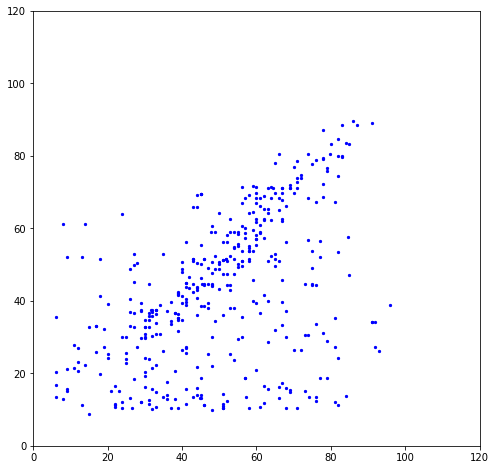

In [154]:
plt.figure(figsize=(8, 8))
plt.xlim(0,120)
plt.ylim(0,120)
plt.scatter(mld_nefsc, pointstouse, color='blue',s=5)
plt.show()

# January

In [233]:
GeorgesBankGlorys_jan = [41.65777, 39.674065, 15.564441, 10.986664, 12.359997, 11.444442, 11.597034, 12.359997, 11.902219, 16.174812, 9.918516, 23.80444, 61.95258, 62.71554, 61.799984, 47.76147, 46.69332, 42.573322, 38.75851, 33.87555, 34.791103, 29.755548, 30.97629, 37.53777, 24.262217, 33.722954, 35.859253, 37.53777, 50.81332, 50.050358, 41.352585, 44.862213, 40.437027, 44.251842, 46.388138, 51.42369, 57.3748, 59.968876, 63.936283, 61.03702, 60.73184, 16.022219, 12.207404, 14.95407, 40.58962, 44.09925, 40.894806, 41.505177, 51.576283, 69.88739, 60.579247, 12.817775, 11.1392565, 11.597034, 24.109625, 21.51555, 20.294811, 21.057774, 13.580737, 14.038515, 14.95407, 22.888884, 25.63555, 78.58516, 11.291849, 8.8503685, 13.580737, 15.717033, 15.106663, 20.599997, 55.391098, 10.2237015, 12.817775, 39.97925, 39.674065, 42.26814, 55.238506, 52.33925, 45.777767, 36.317028, 48.829617, 51.42369, 56.15406, 58.137764, 55.69628, 37.07999, 39.36888, 28.6874, 36.164436, 18.616293, 15.869626, 14.038515, 17.548145, 20.599997, 29.755548, 30.97629, 37.53777, 15.564441, 13.580737, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 11.597034, 31.739252, 44.251842, 30.060734, 47.456284, 10.528886, 10.834071, 10.528886, 10.376293, 32.8074, 39.36888, 36.317028, 65.91998, 32.044437, 50.355545, 21.97333, 11.291849, 33.722954, 52.186653, 52.49184, 48.982212, 20.90518, 67.75109, 58.900726, 66.07257, 67.29331, 64.24146, 67.29331, 88.50368, 72.786644, 44.709618, 64.24146, 53.865173, 59.511097, 27.161476, 88.50368, 25.330364, 56.306652, 69.5822, 44.709618, 51.2711, 49.439987, 38.60592, 53.865173, 36.622215, 53.865173, 58.900726, 62.56295, 68.36146, 27.161476, 51.118507, 27.161476, 26.551105, 26.24592, 34.180733, 75.83849, 58.595543, 18.4637, 71.26072, 25.330364, 79.65331, 25.330364, 52.186653, 36.164436, 79.19553, 69.5822, 69.5822, 65.462204, 51.2711, 83.31553, 39.521473, 71.7185, 38.60592, 34.791103, 36.622215, 42.573322, 50.81332, 58.900726, 58.900726, 62.56295, 68.36146, 68.36146, 71.10812, 51.118507, 51.118507, 34.48592, 26.551105, 24.41481, 27.161476, 27.161476, 34.180733, 34.180733, 89.72442, 79.958496, 79.958496, 69.734795, 58.595543, 71.26072, 77.66961, 83.468124, 69.12443, 52.186653, 45.167397, 87.13035, 89.11405, 53.407394, 83.31553, 78.737755, 71.413315, 66.98813, 66.22517, 50.81332, 43.48888, 49.134804, 44.709618, 44.709618, 69.88739, 71.87109, 37.53777, 37.07999, 58.900726, 58.900726, 40.437027, 34.63851, 57.679985, 46.99851, 80.56886, 80.56886, 71.26072, 71.26072, 44.404434, 44.404434, 68.36146, 71.26072, 51.42369, 51.42369, 51.42369, 51.42369, 13.428144, 13.428144, 12.207404, 13.275552, 11.291849, 12.207404, 16.63259, 12.817775, 13.122959, 11.291849, 13.428144, 14.038515, 10.528886, 15.106663, 14.191108, 13.122959, 12.0548115, 10.528886, 10.6814785, 12.512589, 13.73333, 15.106663, 15.411848, 23.957031, 34.791103, 30.823696, 26.551105, 51.118507, 53.71258, 36.774807, 25.940735, 26.24592, 20.447403, 12.970367, 22.278513, 25.63555, 32.95999, 56.459248, 65.30961, 55.085915, 69.88739, 80.416275, 79.34813, 74.31257, 27.771845, 15.106663, 19.68444, 15.717033, 16.785181, 21.51555, 24.262217, 18.616293, 18.616293, 17.24296, 62.410355, 62.410355, 16.479998, 51.118507, 36.9274, 43.0311, 32.8074, 37.99555, 37.53777, 48.066654, 51.118507, 54.475544, 33.26518, 21.820736, 49.745174, 49.745174, 35.554066, 44.709618, 44.709618, 43.64147, 48.677025, 29.602957, 57.069614, 23.957031, 26.703697, 27.008883, 30.518513, 43.183693, 73.85479, 48.677025, 56.306652, 44.709618, 50.508137, 31.128881, 64.24146, 29.908142, 50.20295, 32.95999, 65.76739, 50.355545, 26.551105, 39.826656, 71.413315, 68.66665, 74.61776, 37.99555, 65.15702, 51.42369, 54.780727, 43.946655, 39.521473, 44.404434, 35.248882, 18.616293, 34.791103, 36.622215, 36.622215, 38.75851, 55.54369, 62.56295, 68.36146, 68.51405, 57.069614, 49.897766, 26.703697, 34.48592, 30.518513, 56.76443, 73.85479, 69.12443, 56.306652, 64.546646, 68.81924, 76.90665, 53.71258, 28.992586, 29.908142, 16.174812, 32.95999, 26.85629, 22.278513, 26.551105, 77.97479, 71.413315, 66.98813, 58.44295, 37.99555, 36.9274, 51.42369, 37.07999, 43.946655, 44.557026, 44.404434, 39.063694, 18.616293, 23.041477, 35.554066, 38.75851, 35.401474, 84.688866, 71.26072, 76.601456, 58.290356, 54.628136, 50.050358, 45.014805, 35.248882, 32.8074, 30.060734, 30.060734, 30.060734, 19.226664, 30.36592, 52.49184, 41.81036, 72.17628, 32.34962, 61.189617, 61.189617, 51.576283, 57.3748, 32.8074, 47.456284, 47.456284, 35.859253, 32.8074, 42.87851, 41.352585, 45.625175, 13.275552, 48.677025, 39.674065, 52.797024, 52.797024, 52.797024, 51.118507]
GeorgesBankNEFSC_jan = [39.0, 41.0, 41.0, 51.0, 52.0, 51.0, 31.0, 76.0, 62.0, 66.0, 48.0, 54.0, 67.0, 60.0, 60.0, 48.0, 42.0, 43.0, 41.0, 33.0, 39.0, 29.0, 30.0, 29.0, 30.0, 37.0, 32.0, 33.0, 48.0, 45.0, 40.0, 41.0, 26.0, 52.0, 45.0, 54.0, 62.0, 57.0, 24.0, 61.0, 48.0, 68.0, 81.0, 69.0, 41.0, 48.0, 44.0, 62.0, 46.0, 65.0, 56.0, 8.0, 22.0, 22.0, 82.0, 32.0, 6.0, 9.0, 6.0, 45.0, 33.0, 25.0, 25.0, 71.0, 13.0, 15.0, 43.0, 63.0, 23.0, 12.0, 60.0, 32.0, 38.0, 63.0, 37.0, 39.0, 55.0, 53.0, 67.0, 39.0, 50.0, 65.0, 68.0, 52.0, 55.0, 68.0, 60.0, 63.0, 51.0, 45.0, 44.0, 44.0, 36.0, 38.0, 30.0, 33.0, 33.0, 32.0, 35.0, 37.0, 39.0, 51.0, 51.0, 33.0, 41.0, 39.0, 53.0, 48.0, 54.0, 58.0, 61.0, 68.0, 71.0, 27.0, 47.0, 33.0, 43.0, 65.0, 47.0, 48.0, 82.0, 76.0, 77.0, 64.0, 75.0, 60.0, 67.0, 61.0, 68.0, 76.0, 58.0, 81.0, 87.0, 71.0, 46.0, 63.0, 56.0, 59.0, 19.0, 83.0, 47.0, 41.0, 45.0, 48.0, 51.0, 55.0, 46.0, 58.0, 38.0, 59.0, 53.0, 67.0, 61.0, 41.0, 56.0, 28.0, 55.0, 93.0, 91.0, 79.0, 57.0, 27.0, 69.0, 53.0, 83.0, 20.0, 13.0, 44.0, 78.0, 45.0, 45.0, 62.0, 51.0, 85.0, 40.0, 59.0, 45.0, 40.0, 38.0, 39.0, 40.0, 54.0, 55.0, 62.0, 64.0, 66.0, 67.0, 66.0, 63.0, 49.0, 40.0, 53.0, 81.0, 92.0, 92.0, 91.0, 86.0, 82.0, 83.0, 67.0, 61.0, 71.0, 75.0, 84.0, 44.0, 9.0, 27.0, 78.0, 91.0, 82.0, 80.0, 76.0, 64.0, 60.0, 61.0, 50.0, 43.9, 47.0, 45.5, 47.0, 70.2, 69.0, 31.6, 29.0, 47.8, 49.0, 58.4, 63.0, 84.6, 85.0, 79.7, 74.0, 64.5, 69.0, 75.9, 75.0, 73.8, 63.0, 51.8, 18.0, 51.7, 43.0, 74.1, 76.0, 29.0, 66.0, 46.0, 29.0, 22.0, 36.0, 44.9, 46.0, 57.2, 36.0, 26.5, 21.0, 51.0, 45.0, 24.0, 24.0, 22.0, 31.0, 84.0, 73.0, 69.0, 25.0, 31.0, 34.0, 40.0, 52.0, 58.0, 61.0, 17.0, 35.0, 30.0, 32.0, 33.0, 41.0, 26.0, 77.0, 63.0, 58.0, 60.0, 66.0, 78.0, 82.0, 11.0, 9.0, 18.0, 9.0, 6.0, 11.0, 20.0, 79.0, 77.0, 67.0, 62.0, 64.0, 62.0, 56.0, 26.0, 44.0, 30.0, 47.0, 32.0, 40.0, 43.0, 58.0, 67.0, 44.0, 56.0, 65.0, 56.0, 75.0, 73.0, 42.0, 40.0, 55.0, 60.0, 31.0, 304.0, 41.0, 73.0, 50.0, 72.0, 26.0, 52.0, 43.0, 44.0, 78.0, 50.0, 56.0, 55.0, 17.0, 44.0, 28.0, 72.0, 59.0, 60.0, 78.0, 72.0, 53.0, 66.0, 46.0, 54.0, 44.0, 29.0, 48.0, 39.0, 57.0, 30.0, 31.0, 27.0, 34.0, 45.0, 53.0, 57.0, 60.0, 60.0, 27.0, 13.0, 37.0, 74.0, 74.0, 71.0, 58.0, 51.0, 59.0, 62.0, 70.0, 75.0, 79.0, 68.0, 30.0, 17.0, 12.0, 14.0, 70.0, 65.0, 56.0, 56.0, 55.0, 54.0, 32.0, 43.0, 36.0, 41.0, 31.0, 46.0, 20.0, 57.0, 12.0, 6.0, 96.0, 81.0, 82.0, 67.0, 79.0, 60.0, 54.0, 50.0, 41.0, 39.0, 31.0, 25.0, 24.0, 30.0, 30.0, 32.0, 49.0, 39.0, 78.0, 19.0, 14.0, 8.0, 58.0, 57.0, 15.0, 52.0, 51.0, 31.0, 30.0, 53.0, 18.0, 59.0, 26.0, 49.0, 67.0, 35.0, 27.0, 65.0, 58.0]

In [234]:
print(len(GeorgesBankGlorys_jan))

432


In [494]:
SouthernMABGlorys_jan = [21.362959, 43.48888, 61.03702, 55.085915, 71.413315, 83.31553, 14.95407, 40.58962, 36.46962, 38.75851, 43.64147, 52.949615, 59.66369, 60.73184, 40.437027, 41.352585, 43.794064, 43.946655, 55.085915, 47.30369, 31.434067, 26.551105, 56.15406, 64.39406, 35.096287, 23.346663, 16.937775, 23.346663, 23.499254, 25.482958, 32.95999, 32.95999, 36.317028, 38.75851, 37.53777, 29.755548, 29.602957, 24.872587, 26.85629, 33.26518, 16.022219, 19.07407, 13.885922, 12.359997, 18.921478, 22.736292, 17.395552, 43.0311, 43.0311, 46.845917, 49.439987, 28.07703, 43.183693, 45.31999, 26.398512, 20.90518, 26.24592, 26.398512, 10.528886, 15.411848, 23.957031, 12.970367, 23.041477, 18.4637, 16.327404, 13.885922, 16.327404, 18.4637, 23.499254, 12.207404, 10.528886, 10.528886, 10.528886, 23.499254, 41.047398, 14.496293, 14.496293, 41.047398, 59.66369, 19.531847, 25.330364, 29.602957, 26.093328, 19.531847, 51.42369, 12.207404, 12.207404, 10.528886, 20.599997, 38.911102, 51.42369, 52.03406, 36.011845, 23.957031, 12.817775, 12.817775, 10.6814785, 35.401474, 25.330364, 25.330364, 36.46962, 37.232586, 28.992586, 32.8074, 60.27406, 67.598495, 67.598495, 41.047398, 11.1392565, 22.583698, 20.752588, 54.32295, 21.97333, 63.783688, 60.42665, 61.4948, 25.940735, 10.528886, 10.528886, 36.9274, 47.76147, 34.791103, 31.281475, 59.053318, 91.25034, 91.25034, 30.671104, 33.26518, 124.9733, 124.9733, 27.619253, 36.46962, 39.063694, 33.87555, 17.85333, 71.26072, 18.311108, 17.85333, 116.27552, 133.06071, 130.46664, 130.46664, 18.005922, 26.703697, 36.9274, 97.96442, 26.398512, 18.4637, 18.4637, 18.4637, 18.4637, 18.4637, 17.548145, 20.752588, 14.191108, 10.528886, 10.376293, 10.6814785, 10.528886, 10.528886, 11.1392565, 13.580737, 43.794064, 11.444442, 30.36592, 20.599997, 30.36592, 30.36592]
SouthernMABNEFSC_jan = [21.0, 37.0, 60.0, 47.0, 11.0, 37.0, 50.0, 72.0, 34.0, 22.0, 37.0, 49.0, 53.0, 58.0, 67.0, 40.0, 41.0, 57.0, 50.0, 15.0, 18.0, 30.0, 31.0, 56.0, 40.0, 62.0, 30.0, 61.0, 45.0, 52.0, 54.0, 51.0, 54.0, 64.0, 7.0, 64.0, 47.0, 47.0, 33.0, 30.0, 17.0, 18.0, 19.0, 16.0, 19.0, 17.0, 33.0, 91.0, 41.0, 78.0, 71.0, 32.0, 48.0, 82.0, 60.0, 58.0, 63.0, 86.0, 17.0, 15.0, 55.0, 41.0, 33.0, 50.0, 44.0, 27.0, 41.0, 56.0, 14.0, 38.0, 28.0, 27.0, 36.0, 14.0, 29.0, 29.0, 29.0, 37.0, 37.0, 27.0, 43.0, 51.0, 44.0, 29.0, 47.0, 9.0, 8.0, 21.0, 18.0, 41.0, 60.0, 45.0, 38.0, 31.0, 24.0, 22.0, 22.0, 32.0, 42.0, 43.0, 29.0, 33.0, 27.0, 41.0, 86.0, 50.0, 77.0, 15.0, 14.0, 55.0, 14.0, 40.0, 55.0, 10.0, 142.0, 47.0, 16.0, 21.0, 11.0, 56.0, 12.0, 19.0, 17.0, 66.0, 7.0, 38.0, 46.0, 48.0, 34.0, 40.0, 28.0, 35.0, 57.0, 68.0, 92.0, 60.0, 70.0, 58.0, 19.0, 44.0, 27.0, 27.0, 37.0, 57.0, 26.0, 46.0, 26.0, 27.0, 29.0, 31.0, 33.0, 33.0, 110.0, 130.0, 44.0, 31.0, 21.0, 15.0, 55.0, 6.0, 25.0, 57.0, 10.0, 59.0, 10.0, 50.0, 25.0, 28.0]

In [460]:
NorthernMABGlorys_jan = [36.46962, 29.602957, 47.1511, 44.251842, 15.106663, 12.817775, 28.992586, 19.837032, 24.41481, 21.362959, 20.294811, 46.54073, 37.69036, 40.284435, 40.284435, 40.437027, 44.709618, 40.58962, 40.131844, 36.164436, 37.07999, 28.07703, 33.41777, 36.622215, 66.682945, 77.51701, 76.44887, 59.511097, 72.48146, 45.167397, 48.677025, 18.311108, 49.439987, 39.674065, 21.210365, 13.580737, 15.106663, 26.551105, 50.81332, 58.900726, 48.829617, 29.450363, 16.022219, 12.512589, 16.937775, 10.6814785, 10.834071, 10.376293, 22.583698, 46.69332, 60.579247, 69.12443, 52.797024, 50.965916, 43.48888, 45.31999, 62.71554, 66.83553, 52.186653, 60.579247, 57.527393, 72.634056, 65.76739, 47.456284, 67.598495, 50.81332, 50.050358, 58.44295, 49.134804, 35.248882, 14.801477, 22.736292, 18.921478, 18.921478, 21.820736, 33.26518, 47.30369, 55.391098, 44.09925, 48.982212, 27.314068, 11.444442, 37.99555, 43.48888, 43.336285, 37.842953, 25.177773, 33.41777, 36.622215, 39.97925, 47.30369, 55.69628, 75.38072, 45.472584, 38.14814, 24.109625, 58.900726, 33.41777, 42.42073, 41.047398, 49.134804, 61.189617, 60.42665, 36.46962, 52.33925, 55.238506, 57.527393, 69.5822, 60.42665, 58.595543, 48.982212, 48.982212, 26.093328, 23.651846, 10.376293, 9.7659235, 51.88147, 50.66073, 16.785181, 51.42369, 22.736292, 55.54369, 55.54369, 46.08295, 30.060734, 49.592583, 59.968876, 59.968876, 71.87109, 57.22221, 50.965916, 37.99555, 51.42369, 12.0548115, 10.528886, 42.87851, 24.719995, 27.466661, 27.466661, 24.262217, 19.226664, 19.226664, 27.924438, 37.07999, 31.891846, 25.788143, 25.788143, 19.989626, 13.73333, 23.957031, 21.820736, 54.628136, 19.837032]
NorthernMABNEFSC_jan = [48.0, 50.0, 33.0, 37.0, 49.0, 32.0, 25.0, 19.0, 20.0, 20.0, 30.0, 43.0, 12.0, 53.0, 12.0, 34.0, 35.0, 70.0, 37.0, 43.0, 42.0, 26.0, 30.0, 34.0, 23.0, 72.0, 38.0, 15.0, 60.0, 26.0, 33.0, 20.0, 47.0, 43.0, 17.0, 18.0, 20.0, 37.0, 46.0, 56.0, 46.0, 34.0, 22.0, 17.0, 26.0, 8.0, 19.0, 13.0, 34.0, 45.0, 55.0, 61.0, 52.0, 31.0, 36.0, 63.0, 70.0, 51.0, 57.0, 42.0, 57.0, 47.0, 86.0, 17.0, 68.0, 36.0, 59.0, 55.0, 36.0, 54.0, 34.0, 38.0, 22.0, 20.0, 19.0, 32.0, 43.0, 57.0, 11.0, 57.0, 10.0, 25.0, 52.0, 38.0, 46.0, 44.0, 28.0, 27.0, 35.0, 41.0, 43.0, 56.0, 55.0, 71.0, 29.0, 28.0, 76.0, 39.0, 56.0, 60.0, 64.0, 78.0, 72.0, 43.0, 33.0, 55.0, 43.0, 39.0, 57.0, 59.0, 36.0, 34.0, 49.0, 42.0, 25.0, 28.0, 61.0, 47.0, 14.0, 54.0, 33.0, 54.0, 51.0, 45.0, 46.0, 48.0, 33.0, 59.0, 22.0, 25.0, 18.0, 31.0, 54.0, 31.0, 22.0, 40.0, 72.0, 14.0, 24.0, 33.0, 16.0, 15.0, 33.0, 42.0, 55.0, 26.0, 26.0, 22.0, 23.0, 26.0, 78.0, 21.0, 79.0]

In [472]:
WGoMGlorys_jan = [21.820736, 27.161476, 41.81036, 25.788143, 35.096287, 30.671104, 36.622215, 60.579247, 59.66369, 60.579247, 61.95258, 65.004425, 56.459248, 25.025179, 21.057774, 45.93036, 61.4948, 59.66369, 49.897766, 55.54369, 57.22221, 56.917023, 58.290356, 36.9274, 68.66665, 54.780727, 68.36146, 32.19703, 84.23109, 35.859253, 45.777767, 77.97479, 62.56295, 29.602957, 60.73184, 66.37776, 67.140724, 74.92294, 100.71108, 59.205914, 100.71108, 99.94812, 70.34516, 84.99405, 55.848877, 68.056274, 82.85776, 55.848877, 68.056274, 91.70812, 58.137764, 58.137764, 63.020725, 63.020725, 54.32295, 54.32295, 52.33925, 57.3748, 53.559986, 58.290356, 44.404434, 55.848877, 55.848877, 28.839994, 59.053318, 60.579247, 60.579247, 59.511097, 86.97775, 56.76443, 74.15998, 40.131844, 66.98813, 71.413315, 15.106663, 15.717033, 14.3437, 53.407394, 53.407394, 60.27406, 54.93332, 34.943695, 73.24442, 66.07257, 78.12739, 61.799984, 65.30961, 44.251842, 60.88443, 55.54369, 68.97183, 68.97183, 59.816284, 42.42073, 66.682945, 60.579247, 25.330364, 60.73184, 21.362959, 37.07999, 69.12443, 47.30369, 31.58666, 27.924438, 51.88147, 45.167397, 29.450363, 21.668144, 18.311108, 25.940735, 46.845917, 70.03998, 68.66665, 61.799984, 82.24738, 53.10221, 67.44591, 68.81924, 45.167397, 75.83849, 39.063694, 17.090366, 61.189617, 61.189617, 23.499254, 16.327404, 34.791103, 101.32146, 109.25626, 100.71108, 99.33775, 111.08738, 111.08738, 111.08738, 119.78516, 119.63256, 101.77923, 101.77923, 82.094795, 98.11701, 93.99701, 93.99701, 84.688866, 100.55849, 100.55849, 100.55849, 100.71108, 96.2859, 96.2859, 100.71108, 99.795525, 96.59109, 32.8074, 50.050358, 40.131844, 40.131844, 38.60592, 30.671104, 30.671104, 14.038515, 14.038515, 27.314068, 15.717033, 21.668144, 21.668144, 32.95999, 68.97183, 74.31257, 41.352585, 43.64147, 39.36888, 39.36888, 40.284435, 40.284435, 34.02814, 35.401474, 96.43849, 100.71108, 103.91553, 120.8533, 120.8533, 120.09034, 120.09034, 71.87109, 75.83849, 78.43257]
WGoMNEFSC_jan = [18.0, 27.0, 85.0, 49.0, 39.0, 46.0, 50.0, 57.0, 75.0, 77.0, 111.0, 91.0, 126.0, 31.0, 25.0, 50.0, 36.0, 54.0, 69.0, 74.0, 38.0, 72.0, 38.0, 138.0, 71.0, 117.0, 81.0, 96.0, 24.0, 19.0, 108.0, 118.0, 165.0, 152.0, 59.0, 89.0, 147.0, 161.0, 167.0, 74.0, 140.0, 148.0, 64.0, 133.0, 48.0, 128.0, 145.0, 52.0, 114.0, 146.0, 94.1, 116.0, 90.0, 94.0, 75.0, 101.0, 105.0, 102.0, 84.0, 89.0, 71.0, 75.0, 95.0, 7.0, 72.0, 76.0, 88.0, 103.0, 79.0, 80.0, 83.0, 45.0, 106.0, 106.0, 59.0, 28.0, 50.0, 28.0, 24.0, 42.0, 24.0, 80.0, 134.0, 59.0, 154.0, 77.0, 63.0, 96.0, 79.0, 123.0, 50.0, 75.0, 96.0, 118.0, 23.0, 67.0, 39.0, 121.0, 91.0, 36.0, 93.0, 74.0, 38.0, 43.0, 93.0, 110.0, 95.0, 65.0, 110.0, 112.0, 41.0, 62.0, 104.0, 47.0, 100.0, 88.0, 71.0, 131.0, 83.0, 70.0, 103.0, 127.0, 53.0, 61.0, 33.0, 159.0, 24.0, 95.0, 150.0, 143.0, 110.0, 50.0, 162.0, 139.0, 79.0, 106.0, 49.0, 66.0, 115.0, 122.0, 245.0, 200.0, 110.0, 125.0, 131.0, 130.0, 138.0, 88.0, 87.0, 150.0, 111.0, 46.0, 45.0, 74.0, 54.0, 54.0, 40.0, 86.0, 91.0, 18.0, 20.0, 29.0, 18.0, 10.0, 7.0, 44.0, 30.0, 99.0, 98.0, 101.0, 87.0, 82.0, 54.0, 82.0, 66.0, 50.0, 78.0, 68.0, 103.0, 125.0, 121.0, 92.0, 88.0, 90.0, 59.0, 73.0]

In [480]:
EGoMGlorys_jan = [18.005922, 43.0311, 33.87555, 33.570362, 10.528886, 12.817775, 18.921478, 21.057774, 24.872587, 31.281475, 38.911102, 36.46962, 46.99851, 48.066654, 51.118507, 51.118507, 50.81332, 50.81332, 39.97925, 58.290356, 62.257763, 22.125921, 57.527393, 23.194069, 30.518513, 36.9274, 55.848877, 15.869626, 15.869626, 20.447403, 35.401474, 26.551105, 26.703697, 26.703697, 45.777767, 19.989626, 26.398512, 24.262217, 84.99405, 56.306652, 35.096287, 39.826656, 27.314068, 39.063694, 43.336285, 31.891846, 80.72146, 56.00147, 78.58516, 84.688866, 84.688866, 26.398512, 39.063694, 45.625175, 31.891846, 29.908142, 57.069614, 56.00147, 52.03406, 52.03406, 68.056274, 68.056274, 63.783688, 33.722954, 37.385178, 30.671104, 30.97629, 32.8074, 14.038515, 14.038515, 25.788143, 23.346663, 23.346663, 29.297771, 34.180733, 27.466661, 67.75109, 55.391098, 96.743675, 96.743675, 56.76443, 25.025179, 25.025179, 50.050358, 25.025179, 31.58666, 23.346663, 32.34962, 46.388138, 68.36146, 63.783688, 63.783688, 22.583698, 45.014805, 25.330364, 25.330364, 28.229624, 75.22813, 20.447403, 17.24296, 17.24296, 27.771845, 30.060734, 30.060734, 74.92294]
EGoMNEFSC_jan = [14.0, 48.0, 55.0, 69.0, 11.0, 9.0, 20.0, 22.0, 9.0, 19.0, 58.0, 9.0, 68.6, 82.0, 64.5, 74.0, 62.0, 58.0, 92.0, 43.0, 52.0, 46.0, 107.0, 200.0, 35.0, 54.0, 51.0, 63.0, 68.0, 54.0, 72.0, 40.0, 55.0, 37.0, 76.0, 44.0, 15.0, 31.0, 69.0, 29.0, 43.0, 55.0, 17.0, 84.0, 9.0, 71.0, 81.0, 47.0, 42.0, 40.0, 123.0, 33.0, 69.0, 18.0, 75.0, 39.0, 34.0, 46.0, 79.0, 70.0, 69.0, 63.0, 70.0, 34.0, 24.0, 73.0, 46.0, 22.0, 30.0, 25.0, 22.0, 31.0, 20.0, 104.0, 103.0, 39.0, 18.0, 45.0, 86.0, 77.0, 21.0, 59.0, 56.0, 14.0, 24.0, 28.0, 15.0, 27.0, 25.0, 20.0, 98.0, 97.0, 87.0, 41.0, 45.0, 62.0, 46.0, 19.0, 47.0, 49.0, 42.0, 33.0, 33.0, 29.0, 65.0]

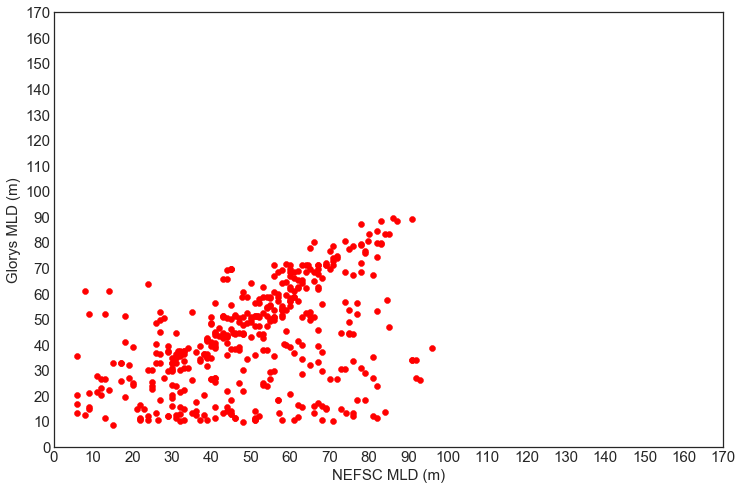

In [1061]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,170)
plt.xlim(0,170)
# plt.scatter(SouthernMABNEFSC_jan, SouthernMABGlorys_jan,color='orange',label='Southern MAB')
# plt.scatter(NorthernMABNEFSC_jan, NorthernMABGlorys_jan,color='green',label='Northern MAB')
plt.scatter(GeorgesBankNEFSC_jan, GeorgesBankGlorys_jan,color='red',label='Georges Bank')
# plt.scatter(EGoMNEFSC_jan, EGoMGlorys_jan,color='green',label='Eastern GoM')
# plt.scatter(WGoMNEFSC_jan, WGoMGlorys_jan,color='blue',label='Western GoM')
# leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170], fontsize = 15) 
plt.show()

# February

In [257]:
GeorgesBankGlorys_feb = [22.125921, 19.531847, 10.834071, 10.528886, 22.278513, 27.771845, 27.314068, 11.444442, 15.259255, 26.24592, 15.564441, 68.20887, 21.668144, 42.115547, 27.161476, 37.842953, 34.02814, 15.869626, 16.937775, 10.6814785, 28.382215, 40.58962, 27.924438, 34.48592, 54.017765, 26.551105, 50.355545, 24.872587, 13.428144, 11.749626, 10.376293, 11.749626, 23.346663, 66.07257, 22.125921, 16.327404, 11.291849, 11.749626, 13.885922, 43.183693, 41.352585, 33.87555, 33.26518, 35.401474, 33.112587, 16.174812, 10.376293, 10.528886, 10.528886, 11.597034, 10.528886, 10.528886, 10.6814785, 55.848877, 58.137764, 54.780727, 66.22517, 44.557026, 57.3748, 10.6814785, 67.90369, 59.511097, 20.447403, 61.4948, 79.65331, 19.989626, 15.869626, 63.783688, 63.783688, 55.085915, 55.085915, 51.88147, 51.88147, 44.709618, 44.709618, 69.88739, 63.020725, 51.576283, 74.007385, 38.60592, 37.07999, 70.955536, 58.900726, 69.88739, 68.36146, 51.576283, 38.60592, 52.33925, 37.07999, 80.11109, 46.99851, 58.900726, 19.379255, 68.36146, 31.739252, 63.478504, 21.362959, 18.4637, 22.736292, 12.207404, 56.76443, 18.616293, 80.11109, 46.99851, 19.379255, 11.749626, 28.839994, 31.739252, 21.362959, 17.548145, 22.431107, 12.207404, 18.616293, 11.749626, 38.453323, 34.180733, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 66.22517, 55.69628, 48.21925, 60.579247, 54.32295, 46.388138, 42.87851, 47.60888, 56.00147, 50.508137, 85.60442, 70.03998, 77.364426, 64.85183, 77.364426, 42.87851, 63.936283, 36.164436, 64.85183, 53.407394, 64.85183, 50.508137, 62.56295, 39.674065, 30.97629, 42.87851, 11.444442, 42.573322, 10.834071, 36.164436, 11.444442, 53.407394, 53.254803, 66.07257, 50.508137, 38.911102, 33.41777, 75.83849, 28.229624, 47.1511, 19.531847, 12.665182, 83.31553, 18.311108, 14.3437, 18.311108, 11.444442, 30.97629, 33.112587, 14.95407, 12.207404, 11.444442, 18.311108, 10.834071, 49.745174, 10.834071, 11.1392565, 52.03406, 11.444442, 12.0548115, 34.791103, 12.512589, 12.512589, 59.053318, 10.528886, 59.053318, 58.137764, 53.254803, 53.254803, 38.911102, 60.121468, 79.958496, 82.55257, 69.277016, 43.946655, 35.706657, 47.1511, 55.238506, 23.041477, 19.531847, 65.15702, 83.31553, 28.6874, 14.3437, 15.869626, 11.444442, 15.411848, 10.376293, 25.63555, 11.444442, 12.207404, 18.311108, 59.358505, 49.745174, 52.03406, 12.665182, 10.528886, 21.210365, 35.554066, 24.262217, 18.616293, 12.0548115, 14.038515, 46.08295, 35.706657, 41.047398, 64.39406, 60.27406, 55.69628, 64.85183, 73.24442, 48.21925, 32.95999, 30.213327, 65.462204, 70.03998, 70.65035, 82.24738, 62.257763, 52.03406, 56.15406, 56.15406, 60.579247, 56.15406, 63.631096, 47.30369, 44.709618, 60.579247, 63.020725, 60.579247, 68.66665, 46.08295, 86.51997, 19.07407, 56.306652, 69.5822, 44.709618, 51.576283, 51.118507, 22.583698, 51.118507, 21.820736, 63.020725, 28.6874, 70.80294, 41.19999, 68.66665, 13.580737, 54.170357, 14.3437, 24.872587, 53.559986, 19.07407, 84.99405, 25.177773, 83.77331, 69.5822, 25.025179, 65.462204, 42.725918, 51.576283, 16.785181, 22.736292, 81.48442, 22.583698, 68.36146, 22.583698, 23.957031, 21.057774, 58.595543, 21.820736, 37.99555, 24.262217, 46.388138, 30.213327, 31.58666, 41.19999, 35.096287, 67.29331, 39.97925, 13.580737, 58.900726, 37.07999, 15.106663, 14.3437, 14.3437, 49.745174, 69.42961, 55.69628, 77.66961, 83.77331, 34.943695, 25.025179, 25.940735, 36.317028, 37.53777, 37.53777, 16.785181, 15.259255, 64.85183, 80.56886, 80.56886, 78.737755, 71.413315, 68.36146, 66.98813, 51.42369, 51.42369, 58.595543, 58.595543, 46.845917, 37.99555, 37.99555, 32.8074, 46.388138, 46.388138, 52.186653, 50.965916, 50.965916, 56.76443, 66.83553, 58.900726, 17.090366, 16.022219, 24.719995, 26.551105, 22.278513, 17.548145, 24.262217, 28.382215, 28.07703, 25.177773, 18.005922, 25.482958, 24.719995, 27.619253, 23.499254, 28.839994, 75.38072, 27.924438, 48.829617, 22.888884, 10.528886, 16.479998, 10.528886, 13.885922, 10.528886, 15.411848, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 50.81332, 50.66073, 35.859253, 30.518513, 30.518513, 43.0311, 30.36592, 57.985172, 43.0311, 75.685905, 72.17628, 44.709618, 57.985172, 63.020725, 57.985172, 42.115547, 61.647392, 75.685905, 34.791103, 75.685905, 43.336285, 56.306652, 50.965916, 44.709618, 35.248882, 49.439987, 37.07999, 63.020725, 58.900726, 71.10812, 63.325912, 42.115547, 10.376293, 43.336285, 24.41481, 54.780727, 70.03998, 34.791103, 61.03702, 41.352585, 23.499254, 43.336285, 33.41777, 47.1511, 10.986664, 50.965916, 34.180733, 39.521473, 18.311108, 35.248882, 34.791103, 37.07999, 42.573322, 71.413315, 58.900726, 49.287395, 66.83553, 27.314068, 46.235546, 10.376293, 37.99555, 11.444442, 16.174812, 24.41481, 51.576283, 23.499254, 51.88147, 39.36888, 66.83553, 58.44295, 23.499254, 25.788143, 32.044437, 37.53777, 28.53481, 12.359997, 19.989626, 23.80444, 15.259255, 18.311108, 18.005922, 83.31553, 78.737755, 71.413315, 66.98813, 51.42369, 51.42369, 110.477005, 46.235546, 32.8074, 37.99555, 37.53777, 49.745174, 51.576283, 55.238506, 51.88147, 26.398512, 15.869626, 15.259255, 10.2237015, 21.97333, 11.444442, 13.73333, 24.719995, 14.801477, 10.986664, 13.580737, 11.291849, 11.1392565, 10.376293, 13.122959, 18.768885, 34.48592, 16.479998, 33.87555, 21.51555, 16.937775, 34.943695, 27.008883, 41.352585, 43.336285, 46.388138, 57.069614, 63.478504, 32.8074, 52.186653, 56.61184, 36.46962, 62.10517, 49.897766, 47.76147, 48.829617, 49.592583, 49.592583, 38.911102, 37.232586, 37.232586, 21.057774, 33.87555, 16.327404, 21.057774, 36.774807, 20.142218, 40.131844, 15.259255, 43.64147, 45.777767, 36.774807, 20.599997, 41.96295, 32.654808, 40.131844, 48.677025, 39.216286, 35.248882, 43.64147, 32.654808, 12.817775, 42.725918, 24.109625, 12.0548115, 34.791103, 20.599997, 27.161476, 21.820736, 58.595543, 57.22221, 64.85183, 54.017765, 48.677025, 71.26072, 39.521473, 61.799984, 35.248882, 21.362959, 34.791103, 23.041477, 36.164436, 19.989626, 37.07999, 10.376293, 42.725918, 33.570362, 46.388138, 24.109625, 37.53777, 43.0311, 21.362959, 25.025179, 19.989626, 20.752588, 57.679985, 21.51555, 12.207404, 20.294811, 14.801477, 39.36888, 54.170357, 69.734795, 54.017765, 49.134804, 69.88739, 71.26072, 77.66961, 61.799984, 28.6874, 48.524433, 14.191108, 45.472584, 19.07407, 23.041477, 20.142218, 19.989626, 14.191108, 12.207404, 10.376293, 74.61776, 46.388138, 37.53777, 65.462204, 49.134804, 44.404434, 47.30369, 48.524433, 41.96295, 45.472584, 12.970367, 12.970367, 14.3437, 22.125921, 50.66073, 51.88147, 60.73184, 64.546646, 46.845917, 49.134804, 61.03702, 23.651846, 49.134804, 59.358505, 51.42369, 43.0311, 33.722954, 19.226664, 16.174812, 21.51555, 37.07999, 59.053318, 49.439987, 59.816284, 28.07703, 61.03702, 78.89035, 10.528886, 40.58962, 31.434067, 32.19703, 32.502216, 27.924438, 66.22517, 12.665182, 10.834071, 14.3437, 15.106663, 66.53035, 35.859253, 13.122959, 23.194069, 12.0548115, 23.651846, 12.970367, 42.115547, 33.41777, 23.346663, 34.791103, 61.4948, 41.65777, 41.65777, 46.54073, 48.21925, 23.651846, 40.437027, 52.797024, 66.98813, 68.36146, 55.69628, 59.511097, 82.70516, 59.511097, 62.56295, 41.65777, 40.894806, 44.862213, 34.48592, 22.888884, 18.311108, 18.311108, 53.10221, 46.69332, 42.115547, 44.251842, 53.254803, 61.03702, 11.444442, 41.19999, 38.75851, 58.900726, 45.93036, 68.81924, 43.48888, 33.570362, 37.99555, 40.894806, 40.894806, 42.26814, 42.26814, 42.26814, 23.499254, 37.385178, 30.36592, 32.502216, 11.1392565, 11.1392565, 11.1392565, 13.275552, 28.839994, 29.14518, 26.703697, 26.703697, 28.53481, 36.9274, 20.142218, 20.752588, 36.46962, 20.142218, 16.63259, 15.411848, 15.411848, 14.496293, 15.717033, 31.739252, 50.050358, 50.050358, 54.32295, 48.982212, 48.982212, 56.15406, 42.725918, 39.36888, 45.014805, 45.014805, 55.391098, 37.69036, 48.677025, 37.232586, 12.665182, 11.1392565, 26.24592, 57.679985, 26.551105, 26.551105, 26.398512, 26.398512, 82.094795, 40.58962, 55.238506, 71.5659, 54.32295, 54.32295, 44.862213, 51.576283, 44.09925, 17.548145, 35.096287, 33.26518, 48.37184, 16.785181, 20.90518, 45.167397, 34.791103, 48.982212, 41.81036, 45.625175, 34.63851, 23.957031, 23.957031, 45.167397, 47.1511, 30.518513, 30.518513, 28.229624, 12.207404, 14.801477, 28.839994, 28.839994, 40.58962, 40.58962, 39.36888, 36.46962, 36.46962, 51.728878, 47.30369, 71.413315, 58.900726, 69.277016, 46.388138, 39.826656, 39.826656, 24.719995, 25.940735, 27.771845, 43.48888, 43.48888, 16.785181, 23.194069, 136.87552, 24.719995, 25.940735, 28.6874, 21.97333, 27.771845, 22.125921, 50.20295, 19.07407, 19.07407, 10.376293, 13.122959, 33.41777, 26.85629, 39.674065, 28.53481, 50.050358, 37.99555, 33.87555, 34.333324, 29.297771, 35.248882, 29.908142, 32.19703, 10.528886, 14.648885, 13.122959, 13.275552, 13.275552, 14.801477, 38.14814, 49.439987, 49.134804, 51.42369, 66.22517, 24.262217, 23.041477, 22.736292, 33.570362, 38.453323, 38.453323, 51.88147, 59.511097, 58.137764, 40.131844, 32.95999, 32.95999, 32.502216, 28.992586, 39.826656, 70.34516, 79.65331, 80.11109, 71.26072, 71.26072, 54.780727, 35.401474, 36.164436, 36.164436, 36.164436, 33.722954, 40.437027, 55.085915, 52.949615, 46.235546, 42.115547, 30.060734, 38.453323, 49.287395, 49.592583, 66.682945, 54.475544, 51.42369, 70.03998, 71.7185, 76.90665, 24.109625, 33.112587, 82.24738, 65.004425, 36.011845, 51.88147, 54.93332, 47.60888, 42.26814, 33.570362, 29.755548, 12.817775, 59.66369, 59.66369, 42.26814, 38.14814, 20.142218, 30.36592, 32.502216, 56.61184, 52.03406, 17.090366, 25.482958, 21.97333, 40.58962, 27.466661, 19.379255, 20.142218, 19.07407, 37.53777, 30.36592, 31.891846, 35.706657, 31.739252, 45.014805, 41.81036, 45.167397, 63.173317, 45.93036, 48.829617, 70.80294, 38.30073, 38.30073, 45.014805, 49.287395, 59.511097, 56.61184, 50.965916, 68.97183, 44.251842, 31.58666, 35.706657, 33.722954, 48.677025, 65.462204, 65.76739, 79.50072, 75.83849, 52.949615, 20.599997, 20.599997, 56.15406, 38.14814, 69.5822, 33.41777, 22.431107, 74.77035, 78.58516]
GeorgesBankNEFSC_feb = [29.0, 27.0, 35.0, 42.0, 32.0, 48.0, 19.0, 11.0, 35.0, 40.0, 45.0, 41.0, 19.0, 55.0, 47.0, 63.0, 73.0, 73.0, 31.0, 15.0, 35.0, 15.0, 51.0, 49.0, 31.0, 81.0, 81.0, 21.0, 15.0, 6.0, 31.0, 10.0, 12.0, 61.0, 70.0, 19.0, 7.0, 8.0, 86.0, 65.0, 45.0, 41.0, 27.0, 33.0, 60.0, 6.0, 8.0, 9.0, 9.0, 15.0, 18.0, 33.0, 32.0, 72.0, 59.0, 62.0, 54.0, 42.0, 54.0, 53.0, 60.0, 52.0, 83.0, 56.0, 80.0, 27.0, 29.0, 77.0, 76.0, 63.0, 63.0, 46.0, 51.0, 49.0, 49.0, 71.0, 58.0, 47.0, 52.0, 44.0, 36.0, 69.0, 47.0, 70.0, 67.0, 48.0, 51.0, 91.0, 35.0, 78.0, 57.0, 52.0, 70.0, 66.0, 84.0, 75.0, 18.0, 43.0, 30.0, 26.0, 89.0, 70.0, 76.0, 58.0, 68.0, 50.0, 26.0, 83.0, 18.0, 31.0, 35.0, 45.0, 67.0, 63.0, 47.0, 62.0, 16.0, 35.0, 17.0, 94.0, 18.0, 23.0, 82.0, 10.0, 60.0, 60.0, 64.0, 61.0, 82.0, 82.0, 56.0, 69.0, 86.0, 32.0, 44.0, 91.0, 19.0, 22.0, 81.0, 70.0, 75.0, 62.0, 78.0, 65.0, 67.0, 48.0, 63.0, 61.0, 60.0, 71.0, 58.0, 50.0, 72.0, 89.0, 45.0, 46.0, 44.0, 49.0, 35.0, 59.0, 36.0, 61.0, 11.0, 24.0, 24.0, 78.0, 76.0, 55.0, 71.0, 25.0, 88.0, 90.0, 21.0, 89.0, 81.0, 71.0, 70.0, 67.0, 13.0, 48.0, 65.0, 45.0, 16.0, 28.0, 34.0, 44.0, 39.0, 44.0, 46.0, 54.0, 52.0, 65.0, 53.0, 13.0, 35.0, 38.0, 36.0, 11.0, 84.0, 76.0, 83.0, 67.0, 49.0, 51.0, 53.0, 66.0, 61.0, 72.0, 83.0, 84.0, 9.0, 24.0, 24.0, 81.0, 76.0, 10.0, 9.0, 11.0, 16.0, 67.0, 66.0, 11.0, 52.0, 46.0, 44.0, 37.0, 71.0, 77.0, 64.0, 73.0, 63.0, 65.0, 30.0, 47.0, 64.0, 59.0, 48.0, 66.0, 70.0, 75.0, 60.0, 14.0, 83.0, 62.0, 63.0, 71.0, 50.0, 25.0, 75.8, 71.0, 62.2, 73.0, 81.5, 66.0, 52.3, 61.0, 54.6, 60.0, 73.8, 56.0, 82.0, 58.6, 48.0, 73.4, 44.0, 50.3, 49.0, 46.3, 49.0, 31.8, 55.0, 53.2, 64.0, 63.5, 70.0, 74.1, 54.0, 63.5, 16.0, 73.2, 68.0, 73.7, 43.0, 82.9, 67.0, 16.9, 58.0, 26.0, 49.0, 30.6, 34.0, 83.3, 43.0, 70.2, 43.0, 41.0, 29.0, 51.0, 30.0, 44.8, 34.0, 53.3, 48.0, 59.0, 59.0, 60.0, 67.0, 42.3, 71.0, 53.8, 42.0, 35.0, 51.0, 44.0, 78.0, 77.0, 68.0, 73.0, 78.0, 11.0, 24.0, 26.0, 85.0, 20.0, 21.0, 30.0, 25.0, 86.0, 81.0, 83.0, 74.0, 65.0, 62.0, 61.0, 50.0, 52.0, 55.0, 52.0, 38.0, 39.0, 41.0, 30.0, 42.0, 45.0, 36.0, 45.0, 44.0, 58.0, 59.0, 61.0, 99.0, 90.0, 58.0, 97.0, 58.0, 83.0, 33.0, 97.0, 85.0, 107.0, 23.0, 62.0, 41.0, 102.0, 59.0, 42.0, 42.0, 24.0, 73.0, 14.0, 30.0, 22.0, 43.0, 41.0, 22.0, 18.0, 66.0, 62.0, 62.0, 54.0, 41.0, 62.0, 66.0, 62.0, 72.2, 72.0, 63.4, 72.0, 89.7, 60.0, 87.1, 70.0, 50.7, 84.0, 62.7, 87.0, 74.8, 72.0, 86.0, 88.0, 84.0, 77.4, 49.0, 53.2, 47.0, 46.5, 42.0, 33.7, 58.0, 52.1, 66.0, 68.6, 71.0, 75.5, 33.0, 17.4, 47.0, 20.0, 83.0, 58.7, 77.0, 68.7, 70.0, 27.0, 59.0, 58.5, 51.0, 82.0, 36.0, 93.9, 30.0, 35.0, 35.0, 39.0, 68.2, 49.0, 60.0, 63.0, 68.0, 49.5, 72.0, 39.5, 37.0, 7.0, 29.0, 48.9, 79.0, 65.9, 17.0, 16.0, 57.0, 64.0, 68.0, 77.0, 26.0, 25.0, 23.0, 90.0, 79.0, 89.0, 91.0, 86.0, 13.0, 75.0, 65.0, 62.0, 54.0, 54.0, 11.0, 45.0, 30.0, 41.0, 28.0, 41.0, 50.0, 62.0, 62.0, 24.0, 29.0, 12.0, 26.0, 11.0, 12.0, 38.0, 27.0, 22.0, 8.0, 6.0, 18.0, 21.0, 6.0, 25.0, 12.0, 67.0, 15.0, 16.0, 20.0, 34.0, 56.0, 63.0, 60.0, 47.0, 46.0, 50.0, 65.0, 39.0, 42.0, 47.0, 62.0, 63.0, 69.0, 41.0, 53.0, 27.0, 26.0, 65.0, 56.0, 52.0, 42.0, 39.0, 46.0, 39.0, 30.0, 50.0, 54.0, 48.0, 51.0, 36.0, 42.0, 11.0, 47.0, 36.0, 51.0, 50.0, 41.0, 35.0, 51.0, 38.0, 13.0, 54.0, 65.0, 9.0, 17.0, 13.0, 14.0, 33.0, 54.0, 74.0, 61.0, 53.0, 48.0, 72.0, 34.0, 32.0, 30.0, 14.0, 32.0, 27.0, 26.0, 21.0, 37.0, 87.0, 49.0, 56.0, 49.0, 60.0, 42.0, 24.0, 75.0, 15.0, 42.0, 16.0, 10.0, 40.0, 22.0, 22.0, 18.0, 73.0, 65.0, 60.0, 54.0, 54.0, 60.0, 68.0, 74.0, 25.0, 13.0, 48.0, 12.0, 65.0, 27.0, 31.0, 18.0, 19.0, 36.0, 11.0, 79.0, 68.0, 43.0, 41.0, 61.0, 59.0, 36.0, 35.0, 47.0, 59.0, 60.0, 15.0, 18.0, 13.0, 16.0, 65.0, 55.0, 72.0, 63.0, 56.0, 62.0, 43.0, 28.0, 42.0, 75.0, 65.0, 87.0, 42.0, 33.0, 29.0, 17.0, 35.0, 66.0, 60.0, 61.0, 67.0, 57.0, 82.0, 46.0, 22.0, 18.0, 43.0, 68.0, 73.0, 54.0, 20.0, 70.0, 36.0, 33.0, 12.0, 20.0, 25.0, 110.0, 11.0, 32.0, 34.0, 48.0, 66.0, 34.0, 31.0, 59.0, 35.0, 32.0, 45.0, 33.0, 27.0, 25.0, 47.0, 62.0, 59.0, 28.0, 85.0, 76.0, 52.0, 53.0, 61.0, 53.0, 26.0, 34.0, 41.0, 85.0, 34.0, 50.0, 45.0, 34.0, 35.0, 49.0, 57.0, 45.0, 59.0, 66.0, 66.0, 66.0, 57.0, 20.0, 56.0, 45.0, 52.0, 52.0, 55.0, 50.0, 92.0, 89.0, 90.0, 90.0, 74.0, 12.0, 32.0, 13.0, 86.0, 14.0, 75.0, 72.0, 72.0, 18.0, 65.0, 64.0, 57.0, 53.0, 54.0, 36.0, 38.0, 35.0, 33.0, 50.0, 77.0, 45.0, 47.0, 51.0, 41.0, 47.0, 53.0, 48.0, 43.0, 27.0, 41.0, 54.0, 39.0, 50.0, 63.0, 81.0, 18.0, 71.0, 56.0, 28.0, 66.0, 45.0, 42.0, 73.0, 77.0, 78.0, 73.0, 18.0, 52.0, 54.0, 49.0, 51.0, 52.0, 76.0, 36.0, 54.0, 46.0, 20.0, 58.0, 43.0, 55.0, 41.0, 63.0, 65.0, 28.0, 44.0, 64.0, 48.0, 41.0, 37.0, 39.0, 21.0, 21.0, 22.0, 17.0, 18.0, 20.0, 87.0, 68.0, 65.0, 69.0, 52.0, 70.0, 72.0, 76.0, 39.0, 37.0, 31.0, 25.0, 22.0, 71.0, 48.0, 14.0, 63.0, 69.0, 14.0, 24.0, 25.0, 76.0, 39.0, 72.0, 56.0, 43.0, 61.0, 14.0, 69.0, 33.0, 19.0, 18.0, 52.0, 54.0, 48.0, 31.0, 34.0, 36.0, 29.0, 38.0, 45.0, 79.0, 15.0, 72.0, 53.0, 69.0, 18.0, 71.0, 34.0, 39.0, 49.0, 74.0, 64.0, 69.0, 70.0, 84.0, 93.0, 54.0, 24.0, 76.0, 58.0, 52.0, 42.0, 37.0, 12.0, 31.0, 36.0, 39.0, 72.0, 78.0, 78.0, 69.0, 25.0, 84.0, 31.0, 63.0, 66.0, 17.0, 37.0, 64.0, 51.0, 42.0, 59.0, 52.0, 45.0, 34.0, 11.0, 11.0, 50.0, 46.0, 49.0, 69.0, 90.0, 22.0, 27.0, 27.0, 76.0, 62.0, 57.0, 45.0, 52.0, 47.0, 35.0, 34.0, 29.0, 37.0, 62.0, 59.0, 58.0, 77.0, 38.0, 43.0, 35.0, 65.0, 60.0, 12.0, 58.0, 47.0, 75.0, 87.0, 53.0, 37.0, 49.0, 28.0, 43.0, 31.0, 31.0, 67.0, 51.0, 72.0, 57.0, 86.0, 40.0, 37.0, 70.0, 43.0, 33.0, 49.0, 38.0, 55.0, 52.0, 64.0, 62.0, 58.0, 45.0, 37.0, 37.0, 47.0, 28.0, 65.0, 26.0, 70.0, 65.0, 40.0, 56.0, 61.0, 69.0, 56.0, 54.0, 46.0, 83.0, 66.0]

In [259]:
print(len(GeorgesBankGlorys_feb))

940


In [1056]:
SouthernMABGlorys_feb = [16.327404, 75.83849, 68.81924, 68.36146, 66.22517, 57.527393, 43.0311, 52.949615, 70.03998, 49.287395, 57.3748, 29.755548, 28.6874, 30.97629, 39.97925, 49.134804, 43.48888, 45.625175, 37.232586, 81.9422, 96.59109, 60.42665, 77.51701, 46.388138, 27.008883, 32.044437, 34.180733, 21.668144, 28.6874, 24.41481, 34.48592, 27.314068, 40.437027, 10.071109, 11.902219, 32.19703, 28.07703, 14.191108, 24.872587, 16.785181, 18.768885, 12.970367, 11.902219, 11.902219, 19.68444, 17.700737, 17.85333, 16.022219, 24.262217, 15.564441, 19.379255, 10.528886, 10.528886, 10.528886, 10.528886, 68.056274, 61.03702, 36.9274, 28.53481, 24.41481, 10.376293, 42.87851, 41.96295, 65.004425, 55.391098, 58.748135, 78.12739, 79.65331, 29.450363, 23.957031, 36.317028, 75.53331, 49.897766, 59.968876, 49.439987, 49.439987, 45.93036, 23.346663, 19.989626, 34.180733, 58.290356, 78.58516, 105.28886, 25.940735, 44.862213, 30.97629, 27.466661, 45.167397, 45.167397, 27.466661, 25.788143, 27.161476, 39.216286, 35.554066, 28.53481, 41.352585, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 21.210365, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 19.989626, 10.6814785, 30.060734, 15.869626, 16.174812, 11.1392565, 38.30073, 17.700737, 11.291849, 10.528886, 10.528886, 10.6814785, 11.1392565, 14.648885, 33.722954, 12.665182, 42.42073, 30.671104, 94.75997, 66.37776, 78.58516, 93.23405, 50.508137, 49.439987, 56.76443, 11.749626, 13.73333, 17.548145, 42.42073, 23.651846, 52.33925, 38.60592, 38.60592, 19.531847, 23.499254, 29.908142, 77.97479, 34.02814, 22.583698, 15.411848, 37.842953, 12.817775, 12.665182, 25.025179, 52.33925, 18.4637, 20.752588, 22.583698, 44.09925, 36.011845, 26.093328, 25.330364, 40.894806, 21.362959, 13.275552, 16.479998, 17.548145, 18.311108, 16.327404, 14.801477, 18.768885, 22.888884, 20.447403, 15.869626, 10.528886, 12.359997, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.038515, 25.788143, 25.482958, 53.10221, 15.869626, 17.85333, 13.885922, 21.820736, 32.044437, 29.602957, 34.180733, 51.88147, 55.085915, 54.93332, 51.576283, 52.949615, 59.511097, 59.358505, 49.592583, 50.20295, 35.554066, 18.921478, 16.174812, 26.093328, 23.499254, 15.717033, 25.025179, 22.583698, 19.837032, 30.213327, 30.213327, 22.888884, 21.51555, 24.109625, 25.482958, 25.940735, 34.943695, 30.518513, 22.888884, 24.567402, 24.719995, 21.820736, 21.97333, 14.191108, 16.479998, 13.122959, 14.95407, 12.0548115, 11.902219, 11.902219, 12.970367, 13.122959, 16.63259, 10.528886, 10.528886, 15.869626, 25.025179, 21.820736, 11.444442, 14.801477, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 24.872587, 19.379255, 23.957031, 28.07703, 32.654808, 35.554066, 20.90518, 14.648885, 25.177773, 41.047398, 37.07999, 21.362959, 39.36888, 15.411848, 42.42073, 32.19703, 73.7022, 47.30369, 46.69332, 44.709618, 62.868134, 56.917023, 68.36146, 57.527393, 47.30369, 40.894806, 55.848877, 41.81036, 44.09925, 35.401474, 25.177773, 27.619253, 27.924438, 21.97333, 33.41777, 10.528886, 11.1392565, 12.359997, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 14.3437, 14.038515, 10.834071, 10.834071, 10.528886, 10.6814785, 11.1392565, 12.0548115, 10.528886, 13.885922, 10.528886, 10.528886, 10.528886, 10.528886, 27.771845, 35.096287, 11.597034, 20.142218, 11.902219, 10.528886, 16.174812, 16.63259, 10.376293, 42.42073, 44.862213, 61.03702, 66.22517, 37.53777, 42.87851, 16.022219, 20.447403, 21.97333, 21.97333, 21.362959, 20.752588, 32.19703, 14.95407, 25.482958, 15.106663, 10.376293, 12.359997, 12.359997, 10.376293, 10.376293, 10.528886, 17.85333, 30.97629, 10.376293, 10.528886, 25.482958, 11.444442, 11.444442, 12.665182, 14.801477, 14.801477, 14.95407, 11.902219, 24.719995, 18.921478, 18.616293, 18.616293, 16.174812, 27.619253, 24.872587, 24.567402, 21.51555, 10.376293, 10.376293, 10.6814785, 10.376293, 10.986664, 11.749626, 10.6814785, 15.106663, 11.902219, 24.567402, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 26.703697, 12.512589, 48.829617, 30.823696, 30.671104, 40.742214, 33.112587, 33.112587, 37.232586, 29.14518, 12.665182, 67.140724, 86.82516, 86.82516, 35.096287, 24.719995, 30.36592, 53.71258, 37.842953, 21.057774, 17.548145, 42.573322, 46.54073, 52.797024, 82.094795, 111.08738, 44.862213, 31.891846, 27.466661, 86.82516, 98.11701, 65.91998, 23.499254, 33.41777, 80.11109, 103.152565, 50.20295, 58.137764, 58.137764, 50.20295, 39.36888, 70.19257, 71.7185, 71.7185, 32.044437, 22.125921, 17.700737, 14.038515, 18.005922, 18.921478, 25.330364, 10.6814785, 17.548145, 10.528886, 12.0548115, 14.038515, 12.0548115, 10.528886, 10.528886, 10.528886, 16.174812, 10.528886, 15.564441, 14.038515, 10.528886, 12.817775, 14.95407, 22.583698, 13.428144, 11.597034, 10.528886, 31.434067, 13.428144, 14.191108, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 25.330364, 41.96295, 27.771845, 21.820736, 25.788143, 10.6814785, 14.038515, 15.564441, 16.63259, 30.518513, 18.4637, 14.496293, 37.232586, 31.739252, 22.583698, 30.36592, 43.794064, 35.096287, 38.60592, 55.848877, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.6814785, 40.894806, 29.14518, 29.14518, 36.164436, 31.739252, 32.34962, 31.434067, 11.291849, 24.719995, 34.180733, 35.554066, 26.398512, 18.768885, 23.499254, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 31.434067, 16.479998, 10.376293, 10.528886, 12.207404, 18.616293, 16.174812, 26.551105, 32.044437, 38.60592, 36.622215, 16.174812, 10.376293, 45.31999, 33.87555, 41.81036, 17.090366, 37.69036, 16.785181, 12.512589, 19.226664, 56.306652, 10.528886, 15.869626, 10.528886, 10.528886, 11.902219, 10.528886, 10.528886, 24.872587, 11.749626, 15.717033, 14.496293, 20.142218, 23.957031, 26.703697, 25.788143, 44.557026, 19.379255, 14.648885, 51.88147, 12.512589, 11.291849, 10.528886, 10.528886, 10.6814785, 10.376293, 10.528886, 21.97333, 28.839994, 26.093328, 22.888884, 30.060734, 19.989626, 26.551105, 12.512589, 19.68444, 26.24592, 26.24592, 19.226664, 19.226664, 28.229624, 24.262217, 19.07407, 55.54369, 58.748135, 48.677025, 21.210365, 10.528886, 13.885922, 11.902219, 39.97925, 70.34516, 69.88739, 69.88739, 75.83849, 75.83849, 50.20295, 50.20295, 42.725918, 21.057774, 10.6814785, 17.548145, 21.820736, 36.774807, 66.07257, 37.07999, 23.041477, 32.34962, 50.81332, 29.450363, 33.87555, 29.755548, 39.36888, 41.505177, 41.505177, 38.60592, 30.823696, 12.665182, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 31.281475, 30.97629, 24.109625, 15.259255, 15.259255, 31.434067, 19.68444, 36.164436, 58.290356, 43.0311, 44.557026, 58.595543, 52.33925, 18.921478, 67.140724, 52.644432, 54.475544, 45.167397, 33.722954, 42.26814, 24.567402, 39.521473, 25.177773, 32.502216, 64.546646, 54.017765, 22.888884, 19.837032, 39.063694, 85.45183, 72.02368, 40.58962, 71.413315, 38.60592, 12.665182, 34.333324, 28.6874, 21.97333, 17.85333, 10.2237015, 30.671104, 10.528886, 23.346663, 14.801477, 11.1392565, 30.36592, 27.619253, 10.2237015, 10.528886, 19.989626, 38.14814, 10.528886, 10.528886, 10.528886, 22.431107, 54.170357, 42.725918, 42.725918, 14.191108, 19.68444, 16.174812, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.496293, 19.989626, 13.122959, 11.291849, 10.528886, 21.057774, 66.682945, 77.51701, 67.90369, 68.51405, 65.30961, 61.34221, 66.53035, 67.598495, 53.71258, 45.93036, 21.97333, 12.817775, 14.038515, 19.531847, 12.665182, 22.583698, 25.025179, 20.142218, 25.788143, 24.41481, 15.869626, 15.564441, 12.970367, 35.859253, 11.444442, 12.359997, 14.648885, 12.0548115, 14.038515, 13.73333, 12.512589, 10.6814785, 10.528886, 23.499254, 52.644432, 18.921478, 10.6814785, 66.22517, 53.10221, 24.719995, 64.85183, 16.022219, 20.599997, 19.531847, 14.648885, 48.066654, 49.592583, 23.80444, 26.703697, 21.210365, 31.434067, 26.398512, 15.259255, 17.700737, 23.957031, 23.194069, 39.674065, 24.109625, 16.937775, 21.820736, 23.957031, 13.428144, 31.58666, 29.450363, 22.125921, 48.524433, 24.872587, 77.21183, 76.75405, 59.511097, 65.462204, 65.462204, 57.679985, 64.39406, 63.173317, 32.654808, 31.58666, 26.85629, 21.362959, 26.398512, 27.466661, 27.161476, 27.161476, 26.398512, 17.24296, 30.213327, 34.02814, 27.314068, 22.431107, 10.528886, 19.989626, 27.619253, 29.450363, 26.85629, 19.989626, 25.482958, 22.583698, 32.502216, 39.063694, 35.706657, 26.551105, 27.314068, 25.025179, 46.08295, 42.87851, 16.937775, 11.444442, 19.07407, 35.859253, 29.908142, 21.668144, 22.583698, 36.317028, 29.297771, 31.281475, 26.398512, 33.87555, 26.85629, 27.314068, 31.128881, 32.19703, 20.599997, 36.774807, 37.53777, 18.005922, 40.894806, 12.970367, 23.957031, 34.180733, 14.801477, 12.817775, 30.823696, 32.19703, 27.771845, 28.839994, 28.839994, 10.2237015, 25.63555, 30.36592, 33.26518, 29.14518, 10.834071, 16.479998, 21.057774, 25.482958, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 12.359997, 10.528886, 12.665182, 12.817775, 24.872587, 24.872587, 22.278513, 20.142218, 21.97333, 19.531847, 21.210365, 21.057774, 19.226664, 21.97333, 47.60888, 41.047398, 36.011845, 24.567402, 11.291849, 10.376293, 20.447403, 16.937775, 23.499254, 23.194069, 27.314068, 25.63555, 17.548145, 21.057774, 34.791103, 32.654808, 44.09925, 41.505177, 32.95999, 14.038515, 30.97629, 34.791103, 46.54073, 46.99851, 21.668144, 18.4637, 35.401474, 71.7185, 70.955536, 80.416275, 84.53627, 47.30369, 50.66073, 71.7185, 74.15998, 58.900726, 28.992586, 60.73184, 51.576283, 52.186653, 53.71258, 54.475544, 54.475544, 72.786644, 50.66073, 36.317028, 31.58666, 24.872587, 31.434067, 20.752588, 17.24296, 25.177773, 10.528886, 22.888884, 24.719995, 16.174812, 14.95407, 13.122959, 25.940735, 10.6814785, 13.580737, 76.90665, 58.290356, 73.09183, 58.290356, 49.134804, 36.46962, 29.755548, 57.3748, 57.3748, 59.205914, 48.21925, 26.703697, 78.89035, 76.601456, 26.398512, 25.025179, 43.64147, 49.745174, 36.9274, 64.546646, 58.900726, 63.478504, 79.34813, 65.30961, 11.291849, 10.528886, 10.528886, 27.314068, 34.943695, 38.14814, 33.722954, 27.771845, 60.121468, 60.121468, 42.87851, 28.07703, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.918516, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 10.528886, 10.528886, 10.528886, 35.401474, 41.96295, 229.04143, 13.580737, 13.275552, 35.401474, 26.85629, 30.97629, 12.359997, 41.96295, 36.9274, 43.794064, 144.81033, 63.631096, 78.58516, 229.04143, 61.95258, 45.31999, 29.14518, 22.278513, 22.278513, 12.0548115, 10.376293, 13.580737, 13.275552, 23.499254, 20.90518, 20.90518, 26.85629, 12.359997, 21.97333, 17.548145, 17.24296, 10.376293, 10.528886, 10.528886, 10.986664, 13.885922, 10.376293, 10.6814785, 16.327404, 10.528886, 10.528886, 33.26518, 43.183693, 31.434067, 12.817775, 11.444442, 38.14814, 42.573322, 24.41481, 24.41481, 10.528886, 20.752588, 20.752588, 10.528886, 10.376293, 21.210365, 19.379255, 10.528886, 10.528886, 10.528886, 11.291849, 12.0548115, 17.24296, 17.24296, 38.14814, 42.725918, 42.725918, 10.834071, 18.4637, 44.09925, 29.450363, 64.546646, 12.512589, 10.528886, 14.95407, 29.908142, 13.122959, 42.573322, 23.194069, 20.142218, 20.142218, 25.482958, 27.771845, 37.385178, 26.24592, 54.475544, 54.475544, 18.768885, 12.512589, 25.025179, 62.257763, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.73333, 11.291849, 14.038515, 10.528886, 10.376293, 17.85333, 25.940735, 25.788143, 22.736292, 13.885922, 27.161476, 10.834071, 18.616293, 20.142218, 10.6814785, 18.616293, 19.226664, 10.528886, 25.63555, 53.407394, 53.407394, 11.444442, 10.528886, 117.19108, 11.444442, 20.294811, 17.700737, 10.834071, 25.482958, 15.717033, 12.359997, 43.794064, 16.022219, 47.60888, 12.665182, 23.80444, 105.59405, 15.717033, 18.005922, 43.794064, 25.025179, 30.060734, 47.60888, 10.528886, 15.717033, 48.829617, 15.564441, 25.025179, 10.6814785, 19.989626, 27.161476, 21.057774, 10.528886, 10.528886, 10.528886, 10.528886, 14.801477, 52.186653, 22.431107, 28.229624, 18.311108, 18.311108, 14.648885, 10.528886, 11.291849, 10.528886, 17.24296, 10.528886, 10.528886, 10.528886, 16.785181, 22.736292, 40.131844, 39.826656, 29.14518, 24.872587, 30.213327, 29.297771, 18.768885, 41.81036, 71.413315, 37.385178, 44.557026, 33.112587, 33.570362, 19.68444, 33.722954, 16.479998, 64.08887]
SouthernMABNEFSC_feb = [81.0, 48.0, 34.0, 67.0, 61.0, 53.0, 37.0, 52.0, 66.0, 43.0, 74.0, 74.0, 34.0, 26.0, 58.0, 50.0, 53.0, 43.0, 38.0, 29.0, 38.0, 64.0, 94.0, 126.0, 32.0, 23.0, 55.0, 35.0, 35.0, 25.0, 113.0, 35.0, 40.0, 78.0, 33.0, 29.0, 31.0, 23.0, 23.0, 21.0, 18.0, 14.0, 15.0, 15.0, 20.0, 18.0, 24.0, 20.0, 41.0, 13.0, 23.0, 12.0, 16.0, 23.0, 17.0, 55.0, 67.0, 28.0, 28.0, 22.0, 20.0, 19.0, 45.0, 61.0, 11.0, 27.0, 75.0, 72.0, 56.0, 50.0, 52.0, 42.0, 32.0, 75.0, 60.0, 59.0, 49.0, 17.0, 51.0, 52.0, 60.0, 88.0, 93.0, 51.0, 9.0, 55.0, 44.0, 88.0, 20.0, 44.0, 23.0, 44.0, 17.0, 41.0, 34.0, 121.0, 11.0, 16.0, 11.0, 13.0, 6.0, 14.0, 24.0, 7.0, 8.0, 8.0, 8.0, 27.0, 26.0, 9.0, 6.0, 7.0, 7.0, 18.0, 14.0, 33.0, 28.0, 19.0, 14.0, 14.0, 16.0, 14.0, 18.0, 20.0, 55.0, 20.0, 19.0, 13.0, 12.0, 47.0, 25.0, 15.0, 20.0, 24.0, 22.0, 18.0, 19.0, 29.0, 30.0, 49.0, 21.0, 84.0, 57.0, 74.0, 64.0, 26.0, 30.0, 8.0, 31.0, 13.0, 29.0, 69.0, 24.0, 35.0, 37.0, 35.0, 31.0, 57.0, 40.0, 9.0, 14.0, 11.0, 6.0, 76.0, 16.0, 45.0, 72.0, 68.0, 89.0, 58.0, 24.0, 17.0, 31.0, 43.0, 49.0, 43.0, 53.0, 33.0, 30.0, 21.0, 12.0, 32.0, 14.0, 19.0, 47.0, 33.0, 40.0, 7.0, 7.0, 7.0, 8.0, 13.0, 7.0, 30.0, 6.0, 8.0, 8.0, 9.0, 13.0, 21.0, 47.0, 18.0, 17.0, 17.0, 19.0, 23.0, 18.0, 31.0, 50.0, 48.0, 59.0, 41.0, 50.0, 56.0, 54.0, 46.0, 41.0, 38.0, 24.0, 9.0, 27.0, 34.0, 43.0, 39.0, 37.0, 20.0, 41.0, 43.0, 26.0, 31.0, 33.0, 26.0, 45.0, 38.0, 33.0, 35.0, 18.0, 22.0, 6.0, 26.0, 21.0, 7.0, 31.0, 35.0, 19.0, 18.0, 38.0, 23.0, 44.0, 9.0, 20.0, 54.0, 49.0, 41.0, 13.0, 21.0, 19.0, 20.0, 37.0, 33.0, 28.0, 27.0, 21.0, 17.0, 47.0, 39.0, 24.0, 23.0, 10.0, 36.0, 34.0, 19.0, 8.0, 27.0, 26.0, 38.0, 32.0, 31.0, 25.0, 44.0, 25.0, 60.0, 30.0, 90.0, 97.0, 54.0, 29.0, 71.0, 49.0, 45.0, 39.0, 48.0, 6.0, 35.0, 48.0, 33.0, 34.0, 62.0, 69.0, 6.0, 20.0, 44.0, 64.0, 79.0, 23.0, 50.0, 14.0, 12.0, 10.0, 25.0, 33.0, 23.0, 46.0, 30.0, 29.0, 20.0, 20.0, 24.0, 22.0, 28.0, 22.0, 25.0, 29.0, 23.0, 41.0, 35.0, 6.0, 35.0, 16.0, 11.0, 18.0, 18.0, 23.0, 33.0, 42.0, 62.0, 66.0, 39.0, 49.0, 63.0, 37.0, 32.0, 32.0, 15.0, 31.0, 35.0, 13.0, 24.0, 20.0, 13.0, 13.0, 11.0, 26.0, 19.0, 6.0, 26.0, 32.0, 11.0, 10.0, 67.0, 54.0, 18.0, 44.0, 17.0, 25.0, 35.0, 38.0, 29.0, 51.0, 50.0, 59.0, 14.0, 39.0, 27.0, 24.0, 6.0, 18.0, 18.0, 15.0, 24.0, 15.0, 30.0, 21.0, 35.0, 24.0, 35.0, 24.0, 21.0, 34.0, 33.0, 26.0, 25.0, 35.0, 26.0, 35.0, 35.0, 37.0, 33.0, 32.0, 28.0, 34.0, 37.0, 18.0, 60.0, 11.0, 10.0, 9.0, 36.0, 42.0, 115.0, 14.0, 24.0, 9.0, 72.0, 106.0, 20.0, 23.0, 156.0, 49.0, 51.0, 43.0, 75.0, 59.0, 62.0, 32.0, 46.0, 104.0, 156.0, 46.0, 58.0, 77.0, 56.0, 46.0, 110.0, 82.0, 115.0, 73.0, 48.0, 32.0, 51.0, 31.0, 39.0, 36.0, 26.0, 38.0, 25.0, 26.0, 26.0, 13.0, 10.0, 15.0, 16.0, 22.0, 20.0, 28.0, 23.0, 16.0, 24.0, 11.0, 38.0, 24.0, 27.0, 17.0, 45.0, 41.0, 29.0, 23.0, 25.0, 30.0, 10.0, 11.0, 26.0, 88.0, 34.0, 68.0, 12.0, 48.0, 34.0, 60.0, 47.0, 26.0, 9.0, 21.0, 29.0, 54.0, 15.0, 60.0, 63.0, 54.0, 95.0, 55.0, 43.0, 113.0, 46.0, 60.0, 34.0, 39.0, 22.0, 61.0, 25.0, 21.0, 75.0, 9.0, 31.0, 32.0, 14.0, 31.0, 31.0, 38.0, 11.0, 16.0, 21.0, 11.0, 8.0, 26.0, 30.0, 26.0, 20.0, 23.0, 22.0, 30.0, 32.0, 28.0, 24.0, 37.0, 38.0, 19.0, 30.0, 24.0, 36.0, 20.0, 21.0, 28.0, 29.0, 38.0, 36.0, 27.0, 21.0, 30.0, 48.0, 58.0, 12.0, 44.0, 35.0, 33.0, 35.0, 59.0, 15.0, 80.0, 30.0, 17.0, 11.0, 36.0, 31.0, 33.0, 18.0, 25.0, 21.0, 30.0, 29.0, 34.0, 34.0, 26.0, 23.0, 28.0, 45.0, 30.0, 19.0, 17.0, 20.0, 22.0, 24.0, 28.0, 6.0, 38.0, 44.0, 9.0, 11.0, 8.0, 39.0, 44.0, 21.0, 6.0, 6.0, 9.0, 13.0, 28.0, 28.0, 8.0, 86.0, 34.0, 13.0, 33.0, 14.0, 18.0, 28.0, 37.0, 88.0, 101.0, 154.0, 69.0, 65.0, 46.0, 51.0, 51.0, 24.0, 14.0, 19.0, 16.0, 38.0, 57.0, 34.0, 20.0, 40.0, 44.0, 78.0, 61.0, 77.0, 40.0, 36.0, 25.0, 14.0, 23.0, 10.0, 14.0, 29.0, 24.0, 33.0, 13.0, 66.0, 52.0, 33.0, 69.0, 15.0, 46.0, 12.0, 24.0, 40.0, 52.0, 34.0, 6.0, 49.0, 16.0, 74.0, 71.0, 76.0, 119.0, 67.0, 84.0, 22.0, 140.0, 56.0, 58.0, 131.0, 66.0, 46.0, 37.0, 31.0, 18.0, 44.0, 17.0, 76.0, 86.0, 15.0, 17.0, 8.0, 14.0, 15.0, 33.0, 17.0, 10.0, 18.0, 19.0, 20.0, 26.0, 20.0, 18.0, 11.0, 19.0, 24.0, 15.0, 20.0, 11.0, 65.0, 19.0, 82.0, 69.0, 124.0, 109.0, 82.0, 15.0, 21.0, 22.0, 6.0, 7.0, 43.0, 29.0, 14.0, 36.0, 14.0, 35.0, 32.0, 44.0, 10.0, 32.0, 28.0, 28.0, 115.0, 75.0, 136.0, 131.0, 115.0, 127.0, 100.0, 107.0, 54.0, 52.0, 28.0, 20.0, 22.0, 18.0, 17.0, 15.0, 10.0, 19.0, 23.0, 27.0, 24.0, 29.0, 7.0, 18.0, 7.0, 93.0, 7.0, 67.0, 80.0, 92.0, 82.0, 11.0, 11.0, 71.0, 78.0, 45.0, 41.0, 70.0, 47.0, 64.0, 18.0, 13.0, 28.0, 39.0, 40.0, 40.0, 15.0, 32.0, 25.0, 20.0, 13.0, 29.0, 20.0, 17.0, 31.0, 37.0, 71.0, 53.0, 72.0, 39.0, 79.0, 67.0, 22.0, 55.0, 15.0, 11.0, 50.0, 66.0, 19.0, 62.0, 61.0, 67.0, 32.0, 48.0, 58.0, 22.0, 24.0, 16.0, 14.0, 19.0, 23.0, 25.0, 22.0, 17.0, 11.0, 25.0, 36.0, 20.0, 24.0, 18.0, 45.0, 31.0, 27.0, 27.0, 41.0, 41.0, 39.0, 32.0, 37.0, 35.0, 50.0, 46.0, 43.0, 48.0, 27.0, 45.0, 44.0, 41.0, 49.0, 51.0, 43.0, 29.0, 60.0, 47.0, 31.0, 27.0, 43.0, 24.0, 29.0, 35.0, 22.0, 17.0, 8.0, 22.0, 26.0, 22.0, 11.0, 23.0, 12.0, 23.0, 36.0, 18.0, 28.0, 20.0, 55.0, 7.0, 7.0, 20.0, 14.0, 20.0, 35.0, 9.0, 6.0, 12.0, 20.0, 18.0, 13.0, 12.0, 19.0, 34.0, 26.0, 42.0, 46.0, 23.0, 12.0, 24.0, 17.0, 12.0, 35.0, 23.0, 14.0, 33.0, 30.0, 27.0, 35.0, 40.0, 22.0, 57.0, 21.0, 26.0, 20.0, 9.0, 30.0, 24.0, 28.0, 43.0, 25.0, 46.0, 33.0, 22.0, 30.0, 31.0, 33.0, 32.0, 23.0, 7.0, 32.0, 28.0, 44.0, 53.0, 23.0, 35.0, 48.0, 68.0, 95.0, 83.0, 42.0, 49.0, 41.0, 23.0, 60.0, 47.0, 17.0, 53.0, 45.0, 53.0, 65.0, 39.0, 57.0, 71.0, 38.0, 27.0, 26.0, 16.0, 22.0, 21.0, 21.0, 13.0, 30.0, 9.0, 8.0, 12.0, 32.0, 19.0, 10.0, 15.0, 12.0, 10.0, 6.0, 85.0, 33.0, 60.0, 75.0, 23.0, 35.0, 22.0, 21.0, 58.0, 43.0, 87.0, 52.0, 35.0, 19.0, 44.0, 64.0, 29.0, 60.0, 82.0, 126.0, 67.0, 81.0, 97.0, 26.0, 36.0, 51.0, 53.0, 40.0, 40.0, 26.0, 19.0, 29.0, 14.0, 26.0, 6.0, 6.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 10.0, 19.0, 9.0, 6.0, 6.0, 8.0, 26.0, 14.0, 19.0, 56.0, 36.0, 54.0, 12.0, 11.0, 51.0, 20.0, 52.0, 11.0, 39.0, 37.0, 43.0, 32.0, 60.0, 66.0, 73.0, 61.0, 26.0, 35.0, 15.0, 23.0, 15.0, 11.0, 10.0, 10.0, 27.0, 26.0, 25.0, 16.0, 10.0, 16.0, 24.0, 25.0, 16.0, 15.0, 58.0, 17.0, 46.0, 18.0, 27.0, 55.0, 14.0, 4.0, 34.0, 44.0, 35.0, 23.0, 22.0, 41.0, 40.0, 19.0, 12.0, 16.0, 21.0, 13.0, 14.0, 17.0, 27.0, 36.0, 10.0, 16.0, 28.0, 28.0, 34.0, 15.0, 17.0, 20.0, 45.0, 18.0, 14.0, 17.0, 46.0, 40.0, 112.0, 11.0, 10.0, 13.0, 26.0, 11.0, 19.0, 78.0, 78.0, 26.0, 83.0, 42.0, 34.0, 42.0, 47.0, 17.0, 22.0, 12.0, 6.0, 90.0, 9.0, 6.0, 6.0, 18.0, 17.0, 16.0, 16.0, 15.0, 12.0, 13.0, 15.0, 37.0, 11.0, 8.0, 43.0, 21.0, 19.0, 11.0, 22.0, 18.0, 23.0, 22.0, 32.0, 8.0, 27.0, 23.0, 20.0, 23.0, 20.0, 81.0, 18.0, 38.0, 14.0, 13.0, 52.0, 8.0, 8.0, 52.0, 13.0, 69.0, 18.0, 21.0, 86.0, 7.0, 20.0, 49.0, 25.0, 21.0, 68.0, 14.0, 83.0, 47.0, 44.0, 21.0, 61.0, 55.0, 38.0, 22.0, 27.0, 19.0, 20.0, 19.0, 26.0, 57.0, 16.0, 29.0, 26.0, 24.0, 13.0, 22.0, 18.0, 21.0, 50.0, 10.0, 29.0, 10.0, 29.0, 54.0, 112.0, 69.0, 56.0, 48.0, 55.0, 48.0, 43.0, 26.0, 74.0, 94.0, 39.0, 84.0, 32.0, 20.0, 33.0, 23.0, 67.0]

In [1057]:
NorthernMABGlorys_feb = [36.46962, 29.297771, 54.32295, 60.579247, 65.462204, 48.066654, 14.191108, 12.359997, 38.453323, 59.816284, 49.134804, 56.15406, 51.42369, 34.791103, 19.379255, 44.404434, 70.03998, 33.87555, 50.20295, 21.51555, 22.278513, 23.651846, 22.431107, 10.6814785, 10.528886, 11.1392565, 10.6814785, 10.528886, 10.528886, 21.820736, 12.207404, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.986664, 14.038515, 10.376293, 10.834071, 15.717033, 18.616293, 57.985172, 49.592583, 35.554066, 49.897766, 51.42369, 26.24592, 19.837032, 51.118507, 53.10221, 37.232586, 37.232586, 34.02814, 29.755548, 43.0311, 46.845917, 48.524433, 35.859253, 22.278513, 21.97333, 17.090366, 37.232586, 13.275552, 37.232586, 37.53777, 13.580737, 14.95407, 14.95407, 32.044437, 14.648885, 37.842953, 50.050358, 10.376293, 18.158514, 11.444442, 41.505177, 31.434067, 31.434067, 36.011845, 24.567402, 15.106663, 14.801477, 39.826656, 12.359997, 23.041477, 10.986664, 26.703697, 10.528886, 10.376293, 17.395552, 23.80444, 34.791103, 41.352585, 57.527393, 39.521473, 37.232586, 47.456284, 30.97629, 26.703697, 48.677025, 41.81036, 25.940735, 30.213327, 41.65777, 15.564441, 14.038515, 15.869626, 12.359997, 10.528886, 13.428144, 15.411848, 30.060734, 39.674065, 12.207404, 18.768885, 21.51555, 36.317028, 29.602957, 29.297771, 21.362959, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.428144, 12.665182, 39.063694, 38.14814, 14.038515, 21.362959, 40.742214, 32.044437, 31.128881, 26.703697, 28.382215, 29.755548, 12.817775, 9.155553, 10.6814785, 18.311108, 10.528886, 11.291849, 42.26814, 40.131844, 32.654808, 26.85629, 14.801477, 19.531847, 20.752588, 28.07703, 18.158514, 37.07999, 17.395552, 17.090366, 22.888884, 40.437027, 44.557026, 34.791103, 37.07999, 35.706657, 39.97925, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 20.447403, 23.499254, 11.749626, 13.275552, 12.359997, 14.3437, 13.122959, 11.902219, 13.122959, 12.970367, 45.93036, 33.87555, 36.46962, 50.20295, 23.041477, 27.008883, 17.395552, 10.376293, 11.444442, 39.063694, 45.167397, 11.291849, 42.87851, 44.404434, 51.118507, 44.709618, 25.025179, 26.093328, 44.557026, 37.99555, 51.2711, 51.42369, 51.42369, 10.071109, 10.2237015, 15.411848, 20.752588, 21.820736, 36.164436, 37.385178, 11.749626, 36.622215, 28.53481, 11.902219, 15.259255, 62.10517, 49.439987, 16.63259, 17.24296, 17.090366, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.801477, 12.512589, 33.87555, 34.180733, 10.071109, 10.376293, 11.444442, 11.444442, 10.528886, 11.291849, 11.444442, 10.834071, 11.444442, 12.207404, 13.122959, 11.749626, 12.207404, 12.512589, 11.749626, 11.597034, 10.986664, 10.528886, 11.1392565, 12.359997, 13.275552, 13.428144, 15.259255, 10.528886, 11.291849, 13.122959, 27.619253, 38.911102, 12.359997, 10.528886, 12.665182, 12.512589, 10.528886, 10.986664, 41.047398, 31.739252, 31.434067, 38.60592, 12.817775, 15.411848, 11.749626, 41.047398, 35.859253, 35.554066, 12.665182, 16.479998, 48.677025, 15.106663, 20.142218, 27.924438, 11.902219, 28.229624, 26.703697, 46.08295, 44.09925, 32.654808, 17.24296, 17.700737, 14.496293, 20.142218, 41.505177, 45.167397, 32.34962, 18.158514, 19.531847, 33.87555, 30.518513, 10.528886, 11.1392565, 11.444442, 10.528886, 10.528886, 10.528886, 13.73333, 15.564441, 10.528886, 19.531847, 10.834071, 10.528886, 11.1392565, 17.85333, 30.97629, 15.869626, 32.502216, 32.502216, 29.602957, 31.281475, 14.038515, 14.038515, 13.428144, 13.73333, 13.580737, 14.191108, 24.109625, 51.728878, 28.229624, 36.011845, 25.482958, 16.63259, 15.411848, 14.191108, 10.528886, 9.3081455, 41.505177, 42.725918, 46.08295, 41.96295, 42.573322, 33.112587, 10.376293, 35.401474, 38.453323, 19.531847, 33.87555, 56.15406, 54.017765, 43.64147, 22.888884, 43.0311, 53.407394, 37.69036, 48.524433, 46.845917, 38.14814, 39.36888, 38.453323, 45.472584, 31.739252, 21.668144, 20.142218, 46.388138, 50.965916, 51.118507, 10.528886, 10.376293, 10.376293, 13.428144, 14.801477, 11.749626, 10.528886, 20.752588, 52.49184, 23.80444, 16.937775, 17.548145, 29.450363, 39.97925, 53.10221, 25.63555, 20.447403, 53.71258, 64.08887, 59.968876, 58.595543, 42.725918, 10.6814785, 11.902219, 26.551105, 11.444442, 15.869626, 41.19999, 29.602957, 26.24592, 16.327404, 32.95999, 51.728878, 41.505177, 29.450363, 18.768885, 17.548145, 12.970367, 22.736292, 51.42369, 52.03406, 36.622215, 27.466661, 18.921478, 12.817775, 15.869626, 25.330364, 36.622215, 20.599997, 34.02814, 59.053318, 49.592583, 68.20887, 63.020725, 29.908142, 25.940735, 10.376293, 22.125921, 30.823696, 21.668144, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 22.278513, 20.599997, 46.69332, 53.71258, 45.167397, 58.748135, 44.862213, 22.431107, 14.038515, 14.496293, 15.411848, 11.1392565, 22.125921, 21.820736, 32.8074, 16.022219, 35.401474, 38.911102, 39.97925, 30.36592, 23.346663, 18.921478, 19.226664, 30.060734, 10.376293, 15.411848, 12.0548115, 26.093328, 24.719995, 20.294811, 52.03406, 10.834071, 18.158514, 14.95407, 10.528886, 20.142218, 20.142218, 11.597034, 10.376293, 13.428144, 20.447403, 37.53777, 32.044437, 43.48888, 37.69036, 20.752588, 19.68444, 18.768885, 36.46962, 36.622215, 33.112587, 30.060734, 34.943695, 68.20887, 60.121468, 74.92294, 74.465164, 49.592583, 41.505177, 49.745174, 36.164436, 37.99555, 38.75851, 28.6874, 30.671104, 28.382215, 32.34962, 78.89035, 35.096287, 21.97333, 50.050358, 60.579247, 34.180733, 39.674065, 24.719995, 33.87555, 43.183693, 10.2237015, 10.528886, 18.921478, 37.99555, 35.401474, 23.651846, 22.736292, 12.817775, 20.142218, 36.011845, 32.8074, 14.3437, 16.479998, 16.022219, 21.51555, 17.548145, 24.872587, 30.213327, 10.528886, 10.2237015, 10.2237015, 10.2237015, 17.548145, 12.359997, 33.570362, 33.570362, 23.346663, 19.68444, 19.68444, 37.385178, 36.46962, 59.358505, 28.07703, 28.07703, 109.86664, 17.700737, 42.42073, 40.894806, 36.164436, 109.86664, 19.07407, 10.834071, 10.528886, 37.232586, 12.0548115, 12.207404, 11.291849, 10.528886, 10.528886, 10.376293, 23.499254, 32.19703, 30.060734, 10.528886, 23.346663, 21.51555, 11.902219, 13.428144, 13.428144, 26.551105, 44.251842, 24.719995, 21.057774, 46.54073, 29.908142, 43.794064, 21.97333, 11.749626, 36.622215, 32.502216, 15.717033, 10.528886, 14.648885, 17.700737, 23.499254, 15.411848, 32.8074, 46.235546, 30.97629, 36.622215, 30.97629, 30.97629, 10.528886, 27.619253, 21.668144, 36.164436, 35.706657, 17.700737, 35.248882, 33.87555, 10.528886, 20.90518, 13.73333, 10.834071, 14.496293, 53.865173, 30.36592, 17.700737, 10.528886, 20.90518, 10.376293, 10.376293, 10.6814785, 17.700737, 37.232586, 28.382215, 44.251842, 28.992586, 38.453323, 45.167397, 27.924438, 34.02814, 41.96295, 41.65777, 46.845917, 46.388138, 35.706657, 20.294811, 27.161476, 19.989626, 32.8074, 50.355545, 50.965916, 41.19999, 10.376293, 10.528886, 47.76147, 20.90518, 39.216286, 43.946655, 58.137764, 58.137764, 28.839994, 58.595543, 78.737755, 61.799984]
NorthernMABNEFSC_feb = [51.0, 55.0, 59.0, 61.0, 65.0, 50.0, 31.0, 31.0, 58.0, 60.0, 45.0, 54.0, 17.0, 34.0, 8.0, 37.0, 73.0, 58.0, 48.0, 55.0, 45.0, 19.0, 37.0, 18.0, 43.0, 82.0, 77.0, 38.0, 57.0, 34.0, 38.0, 11.0, 18.0, 21.0, 16.0, 14.0, 15.0, 8.0, 12.0, 32.0, 17.0, 14.0, 34.0, 29.0, 32.0, 37.0, 49.0, 48.0, 22.0, 54.0, 45.0, 66.0, 29.0, 43.0, 36.0, 21.0, 32.0, 31.0, 28.0, 24.0, 39.0, 17.0, 56.0, 51.0, 45.0, 46.0, 38.0, 26.0, 40.0, 48.0, 18.0, 52.0, 37.0, 55.0, 35.0, 24.0, 51.0, 37.0, 39.0, 39.0, 44.0, 6.0, 66.0, 30.0, 24.0, 20.0, 6.0, 11.0, 47.0, 19.0, 21.0, 24.0, 34.0, 39.0, 29.0, 67.0, 11.0, 18.0, 45.0, 20.0, 36.0, 31.0, 17.0, 46.0, 16.0, 27.0, 30.0, 31.0, 38.0, 20.0, 59.0, 42.0, 10.0, 10.0, 14.0, 53.0, 41.0, 73.0, 7.0, 56.0, 14.0, 6.0, 33.0, 21.0, 14.0, 6.0, 79.0, 25.0, 22.0, 30.0, 23.0, 22.0, 24.0, 42.0, 30.0, 17.0, 22.0, 28.0, 34.0, 51.0, 49.0, 21.0, 26.0, 27.0, 28.0, 29.0, 59.0, 42.0, 27.0, 23.0, 19.0, 17.0, 6.0, 16.0, 59.0, 24.0, 24.0, 21.0, 44.0, 48.0, 39.0, 43.0, 44.0, 65.0, 45.0, 57.0, 58.0, 65.0, 63.0, 50.0, 71.0, 42.0, 39.0, 51.0, 30.0, 15.0, 23.0, 46.0, 49.0, 22.0, 57.0, 58.0, 63.0, 67.0, 18.0, 49.0, 37.0, 25.0, 33.0, 19.0, 27.0, 24.0, 48.0, 28.0, 36.0, 45.0, 19.0, 11.0, 30.0, 22.0, 33.0, 47.0, 50.0, 15.0, 19.0, 64.0, 43.0, 47.0, 30.0, 16.0, 33.0, 23.0, 66.0, 53.0, 39.0, 11.0, 15.0, 8.0, 43.0, 37.0, 46.0, 49.0, 19.0, 41.0, 27.0, 15.0, 8.0, 66.0, 37.0, 26.0, 15.0, 39.0, 51.0, 20.0, 35.0, 15.0, 9.0, 7.0, 11.0, 26.0, 9.0, 12.0, 15.0, 12.0, 6.0, 13.0, 10.0, 18.0, 25.0, 42.0, 25.0, 16.0, 13.0, 14.0, 26.0, 44.0, 33.0, 52.0, 7.0, 8.0, 11.0, 44.0, 9.0, 12.0, 83.0, 14.0, 6.0, 29.0, 49.0, 34.0, 21.0, 66.0, 65.0, 32.0, 28.0, 41.0, 44.0, 39.0, 41.0, 53.0, 50.0, 47.0, 42.0, 48.0, 39.0, 29.0, 51.0, 42.0, 21.0, 38.0, 63.0, 60.0, 53.0, 40.0, 62.0, 25.0, 45.0, 59.0, 48.0, 37.0, 50.0, 33.0, 41.0, 24.0, 48.0, 51.0, 62.0, 17.0, 57.0, 53.0, 40.0, 68.0, 75.0, 66.0, 63.0, 18.0, 43.0, 52.0, 44.0, 35.0, 26.0, 23.0, 40.0, 43.0, 46.0, 61.0, 61.0, 74.0, 54.0, 69.0, 53.0, 30.0, 53.0, 68.0, 61.0, 36.0, 22.0, 29.0, 59.0, 35.0, 22.0, 46.0, 48.0, 49.0, 51.0, 52.0, 34.0, 22.0, 49.0, 24.0, 42.0, 55.0, 56.0, 29.0, 34.0, 40.0, 49.0, 32.0, 45.0, 56.0, 71.0, 25.0, 32.0, 29.0, 36.0, 16.0, 65.0, 63.0, 39.0, 43.0, 50.0, 56.0, 38.0, 26.0, 45.0, 67.0, 63.0, 49.0, 13.0, 46.0, 52.0, 45.0, 21.0, 16.0, 70.0, 19.0, 46.0, 30.0, 46.0, 79.0, 78.0, 20.0, 60.0, 6.0, 56.0, 59.0, 93.0, 52.0, 54.0, 37.0, 33.0, 23.0, 25.0, 19.0, 25.0, 31.0, 33.0, 53.0, 24.0, 69.0, 28.0, 58.0, 25.0, 23.0, 47.0, 31.0, 60.0, 65.0, 68.0, 75.0, 62.0, 63.0, 44.0, 83.0, 102.0, 56.0, 40.0, 91.0, 53.0, 48.0, 69.0, 64.0, 44.0, 34.0, 50.0, 32.0, 28.0, 44.0, 26.0, 46.0, 43.0, 57.0, 30.0, 31.0, 39.0, 33.0, 68.0, 55.0, 59.0, 53.0, 37.0, 36.0, 43.0, 33.0, 36.0, 33.0, 17.0, 57.0, 69.0, 7.0, 32.0, 33.0, 31.0, 42.0, 44.0, 69.0, 58.0, 58.0, 6.0, 21.0, 20.0, 41.0, 41.0, 32.0, 36.0, 45.0, 37.0, 50.0, 10.0, 9.0, 29.0, 20.0, 21.0, 23.0, 41.0, 65.0, 8.0, 61.0, 17.0, 29.0, 20.0, 47.0, 60.0, 54.0, 50.0, 47.0, 49.0, 65.0, 72.0, 71.0, 72.0, 62.0, 56.0, 61.0, 35.0, 63.0, 64.0, 30.0, 40.0, 38.0, 29.0, 25.0, 31.0, 25.0, 43.0, 53.0, 42.0, 30.0, 50.0, 51.0, 52.0, 35.0, 16.0, 45.0, 58.0, 69.0, 39.0, 21.0, 35.0, 34.0, 6.0, 10.0, 10.0, 35.0, 33.0, 52.0, 44.0, 81.0, 78.0, 24.0, 22.0, 21.0, 15.0, 20.0, 26.0, 12.0, 34.0, 67.0, 35.0, 28.0, 38.0, 37.0, 55.0, 15.0, 84.0, 42.0, 48.0, 44.0, 51.0, 57.0, 53.0, 72.0, 39.0, 16.0, 40.0, 44.0, 51.0, 56.0, 42.0, 14.0, 48.0, 59.0, 49.0, 55.0, 57.0, 26.0, 47.0, 36.0, 39.0, 17.0, 54.0, 53.0, 56.0, 57.0, 83.0, 38.0, 59.0, 52.0, 22.0, 42.0, 48.0, 13.0, 27.0, 20.0, 11.0, 55.0, 26.0, 59.0, 26.0, 51.0, 29.0, 28.0, 40.0, 15.0, 30.0, 9.0, 45.0, 65.0, 44.0, 43.0, 31.0, 21.0, 36.0, 44.0, 12.0, 46.0, 6.0, 25.0, 85.0, 17.0, 33.0, 14.0, 33.0, 18.0, 6.0, 36.0, 49.0, 55.0, 38.0, 37.0, 51.0, 55.0, 67.0, 54.0, 47.0, 58.0, 48.0, 50.0, 34.0, 66.0, 21.0, 45.0, 50.0, 52.0, 58.0, 15.0, 18.0, 60.0, 22.0, 43.0, 41.0, 54.0, 55.0, 45.0, 74.0, 79.0, 93.0]

In [1058]:
WGoMGlorys_feb = [39.36888, 79.958496, 10.528886, 43.946655, 10.528886, 10.528886, 10.528886, 55.848877, 60.42665, 41.047398, 55.54369, 73.39702, 60.42665, 68.056274, 69.277016, 41.047398, 41.047398, 73.09183, 55.54369, 59.66369, 55.848877, 40.742214, 99.64294, 101.16886, 143.74219, 40.742214, 117.95404, 116.428116, 63.783688, 51.576283, 70.65035, 59.816284, 94.30219, 38.75851, 50.81332, 45.014805, 29.908142, 38.75851, 32.19703, 50.81332, 69.12443, 100.86368, 100.86368, 67.75109, 69.12443, 103.30515, 103.30515, 103.30515, 108.4933, 96.89627, 156.55997, 120.39552, 88.0459, 11.749626, 57.679985, 10.834071, 10.834071, 39.216286, 28.382215, 44.862213, 53.559986, 11.444442, 10.528886, 24.109625, 52.49184, 44.251842, 49.134804, 43.183693, 36.317028, 50.66073, 50.050358, 46.54073, 51.576283, 71.7185, 60.42665, 69.277016, 60.73184, 36.774807, 26.85629, 34.48592, 80.416275, 52.33925, 51.576283, 61.03702, 66.98813, 63.478504, 59.053318, 52.33925, 52.33925, 46.388138, 100.71108, 92.77627, 85.75701, 65.30961, 110.6296, 100.86368, 100.86368, 98.57479, 89.11405, 89.11405, 35.554066, 35.554066, 70.19257, 41.96295, 41.96295, 20.752588, 21.362959, 24.872587, 24.872587, 20.752588, 20.752588, 80.874054, 67.140724, 34.791103, 36.774807, 76.143684, 80.874054, 23.499254, 23.499254, 28.992586, 28.992586, 28.992586, 23.80444, 23.80444, 22.888884, 22.888884, 27.161476, 24.567402, 24.41481, 18.616293, 25.482958, 27.619253, 27.619253, 28.6874, 24.262217, 34.791103, 28.992586, 35.096287, 35.096287, 34.943695, 34.943695, 36.774807, 52.186653, 13.73333, 119.32738, 121.158485, 64.546646, 25.177773, 48.982212, 41.047398, 71.7185, 42.26814, 68.97183, 56.917023, 57.679985, 49.745174, 49.897766, 43.64147, 43.64147, 38.75851, 38.75851, 38.75851, 50.050358, 50.050358, 50.050358, 49.745174, 49.745174, 48.829617, 48.829617, 48.829617, 53.254803, 53.254803, 68.056274, 68.056274, 34.180733, 34.180733, 34.180733, 28.53481, 28.53481, 28.53481, 37.99555, 37.99555, 37.99555, 39.063694, 17.395552, 17.395552, 17.548145, 100.55849, 29.450363, 16.63259, 58.748135, 73.09183, 84.688866, 84.688866, 100.4059, 88.0459, 24.719995, 19.531847, 11.444442, 31.434067, 83.31553, 83.31553, 74.31257, 74.31257, 72.48146, 72.48146, 62.868134, 62.868134, 60.73184, 82.55257, 26.398512, 16.479998, 60.73184, 82.55257, 59.053318, 56.306652, 117.80145, 93.08146, 78.89035, 104.67849, 26.398512, 16.479998, 27.771845, 40.742214, 32.19703, 48.066654, 75.53331, 100.55849, 67.75109, 54.017765, 35.554066, 71.5659, 39.674065, 46.99851, 58.137764]
WGoMNEFSC_feb = [63.0, 147.0, 36.0, 35.0, 92.0, 23.0, 26.0, 55.3, 103.9, 64.3, 96.9, 97.0, 113.0, 115.0, 85.0, 65.0, 64.0, 79.0, 83.0, 92.0, 33.1, 69.5, 148.4, 27.0, 103.0, 66.0, 80.0, 140.0, 160.0, 44.0, 19.0, 34.0, 109.0, 69.0, 59.0, 59.0, 68.0, 64.0, 74.0, 53.0, 89.0, 101.0, 103.0, 112.0, 57.0, 32.0, 29.0, 31.0, 119.0, 91.0, 110.0, 108.0, 86.0, 95.0, 85.0, 24.0, 70.0, 19.0, 74.0, 42.0, 102.0, 115.0, 93.0, 31.0, 60.0, 22.0, 89.0, 12.0, 49.0, 68.0, 50.0, 73.0, 34.0, 12.0, 120.0, 89.0, 154.0, 61.0, 62.0, 19.0, 90.0, 23.0, 19.0, 11.0, 92.0, 47.0, 127.0, 27.0, 16.0, 54.0, 115.0, 125.0, 103.0, 98.0, 33.0, 69.0, 69.0, 99.0, 26.0, 102.0, 34.0, 40.0, 125.0, 29.0, 41.0, 61.0, 53.0, 104.0, 92.0, 28.0, 24.0, 138.0, 139.0, 38.0, 47.0, 160.0, 139.0, 102.0, 119.0, 41.0, 46.0, 34.0, 50.0, 43.0, 106.0, 102.0, 20.0, 25.0, 13.0, 43.0, 85.0, 55.0, 14.0, 50.0, 40.0, 60.0, 82.0, 71.0, 72.0, 27.0, 47.0, 51.0, 73.0, 49.0, 74.0, 104.0, 86.0, 17.0, 53.0, 63.0, 35.0, 52.0, 73.0, 96.0, 85.0, 63.0, 83.0, 65.0, 65.0, 80.0, 76.0, 25.0, 42.0, 52.0, 25.0, 61.0, 77.0, 40.0, 61.0, 23.0, 86.0, 88.0, 80.0, 79.0, 35.0, 35.0, 16.0, 85.0, 84.0, 25.0, 71.0, 61.0, 22.0, 96.0, 90.0, 24.0, 16.0, 43.0, 21.0, 47.0, 92.0, 85.0, 70.0, 97.0, 102.0, 83.0, 109.0, 96.0, 65.0, 45.0, 93.0, 92.0, 63.0, 68.0, 86.0, 77.0, 79.0, 78.0, 77.0, 101.0, 83.0, 98.0, 67.0, 98.0, 150.0, 157.0, 170.0, 71.0, 72.0, 110.0, 109.0, 25.0, 10.0, 144.0, 47.0, 45.0, 55.0, 96.0, 128.0, 31.0, 33.0, 167.0, 10.0, 37.0, 71.0]

In [1059]:
EGoMGlorys_feb = [11.444442, 22.125921, 11.444442, 18.4637, 10.528886, 30.213327, 27.466661, 10.528886, 10.528886, 10.986664, 30.213327, 62.410355, 65.15702, 62.410355, 56.00147, 64.546646, 65.15702, 65.15702, 64.546646, 55.848877, 93.99701, 93.53923, 93.99701, 66.07257, 38.75851, 56.00147, 66.07257, 12.665182, 68.20887, 56.15406, 38.75851, 71.10812, 37.99555, 86.82516, 18.158514, 72.48146, 33.570362, 33.570362, 36.164436, 74.61776, 66.53035, 12.970367, 55.848877, 55.848877, 85.45183, 13.73333, 29.755548, 30.060734, 12.665182, 31.891846, 39.063694, 42.26814, 42.26814, 42.26814, 56.306652, 76.44887, 84.84146, 32.502216, 77.51701, 57.985172, 34.943695, 56.15406, 47.76147, 48.37184, 64.24146]
EGoMNEFSC_feb = [62.0, 16.0, 59.0, 16.0, 67.0, 56.0, 6.0, 97.0, 75.0, 88.0, 55.0, 62.1, 127.0, 59.0, 66.0, 103.0, 119.0, 119.0, 97.0, 56.0, 40.6, 23.0, 31.0, 31.0, 97.0, 58.0, 30.0, 28.0, 66.0, 50.0, 86.0, 85.0, 42.0, 69.0, 16.0, 56.0, 32.0, 24.0, 42.0, 74.0, 78.0, 118.0, 29.0, 54.0, 94.0, 41.0, 38.0, 20.0, 85.0, 42.0, 37.0, 63.0, 18.0, 20.0, 13.0, 91.0, 54.0, 48.0, 73.0, 35.0, 10.0, 92.0, 76.0, 60.0, 71.0]

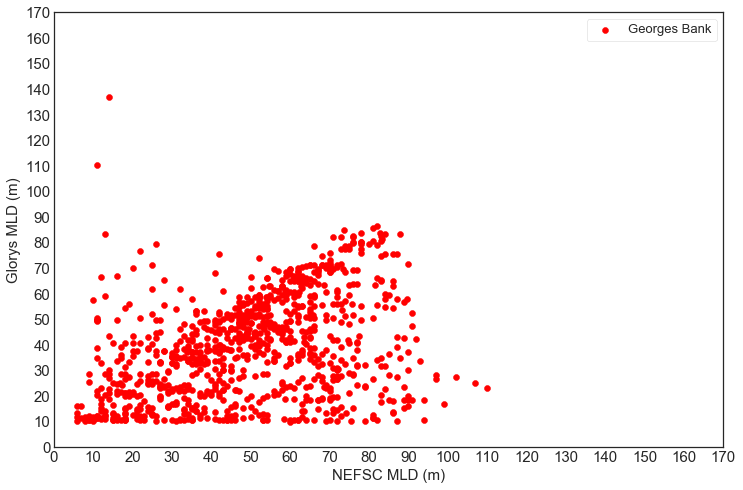

In [1062]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,170)
plt.xlim(0,170)
# plt.scatter(SouthernMABNEFSC_feb, SouthernMABGlorys_feb,color='orange',label='Southern MAB')
# plt.scatter(NorthernMABNEFSC_feb, NorthernMABGlorys_feb,color='green',label='Northern MAB')
plt.scatter(GeorgesBankNEFSC_feb, GeorgesBankGlorys_feb,color='red',label='Georges Bank')
# plt.scatter(EGoMNEFSC_feb, EGoMGlorys_feb,color='green',label='Eastern GoM')
# plt.scatter(WGoMNEFSC_feb, WGoMGlorys_feb,color='blue',label='Western GoM')
leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170], fontsize = 15) 
plt.show()

# March

In [271]:
GeorgesBankGlorys_march = [11.749626, 18.005922, 13.122959, 19.07407, 17.24296, 17.24296, 16.022219, 74.31257, 72.328865, 63.020725, 46.235546, 51.42369, 44.709618, 50.050358, 14.191108, 71.5659, 62.868134, 10.6814785, 11.597034, 17.395552, 13.885922, 13.580737, 14.801477, 11.444442, 11.444442, 10.528886, 10.528886, 10.376293, 15.411848, 13.122959, 10.528886, 13.275552, 13.275552, 13.73333, 13.73333, 25.177773, 25.177773, 27.466661, 13.885922, 10.528886, 10.528886, 28.229624, 28.229624, 28.382215, 28.382215, 13.580737, 13.580737, 19.07407, 24.872587, 10.834071, 10.834071, 14.3437, 15.106663, 15.106663, 15.106663, 10.528886, 10.528886, 85.29923, 79.04294, 10.376293, 10.376293, 11.749626, 11.291849, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 75.07553, 71.26072, 75.07553, 71.26072, 51.42369, 48.677025, 29.602957, 51.42369, 16.63259, 29.602957, 18.616293, 32.044437, 16.63259, 18.616293, 12.207404, 10.6814785, 10.528886, 11.749626, 13.122959, 13.122959, 17.395552, 14.191108, 14.191108, 14.95407, 12.207404, 12.359997, 12.665182, 17.85333, 54.780727, 50.508137, 54.780727, 50.965916, 43.0311, 43.0311, 42.87851, 42.87851, 45.31999, 32.8074, 32.8074, 39.826656, 12.0548115, 10.986664, 46.99851, 13.580737, 20.599997, 18.311108, 20.599997, 20.142218, 16.785181, 13.580737, 12.512589, 14.3437, 12.817775, 19.531847, 17.85333, 19.379255, 21.97333, 26.551105, 20.752588, 19.226664, 17.85333, 17.85333, 17.090366, 18.616293, 19.07407, 24.109625, 24.719995, 19.68444, 21.820736, 21.668144, 20.90518, 18.921478, 12.207404, 16.785181, 14.496293, 18.921478, 16.479998, 20.142218, 18.005922, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 18.158514, 23.957031, 23.041477, 53.559986, 35.401474, 71.87109, 66.37776, 37.99555, 41.352585, 31.739252, 31.891846, 48.524433, 43.946655, 58.900726, 58.900726, 54.93332, 57.679985, 56.61184, 54.93332, 36.774807, 62.868134, 48.21925, 62.868134, 55.238506, 43.946655, 36.774807, 82.39998, 40.742214, 67.140724, 48.21925, 42.42073, 51.728878, 31.58666, 55.238506, 28.07703, 47.456284, 43.0311, 53.865173, 47.76147, 23.041477, 82.39998, 80.874054, 22.888884, 67.140724, 17.700737, 64.39406, 16.479998, 42.42073, 17.700737, 32.95999, 17.395552, 29.602957, 10.834071, 27.924438, 23.346663, 28.07703, 21.057774, 31.891846, 43.0311, 45.625175, 45.472584, 53.865173, 30.060734, 51.42369, 23.041477, 46.388138, 23.041477, 36.774807, 14.648885, 18.4637, 34.333324, 29.755548, 32.34962, 17.548145, 42.573322, 16.479998, 16.174812, 16.937775, 16.174812, 17.395552, 16.022219, 11.291849, 18.768885, 23.346663, 23.80444, 21.057774, 21.362959, 18.921478, 18.921478, 34.63851, 70.03998, 67.598495, 59.968876, 45.472584, 51.42369, 46.388138, 39.826656, 36.774807, 36.774807, 32.8074, 34.791103, 32.34962, 35.248882, 42.573322, 19.531847, 12.512589, 30.671104, 23.651846, 22.125921, 32.044437, 12.970367, 21.820736, 38.453323, 31.281475, 33.87555, 24.719995, 33.112587, 11.902219, 25.788143, 15.869626, 33.722954, 26.703697, 26.703697, 35.096287, 28.992586, 32.95999, 39.674065, 26.093328, 48.37184, 39.674065, 36.774807, 54.170357, 40.131844, 37.53777, 61.647392, 47.60888, 73.85479, 38.911102, 50.050358, 10.986664, 40.131844, 64.69924, 45.31999, 38.453323, 61.647392, 14.496293, 70.80294, 73.85479, 50.81332, 10.376293, 10.986664, 25.788143, 53.407394, 64.69924, 22.736292, 53.407394, 15.259255, 38.453323, 15.717033, 14.496293, 11.902219, 12.207404, 14.191108, 11.1392565, 10.986664, 11.902219, 68.36146, 70.955536, 38.60592, 64.546646, 31.434067, 14.801477, 10.376293, 10.376293, 27.619253, 9.918516, 34.943695, 18.311108, 37.53777, 22.736292, 51.576283, 15.259255, 10.2237015, 16.937775, 16.937775, 15.717033, 12.665182, 12.665182, 11.902219, 15.717033, 14.038515, 11.749626, 18.158514, 18.616293, 14.191108, 31.739252, 62.56295, 49.897766, 48.21925, 38.60592, 33.112587, 31.434067, 36.774807, 41.96295, 27.008883, 20.752588, 34.943695, 15.259255, 18.768885, 24.109625, 17.700737, 53.865173, 53.865173, 59.205914, 49.745174, 49.745174, 11.597034, 66.53035, 18.921478, 14.496293, 45.31999, 19.531847, 39.063694, 18.4637, 19.531847, 26.24592, 45.31999, 22.583698, 43.794064, 41.19999, 39.063694, 40.131844, 24.567402, 10.986664, 19.531847, 11.1392565, 19.531847, 49.287395, 12.207404, 49.439987, 10.528886, 11.597034, 11.597034, 39.521473, 25.177773, 43.946655, 42.87851, 55.69628, 38.60592, 26.093328, 40.131844, 31.891846, 10.986664, 11.1392565, 10.986664, 54.475544, 11.1392565, 68.36146, 49.287395, 64.08887, 49.439987, 49.439987, 44.09925, 39.36888, 41.81036, 14.801477, 27.314068, 11.597034, 32.654808, 39.521473, 50.050358, 24.872587, 43.946655, 43.946655, 40.58962, 55.69628, 42.725918, 34.180733, 26.093328, 36.011845, 31.281475, 20.599997, 54.475544, 78.89035, 68.36146, 70.49776, 64.08887, 64.08887, 50.508137, 43.794064, 28.07703, 45.31999, 41.81036, 36.317028, 27.314068, 36.774807, 24.872587, 24.872587, 14.038515, 18.616293, 15.564441, 10.376293, 10.376293, 50.965916, 62.410355, 29.14518, 22.736292, 25.482958, 22.125921, 59.205914, 79.34813, 79.34813, 51.88147, 50.355545, 45.31999, 41.65777, 12.817775, 17.24296, 23.957031, 33.570362, 38.60592, 25.177773, 65.61479, 39.97925, 26.703697, 30.518513, 31.281475, 23.346663, 11.1392565, 10.528886, 10.528886, 13.580737, 10.528886, 15.259255, 10.376293, 11.902219, 10.376293, 10.376293, 10.376293, 10.528886, 10.6814785, 12.817775, 13.122959, 12.970367, 17.85333, 10.376293, 18.4637, 18.4637, 14.3437, 14.801477, 15.411848, 14.191108, 16.937775, 12.359997, 22.736292, 21.210365, 15.411848, 32.95999, 12.817775, 34.63851, 19.531847, 14.191108, 26.551105, 30.97629, 20.90518, 25.63555, 24.262217, 36.317028, 24.41481, 34.333324, 13.428144, 15.869626, 69.88739, 33.41777, 63.631096, 15.411848, 10.528886, 38.453323, 14.648885, 10.2237015, 26.85629, 10.834071, 66.682945, 43.64147, 49.287395, 63.020725, 61.95258, 55.238506, 43.48888, 72.02368, 65.004425, 61.4948, 20.294811, 53.71258, 32.502216, 24.109625, 11.1392565, 18.616293, 10.376293, 19.531847, 19.531847, 77.66961, 69.734795, 47.76147, 37.53777, 33.722954, 33.722954, 41.81036, 40.894806, 41.047398, 77.21183, 40.742214, 64.39406]
GeorgesBankNEFSC_march = [75.0, 74.0, 64.0, 65.0, 69.0, 69.0, 68.0, 68.0, 78.0, 63.0, 50.0, 56.0, 51.0, 62.0, 61.0, 63.0, 62.0, 57.0, 73.0, 42.0, 39.0, 42.0, 30.0, 73.0, 73.0, 57.0, 56.0, 12.0, 13.0, 40.0, 46.0, 57.0, 54.0, 72.0, 65.0, 40.0, 37.0, 76.0, 67.0, 52.0, 53.0, 48.0, 45.0, 29.0, 25.0, 50.0, 49.0, 61.0, 60.0, 30.0, 32.0, 44.0, 34.0, 75.0, 73.0, 56.0, 53.0, 63.0, 67.0, 26.0, 29.0, 14.0, 8.0, 8.0, 6.0, 50.0, 10.0, 40.0, 75.0, 58.0, 74.0, 53.0, 49.0, 37.0, 51.0, 48.0, 46.0, 37.0, 57.0, 31.0, 46.0, 57.0, 38.0, 37.0, 52.0, 47.0, 61.0, 61.0, 70.0, 54.0, 54.0, 43.0, 44.0, 50.0, 43.0, 34.0, 87.0, 64.0, 84.0, 43.0, 47.0, 48.0, 52.0, 53.0, 56.0, 72.0, 71.0, 95.0, 53.0, 69.0, 81.0, 69.0, 62.0, 50.0, 30.0, 32.0, 36.0, 34.0, 34.0, 51.0, 60.0, 77.0, 71.0, 17.0, 51.0, 16.0, 79.0, 64.0, 54.0, 54.0, 55.0, 67.0, 74.0, 20.0, 32.0, 27.0, 30.0, 75.0, 67.0, 23.0, 34.0, 15.0, 30.0, 62.0, 59.0, 40.0, 39.0, 48.0, 39.0, 50.0, 64.0, 80.0, 79.0, 58.0, 63.0, 57.0, 55.0, 68.0, 64.0, 36.0, 72.0, 47.0, 52.0, 45.0, 63.0, 74.6, 77.0, 61.3, 68.0, 84.2, 56.0, 52.6, 54.0, 57.1, 84.0, 66.9, 48.0, 46.0, 83.8, 51.0, 71.8, 57.0, 46.4, 65.0, 41.8, 72.0, 36.5, 72.0, 51.9, 63.7, 86.0, 16.5, 81.0, 76.0, 11.5, 70.0, 77.0, 56.0, 59.6, 46.0, 70.9, 32.0, 28.4, 39.0, 35.0, 28.0, 35.0, 35.0, 14.5, 39.0, 48.0, 58.0, 60.5, 64.0, 67.0, 46.7, 70.0, 42.5, 65.0, 36.1, 8.0, 8.0, 79.0, 74.0, 45.3, 65.0, 61.6, 57.0, 58.0, 69.0, 74.0, 26.0, 42.0, 43.0, 31.0, 36.0, 11.0, 14.0, 14.0, 39.0, 39.0, 67.0, 62.0, 65.0, 60.0, 58.0, 46.0, 43.0, 32.0, 39.0, 36.0, 24.0, 36.0, 47.0, 64.0, 64.0, 12.0, 23.0, 28.0, 25.0, 18.0, 16.0, 18.0, 58.0, 70.0, 50.0, 54.0, 52.0, 58.0, 63.0, 15.0, 34.0, 54.0, 66.0, 63.0, 26.0, 37.0, 78.0, 62.9, 71.0, 92.1, 59.0, 77.1, 69.0, 54.1, 89.0, 58.4, 82.0, 37.5, 76.0, 50.0, 86.5, 49.0, 68.8, 52.0, 49.0, 55.0, 46.1, 62.0, 27.0, 105.0, 10.0, 82.0, 76.0, 9.5, 70.0, 53.1, 59.0, 72.6, 48.0, 25.9, 43.0, 35.0, 37.0, 89.2, 41.0, 48.0, 59.0, 65.0, 66.0, 18.5, 44.0, 52.8, 28.0, 29.0, 41.0, 48.0, 78.0, 63.4, 75.0, 62.0, 57.0, 64.0, 67.0, 74.0, 80.0, 81.0, 15.0, 22.0, 15.0, 22.0, 33.0, 21.0, 23.0, 34.0, 25.0, 79.0, 71.0, 59.0, 9.0, 57.0, 16.0, 31.0, 48.0, 31.0, 38.0, 48.0, 63.0, 62.0, 41.0, 62.0, 42.0, 34.0, 78.0, 81.0, 80.0, 60.0, 57.0, 25.0, 71.0, 38.0, 26.0, 38.0, 33.0, 57.0, 42.0, 27.0, 53.0, 49.0, 44.0, 40.0, 64.0, 53.0, 47.0, 65.0, 41.0, 28.0, 37.0, 26.0, 52.0, 46.0, 61.0, 9.0, 15.0, 37.0, 35.0, 43.0, 57.0, 69.0, 70.0, 56.0, 24.0, 47.0, 82.0, 35.0, 43.0, 31.0, 79.0, 34.0, 67.0, 50.0, 19.0, 61.0, 61.0, 53.0, 56.0, 41.0, 65.0, 45.0, 7.0, 7.0, 40.0, 65.0, 49.0, 55.0, 55.0, 58.0, 67.0, 75.0, 25.0, 23.0, 78.0, 78.0, 86.0, 79.0, 67.0, 68.0, 60.0, 19.0, 18.0, 46.0, 48.0, 47.0, 41.0, 45.0, 35.0, 46.0, 28.0, 41.0, 44.0, 43.0, 16.0, 46.0, 37.0, 14.0, 73.0, 45.0, 46.0, 32.0, 32.0, 27.0, 56.0, 64.0, 40.0, 56.0, 60.0, 67.0, 50.0, 23.0, 54.0, 33.0, 19.0, 45.0, 54.0, 66.0, 43.0, 80.0, 12.0, 22.0, 20.0, 72.0, 68.0, 71.0, 57.0, 11.0, 41.0, 9.0, 80.0, 7.0, 13.0, 6.0, 7.0, 59.0, 51.0, 45.0, 53.0, 6.0, 30.0, 7.0, 11.0, 10.0, 14.0, 60.0, 9.0, 9.0, 28.0, 69.0, 15.0, 15.0, 75.0, 30.0, 66.0, 47.0, 62.0, 59.0, 75.0, 49.0, 67.0, 66.0, 55.0, 50.0, 33.0, 47.0, 36.0, 73.0, 75.0, 57.0, 33.0, 35.0, 50.0, 23.0, 59.0, 67.0, 87.0, 69.0, 52.0, 59.0, 60.0, 64.0, 50.0, 26.0, 71.0, 65.0, 62.0, 19.0, 89.0, 50.0, 49.0, 9.0, 11.0, 22.0, 8.0, 14.0, 72.0, 63.0, 44.0, 37.0, 43.0, 36.0, 35.0, 36.0, 46.0, 78.0, 43.0, 62.0]

In [755]:
SouthernMABGlorys_march = [13.122959, 17.24296, 12.359997, 19.226664, 16.785181, 16.63259, 14.038515, 14.038515, 15.869626, 12.207404, 10.528886, 14.038515, 13.885922, 11.749626, 10.528886, 11.291849, 11.291849, 10.528886, 19.379255, 11.749626, 11.291849, 11.291849, 17.548145, 10.528886, 10.528886, 10.528886, 10.528886, 9.918516, 7.3244424, 10.528886, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 8.239998, 11.444442, 10.834071, 10.528886, 10.834071, 10.528886, 10.6814785, 10.528886, 11.597034, 10.528886, 10.528886, 10.528886, 11.749626, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.2237015, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 66.682945, 36.46962, 16.937775, 13.885922, 26.398512, 19.07407, 13.73333, 11.1392565, 10.528886, 15.106663, 11.291849, 10.528886, 10.528886, 10.528886, 13.122959, 11.291849, 10.528886, 10.834071, 11.902219, 10.6814785, 12.359997, 11.749626, 12.359997, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 6.866665, 9.00296, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 9.7659235, 9.918516, 10.528886, 10.376293, 10.528886, 13.428144, 10.986664, 10.986664, 20.294811, 43.64147, 26.093328, 22.888884, 19.837032, 19.07407, 16.937775, 17.548145, 26.85629, 17.700737, 11.1392565, 10.376293, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.071109, 13.122959, 10.6814785, 11.597034, 10.528886, 10.528886, 10.528886, 16.479998, 34.02814, 31.128881, 26.85629, 18.311108, 28.53481, 23.041477, 25.330364, 17.700737, 16.937775, 10.6814785, 10.6814785, 10.528886, 10.528886, 21.362959, 10.528886, 10.528886, 12.0548115, 18.005922, 10.528886, 13.122959, 15.564441, 34.180733, 10.528886, 13.428144, 36.011845, 10.528886, 60.88443, 42.87851, 20.447403, 35.706657, 34.48592, 16.479998, 12.0548115, 10.528886, 19.531847, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.937775, 32.654808, 34.63851, 103.45775, 16.174812, 40.58962, 32.502216, 14.801477, 10.986664, 13.885922, 21.362959, 10.528886, 10.528886, 11.749626, 10.376293, 10.528886, 10.6814785, 11.902219, 12.0548115, 12.665182, 15.411848, 14.038515, 13.73333, 31.58666, 28.07703, 19.989626, 23.957031, 30.213327, 28.6874, 23.651846, 24.872587, 19.68444, 28.992586, 25.177773, 16.479998, 24.719995, 38.30073, 32.502216, 37.232586, 34.943695, 33.112587, 45.014805, 40.58962, 41.65777, 51.576283, 49.439987, 49.592583, 48.677025, 49.592583, 10.528886, 10.528886, 10.528886, 14.191108, 10.528886, 10.528886, 13.275552, 10.528886, 10.528886, 10.528886, 10.528886, 14.3437, 18.768885, 10.528886, 11.1392565, 11.291849, 10.528886, 10.376293, 11.444442, 9.918516, 8.697776, 10.528886, 10.071109, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, nan, 10.376293, 10.528886, 10.528886, 12.512589, 12.0548115, 10.376293, 10.528886, 10.528886, 10.528886, 14.496293, 12.0548115, 10.986664, 10.528886, 20.90518, 19.379255, 21.51555, 20.752588, 18.311108, 16.785181, 15.869626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.749626, 10.834071, 14.038515, 14.496293, 23.80444, 17.395552, 23.957031, 16.022219, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 9.00296, 10.528886, 10.528886, 11.444442, 11.444442, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.359997, 10.528886, 10.6814785, 10.528886, 10.376293, 10.528886, 14.191108, 22.278513, 25.788143, 27.008883, 33.87555, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 17.85333, 31.58666, 34.02814, 31.58666, 27.619253, 10.528886, 10.528886, 12.817775, 10.528886, 10.528886, 10.376293, 10.528886, 13.275552, 22.736292, 10.528886, 17.700737, 20.90518, 10.071109, 12.970367, 14.801477, 15.869626, 11.291849, 9.00296, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.376293, 10.834071, 11.291849, 11.291849, 12.512589, 13.885922, 13.580737, 17.090366, 18.158514, 16.785181, 12.207404, 17.395552, 15.411848, 18.768885, 18.768885, 20.752588, 20.599997, 18.921478, 10.528886, 10.528886, 10.528886, 10.528886, 14.95407, 19.531847, 17.24296, 16.022219, 14.3437, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.918516, 10.528886, 9.00296, 10.528886, 10.528886, 10.528886, 10.834071, 11.902219, 11.291849, 15.259255, 12.512589, 13.428144, 11.444442, 18.005922, 10.528886, 14.191108, 10.986664, 16.63259, 10.6814785, 29.14518, 10.986664, 43.336285, 45.777767, 35.248882, 34.943695, 14.496293, 15.106663, 29.450363, 12.970367, 10.528886, 10.528886, 14.038515, 16.174812, 10.528886, 10.528886, 10.376293, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 55.085915, 49.897766, 35.248882, 28.382215, 32.654808, 23.651846, 21.820736, 24.41481, 34.791103, 26.093328, 12.207404, 14.3437, 13.122959, 10.986664, 17.24296, 14.191108, 10.986664, 15.411848, 15.411848, 21.820736, 21.057774, 16.937775, 15.564441, 10.376293, 17.24296, 19.989626, 11.749626, 15.564441, 13.73333, 22.278513, 11.749626, 10.528886, 10.528886, 12.817775, 10.528886, 20.752588, 24.262217, 23.194069, 16.785181, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 7.3244424, 10.528886, 10.528886, 6.866665, 10.528886, 7.477035, 8.545183, 10.528886, 10.528886, 10.2237015, 10.528886, 10.528886, 19.989626, 20.90518, 17.548145, 17.700737, 19.68444, 19.837032, 15.869626, 20.90518, 23.499254, 20.447403, 16.479998, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, nan, 10.528886, 10.528886, 11.597034, 11.291849, 11.902219, 12.665182, 12.970367, 13.122959, 11.444442, 11.902219, 25.940735, 22.431107, 35.554066, 28.07703, 44.404434, 45.472584, 38.75851, 53.71258, 32.19703, 63.020725, 23.346663, 59.511097, 34.943695, 35.096287, 27.924438, 22.125921, 43.64147, 44.09925, 31.128881, 35.401474, 23.80444, 19.379255, 33.722954, 28.839994, 35.554066, 17.24296, 10.376293, 16.174812, 14.038515, 11.749626, 10.376293, 11.902219, 10.071109, 13.885922, 13.428144, 12.0548115, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 8.087405, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 12.0548115, 14.801477, 53.407394, 66.07257, 46.54073, 25.940735, 23.194069, 27.619253, 50.20295, 19.531847, 34.48592, 30.518513, 43.183693, 15.717033, 33.570362, 27.161476, 18.158514, 19.531847, 35.401474, 35.401474, 17.090366, 12.665182, 14.038515, 14.191108, 10.834071, 10.528886, 13.580737, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.665182, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 13.580737, 13.580737, 10.528886, 30.671104, 33.570362, 31.281475, 32.044437, 26.551105, 27.008883, 26.24592, 12.665182, 11.902219, nan, 10.528886, 10.528886, 10.528886, 10.6814785, 10.376293, 63.783688, 41.81036, 10.986664, 10.986664, 10.528886, 10.528886, 46.388138, 46.388138, 50.965916, 66.37776, 65.004425, 41.96295, 21.362959, 15.869626, 20.752588, 20.90518, 15.106663, 10.528886, 10.376293, 8.697776, 10.376293, 11.902219, 14.496293, 10.528886, 15.411848, 10.986664, 10.6814785, 38.911102, 36.46962, 30.213327, 25.63555, 34.791103, 37.99555, 21.668144, 21.668144, 22.583698, 41.19999, 26.703697, 32.654808, 37.232586, 23.194069, 25.482958, 17.548145, 33.112587, 21.362959, 14.648885, 10.528886, 12.665182, 10.528886, 12.207404, 10.528886, 10.528886, 36.622215, 42.115547, 24.567402, 22.125921, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.479998, 18.4637, 18.4637, 19.531847, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 11.1392565, 9.460738, 10.6814785, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 56.306652, 32.19703, 15.106663, 65.004425, 77.21183, 55.54369, 11.1392565, 11.1392565, 10.834071, 12.512589, 11.902219, 13.275552, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 7.477035, 7.3244424, 10.071109, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.580737, 10.528886, 12.207404, 10.376293, 10.376293, 11.444442, 24.41481, 21.97333, 28.53481, 10.2237015, 9.7659235, 8.545183, 13.580737, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 14.95407, 15.411848, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 10.6814785, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 7.3244424, 10.986664, 11.1392565, 9.155553, 11.1392565, 10.986664, 10.6814785, 10.528886, 12.665182, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.2237015, 10.376293, 14.191108, 15.869626, 14.496293, 18.921478, 10.528886, 11.1392565, 11.597034, 10.376293, 10.6814785, 10.528886, 10.834071, 10.986664, 11.597034, 13.122959, 30.823696, 20.294811, 13.580737, 35.554066, 42.26814, 48.677025, 45.93036, 30.671104, 44.709618, 13.580737, 30.823696, 10.528886, 10.528886, 10.528886, 14.496293, 11.902219, 13.428144, 22.736292, 19.379255, 10.528886, 10.528886, 9.00296, 10.528886, 10.071109, 7.477035, 10.528886, 25.025179, 11.291849, 10.376293, 9.918516, 37.842953, 15.106663, 11.291849, 39.521473, 56.306652, 45.625175, 26.24592, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 10.528886, 10.528886, 13.275552, 16.174812, 12.0548115, 19.226664, 19.989626, 25.177773, 19.226664, 21.97333, 14.3437, 19.989626, 11.902219, 11.749626, 19.379255, 12.665182, 15.869626, 21.362959, 19.226664, 24.719995, 20.752588, 15.564441, 15.106663, 12.512589, 32.34962, 23.194069, 19.226664, 14.038515, 11.902219, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 10.528886, 10.376293, 10.6814785, 10.528886, 10.528886, 12.817775, 10.986664, 11.444442, 12.207404, 12.207404, 10.6814785, 42.42073, 19.226664, 24.109625, 27.619253, 34.180733, 18.005922, 14.648885, 19.531847, 15.564441, 25.482958, 18.158514, 18.616293, 15.106663, 18.4637, 25.940735, 30.36592, 14.801477, 14.038515, 10.376293, 11.1392565, 13.275552, 13.73333, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 7.17185, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 8.087405, 10.528886, 8.545183, 8.239998, 10.528886, 10.528886, 10.6814785, 11.291849, 12.0548115, 10.528886, 10.528886, 11.444442, 12.0548115, 10.528886, 10.528886, 10.376293, 10.2237015, 10.528886, 15.564441, 36.9274, 18.616293, 25.788143, 18.311108, 30.97629, 27.466661, 31.281475, 10.528886, 23.194069, 10.528886, 10.528886, 11.444442, 54.017765, 48.066654, 48.066654, 43.64147, 43.336285, 43.336285, 42.725918, 40.58962, 40.58962, 35.554066, 30.671104, 23.499254, 27.008883, 16.479998, 42.725918, 39.216286, 78.89035, 69.734795, 38.30073, 67.140724, 86.21479, 99.33775, 56.61184, 43.0311, 39.063694, 21.668144, 29.755548, 79.19553, 63.631096, 34.333324, 21.362959, 18.311108, 24.109625, 24.109625, 22.278513, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.00296, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 7.7822204, 9.918516, 10.528886, 10.528886, 10.528886, 10.986664, 13.122959, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 29.908142, 10.376293, 41.81036, 50.355545, 43.48888, 48.677025, 51.118507, 37.69036, 42.725918, 30.518513, 41.19999, 38.453323, 37.842953, 47.30369, 34.791103, 42.42073, 34.943695, 33.722954, 53.865173, 30.671104, 25.788143, 12.512589, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.376293, 10.986664, 11.291849, 13.275552, 10.6814785, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 17.24296, 10.528886, 10.071109, 10.528886, 10.528886, 18.311108, 60.88443, 50.81332, 12.207404, 7.477035, 13.885922, 14.3437, 10.528886, 10.528886, 10.528886, 10.528886, 16.022219, 11.291849, 13.275552, 12.0548115, 21.210365, 21.820736, 23.041477, 23.957031, 27.161476, 18.616293, 10.528886, 10.528886, 13.428144, 13.122959, 14.3437, 22.736292, 13.580737, 16.174812, 12.207404, 14.191108, 20.599997, 14.648885, 13.580737, 63.783688, 10.6814785, 10.528886, 10.528886, 10.528886, 12.359997, 14.801477, 14.801477, 10.986664, 51.118507, 15.869626, 10.528886, 14.038515, 59.511097, 35.554066, 19.989626, 14.496293, 10.2237015, 15.411848, 17.090366, 16.63259, 19.68444, 19.68444, 15.259255, 18.921478, 13.73333, 15.869626, 10.528886, 10.528886, 10.528886, 51.88147, 53.71258, 45.625175, 40.742214, 40.131844, 28.53481, 28.229624, 27.161476, 25.025179, 32.502216, 25.482958, 23.80444, 15.869626, 23.651846, 26.24592, 27.008883, 19.226664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.122959, 10.528886, 10.528886, 10.528886, 10.2237015, 12.817775, 10.2237015, 10.376293, 10.528886, 10.528886, 10.528886, 11.597034, 10.834071, 14.496293, 12.512589, 13.885922, 14.496293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 19.837032, 12.207404, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 18.616293, 17.395552, 19.07407, 20.599997, 23.194069, 27.924438, 31.58666, 35.859253, 33.112587, 25.025179, 28.839994, 29.602957, 15.259255, 20.752588, 18.921478, 21.057774, 20.142218, 23.346663, 19.379255, 12.207404, 20.599997, 23.346663, 20.447403, 68.66665, 18.005922, 19.226664, 26.398512, 17.090366, 14.95407, 14.95407, 11.291849, 11.444442, 17.24296, 21.820736, 15.717033, 16.174812, 16.937775, 14.801477, 20.599997, 15.869626, 20.294811, 17.85333, 20.294811, 10.528886, 15.411848, 10.528886, 12.665182, 11.902219, 15.106663, 18.616293, 16.937775, 13.275552, 27.008883, 30.36592, 32.34962, 14.3437, 17.548145, 40.131844, 47.456284, 103.91553, 103.91553, 74.61776, 86.97775, 25.482958, 30.060734, 22.583698, 24.719995, 13.885922, 11.1392565, 11.749626, 21.362959, 62.56295, 19.68444, 10.528886, 10.528886, 10.528886, 10.6814785, 28.53481, 11.291849, 10.528886, 10.528886, 12.359997, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 16.174812, 32.34962, 22.736292, 24.872587, 17.090366, 11.749626, 42.573322, 39.97925, 43.0311, 27.619253, 51.118507, 41.65777, 41.81036, 41.81036, 27.619253, 32.95999, 25.63555, 26.85629, 30.671104, 11.291849, 13.275552, 10.834071, 10.528886, 16.937775, 11.597034, 14.3437, 24.567402, 19.837032, 12.970367, 14.3437, 11.749626, 10.834071, 10.528886, 10.528886, 12.0548115, 10.528886, 10.528886, 10.528886, 15.869626, 23.041477, 11.444442, 10.528886, 12.207404, 11.444442, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 11.291849, 11.444442, 14.3437, 32.654808, 20.294811, 19.07407, 18.158514, 18.005922, 26.24592, 17.395552, 10.834071, 31.281475, 11.291849, 10.528886, 10.528886, 11.749626, 25.330364, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 11.444442, 10.986664, 10.528886, 10.528886, 10.6814785, 11.749626, 12.512589, 15.411848, 16.479998, 13.428144, 12.512589, 12.665182, 12.0548115, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 17.548145, 15.411848, 19.68444, 19.226664, 31.434067, 15.717033, 15.564441, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 70.49776, 56.917023, 56.917023, 14.496293, 50.81332, 84.688866, 83.31553, 10.986664, 15.259255, 13.428144, 25.940735, 10.528886, 10.6814785, 16.479998, 10.6814785, 10.834071, 11.444442, 10.528886, 10.528886, 18.4637, 18.4637, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 25.788143, 12.359997, 10.986664, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.376293, 13.73333, 20.752588, 16.63259, 14.648885, 33.41777, 27.314068, 31.739252, 37.385178, 20.90518, 17.090366, 13.580737, 40.131844, 11.749626, 12.207404, 14.038515, 13.275552, 17.24296, 12.0548115, 11.902219, 46.235546, 19.07407, 10.834071, 10.834071, 10.834071, 10.528886, 10.528886, 10.071109, 11.597034, 12.970367, 10.528886, 10.528886, 10.528886, 17.85333, 23.346663, 29.14518, 29.14518, 21.820736, 20.294811, 19.989626, 15.564441, 16.63259, 18.4637, 16.327404, 11.291849, 24.567402, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 18.921478, 23.80444, 21.668144, 26.398512, 21.210365, 27.466661, 23.80444, 23.80444, 32.95999, 18.4637, 18.4637, 27.466661, 29.14518, 24.41481, 25.177773, 36.622215, 36.622215, 28.07703, 21.51555, 21.51555, 21.668144, 21.668144, 29.297771, 44.709618, 47.1511, 38.911102, 43.183693, 23.499254, 24.41481, 24.41481, 11.902219, 10.528886, 10.528886, 23.957031, 23.957031, 23.80444, 23.80444, 20.142218, 10.528886, 10.528886, 18.311108, 17.24296, 26.398512, 23.499254, 24.109625, 24.109625, 28.839994, 28.839994, 28.839994, 26.703697, 26.703697, 10.528886, 30.213327, 26.703697, 52.797024, 26.398512, 17.548145, 16.174812, 28.839994, 10.528886, 11.444442, 11.444442, 14.801477, 32.502216, 13.428144, 60.88443, 12.359997, 10.834071, 13.73333, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 24.872587, 14.95407, 20.90518, 16.63259, 25.940735, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 17.090366, 10.6814785, 15.869626, 15.869626, 22.888884, 17.090366, 10.528886, 18.005922, 16.63259, 13.122959, 16.174812, 15.717033, 10.6814785, 12.665182, 12.665182, 13.275552, 13.885922, 14.038515, 10.834071, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 16.479998, 16.022219, 24.872587, 24.109625, 30.671104, 30.36592, 42.573322, 10.528886, 10.528886, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 26.551105, 31.434067, 30.518513, 30.518513, 34.48592, 28.992586, 39.521473, 30.97629, 28.839994, 18.005922, 28.229624, 40.894806, 41.81036, 34.63851, 14.801477, 13.275552, 13.580737, 13.428144, 13.73333, 18.005922, 28.839994, 23.957031, 20.447403, 17.548145, 17.395552, 17.24296, 17.395552, 23.499254, 23.194069, 29.297771, 10.528886, 19.226664, 10.528886, 10.528886, 10.6814785, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 15.717033, 15.717033, 13.428144, 16.174812, 16.174812, 19.68444, 15.259255, 18.005922, 19.226664, 19.07407, 17.700737, 38.911102, 26.093328, 16.022219, 16.937775, 22.431107, 37.07999, 13.885922, 22.888884, 21.057774, 21.97333, 22.278513, 17.700737, 12.512589, 18.768885, 20.142218, 19.837032, 12.970367, 16.937775, 13.73333, 12.970367, 11.749626, 10.528886, 10.528886, 10.528886, 12.512589, 19.989626, 17.548145, 17.548145, 18.616293, 26.398512, 30.823696, 22.431107, 19.07407, 16.479998, 22.583698, 15.259255, 11.291849, 20.90518, 29.450363, 27.314068, 31.281475, 33.26518, 19.531847, 14.496293, 20.752588, 21.057774, 15.869626, 17.548145, 28.53481, 25.63555, 42.573322, 31.739252, 27.466661, 12.512589, 30.36592, 45.167397, 71.5659, 56.76443, 35.401474, 37.385178, 38.75851, 12.0548115, 16.63259, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 10.528886, 10.528886, 10.376293, 10.528886, 13.428144, 10.376293, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 14.496293, 11.902219, 10.376293, 10.528886, 10.528886, 10.376293, 10.528886]
SouthernMABNEFSC_march = [14.0, 54.0, 26.0, 57.0, 57.0, 65.0, 70.0, 48.0, 15.0, 32.0, 22.0, 37.0, 50.0, 40.0, 27.0, 32.0, 26.0, 29.0, 66.0, 33.0, 49.0, 25.0, 6.0, 10.0, 17.0, 15.0, 10.0, 7.0, 5.0, 8.0, 6.0, 12.0, 5.0, 8.0, 8.0, 6.0, 8.0, 14.0, 12.0, 45.0, 11.0, 6.0, 8.0, 10.0, 36.0, 10.0, 33.0, 14.0, 8.0, 65.0, 16.0, 12.0, 10.0, 30.0, 39.0, 30.0, 40.0, 35.0, 20.0, 20.0, 12.0, 20.0, 20.0, 26.0, 7.0, 19.0, 19.0, 11.0, 6.0, 5.0, 15.0, 25.0, 7.0, 9.0, 6.0, 31.0, 6.0, 7.0, 62.0, 53.0, 35.0, 57.0, 115.0, 101.0, 42.0, 42.0, 6.0, 17.0, 22.0, 22.0, 16.0, 27.0, 27.0, 28.0, 14.0, 7.0, 10.0, 23.0, 22.0, 78.0, 12.0, 11.0, 14.0, 25.0, 21.0, 20.0, 9.0, 7.0, 14.0, 11.0, 8.0, 13.0, 8.0, 7.0, 10.0, 10.0, 10.0, 11.0, 12.0, 32.0, 49.0, 45.0, 38.0, 37.0, 27.0, 27.0, 9.0, 14.0, 53.0, 39.0, 54.0, 45.0, 46.0, 13.0, 14.0, 17.0, 16.0, 17.0, 21.0, 24.0, 14.0, 10.0, 21.0, 11.0, 15.0, 18.0, 26.0, 24.0, 45.0, 64.0, 56.0, 10.0, 14.0, 50.0, 46.0, 52.0, 55.0, 8.0, 22.0, 9.0, 9.0, 25.0, 6.0, 17.0, 8.0, 13.0, 6.0, 10.0, 36.0, 32.0, 6.0, 8.0, 129.0, 24.0, 21.0, 20.0, 38.0, 32.0, 68.0, 43.0, 10.0, 17.0, 28.0, 11.0, 32.0, 25.0, 15.0, 20.0, 8.0, 6.0, 30.0, 29.0, 65.0, 149.0, 48.0, 69.0, 35.0, 35.0, 6.0, 39.0, 13.0, 30.0, 27.0, 10.0, 10.0, 9.0, 25.0, 51.0, 24.0, 22.0, 18.0, 34.0, 14.0, 29.0, 32.0, 18.0, 23.0, 36.0, 26.0, 47.0, 35.0, 26.0, 46.0, 41.0, 36.0, 38.0, 33.0, 34.0, 45.0, 43.0, 18.0, 24.0, 46.0, 35.0, 19.0, 17.0, 10.0, 60.0, 51.0, 8.0, 16.0, 6.0, 17.0, 16.0, 8.0, 25.0, 15.0, 20.0, 13.0, 9.0, 19.0, 17.0, 17.0, 23.0, 36.0, 20.0, 16.0, 18.0, 13.0, 14.0, 10.0, 8.0, 11.0, 9.0, 9.0, 13.0, 12.0, 18.0, 17.0, 19.0, 17.0, 11.0, 17.0, 8.0, 15.0, 46.0, 19.0, 10.0, 14.0, 15.0, 19.0, 18.0, 16.0, 10.0, 21.0, 20.0, 12.0, 22.0, 20.0, 35.0, 9.0, 39.0, 39.0, 32.0, 21.0, 31.0, 25.0, 22.0, 41.0, 46.0, 46.0, 53.0, 6.0, 30.0, 26.0, 39.0, 14.0, 35.0, 22.0, 22.0, 22.0, 15.0, 13.0, 15.0, 37.0, 17.0, 26.0, 11.0, 23.0, 21.0, 20.0, 12.0, 13.0, 16.0, 14.0, 13.0, 9.0, 25.0, 11.0, 15.0, 9.0, 11.0, 17.0, 24.0, 9.0, 10.0, 8.0, 18.0, 14.0, 13.0, 19.0, 17.0, 35.0, 16.0, 8.0, 6.0, 18.0, 27.0, 32.0, 24.0, 20.0, 16.0, 12.0, 20.0, 24.0, 26.0, 28.0, 27.0, 30.0, 7.0, 11.0, 18.0, 13.0, 10.0, 16.0, 12.0, 15.0, 24.0, 20.0, 18.0, 16.0, 14.0, 9.0, 7.0, 8.0, 20.0, 27.0, 29.0, 28.0, 11.0, 35.0, 29.0, 8.0, 9.0, 25.0, 20.0, 19.0, 5.0, 23.0, 21.0, 33.0, 46.0, 67.0, 60.0, 25.0, 48.0, 32.0, 64.0, 41.0, 46.0, 58.0, 49.0, 42.0, 35.0, 61.0, 45.0, 67.0, 17.0, 39.0, 49.0, 80.0, 70.0, 22.0, 21.0, 23.0, 21.0, 23.0, 31.0, 35.0, 67.0, 81.0, 10.0, 21.0, 21.0, 13.0, 16.0, 38.0, 19.0, 11.0, 9.0, 11.0, 6.0, 8.0, 7.0, 11.0, 15.0, 11.0, 15.0, 13.0, 17.0, 11.0, 7.0, 12.0, 9.0, 19.0, 23.0, 15.0, 25.0, 28.0, 25.0, 49.0, 12.0, 45.0, 39.0, 31.0, 30.0, 24.0, 23.0, 79.0, 53.0, 34.0, 25.0, 41.0, 67.0, 19.0, 32.0, 7.0, 10.0, 10.0, 22.0, 19.0, 10.0, 28.0, 19.0, 32.0, 25.0, 25.0, 31.0, 18.0, 28.0, 15.0, 39.0, 31.0, 35.0, 24.0, 21.0, 27.0, 33.0, 43.0, 17.0, 17.0, 35.0, 35.0, 43.0, 30.0, 103.0, 17.0, 12.0, 17.0, 25.0, 16.0, 41.0, 45.0, 17.0, 19.0, 16.0, 21.0, 27.0, 20.0, 21.0, 32.0, 16.0, 25.0, 8.0, 12.0, 17.0, 13.0, 9.0, 12.0, 11.0, 6.0, 4.0, 7.0, 4.0, 2.0, 8.0, 5.0, 6.0, 25.0, 15.0, 11.0, 13.0, 15.0, 41.0, 44.0, 42.0, 29.0, 19.0, 46.0, 27.0, 54.0, 48.0, 35.0, 30.0, 19.0, 9.0, 8.0, 21.0, 16.0, 9.0, 13.0, 19.0, 16.0, 24.0, 7.0, 8.0, 30.0, 6.0, 13.0, 28.0, 31.0, 14.0, 18.0, 24.0, 15.0, 132.0, 61.0, 57.0, 51.0, 63.0, 189.0, 59.0, 54.0, 108.0, 169.0, 105.0, 33.0, 43.0, 31.0, 45.0, 10.0, 13.0, 37.0, 29.0, 30.0, 12.0, 7.0, 20.0, 19.0, 15.0, 9.0, 10.0, 8.0, 15.0, 13.0, 15.0, 27.0, 22.0, 16.0, 12.0, 20.0, 12.0, 18.0, 16.0, 10.0, 11.0, 6.0, 6.0, 12.0, 13.0, 6.0, 7.0, 8.0, 8.0, 14.0, 20.0, 21.0, 23.0, 15.0, 20.0, 7.0, 6.0, 6.0, 6.0, 9.0, 11.0, 7.0, 19.0, 7.0, 9.0, 12.0, 6.0, 9.0, 29.0, 50.0, 65.0, 60.0, 42.0, 19.0, 17.0, 31.0, 49.0, 38.0, 38.0, 11.0, 42.0, 21.0, 39.0, 76.0, 27.0, 34.0, 52.0, 49.0, 37.0, 54.0, 23.0, 22.0, 32.0, 8.0, 7.0, 16.0, 10.0, 7.0, 9.0, 6.0, 7.0, 8.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 7.0, 61.0, 6.0, 7.0, 6.0, 14.0, 8.0, 9.0, 19.0, 18.0, 7.0, 14.0, 18.0, 16.0, 14.0, 16.0, 15.0, 13.0, 9.0, 29.0, 35.0, 30.0, 36.0, 57.0, 56.0, 45.0, 61.0, 30.0, 13.0, 16.0, 16.0, 14.0, 9.0, 12.0, 52.0, 74.0, 8.0, 11.0, 16.0, 11.0, 41.0, 44.0, 50.0, 60.0, 57.0, 36.0, 30.0, 34.0, 27.0, 20.0, 19.0, 13.0, 5.0, 10.0, 13.0, 12.0, 20.0, 14.0, 23.0, 33.0, 35.0, 70.0, 67.0, 48.0, 44.0, 17.0, 45.0, 52.0, 54.0, 53.0, 41.0, 28.0, 32.0, 44.0, 58.0, 47.0, 99.0, 38.0, 64.0, 44.0, 51.0, 15.0, 23.0, 30.0, 21.0, 18.0, 19.0, 7.0, 22.0, 82.0, 27.0, 17.0, 9.0, 14.0, 6.0, 6.0, 13.0, 29.0, 54.0, 52.0, 33.0, 8.0, 6.0, 9.0, 16.0, 23.0, 16.0, 12.0, 17.0, 27.0, 18.0, 16.0, 11.0, 4.0, 11.0, 12.0, 16.0, 12.0, 11.0, 9.0, 42.0, 40.0, 52.0, 27.0, 32.0, 53.0, 53.0, 14.0, 11.0, 22.0, 17.0, 12.0, 37.0, 16.0, 24.0, 16.0, 8.0, 25.0, 22.0, 18.0, 4.0, 4.0, 2.0, 6.0, 11.0, 9.0, 9.0, 18.0, 31.0, 16.0, 10.0, 15.0, 6.0, 15.0, 22.0, 21.0, 28.0, 29.0, 23.0, 4.0, 6.0, 13.0, 14.0, 7.0, 5.0, 7.0, 11.0, 16.0, 6.0, 6.0, 31.0, 8.0, 6.0, 20.0, 91.0, 8.0, 11.0, 6.0, 17.0, 7.0, 6.0, 10.0, 20.0, 10.0, 7.0, 6.0, 13.0, 15.0, 11.0, 9.0, 56.0, 102.0, 69.0, 20.0, 24.0, 6.0, 39.0, 51.0, 33.0, 103.0, 61.0, 12.0, 9.0, 32.0, 20.0, 81.0, 7.0, 10.0, 7.0, 68.0, 6.0, 9.0, 7.0, 13.0, 11.0, 9.0, 10.0, 6.0, 3.0, 13.0, 7.0, 4.0, 21.0, 10.0, 10.0, 13.0, 47.0, 14.0, 10.0, 8.0, 7.0, 15.0, 9.0, 9.0, 21.0, 25.0, 30.0, 34.0, 21.0, 23.0, 10.0, 18.0, 10.0, 19.0, 12.0, 26.0, 11.0, 8.0, 38.0, 33.0, 26.0, 48.0, 53.0, 61.0, 50.0, 35.0, 57.0, 72.0, 73.0, 120.0, 18.0, 6.0, 16.0, 9.0, 16.0, 12.0, 20.0, 17.0, 13.0, 6.0, 10.0, 5.0, 5.0, 10.0, 29.0, 29.0, 19.0, 21.0, 25.0, 14.0, 22.0, 44.0, 53.0, 38.0, 9.0, 9.0, 13.0, 12.0, 16.0, 10.0, 13.0, 15.0, 20.0, 18.0, 11.0, 14.0, 25.0, 29.0, 42.0, 7.0, 55.0, 51.0, 39.0, 45.0, 33.0, 35.0, 50.0, 28.0, 39.0, 24.0, 37.0, 37.0, 9.0, 10.0, 41.0, 30.0, 27.0, 23.0, 19.0, 20.0, 29.0, 11.0, 11.0, 38.0, 11.0, 44.0, 34.0, 23.0, 22.0, 13.0, 13.0, 15.0, 10.0, 9.0, 10.0, 20.0, 31.0, 32.0, 29.0, 11.0, 11.0, 6.0, 23.0, 31.0, 67.0, 11.0, 6.0, 56.0, 84.0, 7.0, 13.0, 66.0, 55.0, 24.0, 14.0, 19.0, 43.0, 41.0, 43.0, 20.0, 11.0, 63.0, 43.0, 6.0, 19.0, 13.0, 42.0, 36.0, 63.0, 66.0, 34.0, 20.0, 14.0, 46.0, 20.0, 51.0, 16.0, 41.0, 15.0, 19.0, 14.0, 15.0, 15.0, 12.0, 14.0, 10.0, 32.0, 26.0, 7.0, 9.0, 6.0, 8.0, 7.0, 7.0, 6.0, 6.0, 6.0, 8.0, 7.0, 28.0, 8.0, 10.0, 5.0, 13.0, 16.0, 26.0, 18.0, 11.0, 16.0, 22.0, 7.0, 7.0, 11.0, 11.0, 14.0, 7.0, 11.0, 14.0, 27.0, 17.0, 17.0, 7.0, 8.0, 7.0, 10.0, 8.0, 15.0, 11.0, 26.0, 31.0, 21.0, 29.0, 50.0, 41.0, 27.0, 20.0, 16.0, 19.0, 14.0, 15.0, 7.0, 50.0, 61.0, 71.0, 50.0, 41.0, 33.0, 66.0, 16.0, 10.0, 57.0, 16.0, 71.0, 16.0, 53.0, 42.0, 30.0, 23.0, 62.0, 51.0, 110.0, 85.0, 88.0, 68.0, 66.0, 38.0, 37.0, 15.0, 50.0, 77.0, 29.0, 27.0, 31.0, 27.0, 97.0, 133.0, 12.0, 10.0, 12.0, 6.0, 7.0, 6.0, 11.0, 16.0, 8.0, 18.0, 7.0, 7.0, 10.0, 11.0, 8.0, 9.0, 12.0, 7.0, 11.0, 23.0, 8.0, 12.0, 9.0, 8.0, 20.0, 11.0, 7.0, 9.0, 12.0, 20.0, 11.0, 16.0, 31.0, 18.0, 11.0, 18.0, 12.0, 21.0, 17.0, 12.0, 26.0, 46.0, 31.0, 44.0, 48.0, 64.0, 66.0, 76.0, 60.0, 47.0, 52.0, 74.0, 54.0, 62.0, 21.0, 43.0, 65.0, 37.0, 33.0, 45.0, 21.0, 32.0, 22.0, 12.0, 12.0, 8.0, 17.0, 8.0, 16.0, 13.0, 21.0, 7.0, 12.0, 15.0, 8.0, 13.0, 13.0, 9.0, 18.0, 25.0, 22.0, 60.0, 6.0, 31.0, 6.0, 7.0, 6.0, 6.0, 35.0, 29.0, 32.0, 10.0, 8.0, 11.0, 17.0, 24.0, 26.0, 27.0, 12.0, 13.0, 18.0, 46.0, 29.0, 11.0, 26.0, 38.0, 42.0, 40.0, 34.0, 17.0, 22.0, 36.0, 35.0, 45.0, 47.0, 49.0, 49.0, 46.0, 20.0, 29.0, 54.0, 52.0, 24.0, 24.0, 8.0, 18.0, 12.0, 11.0, 26.0, 32.0, 54.0, 28.0, 51.0, 28.0, 44.0, 15.0, 12.0, 22.0, 21.0, 13.0, 14.0, 13.0, 18.0, 18.0, 25.0, 11.0, 17.0, 13.0, 62.0, 21.0, 27.0, 24.0, 38.0, 64.0, 26.0, 49.0, 29.0, 55.0, 24.0, 59.0, 12.0, 15.0, 22.0, 81.0, 86.0, 46.0, 15.0, 8.0, 40.0, 12.0, 12.0, 9.0, 11.0, 18.0, 7.0, 8.0, 6.0, 21.0, 10.0, 6.0, 6.0, 6.0, 6.0, 9.0, 13.0, 18.0, 15.0, 34.0, 33.0, 23.0, 24.0, 17.0, 16.0, 19.0, 13.0, 29.0, 16.0, 14.0, 11.0, 11.0, 10.0, 12.0, 24.0, 35.0, 19.0, 34.0, 41.0, 23.0, 34.0, 10.0, 8.0, 13.0, 22.0, 18.0, 33.0, 28.0, 15.0, 17.0, 30.0, 19.0, 17.0, 25.0, 17.0, 36.0, 77.0, 37.0, 42.0, 41.0, 44.0, 84.0, 83.0, 62.0, 45.0, 42.0, 16.0, 50.0, 14.0, 44.0, 19.0, 14.0, 20.0, 9.0, 37.0, 26.0, 40.0, 36.0, 120.0, 43.0, 38.0, 37.0, 40.0, 27.0, 37.0, 16.0, 14.0, 24.0, 38.0, 16.0, 19.0, 19.0, 27.0, 28.0, 17.0, 21.0, 22.0, 20.0, 21.0, 19.0, 17.0, 17.0, 15.0, 18.0, 20.0, 20.0, 19.0, 30.0, 27.0, 27.0, 22.0, 22.0, 36.0, 35.0, 24.0, 84.0, 38.0, 15.0, 88.0, 20.0, 32.0, 11.0, 36.0, 15.0, 11.0, 24.0, 11.0, 11.0, 20.0, 18.0, 16.0, 27.0, 7.0, 6.0, 9.0, 6.0, 6.0, 7.0, 60.0, 22.0, 14.0, 59.0, 7.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 12.0, 8.0, 7.0, 7.0, 6.0, 9.0, 40.0, 6.0, 6.0, 6.0, 15.0, 9.0, 15.0, 10.0, 8.0, 7.0, 61.0, 20.0, 64.0, 72.0, 34.0, 9.0, 70.0, 61.0, 42.0, 15.0, 55.0, 52.0, 59.0, 29.0, 50.0, 83.0, 8.0, 23.0, 32.0, 14.0, 26.0, 14.0, 33.0, 29.0, 35.0, 28.0, 23.0, 24.0, 23.0, 16.0, 23.0, 22.0, 15.0, 18.0, 16.0, 21.0, 19.0, 7.0, 10.0, 12.0, 7.0, 14.0, 20.0, 13.0, 19.0, 19.0, 13.0, 25.0, 28.0, 35.0, 31.0, 45.0, 63.0, 48.0, 44.0, 46.0, 42.0, 86.0, 41.0, 20.0, 81.0, 60.0, 28.0, 22.0, 56.0, 67.0, 7.0, 9.0, 7.0, 6.0, 6.0, 16.0, 18.0, 20.0, 20.0, 42.0, 27.0, 37.0, 17.0, 14.0, 53.0, 17.0, 7.0, 44.0, 25.0, 37.0, 53.0, 19.0, 25.0, 66.0, 30.0, 11.0, 45.0, 61.0, 16.0, 46.0, 44.0, 11.0, 29.0, 22.0, 16.0, 26.0, 12.0, 6.0, 20.0, 55.0, 36.0, 30.0, 43.0, 41.0, 43.0, 43.0, 45.0, 18.0, 8.0, 9.0, 10.0, 7.0, 15.0, 23.0, 18.0, 8.0, 13.0, 23.0, 12.0, 11.0, 6.0, 8.0, 7.0, 7.0, 6.0, 10.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 10.0, 19.0, 12.0, 38.0, 50.0, 47.0, 25.0, 34.0, 37.0, 32.0, 20.0, 12.0, 23.0, 26.0, 27.0, 20.0, 25.0, 14.0, 16.0, 36.0, 34.0, 22.0, 20.0, 11.0, 25.0, 8.0, 8.0, 11.0, 16.0, 19.0, 17.0, 31.0, 16.0, 13.0, 14.0, 25.0, 30.0, 24.0, 20.0, 20.0, 15.0, 19.0, 23.0, 16.0, 17.0, 16.0, 26.0, 21.0, 10.0, 38.0, 48.0, 44.0, 44.0, 51.0, 55.0, 24.0, 52.0, 32.0, 32.0, 26.0, 35.0, 71.0, 51.0, 16.0, 27.0, 33.0, 26.0, 17.0, 21.0, 15.0, 18.0, 26.0, 15.0, 19.0, 9.0, 20.0, 21.0, 25.0, 31.0, 48.0, 29.0, 37.0, 36.0, 46.0, 20.0, 46.0, 23.0, 60.0, 45.0, 28.0, 26.0, 19.0, 12.0, 9.0, 7.0, 8.0, 19.0, 18.0, 13.0, 21.0, 16.0, 20.0, 21.0, 22.0, 34.0, 16.0, 15.0, 22.0, 22.0, 17.0, 19.0, 24.0, 26.0, 25.0, 25.0, 24.0, 74.0, 66.0, 104.0, 143.0, 147.0, 130.0, 74.0, 28.0, 32.0, 22.0, 20.0, 15.0, 22.0, 23.0, 26.0, 28.0, 29.0, 33.0, 16.0, 19.0, 30.0, 28.0, 22.0, 20.0, 26.0, 26.0, 27.0, 29.0, 21.0, 39.0, 36.0, 15.0, 15.0, 20.0, 95.0, 13.0, 13.0, 24.0, 10.0, 36.0, 34.0, 34.0, 35.0, 35.0, 43.0, 31.0, 25.0, 28.0, 14.0, 24.0, 10.0, 17.0, 19.0, 30.0, 12.0, 12.0, 12.0, 11.0, 14.0, 11.0, 11.0, 9.0, 11.0, 12.0, 6.0, 6.0, 6.0, 12.0, 17.0, 11.0, 11.0, 20.0, 35.0, 20.0, 19.0, 28.0, 28.0, 32.0, 8.0, 37.0, 6.0, 20.0, 21.0, 17.0, 54.0, 23.0, 20.0, 8.0, 11.0, 6.0, 11.0, 9.0, 40.0, 21.0, 18.0, 35.0, 31.0, 17.0, 19.0, 23.0, 18.0, 13.0, 17.0, 18.0, 33.0, 31.0, 37.0, 38.0, 40.0, 15.0, 9.0, 8.0, 50.0, 29.0, 17.0, 78.0, 40.0, 64.0, 38.0, 33.0, 31.0, 7.0, 8.0, 19.0, 51.0, 16.0, 60.0, 61.0, 58.0, 40.0, 35.0, 36.0, 47.0, 52.0, 83.0, 89.0, 12.0, 57.0, 65.0, 103.0, 85.0, 61.0, 34.0, 37.0, 14.0, 13.0, 15.0, 9.0, 12.0, 24.0, 41.0, 22.0, 19.0, 23.0, 15.0, 6.0, 20.0, 9.0, 24.0, 20.0, 13.0, 13.0, 13.0, 13.0, 24.0, 20.0, 20.0, 16.0, 18.0, 24.0, 22.0, 29.0, 22.0, 25.0, 9.0, 16.0, 37.0, 29.0, 15.0, 17.0, 17.0, 13.0, 7.0, 19.0, 13.0, 15.0, 31.0, 14.0, 10.0, 17.0, 17.0, 19.0, 17.0, 10.0, 32.0, 38.0, 16.0, 16.0, 19.0, 15.0, 16.0, 21.0, 15.0, 18.0, 17.0, 28.0, 38.0, 21.0, 21.0, 15.0, 21.0, 11.0, 11.0, 24.0, 33.0, 28.0, 10.0, 32.0, 6.0, 14.0, 15.0, 8.0, 15.0, 13.0, 7.0, 8.0, 20.0, 27.0, 37.0, 34.0, 17.0, 14.0, 23.0, 46.0, 41.0, 7.0, 30.0, 31.0, 45.0, 7.0, 7.0, 9.0, 53.0, 32.0, 31.0, 21.0, 21.0, 12.0, 14.0, 22.0, 21.0, 21.0, 20.0, 36.0, 13.0, 21.0, 6.0, 12.0, 9.0, 30.0, 18.0, 7.0, 10.0, 10.0, 7.0, 6.0, 7.0]

In [757]:
ind = np.where(np.isnan(SouthernMABGlorys_march))[0]
print(ind)
for x in ind:
    SouthernMABGlorys_march.pop(x)
    SouthernMABNEFSC_march.pop(x)
print(len(SouthernMABGlorys_march))
print(len(SouthernMABNEFSC_march))

[277 549 706]
2023
2023


In [758]:
NorthernMABGlorys_march = [11.444442, 11.1392565, 10.528886, 10.528886, 10.376293, 9.918516, 10.528886, 10.528886, 10.528886, 8.8503685, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.3081455, 10.528886, 9.7659235, 10.528886, 20.294811, 17.85333, 18.158514, 16.937775, 18.768885, 11.902219, 12.665182, 12.817775, 10.376293, 10.528886, 17.24296, 12.512589, 12.207404, 10.376293, 8.3925905, 6.866665, 8.8503685, 10.528886, 10.528886, 10.528886, 9.613331, 9.460738, 9.460738, 10.528886, 10.528886, 10.528886, 10.528886, 6.714072, 10.376293, 10.528886, 9.3081455, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 6.714072, 10.528886, 10.528886, 17.700737, 12.665182, 12.665182, 10.528886, 10.528886, 18.005922, 10.528886, nan, 10.528886, 11.444442, 10.986664, 11.1392565, 11.291849, 9.460738, 9.460738, 10.376293, 10.528886, 9.613331, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 14.038515, 10.2237015, 33.570362, 29.602957, 16.022219, 10.071109, 13.428144, 19.226664, 24.872587, 17.395552, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.801477, 10.6814785, 8.8503685, nan, 10.528886, 10.528886, 10.528886, 10.528886, 9.613331, 9.460738, 10.528886, 10.528886, 11.749626, 13.73333, 15.106663, 19.837032, 17.395552, 30.060734, 26.24592, 22.431107, 14.648885, 20.752588, 18.311108, 16.479998, 16.479998, 19.989626, 24.41481, 27.619253, 22.125921, 16.327404, 15.869626, 14.496293, 19.989626, 27.619253, 32.95999, 18.158514, 38.911102, 25.482958, 10.528886, 38.30073, 10.528886, 10.528886, 18.616293, 38.60592, 47.30369, 52.49184, 54.32295, 11.749626, 10.528886, 29.602957, 10.528886, 34.180733, 36.774807, 10.6814785, 52.797024, 11.291849, 19.07407, 10.528886, 10.528886, 31.281475, 10.528886, 40.894806, 10.528886, 13.122959, 10.528886, 10.6814785, 10.528886, 12.970367, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 9.613331, 10.528886, 10.528886, 8.8503685, 6.866665, 10.528886, 10.528886, 10.376293, 9.3081455, 10.528886, 10.528886, 10.2237015, 10.071109, 21.362959, 34.943695, 25.63555, 22.736292, 32.95999, 32.654808, 31.281475, 26.551105, 25.940735, 26.703697, 28.992586, 17.85333, 19.837032, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 9.918516, 10.528886, 10.528886, nan, 8.8503685, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 19.837032, 12.207404, 12.0548115, 13.580737, 16.479998, 13.428144, 10.528886, 10.528886, 10.376293, 9.3081455, 10.376293, 10.376293, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 16.327404, 15.411848, 15.106663, 15.259255, 15.564441, 13.428144, 23.651846, 11.749626, 10.528886, 10.528886, 10.834071, 13.885922, 16.174812, 15.411848, 15.411848, 10.986664, 10.528886, 10.2237015, 10.2237015, 10.528886, 10.528886, 10.528886, 9.460738, 10.528886, 10.528886, 12.359997, 9.613331, 9.918516, 13.428144, 14.038515, 19.68444, 12.207404, 16.022219, 19.07407, 18.311108, 19.68444, 13.275552, 10.376293, 10.528886, 8.8503685, 6.866665, 6.714072, 8.239998, 10.376293, 9.3081455, 10.528886, 10.528886, 10.528886, 11.1392565, 18.311108, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 10.528886, 9.3081455, 9.3081455, 10.376293, 10.376293, 8.239998, 10.834071, nan, 11.902219, 10.376293, 19.68444, 43.48888, 39.826656, 21.51555, 31.58666, 21.668144, 27.771845, 28.992586, 41.19999, 34.63851, 10.528886, 39.063694, 10.528886, 10.376293, 13.885922, 14.648885, 16.63259, 76.75405, 39.36888, 16.327404, 17.700737, 69.88739, 38.75851, 42.42073, 47.456284, 34.48592, 10.528886, 10.528886, 15.564441, 11.291849, 10.2237015, 10.528886, 10.528886, 10.528886, 6.714072, 10.6814785, 10.376293, 10.376293, 10.376293, 11.749626, 13.122959, 10.376293, 10.6814785, 10.376293, 19.379255, 10.528886, 24.567402, 51.2711, 12.359997, 12.665182, 12.359997, 12.359997, 11.597034, 12.970367, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 18.768885, 18.158514, 17.700737, 19.531847, 24.719995, 22.278513, 23.041477, 15.411848, 16.327404, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 9.460738, 10.528886, 10.528886, 10.528886, 10.528886, 8.8503685, 8.3925905, 10.6814785, 10.376293, nan, 9.3081455, 9.3081455, 10.528886, 10.528886, 10.528886, 10.376293, 10.834071, 10.528886, 11.749626, 11.749626, 11.902219, 12.207404, 10.528886, 10.6814785, 10.528886, 12.970367, 13.580737, 12.207404, 10.376293, 11.1392565, 11.1392565, 11.902219, 19.379255, 16.937775, 18.616293, 11.291849, 9.460738, 16.479998, 15.106663, nan, 11.902219, 18.158514, 11.902219, 10.528886, 9.918516, 9.918516, 10.376293, 10.528886, 10.528886, 10.528886, 12.0548115, 11.902219, 10.528886, 14.801477, 31.281475, 30.97629, 23.957031, 23.957031, 25.63555, 27.771845, 11.291849, 31.739252, 33.112587, 20.294811, 20.294811, 17.700737, 11.291849, 20.90518, 56.61184, 16.785181, 10.376293, 14.496293, 14.648885, 15.259255, 10.528886, 17.090366, 18.4637, 10.528886, 10.986664, 11.749626, 11.291849, 11.749626, 10.071109, 11.444442, 44.251842, 21.820736, 24.872587, 23.194069, 10.528886, 10.528886, 10.528886, 10.528886, 9.460738, 9.613331, 8.8503685, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 8.239998, 10.376293, 10.528886, nan, 10.528886, 9.7659235, 10.528886, 10.528886, 11.1392565, 12.0548115, 11.597034, 50.20295, 21.210365, 22.125921, 43.794064, 15.411848, 17.395552, 13.428144, 17.700737, 16.63259, 12.817775, 12.817775, 12.0548115, 10.528886, 14.191108, 33.87555, 12.0548115, 16.174812, 10.528886, 10.528886, 30.213327, 27.161476, 37.53777, 43.64147, 43.794064, 42.115547, 21.97333, 19.68444, 43.336285, 28.229624, 10.6814785, 10.376293, 10.834071, 23.346663, 11.444442, nan, 8.697776, 10.986664, 11.597034, 21.210365, 14.95407, 20.142218, 16.174812, nan, 10.6814785, 10.528886, 20.294811, 24.567402, 21.97333, 30.060734, 28.53481, 27.161476, 15.411848, 15.564441, 17.090366, 21.668144, 11.597034, 12.207404, 25.330364, 22.583698, 40.131844, 10.376293, 48.066654, 25.940735, 36.46962, 41.65777, 35.401474, 21.210365, 21.210365, 46.235546, 10.528886, 10.376293, 10.528886, 10.528886, 11.1392565, 10.528886, 9.918516, 10.528886, nan, 20.447403, 23.651846, 12.0548115, 12.512589, 12.817775, 11.444442, 10.528886, 10.528886, 10.2237015, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.937775, 13.428144, 10.528886, 15.106663, 21.97333, 17.090366, 12.817775, 13.580737, 21.057774, 33.112587, 35.248882, 29.908142, 25.482958, 14.648885, 12.512589, 13.885922, 12.665182, 13.275552, 13.275552, 11.1392565, 10.528886, 10.834071, 10.834071, 15.564441, 12.665182, 16.937775, 10.986664, 10.6814785, 10.6814785, 11.749626, 15.717033, 15.106663, 11.1392565, 10.528886, 8.8503685, 11.597034, 10.834071, 14.648885, 16.022219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.902219, 11.1392565, 10.376293, 10.528886, 10.376293, 14.038515, 10.986664, 10.528886, 14.496293, 12.207404, 10.376293, 10.528886, 10.528886, 12.970367, 10.528886, 10.528886, 17.395552, 15.869626, 20.752588, 19.837032, 21.362959, 28.6874, 26.24592, 15.869626, 31.58666, 26.85629, 32.044437, 24.262217, 18.005922, 22.431107, 29.755548, 28.382215, 28.53481, 26.24592, 31.434067, 19.531847, 16.937775, 22.431107, 24.567402, 25.482958, 23.499254, 12.817775, 10.376293, 11.444442, 12.665182, 16.63259, 10.6814785, 15.869626, 29.14518, 36.011845, 30.36592, 12.359997, 10.376293, 10.986664, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 13.275552, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.191108, 16.785181, 10.986664, 15.869626, 10.528886, 10.986664, 10.834071, 10.528886, 10.528886, 10.376293, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 9.918516, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 27.466661, 30.823696, 25.330364, 16.479998, 18.768885, 30.213327, 16.022219, 34.63851, 45.93036, 27.161476, 32.502216, 24.567402, 28.53481, 27.619253, 22.431107, 13.122959, 20.599997, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.613331, 10.528886, 10.528886, 10.6814785, 10.528886, 10.834071, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 16.174812, 17.85333, 18.921478, 12.817775, 19.379255, 11.902219, 10.528886, 10.834071, 12.817775, 13.73333, 10.834071, 13.73333, 15.259255, 14.648885, 10.528886, 10.2237015, 27.161476, 14.648885, 13.275552, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 13.428144, 12.207404, 9.613331, 12.207404, 13.73333, 14.3437, 14.191108, 56.459248, 48.677025, 45.93036, 45.93036, 45.31999, 34.333324, 28.229624, 28.229624, 39.521473, 39.521473, 46.845917, 46.845917, 13.885922, 10.986664, 13.885922, 14.3437, 14.3437, 10.376293, 10.376293, 19.379255, 12.0548115, 16.63259, 16.63259, 14.496293, 15.106663, 17.85333, 17.85333, 15.869626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 13.122959, 37.53777, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.937775, 10.376293, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.869626, 10.376293, 10.376293, 11.444442, 16.327404, 10.6814785, 10.6814785, 10.376293, 11.749626, 9.7659235, 10.834071, 12.817775, 10.376293, 10.2237015, 10.528886, 10.528886]
NorthernMABNEFSC_march = [11.0, 27.0, 7.0, 11.0, 8.0, 7.0, 14.0, 18.0, 17.0, 9.0, 32.0, 18.0, 6.0, 13.0, 22.0, 15.0, 16.0, 31.0, 26.0, 20.0, 64.0, 17.0, 78.0, 85.0, 14.0, 21.0, 27.0, 7.0, 13.0, 10.0, 13.0, 15.0, 16.0, 9.0, 16.0, 26.0, 11.0, 13.0, 8.0, 19.0, 31.0, 35.0, 39.0, 19.0, 15.0, 10.0, 21.0, 8.0, 48.0, 9.0, 41.0, 56.0, 50.0, 37.0, 21.0, 15.0, 6.0, 6.0, 30.0, 22.0, 16.0, 6.0, 7.0, 7.0, 6.0, 6.0, 9.0, 8.0, 7.0, 9.0, 6.0, 9.0, 6.0, 12.0, 30.0, 18.0, 23.0, 7.0, 8.0, 54.0, 41.0, 12.0, 21.0, 28.0, 31.0, 20.0, 21.0, 10.0, 23.0, 24.0, 18.0, 18.0, 20.0, 29.0, 25.0, 38.0, 26.0, 9.0, 14.0, 15.0, 16.0, 12.0, 15.0, 10.0, 13.0, 8.0, 16.0, 15.0, 32.0, 18.0, 50.0, 40.0, 56.0, 36.0, 39.0, 38.0, 35.0, 32.0, 18.0, 14.0, 19.0, 13.0, 9.0, 19.0, 16.0, 14.0, 10.0, 18.0, 27.0, 27.0, 17.0, 14.0, 7.0, 14.0, 9.0, 26.0, 37.0, 14.0, 43.0, 6.0, 53.0, 50.0, 21.0, 20.0, 41.0, 67.0, 63.0, 73.0, 49.0, 45.0, 52.0, 21.0, 35.0, 40.0, 56.0, 27.0, 31.0, 30.0, 74.0, 71.0, 39.0, 9.0, 7.0, 74.0, 40.0, 36.0, 47.0, 55.0, 70.0, 70.0, 61.0, 62.0, 53.0, 15.0, 17.0, 9.0, 49.0, 76.0, 15.0, 9.0, 12.0, 45.0, 58.0, 34.0, 88.0, 50.0, 49.0, 55.0, 58.0, 60.0, 63.0, 48.0, 46.0, 34.0, 13.0, 17.0, 15.0, 8.0, 12.0, 14.0, 22.0, 16.0, 13.0, 10.0, 19.0, 25.0, 9.0, 9.0, 13.0, 20.0, 14.0, 28.0, 51.0, 38.0, 25.0, 23.0, 42.0, 29.0, 70.0, 78.0, 28.0, 74.0, 77.0, 47.0, 57.0, 34.0, 21.0, 28.0, 13.0, 13.0, 8.0, 10.0, 16.0, 24.0, 8.0, 9.0, 14.0, 14.0, 28.0, 29.0, 28.0, 52.0, 13.0, 19.0, 21.0, 64.0, 58.0, 48.0, 26.0, 15.0, 14.0, 10.0, 16.0, 21.0, 22.0, 14.0, 23.0, 18.0, 21.0, 38.0, 55.0, 62.0, 47.0, 43.0, 76.0, 35.0, 48.0, 24.0, 37.0, 27.0, 13.0, 10.0, 49.0, 54.0, 35.0, 57.0, 41.0, 43.0, 6.0, 5.0, 8.0, 7.0, 10.0, 7.0, 8.0, 15.0, 11.0, 22.0, 12.0, 19.0, 27.0, 14.0, 24.0, 26.0, 31.0, 54.0, 19.0, 31.0, 27.0, 20.0, 15.0, 10.0, 13.0, 9.0, 16.0, 13.0, 14.0, 17.0, 13.0, 11.0, 49.0, 31.0, 10.0, 8.0, 15.0, 8.0, 9.0, 9.0, 9.0, 13.0, 21.0, 20.0, 15.0, 14.0, 7.0, 19.0, 14.0, 11.0, 19.0, 8.0, 23.0, 40.0, 49.0, 64.0, 52.0, 65.0, 52.0, 44.0, 56.0, 61.0, 71.0, 60.0, 59.0, 51.0, 40.0, 28.0, 34.0, 32.0, 39.0, 63.0, 49.0, 24.0, 32.0, 62.0, 19.0, 16.0, 54.0, 39.0, 47.0, 21.0, 43.0, 28.0, 6.0, 6.0, 10.0, 6.0, 8.0, 10.0, 11.0, 18.0, 14.0, 13.0, 14.0, 9.0, 10.0, 15.0, 19.0, 17.0, 29.0, 45.0, 51.0, 64.0, 42.0, 37.0, 15.0, 49.0, 39.0, 6.0, 61.0, 56.0, 66.0, 66.0, 73.0, 11.0, 7.0, 25.0, 75.0, 62.0, 55.0, 11.0, 31.0, 16.0, 45.0, 42.0, 36.0, 13.0, 7.0, 14.0, 16.0, 46.0, 29.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 4.0, 7.0, 7.0, 6.0, 6.0, 9.0, 4.0, 7.0, 6.0, 8.0, 8.0, 7.0, 8.0, 7.0, 21.0, 12.0, 12.0, 17.0, 13.0, 16.0, 20.0, 14.0, 7.0, 7.0, 15.0, 9.0, 14.0, 11.0, 8.0, 8.0, 19.0, 17.0, 34.0, 29.0, 28.0, 13.0, 8.0, 25.0, 24.0, 8.0, 17.0, 36.0, 16.0, 12.0, 8.0, 6.0, 7.0, 16.0, 32.0, 35.0, 22.0, 40.0, 23.0, 57.0, 65.0, 30.0, 56.0, 61.0, 62.0, 68.0, 15.0, 80.0, 74.0, 57.0, 53.0, 55.0, 46.0, 66.0, 11.0, 12.0, 29.0, 20.0, 10.0, 22.0, 46.0, 19.0, 16.0, 41.0, 58.0, 76.0, 31.0, 49.0, 38.0, 29.0, 50.0, 34.0, 31.0, 40.0, 5.0, 6.0, 8.0, 6.0, 7.0, 14.0, 6.0, 8.0, 16.0, 18.0, 7.0, 12.0, 53.0, 14.0, 21.0, 16.0, 50.0, 8.0, 16.0, 9.0, 20.0, 18.0, 6.0, 11.0, 11.0, 24.0, 16.0, 36.0, 16.0, 75.0, 57.0, 21.0, 22.0, 55.0, 45.0, 34.0, 44.0, 41.0, 21.0, 63.0, 40.0, 45.0, 46.0, 52.0, 34.0, 45.0, 10.0, 90.0, 28.0, 34.0, 48.0, 61.0, 52.0, 43.0, 31.0, 34.0, 36.0, 34.0, 19.0, 6.0, 15.0, 12.0, 23.0, 24.0, 10.0, 13.0, 18.0, 15.0, 30.0, 22.0, 25.0, 11.0, 13.0, 14.0, 19.0, 22.0, 29.0, 32.0, 23.0, 46.0, 24.0, 41.0, 47.0, 34.0, 28.0, 55.0, 49.0, 45.0, 36.0, 48.0, 17.0, 35.0, 37.0, 47.0, 26.0, 32.0, 64.0, 48.0, 58.0, 10.0, 8.0, 9.0, 14.0, 10.0, 9.0, 15.0, 18.0, 12.0, 44.0, 45.0, 8.0, 71.0, 62.0, 10.0, 13.0, 20.0, 8.0, 6.0, 6.0, 4.0, 6.0, 7.0, 6.0, 6.0, 6.0, 41.0, 13.0, 75.0, 11.0, 9.0, 6.0, 77.0, 27.0, 19.0, 36.0, 43.0, 50.0, 49.0, 38.0, 20.0, 28.0, 52.0, 42.0, 36.0, 40.0, 25.0, 32.0, 42.0, 49.0, 56.0, 35.0, 32.0, 21.0, 14.0, 20.0, 16.0, 14.0, 16.0, 15.0, 14.0, 14.0, 16.0, 14.0, 7.0, 32.0, 7.0, 26.0, 23.0, 47.0, 45.0, 8.0, 20.0, 8.0, 7.0, 39.0, 35.0, 25.0, 50.0, 14.0, 16.0, 21.0, 40.0, 23.0, 27.0, 13.0, 22.0, 17.0, 18.0, 18.0, 25.0, 19.0, 11.0, 6.0, 7.0, 29.0, 24.0, 51.0, 56.0, 39.0, 26.0, 46.0, 49.0, 89.0, 48.0, 48.0, 70.0, 49.0, 42.0, 7.0, 9.0, 19.0, 54.0, 60.0, 63.0, 59.0, 47.0, 7.0, 15.0, 12.0, 7.0, 21.0, 12.0, 25.0, 24.0, 42.0, 54.0, 12.0, 20.0, 6.0, 7.0, 7.0, 10.0, 7.0, 12.0, 6.0, 18.0, 18.0, 12.0, 9.0, 7.0, 6.0, 13.0, 12.0, 10.0, 11.0, 12.0, 11.0, 12.0, 11.0, 9.0, 16.0, 10.0, 14.0, 14.0, 13.0, 19.0, 24.0, 53.0, 43.0, 51.0, 55.0, 31.0, 36.0, 31.0, 30.0, 9.0, 9.0, 44.0, 36.0, 40.0, 86.0, 55.0, 81.0, 76.0, 63.0, 29.0, 22.0, 28.0, 24.0, 14.0, 16.0, 15.0, 15.0, 21.0, 21.0, 24.0, 12.0, 9.0, 17.0, 19.0, 21.0, 19.0, 17.0, 16.0, 15.0, 13.0, 16.0, 58.0, 61.0, 67.0, 81.0, 87.0, 53.0, 20.0, 58.0, 72.0, 56.0, 49.0, 35.0, 50.0, 49.0, 39.0, 37.0, 24.0, 7.0, 6.0, 6.0, 17.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 14.0, 6.0, 9.0, 6.0, 7.0, 7.0, 7.0, 10.0, 6.0, 10.0, 8.0, 12.0, 15.0, 17.0, 14.0, 18.0, 15.0, 21.0, 23.0, 17.0, 28.0, 23.0, 24.0, 18.0, 19.0, 19.0, 23.0, 26.0, 34.0, 23.0, 38.0, 28.0, 47.0, 50.0, 64.0, 78.0, 85.0, 47.0, 43.0, 33.0, 82.0, 17.0, 27.0, 22.0, 56.0, 60.0, 59.0, 26.0, 16.0, 11.0, 17.0, 6.0, 7.0, 19.0, 12.0, 14.0, 12.0, 11.0, 13.0, 13.0, 16.0, 11.0, 16.0, 52.0, 17.0, 13.0, 54.0, 12.0, 36.0, 81.0, 33.0, 22.0, 27.0, 73.0, 54.0, 53.0, 54.0, 49.0, 41.0, 42.0, 28.0, 26.0, 46.0, 40.0, 32.0, 26.0, 33.0, 18.0, 17.0, 18.0, 17.0, 15.0, 23.0, 13.0, 17.0, 28.0, 29.0, 31.0, 33.0, 45.0, 28.0, 36.0, 39.0, 58.0, 58.0, 55.0, 39.0, 16.0, 20.0, 8.0, 15.0, 24.0, 26.0, 31.0, 27.0, 30.0, 24.0, 19.0, 21.0, 29.0, 25.0, 23.0, 30.0, 25.0, 23.0, 30.0, 23.0, 17.0, 27.0, 38.0, 18.0, 52.0, 25.0, 15.0, 17.0, 63.0, 51.0, 103.0, 75.0, 71.0, 61.0, 40.0, 28.0, 17.0, 9.0, 25.0, 20.0, 17.0, 16.0, 12.0, 18.0, 17.0, 27.0, 25.0, 21.0, 22.0, 9.0, 34.0, 9.0, 9.0, 27.0, 27.0, 37.0, 8.0, 22.0, 8.0, 11.0, 9.0, 23.0]

In [760]:
ind = np.where(np.isnan(NorthernMABGlorys_march))[0]
print(ind)
for x in ind:
    NorthernMABGlorys_march.pop(x)
    NorthernMABNEFSC_march.pop(x)
print(len(NorthernMABGlorys_march))
print(len(NorthernMABNEFSC_march))

[ 91 126 234 329 426 456 527 569 577 612]
988
988


In [761]:
WGoMGlorys_march = [103.91553, 32.19703, 18.921478, 103.91553, 32.19703, 18.921478, 11.291849, 23.651846, 37.385178, 11.1392565, 14.648885, 27.619253, 35.248882, 38.14814, 23.499254, 24.262217, 22.431107, 46.845917, 54.475544, 56.00147, 68.97183, 74.007385, 79.34813, 55.848877, 70.34516, 56.61184, 35.706657, 70.80294, 70.34516, 81.17924, 41.19999, 37.232586, 35.706657, 10.528886, 10.528886, 10.528886, 13.275552, 16.937775, 20.294811, 17.548145, 14.95407, 10.376293, 10.528886, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 22.431107, 14.038515, 25.330364, 14.038515, 26.551105, 36.9274, 58.595543, 19.07407, 24.109625, 24.109625, 12.512589, 10.986664, 18.311108, 21.820736, 14.648885, 71.87109, 59.66369, 51.118507, 50.050358, 101.32146, 101.16886, 101.16886, 46.54073, 31.434067, 48.524433, 42.87851, 44.404434, 31.434067, 31.434067, 38.14814, 38.14814, 48.524433, 18.311108, 22.278513, 11.444442, 12.359997, 33.41777, 25.025179, 33.722954, 54.32295, 98.2696, 40.131844, 31.434067, 14.801477, 13.428144, 14.3437, 13.275552, 10.986664, 10.528886, 20.599997, 24.872587, 32.502216, 62.257763, 19.226664, 21.97333, 22.431107, 22.583698, 10.528886, 13.122959, 12.359997, 10.376293, 13.428144, 12.817775, 25.788143, 22.125921, 17.548145, 60.88443, 51.42369, 51.42369, 60.88443, 36.317028, 31.891846, 24.262217, 21.362959, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.528886, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.834071, 11.291849, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.1392565, 10.528886, 10.528886, 10.528886, 11.1392565, 13.275552, 15.717033, 11.749626, 12.512589, 11.291849, 10.834071, 10.528886, 19.07407, 86.97775, 46.54073, 14.801477, 34.63851, 20.447403, 132.60294, 139.317, 139.317, 118.564415, 118.564415, 54.017765, 31.281475, 85.45183, 27.924438]
WGoMNEFSC_march = [28.0, 11.0, 96.0, 20.0, 7.0, 93.0, 19.0, 52.0, 39.0, 7.0, 61.0, 56.0, 82.0, 80.0, 74.0, 36.0, 30.0, 105.0, 98.0, 104.0, 111.0, 96.0, 106.0, 51.0, 110.8, 68.8, 93.0, 97.0, 103.0, 87.0, 67.0, 62.0, 112.0, 23.0, 17.0, 43.0, 54.0, 17.0, 11.0, 57.0, 26.0, 21.0, 23.0, 10.0, 16.0, 7.0, 8.0, 10.0, 28.0, 17.0, 63.5, 12.0, 70.0, 10.0, 92.0, 68.0, 109.0, 126.0, 24.0, 7.0, 146.0, 123.0, 16.0, 77.0, 161.0, 71.0, 63.0, 153.0, 39.0, 109.0, 23.0, 53.0, 139.0, 33.0, 50.0, 63.0, 59.0, 94.0, 93.0, 136.0, 56.0, 41.0, 59.0, 63.0, 123.0, 82.0, 118.0, 201.0, 131.0, 191.0, 109.0, 216.0, 82.0, 56.0, 50.0, 59.0, 50.0, 119.0, 14.0, 30.0, 55.0, 17.0, 21.0, 32.0, 19.0, 15.0, 18.0, 52.0, 19.0, 42.0, 59.0, 19.0, 14.0, 43.0, 99.0, 105.0, 105.0, 99.0, 48.0, 66.0, 53.0, 75.0, 27.0, 68.0, 110.0, 30.0, 90.0, 112.0, 100.0, 145.0, 58.0, 59.0, 65.0, 30.0, 80.0, 107.0, 100.0, 37.0, 29.0, 44.0, 102.0, 95.0, 82.0, 88.0, 10.0, 60.0, 36.0, 46.0, 6.0, 15.0, 13.0, 6.0, 10.0, 9.0, 8.0, 9.0, 9.0, 8.0, 6.0, 7.0, 7.0, 7.0, 11.0, 15.0, 12.0, 9.0, 16.0, 12.0, 151.0, 15.0, 11.0, 149.0, 148.0, 15.0, 17.0, 19.0, 89.0, 19.0, 31.0, 33.0, 24.0, 92.0, 77.0, 94.0, 50.0, 72.0, 100.0, 23.0, 19.0, 29.0, 14.0, 28.0, 29.0, 53.0, 20.0]

In [762]:
EGoMGlorys_march = [14.496293, 11.749626, 8.697776, 27.619253, 21.668144, 48.677025, 27.619253, 27.619253, 21.668144, 53.254803, 60.579247, 60.579247, 56.917023, 45.167397, 19.07407, 12.207404, 18.921478, 19.379255, 14.648885, 10.376293, 10.376293, 10.2237015, 23.499254, 18.921478, 55.69628, 27.161476, 23.957031, 19.68444, 18.921478, 53.407394, 55.69628, 55.848877, 22.583698, 22.583698, 15.717033, 18.158514, 24.567402, 27.771845, 12.359997, 24.41481, 21.97333, 53.865173, 12.359997, 12.207404, 33.87555, 17.24296, 21.97333, 18.4637, 53.865173, 53.865173, 24.872587, 30.97629, 30.36592, 25.330364, 20.447403, 45.777767, 10.986664, 30.671104, 30.671104, 30.671104, 30.671104, 25.330364, 25.330364, 22.278513, 22.278513, 17.090366, 31.281475, 49.897766, 14.191108, 14.191108, 58.748135, 58.748135, 59.816284]
EGoMNEFSC_march = [10.0, 53.0, 42.0, 39.0, 29.0, 28.0, 49.0, 8.0, 18.0, 44.0, 45.0, 92.0, 40.0, 18.0, 9.0, 19.0, 35.0, 15.0, 32.0, 120.0, 42.0, 58.0, 25.0, 19.7, 81.9, 43.0, 21.0, 12.0, 18.0, 54.0, 93.0, 50.0, 68.6, 52.0, 11.0, 32.0, 71.0, 54.0, 14.0, 116.0, 40.0, 56.0, 17.0, 6.0, 112.0, 74.0, 48.0, 104.0, 52.0, 52.0, 61.0, 59.0, 51.0, 58.0, 66.0, 55.0, 29.0, 45.0, 56.0, 54.0, 66.0, 46.0, 55.0, 15.0, 24.0, 46.0, 12.0, 12.0, 27.0, 34.0, 61.0, 49.0, 83.0]

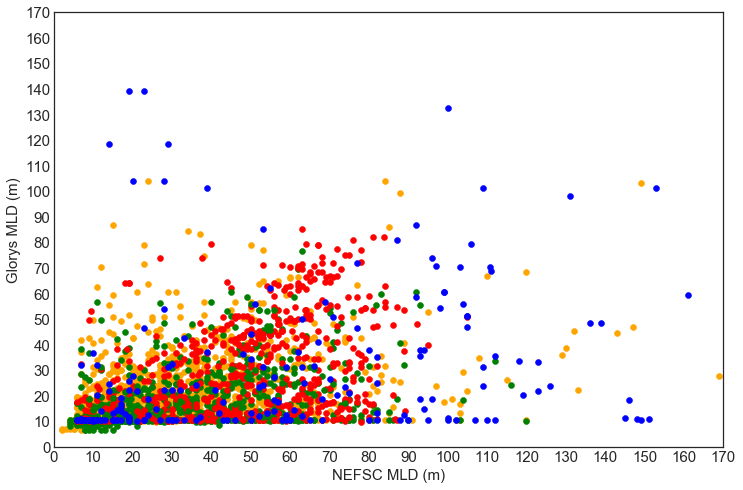

In [770]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,170)
plt.xlim(0,170)
plt.scatter(SouthernMABNEFSC_march, SouthernMABGlorys_march,color='orange',label='Southern MAB')
plt.scatter(NorthernMABNEFSC_march, NorthernMABGlorys_march,color='green',label='Northern MAB')
plt.scatter(GeorgesBankNEFSC_march, GeorgesBankGlorys_march,color='red',label='Georges Bank')
plt.scatter(EGoMNEFSC_march, EGoMGlorys_march,color='green',label='Eastern GoM')
plt.scatter(WGoMNEFSC_march, WGoMGlorys_march,color='blue',label='Western GoM')
# leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170], fontsize = 15) 
plt.show()

# April

In [710]:
GeorgesBankGlorys_april = [29.908142, 22.583698, 23.651846, 17.548145, 27.161476, 17.85333, 19.07407, 16.63259, 14.95407, 16.785181, 15.717033, 21.668144, 33.41777, 15.411848, 20.142218, 10.986664, 11.597034, 14.038515, 13.885922, 16.174812, 17.85333, 12.970367, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 13.122959, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.376293, 12.359997, 12.817775, 10.528886, 10.528886, 10.834071, 11.444442, 11.291849, 13.580737, 35.401474, 16.937775, 11.444442, 13.122959, 10.376293, 15.106663, 14.648885, 51.88147, 39.826656, 34.791103, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 19.226664, 12.207404, 19.226664, 18.768885, 14.191108, 21.362959, 21.057774, 20.752588, 19.837032, 19.837032, 24.872587, 27.466661, 27.466661, 23.194069, 39.674065, 25.330364, 25.025179, 23.041477, 25.63555, 16.327404, 10.528886, 10.528886, 15.411848, 35.554066, 23.041477, 23.651846, 23.957031, 17.090366, 12.665182, 10.986664, 11.1392565, 10.528886, 13.580737, 15.411848, 11.444442, 11.444442, 10.528886, 10.528886, 10.834071, 13.428144, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 10.986664, 10.528886, 10.376293, 14.038515, 35.554066, 17.090366, 11.902219, 10.528886, 10.834071, 11.1392565, 10.6814785, 10.6814785, 10.6814785, 10.834071, 21.362959, 15.411848, 36.622215, 52.49184, 16.937775, 13.73333, 10.528886, 33.570362, 27.466661, 12.817775, 10.834071, 11.1392565, 11.902219, 22.278513, 39.521473, 39.063694, 45.31999, 27.466661, 19.837032, 36.9274, 48.37184, 30.823696, 37.99555, 33.722954, 11.749626, 12.0548115, 11.291849, 11.291849, 28.839994, 12.512589, 10.528886, 10.528886, 10.528886, 11.1392565, 14.95407, 12.512589, 12.665182, 12.359997, 22.431107, 22.736292, 71.413315, 19.989626, 22.736292, 37.53777, 50.355545, 15.411848, 15.717033, 20.447403, 21.210365, 20.294811, 18.768885, 19.837032, 18.4637, 14.496293, 15.564441, 14.801477, 14.038515, 19.837032, 22.736292, 24.719995, 24.109625, 19.531847, 20.294811, 24.109625, 23.194069, 21.51555, 19.837032, 17.85333, 13.73333, 14.496293, 18.158514, 19.07407, 17.395552, 21.668144, 21.057774, 18.616293, 19.531847, 17.548145, 17.090366, 17.24296, 17.24296, 10.986664, 10.834071, 13.275552, 13.275552, 10.6814785, 10.6814785, 13.73333, 13.580737, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.834071, 12.512589, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 14.038515, 10.528886, 17.700737, 10.986664, 10.986664, 11.1392565, 14.038515, 10.528886, 14.038515, 10.528886, 17.700737, 10.528886, 11.749626, 11.444442, 12.665182, 10.528886, 16.022219, 10.528886, 10.528886, 11.749626, 13.73333, 12.665182, 10.834071, 16.022219, 15.869626, 10.834071, 15.869626, 21.51555, 10.834071, 10.528886, 21.51555, 10.528886, 21.51555, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.834071, 10.834071, 10.834071, 10.6814785, 10.528886, 10.528886, 10.528886, 10.834071, 11.444442, 11.291849, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 24.262217, 16.327404, 19.07407, 17.24296, 14.3437, 15.411848, 16.937775, 21.97333, 16.022219, 18.311108, 19.379255, 16.022219, 11.291849, 10.528886, 12.359997, 13.275552, 12.512589, 12.0548115, 12.817775, 12.207404, 12.359997, 12.207404, 11.444442, 11.444442, 14.801477, 12.207404, 19.07407, 33.112587, 30.060734, 20.294811, 13.580737, 13.275552, 19.531847, 16.479998, 19.07407, 19.837032, 22.125921, 18.158514, 20.90518, 11.902219, 12.359997, 18.005922, 17.395552, 21.362959, 17.24296, 24.262217, 26.703697, 24.262217, 23.041477, 24.262217, 55.238506, 27.924438, 28.6874, 26.703697, 26.703697, 26.24592, 18.4637, 12.970367, 19.531847, 12.512589, 23.041477, 20.599997, 23.041477, 18.4637, 50.508137, 17.395552, 50.508137, 36.774807, 44.709618, 23.651846, 44.709618, 44.709618, 30.36592, 55.238506, 34.791103, 55.238506, 52.797024, 55.238506, 19.68444, 39.216286, 19.531847, 28.6874, 28.6874, 25.177773, 24.262217, 19.68444, 57.069614, 33.722954, 18.4637, 26.24592, 26.24592, 12.817775, 29.908142, 13.122959, 36.9274, 29.602957, 12.512589, 12.512589, 20.599997, 20.599997, 14.191108, 19.226664, 18.4637, 16.785181, 16.785181, 14.801477, 14.801477, 64.69924, 51.2711, 19.837032, 23.651846, 30.36592, 30.36592, 30.36592, 33.26518, 34.791103, 34.791103, 68.66665, 68.66665, 52.797024, 52.797024, 25.025179, 19.68444, 19.68444, 15.869626, 15.869626, 24.262217, 24.262217, 57.069614, 57.069614, 23.651846, 23.651846, 23.651846, 37.07999, 37.07999, 20.599997, 12.817775, 12.817775, 12.817775, 13.428144, 13.428144, 12.970367, 12.970367, 10.528886, 10.834071, 24.109625, 24.41481, 21.97333, 22.583698, 32.654808, 11.597034, 88.65627, 28.382215, 26.24592, 23.80444, 24.109625, 17.090366, 10.528886, 10.2237015, 10.528886, 18.158514, 16.63259, 31.58666, 12.817775, 11.597034, 11.902219, 12.665182, 19.68444, 10.2237015, 10.528886, 15.564441, 15.564441, 10.986664, 10.528886, 11.749626, 11.1392565, 11.902219, 11.902219, 58.900726, 44.251842, 45.472584, 37.53777, 10.528886, 76.601456, 32.95999, 11.902219, 12.817775, 17.85333, 28.839994, 16.479998, 21.97333, 17.24296, 24.719995, 15.564441, 11.749626, 21.210365, 17.548145, 10.528886, 10.6814785, 15.717033, 15.106663, 11.749626, 10.528886, 10.376293, 39.063694, 71.87109, 77.66961, 11.291849, 10.528886, 10.376293, 13.73333, 17.85333, 15.564441, 14.801477, 9.918516, 13.885922, 12.207404, 16.479998, 16.479998, 12.207404, 10.376293, 10.376293, 10.528886, 11.444442, 11.444442, 10.834071, 10.834071, 10.376293, 16.785181, 23.346663, 32.044437, 19.837032, 11.597034, 12.817775, 15.564441, 15.717033, 15.717033, 15.717033, 16.022219, 25.788143, 13.73333, 13.428144, 13.428144, 14.496293, 12.359997, 36.011845, 21.057774, 23.499254, 18.616293, 11.291849, 10.2237015, 13.122959, 54.780727, 33.570362, 16.174812, 23.80444, 23.80444, 23.80444, 29.755548, 33.570362, 22.888884, 17.85333, 45.31999, 81.789604, 16.479998, 11.749626, 16.479998, 65.91998, 80.11109, 59.511097, 59.511097, 30.36592, 21.97333, 30.36592, 30.36592, 30.36592, 25.63555, 25.63555, 25.63555, 25.63555, 25.63555, 25.63555, 25.63555, 25.63555, 19.531847, 19.531847, 19.531847, 17.548145, 17.548145, 17.548145, 27.619253, 27.619253, 27.619253, 26.85629, 26.85629, 26.85629, 48.066654, 61.4948, 61.4948, 62.868134, 62.868134, 60.42665, 60.42665, 31.128881, 31.128881, 31.128881, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 11.444442, 10.528886, 11.291849, 10.528886, 10.834071, 10.528886, 26.551105, 10.6814785, 28.07703, 10.528886, 17.85333, 24.109625, 10.528886, 12.817775, 11.444442, 11.444442, 11.291849, 11.291849, 13.275552, 10.986664, 10.528886, 10.834071, 10.834071, 26.551105, 10.528886, 26.85629, 10.6814785, 28.07703, 12.665182, 16.479998, 17.85333, 19.379255, 48.37184, 15.411848, 11.902219, 35.706657, 11.1392565, 10.528886, 10.528886, 15.106663, 13.275552, 10.528886, 10.528886, 10.528886, 10.528886, 18.768885, 12.512589, 10.528886, 10.528886, 10.528886, 10.6814785, 11.444442, 12.665182, 27.619253, 27.619253, 52.797024, 48.37184, 46.54073, 35.706657, 27.619253, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 18.158514, 18.158514, 11.1392565, 10.376293, 15.717033, 14.648885, 14.648885, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 11.291849, 10.986664, 11.291849, 10.376293, 18.768885, 48.829617, 40.284435, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.275552, 10.528886, 11.749626, 10.528886, 11.444442, 10.528886, 13.428144, 10.528886, 14.191108, 10.528886, 10.834071, 10.528886, 10.986664, 12.817775, 10.528886, 13.275552, 12.359997, 13.275552, 10.528886, 11.444442, 12.512589, 10.986664, 11.1392565, 11.444442, 13.275552, 12.665182, 11.444442, 13.428144, 19.989626, 13.275552, 15.411848, 14.191108, 10.834071, 10.834071, 14.648885, 11.1392565, 16.937775, 10.986664, 10.376293, 12.817775, 29.602957, 10.986664, 42.26814, 10.376293, 27.161476, 10.6814785, 11.749626, 10.376293, 11.444442, 21.820736, 12.512589, 12.665182, 11.444442, 11.1392565, 10.6814785, 13.275552, 20.142218, 12.817775, 18.311108, 19.379255, 17.090366, 15.411848, 13.275552, 21.668144, 16.479998, 13.428144, 12.970367, 11.291849, 29.602957, 11.1392565, 41.96295, 28.6874, 27.161476, 23.194069, 21.668144, 21.820736, 18.768885, 12.665182, 18.921478, 35.554066, 37.69036, 23.80444, 23.194069, 27.008883, 27.924438, 19.226664, 11.597034, 10.376293, 10.376293, 21.362959, 12.817775, 22.583698, 27.161476, 20.142218, 11.291849, 11.1392565, 11.291849, 11.902219, 12.970367, 14.191108, 22.583698, 12.817775, 12.359997, 11.444442, 11.902219, 12.207404, 12.359997, 23.651846, 11.597034, 24.262217, 12.970367, 21.51555, 23.041477, 41.19999, 31.891846, 57.3748, 18.4637, 20.447403, 23.80444, 19.531847, 10.376293, 13.275552, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.834071, 11.1392565, 10.986664, 11.749626, 10.528886, 12.359997, 12.665182, 12.207404, 16.174812, 16.174812, 16.174812, 16.174812, 11.291849, 11.291849, 11.291849, 11.291849, 11.291849, 11.291849, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.207404, 10.528886, 10.528886, 10.528886, 14.95407, 15.259255, 13.275552, 22.888884, 16.327404, 13.73333, 18.616293, 34.180733, 21.210365, 51.42369, 36.317028, 47.1511, 37.99555, 25.330364, 15.259255, 21.362959, 17.85333, 19.226664, 18.311108, 18.158514, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.0548115, 10.528886, 10.986664, 10.528886, 19.531847, 10.528886, 12.0548115, 17.700737, 11.1392565, 16.022219, 10.986664, 14.801477, 12.359997, 17.24296, 19.531847, 17.24296, 16.785181, 11.291849, 14.3437, 11.597034, 13.122959, 17.700737, 16.63259, 10.834071, 16.327404, 10.528886, 16.327404, 10.528886, 14.801477, 10.528886, 14.801477, 10.528886, 17.24296, 10.528886, 15.717033, 10.528886, 16.785181, 10.528886, 16.327404, 16.63259, 11.291849, 10.528886, 14.3437, 10.6814785, 16.327404, 10.376293, 13.122959, 11.291849, 30.97629, 10.528886, 11.749626, 10.834071, 30.213327, 10.528886, 10.528886, 10.528886, 10.528886, 23.499254, 10.528886, 19.531847, 10.528886, 10.528886, 10.528886, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.817775, 10.6814785, 12.359997, 10.376293, 30.97629, 9.7659235, 12.817775, 32.8074, 30.213327, 33.26518, 21.210365, 20.142218, 19.226664, 19.531847, 22.431107, 27.619253, 10.6814785, 11.291849, 11.444442, 10.834071, 11.291849, 11.1392565, 10.986664, 14.038515, 17.85333, 21.97333, 25.940735, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 28.992586, 25.330364, 25.330364, 25.330364, 35.096287, 28.839994, 28.992586, 30.97629, 25.940735, 28.839994, 25.63555, 27.008883, 48.677025, 39.36888, 37.842953, 31.891846, 24.109625, 24.567402, 26.24592, 32.19703, 30.060734, 25.788143, 41.047398, 39.826656, 41.505177, 49.134804, 14.496293, 10.376293, 19.226664, 13.73333, 12.970367, 12.665182, 21.51555, 13.122959, 15.106663, 26.398512, 25.025179, 11.749626, 19.531847, 28.839994, 27.314068, 33.570362, 22.278513, 17.700737, 17.548145, 59.66369, 61.799984, 48.066654, 47.30369, 26.551105, 29.908142, 33.112587, 42.42073, 48.21925, 44.862213, 39.97925, 28.839994, 34.333324, 33.41777, 21.668144, 20.447403, 20.447403, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 17.700737, 12.207404, 11.597034, 25.330364, 17.24296, 47.30369, 48.524433, 46.08295, 38.14814, 14.496293, 22.278513, 24.41481, 28.382215, 15.717033, 26.85629, 24.41481, 21.51555, 21.51555, 18.768885, 26.551105, 28.53481, 46.99851, 55.085915, 49.745174, 48.524433, 50.355545, 45.93036, 15.411848, 18.616293, 22.125921, 22.125921, 26.551105, 16.479998, 13.580737, 63.783688, 27.161476, 34.02814, 30.060734, 28.53481, 26.551105, 29.450363, 30.060734, 21.668144, 20.90518, 23.651846, 17.548145, 18.921478, 10.6814785, 18.616293, 12.512589, 10.528886, 11.749626, 44.251842, 27.771845, 27.161476, 23.499254, 25.788143, 14.038515, 13.428144, 10.528886, 10.528886, 10.528886, 15.717033, 29.602957, 24.719995, 22.583698, 11.902219, 14.648885, 17.395552, 12.0548115, 15.564441, 10.528886, 12.817775, 12.207404, 12.207404, 10.528886, 10.528886, 10.986664, 11.291849, 10.528886, 11.291849, 12.512589, 11.902219, 13.580737, 18.005922, 13.580737, 14.648885, 10.2237015, 12.0548115, 11.444442, 18.311108, 18.921478, 18.768885, 20.142218, 19.379255, 37.232586, 23.651846, 23.346663, 11.1392565, 50.050358, 34.63851, 27.771845, 31.58666, 22.736292, 20.599997, 19.07407, 19.07407, 18.005922, 33.41777, 40.437027, 12.512589, 13.73333, 13.428144, 10.528886, 13.275552, 12.665182, 10.986664, 10.528886, 12.665182, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.817775, 12.0548115, 10.376293, 10.6814785, 16.937775, 10.834071, 10.528886, 35.401474, 63.783688, 28.53481, 28.53481, 26.093328, 28.07703, 28.07703, 27.771845, 44.251842, 23.651846, 34.180733, 26.703697, 22.888884, 21.820736, 24.719995, 39.97925, 14.801477, 10.528886, 10.528886, 10.528886, 15.106663, 26.551105, 18.311108, 25.330364, 13.428144, 13.275552, 22.278513, 21.210365, 21.820736, 12.0548115, 13.275552, 19.989626, 16.022219, 31.434067, 35.554066, 22.431107, 15.869626, 22.278513, 17.548145, 21.51555, 17.548145, 14.801477, 36.164436, 20.752588, 20.599997, 18.4637, 24.719995, 33.722954, 39.216286, 32.654808, 13.275552, 13.428144, 11.291849, 10.986664, 11.444442, 28.839994, 26.398512, 23.957031, 31.281475, 10.528886, 10.528886, 10.528886, 10.528886, 24.109625, 20.599997, 12.817775, 16.327404, 14.191108, 12.665182, 11.749626, 10.528886, 12.512589, 10.528886, 22.278513, 14.496293, 10.528886, 10.528886, 14.191108, 11.291849, 10.834071, 11.444442, 19.989626, 10.528886, 10.528886, 10.2237015, 11.444442, 10.528886, 12.359997, 10.528886, 10.528886, 11.1392565, 39.36888, 61.03702, 45.31999, 35.859253, 56.306652, 47.456284, 38.453323, 34.180733, 43.183693, 49.592583, 53.71258, 26.85629, 27.161476, 29.14518, 23.346663, 19.226664, 32.8074, 34.02814, 16.327404, 12.665182, 29.908142, 40.894806, 40.437027, 10.6814785, 32.34962, 71.413315, 81.9422, 30.36592, 57.22221, 43.48888, 13.885922, 11.291849, 13.885922, 20.294811, 11.1392565, 11.902219, 39.826656, 35.096287, 21.820736, 11.902219, 20.752588, 44.709618, 16.785181, 28.229624, 27.924438, 73.54961, 46.388138, 30.823696, 44.251842, 67.140724, 11.1392565, 22.125921, 82.24738, 53.254803, 63.020725, 54.93332, 16.937775, 18.005922, 15.564441, 16.022219, 16.785181, 38.75851, 29.755548, 29.297771, 13.580737, 12.359997, 11.1392565, 10.528886, 10.6814785, 18.158514, 13.275552, 14.801477, 16.785181, 14.648885, 14.3437, 14.191108, 13.428144, 13.122959, 12.970367, 13.428144, 10.528886, 11.291849, 12.665182, 10.528886, 11.291849, 12.0548115, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 30.060734, 25.63555, 23.957031, 23.194069, 23.041477, 13.885922, 14.496293, 13.73333, 12.0548115, 23.499254, 11.1392565, 14.496293, 14.191108, 43.336285, 16.785181, 18.311108, 19.989626, 18.616293, 18.311108, 21.51555, 10.6814785, 14.648885, 16.174812, 16.022219, 16.785181, 17.85333, 20.447403, 32.19703, 17.548145, 16.63259, 19.226664, 10.528886, 10.528886, 10.528886, 14.191108, 9.918516, 10.528886, 11.1392565, 16.022219, 15.717033, 10.528886, 22.278513, 21.210365, 17.24296, 16.022219, 12.665182, 12.359997, 18.158514, 18.005922, 11.1392565, 10.528886, 10.528886, 11.597034, 10.6814785, 10.528886, 11.597034, 10.528886, 10.528886, 11.749626, 11.291849, 10.376293, 11.1392565, 11.291849, 10.376293, 10.528886, 15.564441, 10.834071, 13.428144, 36.46962, 15.869626, 13.275552, 14.648885, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.6814785, 10.834071, 11.597034, 11.444442, 10.986664, 12.817775, 13.122959, 12.207404, 13.428144, 14.191108, 47.76147, 44.09925, 44.09925, 27.771845, 30.060734, 27.466661, 16.327404, 15.717033, 20.599997, 34.02814, 34.48592, 37.07999, 44.404434, 21.210365, 22.125921, 18.005922, 22.125921, 18.921478, 10.6814785, 12.970367, 21.668144, 14.3437, 14.95407, 15.106663, 24.719995, 18.005922, 13.122959, 16.174812, 10.6814785, 10.528886, 10.986664, 11.749626, 12.207404, 12.970367, 11.902219, 20.294811, 13.580737, 11.597034, 10.834071, 10.528886, 10.834071, 11.749626, 29.14518, 32.502216, 22.736292, 22.888884, 29.297771, 14.191108, 10.528886, 15.564441, 16.785181, 10.071109, 12.0548115, 12.0548115, 24.41481, 15.717033, 14.801477, 16.022219, 16.63259, 26.398512, 27.466661, 19.837032, 17.85333, 16.174812, 18.768885, 30.671104, 16.174812, 37.07999, 26.551105, 21.97333, 27.008883, 27.008883, 37.842953, 40.742214, 33.87555, 21.97333, 17.700737, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 13.122959, 10.528886, 11.1392565, 10.528886, 10.528886, 11.444442, 10.528886, 10.376293, 10.528886, 12.512589, 10.528886, 11.291849, 11.1392565, 11.902219, 13.122959, 16.937775, 10.376293, 11.749626, 10.6814785, 17.548145, 12.817775, 10.528886, 10.528886, 10.834071, 11.1392565, 14.801477, 15.106663, 19.837032, 25.788143, 24.262217, 31.281475, 44.557026, 40.284435, 14.648885, 13.275552, 12.512589, 11.902219, 11.1392565, 10.6814785, 11.597034, 14.648885, 15.411848, 15.106663, 13.885922, 10.528886, 14.191108, 10.071109, 14.038515, 10.528886, 10.528886, 10.528886, 10.986664, 11.291849, 12.207404, 10.986664, 10.6814785, 12.970367, 10.528886, 10.834071, 12.665182, 16.479998, 11.902219, 12.817775, 10.6814785, 11.444442, 11.444442, 13.580737, 11.1392565, 10.834071, 10.834071, 10.986664, 12.0548115, 11.444442, 10.528886, 10.528886, 12.817775, 12.0548115, 10.986664, 13.885922, 28.382215, 11.749626, 49.439987, 49.439987, 28.229624, 52.03406, 30.97629, 29.14518, 29.297771, 30.671104, 30.060734, 36.011845, 40.894806, 40.894806, 38.30073, 26.093328, 14.95407, 15.411848, 19.989626, 19.989626, 18.4637, 13.580737, 17.700737, 14.648885, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 17.24296, 12.512589, 25.788143, 19.379255, 12.207404, 16.479998, 16.022219, 13.885922, 14.95407, 15.717033, 20.142218, 30.213327, 34.48592, 17.24296, 14.3437, 18.005922, 15.564441, 15.564441, 19.68444, 19.989626, 15.869626, 13.580737, 12.207404, 12.359997, 12.665182, 12.512589, 13.885922, 10.6814785, 10.528886, 10.528886, 10.834071, 10.834071, 10.834071, 11.291849, 14.191108, 13.73333, 11.444442, 10.528886, 10.6814785, 10.528886, 10.6814785, 13.885922, 10.6814785, 10.376293, 10.6814785, 10.528886, 16.63259, 16.327404, 10.6814785, 20.294811, 11.444442, 11.597034, 10.986664, 12.970367, 28.992586, 12.207404, 11.444442, 13.73333, 11.1392565, 11.291849, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 26.551105, 11.291849, 14.95407, 11.444442, 10.986664, 11.1392565, 13.122959, 14.191108, 16.327404, 11.1392565, 10.6814785, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.869626, 15.717033, 15.717033, 17.700737, 18.158514, 20.142218, 13.428144, 12.665182, 13.885922, 12.359997, 13.580737, 14.191108, 12.512589, 17.548145, 18.4637, 10.528886, 11.749626, 10.6814785, 15.564441, 11.597034, 11.444442, 10.528886, 23.041477, 16.785181, 12.970367, 40.437027, 19.68444, 13.275552, 29.908142, 19.68444, 14.496293, 10.376293, 21.057774, 19.531847, 23.957031, 46.54073, 24.872587, 26.093328, 12.207404, 16.327404, 16.327404, 18.158514, 11.597034, 10.376293, 14.496293, 14.496293, 12.817775, 13.275552, 15.564441, 17.548145, 29.755548, 12.970367]
GeorgesBankNEFSC_april = [26.0, 34.0, 30.0, 37.0, 29.0, 38.0, 37.0, 42.0, 65.0, 57.0, 80.0, 87.0, 54.0, 12.0, 34.0, 64.0, 32.0, 32.0, 22.0, 9.0, 19.0, 62.0, 52.0, 46.0, 48.0, 57.0, 45.0, 8.0, 27.0, 58.0, 66.0, 51.0, 55.0, 63.0, 85.0, 22.0, 17.0, 10.0, 53.0, 59.0, 55.0, 65.0, 75.0, 21.0, 14.0, 37.0, 28.0, 54.0, 78.0, 46.0, 49.0, 46.0, 31.0, 23.0, 70.0, 12.0, 11.0, 10.0, 8.0, 18.0, 13.0, 17.0, 49.0, 56.0, 16.0, 17.0, 31.0, 20.0, 19.0, 14.0, 18.0, 26.0, 18.0, 55.0, 16.0, 68.0, 69.0, 63.0, 59.0, 53.0, 42.0, 55.0, 47.0, 60.0, 56.0, 12.0, 21.0, 74.0, 6.0, 59.0, 13.0, 155.0, 70.0, 36.0, 30.0, 33.0, 34.0, 44.0, 58.0, 63.0, 61.0, 40.0, 7.0, 12.0, 77.0, 6.0, 7.0, 6.0, 7.0, 15.0, 20.0, 60.0, 47.0, 15.0, 6.0, 21.0, 59.0, 6.0, 23.0, 6.0, 6.0, 48.0, 36.0, 41.0, 55.0, 15.0, 15.0, 44.0, 34.0, 25.0, 28.0, 61.0, 47.0, 64.0, 40.0, 38.0, 37.0, 35.0, 22.0, 16.0, 54.0, 15.0, 17.0, 63.0, 59.0, 30.0, 28.0, 67.0, 48.0, 76.0, 73.0, 73.0, 63.0, 67.0, 68.0, 55.0, 48.0, 62.0, 11.0, 16.0, 87.0, 9.0, 9.0, 62.0, 58.0, 51.0, 36.0, 63.0, 62.0, 14.0, 8.0, 18.0, 12.0, 18.0, 59.0, 48.0, 35.0, 76.0, 38.0, 54.0, 82.0, 71.0, 27.0, 27.0, 56.0, 48.0, 62.0, 81.0, 41.0, 65.0, 57.0, 29.0, 46.0, 43.0, 54.0, 61.0, 70.0, 80.0, 73.0, 60.0, 56.0, 81.0, 82.0, 72.0, 62.0, 53.0, 42.0, 52.0, 56.0, 51.0, 71.0, 46.0, 89.0, 15.0, 8.0, 87.0, 6.0, 6.0, 6.0, 6.0, 44.0, 79.0, 77.0, 28.0, 25.0, 52.0, 53.0, 42.0, 44.0, 19.0, 18.0, 70.0, 71.0, 12.0, 83.0, 18.0, 20.0, 49.0, 19.0, 42.0, 50.0, 34.0, 47.0, 47.0, 42.0, 8.0, 39.0, 11.0, 48.0, 47.0, 9.0, 8.0, 9.0, 12.0, 54.0, 9.0, 67.0, 24.0, 7.0, 23.0, 8.0, 15.0, 54.0, 66.0, 22.0, 9.0, 23.0, 64.0, 14.0, 21.0, 47.0, 17.0, 23.0, 48.0, 42.0, 23.0, 8.0, 22.0, 42.0, 53.0, 43.0, 46.0, 8.0, 58.0, 54.0, 50.0, 45.0, 53.0, 60.0, 62.0, 22.0, 27.0, 57.0, 40.0, 43.0, 52.0, 61.0, 14.0, 23.0, 13.0, 39.0, 31.0, 41.0, 43.0, 65.0, 26.0, 18.0, 74.0, 6.0, 79.0, 14.0, 35.0, 70.0, 78.0, 52.0, 44.0, 71.0, 35.0, 12.0, 86.0, 59.0, 38.0, 34.0, 18.0, 26.0, 14.0, 59.0, 50.0, 42.0, 46.0, 43.0, 45.0, 51.0, 42.0, 62.0, 79.0, 43.0, 29.0, 44.0, 46.0, 58.0, 69.0, 79.0, 68.0, 72.0, 54.0, 55.0, 64.0, 87.0, 38.0, 68.0, 60.0, 59.0, 50.0, 80.0, 65.0, 80.0, 84.0, 77.0, 56.0, 64.0, 50.0, 62.0, 63.0, 49.0, 61.0, 73.0, 58.0, 49.0, 83.0, 46.0, 84.0, 39.0, 56.0, 53.0, 49.0, 65.0, 51.0, 47.0, 50.0, 50.0, 41.0, 56.0, 80.0, 54.0, 56.0, 55.0, 69.0, 54.0, 34.0, 47.0, 48.0, 45.0, 20.0, 43.0, 65.0, 54.0, 34.0, 47.0, 49.0, 50.0, 66.0, 64.0, 70.0, 72.0, 51.0, 51.0, 47.0, 46.0, 36.0, 37.0, 37.0, 32.0, 41.0, 54.0, 53.0, 8.0, 22.0, 48.0, 49.0, 20.0, 24.0, 38.0, 84.0, 80.0, 6.0, 66.0, 63.0, 57.0, 55.0, 71.0, 68.0, 68.0, 76.0, 78.0, 15.0, 18.0, 58.0, 62.0, 61.0, 61.0, 62.0, 50.0, 57.0, 50.0, 50.0, 48.0, 48.0, 67.0, 65.0, 66.0, 66.0, 76.0, 11.0, 34.0, 42.0, 53.0, 9.0, 44.0, 69.0, 85.0, 38.0, 50.0, 44.0, 36.0, 73.0, 14.0, 94.0, 91.0, 10.0, 66.0, 62.0, 51.0, 43.0, 54.0, 62.0, 7.0, 12.0, 19.0, 17.0, 7.0, 17.0, 60.0, 13.0, 11.0, 21.0, 75.0, 45.0, 40.0, 38.0, 32.0, 85.0, 78.0, 40.0, 75.0, 90.0, 79.0, 65.0, 72.0, 80.0, 11.0, 48.0, 35.0, 12.0, 8.0, 78.0, 70.0, 39.0, 38.0, 59.0, 61.0, 69.0, 62.0, 61.0, 68.0, 80.0, 43.0, 55.0, 61.0, 62.0, 66.0, 68.0, 55.0, 9.0, 27.0, 51.0, 85.0, 75.0, 69.0, 58.0, 57.0, 50.0, 35.0, 38.0, 54.0, 54.0, 60.0, 70.0, 14.0, 88.0, 74.0, 57.0, 63.0, 77.0, 77.0, 75.0, 77.0, 68.0, 62.0, 53.0, 48.0, 46.0, 44.0, 49.0, 61.0, 66.0, 72.0, 21.0, 27.0, 19.0, 68.0, 64.0, 60.0, 58.0, 51.0, 47.0, 51.0, 38.0, 40.0, 43.0, 60.0, 68.0, 76.0, 75.0, 57.0, 49.0, 57.0, 82.0, 73.0, 59.0, 71.0, 82.0, 72.0, 69.0, 70.0, 74.0, 72.0, 72.0, 63.0, 74.0, 77.0, 79.0, 78.0, 70.0, 71.0, 73.0, 68.0, 63.0, 67.0, 47.0, 49.0, 47.0, 46.0, 76.0, 80.0, 61.0, 62.0, 64.0, 72.0, 72.0, 73.0, 69.0, 43.0, 84.0, 84.0, 76.0, 77.0, 63.2, 72.0, 12.4, 62.0, 42.8, 59.0, 10.8, 13.0, 13.5, 46.0, 48.0, 8.0, 54.0, 22.1, 7.0, 55.1, 33.0, 30.5, 74.0, 37.2, 13.0, 55.4, 66.4, 6.0, 10.8, 14.0, 16.0, 53.5, 9.0, 25.9, 12.0, 56.5, 52.0, 37.0, 45.0, 10.6, 35.0, 23.9, 37.0, 16.5, 41.0, 53.0, 59.0, 59.5, 28.0, 10.0, 51.6, 70.0, 15.0, 48.0, 81.0, 34.0, 67.0, 55.0, 64.0, 67.0, 71.0, 77.0, 6.0, 10.0, 7.0, 16.0, 8.0, 12.0, 31.0, 39.0, 69.0, 59.0, 61.0, 57.0, 18.0, 27.0, 42.0, 33.0, 38.0, 37.0, 34.0, 54.0, 25.0, 50.0, 39.0, 65.0, 18.0, 103.0, 30.0, 25.0, 38.0, 25.0, 76.0, 67.0, 66.0, 35.0, 63.0, 61.0, 57.0, 12.0, 36.0, 27.0, 35.0, 77.0, 69.0, 52.0, 41.0, 74.0, 75.0, 63.0, 69.0, 12.0, 59.0, 12.5, 6.0, 41.5, 8.0, 57.8, 10.0, 52.0, 16.0, 50.0, 26.9, 50.0, 25.5, 52.0, 50.6, 57.0, 45.2, 65.0, 35.0, 57.0, 51.5, 85.0, 20.1, 71.3, 8.0, 32.0, 9.5, 9.0, 10.0, 18.0, 59.1, 57.0, 70.7, 49.0, 83.9, 36.0, 17.4, 44.0, 80.8, 34.0, 12.4, 35.0, 41.0, 51.0, 15.5, 20.0, 68.0, 21.0, 9.0, 71.0, 50.2, 40.0, 49.1, 6.0, 45.7, 13.0, 16.0, 9.0, 65.0, 47.7, 57.0, 66.3, 64.0, 70.0, 24.0, 84.0, 87.0, 16.0, 90.0, 80.0, 90.0, 13.0, 91.0, 12.0, 75.0, 63.0, 11.0, 15.0, 49.0, 49.0, 48.0, 30.0, 45.0, 26.0, 39.0, 45.0, 65.0, 65.0, 51.0, 38.0, 46.0, 6.0, 50.0, 6.0, 6.0, 7.0, 84.0, 21.0, 14.0, 36.0, 34.0, 26.0, 56.0, 50.0, 43.0, 40.0, 47.0, 36.0, 34.0, 35.0, 30.0, 37.0, 34.0, 53.0, 63.0, 65.0, 38.0, 39.0, 18.0, 59.0, 65.0, 57.0, 66.0, 39.0, 66.0, 74.0, 42.0, 75.0, 77.0, 73.0, 8.0, 8.0, 10.0, 43.0, 55.0, 56.0, 65.0, 14.0, 21.0, 56.0, 29.0, 21.0, 71.0, 63.0, 57.0, 50.0, 37.0, 46.0, 50.0, 57.0, 62.0, 70.0, 81.0, 32.0, 8.0, 11.0, 18.0, 58.0, 57.0, 49.0, 48.0, 59.0, 49.0, 54.0, 55.0, 62.0, 60.0, 16.0, 11.0, 10.0, 12.0, 16.0, 57.0, 8.0, 51.0, 54.0, 54.0, 55.0, 84.0, 47.0, 24.0, 17.0, 37.0, 75.0, 20.0, 81.0, 15.0, 9.0, 47.0, 13.0, 53.0, 45.0, 79.0, 43.0, 34.0, 36.0, 30.0, 38.0, 40.0, 45.0, 54.0, 76.0, 71.0, 74.0, 68.0, 61.0, 60.0, 95.0, 30.0, 89.0, 92.0, 48.0, 25.0, 61.0, 9.0, 24.0, 49.0, 48.0, 17.0, 54.0, 78.0, 56.0, 50.0, 14.0, 44.0, 72.0, 36.0, 30.0, 53.0, 66.0, 34.0, 30.0, 15.0, 79.0, 24.0, 72.0, 74.0, 59.0, 60.0, 51.0, 64.0, 38.0, 12.0, 44.0, 24.0, 35.0, 8.0, 35.0, 27.0, 40.0, 52.0, 61.0, 82.0, 64.0, 67.0, 69.0, 9.0, 31.0, 28.0, 55.0, 13.0, 52.0, 11.0, 47.0, 10.0, 12.0, 65.0, 56.0, 49.0, 70.0, 66.0, 69.0, 9.0, 11.0, 84.0, 31.0, 16.0, 9.0, 11.0, 14.0, 6.0, 6.0, 24.0, 18.0, 63.0, 62.0, 6.0, 48.0, 50.0, 45.0, 29.0, 44.0, 29.0, 39.0, 49.0, 67.0, 63.0, 45.0, 39.0, 28.0, 33.0, 55.0, 79.0, 6.0, 7.0, 8.0, 9.0, 8.0, 27.0, 71.0, 55.0, 46.0, 45.0, 39.0, 52.0, 58.0, 62.0, 67.0, 77.0, 57.0, 74.0, 58.0, 43.0, 69.0, 75.0, 74.0, 81.0, 75.0, 60.0, 58.0, 32.0, 35.0, 36.0, 23.0, 50.0, 24.0, 19.0, 49.0, 44.0, 44.0, 55.0, 71.0, 56.0, 78.0, 37.0, 32.0, 29.0, 67.0, 39.0, 49.0, 41.0, 66.0, 18.0, 31.0, 46.0, 65.0, 81.0, 32.0, 31.0, 19.0, 59.0, 58.0, 68.0, 79.0, 43.0, 50.0, 40.0, 60.0, 46.0, 65.0, 32.0, 69.0, 79.0, 83.0, 12.0, 32.0, 16.0, 60.0, 62.0, 66.0, 54.0, 45.0, 47.0, 45.0, 10.0, 23.0, 32.0, 32.0, 46.0, 53.0, 48.0, 64.0, 44.0, 35.0, 52.0, 19.0, 10.0, 44.0, 19.0, 26.0, 68.0, 44.0, 41.0, 61.0, 60.0, 43.0, 51.0, 44.0, 54.0, 77.0, 66.0, 56.0, 15.0, 38.0, 24.0, 25.0, 32.0, 20.0, 32.0, 63.0, 65.0, 42.0, 35.0, 39.0, 30.0, 32.0, 36.0, 62.0, 55.0, 60.0, 66.0, 60.0, 8.0, 76.0, 28.0, 16.0, 10.0, 50.0, 31.0, 31.0, 31.0, 34.0, 37.0, 39.0, 9.0, 13.0, 24.0, 44.0, 31.0, 38.0, 42.0, 55.0, 50.0, 59.0, 32.0, 44.0, 25.0, 25.0, 39.0, 30.0, 64.0, 69.0, 64.0, 60.0, 36.0, 42.0, 35.0, 40.0, 21.0, 37.0, 49.0, 56.0, 68.0, 66.0, 35.0, 21.0, 20.0, 35.0, 82.0, 60.0, 55.0, 74.0, 9.0, 9.0, 43.0, 29.0, 34.0, 35.0, 51.0, 58.0, 73.0, 68.0, 57.0, 34.0, 53.0, 74.0, 58.0, 57.0, 56.0, 61.0, 21.0, 20.0, 36.0, 39.0, 31.0, 45.0, 58.0, 41.0, 36.0, 24.0, 66.0, 39.0, 35.0, 46.0, 7.0, 46.0, 33.0, 8.0, 69.0, 41.0, 16.0, 19.0, 13.0, 27.0, 38.0, 7.0, 64.0, 58.0, 54.0, 55.0, 49.0, 55.0, 51.0, 42.0, 43.0, 27.0, 24.0, 18.0, 31.0, 40.0, 43.0, 54.0, 26.0, 27.0, 21.0, 64.0, 57.0, 26.0, 29.0, 54.0, 51.0, 26.0, 64.0, 9.0, 7.0, 13.0, 27.0, 15.0, 39.0, 41.0, 25.0, 43.0, 27.0, 29.0, 51.0, 57.0, 45.0, 62.0, 58.0, 45.0, 30.0, 28.0, 45.0, 34.0, 35.0, 53.0, 38.0, 43.0, 35.0, 39.0, 59.0, 59.0, 71.0, 42.0, 53.0, 19.0, 12.0, 9.0, 32.0, 40.0, 60.0, 25.0, 55.0, 18.0, 7.0, 68.0, 6.0, 6.0, 6.0, 31.0, 9.0, 64.0, 47.0, 54.0, 63.0, 69.0, 14.0, 16.0, 41.0, 21.0, 26.0, 42.0, 22.0, 21.0, 28.0, 35.0, 32.0, 53.0, 45.0, 39.0, 74.0, 61.0, 44.0, 51.0, 72.0, 87.0, 77.0, 43.0, 13.0, 39.0, 18.0, 33.0, 32.0, 38.0, 8.0, 17.0, 34.0, 54.0, 52.0, 25.0, 33.0, 69.0, 13.0, 69.0, 66.0, 67.0, 33.0, 27.0, 7.0, 9.0, 58.0, 19.0, 45.0, 43.0, 33.0, 36.0, 48.0, 57.0, 73.0, 26.0, 65.0, 33.0, 51.0, 35.0, 47.0, 67.0, 47.0, 19.0, 49.0, 56.0, 65.0, 79.0, 72.0, 65.0, 26.0, 41.0, 10.0, 52.0, 42.0, 56.0, 63.0, 58.0, 70.0, 66.0, 78.0, 65.0, 83.0, 63.0, 62.0, 52.0, 59.0, 50.0, 59.0, 53.0, 50.0, 47.0, 15.0, 14.0, 51.0, 64.0, 16.0, 57.0, 50.0, 49.0, 53.0, 60.0, 20.0, 22.0, 65.0, 31.0, 33.0, 37.0, 33.0, 32.0, 43.0, 67.0, 72.0, 13.0, 15.0, 22.0, 73.0, 49.0, 25.0, 19.0, 78.0, 78.0, 43.0, 80.0, 20.0, 80.0, 33.0, 62.0, 61.0, 65.0, 44.0, 36.0, 45.0, 59.0, 6.0, 8.0, 26.0, 12.0, 7.0, 17.0, 19.0, 14.0, 8.0, 33.0, 13.0, 63.0, 65.0, 62.0, 50.0, 56.0, 58.0, 39.0, 22.0, 23.0, 43.0, 59.0, 75.0, 8.0, 33.0, 72.0, 10.0, 13.0, 6.0, 13.0, 69.0, 14.0, 8.0, 6.0, 14.0, 16.0, 80.0, 74.0, 66.0, 65.0, 78.0, 14.0, 6.0, 12.0, 17.0, 11.0, 67.0, 70.0, 15.0, 14.0, 16.0, 7.0, 41.0, 38.0, 35.0, 48.0, 11.0, 65.0, 53.0, 54.0, 48.0, 26.0, 50.0, 55.0, 28.0, 30.0, 47.0, 73.0, 44.0, 45.0, 51.0, 45.0, 64.0, 72.0, 45.0, 36.0, 50.0, 21.0, 14.0, 15.0, 7.0, 6.0, 32.0, 8.0, 28.0, 82.0, 9.0, 14.0, 36.0, 70.0, 71.0, 41.0, 59.0, 11.0, 57.0, 58.0, 45.0, 38.0, 46.0, 45.0, 52.0, 54.0, 21.0, 38.0, 17.0, 72.0, 83.0, 86.0, 65.0, 36.0, 7.0, 20.0, 54.0, 15.0, 84.0, 81.0, 21.0, 37.0, 13.0, 29.0, 75.0, 55.0, 45.0, 25.0, 68.0, 13.0, 44.0, 66.0, 46.0, 60.0, 64.0, 43.0, 31.0, 40.0, 54.0, 60.0, 33.0, 45.0, 34.0, 39.0, 42.0, 42.0, 49.0, 72.0, 52.0, 59.0, 51.0, 58.0, 19.0, 23.0, 27.0, 14.0, 82.0, 10.0, 12.0, 12.0, 6.0, 8.0, 9.0, 47.0, 76.0, 38.0, 6.0, 7.0, 59.0, 69.0, 58.0, 62.0, 60.0, 20.0, 45.0, 61.0, 47.0, 63.0, 59.0, 63.0, 83.0, 49.0, 52.0, 48.0, 49.0, 64.0, 61.0, 58.0, 58.0, 91.0, 88.0, 62.0, 24.0, 7.0, 54.0, 87.0, 23.0, 65.0, 52.0, 48.0, 52.0, 54.0, 55.0, 37.0, 26.0, 72.0, 37.0, 16.0, 32.0, 8.0, 20.0, 8.0, 18.0, 13.0, 75.0, 58.0, 59.0, 12.0, 86.0, 8.0, 10.0, 14.0, 13.0, 54.0, 31.0, 32.0, 82.0, 13.0, 62.0, 62.0, 63.0, 59.0, 31.0, 31.0, 39.0, 45.0, 41.0, 54.0, 49.0, 49.0, 44.0, 42.0, 28.0, 15.0, 8.0, 17.0, 36.0, 7.0, 15.0, 6.0, 68.0, 8.0, 8.0, 20.0, 11.0, 37.0, 82.0, 68.0, 38.0, 53.0, 21.0, 14.0, 112.0, 33.0, 31.0, 65.0, 49.0, 52.0, 80.0, 36.0, 67.0, 48.0, 39.0, 57.0, 38.0, 34.0, 31.0, 44.0, 48.0, 41.0, 39.0, 12.0, 90.0, 18.0, 11.0, 13.0, 16.0, 17.0, 21.0, 14.0, 15.0, 12.0, 6.0, 9.0, 7.0, 11.0, 23.0, 35.0, 19.0, 15.0, 48.0, 17.0, 87.0, 16.0, 48.0, 15.0, 21.0, 6.0, 70.0, 72.0, 62.0, 61.0, 50.0, 9.0, 10.0, 11.0, 9.0, 9.0, 6.0, 10.0, 8.0, 37.0, 6.0, 12.0, 43.0, 36.0, 16.0, 18.0, 18.0, 15.0, 56.0, 56.0, 19.0, 18.0, 54.0, 22.0, 35.0, 41.0, 17.0, 29.0, 36.0, 25.0, 11.0, 43.0, 12.0, 15.0, 33.0, 72.0, 68.0, 16.0, 46.0, 45.0, 39.0, 52.0, 58.0, 62.0, 70.0, 20.0, 90.0, 37.0, 20.0, 24.0, 35.0, 40.0, 73.0, 11.0, 52.0, 54.0, 57.0, 55.0, 32.0, 23.0, 33.0, 71.0, 23.0, 21.0, 34.0, 39.0, 45.0, 41.0, 16.0, 9.0, 11.0, 26.0, 14.0, 10.0, 6.0, 9.0, 10.0, 103.0, 15.0, 8.0, 10.0, 63.0]

In [711]:
SouthernMABGlorys_april = [11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 13.885922, 11.291849, 14.801477, 14.801477, 10.528886, 25.177773, 26.703697, 16.785181, 13.73333, 13.275552, 14.496293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.902219, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 11.291849, 10.528886, 10.528886, 10.528886, 18.158514, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 12.0548115, 10.528886, 10.528886, 10.528886, 10.376293, 11.597034, 10.376293, 11.597034, 12.970367, 12.665182, 14.648885, 17.395552, 11.902219, 12.817775, 14.801477, 17.85333, 14.801477, 18.158514, 12.512589, 13.73333, 14.191108, 17.24296, 18.616293, 12.0548115, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 17.24296, 33.87555, 19.68444, 36.011845, 32.8074, 32.95999, 31.891846, 29.450363, 31.128881, 16.785181, 21.668144, 25.482958, 24.41481, 22.278513, 22.125921, 17.700737, 19.226664, 16.785181, 16.327404, 16.63259, 22.431107, 18.616293, 18.158514, 17.85333, 15.411848, 20.599997, 23.499254, 17.700737, 20.447403, 14.496293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 10.528886, 10.528886, 10.528886, 12.359997, 11.1392565, 10.528886, 13.73333, 13.73333, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 11.597034, 12.359997, 12.359997, 12.359997, 12.512589, 12.207404, 18.768885, 24.109625, 18.311108, 16.63259, 12.0548115, 10.834071, 10.376293, 11.291849, 11.1392565, 12.512589, 14.191108, 10.528886, 11.1392565, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.376293, 11.749626, 14.038515, 17.700737, 18.005922, 17.090366]
SouthernMABNEFSC_april = [55.0, 42.0, 50.0, 44.0, 32.0, 33.0, 40.0, 42.0, 54.0, 11.0, 11.0, 11.0, 68.0, 6.0, 22.0, 15.0, 80.0, 86.0, 13.0, 6.0, 6.0, 9.0, 23.0, 14.0, 10.0, 7.0, 13.0, 23.0, 18.0, 12.0, 12.0, 7.0, 8.0, 10.0, 10.0, 12.0, 10.0, 12.0, 11.0, 12.0, 9.0, 10.0, 20.0, 19.0, 17.0, 19.0, 22.0, 25.0, 26.0, 18.0, 15.0, 21.0, 23.0, 20.0, 41.0, 24.0, 21.0, 18.0, 27.0, 15.0, 28.0, 29.0, 33.0, 35.0, 24.0, 16.0, 22.0, 31.0, 17.0, 22.0, 24.0, 22.0, 17.0, 24.0, 6.0, 9.0, 9.0, 8.0, 21.0, 16.0, 24.0, 36.0, 61.0, 57.0, 25.0, 22.0, 42.0, 54.0, 36.0, 24.0, 27.0, 30.0, 157.0, 16.0, 68.0, 15.0, 27.0, 95.0, 71.0, 27.0, 27.0, 24.0, 22.0, 25.0, 27.0, 25.0, 27.0, 23.0, 18.0, 18.0, 20.0, 16.0, 14.0, 20.0, 18.0, 25.0, 23.0, 19.0, 24.0, 29.0, 57.0, 70.0, 32.0, 6.0, 6.0, 25.0, 6.0, 8.0, 8.0, 6.0, 6.0, 46.0, 27.0, 16.0, 103.0, 135.0, 59.0, 13.0, 24.0, 16.0, 30.0, 32.0, 31.0, 58.0, 43.0, 62.0, 12.0, 19.0, 94.0, 82.0, 24.0, 117.0, 41.0, 61.0, 15.0, 38.0, 24.0, 44.0, 14.0, 53.0, 51.0, 38.0, 33.0, 35.0, 54.0, 65.0, 19.0, 45.0, 47.0, 47.0, 61.0, 62.0, 42.0, 50.0]

In [712]:
NorthernMABGlorys_april = [12.817775, 12.0548115, 10.528886, 10.528886, 10.528886, 10.528886, 29.297771, 12.0548115, 11.444442, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.665182, 21.362959, 19.07407, 21.97333, 18.311108, 35.401474, 26.398512, 19.68444, 26.093328, 29.297771, 29.450363, 10.528886, 13.885922, 13.275552, 16.63259, 11.444442, 10.376293, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 9.7659235, 12.0548115, 19.07407, 21.668144, 13.428144, 10.528886, 21.668144, 22.278513, 17.548145, 14.191108, 17.395552, 17.395552, 17.395552, 23.041477, 19.531847, 20.599997, 32.8074, 27.161476, 22.583698, 30.518513, 33.87555, 24.262217, 21.210365, 23.041477, 17.700737, 30.36592, 34.180733, 10.528886, 10.528886, 10.528886, 10.376293, 22.431107, 16.785181, 17.24296, 16.937775, 11.597034, 17.24296, 10.528886, 10.528886, 19.07407, 23.041477, 20.142218, 17.700737, 18.616293, 12.817775, 20.90518, 19.226664, 16.937775, 16.63259, 11.291849, 10.834071, 10.6814785, 29.14518, 13.580737, 30.823696, 17.24296, 16.022219, 15.106663, 15.411848, 29.297771, 18.921478, 12.970367, 16.63259, 10.528886, 13.580737, 13.428144, 12.0548115, 14.496293, 10.528886, 12.359997, 10.528886, 28.992586, 36.9274, 21.51555, 11.902219, 10.834071, 10.376293, 10.376293, 10.376293, 19.226664, 17.090366, 13.275552, 21.362959, 10.528886, 10.528886, 10.528886, 10.528886, 30.060734, 19.226664, 15.717033, 10.6814785, 14.496293, 10.528886, 10.528886, 10.528886, 18.4637, 16.785181, 17.85333, 15.259255, 10.986664, 16.937775, 20.142218, 18.311108, 11.749626, 11.1392565, 12.970367, 10.528886, 10.528886, 13.73333, 12.817775, 10.528886, 10.6814785, 10.376293, 10.834071, 10.376293, 10.986664, 13.73333, 15.411848, 15.411848, 18.158514, 19.07407, 14.191108, 14.191108, 13.73333, 13.73333, 13.428144, 11.597034, 19.837032, 18.768885, 30.671104, 36.46962, 12.359997, 12.359997, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 12.0548115, 10.528886, 10.528886, 10.2237015, 18.4637, 10.2237015, 10.376293, 10.376293, 10.376293, 12.970367, 10.986664, 10.834071, 10.986664, 11.749626, 12.207404, 12.359997, 10.528886, 17.548145, 18.005922, 14.496293, 11.291849, 10.528886, 16.022219, 13.275552, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 11.1392565, 14.95407, 16.022219, 11.444442, 10.6814785, 12.512589, 10.6814785, 10.528886, 13.428144, 10.376293, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 14.801477, 14.496293, 13.73333, 13.428144, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 11.597034, 12.970367, 10.528886, 12.817775, 17.548145, 11.597034, 10.528886, 25.025179, 10.6814785, 16.022219, 16.937775, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 16.327404, 14.496293, 10.376293, 11.597034, 13.122959, 13.428144, 18.616293, 16.785181, 17.24296, 10.528886, 12.0548115, 12.665182, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 13.122959, 16.479998, 17.395552, 14.3437, 14.3437, 12.359997, 11.902219, 11.902219, 12.817775, 10.528886, 10.834071, 16.785181, 16.785181, 17.395552, 17.395552, 37.99555, 37.99555, 37.99555, 37.99555, 37.99555, 37.99555, 37.99555, 37.99555, 37.99555, 37.99555, 37.99555, 18.616293, 18.616293, 19.531847, 19.531847, 19.531847, 17.24296, 17.24296, 17.090366, 10.528886, 15.717033, 18.158514, 12.665182, 10.834071, 15.869626, 17.548145, 24.41481, 25.330364, 24.872587, 18.768885, 16.785181, 20.294811, 21.057774, 16.937775, 15.717033, 17.24296, 10.528886, 10.528886]
NorthernMABNEFSC_april = [20.0, 19.0, 23.0, 19.0, 20.0, 33.0, 33.0, 31.0, 19.0, 43.0, 41.0, 46.0, 50.0, 7.0, 8.0, 9.0, 6.0, 29.0, 15.0, 11.0, 21.0, 26.0, 40.0, 43.0, 47.0, 52.0, 47.0, 58.0, 36.0, 35.0, 12.0, 14.0, 21.0, 19.0, 12.0, 15.0, 35.0, 23.0, 14.0, 22.0, 18.0, 14.0, 42.0, 59.0, 51.0, 8.0, 20.0, 14.0, 37.0, 41.0, 23.0, 46.0, 68.0, 55.0, 25.0, 56.0, 46.0, 36.0, 31.0, 32.0, 41.0, 69.0, 80.0, 73.0, 78.0, 72.0, 32.0, 32.0, 12.0, 21.0, 17.0, 15.0, 21.0, 18.0, 11.0, 29.0, 26.0, 33.0, 19.0, 19.0, 30.0, 26.0, 17.0, 19.0, 33.0, 36.0, 15.0, 35.0, 40.0, 55.0, 37.0, 37.0, 24.0, 26.0, 39.0, 36.0, 48.0, 66.0, 78.0, 57.0, 36.0, 17.0, 60.0, 60.0, 27.0, 18.0, 35.0, 20.0, 11.0, 29.0, 35.0, 25.0, 28.0, 36.0, 34.0, 20.0, 30.0, 5.0, 21.0, 25.0, 57.0, 32.0, 27.0, 21.0, 52.0, 65.0, 8.0, 73.0, 33.0, 22.0, 41.0, 28.0, 30.0, 59.0, 30.0, 6.0, 76.0, 42.0, 43.0, 52.0, 51.0, 10.0, 7.0, 13.0, 8.0, 27.0, 46.0, 69.0, 71.0, 32.0, 25.0, 8.0, 30.0, 11.0, 23.0, 44.0, 32.0, 25.0, 18.0, 17.0, 31.0, 43.0, 76.0, 39.0, 64.0, 43.0, 66.0, 37.0, 27.0, 38.0, 66.0, 37.0, 29.0, 35.0, 26.0, 11.0, 9.0, 13.0, 12.0, 7.0, 9.0, 51.0, 25.0, 22.0, 37.0, 15.0, 19.0, 18.0, 15.0, 18.0, 16.0, 22.0, 18.0, 17.0, 17.0, 9.0, 6.0, 6.0, 22.0, 7.0, 6.0, 6.0, 6.0, 14.0, 6.0, 6.0, 6.0, 6.0, 12.0, 10.0, 6.0, 13.0, 9.0, 6.0, 15.0, 7.0, 13.0, 12.0, 14.0, 31.0, 19.0, 15.0, 17.0, 40.0, 39.0, 12.0, 17.0, 14.0, 22.0, 27.0, 32.0, 23.0, 25.0, 23.0, 23.0, 7.0, 6.0, 11.0, 10.0, 13.0, 22.0, 30.0, 24.0, 35.0, 6.0, 32.0, 28.0, 28.0, 64.0, 10.0, 30.0, 22.0, 30.0, 33.0, 62.0, 33.0, 26.0, 61.0, 52.0, 35.0, 11.0, 24.0, 25.0, 30.0, 12.0, 23.0, 23.0, 19.0, 48.0, 25.0, 78.0, 78.0, 13.0, 53.0, 6.0, 11.0, 7.0, 10.0, 11.0, 11.0, 15.0, 17.0, 19.0, 16.0, 35.0, 19.0, 40.0, 9.0, 20.0, 21.0, 14.0, 14.0, 16.0, 16.0, 11.0, 10.0, 11.0, 9.0, 12.0, 45.0, 49.0, 48.0, 36.0, 36.0, 35.0, 35.0, 36.0, 35.0, 34.0, 35.0, 36.0, 33.0, 33.0, 65.0, 63.0, 52.0, 50.0, 50.0, 52.0, 50.0, 51.0, 16.0, 53.0, 63.0, 59.0, 57.0, 77.0, 58.0, 63.0, 45.0, 33.0, 30.0, 31.0, 47.0, 34.0, 39.0, 18.0, 27.0, 8.0, 6.0]

In [722]:
from numpy import nan

In [740]:
WGoMGlorys_april = [13.122959, 16.022219, 18.921478, 18.311108, 18.158514, 17.24296, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, nan, 13.122959, 10.528886, 10.528886, 14.191108, 13.122959, 10.376293, 15.869626, 20.90518, 20.90518, 15.564441, 21.97333, 24.719995, 26.24592, 13.122959, 13.122959, 15.564441, 15.411848, 12.817775, 12.665182, 14.801477, 11.902219, 14.038515, 21.820736, 28.6874, 22.888884, 36.774807, 27.314068, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 11.597034, 13.885922, 12.359997, 16.785181, 10.6814785, 11.444442, 11.1392565, 12.970367, 12.970367, 10.528886, 10.528886, 17.700737, 13.885922, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 13.275552, 13.428144, 12.665182, 14.496293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 14.496293, 10.376293, 10.528886, 14.496293, 10.528886, 15.564441, 17.090366, 16.327404, 10.528886, 10.528886, 10.6814785, 11.291849, 25.63555, 49.439987, 16.327404, 15.717033, 14.648885, 14.496293, 12.0548115, 13.275552, 13.885922, 14.801477, 12.817775, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 10.528886, 29.908142, 10.528886, 22.583698, 22.583698, 22.583698, 11.902219, 11.902219, 29.908142, 29.908142, 10.528886, 10.528886, 10.528886, 10.528886, 77.97479, 37.69036, 45.167397, 45.167397, 39.826656, 32.502216, 84.53627, 40.58962, 29.755548, 81.02664, 75.99109, 41.047398, 15.717033, 16.63259, 17.090366, 10.834071, 11.597034, 16.785181, 17.090366, 15.259255, 15.869626, 11.291849, 10.376293, 10.376293, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 11.749626, 18.4637, 11.902219, 10.528886, 10.528886, 14.648885, 14.801477, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.902219, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 12.665182, 12.512589, 13.275552, 12.0548115, 12.207404, 11.902219, 12.359997, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.376293, 11.291849, 12.665182, 12.207404, 15.869626, 11.291849, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 27.466661, 18.005922, 22.736292, 11.749626, 11.597034, 19.07407, 20.294811, 22.736292, 11.749626, 12.207404, 33.87555, 31.58666, 10.528886, 18.768885, 17.85333, 31.58666, 19.989626, 18.921478, 19.837032, 10.528886, 11.291849, 10.986664, 10.528886, 10.376293, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 26.093328, 22.125921, 31.739252, 29.14518, 14.95407, 20.142218, 27.619253, 29.14518, 17.24296, 14.95407, 10.528886, 10.528886, 10.528886, 26.24592, 14.191108, 15.411848, 17.090366, 12.512589, 13.885922, 21.362959, 18.005922, 13.580737, 20.142218, 24.719995, 16.63259, 14.191108, 12.512589, 11.291849, 11.291849, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.2237015, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.63259, 16.785181, 18.005922, 18.158514, 10.834071, 11.597034, 11.597034, 10.528886, 10.6814785, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 14.95407, 34.791103, 31.281475, 11.597034, 16.327404, 11.749626, 11.1392565, 11.1392565, 10.986664, 10.528886, 10.528886, 10.528886, 10.834071, 10.6814785, 10.528886, 10.986664, 10.528886, 10.986664, 15.259255, 18.921478, 14.496293, 18.158514, 10.528886, 10.528886, 12.512589, 10.986664, 10.834071, 11.597034, 10.528886, 10.528886, 10.528886, 11.291849, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 43.0311, 43.0311, 16.63259, 21.668144, 25.940735, 23.499254, 21.057774, 19.68444, 20.447403, 22.278513, 25.025179, 28.6874, 26.551105, 24.41481, 10.528886, 10.376293, 10.376293, 10.376293, 10.528886, 12.0548115, 10.376293, 12.0548115, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 12.207404, 10.528886, 10.528886, nan, 10.528886, 10.528886, 10.528886, 33.112587, 25.330364, 24.567402, 26.703697, 26.703697, 15.259255, 15.411848, 10.834071, 10.6814785, 10.528886, 11.902219, 10.528886, 10.528886, 12.0548115, 10.528886, 11.1392565, 10.6814785, 10.834071, 10.528886, 10.6814785, 10.528886, 10.986664, 15.259255, 18.311108, 10.528886, 10.528886, 11.291849, 10.528886, 14.3437, 14.038515, 17.090366, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 26.551105, 10.528886, 26.85629, 26.85629, 28.382215, 23.80444, 29.908142, 31.434067, 25.63555, 25.940735, 13.275552, 16.479998, 19.837032, 14.038515, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 13.428144, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 19.531847, 12.665182, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.2237015, 12.359997, 11.749626, 11.291849, 11.444442, 17.395552, 12.359997, 12.665182, nan, 13.73333, 11.597034, 11.291849, 15.411848, 10.834071, 10.986664, 10.376293, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 10.528886, 20.447403, 25.63555, 54.32295, 55.238506, 45.93036, 32.044437, 16.174812, 14.3437, 12.970367, 10.528886, 12.207404, 25.177773, 12.359997, 11.444442, 58.44295, 25.330364, 25.330364, 50.20295, 59.205914, 60.579247, 36.164436, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 21.362959, 21.362959, 42.26814, 22.278513, 20.447403, 24.567402, 12.0548115, nan, 10.528886, 11.597034, 17.548145, 15.869626, 17.85333, 15.564441, 12.817775, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 11.291849, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.834071, 10.528886, 10.528886, 10.834071, 14.496293, 13.275552, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 19.226664, 12.817775, 28.53481, 11.902219, 28.992586, 12.0548115, 10.528886, 11.749626, 15.717033, 13.580737, 13.885922, 11.444442, 12.207404, 11.749626, 10.528886, 14.191108, 17.548145, nan, 21.97333, 32.654808, 29.14518, 27.008883, 28.382215, 53.559986, 51.728878, 47.1511, 21.820736, 16.174812, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 11.291849, 10.376293, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 12.817775, 10.376293, 11.1392565, 10.834071, 10.986664, 10.528886, 10.528886, 10.986664, 11.902219, 14.496293, 14.801477, 15.106663, 37.53777, 11.291849, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.275552, 35.401474, 15.564441, 16.937775, 16.785181, 17.395552, 15.717033, 16.937775, 28.229624, 30.060734, 23.194069, 10.528886, 10.528886, 10.528886, 14.191108, 14.038515, 11.291849, 10.528886, 10.528886, 10.528886, 12.817775, 18.768885, 11.597034, 10.376293, 10.528886, 10.528886, 10.528886, 10.376293, 10.834071, 10.528886, 10.986664, 10.528886, 10.528886, 12.665182, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 11.597034, 16.327404, 25.788143, 11.444442, 11.444442, 22.736292, 15.411848, 11.291849, 10.986664, 10.528886, 10.528886, 10.528886]
WGoMNEFSC_april = [17.0, 53.0, 56.0, 85.0, 79.0, 94.0, 193.0, 17.0, 7.0, 6.0, 7.0, 189.0, 10.0, 13.0, 54.0, 169.0, 11.0, 30.0, 57.0, 30.0, 32.0, 43.0, 46.0, 28.0, 42.0, 37.0, 33.0, 18.0, 14.0, 25.0, 35.0, 38.0, 23.0, 174.0, 18.0, 17.0, 30.0, 29.0, 92.0, 66.0, 44.0, 29.0, 18.0, 53.0, 22.0, 145.0, 189.0, 8.0, 6.0, 6.0, 17.0, 13.0, 14.0, 14.0, 23.0, 40.0, 32.0, 6.0, 42.0, 28.0, 31.0, 46.0, 42.0, 10.0, 20.0, 15.0, 48.0, 82.0, 7.0, 6.0, 8.0, 11.0, 7.0, 34.0, 91.0, 28.0, 9.0, 8.0, 6.0, 9.0, 11.0, 6.0, 8.0, 20.0, 69.0, 14.0, 10.0, 67.0, 11.0, 46.0, 70.0, 86.0, 73.0, 72.0, 56.0, 57.0, 96.0, 45.0, 19.0, 32.0, 27.0, 24.0, 24.0, 22.0, 32.0, 38.0, 30.0, 6.0, 15.0, 22.0, 15.0, 15.0, 15.0, 15.0, 6.0, 34.0, 46.0, 43.0, 39.0, 6.0, 6.0, 17.0, 10.0, 31.0, 157.0, 90.0, 59.0, 113.0, 39.0, 32.0, 36.0, 80.0, 108.0, 66.0, 63.0, 82.0, 118.0, 81.0, 129.0, 115.0, 105.0, 46.0, 71.0, 112.0, 41.0, 50.0, 68.0, 106.0, 139.0, 139.0, 105.0, 26.0, 102.0, 8.0, 18.0, 25.0, 26.0, 30.0, 18.0, 82.0, 12.0, 7.0, 81.0, 9.0, 80.0, 111.0, 7.0, 7.0, 7.0, 6.0, 10.0, 10.0, 7.0, 9.0, 6.0, 154.0, 7.0, 14.0, 10.0, 15.0, 13.0, 40.0, 27.0, 68.0, 25.0, 22.0, 118.0, 33.0, 13.0, 11.0, 6.0, 9.0, 6.0, 12.0, 11.0, 25.0, 22.0, 10.0, 10.0, 90.0, 21.0, 27.0, 11.0, 12.0, 6.0, 8.0, 12.0, 20.0, 15.0, 16.0, 21.0, 21.0, 39.0, 22.0, 13.0, 27.0, 89.0, 27.0, 28.0, 18.0, 7.0, 19.0, 16.0, 36.0, 170.0, 13.0, 7.0, 139.0, 7.0, 134.0, 11.0, 9.0, 37.5, 65.5, 36.0, 138.0, 28.0, 49.0, 49.0, 28.0, 61.0, 147.0, 177.0, 38.0, 22.0, 52.0, 48.0, 86.0, 58.0, 58.0, 61.0, 13.0, 23.0, 159.0, 172.0, 11.0, 11.0, 13.0, 7.0, 10.0, 10.0, 186.0, 17.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6.0, 11.0, 17.0, 10.0, 36.0, 51.0, 10.0, 22.0, 31.0, 8.0, 20.0, 17.0, 36.0, 39.0, 39.0, 43.0, 128.0, 35.0, 37.0, 32.0, 184.0, 30.0, 39.0, 155.0, 42.0, 129.0, 45.0, 190.0, 123.0, 95.0, 75.0, 66.0, 160.0, 170.0, 57.0, 17.0, 90.0, 10.0, 7.0, 136.0, 12.0, 9.0, 165.0, 14.0, 90.0, 48.0, 39.0, 12.0, 24.0, 18.0, 17.0, 13.0, 9.0, 45.0, 26.0, 35.0, 23.0, 13.0, 12.0, 29.0, 12.0, 112.0, 24.0, 12.0, 7.0, 8.0, 11.0, 11.0, 6.0, 11.0, 6.0, 9.0, 8.0, 7.0, 14.0, 8.0, 6.0, 15.0, 14.0, 22.0, 45.0, 93.0, 34.0, 37.0, 31.0, 28.0, 32.0, 171.0, 180.0, 6.0, 7.0, 8.0, 13.0, 22.0, 20.0, 16.0, 24.0, 20.0, 114.0, 33.0, 32.0, 30.0, 11.0, 15.0, 17.0, 17.0, 14.0, 10.0, 12.0, 10.0, 11.0, 19.0, 13.0, 15.0, 23.0, 37.0, 19.0, 52.0, 45.0, 190.0, 194.0, 59.0, 141.0, 112.0, 79.0, 33.0, 72.0, 149.0, 38.0, 42.0, 91.0, 11.0, 145.0, 9.0, 173.0, 7.0, 7.0, 17.0, 79.0, 14.0, 6.0, 21.0, 17.0, 9.0, 12.0, 21.0, 7.0, 26.0, 30.0, 44.0, 26.0, 37.0, 25.0, 10.0, 11.0, 150.0, 12.0, 25.0, 14.0, 24.0, 11.0, 14.0, 127.0, 81.0, 86.0, 157.0, 11.0, 165.0, 18.0, 123.0, 121.0, 163.0, 56.0, 28.0, 21.0, 20.0, 44.0, 29.0, 38.0, 11.0, 49.0, 8.0, 9.0, 6.0, 158.0, 19.0, 24.0, 12.0, 6.0, 6.0, 12.0, 9.0, 19.0, 32.0, 16.0, 31.0, 12.0, 7.0, 7.0, 9.0, 17.0, 13.0, 31.0, 16.0, 7.0, 13.0, 13.0, 14.0, 14.0, 12.0, 14.0, 18.0, 47.0, 20.0, 29.0, 37.0, 50.0, 50.0, 30.0, 45.0, 82.0, 63.0, 12.0, 38.0, 6.0, 6.0, 17.0, 10.0, 7.0, 13.0, 19.0, 13.0, 172.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 17.0, 14.0, 8.0, 12.0, 19.0, 18.0, 19.0, 13.0, 15.0, 15.0, 14.0, 19.0, 20.0, 17.0, 33.0, 32.0, 171.0, 25.0, 26.0, 32.0, 28.0, 38.0, 26.0, 16.0, 17.0, 11.0, 9.0, 20.0, 11.0, 6.0, 11.0, 11.0, 7.0, 6.0, 12.0, 7.0, 128.0, 21.0, 42.0, 110.0, 121.0, 17.0, 129.0, 12.0, 41.0, 26.0, 6.0, 11.0, 9.0, 9.0, 6.0, 16.0, 6.0, 9.0, 13.0, 16.0, 16.0, 21.0, 29.0, 19.0, 154.0, 13.0, 8.0, 10.0, 9.0, 13.0, 32.0, 17.0, 17.0, 8.0, 16.0, 165.0, 6.0, 10.0, 12.0, 31.0, 9.0, 90.0, 111.0, 89.0, 131.0, 156.0, 47.0, 26.0, 170.0, 182.0, 38.0, 64.0, 22.0, 54.0, 43.0, 83.0, 86.0, 55.0, 141.0, 99.0, 140.0, 114.0, 8.0, 9.0, 7.0, 6.0, 8.0, 9.0, 7.0, 6.0, 6.0, 6.0, 6.0, 166.0, 92.0, 156.0, 15.0, 14.0, 9.0, 7.0, 8.0, 17.0, 13.0, 28.0, 10.0, 16.0, 6.0, 9.0, 177.0, 178.0, 12.0, 12.0, 6.0, 28.0, 20.0, 19.0, 172.0, 28.0, 14.0, 11.0, 10.0, 10.0, 6.0, 9.0, 17.0, 14.0, 43.0, 26.0, 23.0, 91.0, 52.0, 48.0, 49.0, 112.0, 159.0, 55.0, 90.0, 35.0, 44.0, 121.0, 24.0, 63.0, 77.0, 163.0, 87.0, 18.0, 32.0, 18.0, 10.0, 172.0, 32.0, 176.0, 10.0, 30.0, 17.0, 22.0, 19.0, 10.0, 8.0, 10.0, 14.0, 15.0, 21.0, 13.0, 15.0, 23.0, 19.0, 24.0, 6.0, 15.0, 27.0, 19.0, 6.0, 9.0, 8.0, 6.0, 11.0, 10.0, 7.0, 6.0, 6.0, 12.0, 181.0, 7.0, 151.0, 9.0, 6.0, 6.0, 8.0, 13.0, 14.0, 15.0, 13.0, 15.0, 10.0, 15.0, 17.0, 15.0, 9.0, 26.0, 96.0, 42.0, 33.0, 100.0, 37.0, 29.0, 16.0, 48.0, 33.0, 50.0, 47.0, 36.0, 85.0, 24.0, 28.0, 23.0, 47.0, 123.0, 36.0, 141.0, 146.0, 56.0, 57.0, 35.0, 82.0, 92.0, 6.0, 19.0, 29.0, 13.0, 13.0, 179.0, 13.0, 9.0, 7.0, 10.0, 6.0, 10.0, 14.0, 13.0, 13.0, 14.0, 18.0, 26.0, 33.0, 31.0, 29.0, 32.0, 13.0, 36.0, 9.0, 26.0, 32.0, 8.0, 14.0, 12.0, 22.0, 85.0, 147.0, 22.0, 9.0, 84.0, 21.0, 24.0, 20.0, 23.0, 26.0, 33.0, 12.0, 67.0, 26.0, 25.0, 69.0, 133.0, 21.0, 23.0, 26.0, 19.0, 19.0, 51.0, 7.0, 15.0, 21.0, 87.0, 49.0, 10.0, 30.0, 36.0, 30.0, 176.0, 10.0, 50.0, 169.0, 20.0, 13.0, 11.0, 11.0, 16.0, 15.0, 17.0, 16.0, 7.0, 10.0, 6.0, 9.0, 14.0, 6.0, 16.0, 13.0, 12.0, 19.0, 37.0, 27.0, 9.0, 21.0, 13.0, 33.0, 41.0, 35.0, 9.0, 12.0, 32.0, 36.0, 42.0, 17.0, 19.0, 21.0, 12.0, 6.0]

In [742]:
ind = np.where(np.isnan(WGoMGlorys_april))[0]
print(ind)
for x in ind:
    WGoMGlorys_april.pop(x)
    WGoMNEFSC_april.pop(x)
print(len(WGoMGlorys_april))
print(len(WGoMNEFSC_april))

[ 13 431 559 671 749]
858
858


In [714]:
EGoMGlorys_april = [17.85333, 29.602957, 10.6814785, 10.528886, 19.989626, 21.668144, 29.602957, 25.177773, 24.719995, 18.005922, 25.482958, 21.210365, 20.294811, 27.771845, 27.619253, 33.87555, 20.599997, 12.665182, 11.444442, 12.512589, 23.041477, 12.0548115, 12.207404, 13.73333, 13.73333, 15.869626, 19.07407, 19.531847, 19.837032, 26.85629, 18.616293, 14.191108, 21.362959, 10.528886, 8.545183, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.717033, 10.6814785, 10.528886, 10.528886, 10.528886, 14.648885, 19.226664, 16.63259, 12.665182, 16.022219, 16.479998, 27.924438, 24.567402, 24.262217, 21.362959, 20.142218, 22.125921, 11.902219, 17.24296, 17.24296, 19.226664, 21.97333, 68.36146, 84.84146, 84.84146, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 20.599997, 30.36592, 16.479998, 12.207404, 10.986664, 10.528886, 14.95407, 12.207404, 13.122959, 16.937775, 16.937775, 27.924438, 13.275552, 17.85333, 17.090366, 27.619253, 20.447403, 14.496293, 10.528886, 12.207404, 16.022219, 17.090366, 14.648885, 12.817775, 12.970367, 13.275552, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 10.834071, 13.275552, 10.834071, 27.466661, 33.41777, 14.038515, 10.376293, 10.528886, 10.376293, 10.376293, 8.3925905, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.63259, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.376293, 11.1392565, 31.739252, 35.554066, 24.41481, 20.90518, 28.382215, 32.95999, 28.07703, 31.891846, 15.259255, 13.73333, 13.122959, 22.431107, 22.125921, 19.226664, 16.479998, 19.379255, 20.752588, 16.937775, 18.311108, 27.466661, 13.580737, 13.580737, 10.376293, 22.125921, 10.528886, 10.528886, 11.902219, 22.278513, 17.395552, 15.717033, 28.6874, 17.548145, 18.311108, 13.122959, 13.275552, 10.986664, 11.597034, 18.005922, 10.528886, 14.3437, 14.801477, 27.466661, 24.262217, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.817775, 12.665182, 12.359997, 12.817775, 14.038515, 12.970367, 13.122959, 14.3437, 18.158514, 15.106663, 13.885922, 11.749626, 23.194069, 22.736292, 27.008883, 44.404434, 47.456284, 23.041477, 27.466661, 21.057774, 16.174812, 15.411848, 13.73333, 14.038515, 17.700737, 17.700737, 13.885922, 11.444442, 22.125921, 16.327404, 10.834071, 16.785181, 21.97333, 9.7659235, 18.005922, 13.428144, 16.174812, 15.259255, 16.785181, 13.73333, 12.207404, 12.359997, 13.73333, 20.447403, 19.989626, 14.648885, 15.869626, 15.411848, 29.908142, 17.85333, 18.768885, 21.668144, 15.564441, 17.090366, 16.022219, 13.580737, 13.885922, 14.191108, 11.444442, 10.986664, 23.957031, 12.207404, 12.207404, 13.428144, 17.85333, 13.73333, 10.071109, 10.071109, 10.6814785, 10.528886, 12.512589, 10.528886, 10.834071, 10.528886, 13.885922, 18.921478, 16.785181, 16.785181, 16.022219, 15.259255, 19.379255, 17.24296, 16.937775, 32.044437, 30.97629, 32.34962, 32.34962, 16.174812, 17.090366, 70.34516, 29.14518, 23.499254, 31.58666, 30.213327, 24.567402, 23.194069, 12.970367, 14.3437, 18.005922, 20.294811, 21.210365, 28.53481, 13.885922, 25.330364, 6.866665, 10.528886, 10.834071, 19.68444, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 35.554066, 10.376293, 9.460738, 15.717033, 14.496293, 11.291849, 11.749626, 14.3437, 13.73333, 10.6814785, 10.528886, 13.428144, 11.1392565, 10.528886, 9.613331, 14.496293, 13.275552, 11.597034, 11.597034, 16.937775, 11.902219, 11.597034, 17.24296, 18.311108, 10.528886, 15.259255, 12.665182, 13.275552, 22.125921, 14.95407, 18.005922, 15.564441, 19.07407, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.73333, 9.613331, 10.528886, 11.291849, 11.749626, 12.665182, 12.359997, 11.444442, 11.597034, 11.749626, 11.597034, 10.528886, 10.528886, 10.6814785, 12.512589, 31.891846, 19.379255, 18.921478, 10.528886, 14.496293, 14.801477, 11.1392565, 11.902219, 10.528886, 11.444442, 38.911102, 48.524433, 10.528886, 12.970367, 20.752588, 13.73333, 14.038515, 10.528886, 10.6814785, 17.700737, 21.668144, 20.752588, 26.398512, 36.164436, 10.528886, 10.528886, 10.528886, 10.528886]
EGoMNEFSC_april = [73.0, 77.0, 12.0, 25.0, 31.0, 30.0, 60.0, 60.0, 45.0, 43.0, 34.0, 43.0, 45.0, 30.0, 26.0, 30.0, 42.0, 61.0, 107.0, 40.0, 52.0, 10.0, 8.0, 19.0, 33.0, 75.0, 57.0, 10.0, 36.0, 72.0, 12.0, 76.0, 24.0, 74.0, 41.0, 10.0, 12.0, 6.0, 77.0, 67.0, 19.0, 57.0, 17.0, 25.0, 24.0, 53.0, 75.0, 59.0, 80.0, 30.0, 44.0, 46.0, 48.0, 41.0, 29.0, 107.0, 105.0, 83.0, 46.0, 35.0, 20.0, 77.0, 21.0, 151.0, 38.0, 93.0, 10.0, 70.0, 12.0, 23.0, 95.0, 50.0, 22.0, 92.0, 68.0, 36.0, 49.0, 77.0, 18.0, 9.0, 8.0, 6.0, 56.0, 19.0, 50.0, 22.0, 27.0, 58.0, 75.0, 62.0, 55.0, 60.0, 40.0, 24.0, 19.0, 6.0, 11.0, 38.0, 30.0, 33.0, 9.0, 27.0, 6.5, 11.5, 11.0, 7.0, 40.0, 7.0, 63.0, 76.0, 12.0, 38.0, 103.0, 73.0, 6.0, 10.0, 60.0, 35.0, 39.0, 65.0, 25.0, 118.0, 48.0, 7.0, 11.0, 29.0, 52.0, 32.0, 26.0, 52.0, 27.0, 49.0, 56.0, 46.0, 50.0, 104.0, 49.0, 58.0, 84.0, 87.0, 54.0, 82.0, 69.0, 38.0, 26.0, 73.0, 30.0, 53.0, 140.0, 149.0, 17.0, 65.0, 22.0, 43.0, 143.0, 15.0, 60.0, 48.0, 40.0, 17.0, 6.0, 11.0, 33.0, 79.0, 69.0, 29.0, 109.0, 64.0, 63.0, 57.0, 55.0, 118.0, 6.0, 26.0, 25.0, 22.0, 60.0, 84.0, 70.0, 24.0, 40.0, 63.0, 108.0, 52.0, 77.0, 26.0, 60.0, 10.0, 49.0, 31.0, 36.0, 91.0, 84.0, 43.0, 47.0, 65.0, 58.0, 80.0, 67.0, 25.0, 40.0, 20.0, 32.0, 40.0, 64.0, 52.0, 37.0, 6.0, 70.0, 8.0, 10.0, 62.0, 40.0, 44.0, 9.0, 41.0, 33.0, 69.0, 41.0, 41.0, 28.0, 34.0, 12.0, 52.0, 19.0, 22.0, 45.0, 67.0, 37.0, 57.0, 57.0, 28.0, 33.0, 71.0, 68.0, 66.0, 44.0, 68.0, 25.0, 7.0, 29.0, 27.0, 14.0, 15.0, 152.0, 24.0, 23.0, 6.0, 49.0, 13.0, 14.0, 34.0, 50.0, 12.0, 82.0, 92.0, 80.0, 65.0, 51.0, 6.0, 55.0, 8.0, 28.0, 20.0, 33.0, 86.0, 96.0, 36.0, 97.0, 73.0, 33.0, 67.0, 65.0, 49.0, 59.0, 43.0, 47.0, 101.0, 15.0, 42.0, 66.0, 47.0, 77.0, 20.0, 14.0, 39.0, 16.0, 6.0, 21.0, 9.0, 19.0, 14.0, 22.0, 87.0, 56.0, 81.0, 95.0, 8.0, 21.0, 51.0, 11.0, 11.0, 49.0, 29.0, 25.0, 32.0, 158.0, 193.0, 25.0, 181.0, 81.0, 15.0, 9.0, 9.0, 24.0, 38.0, 19.0, 13.0, 7.0, 13.0, 8.0, 15.0, 59.0, 22.0, 16.0, 93.0, 44.0, 60.0, 39.0, 85.0, 10.0, 17.0, 9.0, 11.0, 7.0, 51.0, 14.0, 7.0, 13.0, 10.0, 67.0, 9.0, 41.0, 13.0, 20.0, 15.0, 64.0, 19.0, 16.0, 21.0, 12.0, 37.0, 6.0, 176.0, 7.0, 7.0, 94.0, 20.0, 153.0, 28.0, 23.0, 75.0, 47.0, 70.0, 47.0, 51.0, 28.0, 12.0, 13.0, 12.0, 13.0, 12.0, 13.0, 107.0, 41.0, 24.0, 23.0, 122.0, 42.0, 97.0, 17.0, 9.0, 78.0, 167.0, 58.0]

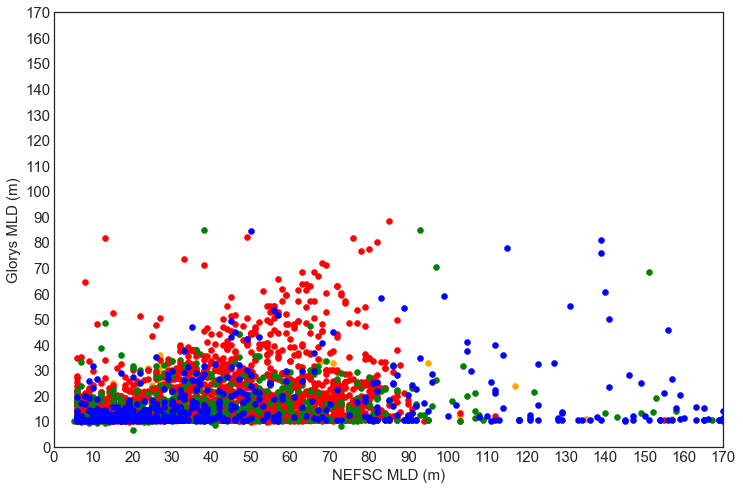

In [743]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,170)
plt.xlim(0,170)
plt.scatter(SouthernMABNEFSC_april, SouthernMABGlorys_april,color='orange',label='Southern MAB')
plt.scatter(NorthernMABNEFSC_april, NorthernMABGlorys_april,color='green',label='Northern MAB')
plt.scatter(GeorgesBankNEFSC_april, GeorgesBankGlorys_april,color='red',label='Georges Bank')
plt.scatter(EGoMNEFSC_april, EGoMGlorys_april,color='green',label='Eastern GoM')
plt.scatter(WGoMNEFSC_april, WGoMGlorys_april,color='blue',label='Western GoM')
# leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170], fontsize = 15) 
plt.show()

# May

In [800]:
GeorgesBankGlorys_may = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 11.444442, 10.528886, 11.1392565, 10.528886, 11.1392565, 10.528886, 11.1392565, 10.528886, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 10.528886, 10.528886, 11.444442, 10.528886, 11.444442, 10.528886, 11.444442, 10.528886, 11.902219, 10.528886, 11.749626, 10.528886, 10.528886, 10.834071, 10.528886, 11.444442, 10.528886, 10.528886, 11.597034, 10.528886, 10.528886, 11.749626, 10.528886, 11.444442, 10.528886, 11.749626, 10.528886, 12.207404, 10.528886, 12.665182, 10.528886, 10.528886, 13.275552, 10.528886, 12.817775, 10.528886, 10.528886, 10.6814785, 10.528886, 10.376293, 10.528886, 10.376293, 10.528886, 10.528886, 11.902219, 10.528886, 12.817775, 10.528886, 16.022219, 10.528886, 10.528886, 12.817775, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 13.275552, 10.528886, 14.3437, 10.528886, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 10.528886, 13.428144, 10.528886, 14.038515, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.6814785, 12.207404, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.834071, 10.834071, 10.986664, 11.597034, 10.528886, 11.749626, 11.444442, 11.444442, 11.444442, 11.291849, 11.597034, 11.597034, 11.902219, 11.444442, 11.1392565, 10.986664, 10.986664, 11.444442, 11.291849, 11.291849, 10.986664, 11.1392565, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 11.291849, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 12.0548115, 12.207404, 12.817775, 12.970367, 12.359997, 11.749626, 10.986664, 10.986664, 11.749626, 12.665182, 16.479998, 20.142218, 10.6814785, 10.6814785, 10.376293, 11.749626, 14.3437, 11.902219, 12.0548115, 10.834071, 10.528886, 10.376293, 10.376293, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.6814785, 12.817775, 10.6814785, 10.6814785, 10.6814785, 12.512589, 10.6814785, 10.6814785, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 10.528886, 10.528886, 10.528886, 10.986664, 21.362959, 19.837032, 30.213327, 25.177773, 13.580737, 12.0548115, 12.0548115, 10.376293, 10.528886, 10.528886, 10.528886, 11.597034, 10.6814785, 14.648885, 23.957031, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.902219, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.73333, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 28.839994, 28.839994, 14.038515, 21.362959, 10.528886, 10.528886, 13.885922, 13.885922, 15.259255, 15.259255, 12.207404, 12.207404, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 11.749626, 11.749626, 10.986664, 11.902219, 11.1392565, 24.719995, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 13.885922, 13.885922, 9.613331, 13.580737, 10.528886, 10.528886, 10.986664, 13.275552, 13.275552, 13.580737, 13.580737, 15.869626, 10.528886, 10.528886, 14.95407, 14.95407, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.665182, 10.528886, 12.359997, 10.528886, 11.749626, 12.512589, 11.1392565, 11.291849, 12.207404, 11.291849, 12.359997, 11.597034, 10.528886, 10.376293, 10.986664, 12.0548115, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 11.749626, 12.970367, 11.1392565, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 11.749626, 11.902219, 11.902219, 11.597034, 12.0548115, 12.207404, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.1392565, 11.1392565, 11.291849, 11.1392565, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.986664, 10.528886, 10.528886, 11.291849, 10.528886, 12.512589, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.869626, 10.528886, 14.648885, 10.528886, 22.888884, 10.528886, 10.528886, 27.314068, 10.528886, 14.496293, 10.528886, 10.376293, 14.3437, 10.376293, 10.834071, 10.528886, 11.291849, 10.528886, 10.986664, 27.314068, 10.986664, 11.291849, 16.022219, 11.291849, 10.986664, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 11.291849, 11.1392565, 11.1392565, 14.95407, 14.95407, 13.428144, 14.801477, 13.580737, 13.580737, 22.736292, 22.736292, 22.736292, 21.97333, 22.888884, 24.719995, 24.719995, 27.314068, 27.314068, 24.872587, 24.872587, 14.496293, 14.496293, 16.174812, 16.174812, 16.327404, 16.327404, 19.531847, 19.531847, 18.311108, 18.311108, 17.395552, 17.395552, 15.717033, 15.717033, 14.648885, 20.752588, 20.752588, 20.752588, 18.768885, 18.768885, 17.548145, 16.479998, 16.479998, 16.479998, 14.3437, 14.3437, 10.834071, 10.834071, 11.291849, 11.291849, 27.314068, 27.314068, 16.022219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.580737, 10.528886, 22.583698, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 10.376293, 14.648885, 10.376293, 10.528886, 10.528886, 10.528886, 10.6814785, 10.834071, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 12.207404, 10.528886, 11.902219, 10.528886, 12.207404, 10.528886, 12.817775, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 11.1392565, 10.528886, 12.359997, 11.902219, 11.902219, 10.6814785, 11.749626, 11.444442, 10.376293, 12.0548115, 12.207404, 11.902219, 11.902219, 10.528886, 12.207404, 10.6814785, 12.207404, 12.359997, 12.817775, 12.665182, 10.6814785, 13.580737, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.376293, 21.668144, 10.376293, 10.376293, 10.834071, 10.834071, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 14.801477, 12.665182, 14.801477, 12.665182, 19.226664, 18.616293, 17.24296, 16.785181, 15.259255, 16.937775, 16.174812, 12.0548115, 13.73333, 12.970367, 11.749626, 11.1392565, 11.1392565, 12.970367, 13.885922, 14.191108, 14.191108, 15.106663, 15.411848, 13.885922, 13.885922, 14.496293, 14.038515, 13.885922, 12.359997, 10.986664, 10.6814785, 11.902219, 12.207404, 11.444442, 10.6814785, 10.376293, 10.528886, 10.528886, 10.986664, 10.6814785, 10.528886, 10.834071, 10.834071, 11.291849, 13.428144, 13.428144, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 11.597034, 11.444442, 10.834071, 10.6814785, 10.834071, 10.834071, 10.528886, 10.6814785, 10.834071, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.3437, 13.885922, 13.885922, 14.038515, 14.038515, 14.496293, 14.496293, 14.496293, 12.0548115, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 18.158514, 18.158514, 21.820736, 16.63259, 19.07407, 21.820736, 21.362959, 16.327404, 19.07407, 15.106663, 14.191108, 12.970367, 15.259255, 14.3437, 16.174812, 15.106663, 10.986664, 15.411848, 10.528886, 12.970367, 10.528886, 14.191108, 10.528886, 14.3437, 10.528886, 13.73333, 10.528886, 12.207404, 15.717033, 14.648885, 10.528886, 10.834071, 10.6814785, 14.496293, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.512589, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 12.0548115, 10.528886, 10.528886, 10.528886, 10.528886, 12.207404, 10.528886, 13.885922, 13.428144, 13.428144, 22.736292, 10.376293, 10.6814785, 12.359997, 12.512589, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 11.597034, 12.512589, 10.528886, 10.986664, 11.444442, 12.207404, 12.0548115, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 22.736292, 9.918516, 12.359997, 22.736292, 10.528886, 14.95407, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.986664, 10.6814785, 10.834071, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 11.902219, 10.6814785, 20.752588, 10.834071, 13.885922, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 12.512589, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.444442, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 12.512589, 12.512589, 10.528886, 10.528886, 10.528886, 10.528886, 30.97629, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.376293, 10.528886, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.0548115, 12.665182, 12.665182, 13.580737, 10.528886, 10.528886, 19.07407, 11.902219, 10.528886, 10.528886, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 12.207404, 12.0548115, 11.902219, 10.376293, 10.376293, 10.376293, 14.648885, 12.207404, 11.444442, 11.597034, 12.359997, 10.528886, 11.902219, 10.834071, 11.749626, 11.749626, 12.970367, 11.444442, 10.834071, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.613331, 10.528886, 11.444442, 11.291849, 11.291849, 10.528886, 10.528886, 10.528886, 10.834071, 11.444442, 14.95407, 11.1392565, 11.1392565, 13.73333, 13.73333, 13.122959, 11.597034, 10.834071, 10.528886, 10.6814785, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.376293, 15.106663, 13.73333, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.95407, 10.2237015, 25.177773, 14.3437, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.7659235, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 28.6874, 10.376293, 17.395552, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 10.528886, 10.528886, 11.291849]
GeorgesBankNEFSC_may = [13.0, 16.0, 7.0, 14.0, 7.0, 8.0, 6.0, 15.0, 77.0, 9.0, 15.0, 6.0, 11.0, 7.0, 11.0, 11.0, 10.0, 16.0, 8.0, 9.0, 9.0, 8.0, 6.0, 13.0, 8.0, 21.0, 8.0, 11.0, 7.0, 11.0, 7.0, 7.0, 6.0, 9.0, 6.0, 7.0, 6.0, 7.0, 6.0, 11.0, 6.0, 10.0, 8.0, 16.0, 10.0, 45.0, 10.0, 45.0, 12.0, 50.0, 13.0, 8.0, 16.0, 8.0, 14.0, 9.0, 9.0, 7.0, 7.0, 16.0, 10.0, 6.0, 8.0, 10.0, 7.0, 12.0, 7.0, 6.0, 5.0, 7.0, 6.0, 16.0, 9.0, 48.0, 10.0, 44.0, 12.0, 42.0, 41.0, 9.0, 41.0, 14.0, 41.0, 9.0, 41.0, 7.0, 17.0, 10.0, 40.0, 7.0, 40.0, 6.0, 41.0, 12.0, 39.0, 41.0, 41.0, 9.0, 6.0, 6.0, 6.0, 8.0, 6.0, 71.0, 7.0, 15.0, 12.0, 72.0, 8.0, 10.0, 12.0, 8.0, 7.0, 9.0, 23.0, 26.0, 21.0, 17.0, 14.0, 14.0, 12.0, 13.0, 12.0, 11.0, 15.0, 19.0, 23.0, 30.0, 31.0, 39.0, 41.0, 24.0, 29.0, 35.0, 35.0, 50.0, 49.0, 63.0, 43.0, 38.0, 39.0, 32.0, 39.0, 39.0, 39.0, 38.0, 20.0, 21.0, 23.0, 23.0, 8.0, 14.0, 6.0, 5.0, 6.0, 16.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 9.0, 9.0, 12.0, 10.0, 8.0, 69.0, 69.0, 22.0, 6.0, 8.0, 6.0, 6.0, 5.0, 7.0, 9.0, 8.0, 9.0, 9.0, 10.0, 19.0, 30.0, 23.0, 40.0, 43.0, 44.0, 36.0, 25.0, 28.0, 45.0, 38.0, 39.0, 38.0, 74.0, 16.0, 14.0, 13.0, 11.0, 9.0, 68.0, 67.0, 70.0, 71.0, 12.0, 20.0, 38.0, 10.0, 50.0, 50.0, 17.0, 6.0, 50.0, 13.0, 51.0, 6.0, 19.0, 6.0, 17.0, 8.0, 7.0, 12.0, 8.0, 10.0, 17.0, 12.0, 8.0, 13.0, 7.0, 14.0, 14.0, 48.0, 17.0, 48.0, 50.0, 48.0, 21.0, 48.0, 22.0, 48.0, 24.0, 11.0, 22.0, 10.0, 14.0, 14.0, 20.0, 11.0, 28.0, 16.0, 14.0, 34.0, 16.0, 55.0, 8.0, 60.0, 9.0, 6.0, 12.0, 33.0, 13.0, 11.0, 22.0, 12.0, 24.0, 13.0, 7.0, 32.0, 7.0, 9.0, 37.0, 6.0, 22.0, 8.0, 56.0, 6.0, 43.0, 6.0, 38.0, 6.0, 7.0, 38.0, 7.0, 48.0, 9.0, 9.0, 40.0, 9.0, 37.0, 6.0, 20.0, 8.0, 8.0, 21.0, 8.0, 48.0, 8.0, 88.0, 7.0, 7.0, 92.0, 6.0, 6.0, 85.0, 7.0, 28.0, 9.0, 65.0, 7.0, 9.0, 55.0, 8.0, 49.0, 6.0, 35.0, 8.0, 55.0, 7.0, 8.0, 8.0, 19.0, 9.0, 17.0, 12.0, 19.0, 16.0, 43.0, 21.0, 19.0, 16.0, 19.0, 61.0, 23.0, 59.0, 25.0, 54.0, 25.0, 19.0, 42.0, 19.0, 25.0, 18.0, 20.0, 16.0, 21.0, 19.0, 8.0, 15.0, 11.0, 49.0, 17.0, 48.0, 44.0, 46.0, 42.0, 47.0, 45.0, 8.0, 8.0, 7.0, 8.0, 7.0, 6.0, 7.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 18.0, 6.0, 6.0, 6.0, 7.0, 8.0, 7.0, 10.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 37.0, 49.0, 16.0, 17.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 38.0, 45.0, 51.0, 9.0, 9.0, 6.0, 6.0, 11.0, 6.0, 93.0, 82.0, 9.0, 6.0, 8.0, 20.0, 10.0, 46.0, 7.0, 63.0, 6.0, 6.0, 7.0, 48.0, 42.0, 53.0, 59.0, 56.0, 15.0, 12.0, 10.0, 40.0, 39.0, 37.0, 46.0, 48.0, 47.0, 27.0, 10.0, 16.0, 11.0, 9.0, 10.0, 16.0, 12.0, 8.0, 7.0, 6.0, 6.0, 8.0, 10.0, 6.0, 7.0, 7.0, 9.0, 12.0, 11.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 78.0, 6.0, 7.0, 50.0, 42.0, 8.0, 6.0, 6.0, 6.0, 12.0, 18.0, 27.0, 10.0, 15.0, 26.0, 57.0, 8.0, 9.0, 17.0, 20.0, 20.0, 47.0, 41.0, 35.0, 26.0, 26.0, 32.0, 30.0, 34.0, 41.0, 23.0, 26.0, 50.0, 59.0, 51.0, 43.0, 29.0, 31.0, 23.0, 23.0, 18.0, 23.0, 30.0, 18.0, 63.0, 50.0, 39.0, 42.0, 48.0, 34.0, 66.0, 63.0, 26.0, 47.0, 35.0, 59.0, 51.0, 17.0, 52.0, 16.0, 71.0, 56.0, 11.0, 12.0, 19.0, 37.0, 10.0, 31.0, 9.0, 15.0, 25.0, 6.0, 8.0, 7.0, 8.0, 8.0, 14.0, 16.0, 6.0, 8.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 48.0, 45.0, 41.0, 44.0, 44.0, 45.0, 8.0, 6.0, 10.0, 42.0, 41.0, 43.0, 50.0, 58.0, 53.0, 50.0, 44.0, 6.0, 6.0, 6.0, 6.0, 6.0, 14.0, 6.0, 7.0, 6.0, 6.0, 7.0, 10.0, 6.0, 6.0, 16.0, 12.0, 48.0, 29.0, 46.0, 60.0, 48.0, 17.0, 8.0, 53.0, 65.0, 18.0, 14.0, 65.0, 11.0, 6.0, 8.0, 10.0, 15.0, 59.0, 11.0, 49.0, 15.0, 26.0, 49.0, 42.0, 8.0, 9.0, 28.0, 39.0, 40.0, 55.0, 39.0, 53.0, 60.0, 17.0, 11.0, 11.0, 47.0, 34.0, 50.0, 16.0, 11.0, 12.0, 25.0, 7.0, 46.0, 11.0, 37.0, 28.0, 61.0, 63.0, 62.0, 44.0, 69.0, 6.0, 6.0, 6.0, 6.0, 11.0, 14.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 14.0, 6.0, 6.0, 7.0, 7.0, 6.0, 8.0, 41.0, 35.0, 9.0, 9.0, 154.0, 14.0, 16.0, 6.0, 45.0, 8.0, 42.0, 11.0, 6.0, 13.0, 54.0, 46.0, 62.0, 51.0, 13.0, 46.0, 12.0, 13.0, 10.0, 11.0, 51.0, 52.0, 36.0, 17.0, 29.0, 26.0, 14.0, 6.0, 7.0, 6.0, 22.0, 53.0, 45.0, 43.0, 36.0, 36.0, 52.0, 54.0, 23.0, 25.0, 13.0, 10.0, 9.0, 8.0, 10.0, 79.0, 56.0, 57.0, 71.0, 74.0, 17.0, 13.0, 14.0, 30.0, 81.0, 82.0, 9.0, 80.0, 81.0, 66.0, 65.0, 63.0, 50.0, 50.0, 30.0, 32.0, 49.0, 49.0, 64.0, 63.0, 46.0, 48.0, 33.0, 41.0, 48.0, 54.0, 45.0, 37.0, 44.0, 40.0, 43.0, 44.0, 44.0, 46.0, 60.0, 30.0, 63.0, 15.0, 28.0, 59.0, 47.0, 37.0, 47.0, 43.0, 12.0, 63.0, 18.0, 11.0, 10.0, 60.0, 6.0, 33.0, 13.0, 6.0, 8.0, 19.0, 12.0, 10.0, 6.0, 9.0, 7.0, 6.0, 70.0, 6.0, 6.0, 72.0, 60.0, 63.0, 62.0, 59.0, 59.0, 17.0, 47.0, 41.0, 16.0, 68.0, 23.0, 11.0, 10.0, 14.0, 20.0, 20.0, 68.0, 62.0, 53.0, 36.0, 46.0, 46.0, 13.0, 61.0, 67.0, 14.0, 8.0, 6.0, 12.0, 9.0, 54.0, 59.0, 56.0, 54.0, 50.0, 45.0, 62.0, 6.0, 12.0, 13.0, 6.0, 6.0, 25.0, 35.0, 34.0, 57.0, 57.0, 56.0, 42.0, 53.0, 13.0, 28.0, 27.0, 6.0, 12.0, 12.0, 61.0, 54.0, 49.0, 59.0, 49.0, 37.0, 22.0, 16.0, 15.0, 31.0, 65.0, 52.0, 56.0, 58.0, 55.0, 62.0, 24.0, 13.0, 69.0, 64.0, 7.0, 73.0, 36.0, 71.0, 14.0, 65.0, 8.0, 55.0, 63.0, 17.0, 65.0, 72.0, 6.0, 48.0, 6.0, 44.0, 6.0, 36.0, 6.0, 52.0, 6.0, 62.0, 10.0, 19.0, 49.0, 55.0, 79.0, 50.0, 79.0, 48.0, 55.0, 12.0, 53.0, 69.0, 12.0, 15.0, 11.0, 8.0, 50.0, 7.0, 6.0, 45.0, 6.0, 14.0, 11.0, 8.0, 12.0, 19.0, 28.0, 15.0, 19.0, 18.0, 11.0, 9.0, 71.0, 66.0, 64.0, 53.0, 52.0, 39.0, 38.0, 44.0, 44.0, 38.0, 39.0, 34.0, 44.0, 49.0, 54.0, 54.0, 56.0, 55.0, 62.0, 62.0, 71.0, 70.0, 14.0, 14.0, 13.0, 24.0, 14.0, 24.0, 11.0, 82.0, 17.0, 32.0, 43.0, 62.0, 37.0, 80.0, 80.0, 68.0, 68.0, 50.0, 50.0, 59.0, 55.0, 64.0, 64.0, 69.0, 65.0, 64.0, 80.0, 84.0, 84.0, 73.0, 75.0, 75.0, 15.0, 27.0, 23.0, 11.0, 10.0, 61.0, 62.0, 16.0, 16.0, 51.0, 51.0, 46.0, 12.0, 10.0, 41.0, 41.0, 44.0, 46.0, 24.0, 26.0, 6.0, 6.0, 64.0, 63.0, 62.0, 77.0, 72.0, 11.0, 72.0, 17.0, 6.0, 10.0, 11.0, 65.0, 7.0, 50.0, 48.0, 50.0, 6.0, 9.0, 50.0, 40.0, 48.0, 35.0, 32.0, 36.0, 43.0, 6.0, 6.0, 6.0, 6.0, 8.0, 39.0, 32.0, 34.0, 6.0, 40.0, 8.0, 41.0, 40.0, 9.0, 10.0, 25.0, 9.0, 8.0, 45.0, 41.0, 46.0, 48.0, 38.0, 59.0, 62.0, 10.0, 12.0, 7.0, 11.0, 8.0, 56.0, 64.0, 6.0, 11.0, 17.0, 13.0, 7.0, 16.0, 9.0, 6.0, 45.0, 35.0, 51.0, 30.0, 49.0, 56.0, 55.0, 50.0, 26.0, 10.0, 23.0, 61.0, 63.0, 65.0, 6.0, 74.1, 67.0, 8.5, 69.0, 10.0, 7.0, 41.6, 16.0, 19.1, 11.0, 10.9, 46.0, 45.0, 10.0, 10.0, 15.0, 18.0, 11.4, 11.0, 42.4, 15.0, 32.7, 25.0, 48.1, 13.4, 6.0, 19.4, 8.0, 11.0, 18.0, 12.0, 16.6, 11.0, 54.2, 11.0, 67.7, 35.0, 7.4, 41.0, 8.0, 31.0, 6.4, 30.0, 6.0, 27.0, 27.0, 11.0, 25.6, 12.0, 64.2, 9.0, 18.0, 29.0, 54.7, 8.0, 15.0, 40.3, 9.0, 23.0, 61.0, 55.0, 45.6, 63.0, 61.5, 65.0, 74.0, 6.0, 8.0, 7.0, 9.0, 7.0, 6.0, 7.0, 89.0, 23.0, 72.0, 61.0, 66.0, 47.0, 48.0, 17.0, 28.0, 36.0, 38.0, 27.0, 19.0, 46.0, 46.0, 54.0, 57.0, 58.0, 46.6, 61.3, 45.0, 64.0, 9.0, 16.0, 43.0, 71.0, 27.0, 18.0, 73.0, 25.0, 14.0, 25.0, 92.0, 22.0, 16.0, 12.0, 44.0, 60.0, 42.0, 38.0, 45.0, 44.0, 51.0, 22.0, 13.0, 23.0, 17.0, 38.0, 9.0, 21.0, 34.0, 22.0, 20.0, 55.0, 49.0, 36.0, 40.0, 55.0, 25.0, 31.0, 33.0, 20.0, 12.0, 22.0, 19.0, 18.0, 28.0, 12.0, 13.0, 42.0, 41.0, 46.0, 44.0, 53.0, 12.0, 16.0, 18.0, 77.0, 68.0, 11.0, 47.0, 48.0, 52.0, 22.0, 20.0, 26.0, 41.0, 12.0, 18.0, 17.0, 14.0, 18.0, 20.0, 19.0, 15.0, 18.0, 15.0, 12.0, 15.0, 13.0, 7.0, 17.0, 10.0, 6.0, 7.0, 6.0, 7.0, 8.0, 11.0, 37.0, 20.0, 14.0, 9.0, 20.0, 21.0, 23.0, 27.0, 26.0, 34.0, 30.0, 24.0, 12.0, 13.0, 12.0, 17.0, 10.0, 13.0, 10.0, 12.0, 40.0, 49.0, 37.0, 25.0, 50.0, 16.0, 39.0, 18.0, 14.0, 8.0, 38.0, 36.0, 62.0, 26.0, 21.0, 52.0, 49.0, 52.0, 52.0, 14.0, 13.0, 28.9, 22.0, 61.5, 70.0, 27.0, 60.0, 68.0, 19.0, 26.0, 47.7, 33.0, 59.8, 52.0, 52.0, 55.0, 47.0, 87.9, 51.0, 8.5, 56.0, 51.0, 25.0, 46.7, 21.0, 39.5, 21.0, 49.8, 64.2, 104.0, 7.5, 32.0, 8.0, 13.5, 8.0, 57.4, 9.0, 58.4, 51.0, 6.5, 40.0, 84.8, 43.0, 15.5, 30.0, 12.9, 36.0, 12.5, 29.0, 48.0, 8.0, 6.4, 62.0, 72.2, 6.0, 7.0, 6.0, 49.2, 6.0, 13.0, 9.0, 22.0, 69.5, 56.0, 64.0, 59.0, 68.0, 67.0, 48.6, 9.0, 66.0, 84.0, 6.0, 11.0, 9.0, 7.0, 28.0, 7.0, 10.0, 10.0, 8.0, 10.0, 63.0, 20.0, 7.0, 59.0, 44.0, 9.0, 32.0, 51.0, 29.0, 6.0, 44.0, 14.0, 66.0, 74.0, 81.0, 8.0, 10.0, 6.0, 15.0, 6.0, 15.0, 10.0, 42.0, 10.0, 21.0, 6.0, 12.0, 6.0, 39.0, 48.0, 15.0, 43.0, 10.0, 49.0, 51.0, 19.0, 41.0, 14.0, 36.0, 13.0, 52.0, 17.0, 13.0, 30.0, 10.0, 14.0, 13.0, 64.0, 20.0, 57.0, 9.0, 70.0, 13.0, 8.0, 48.0, 7.0, 34.0, 6.0, 41.0, 87.0, 27.0, 32.0, 34.0, 20.0, 46.0, 71.0, 8.0, 16.0, 8.0, 65.0, 21.0, 20.0, 9.0, 50.0, 13.0, 33.0, 74.0, 41.0, 63.0, 7.0, 52.0, 58.0, 66.0, 6.0, 10.0, 6.0, 6.0, 22.0, 6.0, 7.0, 85.0, 6.0, 16.0, 72.0, 59.0, 60.0, 54.0, 40.0, 6.0, 30.0, 51.0, 26.0, 8.0, 44.0, 7.0, 7.0, 9.0, 6.0, 6.0, 6.0, 6.0, 41.0, 6.0, 8.0, 8.0, 10.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 7.0, 6.0, 6.0, 45.0, 41.0, 37.0, 47.0, 6.0, 6.0, 11.0, 8.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 8.0, 8.0, 20.0, 15.0, 6.0, 11.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 51.0, 39.0, 48.0, 6.0, 7.0, 48.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 10.0, 11.0, 14.0, 10.0, 6.0, 29.0, 33.0, 6.0, 6.0, 12.0, 8.0, 6.0, 13.0, 8.0, 42.0, 6.0, 6.0, 7.0, 10.0, 10.0, 12.0, 47.0, 60.0, 59.0, 21.0, 6.0, 9.0, 10.0, 16.0, 35.0, 25.0, 6.0, 129.0, 6.0, 6.0, 49.0, 49.0, 9.0, 36.0, 35.0, 27.0, 6.0, 6.0, 9.0, 6.0, 7.0, 6.0, 41.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 49.0, 17.0, 49.0, 36.0, 39.0, 56.0, 56.0, 17.0, 26.0, 19.0, 7.0, 6.0, 28.0, 23.0, 21.0, 6.0, 9.0, 16.0, 7.0, 47.0, 29.0, 29.0, 33.0, 42.0, 60.0, 56.0, 53.0, 19.0, 10.0, 7.0, 15.0, 13.0, 65.0, 65.0, 85.0, 62.0, 54.0, 20.0, 86.0, 63.0, 10.0, 8.0, 14.0, 6.0, 9.0, 6.0, 10.0, 6.0, 9.0, 9.0, 10.0, 10.0, 7.0, 55.0, 8.0, 69.0, 88.0, 6.0, 8.0, 12.0, 11.0, 68.0, 12.0, 9.0, 6.0, 7.0, 93.0, 6.0, 85.0, 48.0, 6.0, 6.0, 6.0, 71.0, 12.0, 10.0, 12.0, 72.0, 6.0, 6.0, 48.0, 9.0, 10.0, 8.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 38.0, 36.0, 47.0, 6.0, 7.0, 6.0, 11.0, 11.0, 8.0, 15.0, 22.0, 58.0, 47.0, 48.0, 59.0, 64.0, 60.0, 69.0, 53.0, 59.0, 50.0, 13.0, 14.0, 16.0, 73.0, 67.0, 46.0, 17.0, 8.0, 17.0, 45.0, 16.0, 6.0, 48.0, 49.0, 50.0, 48.0, 32.0, 31.0, 47.0, 48.0, 51.0, 6.0, 51.0, 58.0, 60.0, 60.0, 11.0, 6.0, 9.0, 6.0, 10.0, 7.0, 27.0, 12.0, 14.0, 10.0, 8.0, 13.0, 14.0, 13.0, 15.0, 8.0, 21.0, 13.0, 16.0, 12.0, 9.0, 11.0, 12.0, 12.0, 11.0, 18.0, 17.0, 23.0, 15.0, 89.0, 95.0, 10.0, 20.0, 9.0, 6.0, 6.0, 79.0, 7.0, 13.0, 10.0, 30.0, 49.0, 8.0, 7.0, 9.0, 20.0, 8.0, 6.0, 8.0, 6.0, 7.0, 10.0, 14.0, 8.0, 11.0, 7.0, 9.0, 57.0, 7.0, 59.0, 47.0, 57.0, 45.0, 9.0, 26.0, 37.0, 39.0, 9.0, 7.0, 6.0, 32.0, 6.0, 6.0, 6.0, 13.0, 9.0, 6.0, 6.0, 68.0, 39.0, 51.0, 8.0, 39.0, 11.0, 12.0, 13.0, 10.0, 10.0, 8.0, 10.0, 10.0, 6.0, 23.0, 6.0, 6.0, 6.0, 7.0, 39.0, 33.0, 34.0, 33.0, 7.0, 38.0, 26.0, 42.0, 34.0, 45.0, 51.0, 7.0, 8.0, 6.0, 6.0, 11.0, 6.0, 6.0, 7.0, 9.0, 6.0, 8.0, 7.0, 12.0, 6.0, 12.0, 8.0, 7.0, 9.0, 9.0, 13.0, 6.0, 6.0, 110.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 30.0, 34.0, 43.0, 8.0, 8.0, 10.0, 9.0, 11.0, 9.0, 8.0, 7.0, 16.0, 8.0, 12.0, 9.0, 6.0, 10.0, 14.0, 12.0, 11.0, 16.0, 45.0, 10.0, 10.0, 66.0, 14.0, 64.0, 54.0, 46.0, 44.0, 71.0, 49.0, 38.0, 37.0, 11.0, 29.0, 60.0, 44.0, 46.0, 45.0, 44.0, 90.0, 7.0, 6.0, 10.0, 6.0, 81.0, 6.0, 6.0, 44.0, 51.0, 29.0, 46.0, 44.0, 10.0, 22.0, 53.0, 46.0, 61.0, 72.0, 46.0, 45.0, 65.0, 37.0, 22.0, 10.0, 6.0, 66.0, 10.0, 66.0, 56.0, 42.0, 11.0, 10.0, 6.0, 6.0, 10.0, 61.0, 10.0, 7.0, 6.0, 13.0, 6.0, 6.0, 6.0, 11.0, 6.0, 6.0, 6.0, 6.0, 49.0, 12.0, 6.0, 7.0, 7.0, 7.0, 47.0, 58.0, 38.0, 48.0, 41.0, 13.0, 44.0, 28.0, 36.0, 37.0, 6.0, 38.0, 6.0, 44.0]

In [801]:
SouthernMABGlorys_may = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.918516, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.834071, 11.291849, 11.291849, 10.834071, 14.191108, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.749626, 16.022219, 12.207404, 11.444442, 21.97333, 15.869626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.73333, 10.376293, 14.648885, 10.528886, 10.6814785, 7.3244424, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.785181, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.428144, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
SouthernMABNEFSC_may = [9.0, 21.0, 8.0, 11.0, 9.0, 8.0, 7.0, 8.0, 12.0, 8.0, 7.0, 6.0, 6.0, 6.0, 9.0, 9.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 12.0, 8.0, 6.0, 7.0, 10.0, 15.0, 6.0, 6.0, 14.0, 8.0, 13.0, 8.0, 9.0, 9.0, 7.0, 11.0, 35.0, 14.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 119.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 14.0, 11.0, 6.0, 9.0, 19.0, 6.0, 8.0, 6.0, 5.0, 7.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 8.0, 8.0, 7.0, 6.0, 6.0, 10.0, 11.0, 14.0, 12.0, 12.0, 13.0, 12.0, 12.0, 12.0, 20.0, 19.0, 11.0, 14.0, 7.0, 7.0, 15.0, 9.0, 7.0, 13.0, 7.0, 10.0, 6.0, 6.0, 6.0, 7.0, 10.0, 6.0, 11.0, 6.0, 18.0, 13.0, 16.0, 17.0, 6.0, 6.0, 6.0, 6.0, 13.0, 9.0, 14.0, 20.0, 16.0, 22.0, 19.0, 10.0, 9.0, 25.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 11.0, 12.0, 10.0, 10.0, 6.0, 11.0, 11.0, 10.0, 14.0, 13.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 9.0, 10.0, 7.0, 7.0, 6.0, 6.0, 10.0, 9.0, 11.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 22.0, 15.0, 23.0, 12.0, 5.0, 21.0, 22.0, 20.0, 42.0, 49.0, 24.0, 23.0, 40.0, 14.0, 9.0, 7.0, 10.0, 36.0, 10.0, 14.0, 7.0, 19.0, 17.0, 6.0, 6.0, 7.0, 108.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0, 7.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 8.0, 10.0, 7.0, 6.0, 6.0, 6.0, 9.0, 11.0, 20.0, 7.0, 10.0, 10.0, 10.0, 10.0, 11.0, 6.0, 7.0, 8.0, 7.0, 7.0, 8.0, 12.0, 7.0, 6.0, 8.0, 7.0, 10.0, 8.0, 9.0, 13.0, 12.0, 14.0, 10.0, 6.0, 11.0, 8.0, 13.0, 12.0, 7.0, 6.0, 10.0, 17.0, 13.0, 16.0, 7.0, 13.0, 16.0, 7.0, 6.0, 8.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 18.0, 17.0, 18.0, 12.0, 12.0, 12.0, 19.0, 18.0, 17.0, 13.0, 12.0, 16.0, 14.0, 11.0, 9.0, 17.0, 12.0, 7.0, 10.0, 8.0, 16.0, 8.0, 6.0, 6.0, 6.0, 11.0, 6.0, 7.0, 6.0, 8.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 12.0, 16.0, 15.0, 15.0, 12.0, 16.0, 17.0, 14.0, 13.0, 6.0, 6.0, 6.0, 8.0, 13.0, 10.0, 7.0, 8.0, 9.0, 14.0, 8.0, 17.0, 6.0, 12.0, 6.0, 13.0, 6.0, 9.0, 7.0, 9.0, 6.0, 8.0, 10.0, 9.0, 12.0, 12.0, 6.0, 9.0, 7.0, 8.0, 6.0, 10.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 6.0, 6.0, 11.0, 15.0, 7.0, 7.0, 6.0, 11.0, 6.0, 6.0, 7.0, 8.0, 7.0, 33.0, 8.0, 9.0, 7.0, 7.0, 7.0, 8.0, 8.0, 6.0, 10.0, 8.0, 6.0, 7.0, 6.0, 7.0, 6.0, 9.0, 7.0, 7.0, 6.0, 7.0, 7.0, 7.0, 9.0, 6.0, 8.0, 8.0, 8.0, 12.0, 9.0, 15.0, 23.0, 9.0, 8.0, 6.0, 12.0, 8.0, 7.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 14.0, 16.0, 13.0, 8.0, 6.0, 6.0, 9.0, 13.0, 14.0, 12.0, 7.0, 14.0, 13.0, 9.0, 13.0, 9.0, 8.0, 6.0, 7.0, 9.0, 10.0, 7.0, 8.0, 11.0, 12.0, 11.0, 14.0, 16.0, 6.0, 49.0, 21.0, 23.0, 27.0, 35.0, 22.0, 20.0, 10.0, 10.0, 9.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 7.0, 6.0, 8.0, 7.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 7.0, 6.0, 6.0, 10.0, 10.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 6.0, 9.0, 13.0, 10.0, 19.0, 21.0, 20.0, 16.0, 13.0, 10.0, 10.0, 9.0, 10.0, 6.0, 7.0, 5.0, 13.0, 6.0, 9.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 8.0, 8.0, 7.0, 11.0, 6.0, 6.0, 12.0, 7.0, 6.0, 9.0, 6.0, 6.0, 8.0, 7.0, 13.0, 9.0, 11.0, 19.0]

In [802]:
NorthernMABGlorys_may = [10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 11.1392565, 10.986664, 10.528886, 12.0548115, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.564441, 15.564441, 10.528886, 10.6814785, 16.785181, 16.479998, 14.95407, 10.834071, 26.398512, 13.122959, 14.191108, 12.512589, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 34.63851, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.7659235, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.902219, 11.444442, 10.834071, 15.106663, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 14.801477, 12.0548115, 11.291849, 10.528886, 10.528886, 10.6814785, 13.428144, 19.837032, 15.869626, 19.531847, 17.700737, 10.376293, 10.528886, 10.528886, 11.291849, 10.376293, 10.528886, 12.0548115, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 14.3437, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 8.8503685, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
NorthernMABNEFSC_may = [12.0, 12.0, 20.0, 18.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 7.0, 9.0, 7.0, 6.0, 9.0, 7.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 7.0, 7.0, 6.0, 7.0, 6.0, 11.0, 8.0, 9.0, 13.0, 20.0, 6.0, 14.0, 12.0, 13.0, 9.0, 11.0, 13.0, 9.0, 19.0, 22.0, 21.0, 10.0, 40.0, 22.0, 7.0, 15.0, 34.0, 44.0, 11.0, 19.0, 12.0, 22.0, 18.0, 23.0, 13.0, 17.0, 13.0, 14.0, 7.0, 100.0, 6.0, 8.0, 10.0, 9.0, 10.0, 11.0, 6.0, 6.0, 6.0, 6.0, 115.0, 7.0, 8.0, 8.0, 7.0, 6.0, 10.0, 6.0, 9.0, 9.0, 8.0, 7.0, 10.0, 6.0, 12.0, 6.0, 11.0, 6.0, 11.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 13.0, 6.0, 6.0, 43.0, 19.0, 26.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 14.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 13.0, 8.0, 8.0, 6.0, 9.0, 8.0, 40.0, 8.0, 8.0, 7.0, 7.0, 6.0, 7.0, 6.0, 50.0, 6.0, 7.0, 9.0, 6.0, 6.0, 13.0, 6.0, 9.0, 12.0, 6.0, 6.0, 6.0, 12.0, 14.0, 12.0, 15.0, 12.0, 11.0, 14.0, 15.0, 14.0, 19.0, 12.0, 11.0, 13.0, 8.0, 6.0, 8.0, 8.0, 17.0, 6.0, 15.0, 15.0, 14.0, 12.0, 15.0, 14.0, 15.0, 9.0, 13.0, 12.0, 6.0, 22.0, 6.0, 12.0, 6.0, 15.0, 6.0, 6.0, 11.0, 8.0, 11.0, 11.0, 13.0, 11.0, 8.0, 10.0, 6.0, 7.0, 6.0, 11.0, 10.0, 8.0, 10.0, 6.0, 8.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0, 11.0, 16.0, 9.0, 7.0, 6.0, 9.0, 10.0, 12.0, 8.0, 12.0, 8.0, 11.0, 9.0, 11.0, 6.0, 10.0, 6.0, 6.0, 13.0, 8.0, 6.0, 10.0, 6.0, 37.0, 42.0, 46.0, 35.0, 23.0, 46.0, 32.0, 21.0, 6.0, 11.0, 18.0, 23.0, 13.0, 19.0, 16.0, 29.0, 22.0, 47.0, 53.0, 30.0, 17.0, 22.0, 15.0, 21.0, 20.0, 30.0, 13.0, 11.0, 20.0, 6.0, 7.0, 57.0, 7.0, 12.0, 11.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 7.0, 7.0, 6.0, 11.0, 8.0, 7.0, 7.0, 6.0, 6.0, 13.0, 15.0, 7.0, 8.0, 13.0, 7.0, 7.0, 7.0, 8.0, 7.0, 6.0, 7.0, 13.0, 14.0, 11.0, 15.0, 14.0, 15.0, 11.0, 8.0, 7.0, 9.0, 9.0, 7.0, 13.0, 11.0, 12.0, 8.0, 8.0, 25.0, 38.0, 23.0, 20.0, 19.0, 9.0, 26.0, 18.0, 6.0, 7.0, 6.0, 6.0, 8.0, 15.0, 20.0, 11.0, 10.0, 13.0, 8.0, 11.0, 9.0, 13.0, 8.0, 16.0, 27.0, 27.0, 6.0, 8.0]

In [803]:
WGoMGlorys_may = [10.376293, 10.376293, 15.259255, 15.259255, 10.528886, 10.528886, 10.528886, 14.648885, 10.528886, 10.528886, 10.528886, 14.648885, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 13.580737, 10.834071, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 13.580737, 13.580737, 10.986664, 10.834071, 10.834071, 15.411848, 11.902219, 16.327404, 15.259255, 15.411848, 13.275552, 11.902219, 16.327404, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 12.817775, 10.528886, 11.597034, 11.597034, 10.986664, 12.817775, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.834071, 11.902219, 13.275552, 12.359997, 17.85333, 13.73333, 11.291849, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.3437, 18.616293, 16.63259, 15.717033, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 14.801477, 16.937775, 14.038515, 13.122959, 12.512589, 12.970367, 13.580737, 14.038515, 13.885922, 13.73333, 14.191108, 14.3437, 13.275552, 12.207404, 11.597034, 10.986664, 10.834071, 10.834071, 10.6814785, 12.970367, 12.970367, 13.122959, 13.122959, 13.122959, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.970367, 13.122959, 13.122959, 13.122959, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.444442, 10.6814785, 10.2237015, 10.376293, 10.376293, 10.528886, 11.597034, 12.970367, 14.191108, 19.226664, 16.022219, 11.291849, 11.597034, 14.648885, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 11.902219, 12.665182, 14.191108, 14.496293, 14.3437, 13.73333, 13.580737, 13.73333, 19.531847, 15.106663, 12.207404, 13.428144, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.885922, 13.885922, 13.885922, 13.885922, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.63259, 10.376293, 10.528886, 11.1392565, 10.986664, 12.512589, 13.122959, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.986664, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 11.444442, 10.528886, 10.376293, 10.986664, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.580737, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 11.291849, 10.376293, 11.291849, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 12.512589, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.0548115, 10.528886, 11.597034, 11.291849, 12.0548115, 11.444442, 11.444442, 11.291849, 11.444442, 14.648885, 10.528886, 10.528886, 10.528886, 10.2237015, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 11.291849, 13.275552, 13.428144, 12.665182, 12.359997, 13.428144, 18.4637, 12.359997, 19.379255, 10.528886, 36.9274, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, nan, nan, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
WGoMNEFSC_may = [19.0, 11.0, 71.0, 69.0, 11.0, 8.0, 6.0, 12.0, 6.0, 6.0, 10.0, 18.0, 9.0, 6.0, 7.0, 8.0, 7.0, 6.0, 17.9, 13.0, 6.5, 11.6, 15.0, 18.0, 8.0, 9.0, 9.0, 9.0, 7.0, 12.0, 14.0, 12.0, 26.0, 40.5, 59.6, 17.0, 65.0, 42.0, 34.0, 64.0, 5.6, 5.9, 9.5, 7.0, 6.0, 29.0, 6.0, 8.0, 7.0, 9.0, 32.0, 7.0, 14.0, 8.0, 11.0, 26.0, 15.0, 8.0, 8.0, 27.0, 6.0, 7.0, 8.0, 6.0, 7.0, 11.0, 9.0, 134.0, 28.0, 8.0, 6.0, 6.0, 12.0, 30.0, 29.0, 22.0, 24.0, 14.0, 8.0, 13.0, 12.0, 11.0, 6.0, 15.0, 25.0, 23.0, 24.0, 40.0, 21.0, 12.0, 18.0, 17.0, 20.0, 15.0, 31.0, 43.0, 11.0, 8.0, 11.0, 6.0, 12.0, 12.0, 13.0, 13.0, 10.0, 13.0, 16.0, 15.0, 12.0, 10.0, 11.0, 13.0, 11.0, 11.0, 6.0, 12.0, 9.0, 7.0, 12.0, 10.0, 10.0, 11.0, 10.0, 6.0, 13.0, 6.0, 6.0, 7.0, 11.0, 10.0, 10.0, 12.0, 10.0, 14.0, 11.0, 18.0, 6.0, 13.0, 12.0, 13.0, 7.0, 7.0, 10.0, 15.0, 11.0, 12.0, 18.0, 14.0, 14.0, 12.0, 18.0, 6.0, 7.0, 8.0, 7.0, 9.0, 9.0, 6.0, 9.0, 11.0, 12.0, 15.0, 8.0, 8.0, 6.0, 7.0, 9.0, 27.0, 6.0, 6.0, 11.0, 21.0, 13.0, 12.0, 8.0, 10.0, 8.0, 6.0, 18.0, 6.0, 7.0, 10.0, 11.0, 31.0, 32.0, 42.0, 28.0, 32.0, 29.0, 16.0, 23.0, 41.0, 9.0, 23.0, 24.0, 25.0, 24.0, 21.0, 25.0, 28.0, 28.0, 22.0, 24.0, 29.0, 33.0, 47.0, 36.0, 29.0, 32.0, 14.0, 9.0, 23.0, 13.0, 38.0, 9.0, 28.0, 10.0, 7.0, 8.0, 13.0, 6.0, 7.0, 6.0, 6.0, 9.0, 6.0, 6.0, 8.0, 6.0, 7.0, 6.0, 6.0, 6.0, 10.0, 10.0, 7.0, 9.0, 6.0, 9.0, 9.0, 9.0, 9.0, 10.0, 12.0, 10.0, 12.0, 12.0, 10.0, 11.0, 12.0, 8.0, 13.0, 10.0, 7.0, 7.0, 7.0, 6.0, 6.0, 7.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 16.0, 15.0, 12.0, 10.0, 6.0, 6.0, 7.0, 8.0, 6.0, 9.0, 6.0, 199.0, 202.0, 15.0, 197.0, 214.0, 24.0, 26.0, 29.0, 30.0, 19.0, 175.0, 6.0, 33.0, 9.0, 12.0, 38.0, 65.0, 13.0, 14.0, 9.0, 15.0, 9.0, 8.0, 6.0, 10.0, 6.0, 6.0, 10.0, 49.0, 6.0, 8.0, 6.0, 9.0, 6.0, 22.0, 8.0, 11.0, 7.0, 9.0, 12.0, 6.0, 8.0, 6.0, 13.0, 7.0, 9.0, 13.0, 19.0, 13.0, 18.0, 9.0, 11.0, 9.0, 10.0, 14.0, 14.0, 12.0, 14.0, 7.0, 11.0, 11.0, 9.0, 11.0, 11.0, 8.0, 12.0, 11.0, 9.0, 8.0, 8.0, 7.0, 6.0, 8.0, 6.0, 7.0, 15.0, 7.0, 10.0, 10.0, 11.0, 12.0, 14.0, 9.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 14.0, 18.0, 13.0, 18.0, 35.0, 21.0, 24.0, 30.0, 37.0, 31.0, 30.0, 29.0, 46.0, 18.0, 22.0, 18.0, 29.0, 36.0, 18.0, 8.0, 11.0, 18.0, 11.0, 13.0, 6.0, 11.0, 9.0, 12.0, 9.0, 15.0, 16.0, 18.0, 13.0, 16.0, 6.0, 15.0, 16.0, 6.0, 6.0, 6.0, 8.0, 9.0, 10.0, 8.0, 17.0, 16.0, 17.0, 13.0, 18.0, 20.0, 17.0, 20.0, 19.0, 20.0, 16.0, 14.0, 20.0, 20.0, 19.0, 19.0, 12.0, 17.0, 20.0, 19.0, 18.0, 16.0, 14.0, 17.0, 19.0, 20.0, 18.0, 14.0, 14.0, 15.0, 15.0, 15.0, 20.0, 15.0, 15.0, 20.0, 18.0, 18.0, 19.0, 19.0, 17.0, 18.0, 15.0, 12.0, 14.0, 11.0, 11.0, 14.0, 10.0, 10.0, 11.0, 12.0, 8.0, 7.0, 6.0, 6.0, 13.0, 8.0, 6.0, 12.0, 16.0, 16.0, 15.0, 9.0, 7.0, 7.0, 7.0, 7.0, 9.0, 9.0, 8.0, 7.0, 8.0, 7.0, 10.0, 15.0, 13.0, 13.0, 17.0, 15.0, 7.0, 10.0, 7.0, 6.0, 7.0, 5.0, 6.0, 9.0, 10.0, 6.0, 6.0, 9.0, 10.0, 8.0, 10.0, 12.0, 185.0, 17.0, 9.0, 11.0, 6.0, 6.0, 216.0, 9.0, 76.0, 18.0, 36.0, 17.0, 16.0, 20.0, 12.0, 31.0, 7.0, 9.0, 185.0, 10.0, 7.0, 12.0, 9.0, 12.0, 16.0, 9.0, 11.0, 7.0, 10.0, 12.0, 14.0, 9.0, 7.0, 9.0, 6.0, 10.0, 12.0, 19.0, 11.0, 9.0, 9.0, 8.0, 9.0, 14.0, 229.0, 203.0, 13.0, 6.0, 12.0, 6.0, 12.0, 15.0, 20.0, 23.0, 13.0, 8.0, 9.0, 18.0, 20.0, 14.0, 174.0, 19.0, 14.0, 17.0, 18.0, 11.0, 11.0, 8.0, 12.0, 160.0, 10.0, 6.0, 6.0, 167.0, 170.0, 7.0, 8.0, 6.0, 6.0, 11.0, 10.0, 11.0, 11.0, 14.0, 7.0, 28.0, 22.0, 33.0, 8.0, 18.0, 8.0, 18.0, 46.0, 21.0, 22.0, 48.0, 36.0, 38.0, 29.0, 28.0, 18.0, 14.0, 187.0, 9.0, 7.0, 24.0, 18.0, 24.0, 18.0, 7.0, 10.0, 7.0, 10.0, 11.0, 26.0, 26.0, 16.0, 22.0, 14.0, 17.0, 11.0, 13.0, 6.0, 8.0, 19.0, 12.0, 6.0, 24.0, 24.0, 16.0, 12.0, 9.0, 16.0, 17.0, 10.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 9.0, 16.0, 13.0, 13.0, 7.0, 9.0, 7.0, 9.0, 8.0, 11.0, 18.0, 7.0, 10.0, 7.0, 9.0, 6.0, 6.0, 9.0, 8.0, 6.0, 11.0, 6.0, 29.0, 14.0, 9.0, 9.0, 31.0, 22.0, 195.0, 25.0, 174.0, 16.0, 10.0, 13.0, 21.0, 173.0, 28.0, 17.0, 8.0, 15.0, 15.0, 8.0, 14.0, 12.0, 6.0, 9.0, 6.0, 10.0, 10.0, 6.0, 6.0, 11.0, 18.0, 9.0, 9.0, 8.0, 6.0, 9.0, 7.0, 6.0, 7.0, 9.0, 24.0, 185.0, 175.0, 13.0, 14.0, 24.0, 8.0, 16.0, 7.0, 7.0, 19.0, 11.0, 11.0, 17.0, 12.0, 18.0, 7.0, 6.0, 8.0, 13.0, 7.0, 6.0, 6.0, 7.0, 6.0, 10.0, 8.0, 7.0, 9.0, 9.0, 6.0, 6.0, 8.0, 16.0, 8.0, 6.0, 14.0, 6.0, 17.0, 7.0, 8.0, 6.0, 11.0, 8.0, 12.0, 7.0, 13.0, 154.0, 10.0, 17.0, 6.0, 20.0, 21.0, 16.0, 16.0, 8.0, 8.0, 9.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 15.0, 6.0, 6.0, 6.0, 12.0, 16.0, 28.0, 14.0, 14.0, 14.0, 6.0, 17.0, 20.0, 24.0, 7.0, 11.0, 9.0, 10.0, 195.0, 13.0, 13.0, 9.0, 6.0, 10.0, 7.0, 8.0, 10.0, 6.0, 8.0, 6.0, 7.0, 9.0, 6.0, 11.0, 10.0, 12.0, 8.0, 7.0, 15.0, 14.0, 7.0, 7.0, 9.0, 11.0, 22.0, 12.0, 18.0, 6.0, 6.0, 16.0, 21.0, 21.0, 227.0, 22.0, 21.0, 217.0, 6.0, 11.0, 20.0, 15.0, 22.0, 16.0, 11.0, 12.0, 18.0, 8.0, 10.0, 15.0, 13.0, 11.0, 15.0, 12.0, 6.0, 7.0, 6.0, 6.0, 8.0, 6.0, 9.0, 7.0, 9.0, 6.0, 7.0, 8.0, 8.0, 14.0, 13.0, 23.0, 9.0, 9.0, 10.0, 12.0, 10.0, 14.0, 16.0, 12.0, 16.0, 10.0, 16.0, 191.0, 11.0, 17.0, 15.0, 7.0, 10.0, 8.0, 6.0, 11.0, 10.0, 12.0, 8.0, 11.0, 8.0, 9.0, 16.0, 18.0, 18.0, 7.0, 8.0, 9.0, 11.0, 10.0]

In [804]:
EGoMGlorys_may = [15.869626, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 15.411848, 10.528886, 10.376293, 10.376293, 15.411848, 15.411848, 10.528886, 10.528886, 10.376293, 10.376293, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.613331, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.613331, 10.528886, 10.834071, 10.528886, 10.528886, 11.597034, 10.528886, 10.834071, 10.376293, 10.528886, 10.528886, 10.376293, 11.597034, 10.528886, 10.528886, 10.528886, 10.376293, 11.444442, 10.528886, 10.528886, 11.1392565, 10.376293, 10.528886, 11.444442, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.73333, 13.73333, 13.275552, 14.496293, 19.226664, 18.768885, 22.278513, 20.90518, 16.785181, 16.937775, 10.6814785, 10.986664, 11.597034, 10.528886, 10.528886, 14.3437, 10.528886, 10.6814785, 10.986664, 10.6814785, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 20.90518, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 15.717033, 12.207404, 10.376293, 10.376293, 11.291849, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.834071, 13.580737, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.022219, 16.022219, 16.63259, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 21.668144, 50.050358, 46.235546, 33.87555, 26.398512, 52.33925, 51.88147, 29.602957, 29.602957, 20.142218, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 12.970367, 11.749626, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886]
EGoMNEFSC_may = [62.0, 17.0, 15.0, 147.0, 124.0, 46.0, 50.0, 12.0, 20.0, 6.0, 9.0, 10.0, 8.0, 25.0, 25.0, 6.0, 6.0, 7.0, 6.0, 15.0, 6.0, 25.0, 22.1, 177.3, 42.5, 94.0, 26.0, 195.0, 22.0, 176.0, 9.0, 22.0, 14.0, 62.1, 15.4, 6.0, 14.0, 19.0, 60.0, 13.0, 15.0, 6.0, 8.0, 7.0, 11.0, 28.0, 13.0, 20.0, 17.0, 30.0, 21.0, 6.0, 22.0, 12.0, 14.0, 21.0, 9.0, 27.0, 13.0, 6.0, 32.0, 24.0, 124.0, 24.0, 7.0, 14.0, 6.0, 16.0, 103.0, 15.0, 130.0, 59.0, 91.0, 25.0, 26.0, 34.0, 32.0, 35.0, 10.0, 13.0, 8.0, 15.0, 13.0, 73.0, 84.0, 38.0, 44.0, 53.0, 66.0, 10.0, 13.0, 10.0, 32.0, 6.0, 6.0, 9.0, 16.0, 8.0, 15.0, 9.0, 7.0, 7.0, 15.0, 17.0, 27.0, 10.0, 11.0, 9.0, 9.0, 25.0, 12.0, 12.0, 33.0, 12.0, 12.0, 18.0, 176.0, 10.0, 12.0, 61.0, 18.0, 16.0, 21.0, 29.0, 17.0, 20.0, 7.0, 8.0, 9.0, 25.0, 14.0, 28.0, 24.0, 22.0, 24.0, 12.0, 7.0, 13.0, 7.0, 11.0, 10.0, 14.0, 22.0, 7.0, 6.0, 6.0, 15.0, 6.0, 8.0, 33.0, 7.0, 38.0, 6.0, 9.0, 12.0, 12.0, 13.0, 20.0, 54.0, 7.0, 6.0, 6.0, 7.0, 11.0, 202.0, 9.0, 6.0, 8.0, 10.0, 10.0, 11.0, 9.0, 15.0, 12.0, 15.0, 26.0, 9.0, 23.0, 25.0, 6.0, 12.0, 17.0, 15.0, 18.0, 21.0, 19.0, 10.0, 10.0, 8.0, 6.0, 9.0, 6.0, 6.0, 6.0, 9.0, 284.0, 219.0, 11.0, 11.0, 18.0, 11.0, 16.0, 9.0, 12.0, 6.0, 6.0, 6.0, 16.0, 16.0, 7.0, 8.0, 10.0, 13.0, 15.0, 15.0, 30.0, 30.0, 35.0, 30.0, 18.0, 37.0, 29.0, 86.0, 23.0, 9.0, 7.0, 14.0, 142.0, 9.0, 10.0, 9.0, 13.0, 6.0, 15.0, 10.0, 12.0, 16.0, 11.0, 10.0, 19.0, 13.0, 10.0, 17.0, 163.0, 11.0, 8.0, 6.0]

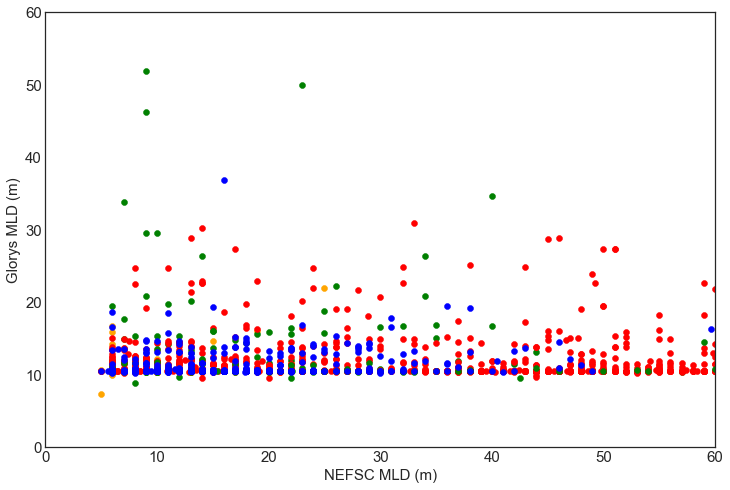

In [808]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,60)
plt.xlim(0,60)
plt.scatter(SouthernMABNEFSC_may, SouthernMABGlorys_may,color='orange',label='Southern MAB')
plt.scatter(NorthernMABNEFSC_may, NorthernMABGlorys_may,color='green',label='Northern MAB')
plt.scatter(GeorgesBankNEFSC_may, GeorgesBankGlorys_may,color='red',label='Georges Bank')
plt.scatter(EGoMNEFSC_may, EGoMGlorys_may,color='green',label='Eastern GoM')
plt.scatter(WGoMNEFSC_may, WGoMGlorys_may,color='blue',label='Western GoM')
# leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.show()

# June

In [835]:
GeorgesBankGlorys_june = [18.005922, 10.528886, 11.291849, 10.834071, 10.528886, 11.749626, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.174812, 10.528886, 11.444442, 10.528886, 12.207404, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.902219, 10.528886, 10.6814785, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 20.447403, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 28.382215, 28.382215, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.749626, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.902219, 11.291849, 11.1392565, 13.275552, 14.038515, 16.174812, 20.752588, 14.191108, 14.191108, 12.512589, 12.0548115, 12.207404, 13.122959, 13.122959, 12.359997, 13.122959, 14.038515, 14.648885, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 11.1392565, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.122959, 13.885922, 10.376293, 10.376293, 17.395552, 17.395552, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 13.885922, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 11.749626, 10.986664, 11.1392565, 10.376293, 13.275552, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 12.512589, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 11.291849, 10.528886, 10.528886, 12.359997, 12.359997, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.717033, 13.580737, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 12.207404, 12.359997, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
GeorgesBankNEFSC_june = [42.0, 11.0, 8.0, 14.0, 12.0, 9.0, 17.0, 14.0, 10.0, 8.0, 7.0, 7.0, 11.0, 98.0, 8.0, 89.0, 6.0, 6.0, 6.0, 6.0, 101.0, 116.0, 23.0, 15.0, 15.0, 16.0, 13.0, 12.0, 10.0, 8.0, 8.0, 6.0, 6.0, 6.0, 45.0, 7.0, 68.0, 36.0, 48.0, 7.0, 11.0, 10.0, 18.0, 13.0, 13.0, 33.0, 44.0, 43.0, 16.0, 19.0, 6.0, 11.0, 10.0, 7.0, 11.0, 6.0, 6.0, 9.0, 7.0, 8.0, 59.0, 9.0, 13.0, 16.0, 45.0, 31.0, 26.0, 16.0, 37.0, 37.0, 57.0, 41.0, 60.0, 13.0, 56.0, 41.0, 57.0, 7.0, 26.0, 47.0, 44.0, 55.0, 7.0, 47.0, 43.0, 21.0, 14.0, 6.0, 43.0, 45.0, 42.0, 7.0, 6.0, 6.0, 6.0, 6.0, 46.0, 40.0, 34.0, 32.0, 28.0, 21.0, 24.0, 34.0, 39.0, 6.0, 6.0, 48.0, 31.0, 43.0, 35.0, 35.0, 39.0, 21.0, 21.0, 36.0, 30.0, 37.0, 32.0, 27.0, 6.0, 6.0, 32.0, 22.0, 27.0, 35.0, 26.0, 26.0, 31.0, 6.0, 31.0, 21.0, 37.0, 7.0, 61.0, 54.0, 43.0, 51.0, 52.0, 20.0, 8.0, 6.0, 10.0, 55.0, 55.0, 41.0, 60.0, 58.0, 7.0, 57.0, 21.0, 73.0, 63.0, 6.0, 6.0, 62.0, 65.0, 21.0, 8.0, 58.0, 33.0, 48.0, 6.0, 6.0, 37.0, 38.0, 8.0, 7.0, 12.0, 46.0, 20.0, 27.0, 28.0, 16.0, 35.0, 35.0, 9.0, 6.0, 38.0, 38.0, 41.0, 47.0, 6.0, 44.0, 44.0, 45.0, 6.0, 11.0, 6.0, 32.0, 13.0, 63.0, 55.0, 21.0, 30.0, 29.0, 29.0, 6.0, 14.0, 6.0, 34.0, 7.0, 14.0, 30.0, 59.0, 10.0, 9.0, 43.0, 78.0, 17.0, 85.0, 13.0, 13.0, 31.0, 6.0, 12.0, 6.0, 8.0, 10.0, 13.0, 20.0, 16.0, 7.0, 16.0, 6.0, 60.0, 6.0, 67.0, 41.0, 15.0, 27.0, 9.0, 8.0, 7.0, 8.0, 6.0, 10.0, 12.0, 21.0, 56.0, 17.0, 56.0, 71.0, 12.0, 51.0, 10.0, 9.0, 7.0, 25.0, 12.0, 64.0, 40.0, 16.0, 19.0, 60.0, 24.0, 46.0, 24.0, 7.0, 25.0, 32.0, 45.0, 30.0, 12.0, 10.0, 6.0, 13.0, 10.0, 8.0, 70.0, 66.0, 6.0, 6.0, 70.0, 75.0, 61.0, 57.0, 11.0, 7.0, 42.0, 48.0, 10.0, 9.0, 8.0, 7.0, 7.0, 7.0, 11.0, 10.0, 49.0, 50.0, 45.0, 41.0, 33.0, 33.0, 21.0, 25.0, 6.0, 31.0, 8.0, 6.0, 6.0, 8.0, 6.0, 55.0, 6.0, 68.0, 53.0, 9.0, 69.0, 6.0, 8.0, 81.0, 6.0, 9.0, 8.0, 18.0, 30.0, 6.0, 6.0, 59.0, 18.0, 52.0, 6.0, 64.0, 47.0, 23.0, 51.0, 8.0, 49.0, 6.0, 50.0, 7.0, 6.0, 51.0, 15.0, 7.0, 12.0, 6.0, 61.0, 56.0, 17.0, 43.0, 52.0, 12.0, 6.0, 6.0, 36.0, 48.0, 31.0, 21.0, 24.0, 42.0, 44.0, 6.0, 7.0, 6.0, 6.0, 36.0, 21.0, 30.0, 30.0, 8.0, 45.0, 41.0, 40.0, 12.0, 9.0, 6.0, 7.0, 6.0, 40.0, 49.0, 50.0, 13.0, 47.0, 9.0, 6.0, 8.0, 15.0, 12.0, 10.0, 6.0, 7.0, 6.0, 7.0, 7.0, 6.0, 7.0, 12.0, 9.0, 6.0, 11.0, 11.0, 9.8, 6.0, 7.1, 6.0, 42.2, 12.0, 5.6, 8.0, 8.4, 8.0, 7.5, 6.0, 6.1, 6.0, 8.0, 6.0, 43.3, 43.0, 29.8, 36.0, 6.0, 12.0, 8.5, 6.0, 14.0, 9.0, 10.5, 10.0, 10.1, 9.0, 54.1, 57.0, 65.2, 65.0, 13.0, 17.0, 9.0, 9.0, 6.9, 6.0, 5.4, 6.0, 6.5, 7.0, 5.6, 6.0, 6.0, 50.8, 48.0, 9.4, 37.1, 9.0, 40.0, 44.9, 64.4, 42.0, 36.1, 66.0, 34.5, 7.0, 8.0, 6.0, 6.0, 6.0, 9.0, 16.0, 33.0, 36.0, 14.0, 8.0, 20.0, 21.0, 15.0, 14.0, 20.0, 22.0, 39.0, 27.0, 32.0, 47.0, 46.0, 22.0, 19.0, 7.0, 9.0, 22.0, 17.0, 7.0, 8.0, 7.0, 7.5, 6.0, 8.0, 11.5, 6.0, 37.5, 6.0, 22.5, 46.0, 8.5, 21.0, 6.0, 10.5, 6.5, 8.0, 15.5, 6.0, 40.5, 13.0, 32.5, 44.0, 29.5, 35.0, 5.5, 19.0, 7.5, 6.0, 6.0, 10.5, 6.0, 5.5, 51.5, 6.0, 8.5, 6.0, 5.5, 55.0, 6.5, 6.0, 6.5, 6.0, 6.5, 6.0, 7.0, 6.0, 5.5, 8.5, 11.5, 10.0, 6.0, 47.5, 11.0, 13.5, 54.0, 27.5, 22.0, 44.0, 43.5, 46.0, 51.0, 13.0, 38.0, 37.0, 33.0, 40.0, 65.0, 59.0, 8.0, 10.0, 17.0, 24.0, 86.0, 6.0, 9.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 13.0, 7.0, 7.0, 50.0, 9.0, 43.0, 42.0, 32.0, 6.0, 42.0, 48.0, 44.0, 38.0, 45.0, 41.0, 11.0, 46.0, 9.0, 14.0, 18.0, 11.0, 14.0, 9.0, 9.0, 11.0, 14.0, 7.0, 8.0, 14.0, 7.0, 8.0, 12.0, 6.0, 6.0, 6.0, 6.0, 7.0, 9.0, 9.0, 10.0, 11.0, 6.0, 14.0, 12.0, 12.0, 8.0, 11.0, 6.0, 6.0, 7.0, 10.0, 6.0, 6.0, 10.0, 18.0, 77.0, 78.0, 6.0, 7.0, 8.0, 10.0, 8.0, 7.0, 47.0, 47.0, 7.0, 8.0, 6.0, 8.0, 14.0, 21.0, 6.0, 9.0, 23.0, 47.0, 26.0, 27.0, 27.0, 37.0, 6.0, 7.0, 7.0, 9.0, 11.0, 15.0, 8.0, 23.0, 16.0, 28.0, 55.0, 57.0, 8.0, 8.0, 6.0, 12.0, 6.0, 7.0, 6.0, 6.0, 6.0, 10.0, 6.0, 7.0, 63.0, 62.0, 6.0, 7.0, 53.0, 43.0, 6.0, 14.0, 58.0, 48.0, 21.0, 8.0, 6.0, 6.0, 9.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 9.0, 12.0, 10.0, 10.0, 7.0, 14.0, 11.0, 9.0, 15.0, 11.0, 8.0, 6.0, 19.0, 37.0, 7.0, 6.0, 13.0, 10.0, 11.0, 9.0, 11.0, 61.0, 6.0, 11.0, 10.0, 15.0, 8.0, 50.0, 8.0, 53.0, 7.0, 7.0, 31.0, 8.0, 6.0, 32.0, 7.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 68.0, 6.0, 8.0, 64.0, 55.0, 57.0, 45.0, 31.0, 39.0, 45.0, 32.0, 38.0, 39.0, 53.0, 6.0, 23.0, 7.0, 11.0, 50.0, 32.0, 29.0, 34.0, 37.0, 31.0, 46.0, 6.0, 6.0, 6.0, 6.0, 56.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 7.0, 10.0, 12.0, 6.0, 6.0, 8.0, 7.0, 6.0, 12.0, 58.0, 72.0, 7.0, 28.0, 39.0, 36.0, 28.0, 24.0, 43.0, 37.0, 45.0, 34.0, 15.0, 41.0, 63.0, 12.0, 7.0, 9.0, 6.0, 6.0, 6.0, 82.0, 21.0, 60.0, 54.0, 59.0, 46.0, 6.0, 6.0, 7.0, 6.0, 35.0, 8.0, 7.0, 24.0, 25.0, 42.0, 41.0, 33.0, 53.0, 44.0, 44.0, 28.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 11.0, 79.0, 11.0, 6.0, 6.0, 8.0, 6.0, 34.0, 34.0, 53.0, 47.0, 45.0, 38.0, 19.0, 43.0, 10.0, 7.0, 11.0, 6.0, 7.0, 10.0, 6.0, 8.0, 7.0, 8.0, 43.0, 6.0, 6.0, 7.0, 6.0, 7.0, 4.0, 6.0, 12.0, 40.0, 68.0, 58.0, 27.0, 32.0, 6.0, 53.0, 50.0, 39.0, 6.0, 44.0, 44.0, 30.0, 31.0, 14.0, 13.0, 61.0, 6.0, 6.0, 9.0, 45.0, 12.0, 27.0, 66.0, 6.0, 6.0, 7.0, 9.0, 52.0, 6.0, 6.0, 7.0, 6.0, 6.0, 12.0, 6.0, 8.0, 6.0, 6.0, 6.0, 53.0, 59.0, 11.0, 6.0, 6.0, 7.0, 18.0, 35.0, 52.0, 35.0, 35.0, 29.0, 26.0, 51.0, 18.0, 36.0, 35.0, 13.0, 44.0, 10.0, 11.0, 9.0, 9.0, 8.0, 21.0, 18.0, 18.0, 19.0, 61.0, 63.0, 6.0, 18.0, 30.0, 13.0, 9.0, 6.0, 6.0, 30.0, 6.0, 31.0, 65.0, 65.0, 6.0, 6.0, 9.0, 8.0, 6.0, 7.0, 6.0, 6.0, 8.0, 8.0, 6.0, 12.0, 14.0, 8.0, 18.0, 6.0, 53.0, 7.0, 11.0, 25.0, 94.0, 8.0, 15.0, 7.0, 50.0, 8.0, 10.0, 6.0, 63.0, 58.0, 6.0, 32.0, 12.0, 31.0, 43.0, 6.0, 6.0, 7.0, 54.0, 11.0, 9.0, 10.0, 8.0, 13.0, 6.0, 12.0, 11.0, 8.0, 9.0, 12.0, 10.0, 7.0, 7.0, 127.0, 10.0, 50.0, 48.0, 26.0, 19.0, 9.0, 8.0, 10.0, 9.0, 9.0, 8.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 65.0, 14.0, 6.0, 6.0, 6.0, 37.0, 35.0, 22.0, 40.0, 9.0, 6.0, 8.0, 10.0, 9.0, 8.0, 6.0, 6.0, 6.0, 19.0, 61.0, 6.0, 6.0, 8.0, 6.0, 6.0, 57.0, 6.0, 6.0, 9.0, 11.0, 12.0, 19.0, 7.0, 6.0, 51.0, 6.0, 7.0, 6.0, 9.0, 14.0, 8.0, 9.0, 17.0, 6.0, 10.0, 9.0, 20.0, 41.0, 11.0, 9.0, 57.0, 36.0, 16.0, 35.0, 8.0, 6.0, 7.0, 8.0, 8.0, 13.0, 14.0, 6.0, 10.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 33.0, 44.0, 47.0, 13.0, 8.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 65.0, 49.0, 36.0, 12.0, 23.0, 43.0, 63.0, 9.0, 7.0, 6.0, 7.0, 7.0, 6.0, 6.0, 8.0, 8.0, 9.0, 6.0, 6.0, 49.0, 7.0, 6.0, 6.0, 6.0, 7.0, 8.0, 36.0, 13.0, 6.0, 7.0, 6.0, 57.0, 22.0, 7.0, 10.0, 8.0, 6.0, 10.0, 10.0, 13.0, 22.0, 24.0, 47.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 46.0, 31.0, 35.0, 21.0, 43.0, 41.0, 59.0, 6.0, 16.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 67.0, 61.0, 47.0, 47.0, 22.0, 10.0, 18.0, 16.0, 10.0, 22.0, 46.0, 37.0, 12.0, 12.0, 12.0, 54.0, 48.0, 51.0, 53.0, 40.0, 6.0, 6.0, 6.0, 6.0, 16.0, 7.0, 6.0, 8.0, 9.0, 6.0, 6.0, 6.0, 9.0, 54.0, 6.0, 19.0, 6.0, 6.0, 9.0, 8.0, 11.0, 8.0, 6.0, 9.0, 12.0, 62.0, 50.0, 45.0, 35.0, 40.0, 9.0, 6.0, 57.0, 13.0, 76.0, 12.0, 10.0, 63.0, 13.0, 6.0, 21.0, 26.0, 67.0, 8.0, 49.0, 5.0, 7.0, 6.0, 8.0, 8.0, 9.0, 11.0, 14.0, 6.0, 6.0, 9.0, 29.0, 6.0, 54.0, 7.0, 59.0, 19.0, 8.0, 11.0, 13.0, 20.0, 10.0, 6.0, 63.0, 6.0, 58.0, 6.0]

In [836]:
SouthernMABGlorys_june = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.022219, 11.597034, 11.597034, 11.597034, 17.548145, 12.207404, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 11.597034, 10.528886, 10.528886, 10.528886, 9.00296, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.122959, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.986664, 10.528886]
SouthernMABNEFSC_june = [6.0, 8.0, 6.0, 6.0, 7.0, 6.0, 7.0, 8.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 8.0, 6.0, 6.0, 8.0, 6.0, 7.0, 7.0, 6.0, 7.0, 6.0, 7.0, 7.0, 7.0, 6.0, 6.0, 7.0, 9.0, 11.0, 8.0, 10.0, 12.0, 13.0, 10.0, 7.0, 12.0, 6.0, 16.0, 15.0, 12.0, 11.0, 11.0, 10.0, 10.0, 13.0, 11.0, 13.0, 9.0, 12.0, 10.0, 13.0, 16.0, 16.0, 16.0, 17.0, 7.0, 6.0, 8.0, 7.0, 14.0, 8.0, 6.0, 7.0, 7.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 9.0, 7.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 11.0, 10.0, 9.0, 11.0, 12.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 12.0, 15.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 20.0, 13.0, 10.0, 21.0, 9.0, 20.0, 7.0, 8.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 5.0, 6.0, 7.0, 6.0, 7.0, 7.0, 7.0, 7.0, 6.0, 8.0, 6.0, 6.0, 7.0, 6.0, 7.0, 16.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 8.0, 6.0, 8.0, 8.0, 6.0, 9.0, 8.0, 8.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 7.0, 8.0, 7.0, 7.0, 6.0, 7.0, 6.0, 7.0, 6.0, 7.0, 7.0, 9.0, 10.0, 7.0, 9.0, 11.0, 11.0, 8.0, 6.0, 9.0, 7.0, 8.0, 6.0, 6.0, 6.0, 6.0, 7.0, 12.0, 6.0, 6.0, 8.0, 8.0, 8.0, 10.0, 9.0, 8.0, 10.0, 9.0, 8.0, 7.0, 10.0, 8.0, 8.0, 9.0, 7.0, 9.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 9.0, 6.0, 7.0, 8.0, 9.0, 8.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 8.0, 7.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 9.0, 7.0, 8.0, 7.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 7.0, 12.0, 14.0, 14.0, 10.0, 10.0, 8.0, 7.0, 9.0, 7.0, 6.0, 11.0, 10.0, 11.0, 11.0, 12.0, 8.0, 8.0, 11.0, 11.0, 6.0, 9.0, 6.0, 10.0, 11.0, 16.0, 8.0, 10.0, 10.0, 9.0, 16.0, 6.0, 9.0, 10.0, 8.0, 8.0, 12.0, 8.0, 9.0, 7.0, 10.0, 6.0, 9.0, 18.0, 8.0, 6.0, 6.0, 6.0, 8.0, 9.0, 6.0, 11.0, 8.0, 6.0, 6.0, 9.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 13.0, 6.0, 14.0, 12.0, 9.0, 6.0, 8.0, 9.0, 8.0, 9.0, 8.0, 8.0, 7.0, 10.0, 6.0, 9.0, 8.0, 7.0, 8.0, 7.0, 6.0, 9.0, 7.0, 10.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 11.0, 12.0, 8.0, 9.0, 16.0, 18.0, 17.0, 12.0, 6.0, 7.0, 8.0, 8.0, 10.0, 9.0, 11.0, 11.0, 8.0, 12.0, 11.0, 10.0, 14.0, 8.0, 6.0, 11.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 8.0, 6.0, 11.0, 12.0, 12.0, 12.0, 13.0, 10.0, 10.0, 10.0, 16.0, 17.0, 12.0, 12.0, 11.0, 10.0, 10.0, 11.0, 14.0, 14.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 12.0, 14.0, 10.0, 17.0, 21.0, 17.0, 7.0, 6.0, 6.0, 6.0, 6.0, 9.0, 8.0, 7.0, 7.0, 10.0, 10.0, 7.0, 8.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 8.0, 6.0]

In [837]:
NorthernMABGlorys_june = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.613331, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 8.239998, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.191108, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.986664, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 8.8503685, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
NorthernMABNEFSC_june = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.613331, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 8.239998, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.191108, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.986664, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 8.8503685, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]

In [838]:
WGoMGlorys_june = [10.528886, 10.986664, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.73333, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.359997, 11.444442, 15.411848, 13.73333, 11.291849, 13.885922, 12.0548115, 10.528886, 11.902219, 10.528886, 13.122959, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 11.291849, 10.6814785, 11.291849, 10.528886, 10.528886, 11.597034, 11.597034, 11.902219, 11.597034, 10.834071, 10.834071, 10.528886, 10.528886, 10.528886, 11.444442, 11.291849, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.665182, 11.749626, 12.512589, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.411848, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
WGoMNEFSC_june = [16.0, 24.0, 6.0, 10.0, 12.0, 9.0, 6.0, 8.0, 7.0, 6.0, 12.0, 21.0, 31.0, 46.0, 6.0, 6.0, 11.0, 7.0, 6.0, 6.0, 7.0, 26.0, 15.0, 13.0, 6.0, 6.0, 13.0, 16.0, 11.0, 18.0, 12.0, 10.0, 7.0, 13.0, 20.0, 8.0, 14.0, 15.0, 16.0, 12.0, 6.0, 6.0, 6.0, 7.0, 7.0, 8.0, 6.0, 7.0, 7.0, 9.0, 187.0, 7.0, 7.0, 7.0, 7.0, 9.0, 13.0, 7.0, 6.0, 8.0, 6.0, 6.0, 8.0, 15.0, 12.0, 6.0, 8.0, 7.0, 6.0, 14.0, 6.0, 6.0, 6.0, 6.0, 8.0, 8.0, 6.0, 5.4, 7.1, 5.9, 8.0, 6.0, 6.0, 6.0, 12.0, 13.0, 16.0, 13.0, 7.0, 6.0, 8.0, 6.0, 6.0, 10.0, 6.0, 9.0, 15.0, 7.0, 11.0, 9.0, 7.0, 9.0, 8.0, 7.0, 6.0, 10.5, 8.5, 6.0, 7.0, 11.5, 6.0, 8.0, 11.0, 11.0, 12.0, 11.0, 7.0, 19.0, 6.0, 12.0, 14.0, 17.0, 14.0, 12.0, 11.0, 7.0, 15.0, 16.0, 6.0, 9.0, 11.0, 17.0, 6.0, 7.0, 8.0, 8.0, 6.0, 14.0, 6.0, 6.0, 7.0, 10.0, 12.0, 11.0, 12.0, 10.0, 8.0, 11.0, 11.0, 13.0, 12.0, 7.0, 7.0, 10.0, 13.0, 20.0, 12.0, 13.0, 34.0, 6.0, 6.0, 21.0, 12.0, 22.0, 14.0, 19.0, 19.0, 6.0, 7.0, 6.0, 11.0, 7.0, 6.0, 7.0, 6.0, 6.0, 7.0, 9.0, 8.0, 34.0, 12.0, 6.0, 7.0, 12.0, 13.0, 12.0, 24.0, 17.0, 16.0, 15.0, 15.0, 16.0, 10.0, 12.0, 13.0, 10.0, 8.0, 6.0, 9.0, 9.0, 11.0, 13.0, 19.0, 17.0, 15.0, 11.0, 12.0, 9.0, 8.0, 8.0, 7.0, 8.0, 8.0, 7.0, 6.0, 6.0, 8.0, 9.0, 8.0, 6.0, 9.0, 9.0, 14.0, 6.0, 12.0, 13.0, 13.0, 16.0, 17.0, 24.0, 6.0, 7.0, 11.0, 9.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 13.0, 18.0, 13.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 20.0, 12.0, 13.0, 6.0, 9.0, 10.0, 6.0, 6.0, 15.0, 6.0, 11.0, 9.0, 7.0, 10.0, 20.0, 21.0, 17.0, 19.0, 14.0, 11.0, 15.0, 14.0, 8.0, 13.0, 15.0, 11.0, 13.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 10.0, 7.0, 11.0, 14.0, 19.0, 14.0, 11.0, 9.0, 6.0, 15.0, 12.0, 10.0, 11.0, 6.0, 14.0, 51.0, 13.0, 13.0, 8.0, 7.0, 15.0, 8.0, 6.0, 8.0, 6.0, 6.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 8.0, 7.0, 9.0, 8.0, 12.0, 6.0, 8.0, 6.0, 9.0, 6.0, 8.0, 7.0, 13.0, 59.0, 6.0, 6.0, 6.0, 8.0, 13.0, 9.0, 15.0, 13.0, 10.0, 8.0, 12.0, 10.0, 10.0, 10.0, 7.0, 11.0, 9.0, 9.0, 6.0, 11.0, 6.0, 6.0, 6.0, 6.0, 11.0, 8.0, 8.0, 8.0, 12.0, 10.0, 6.0, 18.0, 12.0, 17.0, 9.0, 10.0, 17.0, 16.0, 16.0, 17.0, 19.0, 8.0, 6.0, 7.0, 8.0, 9.0, 8.0, 6.0, 7.0, 17.0, 15.0, 16.0, 13.0, 13.0, 9.0, 15.0, 8.0, 11.0, 8.0, 13.0, 15.0, 22.0, 7.0, 27.0, 6.0, 6.0, 6.0, 7.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 7.0, 9.0, 8.0, 10.0, 15.0, 15.0, 12.0, 6.0, 6.0, 6.0, 18.0, 13.0, 22.0, 8.0, 10.0, 6.0, 14.0, 6.0, 6.0, 6.0, 6.0, 26.0, 18.0, 16.0, 14.0, 11.0, 15.0, 6.0, 10.0, 10.0, 11.0, 10.0, 6.0, 10.0, 7.0, 39.0, 14.0, 16.0, 6.0, 11.0, 9.0, 9.0, 9.0, 12.0, 17.0, 6.0, 7.0, 12.0, 14.0, 11.0, 10.0, 9.0, 7.0, 7.0, 12.0, 11.0, 12.0, 16.0, 13.0, 7.0, 9.0, 8.0, 6.0, 7.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 17.0, 6.0, 9.0, 7.0, 12.0, 6.0, 6.0, 10.0, 11.0, 8.0, 6.0, 10.0, 7.0, 11.0, 6.0, 6.0, 8.0, 7.0, 8.0, 8.0, 10.0, 6.0, 6.0, 8.0, 9.0, 8.0, 14.0, 9.0, 12.0, 20.0, 11.0, 18.0, 21.0, 6.0, 8.0, 8.0, 8.0, 6.0, 8.0, 7.0, 8.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 11.0, 16.0, 15.0, 6.0, 6.0, 16.0, 6.0, 10.0, 9.0, 6.0, 9.0, 12.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 20.0, 15.0, 8.0, 10.0, 10.0, 8.0, 11.0, 9.0, 6.0, 8.0, 7.0, 16.0, 12.0, 12.0, 19.0, 15.0, 15.0, 20.0, 15.0, 13.0, 12.0, 12.0, 13.0, 15.0, 12.0]

In [839]:
EGoMGlorys_june = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.376293, 10.528886, 10.986664, 10.376293, 10.376293, 10.376293, 11.444442, 10.834071, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 11.1392565, 10.528886, 12.0548115, 12.0548115, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.869626, 15.869626, 15.869626, 14.191108, 14.191108, 14.191108, 14.191108, 10.528886, 10.376293, 10.376293, 12.512589, 12.512589, 10.986664, 10.986664, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.359997, 11.749626, 11.597034, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 11.1392565, 11.291849, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
EGoMNEFSC_june = [14.0, 16.0, 6.0, 6.0, 13.0, 7.0, 6.0, 15.0, 9.0, 6.0, 9.0, 10.0, 23.0, 8.0, 8.0, 6.0, 25.0, 14.0, 7.0, 8.0, 7.0, 9.0, 6.0, 175.0, 15.0, 22.0, 20.0, 10.0, 9.0, 72.0, 75.0, 68.0, 6.0, 6.0, 9.0, 6.0, 9.0, 8.0, 6.0, 8.0, 6.0, 7.0, 9.0, 18.0, 20.0, 19.0, 6.0, 10.0, 6.0, 6.0, 8.0, 10.0, 6.0, 20.0, 27.0, 6.0, 11.0, 13.0, 6.0, 7.0, 12.0, 12.0, 14.0, 7.0, 8.0, 7.5, 6.0, 5.5, 7.5, 6.0, 6.0, 7.5, 6.0, 6.0, 11.0, 14.0, 10.0, 8.0, 6.0, 6.0, 7.0, 6.0, 8.0, 11.0, 11.0, 28.0, 6.0, 17.0, 16.0, 16.0, 6.0, 6.0, 6.0, 6.0, 9.0, 9.0, 6.0, 180.0, 14.0, 6.0, 6.0, 13.0, 9.0, 10.0, 20.0, 18.0, 14.0, 18.0, 10.0, 6.0, 8.0, 14.0, 17.0, 200.0, 6.0, 6.0, 10.0, 201.0, 26.0, 16.0, 10.0, 11.0, 11.0, 10.0, 6.0, 14.0, 10.0, 11.0, 11.0, 15.0, 15.0, 12.0, 25.0, 17.0, 20.0, 23.0, 17.0, 10.0, 9.0, 7.0, 8.0, 9.0, 6.0, 7.0, 16.0, 183.0, 9.0, 9.0, 23.0, 18.0, 6.0, 7.0, 9.0, 6.0, 11.0, 9.0, 241.0, 7.0, 6.0, 6.0, 7.0, 7.0, 7.0, 9.0, 13.0, 11.0, 16.0, 185.0, 6.0, 6.0, 10.0, 10.0, 8.0, 10.0, 6.0, 16.0, 7.0, 6.0, 6.0, 9.0, 6.0, 8.0, 12.0, 19.0, 8.0, 6.0, 7.0, 12.0, 18.0, 7.0, 8.0, 18.0, 6.0, 7.0, 6.0, 11.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 10.0, 10.0, 6.0, 10.0, 7.0, 12.0, 6.0, 14.0, 12.0, 14.0, 9.0, 28.0, 13.0, 9.0, 12.0, 14.0, 8.0, 17.0, 10.0, 8.0, 10.0, 6.0, 7.0, 6.0, 10.0, 7.0, 6.0, 269.0, 18.0, 8.0, 8.0, 6.0, 10.0, 10.0, 6.0, 6.0, 6.0, 41.0, 6.0, 6.0, 6.0, 6.0, 6.0, 13.0, 10.0, 7.0, 7.0, 8.0, 6.0, 8.0, 6.0, 14.0, 14.0, 11.0, 12.0, 14.0, 14.0, 9.0, 15.0, 201.0, 201.0, 27.0, 11.0, 10.0, 14.0, 6.0, 7.0, 10.0, 12.0, 10.0, 6.0, 6.0, 11.0, 17.0, 26.0, 223.0, 13.0, 16.0, 7.0, 11.0, 16.0, 16.0, 7.0, 6.0, 17.0, 6.0, 28.0, 7.0, 194.0, 16.0, 21.0, 13.0, 19.0, 7.0, 22.0, 6.0, 6.0, 6.0, 12.0, 12.0, 7.0, 8.0, 8.0, 6.0, 11.0, 10.0, 10.0, 18.0, 16.0, 9.0, 12.0, 7.0, 9.0, 15.0, 14.0, 28.0, 30.0, 27.0, 13.0, 10.0, 12.0, 125.0, 12.0, 8.0, 6.0, 13.0, 27.0, 6.0, 7.0, 12.0, 10.0, 6.0, 8.0, 6.0, 7.0, 7.0, 6.0, 6.0, 248.0, 11.0, 11.0, 15.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 10.0, 52.0, 24.0, 6.0, 8.0, 8.0, 10.0, 11.0, 8.0, 6.0, 10.0, 8.0, 11.0, 16.0, 65.0, 25.0]

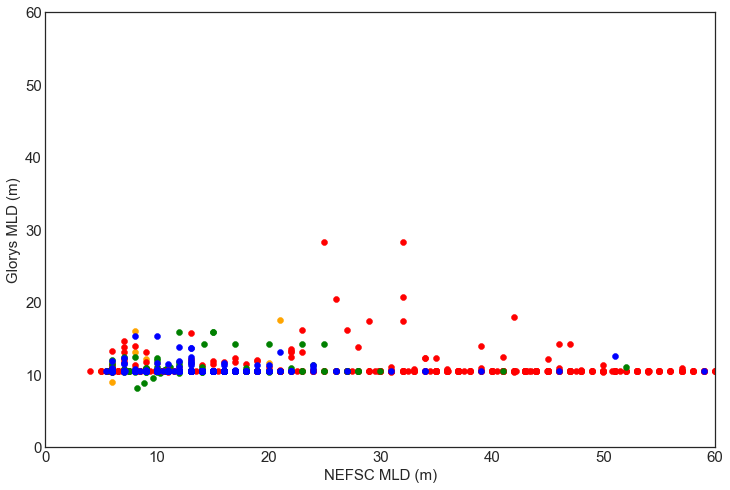

In [840]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,60)
plt.xlim(0,60)
plt.scatter(SouthernMABNEFSC_june, SouthernMABGlorys_june,color='orange',label='Southern MAB')
plt.scatter(NorthernMABNEFSC_june, NorthernMABGlorys_june,color='green',label='Northern MAB')
plt.scatter(GeorgesBankNEFSC_june, GeorgesBankGlorys_june,color='red',label='Georges Bank')
plt.scatter(EGoMNEFSC_june, EGoMGlorys_june,color='green',label='Eastern GoM')
plt.scatter(WGoMNEFSC_june, WGoMGlorys_june,color='blue',label='Western GoM')
# leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.show()

# July

In [1014]:
GeorgesBankGlorys_july = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
GeorgesBankNEFSC_july = [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 46.0, 6.0, 6.0, 6.0, 12.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 6.0, 6.0, 40.0, 46.0, 55.0, 6.0, 6.0, 6.0, 7.0, 6.0, 8.0, 6.0, 6.0, 9.0, 6.0, 6.0, 7.0, 68.0, 8.0, 16.0, 52.0, 49.0, 34.0, 26.0, 6.0, 10.0, 43.0, 6.0, 6.0, 30.0, 58.0, 50.0, 48.0, 30.0, 38.0, 38.0, 46.0, 6.0, 8.0, 9.0, 34.0, 20.0, 27.0, 30.0, 16.0, 29.0, 11.0, 13.0, 10.0, 6.0, 7.0, 6.0, 43.0, 30.0, 9.0, 42.0, 47.0, 40.0, 6.0, 6.0, 6.0, 6.0, 6.0, 52.0, 67.0, 7.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 8.0, 6.0, 9.0, 9.0, 10.0, 7.0, 11.0, 6.0, 6.0, 8.0, 9.0, 8.0, 6.0, 8.0, 7.0, 6.0, 7.0, 11.0, 7.0, 6.0, 7.0, 9.0, 9.0, 6.0, 9.0, 11.0, 7.0, 6.0, 6.0, 6.0, 6.0, 17.0, 37.0, 6.0, 6.0, 6.0, 6.0, 39.0, 42.0, 9.0, 6.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 43.0, 45.0, 33.0, 40.0, 22.0, 33.0, 6.0, 6.0, 11.0, 8.0, 8.0, 7.0, 13.0, 6.0, 52.0, 60.0, 11.0, 7.0, 14.0, 10.0, 10.0, 8.0, 15.0, 11.0, 6.0, 6.0, 64.0, 62.0, 7.0, 6.0, 41.0, 53.0, 59.0, 50.0, 34.0, 29.0, 51.0, 46.0, 6.0, 7.0, 60.0, 11.0, 56.0, 8.0, 29.0, 28.0, 33.0, 8.0, 6.0, 6.0, 10.0, 12.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 40.0, 7.0, 49.0, 7.0, 8.0, 6.0, 6.0, 12.0, 6.0, 7.0, 8.0, 6.0, 6.0, 10.0, 7.0, 6.0, 10.0, 7.0, 11.0, 6.0, 11.0, 5.0, 37.0, 34.0, 51.0, 54.0, 49.0, 11.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 29.0, 8.0, 9.0, 9.0, 6.0, 7.0, 45.0, 8.0, 8.0, 6.0, 7.0, 8.0, 6.0, 6.0, 6.0, 11.0, 7.0, 9.0, 6.0, 54.0, 15.0, 6.0, 6.0, 6.0, 9.0, 9.0, 6.0, 6.0, 7.0, 6.0, 10.0, 7.0, 7.0, 8.0, 6.0, 9.0, 57.0, 6.0, 20.0, 9.0, 10.0, 6.0, 8.0, 8.0, 20.0, 7.0, 7.0, 7.0, 6.0, 6.0, 9.0, 38.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 15.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 28.0, 8.0, 8.0, 6.0, 6.0, 6.0, 7.0, 11.0, 6.0, 6.0, 7.0, 6.0, 9.0, 7.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 51.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 45.0, 9.0, 8.0, 9.0, 43.0, 9.0, 12.0, 9.0, 10.0, 11.0, 6.0, 15.0, 13.0, 14.0, 18.0, 11.0, 12.0, 16.0, 23.0, 12.0, 50.0, 34.0, 6.0, 5.0, 6.0, 6.0, 32.0, 17.0, 11.0, 12.0, 10.0, 14.0, 9.0, 6.0, 9.0, 6.0, 8.0, 6.0, 6.0, 7.0, 8.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 13.0, 6.0, 6.0, 20.0, 57.0, 8.0, 7.0, 6.0, 10.0, 6.0, 6.0, 9.0, 6.0, 6.0, 7.0, 7.0, 11.0, 6.0, 6.0, 8.0, 6.0, 7.0, 6.0, 6.0, 7.0, 8.0, 53.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 11.0, 6.0, 7.0, 6.0, 6.0, 54.0, 6.0, 55.0, 6.0, 6.0, 7.0, 6.0, 8.0, 8.0, 8.0, 6.0, 10.0, 10.0, 8.0, 8.0, 8.0, 9.0, 7.0, 14.0, 6.0, 6.0, 14.0, 6.0, 6.0, 10.0, 6.0, 7.0, 9.0, 12.0, 8.0, 11.0, 11.0, 6.0, 9.0, 7.0, 6.0, 9.0, 17.0, 9.0, 9.0, 9.0, 7.0, 15.0, 7.0, 7.0, 6.0, 9.0, 11.0, 14.0, 12.0, 9.0, 6.0, 9.0, 8.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 8.0, 13.0, 6.0, 6.0, 11.0, 6.0, 6.0, 47.0, 58.0, 8.0, 13.0, 19.0, 6.0, 13.0, 6.0, 10.0, 20.0, 33.0, 8.0, 10.0, 12.0, 7.0, 58.0, 6.0, 14.0, 13.0, 6.0, 8.0, 6.0, 9.0, 8.0, 8.0, 7.0, 8.0, 5.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 8.0, 9.0]

In [1015]:
SouthernMABGlorys_july = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
SouthernMABNEFSC_july = [6.0, 6.0, 6.0, 7.0, 7.0, 8.0, 7.0, 7.0, 9.0, 10.0, 13.0, 12.0, 10.0, 10.0, 9.0, 9.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 11.0, 10.0, 6.0, 11.0, 9.0, 8.0, 6.0, 9.0, 6.0, 7.0, 13.0, 11.0, 6.0, 6.0, 6.0, 7.0, 11.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 9.0, 8.0, 6.0, 7.0, 7.0, 8.0, 10.0, 6.0, 15.0, 10.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 7.0, 6.0, 8.0, 6.0, 7.0, 8.0, 11.0, 9.0, 13.0, 6.0, 7.0, 13.0, 13.0, 11.0, 9.0, 11.0, 8.0, 8.0, 10.0, 8.0, 12.0, 10.0, 8.0, 9.0, 6.0, 9.0, 11.0, 14.0, 9.0, 8.0, 7.0, 9.0, 10.0, 12.0, 6.0, 6.0, 7.0, 7.0, 8.0, 7.0, 9.0, 7.0, 9.0, 8.0, 7.0, 6.0, 8.0, 6.0, 6.0, 6.0, 12.0, 7.0, 10.0, 6.0, 12.0, 11.0, 10.0, 8.0, 6.0, 8.0, 6.0, 13.0, 9.0, 9.0, 10.0, 13.0, 11.0, 14.0, 15.0, 17.0, 13.0, 12.0, 14.0, 7.0, 9.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 11.0, 6.0, 12.0, 7.0, 9.0, 10.0, 6.0, 17.0, 9.0, 6.0, 9.0, 12.0, 11.0, 11.0, 12.0, 11.0, 9.0, 10.0, 11.0, 14.0, 12.0, 11.0, 10.0, 6.0, 6.0, 10.0, 11.0, 16.0, 10.0, 6.0, 11.0, 7.0, 10.0, 6.0, 7.0, 11.0, 11.0, 8.0, 8.0, 6.0, 11.0, 6.0, 6.0, 9.0, 8.0, 10.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 7.0, 7.0, 9.0, 8.0, 9.0, 7.0, 7.0, 7.0, 7.0, 8.0, 10.0, 12.0, 8.0, 11.0, 8.0, 7.0, 10.0, 7.0, 13.0, 11.0, 13.0, 8.0, 9.0, 7.0, 6.0, 9.0, 7.0, 12.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 12.0, 10.0, 22.0, 11.0, 8.0, 6.0, 6.0, 6.0, 8.0, 6.0, 11.0, 10.0, 11.0, 13.0, 14.0, 9.0, 9.0, 7.0, 13.0, 13.0, 12.0, 11.0, 12.0, 14.0, 11.0, 12.0, 12.0, 15.0, 14.0, 15.0, 14.0, 13.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 9.0, 6.0, 6.0, 8.0, 8.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 10.0, 7.0, 8.0, 7.0, 8.0, 6.0, 6.0, 7.0, 10.0, 5.0, 6.0, 6.0, 7.0, 32.0, 8.0, 7.0, 8.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 11.0, 10.0, 9.0, 9.0, 13.0, 12.0, 9.0, 10.0, 8.0, 11.0, 9.0, 9.0, 10.0, 11.0, 13.0, 7.0, 12.0, 10.0, 11.0, 9.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 9.0, 9.0, 12.0, 10.0, 10.0, 6.0, 10.0, 10.0, 10.0, 7.0, 11.0, 6.0, 7.0, 6.0, 6.0, 9.0, 8.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 8.0, 8.0, 7.0, 6.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 9.0, 7.0, 10.0, 8.0, 6.0, 6.0, 6.0, 6.0, 7.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 9.0, 11.0, 10.0, 12.0, 11.0, 8.0, 7.0, 9.0, 9.0, 6.0, 11.0, 12.0, 12.0, 14.0, 8.0, 13.0, 8.0, 9.0, 11.0, 8.0, 7.0, 6.0, 8.0, 8.0, 8.0, 9.0, 8.0, 8.0, 8.0, 9.0, 7.0, 9.0, 8.0, 9.0, 11.0, 10.0, 10.0, 8.0, 6.0, 9.0, 10.0, 6.0, 11.0, 11.0, 18.0, 6.0, 11.0, 7.0, 7.0, 11.0, 8.0, 7.0, 8.0, 7.0, 8.0, 11.0, 6.0, 8.0, 6.0, 12.0, 9.0, 10.0, 11.0, 7.0, 7.0, 11.0, 14.0, 8.0, 7.0, 8.0, 7.0, 9.0, 8.0, 6.0, 6.0, 6.0, 8.0, 6.0, 9.0, 11.0, 6.0, 7.0, 8.0, 6.0, 11.0, 10.0, 6.0, 9.0, 9.0, 8.0, 6.0, 9.0, 10.0, 12.0, 11.0, 9.0, 7.0, 9.0, 8.0, 6.0, 6.0, 6.0, 7.0, 9.0, 12.0, 6.0, 8.0, 11.0, 10.0, 11.0, 8.0, 13.0, 12.0, 9.0, 12.0, 7.0, 10.0, 8.0, 7.0, 8.0, 6.0, 7.0, 7.0, 8.0, 11.0, 7.0, 9.0, 6.0, 8.0, 7.0, 8.0, 6.0, 5.0, 6.0, 9.0, 6.0, 7.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 7.0, 6.0, 9.0, 9.0, 9.0, 6.0, 7.0, 6.0, 11.0, 12.0, 12.0, 12.0, 14.0, 9.0, 9.0, 6.0, 7.0, 10.0, 7.0, 10.0, 9.0, 8.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 6.0, 9.0, 6.0, 11.0, 10.0, 8.0, 7.0, 6.0, 8.0, 8.0, 7.0, 7.0, 9.0, 10.0, 6.0, 7.0, 11.0]

In [1016]:
NorthernMABGlorys_july = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293]
NorthernMABNEFSC_july = [6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 9.0, 6.0, 8.0, 10.0, 8.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 7.0, 6.0, 6.0, 8.0, 6.0, 9.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 11.0, 8.0, 8.0, 7.0, 6.0, 8.0, 10.0, 7.0, 9.0, 10.0, 7.0, 8.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 8.0, 6.0, 11.0, 8.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0, 6.0, 6.0, 9.0, 9.0, 7.0, 7.0, 6.0, 6.0, 6.0, 9.0, 11.0, 10.0, 10.0, 13.0, 12.0, 8.0, 18.0, 7.0, 6.0, 6.0, 8.0, 8.0, 8.0, 11.0, 7.0, 12.0, 6.0, 8.0, 7.0, 6.0, 6.0, 5.0, 6.0, 6.0, 9.0, 12.0, 6.0, 9.0, 10.0, 10.0, 6.0, 8.0, 9.0, 7.0, 12.0, 9.0, 6.0, 6.0, 9.0, 7.0, 7.0, 6.0, 11.0, 7.0, 8.0, 9.0, 10.0, 9.0, 6.0, 8.0, 6.0, 6.0, 8.0, 6.0, 5.0, 9.0, 6.0, 7.0, 9.0, 8.0, 6.0, 6.0, 6.0, 11.0, 8.0, 7.0, 8.0, 10.0, 9.0, 11.0, 16.0, 7.0, 11.0, 7.0, 8.0, 8.0, 10.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 7.0, 6.0, 9.0, 8.0, 6.0, 13.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 35.0, 6.0, 6.0, 6.0, 8.0, 6.0, 8.0, 8.0, 7.0, 8.0, 12.0, 8.0, 6.0, 6.0, 9.0, 8.0, 7.0, 6.0, 6.0, 9.0, 8.0, 6.0, 7.0, 9.0, 6.0, 6.0, 6.0, 6.0]

In [1064]:
WGoMGlorys_july = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.460738, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
WGoMNEFSC_july = [13.0, 9.0, 8.0, 6.0, 9.0, 7.0, 10.0, 13.0, 9.0, 9.0, 8.0, 11.0, 8.0, 10.0, 7.0, 6.0, 6.0, 7.0, 8.0, 8.0, 10.0, 9.0, 12.0, 8.0, 14.0, 9.0, 6.0, 9.0, 8.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 9.0, 11.0, 6.0, 7.0, 9.0, 8.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 11.0, 7.0, 9.0, 6.0, 8.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 7.0, 6.0, 6.0, 7.0, 13.0, 7.0, 16.0, 7.0, 12.0, 7.0, 6.0, 6.0, 8.0, 8.0, 6.0, 6.0, 6.0, 9.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 7.0, 11.0, 7.0, 6.0, 7.0, 7.0, 6.0, 6.0, 7.0, 9.0, 12.0, 13.0, 9.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 19.0, 12.0, 7.0, 16.0, 6.0, 7.0, 6.0, 12.0, 10.0, 14.0]

In [1018]:
EGoMGlorys_july = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
EGoMNEFSC_july = [8.0, 14.0, 6.0, 6.0, 10.0, 10.0, 6.0, 6.0, 6.0, 7.0, 8.0, 7.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 14.0, 11.0, 9.0, 8.0, 11.0, 6.0, 6.0, 6.0, 11.0, 7.0, 11.0, 7.0, 6.0, 6.0, 7.0, 7.0, 7.0, 6.0, 6.0, 8.0, 10.0, 14.0, 12.0, 9.0, 19.0, 18.0, 12.0, 12.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 11.0, 7.0, 6.0, 11.0, 11.0, 6.0, 6.0, 6.0, 13.0, 6.0, 6.0, 8.0, 21.0, 6.0, 6.0, 7.0]

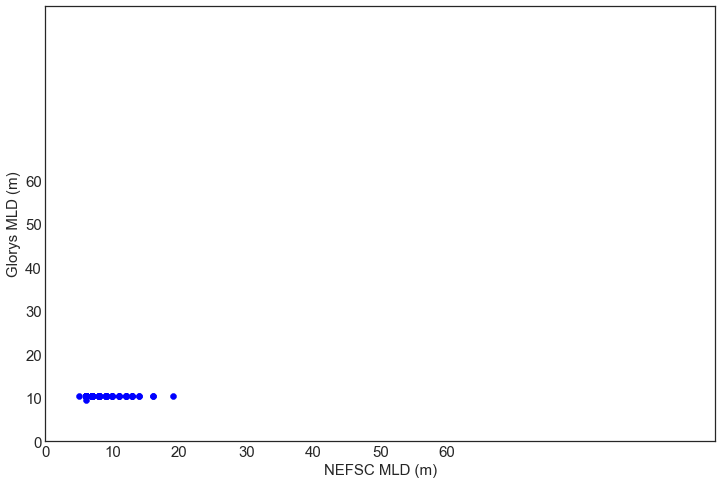

In [1065]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,100)
plt.xlim(0,100)
# plt.scatter(SouthernMABNEFSC_july, SouthernMABGlorys_july,color='orange',label='Southern MAB')
# plt.scatter(NorthernMABNEFSC_july, NorthernMABGlorys_july,color='green',label='Northern MAB')
# plt.scatter(GeorgesBankNEFSC_july, GeorgesBankGlorys_july,color='red',label='Georges Bank')
# plt.scatter(EGoMNEFSC_july, EGoMGlorys_july,color='green',label='Eastern GoM')
plt.scatter(WGoMNEFSC_july, WGoMGlorys_july,color='blue',label='Western GoM')
# leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.show()

# August

In [1020]:
GeorgesBankGlorys_aug = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.834071, 12.359997, 15.717033, 10.376293, 17.395552, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.327404, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.327404, 11.1392565, 11.597034, 11.444442, 17.548145, 17.85333, 12.970367, 11.597034, 12.0548115, 12.0548115, 12.665182, 15.411848, 14.191108, 12.817775, 12.207404, 11.597034, 11.902219, 12.359997, 11.444442, 10.986664, 10.834071, 11.444442, 11.597034, 11.444442, 11.597034, 10.834071, 10.528886, 10.528886, 10.834071, 11.444442, 10.528886, 10.528886, 11.291849, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 10.6814785, 10.986664, 10.986664, 10.986664, 10.986664, 10.834071, 10.834071, 10.986664, 11.1392565, 10.834071, 10.834071, 11.1392565, 10.986664, 10.986664, 10.986664, 11.749626, 11.597034, 11.902219, 11.902219, 10.528886, 11.291849, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 12.359997, 10.528886, 20.142218, 15.259255, 23.651846, 9.918516, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.207404, 15.411848, 14.038515, 14.038515, 14.191108, 15.869626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.902219, 10.528886, 14.496293, 15.411848, 13.73333, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.749626, 11.444442, 11.597034, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 11.291849, 11.291849, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.834071, 11.291849, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 11.1392565, 11.1392565, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 11.1392565, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 10.6814785, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 11.749626, 11.749626, 10.834071, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.496293, 10.6814785, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 13.275552, 14.038515, 18.311108, 17.24296, 12.512589, 10.2237015, 13.428144, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 11.444442, 10.528886, 11.291849, 10.528886, 19.837032, 10.528886, 10.986664, 10.986664, 10.834071, 10.528886, 10.528886, 19.837032, 10.528886, 11.291849, 10.528886, 10.528886, 10.528886, 13.580737, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
GeorgesBankNEFSC_aug = [7.0, 11.0, 18.0, 10.0, 8.0, 6.0, 6.0, 22.0, 11.0, 12.0, 6.0, 8.0, 7.0, 12.0, 6.0, 12.0, 12.0, 8.0, 7.0, 6.0, 17.0, 6.0, 7.0, 22.0, 6.0, 6.0, 6.0, 13.0, 6.0, 47.0, 6.0, 6.0, 6.0, 27.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 44.0, 46.0, 19.0, 15.0, 10.0, 6.0, 10.0, 56.0, 13.0, 6.0, 12.0, 12.0, 15.0, 37.0, 42.0, 17.0, 8.0, 16.0, 22.0, 22.0, 8.0, 13.0, 11.0, 7.0, 6.0, 7.0, 9.0, 12.0, 6.0, 13.0, 6.0, 6.0, 7.0, 6.0, 14.0, 6.0, 9.0, 10.0, 12.0, 9.0, 6.0, 8.0, 10.0, 18.0, 6.0, 58.0, 23.0, 48.0, 53.0, 50.0, 48.0, 34.0, 26.0, 12.0, 6.0, 15.0, 9.0, 6.0, 9.0, 6.0, 11.0, 19.0, 13.0, 13.0, 11.0, 20.0, 17.0, 15.0, 13.0, 12.0, 28.0, 15.0, 8.0, 32.0, 16.0, 8.0, 12.0, 10.0, 27.0, 13.0, 9.0, 9.0, 10.0, 11.0, 8.0, 9.0, 6.0, 17.0, 7.0, 9.0, 8.0, 10.0, 24.0, 66.0, 10.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 7.0, 6.0, 7.0, 6.0, 13.0, 11.0, 11.0, 35.0, 9.0, 8.0, 6.0, 29.0, 24.0, 17.0, 43.0, 49.0, 56.0, 8.0, 6.0, 6.0, 6.0, 6.0, 11.0, 22.0, 26.0, 6.0, 25.0, 7.0, 10.0, 7.0, 12.0, 6.0, 6.0, 6.0, 11.0, 9.0, 6.0, 6.0, 51.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 9.0, 8.0, 6.0, 11.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 17.0, 6.0, 6.0, 7.0, 26.0, 56.0, 59.0, 25.0, 13.0, 13.0, 6.0, 5.0, 6.0, 6.0, 30.0, 15.0, 56.0, 43.0, 34.0, 37.0, 53.0, 12.0, 11.0, 9.0, 12.0, 11.0, 27.0, 8.0, 8.0, 7.0, 8.0, 10.0, 9.0, 10.0, 15.0, 12.0, 10.0, 8.0, 16.0, 7.0, 7.0, 12.0, 12.0, 8.0, 13.0, 64.0, 23.0, 58.0, 9.0, 8.0, 29.0, 12.0, 11.0, 48.0, 48.0, 54.0, 59.0, 57.0, 57.0, 59.0, 10.0, 9.0, 6.0, 7.0, 11.0, 8.0, 6.0, 9.0, 6.0, 12.0, 6.0, 9.0, 6.0, 6.0, 7.0, 6.0, 10.0, 6.0, 6.0, 9.0, 14.0, 8.0, 11.0, 9.0, 8.0, 10.0, 6.0, 6.0, 9.0, 9.0, 10.0, 9.0, 13.0, 11.0, 11.0, 6.0, 8.0, 9.0, 10.0, 6.0, 6.0, 8.0, 6.0, 13.0, 11.0, 6.0, 6.0, 8.0, 9.0, 9.0, 11.0, 7.0, 8.0, 12.0, 6.0, 6.0, 7.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 8.0, 6.0, 7.0, 63.0, 67.0, 6.0, 71.0, 34.0, 19.0, 9.0, 9.0, 6.0, 59.0, 7.0, 49.0, 50.0, 24.0, 10.0, 12.0, 48.0, 37.0, 44.0, 7.0, 8.0, 28.0, 45.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 17.0, 10.0, 8.0, 8.0, 40.0, 59.0, 6.0, 57.0, 41.0, 17.0, 10.0, 15.0, 27.0, 42.0, 16.0, 25.0, 23.0, 38.0, 7.0, 35.0, 9.0, 8.0, 7.0, 6.0, 7.0, 6.0, 15.0, 39.0, 10.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 52.0, 47.0, 51.0, 6.0, 6.0, 8.0, 9.0, 6.0, 6.0, 18.0, 4.0, 11.0, 6.0, 9.0, 12.0, 7.0, 7.0, 7.0, 13.0, 7.0, 9.0, 7.0, 7.0, 10.0, 8.0, 8.0, 6.0, 9.0, 6.0, 7.0, 11.0, 55.0, 5.0, 6.0, 6.0, 8.0, 6.0, 21.0, 23.0, 7.0, 9.0, 7.0, 7.0, 6.0, 8.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 12.0, 45.0, 31.0, 46.0, 6.0, 9.0, 15.0, 7.0, 7.0, 12.0, 30.0, 40.0, 12.0, 30.0, 8.0, 8.0, 35.0, 15.0, 23.0, 6.0, 6.0, 7.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 9.0, 47.0, 57.0, 5.0, 6.0, 6.0, 14.0, 6.0, 15.0, 6.0, 12.0, 6.0, 5.0, 7.0, 6.0, 6.0, 6.0, 9.0, 6.0, 7.0, 26.0, 32.0, 59.0, 7.0, 6.0, 9.0, 7.0, 9.0, 9.0, 6.0, 6.0, 8.0, 7.0, 50.0, 8.0, 6.0, 56.0, 6.0, 29.0, 6.0, 16.0, 11.0, 8.0, 8.0, 6.0, 7.0, 41.0, 39.0, 25.0, 39.0, 6.0, 9.0, 28.0, 7.0, 37.0, 31.0, 37.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 10.0, 26.0, 14.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 11.0, 7.0, 6.0, 8.0, 7.0, 19.0, 6.0, 7.0, 7.0, 9.0, 9.0, 10.0, 7.0, 11.0, 17.0, 12.0, 38.0, 7.0, 9.0, 19.0, 6.0, 7.0, 7.0, 6.0, 55.0, 18.0, 6.0, 6.0, 10.0, 14.0, 54.0, 15.0, 9.0, 10.0, 8.0, 57.0, 16.0, 13.0, 6.0, 11.0, 15.0, 9.0, 16.0, 9.0, 16.0, 16.0, 8.0, 8.0, 16.0, 8.0, 8.0, 7.0, 6.0, 49.0, 55.0, 17.0, 6.0, 9.0, 10.0, 12.0, 9.0, 14.0, 22.0, 6.0, 15.0, 8.0, 15.0, 6.0, 6.0, 9.0, 6.0, 12.0, 7.0, 7.0, 39.0, 32.0, 20.0, 9.0, 6.0, 14.0, 17.0, 6.0, 12.0, 6.0, 46.0, 33.0, 24.0, 29.0, 41.0, 6.0, 51.0, 7.0, 11.0, 16.0, 12.0, 11.0, 8.0, 8.0, 6.0, 7.0, 11.0, 6.0, 6.0, 6.0, 11.0, 8.0, 7.0, 9.0, 12.0, 12.0, 16.0, 16.0, 12.0, 16.0, 14.0, 20.0, 22.0, 19.0, 9.0, 12.0, 8.0, 7.0, 9.0, 6.0, 6.0, 8.0, 7.0, 8.0, 6.0, 9.0, 11.0, 6.0, 7.0, 11.0, 6.0, 8.0, 6.0, 7.0, 10.0, 6.0, 15.0, 7.0, 6.0, 7.0, 11.0, 6.0, 44.0, 43.0, 45.0, 46.0, 39.0, 35.0, 18.0, 11.0, 8.0, 10.0, 13.0, 49.0, 7.0, 6.0, 6.0, 25.0, 61.0, 6.0, 6.0, 8.0, 55.0, 52.0, 35.0, 20.0, 37.0, 13.0, 13.0, 10.0, 8.0, 16.0, 6.0, 37.0, 6.0, 7.0, 17.0, 16.0, 17.0, 21.0, 10.0, 6.0, 29.0, 41.0, 47.0, 45.0, 6.0, 20.0, 7.0, 11.0, 6.0, 57.0, 8.0, 8.0, 6.0, 9.0, 6.0, 6.0, 8.0, 9.0, 22.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 10.0, 6.0, 6.0, 6.0, 6.0, 9.0, 10.0, 10.0, 11.0, 10.0, 12.0, 10.0, 16.0, 12.0, 12.0, 6.0, 11.0, 7.0, 8.0, 12.0, 8.0, 8.0, 8.0, 6.0, 7.0, 13.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 48.0, 8.0, 18.0, 29.0, 6.0, 9.0, 19.0, 6.0, 6.0, 50.0, 6.0, 6.0, 11.0, 6.0, 15.0, 6.0, 7.0, 8.0, 8.0, 6.0, 11.0, 8.0, 10.0, 9.0, 10.0, 6.0, 6.0, 6.0, 12.0, 20.0, 18.0, 6.0, 6.0, 6.0, 42.0, 9.0, 6.0, 6.0, 6.0, 6.0, 9.0, 8.0, 6.0, 41.0, 31.0, 46.0, 37.0, 34.0, 30.0, 6.0, 6.0, 12.0, 13.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 13.0, 8.0, 9.0, 8.0, 6.0, 9.0, 12.0, 8.0, 9.0, 10.0, 6.0, 7.0, 8.0, 6.0, 11.0, 9.0, 13.0, 12.0, 15.0, 14.0, 9.0, 11.0, 10.0, 9.0, 6.0, 12.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 20.0, 9.0, 7.0, 14.0, 9.0, 13.0, 9.0, 12.0, 8.0, 8.0, 9.0, 6.0, 13.0, 7.0, 49.0, 13.0, 9.0, 15.0, 23.0, 49.0, 9.0, 6.0, 10.0, 6.0, 6.0, 8.0, 30.0, 34.0, 37.0, 6.0, 26.0, 34.0, 42.0, 61.0, 15.0, 56.0, 38.0, 8.0, 6.0, 12.0, 9.0, 6.0, 8.0, 9.0, 6.0, 8.0, 6.0, 48.0, 33.0, 8.0, 39.0, 40.0, 37.0, 33.0, 9.0, 6.0, 8.0, 6.0, 9.0, 30.0, 25.0, 26.0, 6.0, 7.0, 7.0, 36.0, 10.0, 6.0, 8.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 15.0, 7.0, 6.0, 6.0, 7.0, 8.0, 7.0, 16.0, 62.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 9.0, 9.0, 6.0, 6.0, 6.0, 53.0, 6.0, 6.0, 9.0, 6.0, 7.0, 7.0, 8.0, 17.0, 11.0, 6.0, 7.0, 7.0, 12.0, 7.0, 9.0, 7.0, 36.0, 33.0, 43.0, 44.0, 60.0, 61.0, 6.0, 8.0, 16.0, 17.0, 6.0, 7.0, 8.0, 6.0, 5.0, 25.0, 48.0, 6.0, 7.0, 8.0, 6.0, 6.0, 6.0, 9.0, 6.0, 7.0, 7.0, 9.0, 27.0, 6.0, 6.0, 10.0, 6.0, 6.0, 7.0, 10.0, 6.0, 8.0, 16.0, 18.0, 19.0, 20.0, 57.0, 7.0, 7.0, 8.0, 7.0, 10.0, 8.0, 9.0, 12.0, 9.0, 8.0, 6.0, 7.0, 7.0, 6.0, 8.0, 8.0, 11.0, 12.0, 11.0, 9.0, 6.0, 7.0, 11.0, 8.0, 8.0, 6.0, 6.0, 7.0, 9.0, 6.0, 10.0, 6.0, 6.0, 9.0, 7.0, 10.0, 10.0, 6.0, 8.0, 7.0, 6.0, 6.0, 7.0, 34.0, 44.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 8.0, 6.0, 9.0, 8.0, 13.0, 6.0, 6.0, 6.0, 7.0, 10.0, 6.0, 6.0, 6.0, 7.0, 52.0, 50.0, 42.0, 32.0, 39.0, 44.0, 7.0, 9.0, 14.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 44.0, 34.0, 51.0, 11.0, 46.0, 8.0, 10.0, 29.0, 15.0, 6.0, 7.0, 18.0, 6.0, 6.0, 6.0, 10.0, 7.0, 12.0, 23.0, 12.0, 9.0, 15.0, 6.0, 6.0, 11.0, 18.0, 6.0, 6.0, 10.0, 8.0, 7.0, 6.0, 41.0, 6.0, 6.0, 10.0, 6.0, 29.0, 53.0, 53.0, 9.0, 6.0, 6.0, 11.0, 6.0, 6.0, 9.0, 9.0, 11.0, 6.0, 6.0, 8.0, 6.0, 67.0, 11.0, 6.0, 6.0, 12.0, 8.0, 6.0, 6.0, 13.0, 16.0, 7.0, 54.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 37.0, 10.0, 8.0, 12.0, 56.0, 15.0, 47.0, 41.0, 28.0, 45.0, 11.0, 10.0, 8.0, 8.0, 18.0, 6.0, 12.0, 16.0, 30.0, 62.0, 6.0, 6.0, 6.0, 8.0, 18.0, 8.0, 6.0, 6.0, 41.0, 36.0, 36.0, 39.0, 8.0, 6.0, 6.0, 6.0, 24.0, 31.0, 21.0, 18.0, 29.0, 23.0, 47.0, 46.0, 44.0, 43.0, 45.0, 8.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 18.0, 28.0, 6.0, 6.0, 6.0, 14.0, 49.0, 52.0, 51.0, 56.0, 54.0, 48.0, 6.0, 6.0, 9.0, 14.0, 6.0, 6.0, 9.0, 7.0, 6.0, 11.0, 15.0, 6.0, 6.0, 6.0, 6.0, 9.0, 48.0, 47.0, 46.0, 49.0, 48.0, 50.0, 44.0, 9.0, 7.0, 8.0, 7.0, 12.0, 10.0, 8.0, 6.0, 6.0, 7.0, 8.0, 8.0, 6.0, 6.0, 8.0, 6.0, 8.0, 10.0, 6.0, 8.0, 12.0, 14.0, 20.0, 47.0, 62.0, 55.0, 50.0, 47.0, 54.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 13.0, 37.0, 35.0, 36.0, 35.0, 36.0, 38.0, 42.0, 40.0, 34.0, 19.0, 32.0, 6.0, 7.0, 6.0, 6.0, 45.0, 6.0, 41.0, 40.0, 39.0, 6.0, 11.0, 7.0, 12.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 39.0, 39.0, 35.0, 36.0, 35.0, 20.0, 16.0, 6.0, 6.0, 36.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 21.0, 33.0, 37.0, 34.0, 34.0, 32.0, 31.0, 31.0, 30.0, 32.0, 35.0, 33.0, 33.0, 28.0, 29.0, 31.0, 31.0, 7.0, 10.0, 8.0, 8.0, 23.0, 37.0, 41.0, 6.0, 62.0, 6.0, 9.0, 6.0, 7.0, 6.0, 12.0, 41.0, 6.0, 6.0, 8.0, 7.0, 7.0, 44.0, 34.0, 33.0, 16.0, 37.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 18.0, 10.0, 7.0, 6.0, 6.0, 43.0, 18.0, 59.0, 7.0, 10.0, 10.0, 6.0, 18.0, 6.0, 7.0, 33.0, 10.0, 48.0, 48.0, 13.0, 10.0, 37.0, 34.0, 50.0, 40.0, 54.0, 51.0, 9.0, 7.0, 6.0, 55.0, 8.0, 13.0, 11.0, 8.0, 7.0, 7.0, 6.0, 6.0, 6.0, 16.0, 6.0, 16.0, 6.0, 6.0, 15.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 9.0, 9.0, 11.0, 9.0, 7.0, 11.0, 29.0, 6.0, 6.0, 8.0, 9.0, 7.0, 35.0, 14.0, 6.0, 6.0, 10.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 16.0, 17.0, 6.0, 14.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 35.0, 55.0, 7.0, 10.0, 12.0, 9.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 8.0, 33.0, 35.0, 7.0, 15.0, 9.0, 14.0, 14.0, 16.0, 18.0, 7.0, 8.0, 15.0, 6.0, 6.0, 40.0, 17.0, 8.0, 29.0, 29.0, 46.0, 45.0, 33.0, 16.0, 9.0, 22.0, 12.0, 44.0, 12.0, 6.0, 7.0, 8.0, 6.0, 29.0, 21.0, 7.0, 12.0, 21.0, 40.0, 27.0, 31.0, 14.0, 10.0, 12.0, 6.0, 7.0, 9.0, 8.0, 6.0, 7.0, 6.0, 6.0, 8.0, 6.0, 13.0, 10.0, 6.0, 6.0, 7.0, 6.0, 7.0, 7.0, 7.0, 6.0, 24.0, 38.0, 25.0, 11.0, 6.0, 34.0, 13.0, 11.0, 44.0, 26.0, 42.0, 46.0, 52.0, 11.0, 6.0, 61.0, 8.0, 6.0, 34.0, 6.0, 7.0, 17.0, 6.0, 7.0, 8.0, 8.0, 8.0, 8.0, 6.0, 22.0, 37.0, 24.0, 37.0, 6.0, 6.0, 7.0, 9.0, 8.0, 11.0, 7.0]

In [1021]:
SouthernMABGlorys_aug = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.512589, 12.512589, 17.85333, 14.191108, 10.6814785, 11.444442, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 9.918516, 9.918516, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.2237015, 10.2237015, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.0548115, 13.122959, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 11.1392565, 11.1392565, 9.918516, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 11.444442, 10.528886, 10.528886, 9.00296, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.2237015, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.918516, 10.528886, 10.528886, 10.071109, 10.528886, 9.00296, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 14.496293, 10.528886, 10.528886, 10.528886, 17.090366, 10.528886, 18.158514, 10.528886, 10.528886, 15.869626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.496293, 18.311108, 16.937775, 15.869626, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.376293, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 11.291849, 11.291849, 11.444442, 11.749626, 11.902219, 12.359997, 10.528886, 10.528886, 10.528886, 14.038515, 13.580737, 10.528886, 16.479998, 10.071109, 13.73333, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 12.0548115]
SouthernMABNEFSC_aug = [9.0, 7.0, 7.0, 7.0, 6.0, 9.0, 8.0, 10.0, 11.0, 14.0, 6.0, 10.0, 9.0, 12.0, 11.0, 8.0, 11.0, 13.0, 9.0, 13.0, 15.0, 10.0, 14.0, 12.0, 8.0, 9.0, 12.0, 12.0, 9.0, 10.0, 9.0, 11.0, 9.0, 12.0, 8.0, 10.0, 9.0, 8.0, 11.0, 7.0, 15.0, 15.0, 14.0, 12.0, 14.0, 15.0, 12.0, 11.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 7.0, 6.0, 6.0, 6.0, 12.0, 12.0, 13.0, 14.0, 14.0, 15.0, 11.0, 10.0, 10.0, 11.0, 12.0, 11.0, 16.0, 9.0, 7.0, 6.0, 6.0, 12.0, 9.0, 14.0, 13.0, 7.0, 11.0, 8.0, 12.0, 11.0, 8.0, 9.0, 6.0, 9.0, 8.0, 20.0, 7.0, 9.0, 13.0, 12.0, 11.0, 14.0, 10.0, 10.0, 14.0, 11.0, 8.0, 6.0, 12.0, 11.0, 12.0, 14.0, 12.0, 13.0, 9.0, 13.0, 11.0, 12.0, 10.0, 12.0, 7.0, 11.0, 8.0, 6.0, 8.0, 8.0, 8.0, 8.0, 7.0, 8.0, 8.0, 7.0, 8.0, 6.0, 6.0, 9.0, 6.0, 6.0, 7.0, 8.0, 12.0, 7.0, 6.0, 6.0, 9.0, 7.0, 7.0, 7.0, 8.0, 7.0, 7.0, 8.0, 8.0, 8.0, 9.0, 7.0, 6.0, 11.0, 10.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 7.0, 9.0, 8.0, 7.0, 10.0, 6.0, 7.0, 11.0, 7.0, 7.0, 7.0, 6.0, 7.0, 6.0, 6.0, 7.0, 9.0, 8.0, 6.0, 6.0, 7.0, 10.0, 7.0, 8.0, 8.0, 9.0, 9.0, 9.0, 11.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 7.0, 6.0, 6.0, 6.0, 12.0, 17.0, 6.0, 8.0, 10.0, 12.0, 12.0, 11.0, 16.0, 8.0, 11.0, 11.0, 29.0, 8.0, 7.0, 12.0, 12.0, 15.0, 13.0, 22.0, 12.0, 7.0, 8.0, 14.0, 13.0, 12.0, 13.0, 18.0, 15.0, 14.0, 9.0, 8.0, 12.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 9.0, 8.0, 6.0, 6.0, 12.0, 9.0, 7.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 6.0, 7.0, 6.0, 8.0, 13.0, 12.0, 8.0, 6.0, 7.0, 9.0, 7.0, 8.0, 6.0, 6.0, 9.0, 8.0, 6.0, 6.0, 7.0, 12.0, 13.0, 12.0, 21.0, 21.0, 7.0, 6.0, 10.0, 10.0, 8.0, 8.0, 14.0, 11.0, 8.0, 8.0, 14.0, 13.0, 6.0, 8.0, 17.0, 11.0, 12.0, 12.0, 11.0, 9.0, 11.0, 15.0, 9.0, 7.0, 8.0, 11.0, 13.0, 12.0, 10.0, 11.0, 12.0, 9.0, 9.0, 9.0, 9.0, 10.0, 7.0, 8.0, 6.0, 10.0, 9.0, 6.0, 9.0, 6.0, 9.0, 7.0, 6.0, 6.0, 6.0, 12.0, 7.0, 14.0, 6.0, 6.0, 6.0, 6.0, 6.0, 12.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 11.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 10.0, 12.0, 8.0, 18.0, 19.0, 18.0, 12.0, 9.0, 8.0, 6.0, 8.0, 6.0, 9.0, 10.0, 6.0, 9.0, 12.0, 8.0, 8.0, 6.0, 6.0, 6.0, 6.0, 7.0, 9.0, 9.0, 6.0, 6.0, 15.0, 12.0, 14.0, 15.0, 6.0, 6.0, 7.0, 6.0, 10.0, 11.0, 8.0, 20.0, 16.0, 13.0, 10.0, 9.0, 9.0, 15.0, 14.0, 15.0, 11.0, 13.0, 8.0, 11.0, 13.0, 12.0, 12.0, 16.0, 13.0, 11.0, 10.0, 9.0, 6.0, 11.0, 8.0, 16.0, 16.0, 13.0, 10.0, 15.0, 14.0, 16.0, 11.0, 13.0, 17.0, 14.0, 16.0, 14.0, 15.0, 6.0, 6.0, 6.0, 6.0, 12.0, 12.0, 15.0, 21.0, 21.0, 14.0, 11.0, 12.0, 14.0, 6.0, 6.0, 6.0, 19.0, 7.0, 8.0, 12.0, 14.0, 11.0, 6.0, 7.0, 8.0, 11.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 7.0, 10.0, 8.0, 6.0, 6.0, 6.0, 6.0, 8.0, 7.0, 8.0, 10.0, 6.0, 6.0, 9.0, 12.0, 11.0, 11.0, 12.0, 11.0, 11.0, 12.0, 8.0, 6.0, 8.0, 10.0, 13.0, 11.0, 8.0, 7.0, 7.0, 9.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 8.0, 6.0, 7.0, 10.0, 11.0, 6.0, 6.0, 16.0, 10.0, 11.0, 7.0, 10.0, 9.0, 11.0, 6.0, 8.0, 6.0, 7.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 7.0, 6.0, 5.0, 6.0, 9.0, 12.0, 8.0, 12.0, 6.0, 10.0, 9.0, 8.0, 6.0, 10.0, 8.0, 9.0, 7.0, 10.0, 8.0, 7.0, 8.0, 14.0, 14.0, 14.0, 9.0, 6.0, 6.0, 6.0, 27.0, 7.0, 9.0, 8.0, 7.0, 11.0, 8.0, 8.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 5.0, 6.0, 9.0, 9.0, 12.0, 11.0, 9.0, 9.0, 9.0, 7.0, 9.0, 7.0, 6.0, 6.0, 8.0, 8.0, 10.0, 10.0, 6.0, 6.0, 15.0, 15.0, 7.0, 7.0, 7.0, 6.0, 8.0, 8.0, 10.0, 8.0, 6.0, 6.0, 7.0, 8.0, 9.0, 11.0, 11.0, 13.0, 10.0, 6.0, 10.0, 13.0, 7.0, 8.0, 6.0, 10.0, 7.0, 8.0, 8.0, 7.0, 10.0, 7.0, 7.0, 9.0, 6.0, 8.0, 6.0, 10.0, 9.0, 12.0, 10.0, 7.0, 8.0, 6.0, 7.0, 6.0, 6.0, 10.0, 10.0, 10.0, 11.0, 9.0, 6.0, 13.0, 6.0, 8.0, 12.0, 9.0, 12.0, 13.0, 7.0, 6.0, 11.0, 11.0, 9.0, 17.0, 10.0, 10.0, 10.0, 10.0, 8.0, 10.0, 12.0, 9.0, 11.0, 8.0, 7.0, 7.0, 6.0, 11.0, 6.0, 7.0, 10.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 9.0, 6.0, 7.0, 7.0, 7.0, 9.0, 8.0, 6.0, 10.0, 8.0, 7.0, 8.0, 6.0, 6.0, 10.0, 7.0, 6.0, 11.0, 7.0, 6.0, 6.0, 6.0]

In [1022]:
NorthernMABGlorys_aug = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.512589, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.902219, 10.376293, 12.0548115, 12.0548115, 10.6814785, 11.1392565, 11.597034, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.3081455, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.376293, 12.512589, 12.359997, 11.749626, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.918516, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 11.1392565, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
NorthernMABNEFSC_aug = [6.0, 6.0, 8.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 12.0, 8.0, 11.0, 10.0, 8.0, 10.0, 7.0, 8.0, 13.0, 16.0, 6.0, 17.0, 17.0, 11.0, 7.0, 13.0, 6.0, 7.0, 6.0, 12.0, 8.0, 8.0, 9.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 8.0, 10.0, 6.0, 7.0, 12.0, 6.0, 7.0, 7.0, 8.0, 6.0, 6.0, 8.0, 6.0, 9.0, 6.0, 8.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 8.0, 7.0, 6.0, 9.0, 6.0, 9.0, 7.0, 8.0, 9.0, 10.0, 8.0, 7.0, 8.0, 7.0, 7.0, 10.0, 7.0, 6.0, 6.0, 10.0, 8.0, 6.0, 8.0, 6.0, 11.0, 6.0, 4.0, 6.0, 6.0, 6.0, 7.0, 10.0, 10.0, 6.0, 8.0, 6.0, 7.0, 7.0, 10.0, 10.0, 12.0, 18.0, 13.0, 12.0, 18.0, 13.0, 15.0, 15.0, 6.0, 14.0, 10.0, 7.0, 9.0, 9.0, 6.0, 6.0, 12.0, 41.0, 40.0, 6.0, 6.0, 8.0, 6.0, 6.0, 8.0, 8.0, 9.0, 8.0, 7.0, 6.0, 6.0, 6.0, 7.0, 8.0, 6.0, 25.0, 8.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 9.0, 10.0, 12.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 10.0, 9.0, 8.0, 8.0, 7.0, 6.0, 6.0, 9.0, 9.0, 10.0, 8.0, 12.0, 9.0, 10.0, 12.0, 14.0, 7.0, 12.0, 8.0, 10.0, 6.0, 8.0, 12.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 7.0, 6.0, 7.0, 7.0, 9.0, 6.0, 6.0, 6.0, 37.0, 8.0, 10.0, 28.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 8.0, 8.0, 7.0, 6.0, 13.0, 7.0, 11.0, 15.0, 16.0, 7.0, 13.0, 14.0, 14.0, 14.0, 14.0, 15.0, 6.0, 11.0, 15.0, 14.0, 6.0, 13.0, 14.0, 13.0, 14.0, 8.0, 16.0, 13.0, 6.0, 11.0, 6.0, 16.0, 6.0, 6.0, 7.0, 12.0, 11.0, 7.0, 14.0, 16.0, 16.0, 6.0, 13.0, 12.0, 12.0, 10.0, 10.0, 12.0, 15.0, 14.0, 14.0, 21.0, 16.0, 13.0, 12.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 9.0, 7.0, 17.0, 18.0, 9.0, 8.0, 18.0, 10.0, 9.0, 7.0, 6.0, 7.0, 10.0, 8.0, 7.0, 35.0, 19.0, 6.0, 6.0, 10.0, 6.0, 7.0, 6.0, 9.0, 6.0, 10.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 9.0, 10.0, 6.0, 6.0, 6.0, 6.0, 18.0, 10.0, 6.0, 6.0, 10.0, 13.0, 8.0, 7.0, 8.0, 7.0, 8.0, 7.0, 9.0, 8.0, 10.0, 7.0, 6.0, 10.0, 11.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 8.0, 11.0, 9.0, 12.0, 7.0, 7.0, 6.0, 6.0, 9.0, 6.0, 8.0, 9.0, 8.0, 6.0, 7.0, 13.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 12.0, 6.0, 7.0, 14.0, 6.0, 11.0, 26.0, 9.0, 9.0, 10.0, 10.0, 6.0, 7.0, 6.0, 10.0, 11.0, 6.0, 8.0, 9.0, 12.0, 13.0, 11.0, 12.0, 7.0, 6.0, 8.0, 7.0, 11.0, 6.0, 7.0, 6.0, 8.0, 9.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 10.0, 11.0, 8.0, 6.0, 14.0, 11.0, 14.0, 11.0, 7.0, 9.0, 7.0, 6.0, 8.0, 9.0, 8.0, 12.0, 6.0, 18.0, 18.0, 6.0, 6.0, 10.0, 10.0, 8.0, 9.0, 13.0, 9.0]

In [1023]:
WGoMGlorys_aug = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.460738, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 10.834071, 10.834071, 10.528886, 10.528886, 13.580737, 13.428144, 11.597034, 11.597034, 11.597034, 13.73333, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
WGoMNEFSC_aug = [6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 13.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 9.0, 7.0, 6.0, 6.0, 9.0, 7.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 37.0, 7.0, 8.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 11.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0, 6.0, 6.0, 7.0, 12.0, 12.0, 7.0, 10.0, 8.0, 6.0, 9.0, 6.0, 22.0, 8.0, 12.0, 18.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 10.0, 6.0, 6.0, 7.0, 6.0, 10.0, 8.0, 7.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 12.0, 9.0, 11.0, 6.0, 6.0, 10.0, 8.0, 11.0, 6.0, 15.0, 6.0, 7.0, 6.0, 6.0, 8.0, 16.0, 7.0, 6.0, 6.0, 6.0, 7.0, 11.0, 12.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 7.0, 9.0, 15.0, 8.0, 6.0, 7.0, 10.0, 10.0, 6.0, 9.0, 6.0, 8.0, 10.0, 6.0, 13.0, 11.0, 11.0, 9.0, 8.0, 9.0, 7.0, 6.0, 10.0, 10.0, 16.0, 10.0, 12.0, 16.0, 12.0, 7.0, 6.0, 7.0, 6.0, 7.0, 6.0, 14.0, 8.0, 7.0, 14.0, 6.0, 8.0, 11.0, 14.0, 8.0, 13.0, 8.0, 9.0, 6.0, 8.0, 6.0, 7.0, 9.0, 9.0, 9.0, 9.0, 6.0, 6.0, 6.0, 6.0, 14.0, 7.0, 7.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 7.0, 6.0, 10.0, 9.0, 14.0, 6.0, 6.0, 6.0, 8.0, 8.0, 9.0, 6.0, 8.0, 6.0, 6.0, 9.0, 10.0, 6.0, 7.0, 6.0, 23.0, 13.0, 10.0, 6.0, 6.0, 12.0, 7.0, 6.0, 6.0, 7.0, 7.0, 12.0, 6.0, 6.0, 19.0, 13.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 9.0, 9.0, 9.0, 6.0, 7.0, 10.0, 8.0, 6.0, 6.0, 8.0, 8.0, 8.0, 10.0, 7.0, 12.0, 10.0, 6.0, 6.0, 6.0, 10.0, 7.0, 9.0, 9.0, 7.0, 7.0, 12.0, 14.0, 6.0, 11.0, 24.0, 9.0, 6.0, 15.0, 8.0, 7.0, 8.0, 10.0, 9.0, 14.0, 15.0, 6.0, 8.0, 9.0, 12.0, 11.0, 10.0, 13.0, 13.0, 6.0, 6.0, 7.0, 13.0, 19.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 11.0, 7.0, 6.0, 10.0, 6.0, 7.0, 6.0, 9.0, 6.0, 7.0, 14.0, 9.0, 11.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 7.0, 7.0, 6.0, 9.0, 7.0, 14.0, 15.0, 15.0, 6.0, 6.0, 8.0, 7.0, 6.0, 8.0, 6.0, 6.0, 12.0, 8.0, 6.0, 9.0, 8.0, 11.0, 6.0, 6.0, 6.0, 7.0, 15.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 11.0, 11.0, 9.0, 12.0, 6.0, 11.0, 7.0, 16.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 7.0, 6.0, 7.0, 7.0, 15.0, 6.0, 6.0, 6.0, 6.0, 9.0, 12.0, 10.0, 9.0, 7.0, 8.0, 7.0, 18.0, 19.0, 15.0, 17.0, 12.0, 16.0, 11.0, 7.0, 6.0, 14.0, 10.0, 9.0, 7.0, 14.0, 12.0, 11.0, 12.0, 10.0, 12.0, 6.0, 10.0, 7.0, 12.0, 6.0, 7.0, 14.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 13.0, 6.0, 6.0, 6.0, 6.0, 10.0, 6.0, 8.0, 8.0, 13.0, 9.0, 11.0, 8.0, 10.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 7.0, 10.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 11.0, 7.0, 13.0, 8.0, 6.0, 14.0, 16.0, 13.0, 12.0, 10.0, 7.0, 6.0, 6.0, 6.0, 8.0, 11.0, 14.0, 9.0, 6.0, 6.0, 8.0, 6.0, 8.0, 6.0, 10.0, 7.0, 6.0, 6.0, 6.0, 11.0, 7.0, 18.0, 9.0, 17.0, 7.0, 6.0, 6.0, 6.0, 6.0, 10.0, 11.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 7.0, 7.0, 7.0, 18.0, 18.0, 27.0, 7.0, 9.0, 9.0, 16.0, 9.0, 11.0, 10.0, 8.0, 6.0, 8.0, 9.0, 7.0, 6.0, 9.0, 8.0, 6.0, 7.0, 6.0, 6.0, 8.0, 10.0, 6.0, 14.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 10.0, 8.0, 11.0, 11.0, 7.0, 11.0, 13.0, 8.0, 9.0]

In [1024]:
EGoMGlorys_aug = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.749626, 11.749626, 11.1392565, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.834071, 10.834071, 10.376293, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.106663, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
EGoMNEFSC_aug = [28.0, 7.0, 7.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 7.0, 11.0, 6.0, 11.0, 6.0, 8.0, 6.0, 8.0, 6.0, 6.0, 9.0, 9.0, 6.0, 6.0, 12.0, 9.0, 7.0, 6.0, 8.0, 28.0, 6.0, 8.0, 6.0, 7.0, 15.0, 19.0, 11.0, 7.0, 10.0, 6.0, 9.0, 15.0, 6.0, 7.0, 7.0, 6.0, 6.0, 8.0, 6.0, 10.0, 9.0, 8.0, 6.0, 6.0, 6.0, 6.0, 13.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 8.0, 12.0, 7.0, 19.0, 6.0, 12.0, 8.0, 15.0, 30.0, 10.0, 7.0, 9.0, 7.0, 7.0, 6.0, 6.0, 8.0, 7.0, 8.0, 12.0, 12.0, 10.0, 6.0, 9.0, 6.0, 6.0, 6.0, 7.0, 6.0, 10.0, 7.0, 6.0, 8.0, 7.0, 14.0, 15.0, 10.0, 6.0, 6.0, 9.0, 13.0, 6.0, 8.0, 6.0, 6.0, 6.0, 18.0, 21.0, 6.0, 15.0, 9.0, 9.0, 19.0, 6.0, 9.0, 8.0, 6.0, 11.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 6.0, 41.0, 7.0, 6.0, 14.0, 10.0, 6.0, 6.0, 17.0, 6.0, 7.0, 6.0, 14.0, 7.0, 7.0, 6.0, 8.0, 61.0, 6.0, 7.0, 9.0, 16.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 15.0, 6.0, 7.0, 6.0, 6.0, 13.0, 6.0, 16.0, 10.0, 13.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 8.0, 6.0, 9.0, 6.0, 6.0, 23.0, 6.0, 9.0, 6.0, 8.0, 13.0, 7.0, 11.0, 9.0, 7.0, 22.0, 6.0, 6.0, 9.0, 13.0, 15.0, 10.0, 9.0, 14.0, 12.0, 8.0, 21.0, 7.0, 7.0, 9.0, 9.0, 14.0, 13.0, 6.0, 8.0, 8.0, 7.0, 10.0, 6.0, 19.0, 8.0, 7.0, 6.0, 13.0, 6.0, 11.0, 6.0, 6.0, 10.0, 9.0, 6.0, 8.0, 11.0, 10.0, 12.0, 12.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 13.0, 8.0, 15.0, 7.0, 13.0, 13.0, 6.0, 8.0, 7.0, 13.0, 7.0, 9.0, 6.0, 6.0, 6.0, 6.0, 17.0, 6.0, 8.0, 6.0, 7.0, 6.0, 6.0, 6.0, 9.0, 9.0, 13.0, 13.0, 12.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 11.0, 6.0, 20.0, 9.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 8.0, 10.0, 6.0, 6.0, 15.0, 7.0, 7.0, 6.0, 6.0, 10.0, 12.0, 10.0, 7.0, 13.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 10.0, 11.0, 6.0, 9.0, 13.0, 6.0, 7.0, 6.0, 6.0, 6.0, 11.0, 21.0, 5.0, 10.0, 6.0, 8.0, 6.0, 6.0, 11.0, 12.0, 7.0, 10.0, 6.0, 6.0, 12.0, 6.0, 6.0, 6.0, 9.0, 17.0, 12.0, 6.0, 13.0, 6.0, 6.0, 8.0, 6.0, 8.0, 6.0, 6.0, 7.0, 6.0, 6.0, 12.0, 7.0, 15.0, 15.0, 11.0, 9.0, 10.0, 11.0, 13.0, 6.0, 6.0, 10.0, 9.0, 9.0, 6.0, 6.0, 12.0, 7.0, 6.0, 8.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 11.0, 7.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 12.0, 6.0, 6.0, 12.0, 14.0, 6.0, 10.0, 6.0, 9.0, 8.0, 7.0, 10.0, 11.0, 8.0, 10.0, 10.0, 6.0, 6.0, 19.0, 7.0, 6.0, 6.0, 7.0, 6.0, 32.0, 8.0, 12.0, 14.0, 7.0, 6.0, 6.0, 37.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 17.0, 18.0, 14.0, 12.0, 12.0, 24.0, 18.0, 10.0, 10.0, 29.0, 7.0, 11.0, 9.0, 6.0, 6.0, 6.0, 8.0]

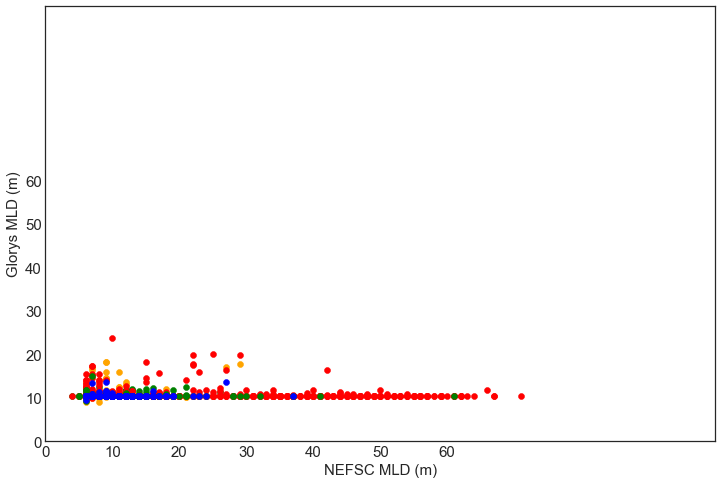

In [1025]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,100)
plt.xlim(0,100)
plt.scatter(SouthernMABNEFSC_aug, SouthernMABGlorys_aug,color='orange',label='Southern MAB')
plt.scatter(NorthernMABNEFSC_aug, NorthernMABGlorys_aug,color='green',label='Northern MAB')
plt.scatter(GeorgesBankNEFSC_aug, GeorgesBankGlorys_aug,color='red',label='Georges Bank')
plt.scatter(EGoMNEFSC_aug, EGoMGlorys_aug,color='green',label='Eastern GoM')
plt.scatter(WGoMNEFSC_aug, WGoMGlorys_aug,color='blue',label='Western GoM')
# leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.show()

# September

In [1026]:
GeorgesBankGlorys_sept = [12.665182, 10.528886, 11.1392565, 13.73333, 11.291849, 10.528886, 10.528886, 15.106663, 16.022219, 12.359997, 11.291849, 13.580737, 12.0548115, 12.665182, 22.736292, 10.6814785, 12.0548115, 12.512589, 16.63259, 17.85333, 16.63259, 16.63259, 10.528886, 10.528886, 11.749626, 10.528886, 13.885922, 10.834071, 27.008883, 10.528886, 28.382215, 15.869626, 21.210365, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 12.970367, 10.528886, 10.528886, 11.291849, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.0548115, 13.73333, 12.817775, 10.376293, 13.580737, 11.444442, 14.496293, 18.005922, 11.444442, 11.1392565, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 11.597034, 11.902219, 11.749626, 12.207404, 11.597034, 12.359997, 12.512589, 11.444442, 16.022219, 11.749626, 17.548145, 15.106663, 14.3437, 12.512589, 12.207404, 11.749626, 12.970367, 12.817775, 12.207404, 12.665182, 18.768885, 19.226664, 16.022219, 10.528886, 18.311108, 15.259255, 10.834071, 13.428144, 14.191108, 17.24296, 17.24296, 16.022219, 14.191108, 12.359997, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 11.291849, 11.444442, 10.986664, 11.902219, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.937775, 11.1392565, 10.986664, 10.6814785, 13.428144, 13.885922, 12.207404, 12.970367, 13.428144, 13.73333, 13.73333, 12.207404, 13.580737, 19.837032, 10.528886, 10.528886, 10.528886, 10.986664, 13.122959, 13.122959, 12.970367, 12.817775, 12.817775, 14.801477, 11.444442, 10.528886, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.834071, 12.970367, 13.122959, 12.512589, 12.817775, 14.191108, 12.817775, 10.986664, 10.528886, 10.986664, 11.1392565, 11.291849, 12.207404, 12.359997, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.986664, 12.817775, 11.597034, 11.902219, 11.749626, 14.496293, 13.73333, 12.970367, 14.191108, 13.580737, 14.191108, 13.580737, 14.038515, 20.294811, 15.717033, 19.531847, 11.749626, 14.801477, 13.580737, 10.528886, 10.528886, 10.528886, 11.749626, 11.749626, 11.444442, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 14.038515, 15.106663, 12.512589, 12.817775, 10.071109, 24.872587, 21.210365, 11.749626, 10.071109, 10.528886, 10.528886, 10.528886, 27.008883, 11.444442, 11.1392565, 10.6814785, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.0548115, 11.749626, 11.291849, 14.801477, 19.68444, 13.275552, 12.359997, 11.749626, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.95407, 14.95407, 16.937775, 14.801477, 11.902219, 11.749626, 11.749626, 10.528886, 10.376293, 11.902219, 11.291849, 10.528886, 10.6814785, 10.376293, 11.291849, 10.834071, 11.902219, 19.07407, 25.63555, 27.008883, 27.161476, 13.580737, 12.817775, 12.817775, 12.817775, 12.970367, 13.428144, 15.411848, 14.95407, 16.327404, 16.937775, 16.174812, 16.174812, 12.0548115, 12.0548115, 12.512589, 12.817775, 13.428144, 19.837032, 22.431107, 29.602957, 10.986664, 16.785181, 10.528886, 13.885922, 11.902219, 11.749626, 12.512589, 13.122959, 13.428144, 13.885922, 14.648885, 11.444442, 14.648885, 14.95407, 11.291849, 14.95407, 17.548145, 16.022219, 15.411848, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.665182, 10.834071, 11.444442, 11.444442, 11.597034, 14.3437, 14.648885, 15.259255, 15.564441, 14.95407, 17.395552, 17.85333, 12.207404, 12.970367, 10.528886, 14.038515, 15.259255, 18.005922, 19.68444, 37.232586, 43.183693, 36.774807, 37.385178, 21.820736, 19.226664, 23.957031, 22.736292, 20.752588, 24.109625, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.6814785, 17.24296, 32.044437, 31.58666, 16.174812, 16.785181, 16.785181, 18.005922, 15.411848, 14.801477, 17.395552, 16.479998, 17.395552, 16.937775, 17.090366, 17.24296, 17.24296, 16.479998, 27.161476, 27.161476, 16.937775, 13.885922, 12.512589, 15.411848, 10.528886, 10.6814785, 10.6814785, 11.1392565, 14.648885, 15.564441, 15.411848, 12.512589]
GeorgesBankNEFSC_sept = [8.0, 17.0, 15.0, 22.0, 21.0, 10.0, 36.0, 55.0, 7.0, 8.0, 12.0, 48.0, 16.0, 6.0, 15.0, 15.0, 7.0, 10.0, 48.0, 52.0, 51.0, 57.0, 6.0, 6.0, 13.0, 9.0, 17.0, 8.0, 44.0, 6.0, 27.0, 56.0, 24.0, 42.0, 6.0, 11.0, 6.0, 9.0, 6.0, 40.0, 31.0, 36.0, 33.0, 15.0, 21.0, 9.0, 12.0, 6.0, 49.0, 40.0, 50.0, 11.0, 15.0, 21.0, 13.0, 11.0, 13.0, 42.0, 16.0, 18.0, 9.0, 50.0, 15.0, 7.0, 21.0, 18.0, 16.0, 11.0, 11.0, 12.0, 10.0, 10.0, 14.0, 17.0, 20.0, 11.0, 19.0, 44.0, 18.0, 45.0, 48.0, 46.0, 18.0, 35.0, 26.0, 9.0, 15.0, 12.0, 43.0, 53.0, 22.0, 11.0, 13.0, 16.0, 15.0, 13.0, 14.0, 39.0, 12.0, 8.0, 12.0, 31.0, 53.0, 14.0, 25.0, 35.0, 21.0, 42.0, 36.0, 39.0, 12.0, 10.0, 9.0, 21.0, 9.0, 13.0, 12.0, 7.0, 7.0, 8.0, 26.0, 39.0, 31.0, 34.0, 23.0, 9.0, 6.0, 6.0, 6.0, 9.0, 11.0, 6.0, 21.0, 15.0, 9.0, 18.0, 27.0, 22.0, 55.0, 58.0, 16.0, 10.0, 9.0, 26.0, 52.0, 14.0, 34.0, 32.0, 55.0, 8.0, 7.0, 8.0, 15.0, 19.0, 20.0, 17.0, 16.0, 19.0, 17.0, 6.0, 17.0, 18.0, 8.0, 7.0, 6.0, 6.0, 10.0, 8.0, 6.0, 12.0, 8.0, 8.0, 15.0, 7.0, 6.0, 8.0, 12.0, 6.0, 14.0, 9.0, 13.0, 13.0, 11.0, 10.0, 21.0, 6.0, 7.0, 28.0, 10.0, 8.0, 8.0, 8.0, 31.0, 25.0, 8.0, 34.0, 45.0, 43.0, 8.0, 18.0, 9.0, 11.0, 11.0, 12.0, 8.0, 13.0, 13.0, 12.0, 7.0, 7.0, 9.0, 20.0, 31.0, 6.0, 28.0, 31.0, 9.0, 8.0, 10.0, 9.0, 15.0, 44.0, 29.0, 29.0, 11.0, 15.0, 11.0, 8.0, 30.0, 58.0, 11.0, 33.0, 19.0, 32.0, 33.0, 38.0, 7.0, 55.0, 45.0, 43.0, 49.0, 33.0, 25.0, 11.0, 6.0, 9.0, 11.0, 9.0, 27.0, 7.0, 8.0, 13.0, 11.0, 8.0, 22.0, 55.0, 53.0, 9.0, 9.0, 18.0, 7.0, 28.0, 16.0, 31.0, 20.0, 15.0, 9.0, 16.0, 18.0, 14.0, 37.0, 35.0, 6.0, 11.0, 11.0, 8.0, 19.0, 15.0, 13.0, 14.0, 12.0, 18.0, 30.0, 23.0, 43.0, 16.0, 12.0, 8.0, 7.0, 9.0, 12.0, 13.0, 7.0, 6.0, 7.0, 10.0, 11.0, 23.0, 30.0, 35.0, 20.0, 21.0, 30.0, 10.0, 6.0, 7.0, 6.0, 12.0, 11.0, 13.0, 7.0, 10.0, 11.0, 6.0, 6.0, 8.0, 33.0, 51.0, 14.0, 7.0, 7.0, 7.0, 12.0, 8.0, 6.0, 34.0, 9.0, 16.0, 8.0, 8.0, 7.0, 58.0, 9.0, 47.0, 34.0, 9.0, 11.0, 35.0, 20.0, 24.0, 60.0, 7.0, 11.0, 18.0, 11.0, 16.0, 15.0, 23.0, 6.0, 9.0, 18.0, 18.0, 17.0, 20.0, 19.0, 32.0, 16.0, 6.0, 8.0, 7.0, 10.0, 12.0, 7.0, 6.0, 7.0, 6.0, 9.0, 28.0, 27.0, 11.0, 55.0, 57.0, 42.0, 10.0, 27.0, 7.0, 10.0, 8.0, 9.0, 63.0, 51.0, 13.0, 6.0, 9.0, 35.0, 32.0, 62.0, 12.0, 8.0, 59.0, 36.0, 24.0, 15.0, 14.0, 19.0, 15.0, 13.0, 11.0, 16.0, 66.0, 37.0, 24.0, 35.0, 6.0, 6.0, 8.0, 6.0, 8.0, 19.0, 6.0, 7.0, 10.0, 33.0, 20.0, 6.0, 64.0, 67.0, 70.0, 58.0, 9.0, 9.0, 12.0, 28.0, 20.0, 15.0, 23.0, 17.0, 8.0, 28.0, 22.0, 23.0, 7.0, 10.0, 17.0, 20.0, 13.0, 6.0, 6.0, 6.0, 10.0, 9.0, 12.0, 8.0]

In [1027]:
SouthernMABGlorys_sept = [10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 12.359997, 13.73333, 13.73333, 17.700737, 10.528886, 7.477035, 10.528886, 11.444442, 11.291849, 10.376293, 11.291849, 10.528886, 7.0192575, 10.071109, 10.528886, 10.528886, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 12.665182, 14.038515, 14.496293, 12.665182, 16.479998, 16.479998, 16.327404, 10.986664, 12.207404, 14.191108, 10.986664, 10.834071, 10.6814785, 10.834071, 10.834071, 11.291849, 11.749626, 12.207404, 11.1392565, 12.0548115, 10.528886, 10.528886, 10.834071, 12.970367, 10.834071, 11.749626, 12.817775, 13.73333, 14.191108, 13.580737, 10.6814785, 10.528886, 10.528886, 10.528886, 10.376293, 13.122959, 11.291849, 16.479998, 17.85333, 10.528886, 16.937775, 10.528886, 10.528886, 9.918516, 7.3244424, 10.528886, 10.376293, 12.359997, 10.6814785, 11.749626, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 12.359997, 11.902219, 12.359997, 11.291849, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 7.6296277, 10.986664, 10.528886, 10.528886, 10.2237015, 9.00296, 9.00296, 11.291849, 11.444442, 10.834071, 11.1392565, 10.528886, 11.597034, 12.359997, 13.885922, 11.902219, 10.376293, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.95407, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 7.477035, 16.63259, 19.226664, 21.51555, 21.97333, 18.005922, 9.460738, 10.528886, 18.616293, 14.95407, 20.90518, 20.599997, 16.174812, 13.275552, 16.63259, 16.63259, 16.63259, 11.1392565, 10.6814785, 10.834071, 11.291849, 10.6814785, 10.528886, 10.376293, 10.528886, 10.986664, 10.528886, 10.528886, 16.937775, 21.668144, 21.668144, 15.259255, 13.122959, 15.869626, 15.564441, 14.191108, 15.411848, 15.564441, 11.597034, 8.8503685, 16.022219, 12.0548115, 15.869626, 15.411848, 13.122959, 13.428144, 13.428144, 10.6814785, 12.359997, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 7.7822204, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 11.902219, 11.597034, 11.749626, 12.817775, 12.0548115, 12.207404, 10.834071, 12.207404, 10.376293, 10.528886, 10.376293, 10.528886, 10.528886, 11.902219, 10.528886, 10.528886, 10.528886, 11.597034, 11.291849, 14.95407, 11.291849, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.359997, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.885922, 13.885922, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.834071, 10.528886, 12.665182, 12.512589, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 7.6296277, 8.239998, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 9.918516, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 10.834071, 10.834071, 10.6814785, 10.834071, 10.834071, 10.834071, 11.444442, 14.496293, 14.801477, 15.259255, 15.259255, 13.122959, 16.479998, 16.479998, 12.665182, 12.817775, 13.122959, 15.564441, 14.191108, 12.817775, 15.259255, 14.95407, 14.191108, 13.885922, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 7.477035, 10.528886, 10.071109, 10.071109, 10.528886, 10.528886, 10.528886, 10.376293, 10.6814785, 8.239998, 10.528886, 10.528886, 10.376293, 11.749626, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.986664, 10.528886, 10.528886, 12.207404, 11.597034, 12.817775, 13.122959, 12.665182, 12.665182, 12.207404, 21.668144, 20.90518, 10.986664, 13.73333, 10.6814785, 15.564441, 13.275552, 27.314068, 26.85629, 25.63555, 25.025179, 22.431107, 25.482958, 24.719995, 19.837032, 18.768885, 29.14518, 30.823696, 26.551105, 22.736292, 30.213327, 16.174812, 26.398512, 27.771845, 21.210365, 18.616293, 19.07407, 22.888884, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.00296, 7.17185, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 11.1392565, 11.444442, 11.444442, 12.665182, 10.376293, 10.528886, 12.970367, 12.817775, 12.0548115, 10.834071, 10.6814785, 10.834071, 10.834071, 10.528886, 10.528886, 10.528886, 10.376293, 10.834071, 10.6814785, 10.986664, 10.986664, 17.24296, 17.700737, 13.275552, 12.207404, 12.207404, 20.752588, 20.752588, 16.785181, 20.142218, 20.752588, 15.564441, 14.648885, 12.665182, 15.411848, 15.717033, 18.768885, 14.3437, 12.512589, 12.359997, 12.359997, 12.665182, 10.6814785, 10.528886, 10.528886, 10.528886, 13.428144, 10.6814785, 12.817775, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.902219, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 9.460738, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.122959, 10.376293, 10.528886, 10.834071, 10.528886, 10.6814785, 10.986664, 10.986664, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.834071, 11.444442, 11.597034, 12.512589, 11.444442, 12.817775, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 12.970367, 11.902219, 14.3437, 10.834071, 10.376293, 11.291849, 15.106663, 18.005922, 21.362959, 18.005922, 14.3437, 14.648885, 10.6814785, 10.376293, 11.597034, 15.869626, 12.359997, 10.6814785, 10.528886, 10.528886, 10.528886, 10.071109, 10.071109, 10.528886, 9.00296, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.376293, 10.528886, 10.528886, 10.528886, 10.376293, 10.986664, 10.528886, 10.528886, 10.376293, 10.528886, 19.68444, 19.226664, 11.1392565, 10.528886, 10.528886, 11.1392565, 11.444442, 11.1392565, 10.834071, 11.291849, 11.749626, 12.207404, 13.122959, 11.444442, 14.038515, 10.528886, 10.6814785, 10.834071, 11.1392565, 10.528886, 10.834071, 10.834071, 10.528886, 10.528886, nan, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 10.528886, 11.597034, 12.512589, 10.528886, 10.528886, 11.444442, 15.106663, 18.921478, 22.125921, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.986664, 10.376293, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.512589, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 8.697776, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.0548115, 10.528886, 12.665182, 11.597034, 11.444442, 12.970367, 10.528886, 10.528886, 10.528886, 13.580737, 11.597034, 10.6814785, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 11.1392565, 10.528886, 10.6814785, 10.528886, 7.477035, 7.0192575, 6.866665, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.376293, 11.597034, 10.528886, 10.528886, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 20.90518, 20.447403, 13.428144, 10.528886, 10.834071, 17.85333, 13.885922, 11.597034, 13.885922, 15.106663, 14.95407, 13.885922, 14.3437, 14.95407, 12.817775, 10.528886, 10.528886, 10.528886, 11.291849, 10.986664, 12.207404, 10.6814785, 10.528886, 10.834071, 12.817775, 13.73333, 13.885922, 13.275552, 13.885922, 14.3437, 11.291849, 11.1392565, 10.6814785, 11.291849, nan, 14.496293, nan, 10.528886, 22.583698, 24.719995, 23.346663, 23.346663, 19.989626, 16.479998, 16.022219, 14.801477, 15.869626, 13.275552, 14.191108, 13.275552, 11.291849, 10.528886, 10.528886, 14.648885, 13.428144, 13.580737, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.1392565, 10.528886, 25.940735, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.071109, 10.528886, 10.528886, 10.528886, 11.291849, 10.376293, 10.834071, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.2237015, 10.2237015, 10.528886, 10.376293, 11.291849, nan, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 16.174812, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.986664, 10.376293, 11.597034, 12.512589, 10.376293, 10.376293, 12.512589, 12.359997, 11.902219, 12.817775, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.902219, 13.885922, 13.885922, 12.817775, 10.6814785, 20.142218, 21.057774, 18.005922, 12.0548115, 18.311108, 10.528886, 12.359997, 7.6296277, 16.63259, 15.411848, 21.362959, 13.580737, 18.768885, 16.785181, 12.207404, 15.564441, 17.548145, 14.648885, 12.970367, 15.869626, 16.937775, 19.837032, 20.90518, 20.599997, 10.376293, 11.749626, 11.444442, 13.122959, 17.24296, 12.512589, 12.359997, 10.528886, 10.6814785, 10.6814785, 10.528886, 10.986664, 11.444442, 13.275552, 13.275552, 22.278513, 15.717033, 12.359997, 12.817775, 10.986664, 12.0548115, 11.1392565, 11.1392565, nan, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.834071, 11.291849, 10.834071, 11.444442, 9.155553, 10.528886, 10.528886, 14.038515, 12.512589, 13.580737, 14.801477, 13.275552, 13.275552, 13.122959, 12.970367, 13.122959, 12.0548115, 16.022219, 15.259255, 12.665182, 13.580737, 15.717033, 11.291849, 13.122959, 13.122959, 14.3437, 10.528886, 11.597034, 11.749626, 10.986664, 14.801477, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 11.902219, 10.986664, 10.528886, 10.6814785, 11.597034, 11.1392565, 12.207404, 13.73333, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 10.376293, 11.749626, 10.528886, 10.6814785, 10.986664, 10.834071, 10.528886, 10.834071, 10.528886, 13.885922, 10.986664, 11.444442, 11.291849, 11.902219, 10.6814785, 10.6814785, 10.6814785, 11.291849, 10.376293, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 12.207404, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.801477, 12.207404, 10.376293, 10.528886, 10.528886, 10.528886, 13.885922, 12.970367, 14.648885, 12.359997, 10.528886, 10.834071, 15.411848, 10.528886, 11.902219, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.291849, 13.580737, 12.970367, 12.0548115, 11.902219, 16.937775, 16.479998, 12.359997, 16.785181, 15.717033, 10.2237015, 13.73333, 17.24296, 15.717033, 17.24296, 15.259255, 15.259255, 10.6814785, 15.869626, 16.022219, 16.937775, 16.327404, 16.327404, 17.090366, 17.700737, 15.106663, 10.528886, 10.986664, 14.3437, 15.411848, 14.3437, 11.444442, 14.038515, 13.580737, 11.291849, 10.528886, 10.528886, 10.834071, 12.207404, 11.902219, 11.1392565, 11.749626, 24.719995, 20.447403, 16.63259, 14.648885, 12.817775, 12.817775, 11.1392565, 11.291849, 10.834071, 15.717033, 16.63259, 16.022219, 18.4637, 18.768885, 16.174812, 15.411848, 16.785181, 17.548145, 12.207404, 16.327404, 15.564441, 11.291849, 10.528886, 12.0548115, 14.3437, 17.24296, 10.834071, 10.986664, 10.528886, 10.6814785, 11.749626, 14.3437, 12.359997, 11.902219, 12.207404, 11.749626, 11.749626, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.2237015, 18.311108, 16.785181, 10.528886, 10.528886, 10.528886, 10.376293, 11.597034, 11.597034, 12.359997, 11.902219, 16.174812, 18.005922, 17.090366, 14.801477, 17.548145, 11.749626, 10.6814785, 10.528886, 10.376293, 11.444442, 10.986664, 14.801477, 14.801477, 11.291849, 11.1392565, 10.528886, 11.291849, 12.207404, 13.275552, 10.834071, 15.259255, 13.73333, 10.986664, 12.207404, 12.665182, 10.6814785, 14.038515, 14.038515, 11.444442, 11.444442, 11.597034, 12.970367, 13.73333, 13.73333, 11.902219, 11.597034, 11.902219, 11.1392565, 10.6814785, 12.359997, 11.444442, 11.444442, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.970367, 10.986664, 10.986664, 10.986664, 10.528886, 11.291849, 10.834071, 10.6814785, 10.376293, 10.986664, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.376293, 10.6814785, 11.1392565, 10.528886, 10.834071, 10.986664, 10.528886, 10.528886, 11.291849, 11.291849, 11.444442, 11.291849, 12.665182, 12.512589, 14.648885, 14.191108, 14.496293, 14.3437, 14.95407, 15.259255, 15.106663, 15.106663, 14.801477, 14.648885, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 10.986664, 11.1392565, 21.668144, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.359997, 11.902219, 19.68444, 20.90518, 18.4637, 18.005922, 18.4637, 17.24296, 14.496293, 15.869626, 14.95407, 15.411848, 16.174812, 16.63259, 18.311108, 17.24296, 15.564441, 14.801477, 17.24296, 19.226664, 17.548145, 19.07407, 17.85333, 15.106663, 18.921478, 19.379255, 18.921478, 16.479998, 14.801477, 16.63259, 17.090366, 19.226664, 21.210365, 21.210365, 21.51555, 21.362959, 20.90518, 19.531847, 18.005922, 15.869626, 15.106663, 14.191108, 10.834071, 10.376293, 10.528886, 10.528886, 12.970367, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.3437, 18.4637, 16.785181, 19.226664, 20.752588, 11.902219, 13.122959, 14.3437, 18.921478, 15.411848, 15.869626, 19.68444, 21.362959, 19.379255, 22.583698, 11.1392565, 10.834071, 10.834071, 10.528886, 12.359997, 12.359997, 10.528886, 10.528886, 11.597034, 10.376293, 12.817775, 10.376293, 10.376293, 10.528886, 14.496293, 13.885922, 12.817775, 11.597034, 13.122959, 17.395552, 16.174812, 14.95407, 10.834071, 11.597034, 11.902219, 11.749626, 13.122959, 10.528886, 10.376293, 10.376293, 10.528886, 10.986664, 10.986664, 10.528886, 10.6814785, 10.528886, 11.291849, 10.6814785, 10.6814785, 10.528886, 10.376293, 11.444442, 10.528886, 10.6814785, 10.834071, 10.834071, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.986664, 12.359997, 12.970367, 10.376293, 14.648885, 13.580737, 13.580737, 12.512589, 11.444442, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.885922, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.834071, 11.291849, 11.1392565, 10.528886, 11.1392565, 10.376293, 10.528886, 10.528886, 10.834071, 11.444442, 12.359997, 10.528886, 10.834071, 11.597034, 10.834071, 11.444442, 11.291849, 11.291849, 16.327404, 12.359997, 14.648885, 14.191108, 14.648885, 13.885922, 12.970367, 12.817775, 13.122959, 14.648885, 15.259255, 12.970367, 13.428144, 13.428144, 14.3437, 11.1392565, 14.3437, 11.902219, 11.902219, 10.528886, 10.834071, 10.528886, 15.259255, 13.885922, 11.749626, 11.749626, 11.291849, 13.275552, 12.359997, 12.512589, 12.665182, 11.444442, 10.528886, 10.528886, 14.191108, 14.191108, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 12.207404, 12.359997, 13.428144, 12.970367, 12.0548115, 13.73333, 12.207404, 10.6814785, 16.022219, 10.834071, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.022219, 15.411848, 15.259255, 19.531847, 19.531847, 18.4637, 18.921478, 17.090366, 15.869626, 16.479998, 16.479998, 17.85333, 14.801477, 14.038515, 13.122959, 14.496293, 17.85333, 22.278513, 14.496293, 13.580737, 17.395552, 17.24296, 16.785181, 13.885922, 18.768885, 18.005922, 16.937775, 17.85333, 17.85333, 17.24296, 19.531847, 16.327404, 18.4637, 18.4637, 16.785181, 14.801477, 16.937775, 14.95407, 17.548145, 16.479998, 17.700737, 18.311108, 20.599997, 18.311108, 19.68444, 19.837032, 20.142218, 20.142218, 13.428144, 13.122959, 13.885922, 15.106663, 15.869626, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.834071, 11.749626, 11.749626, 28.382215, 29.450363, 29.755548, 26.703697, 15.564441, 15.564441, 15.411848, 15.411848, 14.648885, 16.174812, 15.106663, 15.106663, 10.834071, 10.6814785, 11.597034, 11.291849, 10.834071, 10.834071, 10.834071, 11.749626, 10.986664, 10.986664, 10.986664, 10.6814785, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.038515, 12.817775, 11.597034, 11.291849, 13.885922, 11.444442, 11.597034, 10.528886, 13.73333, 12.817775, 13.275552, 12.512589, 10.834071, 10.528886, 11.749626, 10.528886, 10.528886, 10.6814785, 10.528886, 11.1392565, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 11.597034, 12.665182, 17.700737, 17.548145, 14.496293, 10.528886, 14.496293, 14.496293, 13.73333, 21.057774, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 11.1392565, 10.528886, 10.376293, 11.444442, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 15.869626, 10.528886, 16.174812, 16.327404, 16.327404, 12.665182, 10.528886, 12.817775, 14.801477, 23.499254, 26.703697, 18.005922, 18.768885, 21.668144, 18.921478, 13.73333, 15.259255, 17.395552, 12.817775, 12.0548115, 10.376293, 10.528886, 11.749626, 10.528886, 13.122959, 13.580737, 13.73333, 13.73333, 12.207404, 10.6814785, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 17.85333, 17.85333, 11.1392565, 10.6814785, 10.528886, 10.376293, 11.444442, 10.528886, 12.512589, 10.528886, 10.6814785, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.6814785, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 13.73333, 13.428144, 14.191108, 11.1392565, 11.597034, 11.444442, 11.1392565, 11.597034, 12.817775, 11.597034, 11.291849, 13.275552, 13.275552, 13.73333, 14.038515, 13.275552, 12.359997, 13.580737, 12.970367, 12.512589, 13.73333, 12.665182, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
SouthernMABNEFSC_sept = [15.0, 14.0, 10.0, 11.0, 13.0, 17.0, 11.0, 18.0, 10.0, 11.0, 12.0, 20.0, 11.0, 16.0, 11.0, 15.0, 10.0, 10.0, 14.0, 15.0, 14.0, 11.0, 6.0, 6.0, 8.0, 8.0, 11.0, 15.0, 23.0, 8.0, 21.0, 8.0, 6.0, 6.0, 8.0, 11.0, 6.0, 6.0, 13.0, 7.0, 6.0, 7.0, 7.0, 9.0, 11.0, 6.0, 6.0, 10.0, 9.0, 7.0, 9.0, 13.0, 18.0, 15.0, 10.0, 6.0, 13.0, 6.0, 13.0, 6.0, 9.0, 7.0, 9.0, 12.0, 13.0, 16.0, 20.0, 10.0, 7.0, 6.0, 16.0, 18.0, 16.0, 12.0, 12.0, 29.0, 15.0, 25.0, 9.0, 12.0, 12.0, 24.0, 23.0, 17.0, 10.0, 18.0, 9.0, 8.0, 10.0, 10.0, 12.0, 9.0, 16.0, 18.0, 14.0, 7.0, 9.0, 12.0, 8.0, 13.0, 16.0, 13.0, 25.0, 21.0, 15.0, 6.0, 13.0, 17.0, 12.0, 16.0, 8.0, 10.0, 10.0, 14.0, 6.0, 6.0, 6.0, 9.0, 5.0, 6.0, 6.0, 10.0, 6.0, 9.0, 6.0, 20.0, 7.0, 17.0, 7.0, 24.0, 16.0, 24.0, 6.0, 7.0, 6.0, 13.0, 15.0, 16.0, 21.0, 18.0, 10.0, 13.0, 8.0, 6.0, 9.0, 12.0, 8.0, 10.0, 13.0, 13.0, 15.0, 18.0, 9.0, 13.0, 14.0, 6.0, 13.0, 13.0, 8.0, 13.0, 12.0, 18.0, 19.0, 23.0, 10.0, 12.0, 9.0, 16.0, 7.0, 7.0, 7.0, 32.0, 35.0, 19.0, 21.0, 12.0, 18.0, 9.0, 9.0, 7.0, 13.0, 22.0, 23.0, 16.0, 18.0, 8.0, 15.0, 21.0, 14.0, 28.0, 31.0, 23.0, 12.0, 17.0, 9.0, 7.0, 10.0, 13.0, 20.0, 8.0, 20.0, 13.0, 12.0, 11.0, 20.0, 8.0, 35.0, 22.0, 31.0, 33.0, 25.0, 22.0, 30.0, 20.0, 17.0, 18.0, 11.0, 12.0, 13.0, 21.0, 9.0, 21.0, 17.0, 7.0, 12.0, 12.0, 27.0, 30.0, 11.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 10.0, 6.0, 7.0, 6.0, 8.0, 11.0, 11.0, 8.0, 8.0, 13.0, 8.0, 9.0, 14.0, 12.0, 10.0, 10.0, 11.0, 10.0, 7.0, 6.0, 11.0, 15.0, 12.0, 15.0, 12.0, 15.0, 15.0, 13.0, 12.0, 12.0, 12.0, 9.0, 15.0, 11.0, 11.0, 12.0, 11.0, 15.0, 14.0, 14.0, 14.0, 10.0, 16.0, 15.0, 13.0, 12.0, 17.0, 12.0, 15.0, 16.0, 9.0, 16.0, 15.0, 13.0, 13.0, 13.0, 14.0, 10.0, 14.0, 16.0, 16.0, 32.0, 24.0, 15.0, 22.0, 18.0, 25.0, 17.0, 27.0, 10.0, 11.0, 18.0, 10.0, 20.0, 30.0, 11.0, 12.0, 9.0, 18.0, 15.0, 17.0, 16.0, 11.0, 11.0, 15.0, 27.0, 19.0, 19.0, 20.0, 15.0, 11.0, 16.0, 8.0, 20.0, 11.0, 16.0, 8.0, 10.0, 12.0, 12.0, 12.0, 11.0, 9.0, 16.0, 14.0, 16.0, 12.0, 15.0, 11.0, 6.0, 13.0, 9.0, 14.0, 10.0, 8.0, 12.0, 12.0, 6.0, 7.0, 10.0, 10.0, 7.0, 7.0, 7.0, 8.0, 11.0, 8.0, 7.0, 9.0, 10.0, 9.0, 8.0, 15.0, 12.0, 19.0, 6.0, 13.0, 16.0, 11.0, 13.0, 6.0, 6.0, 14.0, 12.0, 9.0, 16.0, 7.0, 14.0, 11.0, 8.0, 14.0, 11.0, 8.0, 16.0, 6.0, 9.0, 15.0, 22.0, 20.0, 14.0, 11.0, 18.0, 23.0, 16.0, 16.0, 16.0, 14.0, 15.0, 23.0, 13.0, 18.0, 21.0, 22.0, 15.0, 13.0, 13.0, 13.0, 8.0, 9.0, 11.0, 17.0, 13.0, 23.0, 19.0, 6.0, 6.0, 10.0, 7.0, 6.0, 9.0, 8.0, 8.0, 10.0, 8.0, 7.0, 8.0, 8.0, 6.0, 8.0, 11.0, 9.0, 14.0, 10.0, 8.0, 7.0, 14.0, 9.0, 9.0, 9.0, 10.0, 11.0, 16.0, 13.0, 13.0, 9.0, 14.0, 16.0, 7.0, 10.0, 9.0, 14.0, 18.0, 20.0, 17.0, 19.0, 18.0, 16.0, 15.0, 34.0, 32.0, 15.0, 37.0, 7.0, 43.0, 21.0, 38.0, 18.0, 29.0, 19.0, 21.0, 27.0, 20.0, 20.0, 30.0, 51.0, 48.0, 33.0, 23.0, 32.0, 23.0, 16.0, 20.0, 20.0, 16.0, 19.0, 16.0, 20.0, 24.0, 9.0, 16.0, 8.0, 12.0, 16.0, 13.0, 10.0, 32.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 8.0, 9.0, 14.0, 15.0, 10.0, 7.0, 9.0, 16.0, 18.0, 16.0, 10.0, 11.0, 10.0, 14.0, 9.0, 8.0, 11.0, 13.0, 9.0, 12.0, 15.0, 6.0, 16.0, 8.0, 15.0, 26.0, 26.0, 22.0, 28.0, 19.0, 18.0, 12.0, 26.0, 35.0, 18.0, 16.0, 23.0, 26.0, 20.0, 34.0, 19.0, 10.0, 16.0, 12.0, 9.0, 11.0, 22.0, 7.0, 16.0, 19.0, 8.0, 6.0, 6.0, 6.0, 6.0, 10.0, 6.0, 8.0, 6.0, 18.0, 14.0, 8.0, 8.0, 6.0, 7.0, 10.0, 8.0, 8.0, 8.0, 10.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 10.0, 13.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 13.0, 20.0, 28.0, 8.0, 13.0, 6.0, 6.0, 8.0, 8.0, 7.0, 6.0, 11.0, 7.0, 7.0, 11.0, 14.0, 11.0, 18.0, 18.0, 19.0, 15.0, 25.0, 29.0, 23.0, 25.0, 14.0, 9.0, 28.0, 19.0, 20.0, 11.0, 6.0, 15.0, 20.0, 13.0, 16.0, 19.0, 17.0, 13.0, 6.0, 8.0, 14.0, 14.0, 15.0, 12.0, 9.0, 10.0, 12.0, 14.0, 14.0, 6.0, 7.0, 7.0, 11.0, 6.0, 6.0, 7.0, 10.0, 7.0, 12.0, 9.0, 6.0, 11.0, 13.0, 11.0, 10.0, 13.0, 11.0, 13.0, 10.0, 14.0, 6.0, 7.0, 16.0, 6.0, 15.0, 23.0, 7.0, 8.0, 6.0, 6.0, 6.0, 7.0, 17.0, 16.0, 15.0, 12.0, 14.0, 12.0, 10.0, 5.0, 7.0, 17.0, 15.0, 11.0, 12.0, 14.0, 10.0, 15.0, 16.0, 11.0, 12.0, 17.0, 13.0, 8.0, 20.0, 11.0, 20.0, 13.0, 9.0, 15.0, 15.0, 9.0, 11.0, 10.0, 10.0, 10.0, 10.0, 13.0, 11.0, 11.0, 6.0, 13.0, 17.0, 18.0, 21.0, 14.0, 17.0, 22.0, 19.0, 12.0, 17.0, 8.0, 16.0, 16.0, 21.0, 11.0, 7.0, 18.0, 12.0, 8.0, 18.0, 17.0, 17.0, 14.0, 12.0, 13.0, 12.0, 12.0, 15.0, 20.0, 6.0, 6.0, 7.0, 8.0, 8.0, 11.0, 12.0, 16.0, 21.0, 9.0, 9.0, 4.0, 10.0, 10.0, 17.0, 11.0, 11.0, 7.0, 12.0, 13.0, 12.0, 8.0, 14.0, 10.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 8.0, 15.0, 16.0, 15.0, 14.0, 14.0, 7.0, 11.0, 10.0, 14.0, 8.0, 11.0, 15.0, 17.0, 11.0, 10.0, 18.0, 11.0, 11.0, 4.0, 7.0, 16.0, 9.0, 10.0, 27.0, 17.0, 13.0, 9.0, 7.0, 21.0, 14.0, 12.0, 14.0, 14.0, 10.0, 12.0, 11.0, 12.0, 13.0, 16.0, 13.0, 10.0, 12.0, 10.0, 6.0, 6.0, 7.0, 5.0, 4.0, 8.0, 19.0, 10.0, 11.0, 16.0, 9.0, 14.0, 8.0, 14.0, 18.0, 9.0, 12.0, 17.0, 12.0, 8.0, 9.0, 20.0, 17.0, 16.0, 14.0, 20.0, 28.0, 31.0, 28.0, 17.0, 8.0, 23.0, 10.0, 14.0, 19.0, 18.0, 26.0, 21.0, 20.0, 19.0, 19.0, 9.0, 19.0, 6.0, 6.0, 11.0, 22.0, 10.0, 19.0, 17.0, 19.0, 7.0, 7.0, 9.0, 9.0, 9.0, 20.0, 16.0, 23.0, 16.0, 8.0, 8.0, 6.0, 7.0, 19.0, 18.0, 27.0, 21.0, 20.0, 19.0, 24.0, 18.0, 27.0, 15.0, 13.0, 11.0, 9.0, 13.0, 11.0, 20.0, 21.0, 8.0, 6.0, 13.0, 9.0, 9.0, 9.0, 8.0, 16.0, 7.0, 12.0, 16.0, 7.0, 7.0, 13.0, 12.0, 13.0, 18.0, 15.0, 10.0, 11.0, 14.0, 13.0, 16.0, 12.0, 11.0, 15.0, 12.0, 11.0, 14.0, 13.0, 10.0, 7.0, 6.0, 8.0, 11.0, 7.0, 12.0, 14.0, 11.0, 8.0, 19.0, 6.0, 9.0, 14.0, 11.0, 11.0, 9.0, 11.0, 16.0, 8.0, 9.0, 11.0, 8.0, 6.0, 7.0, 16.0, 14.0, 10.0, 16.0, 18.0, 17.0, 28.0, 21.0, 19.0, 12.0, 11.0, 23.0, 21.0, 18.0, 23.0, 31.0, 32.0, 7.0, 21.0, 21.0, 12.0, 11.0, 7.0, 15.0, 16.0, 15.0, 13.0, 20.0, 17.0, 16.0, 11.0, 14.0, 12.0, 16.0, 13.0, 15.0, 24.0, 18.0, 14.0, 6.0, 19.0, 10.0, 10.0, 9.0, 11.0, 17.0, 24.0, 28.0, 23.0, 16.0, 7.0, 10.0, 16.0, 17.0, 9.0, 6.0, 17.0, 16.0, 18.0, 9.0, 7.0, 17.0, 10.0, 23.0, 15.0, 23.0, 12.0, 14.0, 13.0, 22.0, 6.0, 26.0, 13.0, 10.0, 18.0, 21.0, 23.0, 20.0, 12.0, 19.0, 7.0, 7.0, 9.0, 9.0, 20.0, 8.0, 12.0, 17.0, 6.0, 9.0, 10.0, 13.0, 7.0, 13.0, 6.0, 10.0, 9.0, 6.0, 24.0, 18.0, 18.0, 10.0, 13.0, 20.0, 18.0, 18.0, 22.0, 19.0, 21.0, 12.0, 20.0, 19.0, 19.0, 14.0, 13.0, 25.0, 16.0, 16.0, 19.0, 12.0, 13.0, 16.0, 23.0, 6.0, 6.0, 10.0, 10.0, 16.0, 11.0, 14.0, 22.0, 14.0, 18.0, 10.0, 16.0, 7.0, 8.0, 6.0, 6.0, 10.0, 7.0, 13.0, 6.0, 8.0, 27.0, 13.0, 40.0, 16.0, 15.0, 10.0, 21.0, 17.0, 20.0, 15.0, 26.0, 10.0, 18.0, 14.0, 13.0, 12.0, 16.0, 6.0, 7.0, 8.0, 14.0, 10.0, 11.0, 15.0, 14.0, 7.0, 12.0, 12.0, 17.0, 9.0, 20.0, 11.0, 10.0, 14.0, 30.0, 26.0, 10.0, 20.0, 10.0, 11.0, 10.0, 9.0, 6.0, 6.0, 7.0, 9.0, 10.0, 6.0, 7.0, 15.0, 16.0, 27.0, 24.0, 17.0, 6.0, 7.0, 7.0, 7.0, 9.0, 11.0, 12.0, 11.0, 7.0, 8.0, 11.0, 8.0, 12.0, 13.0, 9.0, 13.0, 15.0, 13.0, 13.0, 8.0, 12.0, 6.0, 9.0, 11.0, 12.0, 11.0, 8.0, 6.0, 8.0, 7.0, 12.0, 6.0, 6.0, 6.0, 7.0, 7.0, 9.0, 6.0, 6.0, 8.0, 14.0, 22.0, 18.0, 8.0, 12.0, 7.0, 6.0, 7.0, 8.0, 15.0, 9.0, 15.0, 13.0, 25.0, 32.0, 7.0, 14.0, 16.0, 16.0, 20.0, 16.0, 21.0, 14.0, 17.0, 19.0, 12.0, 11.0, 14.0, 9.0, 7.0, 12.0, 20.0, 18.0, 10.0, 6.0, 6.0, 6.0, 6.0, 21.0, 7.0, 7.0, 6.0, 6.0, 11.0, 12.0, 15.0, 11.0, 41.0, 32.0, 24.0, 12.0, 18.0, 13.0, 13.0, 22.0, 14.0, 19.0, 19.0, 24.0, 20.0, 10.0, 13.0, 7.0, 9.0, 17.0, 15.0, 9.0, 8.0, 23.0, 22.0, 15.0, 6.0, 13.0, 6.0, 7.0, 6.0, 18.0, 16.0, 7.0, 6.0, 8.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 15.0, 17.0, 17.0, 11.0, 18.0, 16.0, 12.0, 19.0, 16.0, 23.0, 16.0, 31.0, 19.0, 19.0, 10.0, 23.0, 20.0, 19.0, 6.0, 8.0, 12.0, 17.0, 9.0, 9.0, 27.0, 16.0, 19.0, 17.0, 6.0, 11.0, 17.0, 6.0, 16.0, 6.0, 6.0, 9.0, 17.0, 16.0, 23.0, 11.0, 14.0, 9.0, 6.0, 6.0, 8.0, 10.0, 10.0, 21.0, 15.0, 13.0, 12.0, 14.0, 17.0, 17.0, 16.0, 13.0, 17.0, 9.0, 9.0, 6.0, 12.0, 9.0, 12.0, 16.0, 15.0, 13.0, 7.0, 6.0, 21.0, 20.0, 10.0, 15.0, 16.0, 15.0, 20.0, 14.0, 17.0, 18.0, 6.0, 6.0, 6.0, 6.0, 13.0, 16.0, 13.0, 23.0, 21.0, 20.0, 14.0, 17.0, 19.0, 23.0, 23.0, 26.0, 23.0, 16.0, 13.0, 8.0, 13.0, 33.0, 35.0, 17.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 9.0, 6.0, 7.0, 6.0, 9.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 7.0, 8.0, 6.0, 8.0, 6.0, 9.0, 8.0, 6.0, 6.0, 7.0, 6.0, 14.0, 12.0, 23.0, 26.0, 14.0, 20.0, 18.0, 18.0, 20.0, 17.0, 14.0, 22.0, 19.0, 28.0, 25.0, 22.0, 23.0, 16.0, 17.0, 19.0, 19.0, 19.0, 24.0, 10.0, 18.0, 10.0, 19.0, 17.0, 25.0, 6.0, 35.0, 26.0, 35.0, 41.0, 31.0, 46.0, 20.0, 22.0, 25.0, 10.0, 6.0, 7.0, 17.0, 14.0, 6.0, 28.0, 19.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 5.0, 10.0, 16.0, 12.0, 13.0, 9.0, 8.0, 6.0, 10.0, 9.0, 10.0, 11.0, 10.0, 18.0, 12.0, 10.0, 17.0, 12.0, 13.0, 12.0, 13.0, 14.0, 18.0, 14.0, 12.0, 9.0, 6.0, 6.0, 9.0, 9.0, 12.0, 11.0, 7.0, 10.0, 15.0, 6.0, 22.0, 14.0, 6.0, 29.0, 12.0, 33.0, 11.0, 13.0, 16.0, 18.0, 17.0, 15.0, 20.0, 18.0, 16.0, 12.0, 15.0, 18.0, 17.0, 15.0, 13.0, 14.0, 12.0, 16.0, 14.0, 17.0, 12.0, 21.0, 19.0, 17.0, 11.0, 14.0, 14.0, 12.0, 15.0, 15.0, 14.0, 9.0, 13.0, 12.0, 19.0, 17.0, 16.0, 16.0, 12.0, 22.0, 23.0, 21.0, 14.0, 15.0, 11.0, 17.0, 7.0, 8.0, 9.0, 7.0, 16.0, 11.0, 18.0, 31.0, 11.0, 10.0, 11.0, 20.0, 15.0, 15.0, 20.0, 13.0, 12.0, 8.0, 7.0, 14.0, 12.0, 15.0, 16.0, 16.0, 18.0, 12.0, 12.0, 15.0, 10.0, 17.0, 13.0, 8.0, 8.0, 16.0, 15.0, 14.0, 17.0, 7.0, 15.0, 8.0, 16.0, 14.0, 17.0, 17.0, 9.0, 9.0, 6.0, 6.0, 6.0, 9.0, 10.0, 12.0, 10.0, 14.0, 11.0, 12.0, 8.0, 10.0, 10.0, 8.0, 14.0, 11.0, 10.0, 12.0, 16.0, 12.0, 11.0, 11.0, 7.0, 8.0, 14.0, 11.0, 13.0, 15.0, 15.0, 16.0, 18.0, 12.0, 18.0, 13.0, 12.0, 7.0, 15.0, 28.0, 22.0, 21.0, 19.0, 22.0, 14.0, 19.0, 16.0, 27.0, 20.0, 17.0, 19.0, 17.0, 17.0, 15.0, 19.0, 26.0, 22.0, 20.0, 7.0, 9.0, 8.0, 9.0, 20.0, 15.0, 17.0, 14.0, 9.0, 19.0, 9.0, 10.0, 21.0, 9.0, 23.0, 27.0, 9.0, 17.0, 19.0, 7.0, 21.0, 7.0, 9.0, 14.0, 16.0, 12.0, 11.0, 11.0, 16.0, 12.0, 11.0, 7.0, 13.0, 9.0, 12.0, 12.0, 12.0, 15.0, 9.0, 10.0, 16.0, 13.0, 25.0, 20.0, 18.0, 17.0, 8.0, 12.0, 6.0, 6.0, 26.0, 17.0, 16.0, 18.0, 20.0, 18.0, 19.0, 21.0, 21.0, 18.0, 15.0, 28.0, 22.0, 28.0, 30.0, 25.0, 6.0, 19.0, 14.0, 13.0, 7.0, 22.0, 20.0, 24.0, 28.0, 32.0, 29.0, 15.0, 18.0, 20.0, 20.0, 20.0, 18.0, 12.0, 11.0, 29.0, 24.0, 10.0, 13.0, 8.0, 15.0, 32.0, 13.0, 31.0, 6.0, 6.0, 14.0, 8.0, 7.0, 21.0, 31.0, 30.0, 46.0, 7.0, 6.0, 7.0, 8.0, 9.0, 15.0, 13.0, 36.0, 7.0, 7.0, 27.0, 27.0, 8.0, 6.0, 6.0, 7.0, 25.0, 6.0, 6.0, 10.0, 10.0, 11.0, 9.0, 7.0, 22.0, 17.0, 6.0, 18.0, 10.0, 12.0, 19.0, 12.0, 10.0, 9.0, 9.0, 7.0, 11.0, 7.0, 15.0, 7.0, 8.0, 11.0, 13.0, 8.0, 12.0, 15.0, 12.0, 22.0, 7.0, 9.0, 9.0, 6.0, 6.0, 8.0, 7.0, 8.0, 13.0, 7.0, 16.0, 7.0, 10.0, 8.0, 6.0, 6.0, 8.0, 7.0, 12.0, 10.0, 13.0, 13.0, 13.0, 10.0, 11.0, 12.0, 13.0, 9.0, 13.0, 7.0, 17.0, 15.0, 16.0, 16.0, 12.0, 15.0, 15.0, 13.0, 14.0, 11.0, 14.0, 15.0, 16.0, 13.0, 11.0, 9.0, 9.0, 27.0, 20.0, 15.0, 13.0, 25.0, 31.0, 21.0, 13.0, 7.0, 6.0, 24.0, 6.0, 20.0, 9.0, 27.0, 13.0, 9.0, 7.0, 6.0, 16.0, 8.0, 23.0, 8.0, 11.0, 10.0, 13.0, 12.0, 12.0, 12.0, 12.0, 8.0, 9.0, 12.0, 9.0, 19.0, 10.0, 10.0, 7.0, 11.0, 8.0, 6.0, 7.0, 6.0, 9.0, 10.0, 13.0, 20.0, 13.0, 13.0, 13.0, 20.0, 21.0, 16.0, 12.0, 10.0, 9.0, 7.0, 9.0, 13.0, 9.0, 7.0, 9.0, 15.0, 8.0, 7.0, 6.0, 12.0, 7.0, 11.0, 6.0, 17.0, 12.0, 18.0, 18.0, 22.0, 16.0, 15.0, 17.0, 13.0, 14.0, 11.0, 11.0, 6.0, 10.0, 6.0, 7.0, 6.0, 15.0, 6.0, 8.0, 9.0, 8.0, 9.0, 7.0, 6.0, 7.0, 6.0, 6.0, 7.0, 7.0, 8.0, 6.0, 6.0, 10.0, 7.0, 9.0, 7.0, 10.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 9.0, 6.0, 7.0, 6.0, 6.0, 6.0, 8.0, 7.0, 9.0, 14.0, 9.0, 10.0, 9.0, 6.0, 6.0, 7.0, 9.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 12.0, 5.0, 6.0, 6.0, 9.0, 8.0, 6.0, 9.0, 12.0, 10.0, 8.0, 9.0, 15.0, 17.0, 17.0, 13.0, 17.0, 21.0, 19.0, 17.0, 19.0, 25.0, 17.0, 21.0, 15.0, 16.0, 17.0, 17.0, 21.0, 21.0, 11.0, 20.0, 9.0, 7.0, 7.0, 9.0, 17.0, 19.0, 13.0, 16.0, 24.0, 18.0, 9.0, 7.0, 15.0, 8.0, 8.0, 7.0, 21.0, 13.0, 12.0, 24.0, 19.0]

In [1028]:
NorthernMABGlorys_sept = [10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 9.460738, 9.918516, 14.038515, 14.648885, 14.648885, 14.648885, 12.970367, 10.528886, 10.986664, 10.986664, 10.6814785, 10.528886, 10.528886, 10.986664, 10.986664, 6.714072, 8.8503685, 10.528886, 10.528886, 9.00296, 10.528886, 10.528886, 10.528886, 11.597034, 10.528886, 11.444442, 14.95407, 11.749626, 14.3437, 12.512589, 13.580737, 14.496293, 17.548145, 13.428144, 12.512589, 11.444442, 12.970367, 17.700737, 13.885922, 14.038515, 13.122959, 12.512589, 11.749626, 12.665182, 12.359997, 13.885922, 11.444442, 11.902219, 10.376293, 10.376293, 12.970367, 13.275552, 12.512589, 11.1392565, 11.902219, 12.512589, 12.817775, 14.3437, 11.1392565, 12.359997, 12.970367, 11.902219, 10.986664, 11.749626, 13.275552, 12.207404, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 10.528886, 10.834071, 12.512589, 12.0548115, 12.512589, 12.512589, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 9.918516, 9.460738, 8.8503685, 10.6814785, 6.866665, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.986664, 9.460738, 10.528886, 10.528886, 10.528886, 13.122959, 13.428144, 10.6814785, 12.0548115, 12.512589, 12.0548115, 10.528886, 13.275552, 10.376293, 10.528886, 10.528886, 10.6814785, 16.174812, 17.85333, 17.395552, 23.194069, 13.428144, 11.749626, 11.902219, 10.528886, 10.6814785, 10.986664, 10.376293, 8.8503685, 10.834071, 10.6814785, 6.866665, 16.327404, 16.327404, 11.597034, nan, 14.191108, 10.528886, 16.327404, 15.717033, 14.496293, 16.63259, 17.090366, 17.395552, 18.768885, 16.785181, 15.564441, 29.908142, 34.02814, 34.48592, 18.921478, 18.921478, 11.444442, 11.444442, 11.444442, 11.291849, 10.986664, 11.597034, 10.376293, 10.376293, nan, 8.087405, 11.291849, 10.834071, 11.444442, 10.986664, 10.528886, 10.528886, 12.817775, 11.902219, 12.359997, nan, 11.749626, 10.834071, 10.528886, 9.460738, 11.597034, 10.528886, 10.528886, 10.6814785, 11.291849, 10.986664, 11.1392565, 11.291849, 11.291849, 11.444442, 12.207404, 11.444442, 10.6814785, 11.291849, 13.275552, 14.648885, 18.311108, 18.921478, 13.885922, 13.122959, 10.986664, 10.528886, 12.0548115, 10.2237015, 10.528886, 10.376293, 9.613331, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, nan, nan, 10.6814785, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 9.3081455, 9.3081455, 10.528886, 10.528886, 10.528886, 10.986664, 10.528886, 21.51555, 13.428144, 21.057774, 21.057774, 13.73333, 11.597034, 10.6814785, 10.376293, 10.528886, 10.528886, 9.3081455, 10.528886, 10.528886, 10.528886, 10.6814785, 6.866665, 10.528886, 10.376293, 10.528886, 10.528886, 10.071109, 10.528886, 11.291849, 10.834071, 10.986664, 10.528886, 10.528886, 10.528886, 10.986664, 11.1392565, 10.376293, 10.528886, 10.528886, 11.1392565, 12.512589, 14.3437, 12.970367, 16.479998, 14.191108, 14.038515, 11.444442, 10.376293, 10.528886, 11.749626, 12.512589, 11.1392565, 10.834071, 10.834071, 10.986664, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 21.057774, 14.496293, 14.496293, 14.496293, 14.648885, 14.648885, 13.275552, 12.665182, 12.512589, 15.717033, 19.07407, 13.580737, 12.665182, 20.142218, 10.528886, 10.376293, 9.918516, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, nan, 10.6814785, 10.6814785, 10.528886, 6.714072, 10.376293, 10.528886, nan, 9.3081455, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 16.022219, 26.551105, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 15.259255, 10.986664, 11.444442, 15.564441, 14.648885, 14.801477, 14.3437, 10.986664, 10.071109, 9.613331, 15.717033, 15.564441, 6.714072, 9.3081455, 10.6814785, 10.2237015, 10.528886, 11.444442, 12.0548115, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.259255, 15.869626, 15.259255, 13.885922, 13.275552, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.071109, 11.444442, 10.528886, 10.528886, 10.834071, 10.376293, 10.834071, 12.665182, 12.207404, 10.528886, 10.834071, 13.275552, nan, 9.613331, 13.885922, 13.122959, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.3081455, 10.6814785, 10.6814785, 10.2237015, 10.528886, 10.528886, 10.528886, 10.376293, 11.597034, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.259255, 15.259255, 14.801477, 11.597034, 12.207404, 11.902219, 14.648885, 13.580737, 10.986664, 10.528886, 10.528886, 10.986664, 10.528886, 10.6814785, 13.580737, 10.528886, 12.207404, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 9.460738, 9.613331, 8.8503685, 6.714072, 10.376293, 10.376293, nan, 10.528886, 10.528886, 9.7659235, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.613331, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 8.239998, 6.714072, 10.376293, 10.528886, 9.3081455, 9.7659235, 12.0548115, 10.528886, 10.834071, 10.528886, 11.1392565, 11.291849, 11.902219, 10.528886, 10.834071, 10.834071, 10.528886, 11.291849, 11.291849, 13.885922, 10.834071, 12.512589, 12.359997, 11.291849, 10.528886, 10.528886, 10.528886, 9.460738, 9.460738, 10.528886, 10.528886, 10.528886, 10.6814785, 10.6814785, 6.866665, 10.528886, 10.528886, 6.714072, 10.376293, 10.528886, nan, 9.3081455, 10.528886, 10.528886, 10.528886, 10.528886, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 19.379255, 16.937775, 18.158514, 20.90518, 20.599997, 20.599997, 10.376293, 13.428144, 12.0548115, 10.528886, 11.291849, 12.0548115, 13.275552, 12.207404, 12.665182, 13.580737, 12.359997, 10.6814785, 18.921478, 16.785181, 10.528886, 10.528886, 10.528886, 11.902219, 12.970367, 10.528886, 10.986664, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, nan, 10.6814785, 10.528886, 10.376293, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.3081455, 10.528886, 10.528886, 10.528886, 9.00296, nan, 11.749626, 11.1392565, 16.327404, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.327404, 13.580737, 16.174812, 12.970367, 12.512589, 11.749626, 10.834071, 21.210365, nan, 15.869626, 15.411848, 21.057774, 19.837032, 19.837032, 13.73333, 17.700737, 19.379255, 16.174812, 19.68444, 18.311108, 18.311108, 17.700737, 18.158514, 18.768885, 18.768885, 21.97333, 10.376293, 11.444442, 12.512589, 14.3437, 13.122959, 10.376293, 10.528886, 10.986664, 11.902219, 13.428144, 10.834071, 12.0548115, 11.597034, 10.6814785, 11.597034, 11.749626, 10.834071, 11.902219, 13.275552, 13.275552, 13.428144, 11.597034, 16.327404, 10.528886, 10.528886, 10.376293, 10.376293, 10.376293, 10.834071, 10.6814785, 12.970367, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 9.613331, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 11.291849, 10.528886, 10.528886, 10.376293, 8.8503685, 10.6814785, 10.986664, 15.411848, 16.174812, 15.564441, 15.869626, 17.090366, 16.937775, 16.785181, 17.090366, 17.548145, 13.580737, 14.038515, 11.597034, 11.444442, 10.528886, 11.291849, 12.512589, 12.817775, 13.73333, 13.275552, 13.428144, 13.122959, 13.580737, 12.665182, 13.428144, 10.834071, 11.1392565, 10.834071, 10.528886, 9.3081455, 10.528886, 11.291849, 10.6814785, 12.359997, 12.512589, 15.411848, 14.801477, 14.801477, 16.479998, 20.447403, 23.346663, 23.499254, 25.330364, 26.551105, 23.194069, 16.937775, 19.837032, 22.125921, 21.51555, 17.090366, 12.970367, 12.970367, 13.122959, 14.191108, 10.528886, 10.834071, 10.834071, 10.834071, 11.1392565, 12.0548115, 14.496293, 14.95407, 15.106663, 15.106663, 14.496293, 16.022219, 15.106663, 17.090366, 16.63259, 16.937775, 17.548145, 19.68444, 19.68444, 33.722954, 31.434067, 27.619253, 21.057774, 32.34962, 36.317028, 35.859253, 10.986664, 16.63259, 14.496293, 18.616293, 21.820736, 23.346663, 19.989626, 13.580737, 13.73333, 12.207404, 17.700737, 15.869626, 16.327404, 9.918516, 15.869626, 16.327404, 16.327404, 19.07407, 16.174812, 14.801477, 14.038515, 14.496293, 17.24296, 14.648885, 14.496293, 14.191108, 14.3437, 18.005922, 18.921478, 19.07407, 20.447403, 17.85333, 25.482958, 25.940735, 30.518513, 30.213327, 18.311108, 11.749626, 13.122959, 16.022219, 16.174812, 19.837032, 19.989626, 17.85333, 19.531847, 14.648885, 15.869626, 21.210365, 12.817775, 13.122959, 13.885922, 12.512589, 12.359997, 12.359997, 18.921478, 17.090366, 21.820736, 18.005922, 20.752588, 15.869626, 16.022219, 16.785181, 17.700737, 15.259255, 16.785181, 16.785181, 16.327404, 15.259255, 19.07407, 22.125921, 19.226664, 18.4637, 15.717033, 16.479998, 10.834071, 10.528886, 10.528886, 10.834071, 10.834071, 10.376293, 10.986664, 10.528886, 10.528886, 10.528886, 14.496293, 16.327404, 14.3437, 16.937775, 18.158514, 18.158514, 16.937775, 14.95407, 17.24296, 15.869626, 20.294811, 25.63555, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 13.885922, 11.749626, 11.902219, 12.0548115, 12.0548115, 11.291849, 10.986664, 10.986664, 10.6814785, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 21.210365, 22.736292, 17.548145, 18.768885, 15.869626, 15.869626, 13.275552, 18.311108, 25.177773, 26.551105, 22.278513, 21.362959, 26.24592, 23.041477, 22.125921]
NorthernMABNEFSC_sept = [15.0, 15.0, 9.0, 14.0, 11.0, 10.0, 10.0, 13.0, 7.0, 11.0, 24.0, 19.0, 19.0, 22.0, 15.0, 11.0, 9.0, 16.0, 19.0, 14.0, 16.0, 10.0, 18.0, 21.0, 12.0, 21.0, 20.0, 18.0, 15.0, 14.0, 21.0, 6.0, 14.0, 20.0, 17.0, 6.0, 7.0, 9.0, 29.0, 14.0, 16.0, 25.0, 19.0, 25.0, 13.0, 13.0, 17.0, 22.0, 16.0, 15.0, 9.0, 42.0, 17.0, 14.0, 12.0, 26.0, 20.0, 28.0, 7.0, 23.0, 25.0, 18.0, 19.0, 11.0, 6.0, 10.0, 10.0, 6.0, 8.0, 8.0, 17.0, 25.0, 11.0, 8.0, 9.0, 12.0, 21.0, 11.0, 16.0, 15.0, 6.0, 6.0, 13.0, 10.0, 7.0, 9.0, 13.0, 13.0, 9.0, 14.0, 16.0, 20.0, 20.0, 17.0, 8.0, 12.0, 14.0, 22.0, 13.0, 6.0, 8.0, 8.0, 19.0, 28.0, 19.0, 11.0, 7.0, 12.0, 9.0, 14.0, 12.0, 8.0, 10.0, 11.0, 13.0, 9.0, 9.0, 13.0, 10.0, 18.0, 16.0, 10.0, 35.0, 10.0, 23.0, 17.0, 15.0, 16.0, 25.0, 32.0, 22.0, 15.0, 20.0, 19.0, 26.0, 9.0, 17.0, 19.0, 20.0, 11.0, 7.0, 8.0, 23.0, 11.0, 19.0, 19.0, 17.0, 9.0, 11.0, 9.0, 41.0, 24.0, 24.0, 15.0, 10.0, 17.0, 18.0, 21.0, 16.0, 13.0, 6.0, 16.0, 15.0, 11.0, 14.0, 13.0, 17.0, 17.0, 33.0, 23.0, 39.0, 17.0, 29.0, 22.0, 33.0, 42.0, 30.0, 56.0, 48.0, 29.0, 17.0, 50.0, 17.0, 20.0, 14.0, 10.0, 7.0, 9.0, 11.0, 12.0, 11.0, 15.0, 21.0, 20.0, 17.0, 16.0, 10.0, 12.0, 14.0, 13.0, 10.0, 10.0, 17.0, 17.0, 11.0, 7.0, 15.0, 13.0, 7.0, 14.0, 12.0, 13.0, 16.0, 17.0, 20.0, 15.0, 15.0, 17.0, 12.0, 8.0, 15.0, 30.0, 21.0, 31.0, 10.0, 7.0, 18.0, 12.0, 24.0, 8.0, 11.0, 7.0, 6.0, 9.0, 6.0, 6.0, 11.0, 9.0, 15.0, 11.0, 10.0, 10.0, 13.0, 8.0, 11.0, 12.0, 9.0, 7.0, 9.0, 10.0, 14.0, 9.0, 23.0, 22.0, 14.0, 22.0, 23.0, 24.0, 37.0, 23.0, 15.0, 7.0, 11.0, 9.0, 9.0, 11.0, 19.0, 6.0, 11.0, 8.0, 9.0, 9.0, 7.0, 9.0, 8.0, 10.0, 19.0, 17.0, 7.0, 7.0, 14.0, 7.0, 11.0, 14.0, 20.0, 19.0, 16.0, 19.0, 16.0, 23.0, 21.0, 20.0, 21.0, 19.0, 19.0, 18.0, 18.0, 13.0, 19.0, 14.0, 14.0, 9.0, 28.0, 18.0, 11.0, 9.0, 12.0, 6.0, 12.0, 37.0, 12.0, 20.0, 16.0, 23.0, 20.0, 21.0, 21.0, 8.0, 24.0, 8.0, 19.0, 8.0, 9.0, 9.0, 7.0, 8.0, 10.0, 13.0, 17.0, 7.0, 6.0, 10.0, 6.0, 6.0, 7.0, 7.0, 7.0, 16.0, 11.0, 7.0, 6.0, 7.0, 6.0, 8.0, 9.0, 7.0, 10.0, 6.0, 11.0, 22.0, 9.0, 6.0, 17.0, 9.0, 6.0, 13.0, 25.0, 7.0, 8.0, 9.0, 9.0, 15.0, 15.0, 8.0, 12.0, 21.0, 15.0, 24.0, 26.0, 20.0, 16.0, 8.0, 21.0, 10.0, 9.0, 11.0, 14.0, 7.0, 11.0, 14.0, 17.0, 14.0, 13.0, 8.0, 8.0, 7.0, 12.0, 8.0, 12.0, 6.0, 14.0, 10.0, 7.0, 23.0, 12.0, 19.0, 15.0, 29.0, 12.0, 20.0, 16.0, 8.0, 14.0, 15.0, 14.0, 12.0, 8.0, 8.0, 6.0, 7.0, 19.0, 7.0, 12.0, 9.0, 11.0, 19.0, 12.0, 14.0, 9.0, 11.0, 11.0, 15.0, 22.0, 18.0, 7.0, 10.0, 6.0, 6.0, 9.0, 6.0, 9.0, 18.0, 6.0, 7.0, 14.0, 7.0, 9.0, 9.0, 14.0, 8.0, 22.0, 18.0, 15.0, 11.0, 6.0, 9.0, 16.0, 6.0, 7.0, 20.0, 30.0, 29.0, 32.0, 11.0, 14.0, 15.0, 32.0, 13.0, 13.0, 7.0, 19.0, 23.0, 20.0, 17.0, 10.0, 9.0, 8.0, 9.0, 8.0, 12.0, 14.0, 8.0, 9.0, 6.0, 9.0, 6.0, 6.0, 9.0, 6.0, 6.0, 11.0, 10.0, 6.0, 8.0, 11.0, 6.0, 14.0, 21.0, 10.0, 9.0, 15.0, 26.0, 9.0, 6.0, 7.0, 6.0, 8.0, 7.0, 6.0, 8.0, 8.0, 10.0, 6.0, 5.0, 6.0, 6.0, 6.0, 16.0, 16.0, 17.0, 8.0, 7.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 21.0, 17.0, 26.0, 18.0, 16.0, 15.0, 17.0, 18.0, 17.0, 10.0, 10.0, 13.0, 16.0, 17.0, 18.0, 8.0, 6.0, 13.0, 12.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 9.0, 9.0, 6.0, 4.0, 6.0, 6.0, 7.0, 9.0, 7.0, 9.0, 6.0, 6.0, 6.0, 6.0, 7.0, 11.0, 6.0, 12.0, 27.0, 13.0, 21.0, 12.0, 22.0, 13.0, 14.0, 25.0, 19.0, 32.0, 30.0, 10.0, 14.0, 16.0, 21.0, 11.0, 13.0, 12.0, 16.0, 8.0, 20.0, 27.0, 22.0, 6.0, 6.0, 14.0, 6.0, 11.0, 35.0, 29.0, 6.0, 14.0, 14.0, 12.0, 7.0, 12.0, 17.0, 15.0, 16.0, 13.0, 15.0, 12.0, 11.0, 9.0, 9.0, 12.0, 9.0, 11.0, 21.0, 14.0, 19.0, 18.0, 22.0, 21.0, 17.0, 7.0, 12.0, 7.0, 10.0, 7.0, 16.0, 8.0, 8.0, 9.0, 15.0, 10.0, 12.0, 10.0, 8.0, 16.0, 19.0, 15.0, 23.0, 12.0, 12.0, 18.0, 12.0, 14.0, 15.0, 22.0, 16.0, 16.0, 16.0, 20.0, 26.0, 26.0, 23.0, 16.0, 15.0, 20.0, 16.0, 30.0, 32.0, 25.0, 23.0, 27.0, 28.0, 25.0, 33.0, 22.0, 11.0, 10.0, 10.0, 11.0, 13.0, 18.0, 16.0, 11.0, 23.0, 18.0, 23.0, 18.0, 20.0, 19.0, 21.0, 35.0, 23.0, 38.0, 19.0, 22.0, 23.0, 17.0, 23.0, 20.0, 23.0, 25.0, 14.0, 14.0, 11.0, 6.0, 7.0, 6.0, 8.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 16.0, 13.0, 9.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 8.0, 6.0, 9.0, 9.0, 6.0, 11.0, 16.0, 13.0, 8.0, 15.0, 19.0, 17.0, 11.0, 14.0, 10.0, 7.0, 8.0, 11.0, 20.0, 12.0, 15.0, 6.0, 7.0, 16.0, 14.0, 22.0, 21.0, 19.0, 21.0, 38.0, 12.0, 20.0, 15.0, 34.0, 20.0, 21.0, 24.0, 28.0, 11.0, 17.0, 18.0, 17.0, 19.0, 18.0, 22.0, 17.0, 18.0, 17.0, 21.0, 22.0, 21.0, 26.0, 12.0, 21.0, 16.0, 17.0, 15.0, 20.0, 20.0, 23.0, 30.0, 19.0, 25.0, 29.0, 33.0, 23.0, 18.0, 17.0, 25.0, 22.0, 20.0, 24.0, 22.0, 20.0, 19.0, 13.0, 18.0, 9.0, 17.0, 13.0, 15.0, 8.0, 15.0, 19.0, 20.0, 11.0, 19.0, 22.0, 22.0, 22.0, 22.0, 13.0, 21.0, 32.0, 13.0, 9.0, 17.0, 34.0, 37.0, 32.0, 17.0, 27.0, 19.0, 27.0, 20.0, 22.0, 13.0, 25.0, 36.0, 28.0, 32.0, 29.0, 21.0, 16.0, 20.0, 19.0, 22.0, 21.0, 26.0, 26.0, 26.0, 23.0, 16.0, 22.0, 21.0, 23.0, 9.0, 35.0, 29.0, 26.0, 25.0, 16.0, 25.0, 16.0, 21.0, 20.0, 31.0, 27.0, 30.0, 12.0, 10.0, 6.0, 21.0, 25.0, 21.0, 29.0, 18.0, 24.0, 25.0, 14.0, 23.0, 12.0, 19.0, 17.0, 12.0, 8.0, 7.0, 18.0, 21.0, 20.0, 21.0, 23.0, 25.0, 37.0, 22.0, 21.0, 26.0, 19.0, 23.0, 24.0, 21.0, 11.0, 13.0, 22.0, 14.0, 16.0, 34.0, 42.0, 9.0, 7.0, 8.0, 6.0, 7.0, 21.0, 13.0, 11.0, 12.0, 13.0, 34.0, 32.0, 35.0, 32.0, 21.0, 19.0, 37.0, 42.0, 28.0, 40.0, 33.0, 45.0, 10.0, 15.0, 15.0, 16.0, 24.0, 21.0, 20.0, 21.0, 25.0, 15.0, 19.0, 25.0, 15.0, 14.0, 16.0, 12.0, 16.0, 18.0, 19.0, 14.0, 8.0, 13.0, 13.0, 19.0, 16.0, 10.0, 14.0, 16.0, 18.0, 19.0, 16.0, 19.0, 33.0, 30.0, 21.0, 16.0, 21.0, 20.0, 20.0, 9.0, 26.0, 32.0, 27.0, 17.0, 34.0, 29.0, 17.0, 37.0, 15.0, 21.0]

In [1029]:
WGoMGlorys_sept = [10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 16.022219, 21.820736, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.986664, 11.749626, 11.749626, 11.749626, 10.528886, 10.986664, 10.528886, 10.528886, 15.564441, 14.648885, 13.275552, 18.005922, 18.158514, 16.785181, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.3437, 14.038515, 16.785181, 16.174812, 24.872587, 14.496293, 14.801477, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.0548115, 10.528886, 10.834071, 11.1392565, 13.275552, 11.597034, 12.359997, 10.834071, 10.834071, 12.0548115, 12.0548115, 10.986664, 10.6814785, 12.665182, 13.275552, 11.1392565, 11.902219, 14.038515, 15.717033, 11.749626, 11.444442, 16.327404, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.801477, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 10.6814785, 10.986664, 10.528886, 10.986664, 12.0548115, 10.834071, 10.528886, 11.1392565, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.73333, 13.122959, 12.359997, 13.73333, 13.885922, 14.191108, 10.834071, 11.902219, 11.291849, 13.885922, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.512589, 11.597034, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.0548115, 11.902219, 10.834071, 11.444442, 13.122959, 12.970367, 12.512589, 12.207404, 12.207404, 11.749626, 11.749626, 11.902219, 11.749626, 11.902219, 10.528886, 11.1392565, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 13.580737, 13.73333, 13.428144, 13.73333, 13.885922, 13.885922, 13.885922, 13.275552, 14.038515, 14.038515, 12.207404, 11.597034, 13.275552, 12.970367, 12.970367, 12.970367, 12.817775, 11.902219, 12.970367, 12.665182, 11.597034, 12.0548115, 12.817775, 12.665182, 12.512589, 12.512589, 12.817775, 12.817775, 12.512589, 12.512589, 12.207404, 11.1392565, 13.885922, 13.428144, 14.648885, 12.665182, 17.090366, 13.122959, 12.665182, 12.207404, 11.444442, 12.207404, 11.1392565, 12.359997, 11.1392565, 10.6814785, 10.528886, 10.528886, 12.665182, 10.528886, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.207404, 12.359997, 11.902219, 15.106663, 19.226664, 13.885922, 13.580737, 10.528886, 10.528886, 17.548145, 13.275552, 13.275552, 13.275552, 14.038515, 21.210365, 21.362959, 17.85333, 14.95407, 14.95407, 16.327404, 17.395552, 16.937775, 14.801477, 16.327404, 15.106663, 15.259255, 16.174812, 15.411848, 15.106663, 16.63259, 19.837032, 10.528886, 10.528886, 10.528886, 11.444442, 11.1392565, 10.986664, 10.528886, 10.528886, 11.1392565, 12.512589, 12.970367, 10.528886, 14.038515, 19.226664, 19.989626, 16.937775, 20.752588, 17.090366, 14.191108, 12.359997, 11.749626, 13.580737, 13.428144, 14.801477, 15.869626, 15.869626, 14.95407, 15.106663, 15.106663, 14.95407, 14.95407, 14.95407, 14.95407, 13.580737, 13.122959, 13.885922, 13.73333, 14.496293, 15.564441, 14.801477, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.359997, 13.122959, 12.817775, 12.512589, 12.665182, 13.885922, 14.3437, 13.885922, 12.970367, 13.122959, 13.428144, 14.191108, 13.428144, 13.428144, 13.275552, 13.580737, 12.970367, 13.428144, 12.970367, 12.817775, 12.817775, 12.665182, 12.359997, 12.359997, 10.986664, 11.1392565, 10.986664, 10.528886, 10.528886, 10.528886, 10.834071, 11.1392565, 10.528886, 10.376293, 10.6814785, 10.834071, 11.291849, 11.444442, 10.986664, 10.986664, 11.291849, 11.1392565, 11.1392565, 11.597034, 10.986664, 10.986664, 11.1392565, 11.1392565, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.717033, 14.496293, 12.817775, 12.665182, 12.665182, 12.512589, 12.665182, 15.869626, 16.937775, 15.869626, 11.444442, 11.444442, 13.885922, 16.63259, 14.191108, 13.73333, 10.986664, 11.291849, 10.986664, 10.528886, 11.444442, 11.1392565, 12.817775, 14.3437, 12.817775, 10.6814785, 10.528886, 14.496293, 18.158514, 16.937775, 13.580737, 13.428144, 11.597034, 12.359997, 15.869626, 13.275552, 14.3437, 19.837032, 15.869626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 15.411848, 11.291849]
WGoMNEFSC_sept = [18.0, 8.0, 15.0, 13.0, 9.0, 6.0, 6.0, 9.0, 6.0, 7.0, 24.0, 20.0, 7.0, 9.0, 6.0, 6.0, 10.0, 11.0, 8.0, 25.0, 15.0, 13.0, 7.0, 10.0, 8.0, 6.0, 6.0, 14.0, 6.0, 7.0, 14.0, 30.0, 21.0, 20.0, 11.0, 9.0, 13.0, 21.0, 11.0, 12.0, 16.0, 29.0, 38.0, 8.0, 16.0, 22.0, 44.0, 19.0, 18.0, 46.0, 7.0, 13.0, 18.0, 7.0, 9.0, 22.0, 19.0, 14.0, 15.0, 15.0, 19.0, 16.0, 14.0, 19.0, 21.0, 13.0, 17.0, 11.0, 10.0, 11.0, 10.0, 13.0, 10.0, 10.0, 12.0, 8.0, 10.0, 12.0, 12.0, 8.0, 12.0, 7.0, 9.0, 11.0, 12.0, 10.0, 12.0, 12.0, 11.0, 7.0, 14.0, 8.0, 36.0, 13.0, 16.0, 12.0, 10.0, 6.0, 12.0, 8.0, 35.0, 41.0, 10.0, 11.0, 15.0, 20.0, 7.0, 7.0, 14.0, 10.0, 16.0, 11.0, 13.0, 13.0, 6.0, 12.0, 12.0, 15.0, 8.0, 7.0, 8.0, 12.0, 6.0, 6.0, 6.0, 11.0, 7.0, 9.0, 12.0, 13.0, 7.0, 6.0, 9.0, 10.0, 8.0, 10.0, 23.0, 32.0, 21.0, 16.0, 11.0, 8.0, 15.0, 6.0, 8.0, 11.0, 8.0, 15.0, 8.0, 11.0, 11.0, 10.0, 9.0, 9.0, 7.0, 13.0, 16.0, 11.0, 16.0, 12.0, 9.0, 12.0, 12.0, 15.0, 18.0, 16.0, 10.0, 9.0, 16.0, 12.0, 12.0, 13.0, 15.0, 16.0, 13.0, 15.0, 6.0, 21.0, 9.0, 7.0, 5.0, 13.0, 12.0, 10.0, 8.0, 11.0, 12.0, 15.0, 14.0, 9.0, 9.0, 12.0, 14.0, 15.0, 11.0, 15.0, 17.0, 14.0, 6.0, 6.0, 6.0, 6.0, 6.0, 13.0, 7.0, 14.0, 15.0, 15.0, 16.0, 13.0, 14.0, 18.0, 9.0, 10.0, 26.0, 15.0, 18.0, 16.0, 6.0, 34.0, 14.0, 38.0, 47.0, 19.0, 13.0, 11.0, 9.0, 11.0, 9.0, 7.0, 22.0, 11.0, 10.0, 15.0, 7.0, 15.0, 16.0, 9.0, 11.0, 8.0, 16.0, 12.0, 11.0, 9.0, 7.0, 10.0, 9.0, 12.0, 6.0, 13.0, 17.0, 6.0, 20.0, 20.0, 18.0, 18.0, 14.0, 18.0, 14.0, 17.0, 10.0, 9.0, 12.0, 12.0, 19.0, 17.0, 22.0, 17.0, 13.0, 18.0, 15.0, 6.0, 11.0, 16.0, 8.0, 9.0, 6.0, 7.0, 9.0, 14.0, 11.0, 12.0, 12.0, 17.0, 14.0, 16.0, 14.0, 20.0, 19.0, 19.0, 17.0, 14.0, 11.0, 15.0, 12.0, 12.0, 7.0, 7.0, 12.0, 14.0, 9.0, 12.0, 13.0, 15.0, 13.0, 11.0, 15.0, 19.0, 17.0, 13.0, 19.0, 16.0, 8.0, 23.0, 16.0, 8.0, 9.0, 22.0, 17.0, 15.0, 16.0, 49.0, 28.0, 23.0, 20.0, 15.0, 18.0, 25.0, 7.0, 15.0, 20.0, 9.0, 16.0, 11.0, 15.0, 16.0, 11.0, 12.0, 10.0, 9.0, 12.0, 6.0, 12.0, 21.0, 9.0, 12.0, 13.0, 11.0, 14.0, 17.0, 19.0, 11.0, 10.0, 9.0, 22.0, 43.0, 9.0, 7.0, 6.0, 22.0, 16.0, 20.0, 24.0, 23.0, 14.0, 19.0, 24.0, 25.0, 14.0, 20.0, 10.0, 8.0, 13.0, 7.0, 22.0, 21.0, 14.0, 32.0, 25.0, 9.0, 6.0, 7.0, 9.0, 21.0, 23.0, 12.0, 7.0, 10.0, 15.0, 14.0, 9.0, 12.0, 14.0, 22.0, 17.0, 15.0, 20.0, 17.0, 11.0, 25.0, 9.0, 15.0, 14.0, 18.0, 19.0, 22.0, 17.0, 17.0, 17.0, 17.0, 9.0, 9.0, 18.0, 22.0, 27.0, 24.0, 9.0, 8.0, 17.0, 51.0, 16.0, 11.0, 11.0, 6.0, 8.0, 6.0, 9.0, 10.0, 13.0, 6.0, 9.0, 7.0, 6.0, 7.0, 6.0, 16.0, 15.0, 9.0, 14.0, 16.0, 11.0, 13.0, 10.0, 9.0, 10.0, 14.0, 13.0, 8.0, 18.0, 13.0, 13.0, 15.0, 16.0, 13.0, 23.0, 12.0, 11.0, 12.0, 13.0, 13.0, 9.0, 6.0, 10.0, 7.0, 9.0, 10.0, 6.0, 15.0, 16.0, 14.0, 20.0, 7.0, 17.0, 11.0, 13.0, 15.0, 15.0, 17.0, 18.0, 17.0, 16.0, 14.0, 12.0, 16.0, 18.0, 6.0, 14.0, 6.0, 7.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 7.0, 12.0, 16.0, 12.0, 20.0, 15.0, 11.0, 10.0, 8.0, 14.0, 16.0, 8.0, 6.0, 8.0, 10.0, 34.0, 7.0, 13.0, 16.0, 21.0, 7.0, 12.0, 27.0, 18.0, 8.0, 19.0, 14.0, 6.0, 7.0, 20.0, 11.0, 20.0, 14.0, 12.0, 6.0, 20.0, 16.0, 15.0, 12.0, 17.0, 11.0, 10.0, 11.0, 22.0, 9.0, 6.0, 11.0, 7.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 11.0, 6.0, 6.0, 9.0, 8.0, 10.0, 9.0, 8.0, 12.0, 11.0, 17.0, 6.0, 12.0, 10.0, 6.0, 6.0, 9.0, 8.0, 51.0, 18.0]

In [1030]:
EGoMGlorys_sept = [11.1392565, 10.528886, 10.528886, 10.528886, 14.038515, 14.038515, 10.834071, 11.444442, 12.359997, 12.359997, 12.512589, 12.359997, 12.970367, 16.479998, 16.63259, 16.174812, 17.395552, 16.479998, 10.528886, 12.970367, 10.986664, 11.291849, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.717033, 13.428144, 13.275552, 13.122959, 12.359997, 12.0548115, 10.834071, 10.986664, 11.902219, 11.902219, 10.986664, 10.986664, 13.885922, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.986664, 11.749626, 12.359997, 12.665182, 14.038515, 14.191108, 12.207404, 11.902219, 12.665182, 12.970367, 11.902219, 10.528886, 10.528886, 10.376293, 10.6814785, 11.1392565, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.6814785, 10.834071, 12.970367, 14.3437, 17.548145, 13.275552, 10.376293, 10.986664, 12.207404, 11.749626, 11.597034, 13.428144, 12.359997, 11.749626, 12.970367, 12.665182, 10.528886, 10.528886, 11.444442, 11.597034, 10.528886, 11.444442, 10.6814785, 10.6814785, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 13.122959, 13.122959, 15.717033, 12.817775, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.0548115, 12.0548115, 12.0548115, 12.0548115, 12.0548115, 12.0548115, 12.0548115, 12.207404, 11.902219, 12.0548115, 10.986664, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.3437, 15.259255, 14.95407, 15.869626, 15.411848, 10.986664, 10.6814785, 12.970367, 11.1392565, 13.428144, 11.749626, 12.970367, 13.122959, 12.512589, 11.291849, 11.444442, 15.259255, 16.022219, 15.717033, 12.207404, 13.580737, 14.191108, 16.327404, 11.902219, 13.885922, 13.885922, 15.717033, 13.580737, 11.749626, 10.528886, 10.528886, 10.986664, 10.528886, 11.444442, 15.564441, 14.038515, 12.665182, 15.869626, 14.038515, 15.106663, 14.95407, 14.038515, 13.580737, 19.07407, 14.496293, 11.1392565, 10.6814785, 15.106663, 12.970367, 13.122959, 12.970367, 12.0548115, 12.817775, 12.817775, 14.3437, 13.275552, 13.122959, 14.801477, 12.817775, 16.022219, 17.090366, 14.95407, 15.411848, 14.496293, 14.95407, 14.3437, 14.038515, 15.259255, 16.63259, 10.986664, 10.376293, 10.834071, 13.73333, 12.512589, 10.6814785, 12.512589, 12.512589, 12.207404, 11.749626, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.970367, 12.207404, 11.444442, 11.444442, 11.291849, 11.597034, 14.038515, 14.038515, 14.3437, 14.191108, 12.817775, 14.038515, 14.648885, 13.580737, 13.73333, 14.648885, 14.496293, 13.73333, 13.885922, 14.95407, 14.496293, 10.528886, 10.528886, 10.528886, 10.6814785, 11.597034]
EGoMNEFSC_sept = [55.0, 7.0, 38.0, 17.0, 20.0, 23.0, 13.0, 20.0, 8.0, 21.0, 17.0, 19.0, 27.0, 22.0, 23.0, 29.0, 9.0, 17.0, 9.0, 11.0, 11.0, 17.0, 11.0, 11.0, 9.0, 11.0, 12.0, 13.0, 8.0, 8.0, 7.0, 6.0, 9.0, 6.0, 8.0, 12.0, 8.0, 8.0, 6.0, 10.0, 7.0, 12.0, 22.0, 16.0, 19.0, 24.0, 8.0, 8.0, 17.0, 8.0, 16.0, 11.0, 11.0, 12.0, 7.0, 6.0, 6.0, 11.0, 11.0, 12.0, 13.0, 13.0, 17.0, 15.0, 7.0, 9.0, 6.0, 7.0, 6.0, 8.0, 10.0, 10.0, 17.0, 12.0, 10.0, 21.0, 20.0, 20.0, 27.0, 10.0, 13.0, 14.0, 14.0, 16.0, 15.0, 13.0, 13.0, 28.0, 14.0, 20.0, 14.0, 8.0, 15.0, 9.0, 9.0, 24.0, 9.0, 10.0, 21.0, 9.0, 12.0, 14.0, 29.0, 11.0, 6.0, 13.0, 13.0, 6.0, 11.0, 19.0, 9.0, 7.0, 9.0, 7.0, 13.0, 9.0, 8.0, 8.0, 9.0, 9.0, 10.0, 13.0, 11.0, 7.0, 8.0, 10.0, 9.0, 9.0, 198.0, 22.0, 19.0, 12.0, 16.0, 21.0, 11.0, 13.0, 25.0, 9.0, 11.0, 6.0, 6.0, 6.0, 12.0, 17.0, 13.0, 14.0, 17.0, 27.0, 12.0, 16.0, 18.0, 21.0, 22.0, 8.0, 11.0, 11.0, 16.0, 21.0, 6.0, 8.0, 7.0, 8.0, 7.0, 7.0, 14.0, 14.0, 9.0, 6.0, 16.0, 15.0, 10.0, 6.0, 8.0, 16.0, 8.0, 15.0, 10.0, 15.0, 8.0, 48.0, 11.0, 14.0, 7.0, 7.0, 16.0, 11.0, 9.0, 9.0, 14.0, 12.0, 14.0, 10.0, 11.0, 17.0, 13.0, 13.0, 17.0, 16.0, 12.0, 19.0, 10.0, 8.0, 11.0, 11.0, 10.0, 11.0, 30.0, 27.0, 17.0, 9.0, 8.0, 8.0, 6.0, 6.0, 14.0, 12.0, 10.0, 9.0, 6.0, 7.0, 9.0, 12.0, 24.0, 44.0, 23.0, 14.0, 12.0, 22.0, 17.0, 15.0, 32.0, 38.0, 33.0, 15.0, 36.0, 19.0, 26.0, 18.0, 18.0, 6.0, 8.0, 8.0, 8.0, 7.0, 10.0, 6.0, 11.0, 15.0, 10.0, 15.0, 8.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 7.0, 11.0, 7.0, 7.0, 8.0, 11.0, 11.0, 6.0, 7.0, 7.0, 20.0, 13.0, 10.0, 6.0, 6.0, 13.0, 7.0, 10.0, 9.0, 14.0, 12.0, 12.0, 18.0, 33.0, 8.0, 6.0, 7.0, 17.0, 25.0]

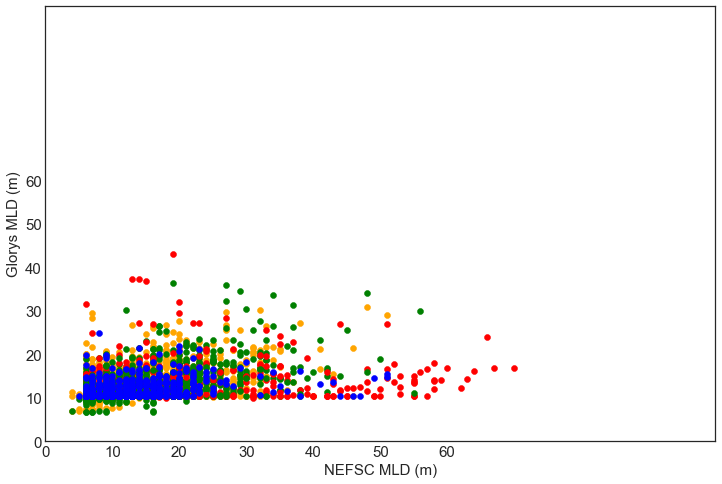

In [1031]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,100)
plt.xlim(0,100)
plt.scatter(SouthernMABNEFSC_sept, SouthernMABGlorys_sept,color='orange',label='Southern MAB')
plt.scatter(NorthernMABNEFSC_sept, NorthernMABGlorys_sept,color='green',label='Northern MAB')
plt.scatter(GeorgesBankNEFSC_sept, GeorgesBankGlorys_sept,color='red',label='Georges Bank')
plt.scatter(EGoMNEFSC_sept, EGoMGlorys_sept,color='green',label='Eastern GoM')
plt.scatter(WGoMNEFSC_sept, WGoMGlorys_sept,color='blue',label='Western GoM')
# leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.show()

# October

In [1111]:
GeorgesBankGlorys_oct = [25.330364, 32.502216, 28.382215, 26.703697, 33.570362, 28.992586, 35.401474, 24.872587, 21.668144, 15.259255, 14.191108, 26.551105, 18.158514, 12.207404, 15.869626, 18.005922, 27.771845, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 12.817775, 12.0548115, 12.359997, 11.291849, 11.444442, 12.665182, 22.278513, 20.599997, 35.401474, 28.229624, 37.232586, 37.232586, 37.385178, 22.125921, 19.07407, 26.093328, 20.752588, 13.122959, 12.207404, 23.499254, 25.940735, 26.85629, 25.788143, 30.518513, 27.314068, 26.85629, 25.940735, 21.057774, 23.651846, 19.68444, 22.431107, 23.346663, 23.346663, 21.362959, 13.580737, 17.395552, 23.041477, 19.531847, 18.921478, 24.41481, 20.752588, 17.85333, 10.834071, 10.834071, 11.597034, 21.820736, 21.362959, 23.346663, 20.752588, 19.68444, 23.041477, 26.398512, 31.891846, 31.891846, 37.232586, 30.97629, 30.97629, 31.281475, 39.826656, 11.444442, 15.869626, 16.022219, 12.207404, 11.902219, 11.1392565, 20.294811, 22.125921, 23.041477, 10.376293, 27.161476, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 17.700737, 22.736292, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 10.376293, 10.528886, 10.376293, 12.817775, 19.379255, 11.444442, 10.986664, 11.291849, 11.902219, 11.291849, 11.1392565, 11.1392565, 11.1392565, 10.528886, 10.376293, 10.6814785, 10.986664, 10.528886, 12.665182, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.207404, 16.022219, 13.580737, 12.359997, 12.665182, 10.528886, 15.869626, 12.817775, 16.785181, 15.564441, 19.07407, 18.311108, 15.869626, 18.158514, 15.717033, 15.411848, 21.210365, 23.651846, 20.294811, 23.041477, 29.450363, 24.719995, 34.791103, 18.768885, 25.330364, 25.177773, 27.314068, 23.194069, 23.194069, 22.125921, 29.450363, 26.551105, 23.80444, 26.703697, 32.502216, 28.229624, 28.382215, 12.0548115, 10.528886, 10.528886, 11.291849, 11.1392565, 10.834071, 20.752588, 20.752588, 18.311108, 13.580737, 15.106663, 36.9274, 29.297771, 14.648885, 15.717033, 34.02814, 17.700737, 16.479998, 18.616293, 19.531847, 17.85333, 13.885922, 34.180733, 21.362959, 21.97333, 18.616293, 20.142218, 28.839994, 30.36592, 32.654808, 30.060734, 28.992586, 25.482958, 24.41481, 24.109625, 23.041477, 19.68444, 19.68444, 27.466661, 27.466661, 19.68444, 30.823696, 36.46962, 35.554066, 36.46962, 23.499254, 48.677025, 34.48592, 25.330364, 28.53481, 27.619253, 23.346663, 32.95999, 20.294811, 19.226664, 45.777767, 40.58962, 31.891846, 42.42073, 33.722954, 30.823696, 33.722954, 33.87555, 48.37184, 43.0311, 42.87851, 48.829617, 16.785181, 10.528886, 18.616293, 13.73333, 13.122959, 11.444442, 22.278513, 30.213327, 17.700737, 17.24296, 22.278513, 21.057774, 16.785181, 14.191108, 14.191108, 18.005922, 17.85333, 16.785181, 20.294811, 21.51555, 25.788143, 23.194069, 21.210365, 28.6874, 34.333324, 29.602957, 22.583698, 25.63555, 21.820736, 21.057774, 20.142218, 24.262217, 32.654808, 35.859253, 35.859253, 44.404434, 34.791103, 32.044437, 31.434067, 27.008883, 21.820736, 22.583698, 19.989626, 19.531847, 29.450363, 29.450363, 19.379255, 19.989626, 19.07407, 35.706657, 36.164436, 9.918516, 21.210365, 15.411848, 19.68444, 23.957031, 20.90518, 22.888884, 25.330364, 27.314068, 42.573322, 26.398512, 33.41777, 33.41777, 35.706657, 32.95999, 30.213327, 25.330364, 37.69036, 44.251842, 25.482958, 30.97629, 35.706657, 26.093328, 29.755548, 22.125921, 26.85629, 29.908142, 17.700737, 36.011845, 32.8074, 31.58666, 23.80444, 22.125921, 25.025179, 30.213327, 28.07703, 25.330364, 29.14518, 36.011845, 38.14814, 37.99555, 32.502216, 43.0311, 44.09925, 10.834071, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.564441, 25.330364, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.801477, 14.3437, 14.801477, 13.428144, 15.717033, 16.327404, 16.327404, 24.872587, 25.330364, 38.30073, 12.817775, 11.444442, 13.73333, 22.736292, 28.382215, 15.411848, 18.921478, 23.957031, 25.025179, 17.85333, 17.395552, 22.278513, 13.428144, 10.6814785, 10.6814785, 10.376293, 10.986664, 10.6814785, 10.528886, 10.528886, 11.902219, 14.801477, 11.444442, 11.444442, 11.597034, 14.496293, 25.788143, 27.161476, 21.820736, 19.226664, 14.191108, 15.259255, 10.6814785, 10.528886, 10.528886, 12.665182, 11.597034, 12.359997, 13.428144, 13.275552, 16.327404, 10.528886, 13.275552, 19.07407, 21.362959, 23.346663, 24.262217, 15.564441, 21.210365, 21.210365, 10.834071, 14.496293, 13.122959, 13.73333, 13.885922, 14.038515, 13.885922, 17.24296, 15.869626, 12.359997, 16.785181, 19.68444, 10.834071, 11.749626, 10.528886, 10.528886, 10.528886, 14.3437, 15.564441, 12.817775, 12.817775, 17.24296, 14.95407, 17.395552, 18.4637, 18.158514, 17.24296, 17.090366, 22.278513, 21.210365, 24.872587, 19.07407, 36.011845, 51.2711, 21.362959, 24.41481, 29.755548, 31.281475, 32.502216, 35.706657, 29.14518, 29.450363, 24.109625, 21.668144, 18.921478, 16.785181, 19.68444, 19.837032, 22.736292, 31.281475, 25.177773, 33.570362, 34.63851, 34.02814, 32.95999, 31.58666, 26.093328, 30.97629, 46.388138, 39.063694, 27.008883, 28.839994, 26.093328, 22.583698, 21.057774, 20.447403, 21.057774, 20.294811, 20.294811, 22.125921, 25.177773, 43.0311, 11.902219, 12.512589, 15.411848, 16.174812, 15.411848, 17.090366, 21.362959, 18.921478, 26.703697, 20.599997, 19.989626, 19.226664, 17.700737, 19.379255, 11.444442, 41.96295, 22.125921, 19.989626, 14.648885, 27.924438, 26.24592, 21.362959, 23.041477, 23.041477, 14.191108, 13.885922, 14.038515, 14.648885, 14.648885, 15.411848, 15.106663, 14.95407, 15.106663, 12.512589, 12.512589, 12.359997, 14.496293, 11.597034, 12.817775, 13.122959, 19.837032, 13.275552, 11.444442, 10.986664, 12.817775, 14.3437, 15.106663, 10.528886, 10.6814785, 10.528886, 10.528886, 11.291849, 10.986664, 12.512589, 10.6814785, 10.6814785, 10.528886, 10.528886, 12.207404, 14.3437, 14.191108, 29.755548, 40.58962, 14.648885, 15.564441, 11.597034, 11.749626, 10.6814785, 16.022219, 15.869626, 17.24296, 16.174812, 12.359997, 27.161476, 14.191108, 18.4637, 20.599997, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 12.359997, 24.262217, 22.278513, 29.297771, 37.69036, 41.19999, 30.36592, 32.654808, 35.096287, 26.24592, 25.63555, 13.275552, 11.1392565, 10.6814785, 10.528886, 10.528886, 10.6814785, 10.6814785, 10.528886, 10.6814785, 10.6814785, 14.191108, 15.106663, 14.191108, 15.259255, 13.580737, 13.580737, 18.311108, 19.989626, 17.090366, 12.359997, 15.106663, 16.479998, 16.327404, 15.411848, 13.122959, 15.869626, 16.63259, 13.885922, 15.259255, 18.005922, 14.648885, 17.85333, 17.395552, 17.090366, 16.937775, 21.51555, 21.97333, 21.210365, 21.668144, 15.564441, 13.428144, 19.379255, 17.85333, 18.921478, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 11.444442, 13.428144, 14.801477, 15.106663, 13.428144, 14.038515, 14.801477, 14.648885, 14.496293, 15.564441, 17.548145, 12.512589, 12.512589, 13.885922, 14.95407, 15.411848, 14.648885, 15.106663, 17.700737, 15.564441, 18.921478, 22.736292, 16.479998, 12.359997, 12.207404, 13.275552, 22.278513, 17.24296, 13.122959, 17.85333, 12.817775, 13.122959, 12.970367, 12.665182, 12.0548115, 19.379255, 28.53481, 16.63259, 16.63259, 19.379255, 20.142218, 21.51555, 23.346663, 24.109625, 31.128881, 20.142218, 14.95407, 15.259255, 14.496293, 13.122959, 17.548145, 15.869626, 23.651846, 11.749626, 10.528886, 12.970367, 10.528886, 10.528886, 10.528886, 10.528886, 16.174812, 15.106663, 25.482958, 15.869626, 12.359997, 25.482958, 21.97333, 21.210365, 21.057774, 31.128881, 33.722954, 24.41481, 16.174812, 20.294811, 14.95407, 14.038515, 18.005922, 19.989626, 14.648885, 23.80444, 15.564441, 15.564441, 13.73333, 11.444442, 18.158514, 13.428144, 12.512589, 14.801477, 16.479998, 17.090366, 17.700737, 17.24296, 20.90518, 22.736292, 22.583698, 22.736292, 23.957031, 27.466661, 27.161476, 23.194069, 20.447403, 31.891846, 25.63555, 18.4637, 18.921478, 19.379255, 26.24592, 19.531847, 35.248882, 31.739252, 27.466661, 25.330364, 26.703697, 10.376293, 10.528886, 19.226664, 27.314068, 24.262217, 17.548145, 39.826656, 35.248882, 25.63555, 30.518513, 30.213327, 30.518513, 27.161476, 27.771845, 23.346663, 22.431107, 27.924438, 29.14518, 49.897766, 49.287395, 48.829617, 46.845917, 43.48888, 37.842953, 10.834071, 14.191108, 21.668144, 29.602957, 27.924438, 23.194069, 34.943695, 43.183693, 32.044437, 32.19703, 33.722954, 41.352585, 63.173317, 23.80444, 26.24592, 18.158514, 23.651846, 67.140724, 94.149605, 24.41481, 34.180733, 35.401474, 39.521473, 34.943695, 20.752588, 36.164436, 44.404434, 39.521473, 15.106663, 19.837032, 25.330364, 27.161476, 35.554066, 24.41481, 19.989626, 34.48592, 32.19703, 13.428144, 19.837032, 23.499254, 21.668144, 23.957031, 18.768885, 25.177773, 24.567402, 21.210365, 21.51555, 37.385178, 21.668144, 19.68444, 35.554066, 14.648885, 20.752588, 19.989626, 22.431107, 22.888884, 16.022219, 19.531847, 14.648885, 24.567402, 18.005922, 18.921478, 19.837032, 23.80444, 25.788143, 14.95407, 14.801477, 20.599997, 25.482958, 17.395552, 16.479998, 10.376293, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 22.125921, 16.174812, 16.174812, 20.294811, 14.95407, 28.382215, 18.158514, 22.888884, 36.164436, 36.164436, 36.164436, 36.164436, 36.164436, 36.164436, 36.164436, 36.164436, 15.259255, 30.213327, 30.213327, 30.213327, 30.213327, 19.837032, 19.837032, 19.837032, 30.671104, 13.275552, 13.275552, 30.671104, 19.837032, 19.837032, 19.837032, 30.213327, 30.213327, 30.213327, 30.213327, 15.259255, 30.213327, 30.213327, 30.213327, 30.213327, 30.213327, 30.213327, 30.213327, 30.213327, 34.791103, 34.791103, 34.791103, 34.791103, 34.791103, 13.580737, 13.580737, 13.580737, 15.564441, 15.564441, 15.564441, 15.564441, 13.73333, 13.73333, 13.73333, 13.73333, 15.564441, 15.564441, 15.564441, 33.722954, 13.580737, 13.580737, 13.580737, 31.434067, 31.434067, 31.434067, 31.434067, 31.434067, 31.434067, 31.434067, 31.434067, 31.434067, 31.434067, 31.434067, 31.434067, 10.071109, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.528886, 30.823696, 31.434067, 30.518513, 16.479998, 33.26518, 15.259255, 29.908142, 11.291849, 11.597034, 12.665182, 11.597034, 12.817775, 10.528886, 10.528886, 10.528886, 15.869626, 11.597034, 10.528886, 10.834071, 11.291849, 10.6814785, 11.1392565, 14.496293, 21.057774, 21.210365, 17.548145, 16.63259, 15.717033, 12.207404, 15.411848, 18.616293, 18.616293, 30.671104, 23.346663, 37.842953, 44.09925, 28.839994, 30.36592, 28.6874, 28.53481, 28.07703, 28.992586, 33.87555, 30.671104, 32.19703, 43.0311, 37.842953, 41.65777, 10.834071, 12.0548115, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 36.622215, 38.75851, 35.248882, 33.87555, 34.02814, 32.95999, 38.60592, 36.774807, 38.60592, 15.411848, 15.411848, 16.785181, 18.158514, 22.278513, 18.768885, 18.311108, 21.210365, 26.85629, 30.97629, 12.665182, 12.359997, 15.259255, 15.411848, 20.447403, 12.665182, 13.73333, 22.278513, 19.226664, 18.616293, 26.24592, 19.68444, 21.51555, 11.597034, 19.989626, 26.551105, 29.602957, 29.755548, 27.161476, 29.602957, 26.24592, 30.97629, 31.434067, 29.297771, 27.008883, 30.36592, 24.109625, 21.51555, 26.398512, 35.554066, 34.48592, 33.87555, 31.739252, 31.739252, 27.008883, 23.957031, 26.093328, 19.531847, 33.87555, 29.450363, 15.717033, 16.174812, 18.768885, 32.8074, 33.87555, 21.668144, 22.736292, 21.057774, 21.057774, 14.038515, 14.95407, 27.008883, 29.755548, 22.431107, 22.736292, 28.53481, 29.450363, 35.554066, 40.131844, 46.845917, 41.352585, 35.096287, 39.826656, 43.64147, 43.794064, 43.48888, 38.60592, 43.48888, 36.774807, 32.654808, 10.376293, 10.528886, 11.444442, 15.869626, 43.336285, 32.044437, 28.6874, 38.911102, 36.011845, 37.842953, 31.739252, 13.73333, 17.85333, 18.768885, 23.957031, 17.395552, 17.395552, 19.989626, 19.989626, 19.07407, 20.752588, 28.53481, 20.599997, 20.447403, 20.447403, 16.785181, 17.700737, 18.158514, 35.401474, 16.937775, 11.291849, 11.902219, 10.376293, 15.411848, 21.362959, 13.428144, 19.531847, 12.359997, 24.109625, 18.921478, 16.937775, 12.512589, 12.359997, 9.918516, 11.749626, 11.444442, 20.90518, 19.226664, 19.837032, 32.19703, 30.671104, 37.385178, 38.30073, 37.385178, 36.9274, 37.232586, 37.232586, 38.60592, 32.8074, 32.8074, 36.164436, 23.499254, 24.872587, 24.872587, 22.278513, 21.820736, 25.788143, 26.24592, 41.81036, 34.48592, 33.722954, 34.943695, 34.791103, 43.794064, 33.112587, 30.97629, 42.573322, 38.60592, 38.60592, 38.911102, 36.011845, 31.58666, 37.07999, 24.872587, 22.583698, 27.161476, 29.450363, 26.398512, 40.58962, 37.99555, 32.19703, 23.651846, 27.161476, 26.398512, 20.447403, 22.278513, 12.817775, 14.038515, 16.785181, 10.528886, 11.291849, 10.986664, 20.142218, 11.902219, 10.376293, 18.311108, 18.4637, 14.648885, 30.823696, 32.502216, 34.943695, 44.251842, 36.164436, 33.41777, 27.008883, 16.174812, 17.548145, 14.801477, 18.311108, 23.499254, 21.210365, 21.362959, 26.398512, 31.891846, 33.26518, 34.02814, 28.6874, 28.382215, 30.36592, 29.908142, 28.382215, 20.599997, 21.057774, 17.24296, 15.259255, 15.564441, 12.817775, 25.482958, 21.362959, 26.85629, 18.616293, 22.431107, 27.161476, 20.752588, 39.674065, 37.232586, 28.6874, 28.229624, 24.41481, 22.888884, 18.005922, 18.005922, 19.226664, 19.226664, 19.379255, 18.4637, 21.51555, 34.180733, 27.619253, 27.161476, 26.24592, 28.229624, 51.42369, 47.1511, 43.64147, 42.725918, 41.96295, 39.216286, 39.826656, 48.37184, 49.745174, 46.388138, 50.355545, 47.76147, 51.576283, 52.33925, 52.186653, 46.235546, 29.602957, 38.911102, 11.749626, 14.3437, 18.005922, 16.937775, 19.68444, 10.6814785, 14.038515, 17.700737, 21.057774, 49.897766, 68.51405, 44.709618, 10.376293, 27.314068, 41.96295, 27.466661, 25.940735, 27.771845, 22.431107, 30.671104, 27.008883, 39.674065, 23.194069, 37.232586, 41.81036, 13.73333, 11.749626, 10.376293, 23.194069, 23.041477, 17.090366, 19.531847, 21.362959, 17.700737, 11.597034, 14.496293, 18.158514, 27.771845, 33.722954, 31.434067, 21.210365, 17.85333, 22.125921, 21.057774, 19.379255, 19.989626, 19.379255, 20.599997, 19.68444, 20.447403, 19.531847, 23.194069, 26.398512, 23.499254, 17.090366, 25.330364, 30.518513, 26.551105, 34.02814, 35.554066, 12.359997, 13.428144, 14.3437, 12.0548115, 15.564441, 15.717033, 13.73333, 15.869626, 28.992586, 37.53777, 21.668144, 19.989626, 18.921478, 15.411848, 19.379255, 16.63259, 21.362959]
GeorgesBankNEFSC_oct = [37.0, 31.0, 33.0, 19.0, 35.0, 36.0, 23.0, 28.0, 14.0, 40.0, 24.0, 25.0, 37.0, 40.0, 10.0, 14.0, 7.0, 20.0, 14.0, 11.0, 30.0, 23.0, 19.0, 7.0, 44.0, 21.0, 60.0, 61.0, 62.0, 66.0, 52.0, 49.0, 48.0, 49.0, 7.0, 26.0, 14.0, 12.0, 55.0, 14.0, 31.0, 29.0, 30.0, 14.0, 7.0, 16.0, 35.0, 29.0, 20.0, 38.0, 55.0, 61.0, 40.0, 20.0, 17.0, 45.0, 41.0, 26.0, 51.0, 10.0, 23.0, 72.0, 44.0, 42.0, 14.0, 38.0, 34.0, 29.0, 34.0, 40.0, 50.0, 56.0, 45.0, 58.0, 52.0, 42.0, 53.0, 33.0, 40.0, 32.0, 36.0, 37.0, 55.0, 51.0, 42.0, 56.0, 41.0, 40.0, 16.0, 52.0, 8.0, 23.0, 29.0, 12.0, 6.0, 30.0, 3.0, 11.0, 16.0, 6.0, 36.0, 7.0, 50.0, 49.0, 49.0, 63.0, 8.0, 9.0, 15.0, 31.0, 13.0, 14.0, 57.0, 8.0, 40.0, 72.0, 15.0, 13.0, 16.0, 37.0, 53.0, 7.0, 11.0, 12.0, 18.0, 7.0, 13.0, 7.0, 10.0, 9.0, 8.0, 6.0, 6.0, 37.0, 39.0, 16.0, 36.0, 30.0, 41.0, 41.0, 6.0, 61.0, 49.0, 58.0, 35.0, 20.0, 32.0, 15.0, 7.0, 32.0, 19.0, 17.0, 8.0, 14.0, 9.0, 46.0, 56.0, 45.0, 42.0, 44.0, 21.0, 16.0, 52.0, 78.0, 66.0, 48.0, 47.0, 63.0, 30.0, 61.0, 18.0, 71.0, 10.0, 12.0, 46.0, 15.0, 6.0, 18.0, 14.0, 23.0, 47.0, 54.0, 22.0, 16.0, 9.0, 39.0, 45.0, 28.0, 19.0, 33.0, 30.0, 58.0, 32.0, 28.0, 15.0, 7.0, 19.0, 18.0, 25.0, 39.0, 40.0, 38.0, 47.0, 48.0, 59.0, 46.0, 22.0, 14.0, 31.0, 29.0, 31.0, 23.0, 8.0, 29.0, 31.0, 54.0, 51.0, 15.0, 48.0, 25.0, 39.0, 28.0, 46.0, 51.0, 40.0, 12.0, 9.0, 48.0, 50.0, 40.0, 52.0, 45.0, 69.0, 76.0, 51.0, 54.0, 59.0, 42.0, 59.0, 7.0, 37.0, 57.0, 45.0, 11.0, 27.0, 49.0, 49.0, 50.0, 63.0, 28.0, 29.0, 18.0, 22.0, 28.0, 17.0, 32.0, 11.0, 22.0, 32.0, 40.0, 35.0, 40.0, 39.0, 41.0, 43.0, 16.0, 24.0, 15.0, 15.0, 22.0, 32.0, 34.0, 20.0, 19.0, 40.0, 44.0, 34.0, 40.0, 46.0, 22.0, 10.0, 12.0, 12.0, 26.0, 21.0, 20.0, 20.0, 13.0, 21.0, 45.0, 23.0, 57.0, 31.0, 14.0, 17.0, 7.0, 9.0, 53.0, 14.0, 26.0, 47.0, 39.0, 35.0, 34.0, 22.0, 42.0, 34.0, 33.0, 42.0, 20.0, 46.0, 46.0, 27.0, 24.0, 59.0, 48.0, 33.0, 17.0, 57.0, 20.0, 75.0, 11.0, 43.0, 61.0, 49.0, 50.0, 38.0, 20.0, 63.0, 50.0, 34.0, 38.0, 50.0, 16.0, 38.0, 28.0, 31.0, 35.0, 35.0, 6.0, 6.0, 6.0, 6.0, 35.0, 25.0, 32.0, 11.0, 11.0, 6.0, 8.0, 10.0, 6.0, 7.0, 26.0, 12.0, 20.0, 32.0, 17.0, 16.0, 7.0, 8.0, 23.0, 34.0, 17.0, 58.0, 51.0, 28.0, 30.0, 20.0, 35.0, 46.0, 11.0, 28.0, 6.0, 8.0, 22.0, 40.0, 41.0, 6.0, 7.0, 8.0, 27.0, 19.0, 10.0, 14.0, 6.0, 17.0, 47.0, 51.0, 36.0, 41.0, 23.0, 44.0, 54.0, 62.0, 16.0, 15.0, 18.0, 9.0, 21.0, 12.0, 15.0, 20.0, 34.0, 21.0, 26.0, 26.0, 24.0, 30.0, 32.0, 30.0, 30.0, 29.0, 15.0, 30.0, 14.0, 15.0, 9.0, 12.0, 9.0, 25.0, 39.0, 26.0, 39.0, 42.0, 11.0, 12.0, 9.0, 8.0, 8.0, 12.0, 21.0, 19.0, 14.0, 16.0, 49.0, 15.0, 15.0, 37.0, 20.0, 26.0, 13.0, 20.0, 58.0, 54.0, 50.0, 50.0, 41.0, 22.0, 26.0, 30.0, 31.0, 32.0, 20.0, 32.0, 42.0, 40.0, 53.0, 25.0, 38.0, 51.0, 64.0, 41.0, 50.0, 44.0, 35.0, 36.0, 24.0, 27.0, 20.0, 37.0, 49.0, 28.0, 48.0, 51.0, 55.0, 40.0, 23.0, 24.0, 26.0, 34.0, 43.0, 17.0, 18.0, 48.0, 11.0, 14.0, 15.0, 42.0, 43.0, 44.0, 32.0, 30.0, 28.0, 22.0, 33.0, 22.0, 19.0, 8.0, 17.0, 42.0, 46.0, 40.0, 14.0, 39.0, 35.0, 10.0, 31.0, 29.0, 13.0, 9.0, 7.0, 7.0, 11.0, 19.0, 27.0, 37.0, 13.0, 12.0, 7.0, 28.0, 6.0, 17.0, 6.0, 12.0, 10.0, 12.0, 8.0, 15.0, 8.0, 7.0, 6.0, 11.0, 7.0, 21.0, 12.0, 7.0, 6.0, 19.0, 7.0, 46.0, 46.0, 33.0, 29.0, 28.0, 32.0, 26.0, 36.0, 15.0, 8.0, 59.0, 47.0, 60.0, 9.0, 56.0, 45.0, 30.0, 12.0, 31.0, 22.0, 11.0, 29.0, 10.0, 33.0, 8.0, 6.0, 16.0, 6.0, 6.0, 6.0, 38.0, 6.0, 11.0, 12.0, 7.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 29.0, 41.0, 40.0, 45.0, 7.0, 10.0, 6.0, 10.0, 16.0, 9.0, 6.0, 10.0, 7.0, 7.0, 15.0, 18.0, 6.0, 6.0, 7.0, 17.0, 31.0, 78.0, 53.0, 40.0, 41.0, 30.0, 47.0, 31.0, 57.0, 22.0, 10.0, 54.0, 53.0, 23.0, 29.0, 8.0, 9.0, 9.0, 20.0, 13.0, 17.0, 8.0, 11.0, 14.0, 18.0, 19.0, 57.0, 61.0, 55.0, 30.0, 9.0, 23.0, 11.0, 14.0, 17.0, 13.0, 20.0, 22.0, 27.0, 16.0, 20.0, 13.0, 21.0, 57.0, 12.0, 29.0, 14.0, 41.0, 30.0, 49.0, 27.0, 12.0, 14.0, 20.0, 10.0, 7.0, 6.0, 6.0, 29.0, 11.0, 50.0, 6.0, 6.0, 42.0, 7.0, 6.0, 19.0, 17.0, 7.0, 6.0, 6.0, 15.0, 10.0, 12.0, 9.0, 15.0, 14.0, 20.0, 8.0, 7.0, 13.0, 9.0, 19.0, 17.0, 18.0, 16.0, 21.0, 46.0, 17.0, 18.0, 12.0, 62.0, 12.0, 14.0, 10.0, 12.0, 8.0, 10.0, 20.0, 16.0, 8.0, 22.0, 44.0, 49.0, 27.0, 41.0, 43.0, 28.0, 31.0, 35.0, 36.0, 19.0, 46.0, 14.0, 11.0, 7.0, 10.0, 11.0, 16.0, 34.0, 25.0, 63.0, 40.0, 46.0, 29.0, 27.0, 26.0, 8.0, 15.0, 61.0, 27.0, 11.0, 11.0, 19.0, 36.0, 41.0, 27.0, 6.0, 6.0, 6.0, 9.0, 10.0, 6.0, 10.0, 18.0, 22.0, 40.0, 17.0, 40.0, 57.0, 28.0, 45.0, 42.0, 38.0, 33.0, 15.0, 12.0, 19.0, 7.0, 30.0, 31.0, 11.0, 27.0, 15.0, 20.0, 42.0, 11.0, 35.0, 70.0, 7.0, 10.0, 10.0, 21.0, 15.0, 19.0, 25.0, 25.0, 22.0, 19.0, 17.0, 15.0, 20.0, 13.0, 15.0, 22.0, 14.0, 14.0, 34.0, 20.0, 51.0, 52.0, 51.0, 42.0, 52.0, 10.0, 6.0, 44.0, 30.0, 11.0, 7.0, 49.0, 27.0, 31.0, 63.0, 49.0, 21.0, 13.0, 18.0, 17.0, 109.0, 23.0, 40.0, 31.0, 18.0, 7.0, 8.0, 12.0, 24.0, 10.0, 16.0, 10.0, 27.0, 41.0, 41.0, 29.0, 44.0, 34.0, 37.0, 34.0, 38.0, 55.0, 33.0, 15.0, 44.0, 50.0, 33.0, 37.0, 40.0, 36.0, 33.0, 52.0, 39.0, 45.0, 41.0, 54.0, 20.0, 18.0, 26.0, 39.0, 25.0, 26.0, 35.0, 22.0, 18.0, 8.0, 21.0, 23.0, 44.0, 31.0, 10.0, 20.0, 53.0, 17.0, 31.0, 23.0, 16.0, 20.0, 19.0, 27.0, 12.0, 40.0, 35.0, 17.0, 47.0, 11.0, 32.0, 34.0, 33.0, 37.0, 31.0, 62.0, 26.0, 43.0, 32.0, 46.0, 41.0, 40.0, 34.0, 39.0, 39.0, 35.0, 12.0, 56.0, 59.0, 8.0, 22.0, 19.0, 25.0, 11.0, 29.0, 35.0, 15.0, 16.0, 37.0, 12.0, 21.0, 13.0, 41.0, 14.0, 42.0, 11.0, 42.0, 51.0, 33.0, 45.0, 44.0, 37.0, 42.0, 41.0, 47.0, 44.0, 45.0, 54.0, 50.0, 57.0, 61.0, 46.0, 39.0, 16.0, 8.0, 14.0, 15.0, 30.0, 20.0, 14.0, 47.0, 50.0, 50.0, 36.0, 15.0, 12.0, 12.0, 11.0, 12.0, 13.0, 18.0, 37.0, 49.0, 46.0, 45.0, 48.0, 51.0, 51.0, 48.0, 47.0, 45.0, 45.0, 49.0, 49.0, 26.0, 10.0, 17.0, 15.0, 21.0, 22.0, 30.0, 50.0, 49.0, 48.0, 49.0, 50.0, 49.0, 48.0, 21.0, 22.0, 22.0, 10.0, 11.0, 6.0, 50.0, 65.0, 8.0, 60.0, 45.0, 20.0, 24.0, 22.0, 12.0, 30.0, 29.0, 22.0, 19.0, 54.0, 58.0, 54.0, 44.0, 29.0, 22.0, 7.0, 8.0, 9.0, 10.0, 17.0, 32.0, 12.0, 14.0, 28.0, 14.0, 17.0, 27.0, 7.0, 16.0, 12.0, 14.0, 35.0, 55.0, 50.0, 51.0, 44.0, 10.0, 27.0, 65.0, 57.0, 42.0, 43.0, 29.0, 31.0, 34.0, 44.0, 31.0, 20.0, 11.0, 45.0, 8.0, 41.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 34.0, 46.0, 52.0, 34.0, 29.0, 45.0, 56.0, 11.0, 40.0, 35.0, 38.0, 26.0, 27.0, 40.0, 19.0, 31.0, 42.0, 29.0, 44.0, 48.0, 38.0, 20.0, 15.0, 28.0, 26.0, 19.0, 39.0, 25.0, 12.0, 56.0, 21.0, 10.0, 9.0, 17.0, 52.0, 56.0, 55.0, 57.0, 43.0, 43.0, 33.0, 48.0, 33.0, 26.0, 36.0, 27.0, 20.0, 65.0, 15.0, 24.0, 54.0, 48.0, 49.0, 48.0, 50.0, 43.0, 40.0, 23.0, 32.0, 40.0, 28.0, 25.0, 20.0, 15.0, 21.0, 25.0, 16.0, 9.0, 27.0, 17.0, 41.0, 45.0, 41.0, 29.0, 57.0, 62.0, 61.0, 49.0, 48.0, 42.0, 39.0, 35.0, 52.0, 22.0, 39.0, 9.0, 31.0, 26.0, 6.0, 27.0, 21.0, 48.0, 42.0, 29.0, 75.0, 58.0, 67.0, 62.0, 67.0, 57.0, 53.0, 48.0, 15.0, 9.0, 37.0, 34.0, 29.0, 15.0, 12.0, 6.0, 36.0, 10.0, 14.0, 13.0, 37.0, 51.0, 21.0, 7.0, 15.0, 11.0, 10.0, 13.0, 7.0, 33.0, 67.0, 30.0, 59.0, 9.0, 37.0, 36.0, 38.0, 45.0, 52.0, 13.0, 17.0, 22.0, 31.0, 31.0, 32.0, 45.0, 42.0, 43.0, 44.0, 37.0, 38.0, 41.0, 35.0, 35.0, 32.0, 20.0, 56.0, 51.0, 17.0, 15.0, 49.0, 6.0, 31.0, 28.0, 39.0, 34.0, 44.0, 38.0, 28.0, 18.0, 32.0, 20.0, 24.0, 11.0, 6.0, 9.0, 10.0, 15.0, 10.0, 64.0, 21.0, 60.0, 43.0, 42.0, 40.0, 32.0, 35.0, 34.0, 19.0, 39.0, 47.0, 23.0, 9.0, 6.0, 9.0, 17.0, 8.0, 13.0, 16.0, 51.0, 9.0, 20.0, 46.0, 29.0, 34.0, 28.0, 37.0, 60.0, 37.0, 47.0, 37.0, 30.0, 17.0, 19.0, 55.0, 57.0, 17.0, 16.0, 23.0, 33.0, 18.0, 19.0, 18.0, 6.0, 34.0, 15.0, 31.0, 40.0, 46.0, 57.0, 44.0, 54.0, 32.0, 35.0, 32.0, 68.0, 36.0, 38.0, 31.0, 50.0, 46.0, 56.0, 31.0, 57.0, 51.0, 23.0, 11.0, 45.0, 40.0, 39.0, 40.0, 49.0, 23.0, 34.0, 42.0, 25.0, 36.0, 65.0, 27.0, 60.0, 11.0, 53.0, 29.0, 59.0, 52.0, 22.0, 52.0, 47.0, 14.0, 8.0, 16.0, 16.0, 23.0, 23.0, 34.0, 27.0, 13.0, 27.0, 19.0, 10.0, 59.0, 59.0, 63.0, 7.0, 16.0, 45.0, 17.0, 53.0, 52.0, 12.0, 14.0, 31.0, 29.0, 17.0, 10.0, 13.0, 14.0, 11.0, 26.0, 33.0, 16.0, 26.0, 6.0, 9.0, 19.0, 14.0, 13.0, 46.0, 35.0, 40.0, 26.0, 23.0, 13.0, 19.0, 23.0, 11.0, 9.0, 46.0, 43.0, 13.0, 13.0, 16.0, 24.0, 46.0, 32.0, 45.0, 28.0, 13.0, 7.0, 6.0, 17.0, 49.0, 8.0, 24.0, 19.0, 13.0, 9.0, 18.0, 11.0, 31.0, 27.0, 9.0, 35.0, 29.0, 34.0, 11.0, 42.0, 44.0, 14.0, 17.0, 21.0, 15.0]


In [1033]:
SouthernMABGlorys_oct = [13.275552, 10.528886, 10.834071, 10.834071, 13.122959, 8.8503685, 13.73333, 13.275552, 26.398512, 19.226664, 21.362959, 20.599997, 21.362959, 19.226664, 17.85333, 14.496293, 17.548145, 12.665182, 12.665182, 14.038515, 12.970367, 17.85333, 23.957031, 14.496293, 16.174812, 20.599997, 28.6874, 29.908142, 35.706657, 28.229624, 34.943695, 29.450363, 31.58666, 28.229624, 31.891846, 28.6874, 31.891846, 27.466661, 16.479998, 29.297771, 42.115547, 41.65777, 31.891846, 27.924438, 40.894806, 19.07407, 22.736292, 41.19999, 29.450363, 31.434067, 10.528886, 17.700737, 20.90518, 22.583698, 34.791103, 32.502216, 26.703697, 38.75851, 37.99555, 40.742214, 42.87851, 45.31999, 45.167397, 45.625175, 47.456284, 48.21925, 46.69332, 48.21925, 46.54073, 48.066654, 13.580737, 11.597034, 11.597034, 11.597034, 11.291849, 22.431107, 17.395552, 12.970367, 13.73333, 14.3437, 15.106663, 15.411848, 13.275552, 11.597034, 15.564441, 16.937775, 20.142218, 19.07407, 18.921478, 21.668144, 21.820736, 18.158514, 26.398512, 29.450363, 29.297771, 20.294811, 22.278513, 10.528886, 10.528886, 15.411848, 7.3244424, 7.3244424, 10.376293, 10.528886, 11.597034, 10.528886, 10.071109, 7.6296277, 14.801477, 8.545183, 14.801477, 15.717033, 15.259255, 13.275552, 14.038515, 13.428144, 14.496293, 14.496293, 12.970367, 12.0548115, 11.444442, 21.210365, 17.090366, 19.07407, 19.531847, 19.68444, 19.68444, 16.937775, 20.90518, 19.68444, 19.68444, 13.122959, 14.038515, 18.921478, 18.158514, 17.090366, 14.496293, 13.885922, 18.768885, 18.768885, 15.717033, 18.616293, 19.68444, 10.528886, 10.528886, 14.038515, 11.1392565, 13.428144, 15.564441, 12.359997, 13.428144, 20.294811, 10.528886, 10.986664, 12.817775, 14.038515, 10.376293, 10.528886, 11.291849, 10.528886, 12.359997, 10.986664, 10.376293, 10.528886, 10.6814785, 13.73333, 26.551105, 27.771845, 28.992586, 31.281475, 20.142218, 15.259255, 15.411848, 16.785181]
SouthernMABNEFSC_oct = [12.0, 20.0, 16.0, 16.0, 9.0, 5.0, 11.0, 11.0, 30.0, 28.0, 32.0, 29.0, 17.0, 23.0, 19.0, 11.0, 16.0, 8.0, 5.0, 9.0, 21.0, 19.0, 31.0, 36.0, 36.0, 36.0, 9.0, 15.0, 38.0, 30.0, 39.0, 39.0, 12.0, 34.0, 26.0, 26.0, 34.0, 32.0, 35.0, 42.0, 25.0, 40.0, 35.0, 39.0, 39.0, 37.0, 38.0, 52.0, 30.0, 30.0, 9.0, 13.0, 16.0, 29.0, 29.0, 24.0, 46.0, 23.0, 22.0, 24.0, 49.0, 39.0, 18.0, 56.0, 14.0, 26.0, 43.0, 56.0, 24.0, 54.0, 6.0, 15.0, 15.0, 18.0, 9.0, 23.0, 17.0, 9.0, 9.0, 18.0, 18.0, 11.0, 11.0, 18.0, 14.0, 18.0, 23.0, 25.0, 12.0, 21.0, 24.0, 26.0, 40.0, 21.0, 13.0, 11.0, 14.0, 6.0, 6.0, 9.0, 4.0, 6.0, 16.0, 13.0, 15.0, 7.0, 6.0, 7.0, 19.0, 13.0, 11.0, 16.0, 12.0, 18.0, 11.0, 10.0, 18.0, 22.0, 16.0, 16.0, 17.0, 36.0, 29.0, 31.0, 31.0, 16.0, 15.0, 17.0, 28.0, 24.0, 25.0, 44.0, 24.0, 18.0, 13.0, 23.0, 23.0, 31.0, 36.0, 50.0, 35.0, 41.0, 39.0, 6.0, 23.0, 27.0, 7.0, 20.0, 19.0, 25.0, 27.0, 32.0, 19.0, 8.0, 17.0, 13.0, 14.0, 11.0, 22.0, 13.0, 27.0, 45.0, 17.0, 43.0, 17.0, 53.0, 44.0, 29.0, 44.0, 42.0, 19.0, 18.0, 16.0, 22.0]

In [1034]:
NorthernMABGlorys_oct = [22.888884, 27.008883, 23.499254, 22.125921, 26.398512, 23.041477, 16.479998, 36.46962, 29.14518, 14.648885, 14.496293, 15.259255, 24.109625, 21.51555, 17.24296, 15.869626, 15.869626, 16.174812, 12.817775, 13.428144, 13.73333, 14.191108, 13.73333, 18.158514, 17.24296, 16.479998, 18.616293, 18.4637, 18.4637, 15.869626, 12.512589, 12.817775, 16.785181, 11.291849, 14.191108, 11.444442, 12.512589, 10.834071, 14.191108, 14.496293, 11.597034, 11.902219, 11.902219, 11.444442, 11.291849, 10.986664, 10.528886, 19.07407, 18.311108, 16.479998, 16.174812, 14.95407, 12.665182, 13.275552, 11.1392565, 12.817775, 9.3081455, 11.1392565, 15.869626, 15.869626, 15.106663, 15.106663, 6.866665, 11.444442, 12.817775, 11.291849, 11.902219, 10.834071, 11.597034, 11.1392565, 10.834071, 17.395552, 17.24296, 17.548145, 17.090366, 10.834071, 10.834071, 11.291849, 10.6814785, 11.291849, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 18.616293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.444442, 11.597034, 11.1392565, 10.986664, 14.496293, 17.85333, 12.359997, 15.717033, 6.2562947, 16.022219, 16.022219, 14.191108, 13.73333, 14.038515, 23.651846, 24.719995, 24.567402, 27.924438, 9.460738, 11.597034, 10.528886, 16.327404, 17.395552, 15.106663, 11.597034, 12.817775, 24.567402, 24.719995, 23.194069, 10.376293, 20.599997, 37.232586, 33.41777, 19.531847, 16.937775, 22.125921, 15.869626, 11.1392565, 14.3437, 16.785181, 12.817775, 12.817775, 11.291849, 19.07407, 15.717033, 10.376293, 10.2237015, 24.262217, 30.518513, 20.599997, 28.229624, 32.95999, 13.580737, 10.528886, 10.528886, 22.736292, 19.531847, 10.6814785, 10.986664, 10.376293, 10.528886, 10.6814785, 45.777767, 51.88147, 11.1392565, 11.1392565, 13.428144, 16.937775, 10.528886, 35.706657, 12.970367, 11.1392565, 11.1392565, 16.785181, 13.428144, 16.937775, 17.24296, 19.07407, 12.512589, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.275552, 11.597034, 11.444442, 12.0548115, 12.359997, 12.665182, 10.528886, 10.528886, 10.6814785, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 24.41481, 18.768885, 22.736292, 22.736292, 27.008883, 25.788143, 19.989626, 20.294811, 20.294811, 20.294811, 21.668144, 10.528886, 25.025179, 11.597034, 11.749626, 17.090366, 23.80444, 18.768885, 21.057774, 10.528886, 10.528886, 10.528886, 12.359997, 24.262217, 24.262217, 24.719995, 24.719995, 24.719995, 24.719995, 24.872587, 21.51555, 21.820736, 23.041477, 23.041477, 24.109625, 24.872587, 22.888884, 23.041477, 20.142218, 28.992586, 29.602957, 31.739252, 30.518513, 20.294811, 15.259255, 14.496293, 26.093328, 16.63259, 16.785181, 16.937775, 18.005922, 18.768885, 18.768885, 16.785181, 16.785181, 16.785181, 19.379255, 20.142218, 20.294811, 18.616293, 17.548145, 14.801477, 14.801477, 19.68444, 24.41481, 22.888884, 17.700737, 15.869626, 18.616293, 19.531847, 19.531847, 16.937775, 16.174812, 14.3437, 21.362959, 10.071109, 15.717033, 20.447403, 13.275552, 11.291849, 10.376293, 16.63259, 10.6814785, 13.275552, 20.90518, 19.989626, 19.989626, 21.820736, 22.736292, 23.499254, 23.041477, 21.668144, 22.583698, 22.583698, 19.531847, 19.989626, 19.989626, 19.68444, 18.768885, 16.63259, 16.63259, 20.752588, 19.837032, 16.785181, 16.174812, 14.801477, 13.885922, 14.801477, 11.902219, 12.970367, 14.038515, 11.444442, 10.528886, 13.580737, 22.736292, 28.839994, 21.51555, 34.943695, 36.622215, 37.232586, 37.07999, 26.24592, 21.057774, 15.106663, 14.038515, 18.768885, 21.51555, 24.719995, 23.499254, 25.940735, 23.499254, 21.51555, 28.992586, 26.703697, 36.164436, 24.872587, 33.87555, 33.26518, 12.512589, 13.73333, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 12.665182, 12.665182, 17.395552, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 17.548145, 15.106663, 12.359997, 17.24296, 10.986664, 13.580737, 26.85629, 23.041477, 16.174812, 23.041477, 21.210365, 21.210365, 25.177773, 22.278513, 33.41777, 19.837032, 24.719995, 20.142218, 28.382215, 19.989626, 22.736292, 20.142218, 39.063694, 35.401474, 34.333324, 34.791103, 19.226664, 23.194069, 21.057774, 21.97333, 22.278513, 19.379255, 27.008883, 29.755548, 30.671104, 26.398512, 29.602957, 21.210365, 11.902219, 11.444442, 11.902219, 13.73333, 9.918516, 10.528886, 10.528886, 33.570362, 33.87555, 31.58666, 31.739252, 32.044437, 40.284435, 39.521473, 40.58962, 40.131844, 39.826656, 16.022219, 10.528886, 10.528886, 11.444442, 35.554066, 31.739252, 34.48592, 37.07999, 38.75851, 37.232586, 36.774807, 10.2237015, 11.902219, 11.444442, 14.191108, 11.597034, 37.232586, 11.1392565, 10.986664, 13.275552, 12.359997, 17.24296, 21.820736, 28.07703, 17.700737, 21.820736, 16.937775, 11.1392565, 18.921478, 19.07407, 15.259255, 16.63259, 16.63259, 18.158514, 18.616293, 16.327404, 10.6814785, 17.700737, 18.616293, 17.85333, 17.85333, 17.548145, 18.616293, 10.6814785, 10.376293, 11.444442, 20.599997, 27.161476, 20.142218, 21.210365, 10.2237015, 13.428144, 12.359997, 37.69036, 39.674065, 10.376293, 11.902219, 10.528886, 10.528886, 20.294811, 10.376293, 10.528886, 10.528886]
NorthernMABNEFSC_oct = [32.0, 34.0, 23.0, 21.0, 33.0, 31.0, 37.0, 38.0, 36.0, 19.0, 21.0, 45.0, 16.0, 27.0, 36.0, 37.0, 24.0, 32.0, 25.0, 14.0, 20.0, 7.0, 10.0, 26.0, 22.0, 25.0, 37.0, 37.0, 18.0, 36.0, 24.0, 18.0, 22.0, 22.0, 25.0, 21.0, 15.0, 8.0, 20.0, 35.0, 15.0, 11.0, 15.0, 20.0, 17.0, 22.0, 12.0, 23.0, 23.0, 24.0, 19.0, 20.0, 15.0, 12.0, 7.0, 13.0, 15.0, 16.0, 9.0, 18.0, 7.0, 13.0, 6.0, 16.0, 8.0, 14.0, 11.0, 7.0, 6.0, 20.0, 17.0, 7.0, 12.0, 20.0, 30.0, 14.0, 16.0, 18.0, 13.0, 6.0, 15.0, 12.0, 13.0, 6.0, 9.0, 9.0, 11.0, 6.0, 7.0, 17.0, 6.0, 17.0, 12.0, 10.0, 15.0, 26.0, 29.0, 22.0, 9.0, 5.0, 24.0, 31.0, 13.0, 15.0, 8.0, 19.0, 21.0, 10.0, 12.0, 17.0, 31.0, 29.0, 28.0, 29.0, 8.0, 9.0, 10.0, 20.0, 16.0, 10.0, 8.0, 11.0, 24.0, 23.0, 34.0, 28.0, 37.0, 33.0, 43.0, 42.0, 46.0, 11.0, 11.0, 23.0, 36.0, 14.0, 23.0, 9.0, 25.0, 15.0, 17.0, 19.0, 20.0, 9.0, 6.0, 15.0, 33.0, 36.0, 9.0, 13.0, 18.0, 25.0, 18.0, 29.0, 6.0, 10.0, 13.0, 6.0, 57.0, 65.0, 13.0, 23.0, 11.0, 12.0, 21.0, 30.0, 25.0, 15.0, 29.0, 9.0, 29.0, 9.0, 6.0, 7.0, 8.0, 6.0, 8.0, 6.0, 7.0, 7.0, 6.0, 6.0, 10.0, 27.0, 18.0, 6.0, 6.0, 8.0, 21.0, 9.0, 8.0, 11.0, 12.0, 9.0, 10.0, 22.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 29.0, 32.0, 15.0, 33.0, 23.0, 41.0, 26.0, 38.0, 37.0, 37.0, 34.0, 12.0, 28.0, 10.0, 13.0, 16.0, 6.0, 6.0, 6.0, 46.0, 33.0, 9.0, 33.0, 31.0, 33.0, 38.0, 42.0, 17.0, 52.0, 51.0, 33.0, 30.0, 45.0, 48.0, 51.0, 34.0, 46.0, 18.0, 23.0, 48.0, 45.0, 32.0, 36.0, 35.0, 31.0, 26.0, 35.0, 9.0, 37.0, 28.0, 29.0, 36.0, 30.0, 13.0, 25.0, 35.0, 37.0, 40.0, 21.0, 43.0, 29.0, 40.0, 43.0, 38.0, 39.0, 11.0, 15.0, 10.0, 16.0, 17.0, 16.0, 33.0, 18.0, 13.0, 8.0, 28.0, 8.0, 24.0, 30.0, 18.0, 20.0, 22.0, 12.0, 16.0, 42.0, 34.0, 26.0, 19.0, 32.0, 29.0, 27.0, 29.0, 18.0, 17.0, 25.0, 27.0, 21.0, 22.0, 20.0, 21.0, 27.0, 31.0, 28.0, 27.0, 25.0, 39.0, 20.0, 19.0, 16.0, 24.0, 24.0, 33.0, 11.0, 30.0, 30.0, 24.0, 27.0, 13.0, 8.0, 12.0, 16.0, 10.0, 17.0, 36.0, 26.0, 32.0, 29.0, 37.0, 39.0, 24.0, 28.0, 41.0, 40.0, 29.0, 23.0, 30.0, 33.0, 27.0, 42.0, 42.0, 12.0, 10.0, 23.0, 25.0, 9.0, 8.0, 10.0, 11.0, 19.0, 26.0, 45.0, 46.0, 39.0, 15.0, 45.0, 44.0, 23.0, 13.0, 30.0, 11.0, 32.0, 28.0, 23.0, 20.0, 24.0, 43.0, 22.0, 29.0, 22.0, 32.0, 49.0, 44.0, 10.0, 34.0, 31.0, 9.0, 11.0, 22.0, 20.0, 10.0, 27.0, 29.0, 57.0, 31.0, 36.0, 35.0, 44.0, 41.0, 27.0, 41.0, 41.0, 38.0, 40.0, 37.0, 13.0, 40.0, 23.0, 38.0, 10.0, 12.0, 34.0, 11.0, 25.0, 23.0, 28.0, 49.0, 45.0, 52.0, 44.0, 35.0, 46.0, 37.0, 21.0, 31.0, 44.0, 37.0, 10.0, 40.0, 45.0, 51.0, 16.0, 55.0, 18.0, 29.0, 15.0, 23.0, 10.0, 24.0, 55.0, 35.0, 45.0, 21.0, 21.0, 17.0, 19.0, 39.0, 27.0, 19.0, 20.0, 19.0, 25.0, 19.0, 14.0, 26.0, 18.0, 18.0, 39.0, 32.0, 27.0, 30.0, 30.0, 30.0, 30.0, 36.0, 36.0, 20.0, 42.0, 13.0, 17.0, 38.0, 21.0, 24.0, 40.0, 44.0, 31.0, 15.0, 57.0, 17.0, 35.0, 12.0, 13.0, 53.0, 25.0, 61.0, 10.0]

In [1035]:
WGoMGlorys_oct = [19.837032, 18.921478, 20.752588, 20.752588, 19.379255, 19.226664, 21.057774, 23.346663, 20.90518, 23.80444, 26.093328, 24.872587, 23.80444, 24.262217, 24.262217, 22.583698, 25.025179, 22.736292, 23.499254, 23.346663, 22.278513, 21.210365, 19.989626, 18.158514, 16.022219, 18.4637, 19.989626, 20.294811, 21.210365, 21.362959, 20.90518, 21.97333, 19.837032, 20.752588, 13.122959, 20.142218, 25.330364, 23.194069, 23.499254, 25.177773, 22.431107, 23.651846, 10.2237015, 22.431107, 12.359997, 16.63259, 21.668144, 24.567402, 21.668144, 25.63555, 11.1392565, 11.749626, 12.0548115, 12.665182, 13.73333, 13.73333, 11.597034, 23.346663, 21.820736, 21.210365, nan, 13.428144, 16.785181, 21.210365, 22.888884, 23.041477, 23.651846, 24.567402, 23.499254, 21.97333, 20.599997, 12.359997, 12.512589, 10.6814785, 10.6814785, 10.528886, 10.6814785, 10.834071, 11.1392565, 12.970367, 10.834071, 10.834071, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 22.583698, 11.749626, 10.528886, 10.834071, 10.528886, 11.1392565, 10.6814785, 23.651846, 22.278513, 25.482958, 22.736292, 25.63555, 24.872587, 24.109625, 22.736292, 25.177773, 25.482958, 18.768885, 18.4637, 19.989626, 19.379255, 16.937775, 12.665182, 20.294811, 13.122959, 12.665182, 12.665182, 12.665182, 12.665182, 13.275552, 12.665182, 12.817775, 14.496293, 21.210365, 19.379255, 10.528886, 16.022219, 16.785181, 14.801477, 15.869626, 15.869626, 18.768885, 18.616293, 19.68444, 11.291849, 21.51555, 10.528886, 14.3437, 10.528886, 10.528886, 20.294811, 15.717033, 16.022219, 16.327404, 13.428144, 14.191108, 16.022219, 10.528886, 10.528886, 12.207404, 10.528886, 10.528886, 10.528886, 12.970367, 12.970367, 21.820736, 19.837032, 17.85333, 17.090366, 15.106663, 13.73333, 15.869626, 16.785181, 22.431107, 25.025179, 11.444442, 27.161476, 20.752588, 13.275552, 20.447403, 11.291849, 13.428144, 22.736292, 21.362959, 10.376293, 13.885922, 20.90518, 20.90518, 18.311108, 13.122959, 10.528886, 22.125921, 27.008883, 23.346663, 20.90518, 20.90518, 24.567402, 13.885922, 10.986664, 15.106663, 20.142218, 24.41481, 18.4637, 18.768885, 13.428144, 12.817775, 13.275552, 17.85333, 17.395552, 16.937775, 13.428144, 17.700737, 19.379255, 19.989626, 26.093328, 24.567402, 30.060734, 27.771845, 27.771845, 23.499254, 18.768885, 19.07407, 21.51555, 21.820736, 19.989626, 19.837032, 19.379255, 28.07703, 16.174812, 17.85333, 13.73333, 14.801477, 13.580737, 14.038515, 18.921478, 21.668144, 25.63555, 27.466661, 26.551105, 20.90518, 27.314068, 28.992586, 23.80444, 24.872587, 25.025179, 39.063694, 46.54073, 46.235546, 39.521473, 35.554066, 37.53777, 41.047398, 39.521473, 39.97925, 35.401474, 32.044437, 31.739252, 21.057774, 19.379255, 18.005922, 16.937775, 18.921478, 29.602957, 15.717033, 21.51555, 27.314068, 23.957031, 24.872587, 26.093328, 24.109625, 23.80444, 19.226664, 18.158514, 23.194069, 24.872587, 26.551105, 20.599997, 21.97333, 21.668144, 24.262217, 15.869626, 22.431107, 22.888884, 22.583698, 16.327404, 17.395552, 14.191108, 20.599997, 16.479998, 18.158514, 16.174812, 18.158514, 25.177773, 32.95999, 34.48592, 35.096287, 12.0548115, 13.885922, 12.512589, 11.597034, 12.0548115, 20.752588, 21.210365, 21.210365, 18.921478, 11.444442, 17.548145, 18.005922, 18.768885, 17.548145, 17.548145, 13.122959, 13.580737, 18.005922, 18.768885, 20.447403, 21.210365, 25.177773, 27.008883, 31.891846, 31.891846, 23.80444, 24.719995, 23.651846, 24.719995, 23.957031, 14.496293, 19.379255, 24.109625, 21.210365, 20.447403, 20.752588, 22.736292, 20.599997, 20.599997, 20.142218, 11.444442, 11.597034, 10.528886, 14.3437, 14.038515, 12.970367, 17.700737, 13.122959, 18.921478, 18.158514, 25.330364, 21.97333, 21.210365, 16.327404, 15.259255, 19.989626, 19.531847, 10.528886, 15.717033, 16.022219, 12.665182, 21.820736, 13.580737, 14.3437, 18.4637, 17.85333, 14.191108, 16.937775, 19.07407, 16.174812, 16.174812, 16.327404, 15.717033, 22.736292, 19.989626, 15.564441, nan, 11.597034, 13.580737, 14.038515, 14.038515, 14.038515, 14.038515, 14.191108, 15.411848, 14.648885, 13.73333, 14.95407, 13.122959, 13.580737, 15.106663, 10.528886, 17.700737, 23.499254, 24.872587, 24.567402, 23.651846, 21.97333, 21.820736, 21.820736, 22.583698, 18.4637, 17.700737, 20.294811, 20.142218, 16.174812, 14.801477, 16.022219, 18.768885, 15.411848, 15.869626, 16.785181, 16.327404, 12.817775, 19.07407, 18.4637, 17.700737, 13.73333, 22.888884, 13.275552, 13.580737, 15.564441, 15.717033, 21.668144, 19.379255, 17.24296, 45.625175, 35.859253, 45.625175, 20.142218, 21.51555, 26.093328, 24.567402, 24.719995, 16.63259, 25.177773, 20.294811, 27.924438, 31.434067, 29.297771, 31.434067, 25.788143, 19.837032, 17.700737, 16.63259, 18.4637, 16.785181, 25.482958, 27.161476, 25.63555, 28.839994, 26.85629, 36.317028, 32.654808, 34.63851, 29.908142, 26.398512, 26.093328, 27.314068, 31.434067, 31.128881, 31.891846, 29.755548, 29.297771, 29.602957, 31.739252, 31.891846, 29.602957, 28.992586, 23.346663, 23.957031, 31.281475, 31.891846, 27.771845, 15.564441, 21.210365, 19.07407, 19.837032, 16.937775, 22.583698, 22.583698, 25.482958, 27.924438, 25.025179, 21.362959, 23.957031, 23.499254, 21.820736, 21.820736, 22.125921, 13.580737, 14.038515, 19.989626, 23.346663, 23.041477, 23.346663, 27.314068, 27.008883, 27.008883, 27.161476, 27.466661, 31.281475, 30.213327, 27.314068, 27.161476, 27.314068, 16.63259, 16.327404, 19.531847, 20.599997, 16.63259, 16.785181, 15.717033, 17.85333, 15.717033, 10.528886, 10.528886, 10.528886, 10.528886, 15.869626, 16.63259, 15.411848, 18.005922, 18.311108, 16.022219, 15.717033, 14.496293, 14.801477, 14.801477, 12.665182, 12.512589, 12.512589, 18.311108, 32.19703, 14.3437, 11.291849, 11.291849, 10.986664, 14.801477, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 21.362959, 22.888884, 25.025179, 28.839994, 30.518513, 20.752588, 27.161476, 29.297771, 25.940735, 30.671104, 31.434067, 25.330364, 27.314068, 27.161476, 31.739252, 18.158514, 27.314068, 31.58666, 27.008883, 30.060734, 28.229624, 26.093328, 27.619253, 23.041477, 31.128881, 30.97629, 31.128881, 27.314068, 25.63555, 31.891846, 31.891846, 31.891846, 34.180733, 31.281475, 40.284435, 10.6814785, 12.207404, 10.6814785, 16.022219, 15.259255, 18.005922, 28.382215, 24.41481, 22.888884, 25.940735, 19.531847, 19.837032, 18.768885, 21.97333, 17.395552, 19.379255, 19.531847, 23.194069, 22.278513, 19.837032, 19.226664, 17.395552, 16.63259, 20.294811, 16.479998, 26.398512, 28.6874, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.428144, 14.496293, 15.259255, 14.648885, 13.122959, 11.291849, 14.3437, 14.191108, 17.700737, 14.496293, 14.038515, 14.038515, 13.73333, 13.885922, 12.970367, 13.885922, 11.749626, 14.496293, 12.0548115, 12.359997, 10.6814785, 10.528886, 10.376293, 10.376293, 19.226664, 16.63259, 19.379255, 15.869626, 20.142218, 12.665182, 13.122959, 21.362959, 21.668144, 19.07407, 19.226664, 17.85333, 16.63259, 16.327404, 14.801477, 14.648885, 16.937775, 16.63259, 17.090366, 17.24296, 16.174812, 16.174812, 11.749626, 11.749626, 11.1392565, 29.14518, 30.671104, 26.093328, 28.53481, 23.194069, 30.671104, 16.327404, 14.648885, 16.327404, 16.327404, 16.937775, 14.3437, 13.428144, 13.428144, 19.07407, 19.68444, 18.768885, 18.4637, 19.07407, 18.311108, 15.106663, 15.259255, 14.496293, 14.496293, 15.411848, 14.496293, 14.496293, 12.359997, 13.275552, 13.428144, 20.447403, 30.671104, 16.63259, 18.158514, 30.671104, 23.80444, 16.785181, 19.531847, 18.158514, 19.837032, 20.447403, 22.278513, 22.278513, 19.379255, 16.63259, 15.259255, 14.801477, 14.95407, 13.580737, 15.869626, 16.022219, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 10.986664, 10.528886, 11.1392565, 10.6814785, 10.834071, 16.022219, 10.6814785, 11.749626, 11.291849, nan, 11.291849, 22.431107, 22.431107, 22.431107, 20.752588, 22.431107, 22.583698, 23.194069, 22.431107, 19.531847, 19.837032, 18.158514, 18.311108, 18.921478, 19.379255, 15.411848, 13.580737, 10.528886, 10.528886, 20.294811, 10.376293, 11.749626, 11.444442, 11.444442, 10.376293, 11.291849, 11.1392565, 10.6814785, 10.6814785, 12.817775, 12.665182, 11.749626, 11.749626, 12.665182, 12.817775, 15.717033, 17.548145, 15.106663, 14.95407, 15.564441, 15.106663, 16.327404, 15.564441, 14.038515, 14.3437, 12.970367, 14.3437, 15.411848, 14.801477, 14.801477, 18.921478, 18.4637, 16.785181, 16.785181, 13.885922, 13.885922, 12.207404, 24.109625, 49.439987, 14.801477, 27.314068, 28.6874, 26.85629, 11.902219, 17.548145, 20.142218, 20.142218, 18.005922, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.597034, 16.479998, 17.24296, 14.191108, 13.885922, 10.834071, 12.207404, 26.85629, 26.551105, 25.330364, 25.940735, 21.97333, 25.788143, 26.24592, 39.216286, 49.592583, 45.472584, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 15.717033, 10.986664, 12.817775, 12.665182, 12.512589, 13.122959, 14.496293, 14.038515, 12.512589, 14.038515, 19.379255, 16.022219, 15.106663, 15.106663, 16.937775, 34.791103, 14.3437, 13.73333, 13.885922, 14.3437, 15.564441, 10.2237015, 22.431107, 19.531847, 18.616293, 17.85333, 16.63259, 13.122959, 12.665182, 12.817775, 13.580737, 12.207404, 13.73333, 12.359997, 10.528886, 10.528886, 13.275552, 10.528886, 10.986664, 13.580737, 15.106663, 15.259255, 12.512589, 12.512589, 17.700737, 30.060734, 23.957031, 18.311108, 10.528886, 15.411848, 16.022219, 14.496293, 14.191108, 14.801477, 19.837032, 18.768885, 14.191108, 20.599997, 40.284435, 35.248882, 38.453323, 35.096287, 15.564441, 19.379255, 10.528886, 20.142218, 19.07407, 18.921478, 20.142218, 19.07407, 15.259255, 18.311108, 23.346663, 23.651846, 23.346663, 23.194069, 24.41481, 15.717033, 22.888884, 22.888884, 21.210365, 27.314068, 27.314068, 28.07703, 27.619253, 24.872587, 28.839994, 28.229624, 28.382215, 31.281475, 28.839994, 28.53481, 31.891846, 29.450363, 27.008883, 28.53481, 28.6874, 31.58666, 31.891846, 28.6874, 28.382215, 27.008883, 28.382215, 29.602957, 28.839994, 27.161476, 27.161476, 28.6874, 28.6874, 31.739252, 22.125921, 23.651846, 27.924438, 28.382215, 28.382215, 25.482958, 10.6814785, 10.834071, 10.6814785, 10.6814785, 10.528886, 10.528886, 10.6814785, 10.376293, 27.619253, 31.434067, 30.823696, 29.14518, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.1392565, 16.785181, 19.989626, 19.989626, 26.551105, 25.940735, 25.940735, 21.97333, 21.97333, 22.888884, 22.125921, 22.888884, 22.888884, 20.294811, 19.837032, 19.68444, 15.411848, 14.496293, 15.411848, 15.869626, 14.496293, 15.259255, 15.411848, 14.3437, 11.902219, 13.73333, 13.122959, 12.665182, 16.479998, 18.005922, 16.937775, 17.090366, 15.564441, 14.801477, 15.564441, 18.616293, 16.479998, 15.869626, 20.294811, 16.63259, 14.95407, 14.191108, 16.327404, 19.837032, 20.294811, 18.311108, 13.885922, 18.158514, 15.106663, 12.0548115, 12.0548115, 10.528886, 10.528886, 10.528886, 10.834071, 10.528886, 10.528886, 11.1392565, 11.1392565, 11.902219, 14.648885, 16.937775, 13.580737, 13.428144, 13.122959, 10.528886, 10.6814785, 11.444442, 15.411848, 16.174812, 15.411848, 14.191108, 17.548145, 10.528886, 14.3437, 10.528886, 14.648885, 10.528886, 10.528886, 10.528886, 11.749626, 10.986664, 10.528886, 12.0548115, 10.528886, 13.275552, 10.528886, 12.817775, 10.528886, 10.528886, 12.359997, 12.665182, 12.512589, 10.834071, 11.749626, 18.158514, 17.090366, 14.496293, 15.717033, 17.395552, 15.411848, 15.411848, 15.259255, 17.395552, 20.599997, 19.379255, 18.616293, 18.005922, 16.785181, 18.158514, 21.51555, 18.616293, 12.970367, 11.902219, 11.902219, 10.528886, 14.801477, 15.869626, 18.921478, 18.005922, 14.496293, 15.717033, 14.648885, 15.869626, 14.496293, 14.801477, 14.95407, 17.395552, 18.005922, 27.161476, 34.180733, 37.232586, 31.434067, 23.346663, 24.109625, 24.109625, 17.395552, 17.85333, 18.311108, 16.479998, 30.671104, 34.48592, nan, 37.232586, 35.248882, 36.011845, 32.8074, 34.333324, 31.58666, 33.41777, 23.957031, 39.97925, 14.801477, 22.125921, 21.97333, 20.142218, 22.888884, 24.567402, 21.057774, 21.362959, 17.700737, 19.531847, 18.311108, 11.1392565, 19.226664, 19.226664, 14.038515, 17.090366, 21.97333, 21.362959, 25.177773, 23.651846, 24.109625, 23.194069, 17.700737, 23.651846, 26.85629, 25.482958, 27.161476, 25.482958, 26.551105, 25.025179, 26.551105, 28.229624, 25.940735, 31.891846, 33.41777, 36.774807, 31.128881, 33.722954, 34.48592, 27.466661, 30.518513, 27.924438, 32.34962, 32.34962, 31.434067, 28.382215, 28.229624, 28.382215, 31.891846, 35.096287, 31.891846, 32.502216, 37.53777, 26.85629, 27.314068, 28.6874, 25.482958, 20.294811, 23.80444, 21.820736, 42.115547, 24.719995, 17.85333, 21.362959, 38.453323, 39.216286, 37.232586, 41.505177, 41.352585, 41.047398, 35.248882, 43.64147, 41.505177, 40.894806, 43.64147, 20.142218, 22.125921, 24.109625, 17.85333, 19.226664, 22.583698, 10.528886, 10.528886, 10.528886, 10.528886, 28.382215, 25.482958, 26.24592, 27.619253, 31.891846, 31.58666, 33.722954, 39.521473, 36.011845, 36.011845, 43.48888, 48.066654, 43.64147, 43.64147, 37.232586, 37.07999, 37.07999, 33.41777, 42.115547, 41.96295, 19.531847, 14.3437, 10.834071, 12.817775, 10.528886, 10.071109, 10.376293, 15.106663, 22.431107, 27.924438, 21.362959, 21.668144, 20.752588, 23.346663, 21.820736, 26.093328, 26.093328, 21.210365, 18.158514, 23.346663, 18.158514, 17.090366, 24.262217, 10.528886, 10.528886, 10.528886, 10.986664, 10.6814785, 12.359997, 10.528886, 10.528886, 11.1392565, 10.986664, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 13.73333, 16.785181, 14.038515, 18.005922, 35.859253, 37.07999, 34.791103, 34.943695, 34.943695, 29.14518, 30.97629, 41.19999, 36.9274, 35.554066, 18.768885, 19.68444, 23.041477, 23.041477, 26.398512, 33.26518]
WGoMNEFSC_oct = [6.0, 17.0, 25.0, 26.0, 27.0, 25.0, 24.0, 20.0, 29.0, 9.0, 20.0, 29.0, 26.0, 19.0, 29.0, 34.0, 24.0, 31.0, 18.0, 14.0, 37.0, 44.0, 22.0, 26.0, 26.0, 32.0, 12.0, 22.0, 31.0, 8.0, 23.0, 25.0, 10.0, 17.0, 13.0, 20.0, 27.0, 19.0, 31.0, 25.0, 41.0, 39.0, 24.0, 39.0, 46.0, 38.0, 46.0, 64.0, 77.0, 52.0, 13.0, 13.0, 15.0, 20.0, 44.0, 16.0, 24.0, 24.0, 21.0, 29.0, 12.0, 16.0, 16.0, 24.0, 27.0, 14.0, 23.0, 20.0, 11.0, 6.0, 8.0, 15.0, 8.0, 29.0, 26.0, 25.0, 32.0, 24.0, 24.0, 17.0, 29.0, 33.0, 40.0, 100.0, 28.0, 21.0, 51.0, 103.0, 90.0, 10.0, 9.0, 47.0, 20.0, 10.0, 20.0, 19.0, 14.0, 19.0, 25.0, 20.0, 25.0, 11.0, 31.0, 14.0, 23.0, 11.0, 14.0, 13.0, 28.0, 43.0, 47.0, 27.0, 33.0, 38.0, 28.0, 35.0, 34.0, 34.0, 36.0, 30.0, 35.0, 26.0, 36.0, 26.0, 22.0, 32.0, 8.0, 7.0, 35.0, 7.0, 10.0, 7.0, 22.0, 10.0, 22.0, 23.0, 21.0, 33.0, 40.0, 27.0, 32.0, 35.0, 20.0, 25.0, 24.0, 6.0, 28.0, 16.0, 18.0, 10.0, 12.0, 11.0, 14.0, 19.0, 23.0, 22.0, 21.0, 16.0, 30.0, 45.0, 43.0, 28.0, 39.0, 19.0, 17.0, 23.0, 20.0, 20.0, 9.0, 12.0, 24.0, 58.0, 63.0, 26.0, 21.0, 22.0, 15.0, 32.0, 23.0, 43.0, 49.0, 44.0, 31.0, 40.0, 39.0, 41.0, 39.0, 47.0, 37.0, 25.0, 34.0, 36.0, 18.0, 12.0, 12.0, 14.0, 27.0, 22.0, 12.0, 13.0, 30.0, 10.0, 40.0, 9.0, 10.0, 14.0, 15.0, 45.0, 41.0, 14.0, 10.0, 11.0, 21.0, 17.0, 14.0, 23.0, 20.0, 26.0, 24.0, 23.0, 27.0, 21.0, 46.0, 37.0, 40.0, 43.0, 21.0, 36.0, 44.0, 73.0, 98.0, 76.0, 66.0, 28.0, 37.0, 39.0, 28.0, 27.0, 53.0, 44.0, 46.0, 45.0, 40.0, 29.0, 37.0, 38.0, 45.0, 56.0, 41.0, 41.0, 44.0, 43.0, 51.0, 17.0, 48.0, 30.0, 41.0, 49.0, 16.0, 21.0, 32.0, 34.0, 26.0, 13.0, 38.0, 23.0, 21.0, 11.0, 18.0, 29.0, 26.0, 43.0, 32.0, 24.0, 50.0, 32.0, 14.0, 32.0, 30.0, 43.0, 26.0, 22.0, 27.0, 22.0, 19.0, 24.0, 27.0, 37.0, 42.0, 43.0, 23.0, 23.0, 29.0, 46.0, 17.0, 37.0, 22.0, 10.0, 30.0, 10.0, 11.0, 8.0, 81.0, 49.0, 32.0, 71.0, 33.0, 16.0, 30.0, 18.0, 30.0, 32.0, 9.0, 20.0, 19.0, 42.0, 31.0, 40.0, 31.0, 42.0, 16.0, 35.0, 8.0, 21.0, 31.0, 24.0, 13.0, 39.0, 45.0, 25.0, 38.0, 52.0, 43.0, 25.0, 33.0, 10.0, 15.0, 17.0, 12.0, 34.0, 15.0, 18.0, 6.0, 22.0, 19.0, 17.0, 22.0, 17.0, 8.0, 17.0, 16.0, 21.0, 27.0, 20.0, 19.0, 22.0, 12.0, 11.0, 9.0, 16.0, 13.0, 25.0, 29.0, 11.0, 9.0, 25.0, 9.0, 13.0, 10.0, 12.0, 10.0, 8.0, 14.0, 6.0, 34.0, 27.0, 17.0, 14.0, 7.0, 8.0, 20.0, 7.0, 35.0, 15.0, 22.0, 18.0, 25.0, 22.0, 24.0, 19.0, 24.0, 28.0, 37.0, 18.0, 39.0, 17.0, 15.0, 28.0, 15.0, 26.0, 17.0, 40.0, 31.0, 19.0, 17.0, 32.0, 40.0, 34.0, 28.0, 29.0, 34.0, 44.0, 32.0, 18.0, 23.0, 24.0, 23.0, 25.0, 9.0, 14.0, 14.0, 28.0, 26.0, 24.0, 18.0, 31.0, 12.0, 6.0, 36.0, 32.0, 34.0, 17.0, 35.0, 39.0, 13.0, 10.0, 42.0, 34.0, 25.0, 25.0, 19.0, 27.0, 33.0, 25.0, 32.0, 53.0, 36.0, 43.0, 40.0, 80.0, 91.0, 40.0, 71.0, 18.0, 43.0, 43.0, 36.0, 48.0, 37.0, 47.0, 45.0, 47.0, 46.0, 52.0, 38.0, 29.0, 45.0, 48.0, 36.0, 33.0, 36.0, 39.0, 31.0, 39.0, 21.0, 24.0, 32.0, 33.0, 27.0, 54.0, 45.0, 16.0, 35.0, 25.0, 25.0, 24.0, 25.0, 31.0, 24.0, 23.0, 29.0, 29.0, 40.0, 43.0, 31.0, 30.0, 35.0, 39.0, 33.0, 45.0, 36.0, 34.0, 33.0, 31.0, 35.0, 30.0, 55.0, 53.0, 46.0, 33.0, 32.0, 33.0, 17.0, 9.0, 19.0, 11.0, 29.0, 16.0, 15.0, 32.0, 32.0, 19.0, 17.0, 19.0, 16.0, 18.0, 22.0, 19.0, 10.0, 29.0, 32.0, 25.0, 24.0, 28.0, 19.0, 28.0, 7.0, 7.0, 9.0, 40.0, 31.0, 25.0, 20.0, 34.0, 16.0, 15.0, 65.0, 54.0, 16.0, 16.0, 32.0, 15.0, 46.0, 46.0, 41.0, 40.0, 39.0, 27.0, 43.0, 35.0, 17.0, 27.0, 37.0, 41.0, 27.0, 11.0, 23.0, 22.0, 36.0, 45.0, 28.0, 39.0, 45.0, 28.0, 22.0, 25.0, 23.0, 14.0, 12.0, 15.0, 8.0, 6.0, 16.0, 46.0, 42.0, 20.0, 42.0, 36.0, 19.0, 20.0, 16.0, 14.0, 30.0, 22.0, 46.0, 44.0, 41.0, 57.0, 25.0, 37.0, 37.0, 39.0, 51.0, 14.0, 11.0, 6.0, 7.0, 7.0, 6.0, 8.0, 11.0, 9.0, 11.0, 21.0, 15.0, 14.0, 6.0, 13.0, 11.0, 20.0, 25.0, 18.0, 14.0, 33.0, 27.0, 23.0, 12.0, 20.0, 20.0, 14.0, 16.0, 13.0, 34.0, 23.0, 17.0, 24.0, 30.0, 56.0, 21.0, 9.0, 25.0, 43.0, 47.0, 34.0, 42.0, 28.0, 32.0, 39.0, 42.0, 30.0, 40.0, 25.0, 30.0, 17.0, 17.0, 13.0, 30.0, 10.0, 11.0, 29.0, 25.0, 23.0, 35.0, 18.0, 31.0, 32.0, 26.0, 37.0, 17.0, 16.0, 26.0, 25.0, 22.0, 19.0, 19.0, 21.0, 16.0, 35.0, 20.0, 22.0, 31.0, 14.0, 12.0, 18.0, 20.0, 20.0, 24.0, 8.0, 8.0, 10.0, 13.0, 28.0, 29.0, 27.0, 26.0, 26.0, 18.0, 15.0, 15.0, 26.0, 12.0, 29.0, 6.0, 13.0, 7.0, 6.0, 11.0, 7.0, 13.0, 20.0, 12.0, 11.0, 10.0, 14.0, 12.0, 10.0, 7.0, 17.0, 17.0, 10.0, 12.0, 25.0, 8.0, 13.0, 15.0, 14.0, 15.0, 10.0, 14.0, 13.0, 34.0, 32.0, 36.0, 23.0, 26.0, 32.0, 24.0, 18.0, 23.0, 32.0, 25.0, 34.0, 18.0, 20.0, 12.0, 15.0, 7.0, 14.0, 9.0, 9.0, 24.0, 24.0, 14.0, 11.0, 13.0, 14.0, 17.0, 13.0, 16.0, 17.0, 13.0, 13.0, 23.0, 14.0, 30.0, 30.0, 32.0, 14.0, 18.0, 24.0, 27.0, 36.0, 17.0, 32.0, 23.0, 12.0, 28.0, 19.0, 13.0, 16.0, 32.0, 32.0, 20.0, 6.0, 14.0, 17.0, 24.0, 68.0, 70.0, 27.0, 22.0, 38.0, 7.0, 40.0, 33.0, 33.0, 38.0, 41.0, 22.0, 19.0, 15.0, 14.0, 27.0, 15.0, 22.0, 31.0, 14.0, 6.0, 13.0, 38.0, 19.0, 26.0, 37.0, 29.0, 43.0, 44.0, 32.0, 14.0, 96.0, 53.0, 69.0, 8.0, 16.0, 24.0, 8.0, 6.0, 12.0, 16.0, 21.0, 12.0, 13.0, 26.0, 13.0, 19.0, 18.0, 17.0, 26.0, 23.0, 17.0, 20.0, 15.0, 10.0, 18.0, 14.0, 18.0, 22.0, 14.0, 26.0, 23.0, 10.0, 31.0, 17.0, 38.0, 18.0, 17.0, 16.0, 25.0, 27.0, 25.0, 22.0, 20.0, 25.0, 15.0, 22.0, 24.0, 20.0, 22.0, 15.0, 17.0, 22.0, 21.0, 21.0, 23.0, 24.0, 23.0, 22.0, 14.0, 34.0, 32.0, 17.0, 20.0, 27.0, 26.0, 25.0, 18.0, 28.0, 22.0, 42.0, 29.0, 25.0, 45.0, 36.0, 35.0, 26.0, 35.0, 29.0, 15.0, 11.0, 24.0, 35.0, 25.0, 23.0, 25.0, 32.0, 27.0, 36.0, 26.0, 20.0, 19.0, 11.0, 15.0, 21.0, 28.0, 43.0, 30.0, 32.0, 38.0, 27.0, 47.0, 38.0, 39.0, 34.0, 35.0, 38.0, 51.0, 15.0, 45.0, 37.0, 29.0, 10.0, 33.0, 38.0, 20.0, 30.0, 33.0, 33.0, 24.0, 16.0, 37.0, 41.0, 38.0, 25.0, 19.0, 37.0, 31.0, 26.0, 15.0, 23.0, 16.0, 26.0, 21.0, 17.0, 20.0, 21.0, 18.0, 28.0, 14.0, 11.0, 29.0, 11.0, 17.0, 14.0, 18.0, 11.0, 14.0, 23.0, 20.0, 15.0, 34.0, 29.0, 29.0, 29.0, 22.0, 22.0, 26.0, 30.0, 16.0, 12.0, 19.0, 21.0, 17.0, 13.0, 6.0, 9.0, 7.0, 10.0, 16.0, 11.0, 18.0, 11.0, 14.0, 8.0, 6.0, 7.0, 8.0, 15.0, 16.0, 13.0, 21.0, 15.0, 13.0, 6.0, 7.0, 11.0, 7.0, 16.0, 7.0, 13.0, 18.0, 10.0, 11.0, 14.0, 17.0, 11.0, 18.0, 10.0, 12.0, 9.0, 17.0, 15.0, 12.0, 15.0, 17.0, 15.0, 22.0, 12.0, 14.0, 19.0, 24.0, 12.0, 21.0, 16.0, 18.0, 18.0, 21.0, 19.0, 15.0, 23.0, 16.0, 15.0, 16.0, 23.0, 8.0, 11.0, 15.0, 15.0, 15.0, 24.0, 12.0, 21.0, 7.0, 13.0, 7.0, 6.0, 16.0, 19.0, 18.0, 18.0, 23.0, 36.0, 16.0, 19.0, 20.0, 23.0, 21.0, 25.0, 38.0, 26.0, 29.0, 24.0, 26.0, 32.0, 31.0, 34.0, 51.0, 36.0, 38.0, 17.0, 40.0, 25.0, 13.0, 19.0, 25.0, 32.0, 38.0, 28.0, 24.0, 22.0, 25.0, 19.0, 15.0, 23.0, 25.0, 33.0, 25.0, 50.0, 26.0, 12.0, 30.0, 20.0, 32.0, 50.0, 43.0, 33.0, 27.0, 31.0, 25.0, 36.0, 30.0, 22.0, 17.0, 43.0, 45.0, 35.0, 40.0, 16.0, 8.0, 15.0, 17.0, 17.0, 22.0, 17.0, 26.0, 21.0, 10.0, 22.0, 30.0, 16.0, 20.0, 26.0, 24.0, 27.0, 24.0, 33.0, 25.0, 26.0, 57.0, 17.0, 15.0, 29.0, 32.0, 43.0, 34.0, 41.0, 27.0, 34.0, 25.0, 31.0, 33.0, 40.0, 19.0, 22.0, 11.0, 43.0, 15.0, 46.0, 36.0, 37.0, 31.0, 31.0, 42.0, 23.0, 46.0, 15.0, 41.0, 32.0, 34.0, 32.0, 51.0, 27.0, 43.0, 30.0, 35.0, 21.0, 13.0, 17.0, 49.0, 39.0, 40.0, 37.0, 49.0, 47.0, 60.0, 71.0, 50.0, 61.0, 61.0, 41.0, 49.0, 50.0, 53.0, 14.0, 28.0, 25.0, 23.0, 36.0, 20.0, 9.0, 10.0, 20.0, 9.0, 51.0, 29.0, 32.0, 32.0, 42.0, 45.0, 45.0, 46.0, 40.0, 28.0, 59.0, 41.0, 40.0, 49.0, 70.0, 52.0, 42.0, 54.0, 35.0, 43.0, 25.0, 35.0, 23.0, 15.0, 6.0, 16.0, 17.0, 32.0, 33.0, 35.0, 23.0, 11.0, 32.0, 32.0, 39.0, 33.0, 32.0, 22.0, 19.0, 29.0, 19.0, 15.0, 25.0, 18.0, 12.0, 12.0, 17.0, 16.0, 40.0, 15.0, 24.0, 12.0, 8.0, 29.0, 20.0, 18.0, 27.0, 20.0, 33.0, 19.0, 32.0, 24.0, 33.0, 57.0, 19.0, 51.0, 62.0, 45.0, 35.0, 75.0, 73.0, 17.0, 22.0, 44.0, 13.0, 64.0, 49.0, 61.0, 52.0]

In [1036]:
EGoMGlorys_oct = [28.382215, 10.528886, 10.528886, 10.528886, 15.106663, 15.259255, 24.872587, 23.346663, 23.194069, 23.194069, 24.109625, 28.53481, 29.602957, 27.008883, 27.314068, 31.891846, 31.434067, 34.63851, 32.654808, 24.872587, 27.466661, 36.011845, 29.14518, 31.891846, 31.739252, 22.431107, 17.24296, 15.869626, 15.411848, 17.85333, 30.518513, 30.060734, 20.599997, 18.4637, 17.700737, 16.479998, 18.768885, 18.768885, 17.700737, 15.869626, 16.022219, 14.648885, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.376293, 13.122959, 12.359997, 12.0548115, 10.528886, 10.986664, 10.986664, 10.6814785, 10.376293, 13.73333, 19.226664, 18.768885, 14.648885, 14.3437, 16.63259, 14.038515, 21.362959, 18.4637, 16.327404, 14.95407, 15.869626, 18.158514, 16.022219, 15.259255, 17.24296, 21.51555, 17.85333, 20.599997, 20.90518, 20.447403, 20.142218, 16.174812, 25.330364, 24.41481, 30.36592, 12.207404, 11.1392565, 10.528886, 23.194069, 31.58666, 30.213327, 25.025179, 23.041477, 23.041477, 28.6874, 35.554066, 31.128881, 31.128881, 22.278513, 20.90518, 18.158514, 23.346663, 20.142218, 28.6874, 15.411848, 23.346663, 27.619253, 23.957031, 11.597034, 11.749626, 13.73333, 17.24296, 18.005922, 31.58666, 27.771845, 10.528886, 10.528886, 10.528886, 10.528886, 16.63259, 10.376293, 10.6814785, 14.496293, 27.161476, 26.551105, 26.703697, 34.63851, 20.294811, 26.703697, 22.125921, 22.125921, 18.616293, 19.07407, 16.479998, 13.275552, 13.122959, 12.665182, 11.1392565, 10.376293, 16.785181, 16.937775, 17.24296, 11.597034, 15.564441, 13.428144, 29.297771, 31.434067, 31.434067, 29.297771, 27.619253, 18.158514, 20.599997, 19.531847, 30.671104, 27.008883, 27.314068, 26.703697, 25.025179, 34.333324, 33.570362, 33.570362, 35.554066, 37.99555, 46.235546, 43.64147, 37.842953, 39.216286, 29.450363, 36.774807, 35.096287, 32.502216, 32.502216, 36.774807, 40.894806, 40.131844, 31.891846, 31.739252, 30.97629, 28.839994, 28.229624, 28.07703, 28.07703, 35.096287, 35.096287, 35.096287, 14.038515, 11.902219, 11.749626, 11.749626, 11.597034, 11.597034, 11.444442, 11.291849, 13.580737, 13.275552, 12.817775, 12.359997, 14.038515, 14.038515, 12.970367, 10.528886, 11.902219, 11.291849, 18.768885, 23.041477, 19.531847, 16.63259, 17.700737, 18.311108, 26.398512, 23.041477, 22.278513, 22.125921, 28.839994, 28.992586, 25.940735, 12.359997, 11.444442, 14.038515, 11.444442, 11.444442, 11.291849, 13.73333, 16.785181, 18.4637, 24.567402, 10.376293, 13.428144, 18.311108, 17.395552, 27.314068, 25.025179, 17.24296, 13.275552, 16.174812, 19.226664, 18.4637, 18.4637, 23.041477, 23.041477, 20.294811, 23.041477, 23.041477, 22.431107, 19.837032, 19.837032, 22.431107, 19.989626, 21.210365, 19.837032, 21.057774, 19.837032, 17.395552, 17.548145, 16.937775, 16.785181, 21.057774, 20.90518, 20.90518, 20.294811, 23.957031, 24.719995, 23.499254, 20.142218, 20.599997, 14.038515, 13.580737, 11.444442, 12.0548115, 11.444442, 11.902219, 12.359997, 18.4637, 17.700737, 20.447403, 22.583698, 19.68444, 25.63555, 28.07703, 28.07703, 27.161476, 31.739252, 26.85629, 26.24592, 38.453323, 31.891846, 31.891846, 32.19703, 35.859253, 35.401474, 31.434067, 32.8074, 36.317028, 36.46962, 37.69036, 34.48592, 34.02814, 29.602957, 32.8074, 33.26518, 34.791103, 38.911102, 24.719995, 27.619253, 25.940735, 27.619253, 27.161476, 28.382215, 28.07703, 28.839994, 30.97629, 27.161476, 31.434067, 29.755548, 30.213327, 29.602957, 29.602957, 20.90518, 15.411848, 10.834071, 10.834071, 10.528886, 12.665182, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 16.022219, 19.837032, 21.210365, 15.259255, 22.278513, 27.314068, 18.158514, 15.717033, 13.275552, 12.512589, 12.512589, 12.970367, 12.512589, 15.564441, 16.022219, 15.259255, 15.411848, 15.869626, 10.376293, 10.986664, 10.834071, 10.834071, 10.834071, 10.376293, 14.3437, 10.834071, 16.937775, 16.174812, 17.85333, 18.921478, 18.921478, 24.567402, 23.80444, 17.395552, 17.395552, 20.752588, 15.869626, 31.739252, 23.651846, 11.1392565, 10.528886, 19.989626, 19.837032, 22.125921, 17.700737, 26.093328, 13.428144, 26.24592, 34.791103, 34.791103, 34.180733, 12.665182, 12.207404, 12.665182, 17.24296, 11.749626, 11.1392565, 11.444442, 10.986664, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 19.07407, 23.041477, 22.583698, 22.431107, 20.599997, 21.97333, 27.008883, 15.411848, 21.820736, 25.63555, 23.346663, 25.177773, 23.041477, 24.262217, 26.398512, 27.008883, 22.736292, 22.736292, 23.041477, 21.668144, 21.668144, 10.528886, 11.444442, 18.005922, 18.005922, 18.768885, 17.548145, 17.24296, 17.700737, 17.700737, 14.648885, 14.191108, 14.038515, 15.564441, 14.648885, 14.648885, 16.174812, 13.580737, 13.885922, 15.259255, 14.648885, 12.665182, 21.820736, 25.177773, 18.005922, 16.63259, 14.95407, 14.95407, 19.226664, 17.548145, 17.548145, 19.07407, 19.379255, 16.174812, 15.564441, 16.327404, 14.95407, 14.95407, 14.191108, 14.95407, 14.038515, 19.379255, 14.496293, 12.817775, 12.512589, 16.174812, 21.057774, 17.700737, 17.700737, 17.85333, 16.937775, 13.428144, 13.428144, 16.479998, 15.106663, 16.937775, 16.022219, 14.801477, 15.106663, 13.275552, 12.970367, 15.564441, 15.411848, 16.022219, 10.528886, 14.801477, 14.801477, 13.73333, 13.428144, 13.580737, 10.528886, 10.528886, 10.528886, 10.528886, 19.379255, 13.122959, 14.648885, 19.989626, 20.752588, 24.872587, 17.090366, 19.531847, 19.68444, 17.24296, 21.057774, 12.970367, 19.226664, 18.158514, 20.90518, 20.599997, 18.158514, 19.531847, 19.989626, 19.989626, 20.90518, 19.989626, 19.989626, 19.68444, 18.921478, 19.07407, 14.95407, 15.717033, 18.4637, 16.785181, 37.53777, 29.602957, 47.60888, 27.466661, 27.314068, 26.093328, 22.583698, 21.362959, 18.4637, 18.005922, 16.785181, 18.921478, 17.700737, 37.53777, 30.671104, 27.466661, 27.314068, 29.297771, 12.665182, 11.749626, 33.87555, 29.602957, 27.924438, 29.908142, 28.07703, 25.025179, 26.24592, 16.479998, 10.986664, 22.278513, 23.651846, 20.599997, 20.142218, 17.24296, 18.005922, 18.921478, 20.294811, 19.989626, 33.570362, 16.937775, 16.63259, 24.41481, 36.774807, 27.161476, 38.14814, 44.404434, 13.580737, 16.479998, 21.362959, 16.479998, 18.005922, 18.311108, 18.158514, 21.97333, 30.060734, 28.53481, 20.90518, 12.665182, 22.125921, 24.109625, 23.651846, 17.395552, 25.177773, 25.177773, 26.85629, 20.142218, 13.428144, 11.902219, 12.512589, 11.749626, 11.749626, 17.548145, 18.4637, 22.431107, 22.278513, 22.125921, 25.63555, 24.262217, 26.703697, 23.346663, 23.80444, 30.36592, 31.891846, 31.891846, 31.891846, 31.128881, 26.093328, 26.24592, 30.36592, 24.109625, 28.382215, 22.278513, 11.1392565, 10.071109, 11.749626, 22.888884, 23.194069, 32.654808, 32.8074, 16.63259, 18.005922, 26.093328, 21.362959, 19.226664, 17.700737, 15.411848, 13.580737, 12.207404, 21.97333, 21.97333, 28.53481, 24.109625, 30.213327, 30.213327, 16.174812, 20.447403, 20.447403, 19.837032, 25.330364, 24.719995, 26.093328, 25.330364, 25.025179, 23.651846, 14.496293, 20.752588, 26.703697, 30.060734, 31.739252, 31.281475, 26.398512, 46.99851, 43.64147, 37.53777, 43.48888, 40.284435, 24.41481, 26.398512, 32.8074, 35.554066, 36.622215, 35.401474, 36.317028, 37.842953, 31.281475, 29.297771, 28.6874, 28.6874, 29.450363, 19.837032, 41.65777, 41.19999, 20.599997, 14.3437, 16.479998, 17.700737, 16.785181, 19.226664, 20.294811]
EGoMNEFSC_oct = [54.0, 6.0, 23.0, 31.0, 35.0, 25.0, 53.0, 53.0, 53.0, 40.0, 39.0, 20.0, 27.0, 20.0, 29.0, 26.0, 28.0, 32.0, 41.0, 66.0, 44.0, 66.0, 59.0, 73.0, 75.0, 73.0, 13.0, 83.0, 33.0, 11.0, 65.0, 85.0, 37.0, 35.0, 15.0, 21.0, 17.0, 15.0, 7.0, 44.0, 6.0, 9.0, 38.0, 16.0, 25.0, 15.0, 13.0, 15.0, 14.0, 10.0, 9.0, 17.0, 10.0, 22.0, 26.0, 27.0, 20.0, 30.0, 85.0, 32.0, 39.0, 25.0, 26.0, 27.0, 30.0, 11.0, 19.0, 16.0, 20.0, 12.0, 10.0, 19.0, 44.0, 12.0, 27.0, 14.0, 39.0, 14.0, 32.0, 19.0, 27.0, 6.0, 15.0, 26.0, 23.0, 33.0, 10.0, 9.0, 28.0, 26.0, 11.0, 10.0, 36.0, 44.0, 13.0, 22.0, 10.0, 32.0, 29.0, 47.0, 35.0, 30.0, 57.0, 46.0, 17.0, 29.0, 28.0, 33.0, 16.0, 38.0, 55.0, 46.0, 38.0, 46.0, 28.0, 11.0, 21.0, 13.0, 31.0, 24.0, 28.0, 21.0, 60.0, 74.0, 23.0, 36.0, 46.0, 81.0, 55.0, 121.0, 133.0, 105.0, 49.0, 72.0, 86.0, 44.0, 79.0, 33.0, 39.0, 48.0, 30.0, 17.0, 16.0, 43.0, 47.0, 25.0, 15.0, 21.0, 33.0, 26.0, 16.0, 21.0, 10.0, 11.0, 13.0, 33.0, 39.0, 25.0, 38.0, 15.0, 23.0, 19.0, 11.0, 28.0, 54.0, 16.0, 15.0, 27.0, 46.0, 31.0, 30.0, 41.0, 22.0, 44.0, 48.0, 70.0, 50.0, 47.0, 56.0, 19.0, 97.0, 43.0, 33.0, 47.0, 41.0, 39.0, 51.0, 60.0, 63.0, 76.0, 56.0, 143.0, 68.0, 30.0, 110.0, 31.0, 26.0, 119.0, 71.0, 19.0, 13.0, 22.0, 20.0, 14.0, 16.0, 20.0, 11.0, 15.0, 21.0, 17.0, 27.0, 8.0, 11.0, 11.0, 20.0, 12.0, 17.0, 24.0, 29.0, 37.0, 74.0, 39.0, 43.0, 17.0, 37.0, 26.0, 34.0, 44.0, 97.0, 45.0, 27.0, 22.0, 44.0, 19.0, 21.0, 20.0, 9.0, 18.0, 31.0, 30.0, 20.0, 18.0, 28.0, 43.0, 40.0, 54.0, 6.0, 12.0, 8.0, 41.0, 41.0, 27.0, 25.0, 31.0, 33.0, 33.0, 29.0, 20.0, 35.0, 27.0, 20.0, 9.0, 14.0, 24.0, 25.0, 15.0, 34.0, 32.0, 17.0, 33.0, 22.0, 33.0, 50.0, 26.0, 28.0, 30.0, 19.0, 15.0, 22.0, 20.0, 24.0, 31.0, 26.0, 22.0, 24.0, 14.0, 12.0, 12.0, 38.0, 22.0, 29.0, 42.0, 25.0, 37.0, 49.0, 27.0, 41.0, 41.0, 40.0, 36.0, 36.0, 41.0, 52.0, 88.0, 12.0, 41.0, 36.0, 60.0, 49.0, 55.0, 72.0, 91.0, 105.0, 77.0, 24.0, 92.0, 18.0, 32.0, 48.0, 21.0, 27.0, 24.0, 52.0, 13.0, 17.0, 19.0, 27.0, 63.0, 36.0, 29.0, 35.0, 36.0, 11.0, 61.0, 41.0, 24.0, 47.0, 20.0, 49.0, 36.0, 79.0, 31.0, 28.0, 34.0, 44.0, 17.0, 45.0, 26.0, 39.0, 38.0, 14.0, 6.0, 15.0, 14.0, 22.0, 22.0, 24.0, 16.0, 18.0, 28.0, 7.0, 12.0, 7.0, 6.0, 20.0, 7.0, 20.0, 10.0, 8.0, 15.0, 11.0, 17.0, 28.0, 30.0, 43.0, 23.0, 29.0, 26.0, 16.0, 34.0, 22.0, 22.0, 10.0, 9.0, 17.0, 22.0, 22.0, 26.0, 54.0, 15.0, 25.0, 30.0, 55.0, 6.0, 10.0, 9.0, 8.0, 17.0, 9.0, 19.0, 19.0, 20.0, 16.0, 13.0, 9.0, 9.0, 7.0, 6.0, 7.0, 7.0, 13.0, 17.0, 39.0, 19.0, 26.0, 36.0, 31.0, 10.0, 10.0, 58.0, 23.0, 50.0, 62.0, 28.0, 44.0, 40.0, 40.0, 35.0, 20.0, 24.0, 37.0, 47.0, 65.0, 9.0, 6.0, 17.0, 21.0, 26.0, 34.0, 13.0, 35.0, 39.0, 21.0, 20.0, 10.0, 28.0, 22.0, 24.0, 27.0, 21.0, 16.0, 28.0, 26.0, 20.0, 17.0, 24.0, 16.0, 34.0, 28.0, 11.0, 27.0, 29.0, 34.0, 33.0, 57.0, 10.0, 15.0, 30.0, 23.0, 22.0, 33.0, 36.0, 28.0, 21.0, 27.0, 29.0, 31.0, 35.0, 10.0, 21.0, 21.0, 13.0, 20.0, 16.0, 16.0, 17.0, 15.0, 10.0, 13.0, 22.0, 12.0, 26.0, 14.0, 10.0, 9.0, 34.0, 17.0, 15.0, 19.0, 10.0, 23.0, 26.0, 10.0, 21.0, 15.0, 14.0, 26.0, 10.0, 17.0, 29.0, 27.0, 8.0, 27.0, 30.0, 13.0, 22.0, 14.0, 22.0, 15.0, 10.0, 30.0, 27.0, 40.0, 42.0, 24.0, 31.0, 33.0, 25.0, 22.0, 33.0, 45.0, 23.0, 28.0, 15.0, 33.0, 24.0, 37.0, 47.0, 45.0, 11.0, 12.0, 21.0, 13.0, 12.0, 12.0, 37.0, 25.0, 24.0, 43.0, 48.0, 34.0, 32.0, 32.0, 42.0, 19.0, 24.0, 19.0, 47.0, 43.0, 28.0, 24.0, 44.0, 62.0, 37.0, 103.0, 23.0, 42.0, 31.0, 12.0, 36.0, 47.0, 30.0, 53.0, 21.0, 19.0, 13.0, 13.0, 23.0, 28.0, 41.0, 44.0, 40.0, 51.0, 32.0, 24.0, 28.0, 23.0, 40.0, 46.0, 25.0, 61.0, 42.0, 83.0, 44.0, 55.0, 27.0, 32.0, 27.0, 72.0, 10.0, 43.0, 9.0, 31.0, 26.0, 25.0, 28.0, 58.0, 35.0, 18.0, 19.0, 29.0, 25.0, 33.0, 30.0, 33.0, 30.0, 30.0, 28.0, 44.0, 41.0, 42.0, 53.0, 46.0, 52.0, 41.0, 36.0, 35.0, 35.0, 15.0, 16.0, 15.0, 10.0, 8.0, 15.0, 17.0, 31.0, 32.0, 13.0, 7.0, 42.0, 13.0, 15.0, 14.0, 20.0, 25.0, 23.0, 17.0, 18.0, 29.0, 25.0, 22.0, 13.0, 36.0, 23.0, 24.0, 12.0, 35.0, 33.0, 32.0, 14.0, 25.0, 42.0, 33.0, 31.0, 47.0, 40.0, 42.0, 16.0, 64.0, 64.0, 62.0, 105.0, 24.0, 26.0, 37.0, 35.0, 41.0, 41.0, 34.0, 14.0, 8.0, 12.0, 34.0, 37.0, 12.0, 41.0, 57.0, 25.0, 16.0, 17.0, 16.0, 14.0, 7.0, 21.0, 44.0]

#### Double check Georges Bank Oct.

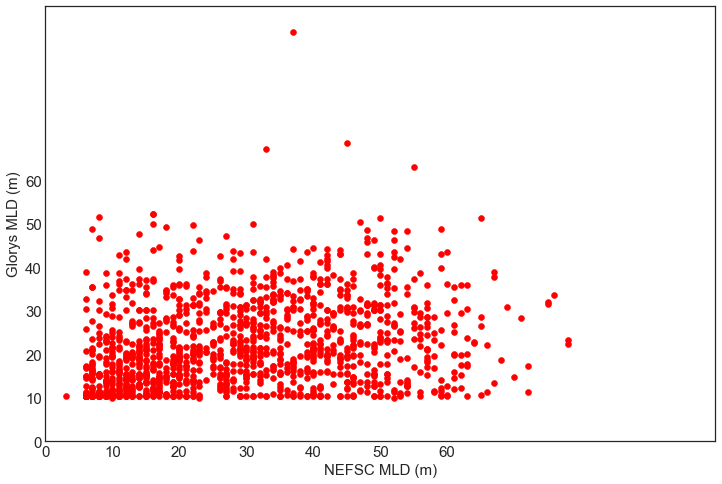

In [1133]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,100)
plt.xlim(0,100)
# plt.scatter(SouthernMABNEFSC_oct, SouthernMABGlorys_oct,color='orange',label='Southern MAB')
# plt.scatter(NorthernMABNEFSC_oct, NorthernMABGlorys_oct,color='green',label='Northern MAB')
plt.scatter(GeorgesBankNEFSC_oct, GeorgesBankGlorys_oct,color='red',label='Georges Bank') # Double check this. 
# plt.scatter(EGoMNEFSC_oct, EGoMGlorys_oct,color='green',label='Eastern GoM')
# plt.scatter(WGoMNEFSC_oct, WGoMGlorys_oct,color='blue',label='Western GoM')
# leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.show()

# November

In [1038]:
GeorgesBankGlorys_nov = [23.194069, 36.317028, 22.888884, 29.602957, 26.24592, 26.398512, 23.499254, 26.85629, 31.739252, 29.602957, 28.839994, 18.158514, 13.73333, 16.63259, 23.346663, 27.161476, 20.294811, 23.041477, 21.362959, 19.68444, 33.722954, 26.551105, 37.385178, 31.434067, 44.862213, 41.352585, 36.164436, 34.333324, 45.014805, 46.388138, 51.42369, 45.167397, 61.189617, 46.388138, 34.63851, 28.53481, 42.573322, 39.36888, 50.81332, 43.0311, 26.551105, 37.842953, 37.385178, 36.774807, 25.788143, 34.791103, 28.839994, 26.551105, 32.95999, 37.69036, 35.859253, 33.26518, 25.482958, 22.583698, 24.109625, 20.294811, 35.096287, 33.87555, 38.453323, 39.826656, 38.75851, 27.314068, 22.278513, 22.736292, 31.891846, 28.839994, 26.703697, 28.839994, 46.08295, 46.08295, 32.8074, 32.8074, 35.554066, 35.554066, 35.554066, 44.862213, 35.554066, 37.232586, 44.862213, 28.6874, 42.115547, 37.232586, 38.453323, 28.6874, 48.524433, 42.115547, 31.281475, 38.453323, 48.524433, 41.19999, 31.281475, 19.531847, 41.19999, 55.085915, 19.531847, 68.36146, 55.085915, 48.37184, 50.81332, 50.050358, 38.30073, 24.109625, 26.551105, 21.51555, 26.551105, 35.096287, 36.9274, 34.180733, 29.297771, 48.21925, 45.31999, 43.64147, 36.9274, 48.829617, 43.48888, 38.30073, 46.845917, 43.64147, 43.946655, 37.69036, 35.248882, 27.619253, 29.450363, 36.011845, 41.65777, 44.404434, 35.096287, 37.842953, 21.668144, 27.161476, 22.583698, 25.482958, 26.703697, 35.859253, 39.36888, 42.725918, 25.025179, 27.924438, 34.180733, 38.30073, 31.128881, 35.554066, 39.521473, 30.518513, 53.71258, 39.97925, 46.99851, 52.797024, 36.46962, 26.703697, 26.703697, 34.791103, 37.232586, 38.14814, 39.36888, 42.87851, 42.573322, 23.651846, 50.050358, 43.64147, 45.167397, 41.81036, 34.791103, 32.19703, 28.992586, 35.401474, 35.401474, 42.573322, 69.88739, 61.34221, 48.829617, 56.15406, 67.140724, 60.27406, 58.595543, 56.306652, 76.44887, 75.99109, 78.58516, 50.355545, 59.358505, 32.95999, 27.466661, 29.450363, 27.314068, 33.41777, 31.739252, 30.213327, 50.355545, 41.19999, 35.096287, 41.047398, 37.842953, 33.26518, 27.161476, 45.777767, 16.022219, 23.041477, 36.46962, 22.583698, 14.95407, 11.444442, 44.404434, 52.797024, 34.333324, 46.388138, 45.777767, 40.437027, 30.36592, 37.53777, 41.19999, 44.251842, 44.251842, 33.570362, 22.431107, 19.07407, 23.80444, 43.336285, 42.87851, 28.229624, 39.674065, 22.888884, 39.521473, 29.602957, 43.794064, 40.58962, 51.2711, 37.53777, 55.69628, 32.34962, 29.755548, 37.53777, 50.050358, 54.628136, 51.88147, 51.118507, 68.20887, 60.121468, 45.93036, 49.592583, 60.42665, 74.31257, 58.137764, 48.37184, 50.20295, 52.186653, 54.475544, 55.69628, 45.777767, 55.238506, 41.352585, 47.1511, 23.041477, 51.88147, 51.88147, 27.619253, 35.248882, 27.771845, 39.521473, 30.213327, 30.213327, 28.382215, 27.924438, 30.97629, 50.050358, 53.254803, 26.703697, 14.648885, 30.060734, 18.005922, 23.651846, 15.564441, 16.022219, 39.216286, 39.216286, 37.53777, 11.291849, 15.411848, 11.291849, 11.597034, 12.817775, 12.817775, 11.749626, 10.528886, 10.528886, 10.528886, 11.597034, 11.597034, 36.622215, 39.674065, 26.24592, 26.24592, 36.011845, 28.839994, 42.87851, 50.20295, 51.88147, 54.93332, 43.64147, 44.251842, 48.066654, 43.794064, 49.745174, 50.508137, 39.674065, 51.42369, 51.42369, 44.251842, 33.570362, 40.894806, 41.505177, 42.115547, 16.63259, 17.85333, 18.005922, 22.431107, 22.278513, 17.85333, 18.311108, 19.837032, 15.259255, 12.970367, 23.651846, 20.447403, 10.2237015, 12.0548115, 46.54073, 52.186653, 52.186653, 39.063694, 42.725918, 32.95999, 53.407394, 41.81036, 41.81036, 42.115547, 35.706657, 35.706657, 26.703697, 32.8074, 36.011845, 36.011845, 48.524433, 39.521473, 10.528886, 10.834071, 10.834071, 10.834071, 14.95407, 32.8074, 30.823696, 36.46962, 69.277016, 71.10812, 61.34221, 16.174812, 39.521473, 44.251842, 45.31999, 23.80444, 23.80444, 32.8074, 30.823696, 32.8074, 43.64147, 37.385178, 43.946655, 48.21925, 21.668144, 21.51555, 22.888884, 19.68444, 26.703697, 21.362959, 23.80444, 25.330364, 25.330364, 26.85629, 41.65777, 41.65777, 36.9274, 26.398512, 19.68444, 28.839994, 35.401474, 38.14814, 38.14814, 40.131844, 50.508137, 43.794064, 41.19999, 51.88147, 35.096287, 25.63555, 37.07999, 37.69036, 26.703697, 19.226664, 27.466661, 31.128881, 36.164436, 36.011845, 41.505177, 42.42073, 41.81036, 31.58666, 30.36592, 26.85629, 27.161476, 29.450363, 29.602957, 24.567402, 22.125921, 18.616293, 18.616293, 18.921478, 21.820736, 27.161476, 33.112587, 14.038515, 21.668144, 10.834071, 15.106663, 13.73333, 13.73333, 28.07703, 17.090366, 11.444442, 13.428144, 12.512589, 13.122959, 36.622215, 10.528886, 10.528886, 10.528886, 10.528886, 16.022219, 17.395552, 12.970367, 12.970367, 10.986664, 11.902219, 11.1392565, 11.597034, 14.3437, 13.73333, 13.73333, 11.291849, 27.771845, 27.771845, 28.992586, 28.992586, 37.69036, 38.60592, 27.161476, 20.142218, 20.142218, 20.90518, 17.090366, 30.97629, 40.742214, 61.647392, 59.358505, 53.71258, 51.42369, 30.97629, 27.008883, 25.177773, 23.651846, 63.936283, 25.025179, 55.085915, 27.008883, 10.986664, 10.986664, 17.700737, 28.07703, 28.07703, 38.60592, 51.42369, 25.177773, 26.24592, 38.14814, 73.7022, 23.80444, 61.4948, 53.865173, 46.235546, 45.014805, 45.472584, 38.30073, 32.19703, 23.651846, 43.0311, 43.0311, 63.936283, 63.936283, 19.837032, 19.837032, 45.777767, 46.845917, 60.121468, 44.862213, 44.862213, 48.829617, 48.829617, 55.238506, 29.908142, 63.936283, 53.559986, 35.859253, 45.31999, 44.709618, 39.674065, 29.297771, 29.297771, 24.872587, 27.771845, 36.622215, 22.125921, 48.37184, 64.39406, 53.559986, 56.15406, 49.287395, 28.07703, 22.125921, 29.297771, 34.180733, 32.95999, 32.95999, 27.924438, 48.37184, 45.31999, 48.829617, 44.709618, 46.54073, 31.281475, 31.281475, 33.87555, 35.859253, 37.385178, 37.385178, 47.76147, 47.76147, 46.845917, 46.845917, 37.99555, 37.99555, 41.352585, 41.352585, 63.325912, 44.862213, 12.817775, 28.839994, 35.096287, 50.66073, 22.583698, 21.057774, 20.142218, 36.46962, 21.820736, 20.447403, 21.362959, 23.651846, 23.041477, 54.93332, 54.93332, 34.63851, 23.80444, 25.63555, 52.49184, 56.306652, 55.085915, 57.3748, 42.87851, 45.31999, 44.862213, 35.706657, 38.75851, 17.548145, 33.722954, 32.19703, 34.48592, 37.53777, 12.970367, 42.26814, 31.281475, 32.95999, 38.30073, 33.87555, 28.53481, 29.602957, 20.294811, 29.297771, 35.554066, 49.287395, 39.674065, 43.64147, 39.674065, 37.53777, 37.07999, 37.232586, 34.48592, 45.93036, 19.68444, 15.717033, 48.066654, 49.745174, 29.14518, 30.97629, 36.164436, 54.017765, 44.557026, 44.404434, 39.674065, 23.80444, 27.771845, 25.940735, 24.262217, 23.80444, 21.057774, 30.97629, 26.551105, 48.829617, 16.785181, 37.07999, 31.281475, 24.567402, 24.567402, 11.291849, 12.512589, 15.869626, 17.85333, 12.817775, 16.785181, 18.4637, 17.548145, 20.599997, 38.14814, 31.128881, 59.816284, 50.81332, 50.81332, 39.063694, 39.063694, 55.391098, 22.736292, 39.216286, 41.505177, 19.226664, 43.794064, 28.229624, 22.888884, 21.97333, 21.362959, 24.567402, 27.924438, 30.213327, 33.26518, 37.385178, 24.109625, 25.940735, 32.044437, 32.044437, 27.314068, 29.602957, 32.95999, 32.044437, 26.703697, 21.668144, 39.674065, 34.48592, 30.97629, 31.739252, 33.26518, 33.722954, 30.060734, 48.677025, 35.859253, 47.76147, 55.238506, 37.842953, 37.385178, 33.87555, 42.115547, 30.213327, 28.992586, 24.262217, 22.888884, 20.142218, 20.142218, 38.453323, 13.122959, 21.362959, 20.90518, 21.668144, 24.41481, 21.057774, 28.07703, 26.703697, 23.194069, 16.022219, 12.207404, 27.771845, 19.226664, 36.774807, 48.21925, 38.60592, 30.97629, 24.567402, 37.69036, 50.050358, 43.946655, 48.066654, 43.0311, 40.284435, 36.9274, 41.352585, 28.992586]
GeorgesBankNEFSC_nov = [34.0, 39.0, 40.0, 51.0, 52.0, 57.0, 17.0, 50.0, 23.0, 51.0, 55.0, 12.0, 33.0, 19.0, 13.0, 34.0, 32.0, 39.0, 35.0, 33.0, 34.0, 51.0, 26.0, 40.0, 42.0, 37.0, 46.0, 58.0, 55.0, 30.0, 57.0, 46.0, 56.0, 61.0, 65.0, 70.0, 19.0, 26.0, 12.0, 23.0, 68.0, 35.0, 24.0, 12.0, 27.0, 20.0, 35.0, 33.0, 49.0, 39.0, 35.0, 29.0, 19.0, 17.0, 11.0, 25.0, 45.0, 36.0, 43.0, 42.0, 41.0, 49.0, 23.0, 23.0, 52.0, 45.0, 20.0, 14.0, 51.0, 44.0, 34.0, 24.0, 57.0, 61.0, 58.0, 45.0, 54.0, 18.0, 47.0, 15.0, 76.0, 27.0, 22.0, 124.0, 42.0, 73.0, 40.0, 18.0, 41.0, 87.0, 38.0, 80.0, 84.0, 66.0, 77.0, 61.0, 61.0, 13.0, 10.0, 34.0, 63.0, 16.0, 11.0, 71.0, 68.0, 51.0, 68.0, 60.0, 65.0, 48.0, 50.0, 35.0, 28.0, 63.0, 51.0, 36.0, 43.0, 40.0, 60.0, 21.0, 55.0, 63.0, 28.0, 65.0, 59.0, 44.0, 51.0, 57.0, 22.0, 20.0, 150.0, 21.0, 35.0, 39.0, 33.0, 37.0, 21.0, 19.0, 23.0, 43.0, 101.0, 48.0, 11.0, 11.0, 62.0, 20.0, 53.0, 52.0, 35.0, 24.0, 12.0, 38.0, 52.0, 27.0, 42.0, 64.0, 33.0, 28.0, 65.0, 57.0, 43.0, 43.0, 36.0, 33.0, 28.0, 29.0, 32.0, 39.0, 60.0, 29.0, 45.0, 78.0, 65.0, 63.0, 54.0, 31.0, 65.0, 64.0, 80.0, 31.0, 18.0, 45.0, 17.0, 19.0, 56.0, 17.0, 10.0, 35.0, 43.0, 40.0, 45.0, 33.0, 45.0, 50.0, 67.0, 57.0, 14.0, 62.0, 46.0, 23.0, 8.0, 28.0, 14.0, 17.0, 61.0, 16.0, 50.0, 34.0, 31.0, 49.0, 52.0, 15.0, 16.0, 15.0, 25.0, 28.0, 56.0, 39.0, 46.0, 27.0, 52.0, 75.0, 39.0, 63.0, 34.0, 61.0, 53.0, 35.0, 53.0, 32.0, 32.0, 29.0, 53.0, 40.0, 50.0, 48.0, 30.0, 71.0, 23.0, 17.0, 72.0, 75.0, 26.0, 58.0, 105.0, 37.0, 59.0, 75.0, 41.0, 39.0, 46.0, 41.0, 67.0, 15.0, 14.0, 59.0, 37.0, 59.0, 45.0, 37.0, 35.0, 26.0, 25.0, 25.0, 49.0, 52.0, 59.0, 13.0, 28.0, 37.0, 29.0, 31.0, 27.0, 15.0, 23.0, 36.0, 19.0, 63.0, 22.0, 21.0, 31.0, 15.0, 10.0, 18.0, 29.0, 51.0, 29.0, 43.0, 28.0, 36.0, 29.0, 40.0, 53.0, 45.0, 56.0, 44.0, 50.0, 55.0, 66.0, 59.0, 82.0, 41.0, 39.0, 73.0, 46.0, 33.0, 53.0, 39.0, 33.0, 39.0, 45.0, 43.0, 61.0, 24.0, 24.0, 36.0, 24.0, 17.0, 52.0, 66.0, 76.0, 14.0, 56.0, 67.0, 51.0, 70.0, 45.0, 30.0, 59.0, 33.0, 55.0, 58.0, 62.0, 38.0, 35.0, 46.0, 33.0, 38.0, 27.0, 30.0, 25.0, 33.0, 45.0, 47.0, 32.0, 27.0, 41.0, 41.0, 39.0, 19.0, 16.0, 85.0, 61.0, 58.0, 57.0, 76.0, 65.0, 44.0, 47.0, 64.0, 31.0, 40.0, 63.0, 36.0, 22.0, 29.0, 34.0, 42.0, 77.0, 28.0, 68.0, 35.0, 9.0, 30.0, 24.0, 23.0, 19.0, 25.0, 33.0, 70.0, 7.0, 21.0, 61.0, 13.0, 32.0, 25.0, 24.0, 56.0, 53.0, 50.0, 51.0, 63.0, 19.0, 35.0, 19.0, 31.0, 32.0, 46.0, 40.0, 13.0, 25.0, 25.0, 43.0, 22.0, 11.0, 31.0, 19.0, 19.0, 23.0, 22.0, 20.0, 26.0, 22.0, 21.0, 16.0, 74.0, 33.0, 20.0, 30.0, 15.0, 25.0, 60.0, 24.0, 30.0, 49.0, 17.0, 24.0, 39.0, 42.0, 34.0, 38.0, 13.0, 11.0, 11.0, 27.0, 6.0, 52.0, 46.0, 7.0, 60.0, 6.0, 6.0, 16.0, 112.0, 6.0, 16.0, 7.0, 9.0, 27.0, 33.0, 25.0, 26.0, 36.0, 12.0, 33.0, 31.0, 16.0, 33.0, 27.0, 17.0, 17.0, 23.0, 58.0, 40.0, 28.0, 34.0, 14.0, 41.0, 14.0, 73.0, 18.0, 32.0, 13.0, 21.0, 6.0, 7.0, 14.0, 13.0, 8.0, 8.0, 57.0, 42.0, 28.0, 39.0, 58.0, 67.0, 57.0, 44.0, 39.0, 40.0, 32.0, 34.0, 15.0, 53.0, 47.0, 69.0, 72.0, 11.0, 15.0, 24.0, 60.0, 27.0, 49.0, 50.0, 47.0, 18.0, 35.0, 27.0, 56.0, 12.0, 94.0, 7.0, 48.0, 49.0, 16.0, 10.0, 29.0, 52.0, 32.0, 30.0, 18.0, 49.0, 10.0, 97.0, 87.0, 32.0, 23.0, 61.0, 53.0, 10.0, 14.0, 76.0, 77.0, 6.0, 28.0, 40.0, 14.0, 66.0, 65.0, 64.0, 63.0, 43.0, 43.0, 46.0, 48.0, 44.0, 44.0, 33.0, 38.0, 33.0, 30.0, 76.0, 46.0, 15.0, 48.0, 39.0, 19.0, 20.0, 25.0, 48.0, 21.0, 29.0, 41.0, 69.0, 15.0, 43.0, 24.0, 26.0, 20.0, 20.0, 20.0, 55.0, 63.0, 65.0, 23.0, 36.0, 50.0, 39.0, 45.0, 12.0, 43.0, 30.0, 63.0, 35.0, 38.0, 19.0, 66.0, 32.0, 48.0, 40.0, 37.0, 46.0, 39.0, 40.0, 26.0, 18.0, 45.0, 9.0, 32.0, 16.0, 24.0, 32.0, 11.0, 34.0, 58.0, 34.0, 48.0, 24.0, 24.0, 31.0, 27.0, 32.0, 48.0, 62.0, 41.0, 27.0, 13.0, 82.0, 29.0, 45.0, 44.0, 36.0, 31.0, 19.0, 64.0, 64.0, 58.0, 63.0, 58.0, 50.0, 28.0, 10.0, 32.0, 52.0, 29.0, 82.0, 66.0, 44.0, 56.0, 46.0, 29.0, 57.0, 78.0, 77.0, 25.0, 32.0, 62.0, 22.0, 50.0, 64.0, 9.0, 53.0, 85.0, 61.0, 33.0, 57.0, 54.0, 61.0, 51.0, 44.0, 32.0, 49.0, 47.0, 61.0, 60.0, 55.0, 46.0, 28.0, 40.0, 47.0, 10.0, 14.0, 27.0, 62.0, 47.0, 38.0, 37.0, 46.0, 11.0, 33.0, 13.0, 16.0, 82.0, 36.0, 45.0, 47.0, 47.0, 56.0, 13.0, 11.0, 14.0, 11.0, 10.0, 13.0, 19.0, 17.0, 28.0, 26.0, 27.0, 26.0, 6.0, 7.0, 8.0, 16.0, 68.0, 28.0, 28.0, 52.0, 35.0, 26.0, 24.0, 85.0, 45.0, 33.0, 76.0, 48.0, 13.0, 36.0, 27.0, 33.0]

In [1039]:
SouthernMABGlorys_nov = [27.161476, 27.161476, 31.58666, 31.128881, 28.53481, 27.008883, 27.314068, 27.314068, 26.85629, 19.531847, 24.41481, 18.768885, 25.482958, 26.398512, 26.551105, 25.482958, 27.771845, 28.382215, 34.02814, 31.281475, 23.499254, 26.398512, 21.51555, 19.68444, 34.943695, 27.161476, 30.36592, 10.071109, 29.450363, 28.382215, 27.314068, 17.24296, 27.314068, 25.940735, 27.314068, 27.466661, 27.314068, 27.314068, 28.839994, 29.450363, 24.719995, 21.668144, 23.346663, 23.041477, 30.823696, 45.31999, 43.48888, 24.567402, 33.26518, 27.771845, 32.8074, 29.602957, 19.379255, 14.038515, 20.294811, 20.294811, 17.395552, 20.90518, 24.41481, 31.891846, 34.943695, 32.8074, 19.07407, 27.771845, 35.706657, 22.888884, 36.011845, 23.80444, 23.194069, 37.53777, 32.34962, 16.63259, 30.213327, 27.161476, 22.278513, 19.379255, 31.739252, 34.791103, 24.567402, 29.908142, 24.109625, 39.216286, 34.943695, 28.6874, 35.401474, 21.057774, 25.482958, 40.284435, 26.551105, 26.398512, 16.327404, 19.226664, 24.109625, 20.447403, 19.531847, 25.788143, 14.801477, 16.327404, 13.885922, 18.768885, 14.648885, 15.411848, 16.937775, 17.090366, 19.07407, 11.902219, 12.512589, 12.970367, 14.038515, 14.038515, 12.0548115, 18.616293, 13.122959, 13.885922, 41.047398, 12.817775, 25.482958, 25.940735, 25.940735, 16.63259, 25.330364, 20.142218, 30.97629, 31.281475, 37.232586, 37.232586, 23.041477, 51.576283, 10.528886, 10.986664, 10.528886, 10.528886, 10.528886, 14.95407, 17.090366, 13.580737, 12.817775, 23.041477, 23.041477, 42.87851, 22.278513, 13.275552, 10.986664, 10.986664, 10.986664, 16.63259, 10.834071, 11.444442, 11.444442, 10.528886, 11.291849, 10.528886, 10.6814785, 13.885922, 10.834071, 10.834071, 10.6814785, 10.528886, 10.528886, 10.528886, 12.512589, 12.512589, 13.885922, 18.616293, 18.616293, 19.837032, 23.346663, 30.823696, 26.551105, 22.278513, 37.53777, 10.528886, 10.528886, 16.327404, 10.528886, 18.768885, 10.376293, 10.528886, 10.528886, 10.834071, 10.834071, 10.528886, 10.528886, 10.528886, 10.376293, 10.528886, 10.528886, 10.528886, 10.528886, 9.918516, 9.918516, 10.528886, 10.528886, 10.528886, 12.0548115, 10.986664, 14.648885, 14.648885, 10.834071, 10.528886, 10.528886, 12.817775, 13.580737, 10.376293, 11.444442, 12.970367, 10.528886, 13.73333, 13.428144, 14.038515, 40.284435, 42.42073, 48.066654, 47.30369, 41.505177, 37.842953, 25.177773, 25.788143, 18.616293, 14.95407, 14.3437, 14.95407, 12.817775, 15.869626, 15.869626, 26.24592, 27.161476, 27.161476, 25.940735, 20.90518, 20.90518, 20.90518, 29.602957, 17.700737, 27.619253, 35.401474, 27.161476, 31.891846, 29.755548, 21.820736, 21.51555, 26.093328, 12.817775, 12.512589, 11.749626, 12.512589, 9.155553, 10.071109, 9.918516, 9.918516, 11.444442, 11.444442, 10.528886, 10.834071, 17.24296, 19.531847, 19.531847, 19.379255, 26.85629, 18.4637, 12.359997, 25.330364, 22.431107, 26.551105, 26.551105, 31.281475, 21.668144, 23.80444, 23.80444, 29.908142, 25.940735, 31.891846, 31.891846, 14.496293, 18.4637, 18.4637, 12.665182, 11.902219, 24.109625, 11.902219, 19.531847, 13.885922, 10.528886, 16.327404, 16.327404, 10.376293, 26.093328, 12.207404, 17.395552, 13.122959, 10.071109, 10.376293, 15.411848, 15.411848, 19.68444, 17.090366, 17.090366, 18.616293, 19.68444, 17.85333, 19.07407, 20.599997, 20.599997, 10.986664, 12.0548115, 26.093328, 26.093328, 37.53777, 10.528886, 16.937775, 24.262217, 23.651846, 10.986664, 16.785181, 25.025179, 15.717033, 30.213327, 15.717033, 17.548145, 20.447403, 22.736292, 17.548145, 32.95999, 37.53777, 10.528886, 20.447403, 16.937775, 23.041477, 24.109625, 14.801477, 28.53481, 24.262217, 23.651846, 10.986664, 21.362959, 23.346663, 23.346663, 16.785181, 21.668144, 25.025179, 24.41481, 30.213327, 10.6814785, 23.957031, 23.957031, 16.327404, 20.447403, 17.548145, 11.291849, 16.937775, 19.07407, 10.376293, 13.73333, 15.411848, 7.6296277, 16.937775, 14.801477, 27.619253, 19.07407, 25.177773, 10.376293, 19.989626, 26.551105, 15.869626, 18.311108, 17.700737, 22.736292, 23.041477, 20.294811, 18.4637, 22.736292, 23.194069, 22.888884, 26.398512, 22.278513, 33.41777, 25.177773, 12.970367, 13.885922, 13.885922, 12.0548115, 21.210365, 21.210365, 29.14518, 30.518513, 35.096287, 38.75851, 29.450363, 27.619253, 28.382215, 16.174812, 14.191108, 10.528886, 20.294811, 23.041477, 37.385178, 27.619253, 12.0548115, 16.937775, 15.717033, 10.528886, 18.005922, 20.599997, 59.816284, 28.382215, 30.36592, 24.719995, 25.63555, 25.63555, 22.583698, 24.719995, 19.379255, 20.752588, 21.51555, 19.226664, 28.382215, 10.2237015, 18.768885, 18.768885, 12.207404, 13.275552, 14.191108, 10.528886, 10.528886, 10.528886, 10.528886, 37.69036, 18.4637, 10.528886, 33.112587, 13.885922, 29.755548, 26.551105, 39.97925, 38.911102, 35.554066, 28.992586, 20.599997, 15.411848, 16.022219, 10.528886, 11.444442, 10.528886, 14.191108, 13.73333, 14.3437, 15.106663, 16.785181, 23.041477, 20.599997, 22.431107, 16.479998, 32.502216, 35.248882, 37.53777, 30.97629, 25.940735, 23.194069, 36.164436, 25.177773, 29.297771, 28.229624, 12.359997, 19.837032, 26.24592, 44.709618, 45.625175, 28.992586, 28.382215, 28.07703, 18.921478, 26.551105, 23.651846, 20.294811, 23.651846, 31.739252, 24.262217, 49.439987, 24.262217, 26.551105, 26.551105, 21.362959, 31.281475, 31.281475, 30.97629, 30.97629, 31.739252, 31.739252, 31.281475, 37.69036, 29.297771, 36.011845, 28.229624, 22.431107, 16.785181, 13.885922, 16.479998, 15.717033, 15.869626, 31.891846, 20.294811, 35.859253, 21.820736, 16.63259, 27.161476, 14.95407, 15.259255, 30.213327, 55.085915, 47.76147, 27.924438, 25.63555, 35.554066, 33.26518, 24.872587, 21.362959, 26.551105, 31.434067, 34.943695, 34.943695, 23.957031, 26.551105, 37.99555, 30.36592, 24.262217, 22.736292, 11.1392565, 12.359997, 12.970367, 10.6814785, 10.528886, 10.6814785, 16.785181, 15.717033, 15.717033, 11.291849, 14.648885, 12.970367, 14.496293, 14.95407, 15.564441, 12.0548115, 11.291849, 13.428144, 13.885922, 12.359997, 13.275552, 15.869626, 16.937775, 13.428144, 10.528886, 11.597034, 20.90518, 19.379255, 28.229624, 20.752588, 17.090366, 26.551105, 10.6814785, 26.398512, 14.648885, 14.038515, 13.428144, 16.327404, 14.038515, 12.665182, 13.885922, 13.580737, 14.038515, 10.834071, 11.1392565, 12.359997, 17.548145, 19.989626, 13.122959, 12.970367, 10.986664, 13.885922, 10.528886, 14.3437, 11.597034, 18.4637]
SouthernMABNEFSC_nov = [28.0, 29.0, 17.0, 30.0, 22.0, 37.0, 13.0, 14.0, 17.0, 20.0, 9.0, 24.0, 31.0, 31.0, 33.0, 28.0, 24.0, 24.0, 27.0, 23.0, 15.0, 22.0, 15.0, 18.0, 28.0, 37.0, 22.0, 10.0, 27.0, 23.0, 31.0, 10.0, 19.0, 19.0, 31.0, 31.0, 37.0, 38.0, 21.0, 25.0, 21.0, 25.0, 31.0, 28.0, 42.0, 50.0, 34.0, 31.0, 48.0, 37.0, 11.0, 29.0, 18.0, 19.0, 26.0, 22.0, 39.0, 35.0, 30.0, 14.0, 14.0, 15.0, 40.0, 40.0, 29.0, 19.0, 30.0, 27.0, 19.0, 30.0, 25.0, 16.0, 25.0, 22.0, 20.0, 18.0, 30.0, 31.0, 30.0, 35.0, 62.0, 40.0, 64.0, 35.0, 41.0, 57.0, 30.0, 74.0, 42.0, 40.0, 17.0, 23.0, 27.0, 39.0, 32.0, 30.0, 20.0, 17.0, 25.0, 25.0, 15.0, 21.0, 24.0, 17.0, 40.0, 26.0, 40.0, 27.0, 20.0, 21.0, 25.0, 14.0, 19.0, 10.0, 18.0, 12.0, 17.0, 24.0, 22.0, 14.0, 16.0, 8.0, 29.0, 30.0, 35.0, 34.0, 49.0, 41.0, 33.0, 22.0, 27.0, 29.0, 34.0, 23.0, 51.0, 20.0, 43.0, 37.0, 87.0, 44.0, 13.0, 47.0, 12.0, 10.0, 36.0, 27.0, 13.0, 14.0, 14.0, 31.0, 22.0, 28.0, 13.0, 34.0, 15.0, 69.0, 17.0, 7.0, 15.0, 18.0, 10.0, 8.0, 5.0, 14.0, 10.0, 22.0, 17.0, 29.0, 29.0, 26.0, 23.0, 49.0, 11.0, 29.0, 32.0, 33.0, 28.0, 13.0, 13.0, 11.0, 7.0, 7.0, 13.0, 16.0, 17.0, 22.0, 11.0, 14.0, 13.0, 8.0, 10.0, 8.0, 18.0, 19.0, 17.0, 22.0, 16.0, 16.0, 18.0, 31.0, 16.0, 31.0, 10.0, 11.0, 23.0, 18.0, 16.0, 6.0, 24.0, 31.0, 44.0, 36.0, 47.0, 38.0, 50.0, 49.0, 57.0, 16.0, 21.0, 18.0, 13.0, 12.0, 13.0, 33.0, 33.0, 21.0, 44.0, 43.0, 26.0, 32.0, 24.0, 14.0, 15.0, 35.0, 27.0, 26.0, 20.0, 57.0, 61.0, 36.0, 7.0, 22.0, 7.0, 27.0, 11.0, 13.0, 11.0, 10.0, 6.0, 6.0, 12.0, 12.0, 7.0, 11.0, 14.0, 17.0, 17.0, 21.0, 36.0, 24.0, 11.0, 25.0, 23.0, 23.0, 19.0, 40.0, 42.0, 17.0, 31.0, 25.0, 23.0, 28.0, 35.0, 24.0, 24.0, 31.0, 49.0, 63.0, 42.0, 12.0, 51.0, 42.0, 33.0, 35.0, 36.0, 46.0, 10.0, 27.0, 31.0, 21.0, 10.0, 7.0, 17.0, 13.0, 23.0, 32.0, 34.0, 20.0, 6.0, 45.0, 20.0, 28.0, 33.0, 51.0, 49.0, 48.0, 31.0, 28.0, 45.0, 17.0, 26.0, 18.0, 10.0, 22.0, 29.0, 41.0, 26.0, 33.0, 20.0, 33.0, 62.0, 33.0, 111.0, 23.0, 43.0, 33.0, 16.0, 27.0, 20.0, 10.0, 21.0, 20.0, 14.0, 10.0, 29.0, 31.0, 22.0, 24.0, 34.0, 28.0, 29.0, 29.0, 36.0, 25.0, 24.0, 39.0, 34.0, 33.0, 18.0, 25.0, 25.0, 39.0, 8.0, 10.0, 11.0, 22.0, 15.0, 26.0, 20.0, 21.0, 39.0, 38.0, 30.0, 8.0, 24.0, 26.0, 31.0, 27.0, 29.0, 8.0, 33.0, 24.0, 36.0, 23.0, 19.0, 40.0, 41.0, 15.0, 11.0, 7.0, 8.0, 19.0, 11.0, 39.0, 48.0, 32.0, 49.0, 46.0, 27.0, 28.0, 33.0, 13.0, 19.0, 13.0, 17.0, 34.0, 29.0, 11.0, 15.0, 14.0, 6.0, 21.0, 23.0, 40.0, 25.0, 32.0, 83.0, 11.0, 13.0, 9.0, 7.0, 61.0, 39.0, 8.0, 44.0, 12.0, 46.0, 27.0, 16.0, 6.0, 6.0, 10.0, 38.0, 14.0, 11.0, 15.0, 59.0, 46.0, 15.0, 27.0, 44.0, 34.0, 20.0, 10.0, 86.0, 87.0, 10.0, 46.0, 32.0, 6.0, 9.0, 8.0, 6.0, 6.0, 26.0, 6.0, 11.0, 7.0, 10.0, 26.0, 8.0, 18.0, 40.0, 32.0, 14.0, 26.0, 7.0, 6.0, 41.0, 40.0, 18.0, 8.0, 26.0, 18.0, 24.0, 51.0, 41.0, 18.0, 23.0, 26.0, 18.0, 19.0, 22.0, 22.0, 25.0, 48.0, 24.0, 33.0, 22.0, 23.0, 24.0, 17.0, 43.0, 40.0, 43.0, 33.0, 32.0, 35.0, 40.0, 20.0, 15.0, 37.0, 31.0, 61.0, 28.0, 47.0, 50.0, 9.0, 8.0, 25.0, 38.0, 32.0, 21.0, 15.0, 32.0, 45.0, 26.0, 59.0, 69.0, 12.0, 46.0, 57.0, 9.0, 39.0, 21.0, 6.0, 23.0, 7.0, 21.0, 7.0, 13.0, 16.0, 46.0, 46.0, 22.0, 23.0, 29.0, 29.0, 16.0, 18.0, 17.0, 72.0, 60.0, 41.0, 21.0, 21.0, 22.0, 27.0, 40.0, 30.0, 47.0, 27.0, 11.0, 23.0, 23.0, 13.0, 19.0, 18.0, 18.0, 9.0, 9.0, 22.0, 20.0, 19.0, 24.0, 18.0, 12.0, 10.0, 9.0, 10.0, 31.0, 8.0, 20.0, 30.0, 38.0, 31.0, 27.0, 28.0, 36.0, 22.0, 36.0, 41.0, 30.0, 32.0, 30.0, 35.0, 40.0, 30.0, 20.0, 13.0, 19.0, 26.0]

In [1040]:
NorthernMABGlorys_nov = [31.891846, 32.502216, 19.837032, 26.398512, 21.668144, 30.97629, 32.044437, 37.232586, 25.177773, 18.616293, 29.14518, 29.908142, 25.025179, 28.992586, 31.58666, 35.096287, 27.771845, 33.41777, 36.622215, 32.044437, 31.891846, 29.297771, 26.703697, 27.314068, 27.314068, 28.229624, 28.229624, 31.891846, 27.161476, 18.768885, 27.161476, 27.161476, 31.891846, 27.466661, 30.213327, 31.58666, 31.891846, 33.570362, 32.95999, 32.95999, 23.957031, 32.654808, 37.385178, 23.194069, 28.53481, 16.174812, 13.580737, 15.717033, 27.619253, 31.891846, 31.739252, 34.48592, 34.48592, 31.58666, 34.48592, 27.466661, 29.297771, 31.891846, 26.24592, 39.674065, 21.97333, 22.278513, 25.63555, 24.41481, 22.431107, 20.294811, 23.80444, 24.262217, 27.314068, 25.788143, 24.109625, 31.891846, 29.297771, 31.891846, 41.19999, 32.19703, 33.87555, 34.48592, 36.622215, 33.87555, 10.2237015, 15.717033, 14.648885, 15.717033, 14.3437, 14.3437, 20.752588, 16.174812, 23.346663, 34.02814, 17.85333, 19.07407, 18.158514, 13.428144, 14.648885, 21.51555, 19.531847, 12.817775, 16.937775, 19.531847, 25.788143, 22.888884, 27.924438, 23.194069, 49.897766, 37.07999, 37.842953, 22.278513, 32.502216, 30.671104, 30.671104, 22.278513, 48.066654, 64.24146, 43.48888, 39.063694, 49.287395, 36.46962, 43.794064, 31.281475, 31.281475, 35.859253, 35.554066, 55.085915, 54.780727, 10.6814785, 10.834071, 12.665182, 12.512589, 10.376293, 10.376293, 10.986664, 10.528886, 10.834071, 10.528886, 10.834071, 11.1392565, 11.1392565, 11.597034, 13.275552, 14.3437, 15.717033, 16.327404, 18.158514, 18.158514, 28.53481, 10.528886, 10.528886, 12.512589, 10.834071, 28.839994, 36.317028, 17.700737, 20.90518, 20.90518, 29.755548, 40.437027, 20.294811, 17.548145, 26.398512, 40.284435, 35.401474, 38.75851, 38.75851, 44.09925, 29.450363, 26.703697, 32.19703, 11.1392565, 19.837032, 12.665182, 12.665182, 11.291849, 11.291849, 10.834071, 11.291849, 16.174812, 17.090366, 17.090366, 19.837032, 17.85333, 14.801477, 18.4637, 18.768885, 23.80444, 33.722954, 31.891846, 31.891846, 31.434067, 31.128881, 23.041477, 32.19703, 20.447403, 20.447403, 32.654808, 27.771845, 43.48888, 11.444442, 15.411848, 15.411848, 28.382215, 20.90518, 18.311108, 25.025179, 25.025179, 10.528886, 35.248882, 19.68444, 30.823696, 33.722954, 14.95407, 30.823696, 33.112587, 20.90518, 17.395552, 14.3437, 12.970367, 27.008883, 25.940735, 27.314068, 37.385178, 33.570362, 27.771845, 31.739252, 31.739252, 31.891846, 31.891846, 31.434067, 27.008883, 32.502216, 33.26518, 23.346663, 36.774807, 68.66665, 25.330364, 17.395552, 18.158514, 19.379255, 30.671104, 30.671104, 11.291849, 11.291849, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 28.839994, 28.839994, 22.736292, 18.921478, 18.921478, 25.330364, 25.177773, 39.063694, 18.005922, 22.736292, 61.4948, 34.48592, 43.794064, 46.845917, 48.21925, 39.063694, 25.482958, 16.022219, 11.291849, 19.989626, 16.937775, 10.376293, 10.376293, 15.869626, 16.785181, 16.785181, 16.022219, 12.359997, 11.291849, 10.834071, 35.859253, 11.1392565, 13.73333, 22.278513, 21.362959, 23.194069, 34.333324, 32.95999, 38.453323, 33.722954, 26.703697, 28.839994, 48.524433, 44.09925, 59.205914, 18.616293, 23.499254, 31.739252, 28.382215, 33.87555, 27.314068, 30.36592, 19.226664, 31.739252, 19.837032, 30.823696, 29.297771, 25.788143, 27.008883, 27.619253, 19.226664, 19.837032, 10.528886, 10.528886, 10.528886, 13.580737, 12.970367, 13.580737, 27.619253, 27.619253, 31.58666, 26.85629, 15.564441, 31.434067, 49.134804, 18.616293, 20.142218, 13.428144, 19.531847, 26.551105, 14.3437, 16.937775, 27.771845, 14.648885, 11.597034, 14.801477, 10.528886, 29.755548, 38.453323, 25.025179, 37.842953, 31.128881, 26.398512, 22.583698, 37.385178, 34.333324, 19.07407, 12.359997, 20.90518, 44.862213, 50.965916, 10.376293, 13.885922, 13.580737, 26.093328, 16.63259, 16.022219, 17.24296, 33.570362, 52.949615, 37.07999, 21.668144, 18.005922, 47.30369, 47.30369, 17.85333, 25.63555, 26.24592, 10.376293, 10.376293, 10.6814785, 14.496293, 10.528886, 10.376293, 10.376293, 16.022219, 21.210365, 17.548145, 45.31999, 46.388138, 38.60592, 15.564441, 11.291849, 13.428144, 24.719995, 20.447403, 20.447403, 23.194069, 25.177773, 18.158514, 12.359997, 18.005922, 15.411848, 20.599997, 18.4637, 15.106663, 24.262217, 22.736292, 23.651846, 21.362959, 16.785181, 19.837032, 15.411848, 17.24296, 24.567402, 21.820736, 27.008883, 27.008883, 31.891846, 26.24592, 27.466661]
NorthernMABNEFSC_nov = [48.0, 35.0, 21.0, 21.0, 19.0, 31.0, 45.0, 52.0, 44.0, 68.0, 23.0, 31.0, 19.0, 17.0, 24.0, 29.0, 29.0, 33.0, 35.0, 47.0, 38.0, 36.0, 26.0, 35.0, 34.0, 26.0, 41.0, 49.0, 34.0, 33.0, 41.0, 39.0, 41.0, 39.0, 69.0, 48.0, 40.0, 39.0, 39.0, 55.0, 30.0, 41.0, 45.0, 30.0, 49.0, 13.0, 8.0, 23.0, 40.0, 26.0, 18.0, 39.0, 25.0, 35.0, 9.0, 30.0, 95.0, 47.0, 28.0, 33.0, 26.0, 36.0, 44.0, 40.0, 44.0, 45.0, 29.0, 53.0, 53.0, 70.0, 16.0, 57.0, 15.0, 29.0, 38.0, 41.0, 41.0, 33.0, 45.0, 26.0, 8.0, 28.0, 36.0, 9.0, 33.0, 32.0, 26.0, 18.0, 20.0, 14.0, 6.0, 34.0, 42.0, 28.0, 35.0, 33.0, 24.0, 7.0, 43.0, 19.0, 9.0, 20.0, 29.0, 44.0, 66.0, 45.0, 45.0, 35.0, 24.0, 35.0, 35.0, 59.0, 67.0, 71.0, 61.0, 25.0, 37.0, 31.0, 44.0, 32.0, 32.0, 57.0, 45.0, 72.0, 61.0, 30.0, 7.0, 19.0, 15.0, 8.0, 19.0, 20.0, 33.0, 32.0, 28.0, 24.0, 30.0, 33.0, 31.0, 34.0, 34.0, 42.0, 38.0, 33.0, 46.0, 33.0, 7.0, 15.0, 35.0, 33.0, 75.0, 21.0, 45.0, 52.0, 17.0, 50.0, 18.0, 37.0, 38.0, 19.0, 32.0, 34.0, 25.0, 39.0, 43.0, 35.0, 44.0, 44.0, 7.0, 17.0, 19.0, 22.0, 52.0, 29.0, 29.0, 25.0, 24.0, 19.0, 16.0, 51.0, 38.0, 24.0, 18.0, 73.0, 46.0, 66.0, 114.0, 27.0, 56.0, 39.0, 10.0, 47.0, 48.0, 36.0, 30.0, 46.0, 56.0, 16.0, 12.0, 9.0, 10.0, 9.0, 23.0, 22.0, 15.0, 11.0, 59.0, 21.0, 34.0, 71.0, 24.0, 27.0, 39.0, 29.0, 21.0, 23.0, 42.0, 32.0, 23.0, 32.0, 39.0, 32.0, 37.0, 17.0, 29.0, 19.0, 51.0, 47.0, 31.0, 63.0, 56.0, 38.0, 111.0, 79.0, 25.0, 25.0, 23.0, 6.0, 24.0, 21.0, 18.0, 19.0, 12.0, 8.0, 61.0, 19.0, 17.0, 34.0, 60.0, 42.0, 43.0, 46.0, 60.0, 56.0, 29.0, 45.0, 27.0, 15.0, 47.0, 77.0, 81.0, 23.0, 85.0, 26.0, 30.0, 22.0, 29.0, 71.0, 36.0, 48.0, 10.0, 9.0, 17.0, 14.0, 13.0, 27.0, 14.0, 57.0, 18.0, 39.0, 29.0, 16.0, 26.0, 13.0, 49.0, 51.0, 56.0, 48.0, 74.0, 26.0, 41.0, 53.0, 26.0, 34.0, 66.0, 24.0, 40.0, 34.0, 27.0, 51.0, 60.0, 21.0, 32.0, 19.0, 7.0, 17.0, 44.0, 47.0, 44.0, 24.0, 16.0, 76.0, 8.0, 17.0, 10.0, 14.0, 12.0, 44.0, 22.0, 30.0, 34.0, 20.0, 9.0, 9.0, 54.0, 37.0, 35.0, 28.0, 38.0, 54.0, 50.0, 15.0, 11.0, 10.0, 6.0, 6.0, 54.0, 58.0, 33.0, 78.0, 82.0, 27.0, 28.0, 39.0, 38.0, 22.0, 33.0, 16.0, 46.0, 59.0, 26.0, 21.0, 53.0, 19.0, 24.0, 29.0, 12.0, 24.0, 12.0, 30.0, 32.0, 54.0, 16.0, 12.0, 37.0, 22.0, 24.0, 28.0, 28.0, 32.0, 48.0, 44.0, 36.0, 35.0, 24.0, 47.0, 7.0, 41.0, 42.0, 47.0, 17.0, 37.0, 10.0, 17.0, 44.0, 45.0, 36.0, 48.0, 35.0, 31.0, 29.0, 25.0, 33.0, 29.0, 21.0, 36.0, 43.0, 40.0, 45.0, 44.0, 41.0, 31.0, 15.0, 33.0, 41.0, 58.0, 60.0, 32.0, 37.0, 38.0]

In [1041]:
WGoMGlorys_nov = [36.9274, 19.837032, 31.739252, 26.398512, 31.434067, 36.164436, 29.297771, 27.924438, 13.885922, 23.041477, 19.989626, 23.346663, 24.872587, 20.90518, 20.294811, 19.07407, 16.022219, 17.24296, 19.531847, 22.431107, 19.531847, 41.047398, 39.36888, 39.36888, 45.167397, 45.167397, 40.284435, 39.826656, 44.862213, 44.862213, 32.19703, 31.891846, 35.096287, 26.85629, 29.14518, 26.85629, 29.755548, 33.41777, 25.63555, 23.651846, 26.24592, 23.346663, 22.736292, 24.41481, 25.788143, 25.788143, 29.450363, 25.025179, 26.24592, 31.58666, 29.908142, 25.330364, 31.58666, 30.060734, 32.34962, 31.891846, 23.194069, 21.51555, 25.482958, 25.482958, 26.093328, 33.112587, 50.20295, 49.745174, 41.352585, 36.622215, 36.9274, 35.401474, 31.739252, 33.41777, 31.739252, 31.434067, 32.044437, 35.248882, 26.703697, 23.346663, 31.58666, 37.385178, 31.434067, 28.6874, 30.213327, 21.362959, 32.19703, 35.401474, 37.232586, 36.622215, 35.554066, 37.232586, 42.573322, 37.53777, 37.385178, 35.096287, 47.60888, 32.95999, 36.46962, 35.554066, 42.26814, 37.385178, 37.232586, 35.859253, 37.232586, 42.26814, 37.232586, 28.229624, 25.63555, 25.788143, 24.872587, 24.719995, 43.336285, 18.158514, 32.95999, 42.42073, 42.87851, 40.894806, 43.794064, 28.839994, 37.232586, 44.404434, 43.794064, 36.774807, 14.3437, 14.3437, 18.4637, 22.888884, 23.346663, 24.109625, 24.567402, 16.785181, 26.551105, 25.788143, 20.447403, 20.142218, 24.567402, 28.992586, 28.992586, 31.891846, 31.281475, 28.53481, 29.908142, 22.278513, 33.112587, 30.97629, 34.63851, 36.011845, 30.36592, 28.229624, 28.992586, 29.602957, 28.53481, 31.891846, 33.570362, 18.005922, 23.957031, 30.823696, 31.434067, 31.891846, 35.248882, 35.554066, 23.041477, 30.671104, 31.434067, 27.314068, 35.859253, 35.706657, 43.64147, 36.46962, 39.826656, 43.183693, 36.164436, 40.742214, 37.53777, 37.232586, 30.518513, 28.839994, 30.671104, 30.060734, 35.096287, 43.64147, 43.64147, 39.216286, 40.894806, 48.829617, 45.167397, 46.388138, 19.226664, 34.63851, 27.924438, 24.41481, 20.447403, 11.902219, 29.450363, 18.005922, 44.09925, 39.521473, 25.025179, 41.047398, 37.232586, 36.46962, 19.837032, 34.943695, 47.914062, 43.64147, 47.914062, 43.64147, 43.336285, 43.0311, 43.0311, 42.725918, 40.437027, 40.437027, 43.64147, 45.31999, 34.333324, 36.317028, 43.794064, 43.64147, 43.183693, 30.671104, 43.0311, 43.64147, 42.26814, 44.404434, 51.42369, 30.213327, 33.87555, 33.87555, 38.30073, 32.19703, 32.19703, 34.02814, 34.02814, 34.02814, 33.26518, 43.183693, 22.125921, 52.33925, 46.99851, 11.291849, 12.207404, 12.0548115, 10.528886, 10.528886, 10.834071, 30.671104, 21.057774, 33.112587, 24.109625, 24.109625, 23.80444, 23.80444, 23.80444, 23.80444, 37.232586, 37.232586, 55.238506, 51.88147, 43.183693, 38.60592, 38.60592, 39.521473, 43.48888, 43.48888, 43.946655, 43.946655, 47.1511, 47.1511, 37.232586, 47.76147, 47.60888, 45.014805, 51.42369, 51.42369, 51.42369, 51.42369, 18.616293, 23.346663, 20.599997, 18.311108, 22.583698, 24.872587, 22.583698, 14.496293, 11.597034, 20.90518, 20.599997, 25.177773, 32.34962, 35.096287, 23.80444, 23.651846, 25.63555, 28.6874, 28.229624, 18.4637, 19.226664, 19.837032, 18.4637, 19.07407, 20.294811, 31.58666, 31.58666, 21.057774, 17.85333, 27.771845, 11.902219, 11.902219, 14.648885, 14.648885, 17.700737, 17.700737, 16.63259, 16.63259, 12.207404, 21.210365, 21.210365, 10.834071, 13.122959, 15.869626, 14.038515, 10.6814785, 10.6814785, 13.275552, 21.210365, 23.194069, 20.294811, 10.528886, 14.801477, 12.665182, 24.109625, 17.85333, 16.174812, 10.528886, 10.528886, 22.278513, 22.125921, 22.583698, 17.090366, 12.970367, 20.294811, 22.125921, 20.447403, 21.51555, 19.68444, 16.63259, 20.90518, 20.142218, 17.85333, 19.379255, 20.752588, 29.755548, 27.466661, 28.839994, 27.161476, 29.450363, 30.823696, 31.434067, 35.096287, 38.30073, 37.385178, 38.30073, 36.011845, 31.58666, 30.823696, 29.450363, 29.14518, 28.53481, 28.382215, 28.6874, 29.297771, 29.908142, 30.213327, 28.07703, 27.619253, 27.924438, 27.924438, 28.6874, 31.434067, 31.128881, 31.891846, 31.739252, 36.622215, 40.742214, 40.437027, 43.64147, 33.41777, 27.466661, 30.36592, 30.671104, 31.128881, 31.128881, 34.791103, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.648885, 15.869626, 15.411848, 15.106663, 24.109625, 22.278513, 30.060734, 31.128881, 31.739252, 33.87555, 36.9274, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 11.597034, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 24.109625, 27.466661, 26.703697, 18.4637, 18.4637, 23.80444, 23.80444, 45.31999, 37.99555, 29.14518, 41.81036, 47.456284, 40.131844, 40.58962, 28.229624, 37.53777, 33.87555, 29.755548, 11.1392565, 10.071109, 10.2237015, 38.453323, 13.122959, 11.597034, 11.597034, 14.038515, 35.401474, 36.317028, 38.453323, 39.826656, 30.213327, 43.336285, 39.36888, 40.894806, 39.216286, 42.42073, 51.576283, 50.355545, 50.66073, 53.865173, 45.472584, 45.472584, 50.355545, 12.817775, 18.005922, 11.749626, 27.924438, 19.989626, 38.14814, 28.839994, 41.047398, 51.88147, 31.128881, 41.65777, 22.278513, 22.278513, 12.665182, 32.8074, 32.34962, 25.482958, 36.9274, 36.9274, 31.58666, 30.060734, 30.060734, 32.044437, 32.34962, 25.482958, 30.823696, 31.58666, 43.0311, 43.794064, 37.53777, 34.791103, 36.317028, 37.07999, 32.044437, 33.41777, 34.02814, 34.02814, 32.19703, 28.839994, 39.216286, nan, 44.251842, 44.251842, 37.232586, 37.232586, 38.30073, 36.9274, 43.64147, 46.99851, 17.85333, 32.19703, 20.90518, 20.752588, 30.060734, 18.005922, 57.83258, 57.83258, 58.44295, 57.679985, 51.42369, 49.287395, 60.579247, 51.2711, 42.42073, 43.64147, 47.456284, 63.783688, 59.511097, 53.559986, 51.88147, 48.982212, 51.118507, 45.625175, 51.2711, 51.42369, 60.579247, 50.965916, 51.42369, 51.2711, 54.170357, 50.508137, 82.70516, 95.98071, 70.80294, 59.205914, 44.404434, 50.20295, 49.134804, 42.42073, 42.573322, 47.456284, 32.95999, 30.518513, 39.521473, 37.232586, 34.333324, 25.482958, 19.226664, 10.834071, 13.428144, 13.885922, 14.496293, 15.259255, 12.817775, 12.0548115, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.291849, 10.528886, 11.749626, 30.518513, 25.482958, 20.90518, 24.719995, 23.499254, 31.58666, 30.213327, 29.908142, 29.14518, 30.213327, 26.398512, 20.752588, 24.109625, 10.528886, 10.528886, 31.739252, 10.6814785, 10.528886, 10.6814785, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 17.395552, 27.008883, 23.80444, 26.703697, 28.382215, 28.382215, 32.34962, 38.453323, 21.51555, 23.957031, 30.060734, 28.6874, 32.502216, 29.908142, 31.128881, 27.466661, 27.008883, 27.008883, 27.771845, 24.872587, 34.63851, 27.924438, 36.011845, 39.216286, 49.897766, 49.897766, 47.76147, 29.14518, 27.314068, 31.891846, 27.161476, 27.924438, 34.48592, 28.229624, 29.908142, 28.839994, 35.401474, 34.333324, 24.567402, 17.700737, 18.158514, 32.502216, 21.51555, 29.14518, 31.739252, 25.330364, 32.502216, 26.398512, 60.121468, 26.398512, 28.229624, 14.801477, 31.281475, 29.450363, 29.450363, 27.619253, 35.401474, 37.232586, 12.0548115, 23.80444, 26.24592, 18.005922, 18.005922, 19.07407, 15.259255, 18.768885, 27.161476, 38.911102, 33.26518, 29.297771, 37.69036, 34.48592, 32.19703, 32.19703, 37.232586, 37.232586, 38.30073, 43.64147, 38.75851, 37.232586, 39.36888, 39.36888, 37.232586, 37.232586, 41.96295, 40.742214, 36.774807, 41.19999, 42.42073, 41.047398, 40.284435, 41.047398, 37.232586, 34.180733, 43.48888, 43.64147, 18.158514, 18.158514, 32.95999, 35.554066, 43.183693, 28.6874, 34.333324, 33.570362, 43.64147, 43.48888, 37.232586, 43.946655, 57.679985, 56.15406, 48.677025, 25.788143, 37.07999, 39.674065, 43.64147, 43.48888, 43.64147, 53.10221, 53.559986, 51.118507, 30.060734, 29.602957, 22.125921, 26.398512, 29.450363, 29.450363, 29.450363, 16.785181, 13.275552, 10.834071, 10.986664, 11.291849, 10.986664, 15.869626, 11.749626, 14.191108, 11.902219, 11.444442, 28.992586, 21.057774, 27.008883, 26.551105, 28.07703, 24.872587, 28.839994, 29.755548, 34.02814, 28.992586, 29.602957, 31.128881, 27.924438, 27.008883, 29.755548, 31.58666, 26.551105, 31.128881, 31.434067, 31.434067, 18.616293, 18.616293, 26.093328, 23.194069, 24.872587, 22.736292, 22.125921, 25.940735, 13.885922, 11.597034, 15.411848, 23.346663, 18.616293, 16.327404, 33.722954, 34.943695, 36.164436, 37.232586, 36.622215, 37.232586, 39.36888, 37.232586, 37.385178, 25.025179, 29.450363, 28.6874, 24.872587, 25.330364, 27.924438, 27.619253, 16.785181, 18.311108, 16.785181, 19.68444, 28.53481, 28.53481, 20.447403, 24.567402, 21.51555, 21.51555, 19.379255, 22.431107, 23.041477, 22.583698, 24.719995, 28.992586, 37.07999, 37.69036, 18.4637, 35.706657, 29.602957, 44.862213, 45.167397, 36.164436, 39.521473, 43.794064, 48.829617, 22.583698, 25.177773, 23.194069, 23.194069, 21.97333, 23.346663, 25.63555, 40.742214, 37.07999, 40.58962, 40.58962, 43.64147, 43.64147, 50.508137, 44.404434, 33.570362, 36.011845, 39.063694, 43.336285, 42.573322, 42.573322, 42.42073, 44.251842, 41.352585, 42.573322, 36.9274, 46.235546, 25.330364, 23.194069, 21.210365, 50.66073, 52.33925, 28.839994, 12.665182, 17.548145, 30.97629, 32.8074, 41.352585, 26.703697]
WGoMNEFSC_nov = [26.0, 34.0, 51.0, 31.0, 39.0, 31.0, 25.0, 43.0, 33.0, 53.0, 48.0, 37.0, 41.0, 21.0, 28.0, 34.0, 10.0, 33.0, 26.0, 64.0, 53.0, 46.0, 56.0, 52.0, 35.0, 50.0, 81.0, 67.0, 47.0, 46.0, 38.0, 31.0, 38.0, 33.0, 43.0, 37.0, 55.0, 16.0, 43.0, 35.0, 24.0, 39.0, 66.0, 44.0, 33.0, 30.0, 27.0, 59.0, 40.0, 33.0, 37.0, 32.0, 48.0, 40.0, 23.0, 65.0, 26.0, 32.0, 60.0, 47.0, 61.0, 39.0, 50.0, 44.0, 70.0, 38.0, 48.0, 44.0, 36.0, 23.0, 40.0, 41.0, 19.0, 29.0, 29.0, 32.0, 26.0, 9.0, 32.0, 23.0, 15.0, 21.0, 21.0, 67.0, 76.0, 97.0, 30.0, 51.0, 44.0, 25.0, 68.0, 20.0, 47.0, 33.0, 28.0, 37.0, 27.0, 25.0, 42.0, 48.0, 37.0, 34.0, 47.0, 21.0, 54.0, 44.0, 37.0, 31.0, 23.0, 33.0, 80.0, 53.0, 51.0, 42.0, 92.0, 54.0, 80.0, 71.0, 34.0, 12.0, 16.0, 15.0, 12.0, 45.0, 35.0, 21.0, 20.0, 25.0, 40.0, 21.0, 46.0, 39.0, 48.0, 37.0, 44.0, 34.0, 36.0, 37.0, 42.0, 22.0, 28.0, 41.0, 38.0, 54.0, 50.0, 52.0, 46.0, 45.0, 31.0, 18.0, 44.0, 13.0, 45.0, 48.0, 50.0, 34.0, 25.0, 41.0, 80.0, 129.0, 99.0, 91.0, 74.0, 78.0, 71.0, 43.0, 31.0, 58.0, 25.0, 38.0, 59.0, 68.0, 42.0, 58.0, 60.0, 37.0, 21.0, 35.0, 48.0, 74.0, 71.0, 56.0, 49.0, 36.0, 41.0, 34.0, 22.0, 22.0, 51.0, 12.0, 18.0, 46.0, 28.0, 14.0, 59.0, 36.0, 47.0, 51.0, 29.0, 22.0, 50.0, 38.0, 120.0, 45.0, 70.0, 47.0, 50.0, 85.0, 27.0, 29.0, 56.0, 47.0, 76.0, 79.0, 64.0, 75.0, 64.0, 46.0, 52.0, 65.0, 45.0, 42.0, 53.0, 11.0, 55.0, 50.0, 29.0, 53.0, 51.0, 12.0, 10.0, 37.0, 25.0, 32.0, 44.0, 15.0, 52.0, 122.0, 100.0, 110.0, 91.0, 79.0, 45.0, 51.0, 57.0, 12.0, 39.0, 55.0, 10.0, 12.0, 24.0, 26.0, 54.0, 49.0, 64.0, 61.0, 84.0, 38.0, 58.0, 45.0, 29.0, 29.0, 60.0, 57.0, 49.0, 51.0, 77.0, 76.0, 55.0, 87.0, 80.0, 49.0, 74.0, 70.0, 28.0, 66.0, 32.0, 6.0, 42.0, 12.0, 15.0, 84.0, 55.0, 39.0, 35.0, 42.0, 41.0, 36.0, 33.0, 35.0, 69.0, 12.0, 26.0, 31.0, 58.0, 39.0, 28.0, 65.0, 61.0, 39.0, 30.0, 35.0, 38.0, 31.0, 35.0, 35.0, 27.0, 23.0, 35.0, 34.0, 31.0, 38.0, 38.0, 20.0, 25.0, 30.0, 42.0, 27.0, 35.0, 41.0, 38.0, 20.0, 55.0, 69.0, 63.0, 68.0, 51.0, 63.0, 57.0, 51.0, 20.0, 33.0, 8.0, 26.0, 27.0, 27.0, 17.0, 21.0, 26.0, 21.0, 24.0, 20.0, 19.0, 19.0, 6.0, 25.0, 27.0, 14.0, 22.0, 39.0, 32.0, 23.0, 23.0, 44.0, 43.0, 23.0, 32.0, 50.0, 21.0, 32.0, 31.0, 33.0, 37.0, 51.0, 44.0, 48.0, 47.0, 39.0, 39.0, 10.0, 31.0, 37.0, 28.0, 33.0, 37.0, 32.0, 37.0, 47.0, 40.0, 50.0, 54.0, 100.0, 69.0, 53.0, 35.0, 46.0, 26.0, 13.0, 18.0, 20.0, 50.0, 37.0, 9.0, 9.0, 9.0, 45.0, 15.0, 17.0, 18.0, 12.0, 13.0, 6.0, 12.0, 15.0, 26.0, 27.0, 29.0, 46.0, 43.0, 48.0, 49.0, 33.0, 37.0, 31.0, 46.0, 33.0, 30.0, 49.0, 16.0, 10.0, 35.0, 57.0, 41.0, 69.0, 22.0, 30.0, 7.0, 17.0, 16.0, 45.0, 123.0, 16.0, 57.0, 5.0, 36.0, 15.0, 20.0, 29.0, 78.0, 26.0, 14.0, 44.0, 16.0, 25.0, 16.0, 23.0, 26.0, 25.0, 28.0, 28.0, 24.0, 31.0, 54.0, 52.0, 25.0, 48.0, 47.0, 27.0, 12.0, 24.0, 18.0, 27.0, 16.0, 22.0, 81.0, 79.0, 20.0, 28.0, 23.0, 43.0, 37.0, 34.0, 24.0, 46.0, 29.0, 34.0, 35.0, 26.0, 74.0, 90.0, 61.0, 54.0, 63.0, 139.0, 123.0, 32.0, 43.0, 103.0, 105.0, 124.0, 106.0, 98.0, 40.0, 80.0, 79.0, 112.0, 67.0, 52.0, 40.0, 39.0, 33.0, 77.0, 27.0, 42.0, 31.0, 39.0, 43.0, 11.0, 39.0, 71.0, 29.0, 75.0, 13.0, 31.0, 43.0, 31.0, 35.0, 47.0, 46.0, 40.0, 29.0, 42.0, 40.0, 35.0, 38.0, 41.0, 27.0, 43.0, 55.0, 37.0, 72.0, 30.0, 128.0, 95.0, 127.0, 16.0, 27.0, 137.0, 101.0, 82.0, 102.0, 107.0, 116.0, 130.0, 57.0, 99.0, 62.0, 18.0, 78.0, 57.0, 59.0, 15.0, 80.0, 72.0, 76.0, 66.0, 66.0, 72.0, 59.0, 105.0, 53.0, 92.0, 69.0, 61.0, 68.0, 70.0, 44.0, 84.0, 114.0, 53.0, 59.0, 67.0, 73.0, 93.0, 53.0, 54.0, 13.0, 41.0, 25.0, 33.0, 34.0, 39.0, 34.0, 44.0, 21.0, 35.0, 27.0, 21.0, 34.0, 10.0, 11.0, 60.0, 45.0, 35.0, 75.0, 82.0, 21.0, 40.0, 85.0, 74.0, 23.0, 43.0, 60.0, 50.0, 53.0, 61.0, 49.0, 60.0, 50.0, 53.0, 40.0, 52.0, 46.0, 45.0, 43.0, 36.0, 29.0, 78.0, 68.0, 28.0, 46.0, 28.0, 29.0, 57.0, 55.0, 77.0, 67.0, 15.0, 47.0, 40.0, 34.0, 52.0, 53.0, 56.0, 47.0, 27.0, 36.0, 28.0, 22.0, 22.0, 25.0, 41.0, 12.0, 44.0, 23.0, 34.0, 44.0, 69.0, 33.0, 24.0, 33.0, 61.0, 44.0, 78.0, 16.0, 87.0, 39.0, 12.0, 19.0, 15.0, 14.0, 22.0, 35.0, 66.0, 43.0, 39.0, 29.0, 13.0, 27.0, 25.0, 28.0, 27.0, 29.0, 49.0, 33.0, 104.0, 31.0, 20.0, 27.0, 60.0, 25.0, 29.0, 32.0, 52.0, 105.0, 20.0, 19.0, 15.0, 31.0, 37.0, 36.0, 34.0, 17.0, 29.0, 52.0, 21.0, 8.0, 69.0, 118.0, 95.0, 68.0, 78.0, 72.0, 62.0, 65.0, 62.0, 44.0, 60.0, 46.0, 57.0, 44.0, 72.0, 72.0, 68.0, 52.0, 58.0, 65.0, 73.0, 59.0, 51.0, 27.0, 41.0, 50.0, 20.0, 19.0, 10.0, 16.0, 81.0, 27.0, 34.0, 68.0, 80.0, 61.0, 54.0, 40.0, 86.0, 74.0, 65.0, 33.0, 85.0, 73.0, 83.0, 34.0, 53.0, 83.0, 77.0, 52.0, 20.0, 33.0, 26.0, 65.0, 38.0, 40.0, 42.0, 61.0, 41.0, 42.0, 90.0, 43.0, 97.0, 58.0, 92.0, 72.0, 31.0, 82.0, 87.0, 43.0, 53.0, 50.0, 45.0, 52.0, 29.0, 53.0, 92.0, 61.0, 66.0, 62.0, 84.0, 103.0, 29.0, 14.0, 73.0, 53.0, 40.0, 21.0, 18.0, 26.0, 29.0, 59.0, 76.0, 41.0, 66.0, 44.0, 44.0, 21.0, 58.0, 57.0, 22.0, 86.0, 79.0, 70.0, 78.0, 55.0, 77.0, 88.0, 76.0, 34.0, 46.0, 12.0, 69.0, 43.0, 13.0, 34.0, 9.0, 14.0, 31.0, 15.0, 30.0, 12.0, 11.0, 9.0, 13.0, 31.0, 11.0, 53.0, 20.0, 26.0, 38.0, 36.0, 12.0, 40.0, 39.0, 46.0, 41.0, 31.0, 44.0, 62.0, 50.0, 27.0, 44.0, 34.0, 29.0, 26.0, 24.0, 22.0, 13.0, 24.0, 27.0, 12.0, 33.0, 73.0, 61.0, 48.0, 66.0, 31.0, 52.0, 31.0, 112.0, 61.0, 49.0, 30.0, 34.0, 38.0, 46.0, 30.0, 8.0, 26.0, 43.0, 40.0, 65.0, 30.0, 63.0, 87.0, 71.0, 70.0, 39.0, 27.0, 40.0, 69.0, 100.0, 9.0]

In [1042]:
EGoMGlorys_nov = [29.450363, 18.4637, 26.24592, 37.07999, 42.115547, 49.897766, 37.385178, 20.599997, 44.09925, 44.09925, 53.865173, 53.865173, 18.616293, 23.346663, 22.888884, 35.401474, 39.36888, 48.37184, 41.505177, 20.142218, 39.063694, 37.385178, 32.19703, 30.823696, 32.654808, 23.499254, 20.447403, 30.671104, 26.85629, 31.58666, 42.115547, 42.573322, 42.42073, 50.66073, 50.81332, 37.232586, 57.679985, 54.170357, 54.170357, 60.42665, 49.745174, 55.69628, 48.982212, 32.34962, 30.823696, 33.112587, 21.97333, 21.97333, 10.528886, 10.528886, 14.3437, 16.479998, 10.528886, 10.6814785, 10.986664, 16.479998, 10.528886, 11.1392565, 48.21925, 43.64147, 43.64147, 37.53777, 43.64147, 40.894806, 40.894806, 50.81332, 43.946655, 43.64147, 43.64147, 43.64147, 41.352585, 50.508137, 24.41481, 25.482958, 11.749626, 39.36888, 42.725918, 40.437027, 44.709618, 39.826656, 39.826656, 14.038515, 43.64147, 43.64147, 43.794064, 31.891846, 34.333324, 28.839994, 28.839994, 59.66369, 59.66369, 51.2711, 43.64147, 43.64147, 36.011845, 33.570362, 38.911102, 38.453323, 38.453323, 32.502216, 32.502216, 33.112587, 33.112587, 23.499254, 22.125921, 13.885922, 36.164436, 37.07999, 37.07999, 28.839994, 28.839994, 33.26518, 33.41777, 31.891846, 28.6874, 28.6874, 28.382215, 17.548145, 18.616293, 50.20295, 11.1392565, 12.359997, 41.96295, 23.346663, 11.749626, 13.275552, 30.213327, 18.311108, 18.4637, 10.376293, 46.69332, 49.439987, 49.439987, 39.216286, 27.619253, 27.619253, 22.888884, 23.651846, 35.096287, 35.096287, 36.774807, 36.774807, 36.317028, 32.95999, 29.602957, 29.14518, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 51.2711, 51.2711, 36.317028, 37.842953, 21.668144, 12.970367, 10.376293, 35.859253, 45.472584, 28.6874, 40.131844, 38.911102, 52.186653, 46.235546, 43.946655, 47.76147, 48.21925, 57.069614, 37.842953, 11.444442, 23.651846, 23.651846, 72.02368, 65.30961, 48.524433, 11.902219, 10.528886, 13.275552, 20.599997, 15.717033, 12.512589, 56.15406, 48.21925, 56.00147, 48.21925, 36.164436, 37.07999, 37.07999, 41.96295, 43.64147, 40.284435, 41.65777, 48.524433, 49.134804, 42.573322, 42.725918, 10.528886, 39.674065, 41.81036, 50.355545, 46.388138, 27.314068, 29.297771, 44.557026, 58.900726, 58.44295, 48.524433, 15.259255, 18.4637, 52.186653, 14.3437, 16.174812, 15.259255, 16.63259, 18.4637, 48.524433, 49.897766, 47.76147, 38.14814, 65.76739, 67.140724, 52.186653, 52.186653, 54.628136, 54.628136, 21.057774, 37.385178, 30.518513, 24.567402, 29.14518, 31.128881, 33.112587, 29.755548, 33.26518, 39.36888, 36.164436, 32.34962, 32.34962, 23.346663, 23.346663, 40.284435, 40.284435, 14.191108, 12.970367, 39.36888, 17.85333, 37.69036, 36.317028, 31.739252, 35.706657, 36.46962, 31.281475, 31.281475, 37.232586, 37.232586, 33.570362, 33.112587, 30.97629, 35.706657, 41.19999, 30.97629, 30.671104, 30.671104, 35.859253, 35.859253, 35.706657, 19.379255, 30.213327, 30.823696, 30.823696, 30.823696, 25.940735, 30.060734, 34.180733, 32.19703, 14.3437, 20.599997, 13.428144, 12.817775, 27.771845, 36.164436, 30.518513, 27.924438, 26.703697, 25.330364, 23.80444, 19.837032, 18.616293, 21.820736, 23.80444, 38.60592, 44.404434, 43.48888, 49.287395, 51.576283, 57.985172, 51.42369, 51.42369, 51.42369, 38.14814, 38.14814, 47.914062, 47.914062, 54.170357, 57.985172, 20.599997, 17.700737, 18.616293, 17.700737, 20.142218, 20.447403, 20.142218, 24.567402, 25.177773, 28.229624, 28.53481, 26.093328, 25.025179, 30.518513, 30.518513, 26.398512, 26.551105, 28.6874, 23.957031, 16.022219, 27.314068, 30.823696, 27.314068, 12.665182, 26.398512, 26.398512, 20.447403, 32.8074, 26.703697, 26.703697, 32.95999, 32.95999, 21.51555, 23.346663, 24.109625, 22.431107, 24.262217, 25.63555, 26.398512, 24.567402, 26.398512, 26.398512, 22.888884, 23.346663, 25.025179, 25.63555, 22.888884, 28.839994, 38.30073, 36.9274, 40.131844, 44.709618, 41.81036, 43.0311, 34.943695, 23.041477, 12.0548115, 16.63259, 15.411848, 17.395552, 17.24296, 18.616293, 18.616293, 26.398512, 19.226664, 13.275552, 10.528886, 20.142218, 16.937775, 21.97333, 12.665182, 43.946655, 46.235546, 43.183693, 42.26814, 41.352585, 39.97925, 40.437027, 32.8074, 36.774807, 42.573322, 40.742214, 45.777767, 44.404434, 31.58666, 30.823696, 32.8074, 38.453323, 51.2711, 42.115547, 30.36592, 27.924438, 37.69036, 40.58962, 40.131844, 40.742214, 36.164436, 36.164436, 37.69036, 30.671104, 30.671104]
EGoMNEFSC_nov = [33.0, 34.0, 75.0, 68.0, 30.0, 38.0, 26.0, 53.0, 53.0, 48.0, 41.0, 34.0, 66.0, 40.0, 18.0, 59.0, 62.0, 47.0, 33.0, 9.0, 30.0, 52.0, 34.0, 26.0, 52.0, 37.0, 50.0, 31.0, 23.0, 9.0, 58.0, 34.0, 57.0, 60.0, 71.0, 106.0, 76.0, 61.0, 60.0, 70.0, 199.0, 199.0, 200.0, 20.0, 41.0, 35.0, 16.0, 35.0, 47.0, 42.0, 8.0, 20.0, 43.0, 43.0, 29.0, 81.0, 31.0, 43.0, 34.0, 16.0, 9.0, 36.0, 73.0, 11.0, 22.0, 42.0, 122.0, 77.0, 56.0, 59.0, 41.0, 39.0, 170.0, 83.0, 76.0, 32.0, 29.0, 60.0, 32.0, 28.0, 30.0, 69.0, 53.0, 51.0, 60.0, 47.0, 65.0, 50.0, 55.0, 67.0, 67.0, 44.0, 67.0, 67.0, 47.0, 52.0, 52.0, 37.0, 32.0, 53.0, 54.0, 40.0, 45.0, 30.0, 19.0, 76.0, 39.0, 43.0, 31.0, 57.0, 55.0, 39.0, 32.0, 22.0, 25.0, 25.0, 62.0, 44.0, 85.0, 53.0, 107.0, 21.0, 49.0, 16.0, 30.0, 30.0, 29.0, 17.0, 22.0, 72.0, 32.0, 42.0, 42.0, 76.0, 40.0, 107.0, 93.0, 21.0, 18.0, 43.0, 38.0, 37.0, 41.0, 37.0, 57.0, 36.0, 34.0, 8.0, 19.0, 13.0, 10.0, 9.0, 28.0, 26.0, 37.0, 52.0, 38.0, 39.0, 29.0, 31.0, 40.0, 39.0, 33.0, 42.0, 26.0, 24.0, 35.0, 17.0, 34.0, 26.0, 44.0, 61.0, 56.0, 42.0, 67.0, 64.0, 37.0, 66.0, 108.0, 95.0, 135.0, 74.0, 20.0, 61.0, 40.0, 71.0, 35.0, 31.0, 33.0, 34.0, 21.0, 36.0, 63.0, 45.0, 46.0, 50.0, 61.0, 26.0, 52.0, 66.0, 12.0, 100.0, 121.0, 38.0, 49.0, 152.0, 40.0, 34.0, 25.0, 47.0, 66.0, 95.0, 33.0, 77.0, 42.0, 45.0, 43.0, 28.0, 52.0, 78.0, 40.0, 105.0, 150.0, 34.0, 37.0, 37.0, 31.0, 31.0, 64.0, 61.0, 79.0, 57.0, 106.0, 57.0, 25.0, 46.0, 46.0, 41.0, 56.0, 43.0, 31.0, 64.0, 66.0, 35.0, 36.0, 77.0, 72.0, 45.0, 47.0, 25.0, 103.0, 20.0, 130.0, 21.0, 45.0, 49.0, 35.0, 38.0, 41.0, 14.0, 47.0, 51.0, 11.0, 83.0, 15.0, 13.0, 62.0, 62.0, 47.0, 53.0, 46.0, 24.0, 35.0, 39.0, 27.0, 34.0, 35.0, 18.0, 46.0, 39.0, 38.0, 53.0, 18.0, 38.0, 33.0, 46.0, 61.0, 44.0, 79.0, 56.0, 53.0, 27.0, 98.0, 84.0, 36.0, 56.0, 40.0, 44.0, 52.0, 59.0, 54.0, 64.0, 61.0, 64.0, 25.0, 26.0, 17.0, 17.0, 65.0, 63.0, 54.0, 27.0, 36.0, 30.0, 49.0, 41.0, 14.0, 79.0, 12.0, 68.0, 57.0, 14.0, 34.0, 61.0, 58.0, 27.0, 15.0, 34.0, 9.0, 39.0, 30.0, 60.0, 27.0, 52.0, 25.0, 35.0, 63.0, 32.0, 14.0, 17.0, 29.0, 29.0, 11.0, 15.0, 139.0, 43.0, 20.0, 27.0, 55.0, 35.0, 35.0, 38.0, 72.0, 48.0, 112.0, 82.0, 10.0, 105.0, 118.0, 109.0, 56.0, 41.0, 30.0, 44.0, 29.0, 31.0, 84.0, 47.0, 44.0, 20.0, 29.0, 12.0, 43.0, 24.0, 19.0, 87.0, 21.0, 39.0, 51.0, 21.0, 28.0, 70.0, 21.0, 31.0, 35.0, 28.0, 15.0, 53.0, 63.0, 82.0, 59.0, 61.0, 20.0, 21.0, 51.0, 56.0, 23.0, 66.0, 59.0, 86.0, 57.0, 58.0, 58.0, 37.0, 54.0, 55.0, 29.0, 28.0, 25.0, 23.0, 29.0]

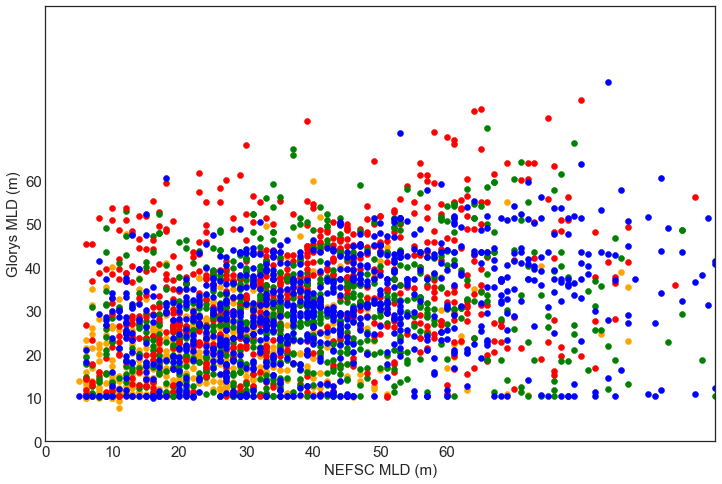

In [1043]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,100)
plt.xlim(0,100)
plt.scatter(SouthernMABNEFSC_nov, SouthernMABGlorys_nov,color='orange',label='Southern MAB')
plt.scatter(NorthernMABNEFSC_nov, NorthernMABGlorys_nov,color='green',label='Northern MAB')
plt.scatter(GeorgesBankNEFSC_nov, GeorgesBankGlorys_nov,color='red',label='Georges Bank')
plt.scatter(EGoMNEFSC_nov, EGoMGlorys_nov,color='green',label='Eastern GoM')
plt.scatter(WGoMNEFSC_nov, WGoMGlorys_nov,color='blue',label='Western GoM')
# leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.show()

# December

In [1049]:
GeorgesBankGlorys_dec = [37.07999, 39.674065, 42.26814, 34.48592, 40.894806, 40.58962, 34.02814, 40.58962, 51.576283, 46.845917, 29.14518, 39.674065, 42.42073, 43.794064, 43.64147, 40.284435, 41.81036, 42.42073, 38.75851, 33.87555, 18.005922, 18.158514, 28.53481, 30.97629, 37.53777, 24.262217, 33.722954, 37.53777, 50.81332, 50.050358, 41.352585, 44.862213, 40.437027, 44.251842, 47.60888, 46.54073, 51.42369, 46.388138, 57.3748, 59.968876, 48.677025, 34.943695, 70.03998, 84.99405, 64.24146, 61.03702, 61.03702, 66.83553, 55.848877, 47.30369, 41.65777, 33.722954, 10.2237015, 10.376293, 10.376293, 43.336285, 11.291849, 19.07407, 63.325912, 12.0548115, 19.379255, 36.46962, 23.346663, 20.447403, 35.706657, 49.897766, 35.859253, 44.862213, 43.794064, 30.671104, 38.911102, 14.191108, 30.213327, 47.456284, 15.564441, 45.014805, 45.014805, 45.014805, 44.862213, 44.862213, 36.622215, 36.622215, 31.58666, 31.58666, 26.551105, 26.551105, 25.940735, 25.940735, 46.388138, 46.388138, 40.742214, 33.570362, 33.570362, 36.46962, 41.65777, 20.599997, 40.284435, 36.164436, 30.671104, 30.671104, 17.85333, 18.768885, 19.837032, 19.837032, 29.602957, 25.788143, 25.788143, 20.294811, 29.908142, 29.908142, 29.908142, 30.213327, 30.213327, 31.891846, 46.845917, 50.965916, 49.592583, 49.592583]
GeorgesBankNEFSC_dec = [39.0, 40.0, 41.0, 53.0, 52.0, 38.0, 20.0, 13.0, 64.0, 67.0, 50.0, 55.0, 53.0, 29.0, 34.0, 50.0, 44.0, 41.0, 41.0, 35.0, 35.0, 38.0, 35.0, 32.0, 35.0, 31.0, 34.0, 35.0, 49.0, 46.0, 46.0, 44.0, 39.0, 47.0, 31.0, 16.0, 50.0, 39.0, 57.0, 61.0, 14.0, 72.0, 82.0, 70.0, 65.0, 61.0, 55.0, 73.0, 83.0, 84.0, 87.0, 89.0, 13.0, 101.0, 6.0, 42.0, 47.0, 41.0, 58.0, 98.0, 27.0, 128.0, 54.0, 66.0, 59.0, 47.0, 63.0, 45.0, 46.0, 66.0, 34.0, 14.0, 61.0, 32.0, 50.0, 49.0, 45.0, 35.0, 65.0, 68.0, 67.0, 65.0, 25.0, 25.0, 11.0, 10.0, 12.0, 17.0, 26.0, 24.0, 44.0, 33.0, 35.0, 34.0, 39.0, 31.0, 50.0, 45.0, 51.0, 57.0, 26.0, 35.0, 15.0, 15.0, 8.0, 29.0, 34.0, 61.0, 37.0, 38.0, 47.0, 17.0, 19.0, 23.0, 30.0, 13.0, 15.0, 17.0]

In [1050]:
# SouthernMABGlorys_dec = 
# SouthernMABNEFSC_dec =

In [1051]:
NorthernMABGlorys_dec = [50.965916, 37.07999, 19.837032, 25.940735, 21.668144, 36.46962, 38.453323, 49.897766, 42.42073, 41.81036, 27.008883, 32.044437, 21.057774, 46.08295, 44.251842, 43.64147, 37.53777, 28.07703, 33.41777, 36.622215, 47.1511, 47.1511, 50.050358, 50.050358, 50.050358, 50.050358, 47.456284, 47.456284, 33.41777, 33.41777, 54.170357, 54.170357, 54.170357, 55.54369, 55.54369, 43.183693, 42.573322, 45.777767, 45.777767, 21.057774, 21.057774, 18.616293, 27.161476, 23.499254, 28.839994, 28.839994, 35.096287, 37.385178, 37.385178, 25.025179, 25.025179, 31.58666, 31.58666, 30.671104, 28.229624, 25.788143, 19.379255, 22.736292, 25.940735, 25.177773, 22.888884, 22.431107, 22.431107, 20.142218, 20.142218, 18.005922, 17.85333, 18.158514]
NorthernMABNEFSC_dec = [51.0, 38.0, 23.0, 20.0, 19.0, 34.0, 45.0, 40.0, 26.0, 17.0, 114.0, 36.0, 22.0, 47.0, 27.0, 61.0, 43.0, 27.0, 29.0, 36.0, 44.0, 45.0, 55.0, 62.0, 66.0, 40.0, 45.0, 47.0, 45.0, 52.0, 41.0, 43.0, 24.0, 55.0, 54.0, 40.0, 42.0, 47.0, 44.0, 16.0, 13.0, 19.0, 57.0, 16.0, 34.0, 35.0, 27.0, 36.0, 26.0, 18.0, 23.0, 22.0, 27.0, 34.0, 12.0, 11.0, 31.0, 32.0, 26.0, 18.0, 13.0, 13.0, 16.0, 15.0, 13.0, 28.0, 33.0, 34.0]

In [1052]:
WGoMGlorys_dec = [39.36888, 31.434067, 28.382215, 25.63555, 42.87851, 28.07703, 43.336285, 37.53777, 41.65777, 40.131844, 38.30073, 42.573322, 39.674065, 41.81036, 43.336285, 35.401474, 16.327404, 76.143684, 64.24146, 71.10812, 84.688866, 75.685905, 25.940735, 28.229624, 15.869626, 48.982212, 42.115547, 36.46962, 36.46962, 36.46962, 16.174812, 16.174812, 71.413315, 71.413315, 71.413315, 34.943695, 34.943695, 34.943695, 71.7185, 71.7185, 21.97333, 21.97333, 40.131844, 40.131844, 30.518513, 30.518513, 25.177773, 25.177773, 28.229624, 28.229624, 30.518513, 38.14814, 27.619253, 34.791103, 43.64147, 43.64147, 42.573322, 45.31999, 45.31999, 28.229624, 14.95407, 34.48592, 34.48592, 24.567402, 19.379255, 28.07703, 13.275552]
WGoMNEFSC_dec = [31.0, 27.0, 45.0, 39.0, 47.0, 35.0, 49.0, 17.0, 26.0, 50.0, 51.0, 6.0, 18.0, 10.0, 55.0, 37.0, 82.0, 102.0, 56.0, 46.0, 54.0, 116.0, 112.0, 61.0, 49.0, 58.0, 55.0, 80.0, 91.0, 18.0, 87.0, 86.0, 22.0, 32.0, 38.0, 33.0, 35.0, 29.0, 36.0, 158.0, 89.0, 87.0, 63.0, 61.0, 54.0, 61.0, 60.0, 60.0, 61.0, 61.0, 77.0, 65.0, 25.0, 26.0, 85.0, 31.0, 44.0, 52.0, 53.0, 90.0, 38.0, 17.0, 15.0, 41.0, 74.0, 63.0, 77.0]

In [1053]:
EGoMGlorys_dec = [43.794064, 36.46962, 48.677025, 37.99555, 46.08295]
EGoMNEFSC_dec = [44.0, 32.0, 34.0, 31.0, 22.0]

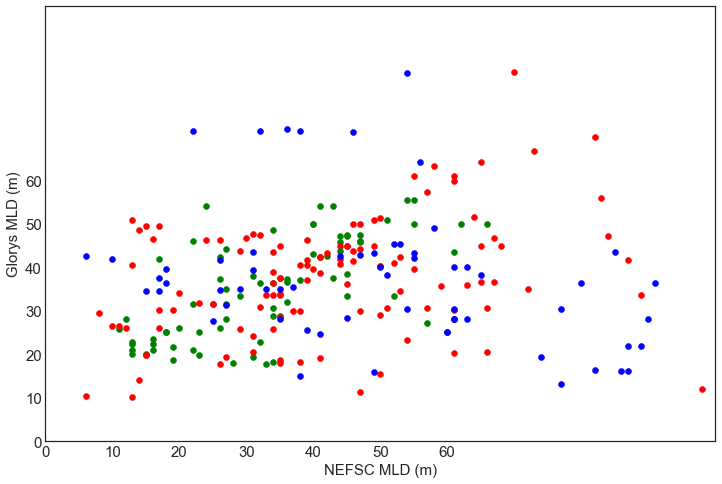

In [1054]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,100)
plt.xlim(0,100)
# plt.scatter(SouthernMABNEFSC_dec, SouthernMABGlorys_dec,color='orange',label='Southern MAB')
plt.scatter(NorthernMABNEFSC_dec, NorthernMABGlorys_dec,color='green',label='Northern MAB')
plt.scatter(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec,color='red',label='Georges Bank')
plt.scatter(EGoMNEFSC_dec, EGoMGlorys_dec,color='green',label='Eastern GoM')
plt.scatter(WGoMNEFSC_dec, WGoMGlorys_dec,color='blue',label='Western GoM')
# leg = plt.legend(frameon = True,prop={'size': 13})
plt.ylabel('Glorys MLD (m)', fontsize = 15)
plt.xlabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60], fontsize = 15) 
plt.show()

In [1150]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

In [1164]:
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
from scipy import stats

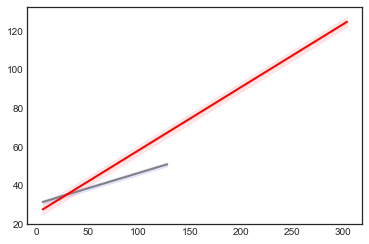

In [1209]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
#some confidence interval
ci = 10 * np.std(np.poly1d(np.polyfit(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec, 1))(np.unique(GeorgesBankNEFSC_dec)))/np.mean(np.poly1d(np.polyfit(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec, 1))(np.unique(GeorgesBankNEFSC_dec)))

fig, ax = plt.subplots()
ax.plot(np.unique(GeorgesBankNEFSC_dec), np.poly1d(np.polyfit(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec, 1))(np.unique(GeorgesBankNEFSC_dec)), color= 'grey', linewidth = 2)
ax.fill_between(np.unique(GeorgesBankNEFSC_dec), (np.poly1d(np.polyfit(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec, 1))(np.unique(GeorgesBankNEFSC_dec))-ci), (np.poly1d(np.polyfit(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec, 1))(np.unique(GeorgesBankNEFSC_dec))+ci), color='b', alpha=.1)

ci = 10 * np.std(np.poly1d(np.polyfit(GeorgesBankNEFSC_jan, GeorgesBankGlorys_jan, 1))(np.unique(GeorgesBankNEFSC_jan)))/np.mean(np.poly1d(np.polyfit(GeorgesBankNEFSC_jan, GeorgesBankGlorys_jan, 1))(np.unique(GeorgesBankNEFSC_jan)))

ax.plot(np.unique(GeorgesBankNEFSC_jan), np.poly1d(np.polyfit(GeorgesBankNEFSC_jan, GeorgesBankGlorys_jan, 1))(np.unique(GeorgesBankNEFSC_jan)), color= 'red', linewidth = 2)
ax.fill_between(np.unique(GeorgesBankNEFSC_jan), (np.poly1d(np.polyfit(GeorgesBankNEFSC_jan, GeorgesBankGlorys_jan, 1))(np.unique(GeorgesBankNEFSC_jan))-ci), (np.poly1d(np.polyfit(GeorgesBankNEFSC_jan, GeorgesBankGlorys_jan, 1))(np.unique(GeorgesBankNEFSC_jan))+ci), color='red', alpha=.1)

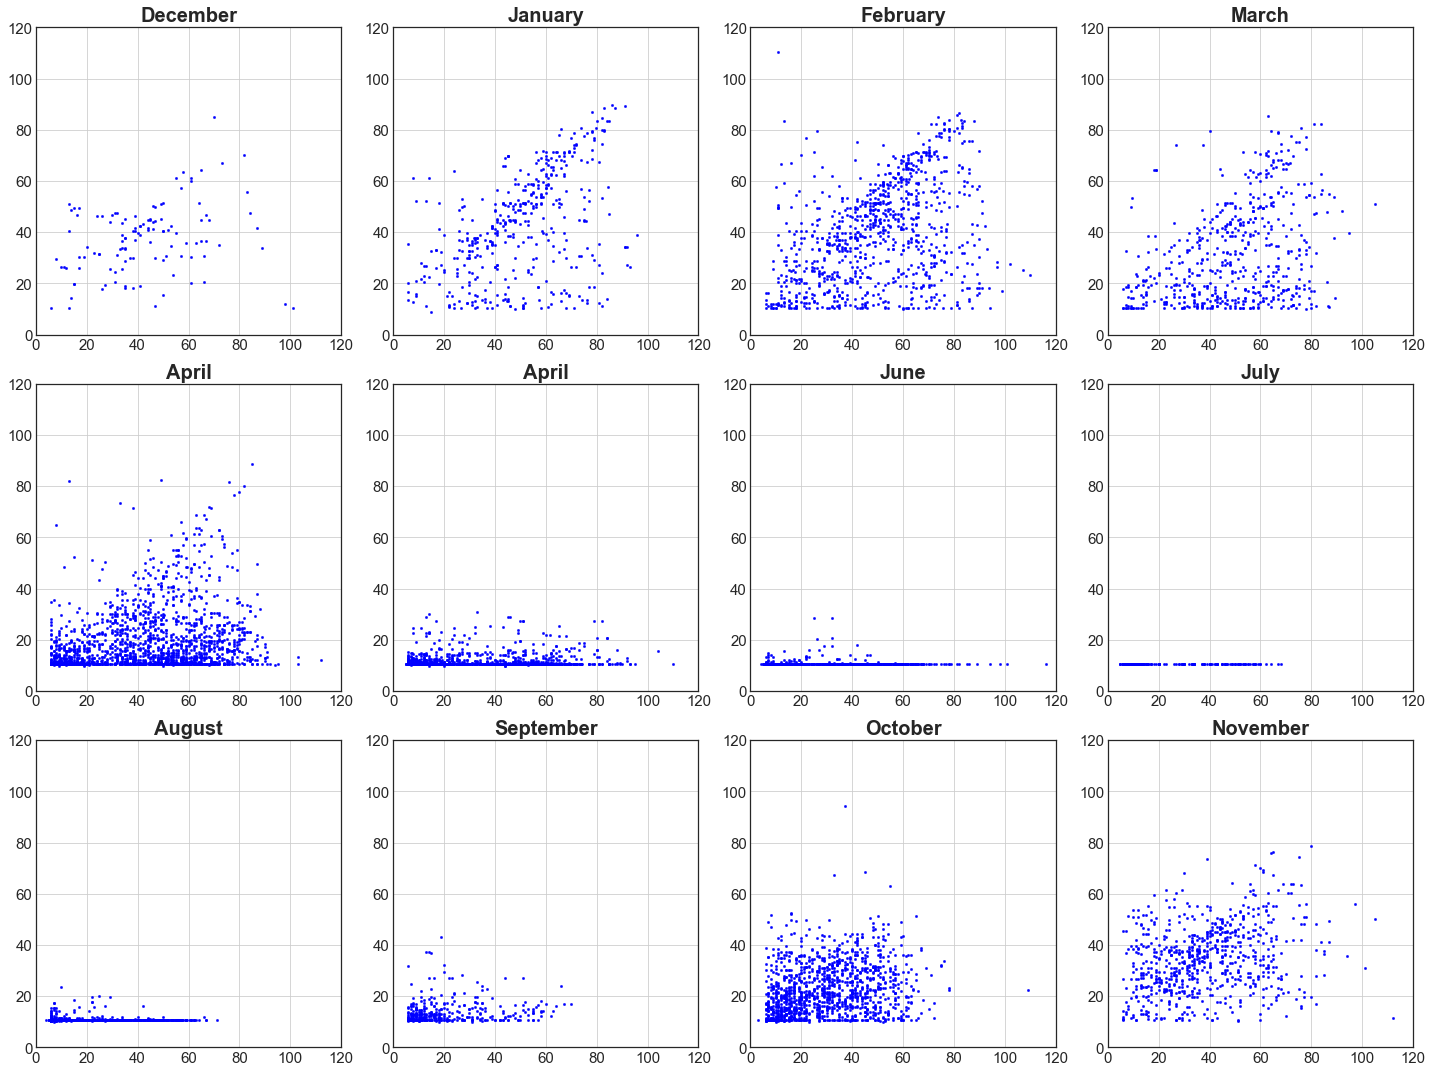

In [1213]:
fig, [[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8],[ax9,ax10,ax11,ax12]] = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

# December
ax1.scatter(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec, color='blue', s=5)
ax1.set_title('December',fontsize = 20,fontweight="bold")
# ax1.plot(np.unique(GeorgesBankNEFSC_dec), np.poly1d(np.polyfit(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec, 1))(np.unique(GeorgesBankNEFSC_dec)), color= 'black', linewidth = 0.5)
# a, b = best_fit(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec)
# yfit = [a + b * xi for xi in GeorgesBankNEFSC_dec]
# ax1.text(5,125,'y = 0.16x + 30.41; R2 = 0.065505',fontsize = 15,weight='bold')
# x = np.unique(GeorgesBankNEFSC_dec)
# y = np.poly1d(np.polyfit(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec, 1))(np.unique(GeorgesBankNEFSC_dec))
# ci = 10 * np.std(y)/np.mean(y)
# ax1.fill_between(x, (y-ci), (y+ci), color='blue', alpha=.2)
# slope, intercept, r_value, p_value, std_err = stats.linregress(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec)
# print("slope: %f    pvalue: %f" % (slope, p_value))
# print("R-squared: %f" % r_value**2)

# January
ax2.scatter(GeorgesBankNEFSC_jan, GeorgesBankGlorys_jan, color='blue', s=5)
ax2.set_title('January',fontsize = 20,fontweight="bold")
# ax2.plot(x, y, color= 'black', linewidth = 0.5)
# ax2.plot(np.unique(GeorgesBankNEFSC_jan), np.poly1d(np.polyfit(GeorgesBankNEFSC_jan, GeorgesBankGlorys_jan, 1))(np.unique(GeorgesBankNEFSC_jan)), color= 'black', linewidth = 0.5)
# # a, b = best_fit(x, y)
# # yfit = [a + b * xi for xi in x]
# # ax1.text(5,125,'y = 0.16x + 30.41; R2 = 0.065505',fontsize = 15,weight='bold')
# x = np.unique(GeorgesBankNEFSC_jan)
# y = np.poly1d(np.polyfit(GeorgesBankNEFSC_jan, GeorgesBankGlorys_jan, 1))(np.unique(GeorgesBankNEFSC_jan))
# ci = 10 * np.std(y)/np.mean(y)
# ax2.fill_between(x, (y-ci), (y+ci), color='blue', alpha=.2)
# slope, intercept, r_value, p_value, std_err = stats.linregress(GeorgesBankNEFSC_dec, GeorgesBankGlorys_dec)
# print("slope: %f    pvalue: %f" % (slope, p_value))
# print("R-squared: %f" % r_value**2)

# February 
ax3.scatter(GeorgesBankNEFSC_feb, GeorgesBankGlorys_feb, color='blue',s=5)
ax3.set_title('February',fontsize = 20,fontweight="bold")
# March
ax4.scatter(GeorgesBankNEFSC_march, GeorgesBankGlorys_march, color='blue',s=5)
ax4.set_title('March',fontsize = 20,fontweight="bold")
# April
ax5.scatter(GeorgesBankNEFSC_april, GeorgesBankGlorys_april, color='blue',s=5)
ax5.set_title('April',fontsize = 20,fontweight="bold")
# May
ax6.scatter(GeorgesBankNEFSC_may, GeorgesBankGlorys_may, color='blue',s=5)
ax6.set_title('April',fontsize = 20,fontweight="bold")
# June
ax7.scatter(GeorgesBankNEFSC_june, GeorgesBankGlorys_june, color='blue',s=5)
ax7.set_title('June',fontsize = 20,fontweight="bold")
# July
ax8.scatter(GeorgesBankNEFSC_july, GeorgesBankGlorys_july, color='blue',s=5)
ax8.set_title('July',fontsize = 20,fontweight="bold")
# August
ax9.scatter(GeorgesBankNEFSC_aug, GeorgesBankGlorys_aug, color='blue',s=5)
ax9.set_title('August',fontsize = 20,fontweight="bold")
# September
ax10.scatter(GeorgesBankNEFSC_sept, GeorgesBankGlorys_sept, color='blue',s=5)
ax10.set_title('September',fontsize = 20,fontweight="bold")
# October
ax11.scatter(GeorgesBankNEFSC_oct, GeorgesBankGlorys_oct, color='blue',s=5)
ax11.set_title('October',fontsize = 20,fontweight="bold")
# November
ax12.scatter(GeorgesBankNEFSC_nov, GeorgesBankGlorys_nov, color='blue',s=5)
ax12.set_title('November',fontsize = 20,fontweight="bold")

for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]:
    ax.set_ylim((0,120))
    ax.set_xlim((0,120))
#     ax.set_ylabel('Glorys MLD', fontsize = 20)
#     ax.set_xlabel('NEFSC MLD', fontsize = 20)
    ax.grid(True)
    ax.set_xticklabels([0,20,40,60,80,100,120], fontsize = 15)
    ax.set_yticklabels([0,20,40,60,80,100,120], fontsize = 15)
plt.savefig('glorys.png')   
plt.tight_layout()

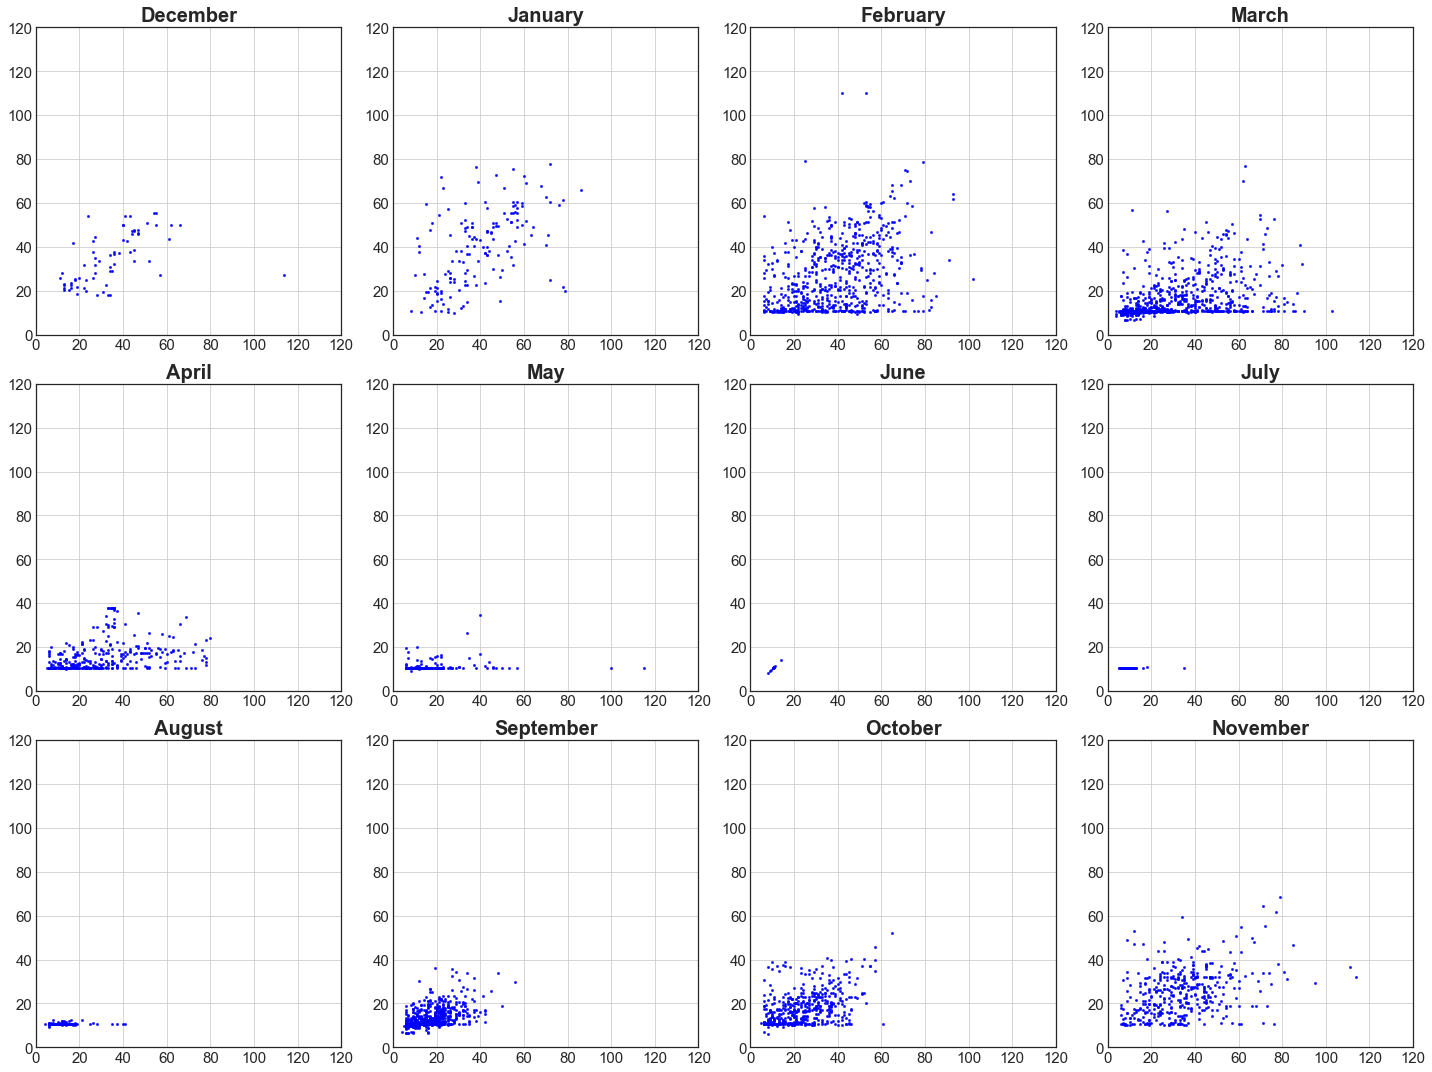

In [1215]:
fig, [[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8],[ax9,ax10,ax11,ax12]] = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

# December
ax1.scatter(NorthernMABNEFSC_dec, NorthernMABGlorys_dec, color='blue', s=5)
ax1.set_title('December',fontsize = 20,fontweight="bold")
# January
ax2.scatter(NorthernMABNEFSC_jan, NorthernMABGlorys_jan, color='blue', s=5)
ax2.set_title('January',fontsize = 20,fontweight="bold")
# February 
ax3.scatter(NorthernMABNEFSC_feb, NorthernMABGlorys_feb, color='blue',s=5)
ax3.set_title('February',fontsize = 20,fontweight="bold")
# March
ax4.scatter(NorthernMABNEFSC_march, NorthernMABGlorys_march, color='blue',s=5)
ax4.set_title('March',fontsize = 20,fontweight="bold")
# April
ax5.scatter(NorthernMABNEFSC_april, NorthernMABGlorys_april, color='blue',s=5)
ax5.set_title('April',fontsize = 20,fontweight="bold")
# May
ax6.scatter(NorthernMABNEFSC_may, NorthernMABGlorys_may, color='blue',s=5)
ax6.set_title('May',fontsize = 20,fontweight="bold")
# June
ax7.scatter(NorthernMABNEFSC_june, NorthernMABGlorys_june, color='blue',s=5)
ax7.set_title('June',fontsize = 20,fontweight="bold")
# July
ax8.scatter(NorthernMABNEFSC_july, NorthernMABGlorys_july, color='blue',s=5)
ax8.set_title('July',fontsize = 20,fontweight="bold")
# August
ax9.scatter(NorthernMABNEFSC_aug, NorthernMABGlorys_aug, color='blue',s=5)
ax9.set_title('August',fontsize = 20,fontweight="bold")
# September
ax10.scatter(NorthernMABNEFSC_sept, NorthernMABGlorys_sept, color='blue',s=5)
ax10.set_title('September',fontsize = 20,fontweight="bold")
# October
ax11.scatter(NorthernMABNEFSC_oct, NorthernMABGlorys_oct, color='blue',s=5)
ax11.set_title('October',fontsize = 20,fontweight="bold")
# November
ax12.scatter(NorthernMABNEFSC_nov, NorthernMABGlorys_nov, color='blue',s=5)
ax12.set_title('November',fontsize = 20,fontweight="bold")

for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]:
    ax.set_ylim((0,140))
    ax.set_xlim((0,140))
#     ax.set_ylabel('Glorys MLD', fontsize = 20)
#     ax.set_xlabel('NEFSC MLD', fontsize = 20)
    ax.grid(True)
    ax.set_xticklabels([0,20,40,60,80,100,120,120], fontsize = 15)
    ax.set_yticklabels([0,20,40,60,80,100,120,120], fontsize = 15)
plt.savefig('glorys.png')   
plt.tight_layout()

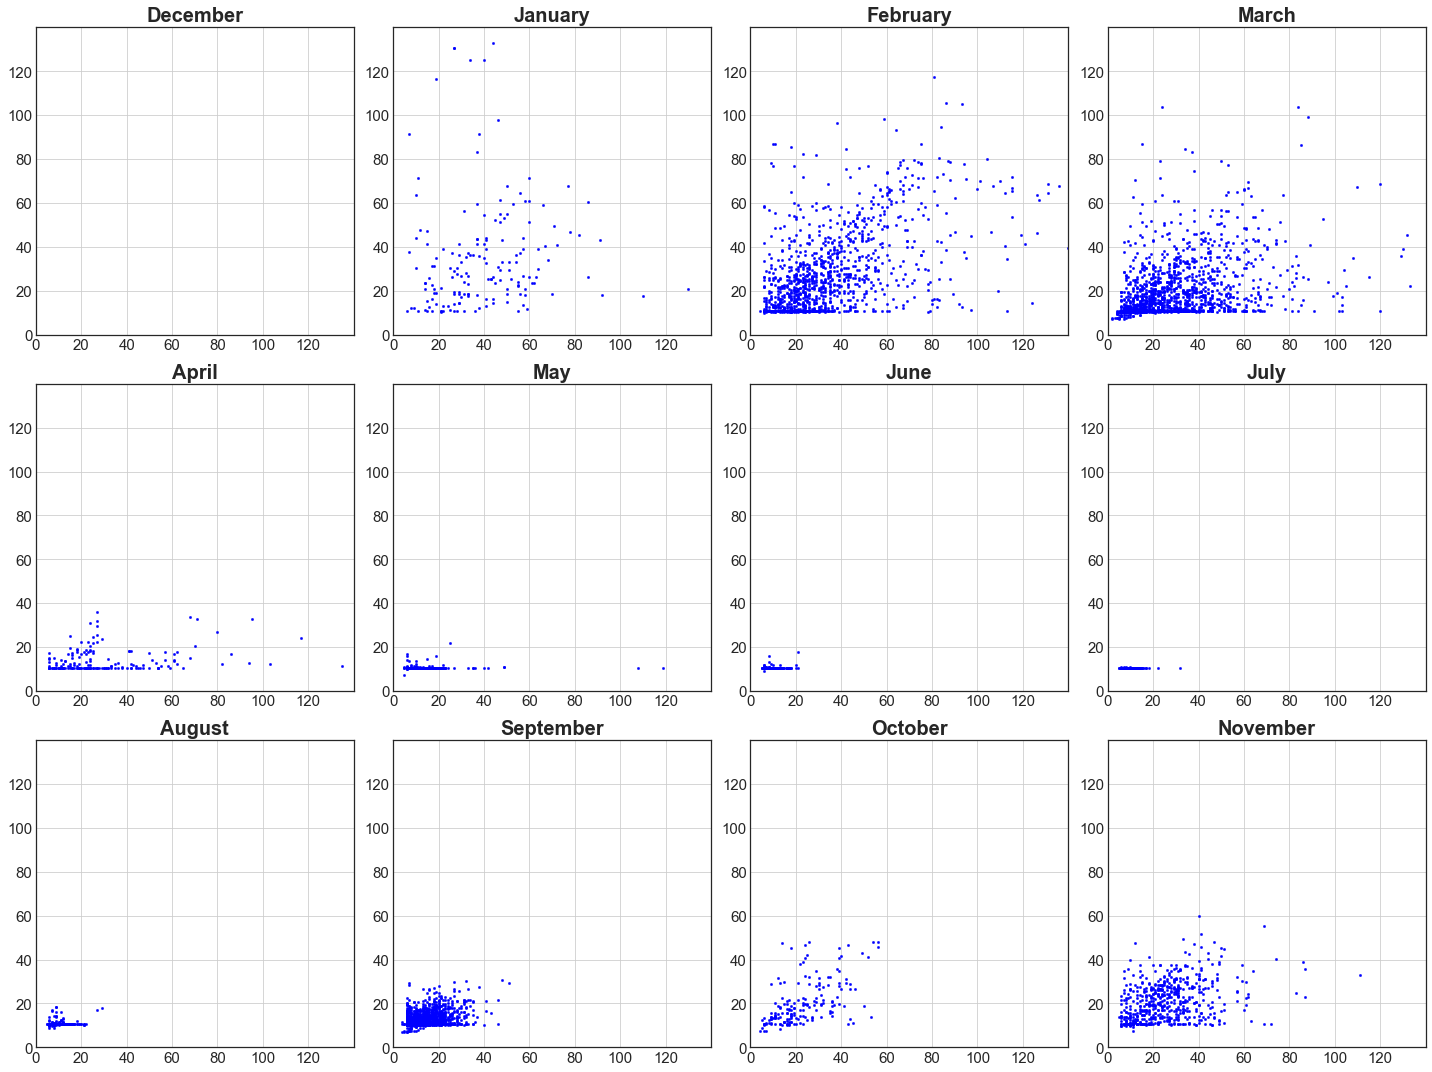

In [1218]:
fig, [[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8],[ax9,ax10,ax11,ax12]] = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

# December
# ax1.scatter(SouthernMABNEFSC_dec, SouthernMABGlorys_dec, color='blue', s=5)
ax1.set_title('December',fontsize = 20,fontweight="bold")
# January
ax2.scatter(SouthernMABNEFSC_jan, SouthernMABGlorys_jan, color='blue', s=5)
ax2.set_title('January',fontsize = 20,fontweight="bold")
# February 
ax3.scatter(SouthernMABNEFSC_feb, SouthernMABGlorys_feb, color='blue',s=5)
ax3.set_title('February',fontsize = 20,fontweight="bold")
# March
ax4.scatter(SouthernMABNEFSC_march, SouthernMABGlorys_march, color='blue',s=5)
ax4.set_title('March',fontsize = 20,fontweight="bold")
# April
ax5.scatter(SouthernMABNEFSC_april, SouthernMABGlorys_april, color='blue',s=5)
ax5.set_title('April',fontsize = 20,fontweight="bold")
# May
ax6.scatter(SouthernMABNEFSC_may, SouthernMABGlorys_may, color='blue',s=5)
ax6.set_title('May',fontsize = 20,fontweight="bold")
# June
ax7.scatter(SouthernMABNEFSC_june, SouthernMABGlorys_june, color='blue',s=5)
ax7.set_title('June',fontsize = 20,fontweight="bold")
# July
ax8.scatter(SouthernMABNEFSC_july, SouthernMABGlorys_july, color='blue',s=5)
ax8.set_title('July',fontsize = 20,fontweight="bold")
# August
ax9.scatter(SouthernMABNEFSC_aug, SouthernMABGlorys_aug, color='blue',s=5)
ax9.set_title('August',fontsize = 20,fontweight="bold")
# September
ax10.scatter(SouthernMABNEFSC_sept, SouthernMABGlorys_sept, color='blue',s=5)
ax10.set_title('September',fontsize = 20,fontweight="bold")
# October
ax11.scatter(SouthernMABNEFSC_oct, SouthernMABGlorys_oct, color='blue',s=5)
ax11.set_title('October',fontsize = 20,fontweight="bold")
# November
ax12.scatter(SouthernMABNEFSC_nov, SouthernMABGlorys_nov, color='blue',s=5)
ax12.set_title('November',fontsize = 20,fontweight="bold")

for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]:
    ax.set_ylim((0,140))
    ax.set_xlim((0,140))
#     ax.set_ylabel('Glorys MLD', fontsize = 20)
#     ax.set_xlabel('NEFSC MLD', fontsize = 20)
    ax.grid(True)
    ax.set_xticklabels([0,20,40,60,80,100,120], fontsize = 15)
    ax.set_yticklabels([0,20,40,60,80,100,120], fontsize = 15)
plt.savefig('glorys.png')   
plt.tight_layout()

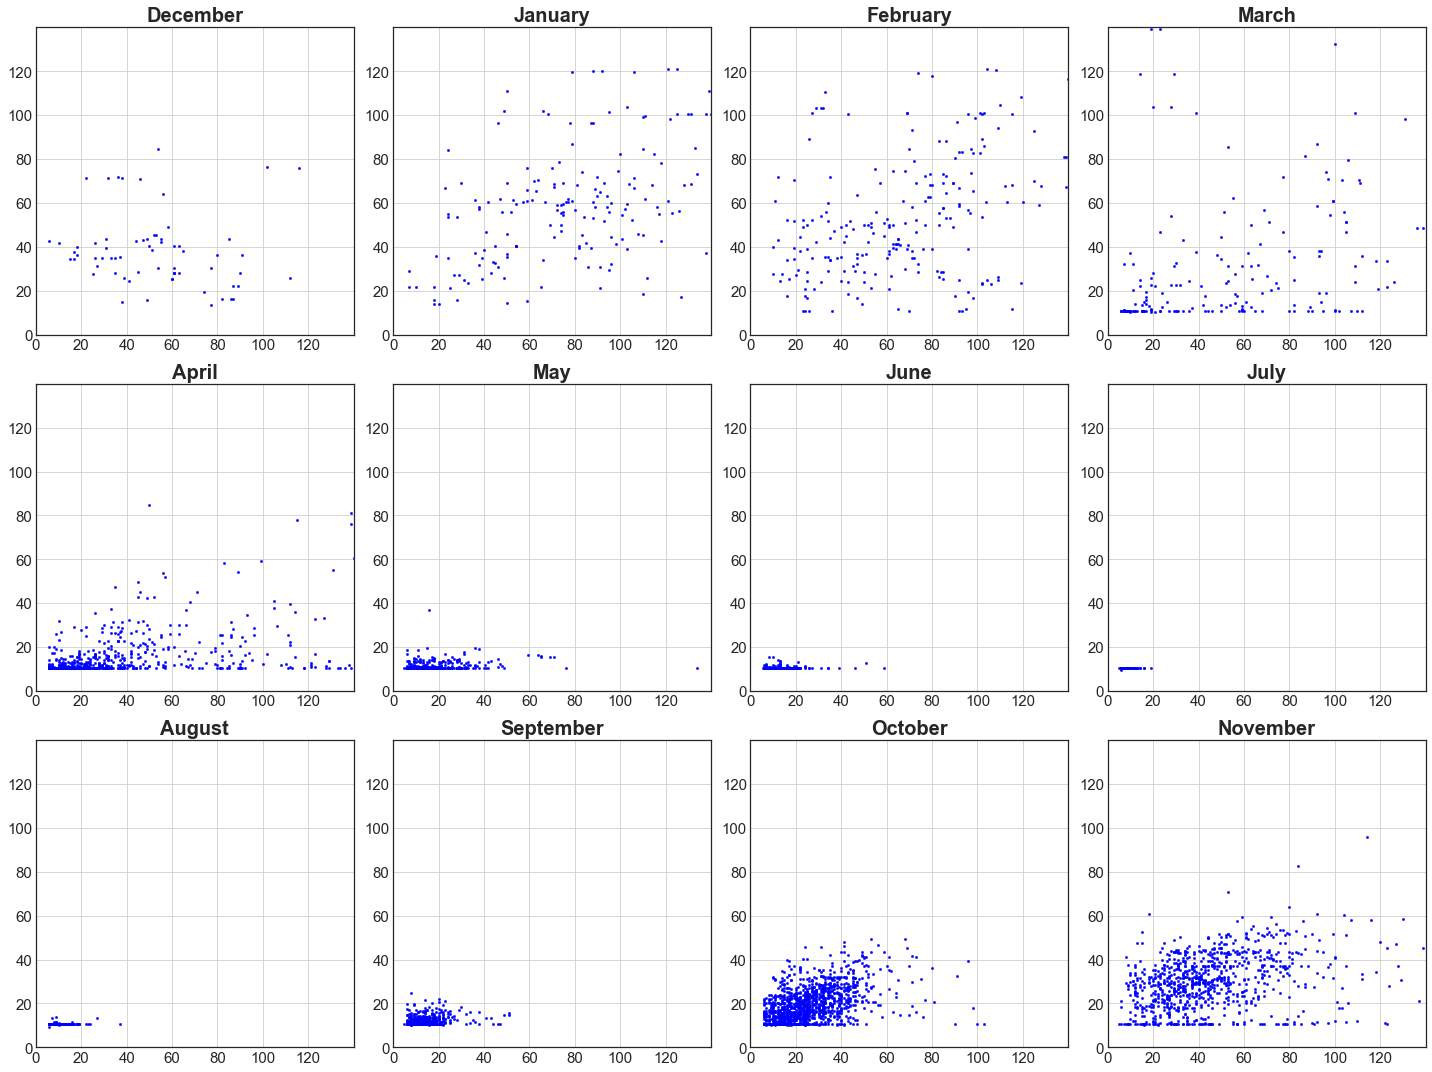

In [1219]:
fig, [[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8],[ax9,ax10,ax11,ax12]] = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

# December
ax1.scatter(WGoMNEFSC_dec, WGoMGlorys_dec, color='blue', s=5)
ax1.set_title('December',fontsize = 20,fontweight="bold")
# January
ax2.scatter(WGoMNEFSC_jan, WGoMGlorys_jan, color='blue', s=5)
ax2.set_title('January',fontsize = 20,fontweight="bold")
# February 
ax3.scatter(WGoMNEFSC_feb, WGoMGlorys_feb, color='blue',s=5)
ax3.set_title('February',fontsize = 20,fontweight="bold")
# March
ax4.scatter(WGoMNEFSC_march, WGoMGlorys_march, color='blue',s=5)
ax4.set_title('March',fontsize = 20,fontweight="bold")
# April
ax5.scatter(WGoMNEFSC_april, WGoMGlorys_april, color='blue',s=5)
ax5.set_title('April',fontsize = 20,fontweight="bold")
# May
ax6.scatter(WGoMNEFSC_may, WGoMGlorys_may, color='blue',s=5)
ax6.set_title('May',fontsize = 20,fontweight="bold")
# June
ax7.scatter(WGoMNEFSC_june, WGoMGlorys_june, color='blue',s=5)
ax7.set_title('June',fontsize = 20,fontweight="bold")
# July
ax8.scatter(WGoMNEFSC_july, WGoMGlorys_july, color='blue',s=5)
ax8.set_title('July',fontsize = 20,fontweight="bold")
# August
ax9.scatter(WGoMNEFSC_aug, WGoMGlorys_aug, color='blue',s=5)
ax9.set_title('August',fontsize = 20,fontweight="bold")
# September
ax10.scatter(WGoMNEFSC_sept, WGoMGlorys_sept, color='blue',s=5)
ax10.set_title('September',fontsize = 20,fontweight="bold")
# October
ax11.scatter(WGoMNEFSC_oct, WGoMGlorys_oct, color='blue',s=5)
ax11.set_title('October',fontsize = 20,fontweight="bold")
# November
ax12.scatter(WGoMNEFSC_nov, WGoMGlorys_nov, color='blue',s=5)
ax12.set_title('November',fontsize = 20,fontweight="bold")

for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]:
    ax.set_ylim((0,140))
    ax.set_xlim((0,140))
#     ax.set_ylabel('Glorys MLD', fontsize = 20)
#     ax.set_xlabel('NEFSC MLD', fontsize = 20)
    ax.grid(True)
    ax.set_xticklabels([0,20,40,60,80,100,120], fontsize = 15)
    ax.set_yticklabels([0,20,40,60,80,100,120], fontsize = 15)
plt.savefig('glorys.png')   
plt.tight_layout()

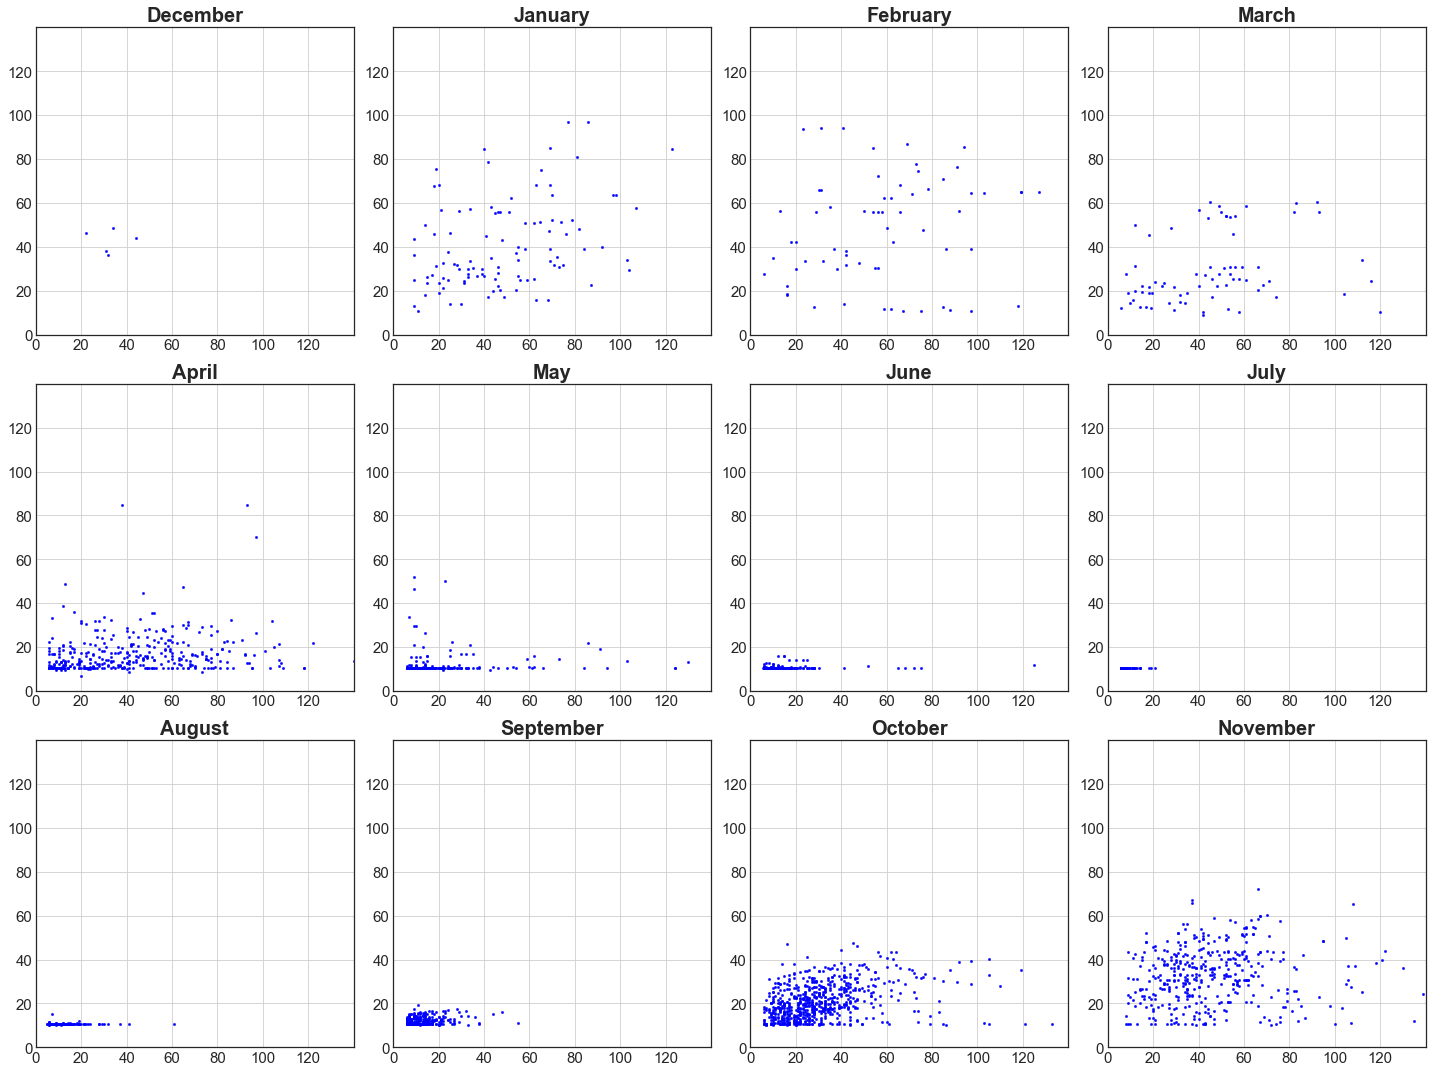

In [1220]:
fig, [[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8],[ax9,ax10,ax11,ax12]] = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

# December
ax1.scatter(EGoMNEFSC_dec, EGoMGlorys_dec, color='blue', s=5)
ax1.set_title('December',fontsize = 20,fontweight="bold")
# January
ax2.scatter(EGoMNEFSC_jan, EGoMGlorys_jan, color='blue', s=5)
ax2.set_title('January',fontsize = 20,fontweight="bold")
# February 
ax3.scatter(EGoMNEFSC_feb, EGoMGlorys_feb, color='blue',s=5)
ax3.set_title('February',fontsize = 20,fontweight="bold")
# March
ax4.scatter(EGoMNEFSC_march, EGoMGlorys_march, color='blue',s=5)
ax4.set_title('March',fontsize = 20,fontweight="bold")
# April
ax5.scatter(EGoMNEFSC_april, EGoMGlorys_april, color='blue',s=5)
ax5.set_title('April',fontsize = 20,fontweight="bold")
# May
ax6.scatter(EGoMNEFSC_may, EGoMGlorys_may, color='blue',s=5)
ax6.set_title('May',fontsize = 20,fontweight="bold")
# June
ax7.scatter(EGoMNEFSC_june, EGoMGlorys_june, color='blue',s=5)
ax7.set_title('June',fontsize = 20,fontweight="bold")
# July
ax8.scatter(EGoMNEFSC_july, EGoMGlorys_july, color='blue',s=5)
ax8.set_title('July',fontsize = 20,fontweight="bold")
# August
ax9.scatter(EGoMNEFSC_aug, EGoMGlorys_aug, color='blue',s=5)
ax9.set_title('August',fontsize = 20,fontweight="bold")
# September
ax10.scatter(EGoMNEFSC_sept, EGoMGlorys_sept, color='blue',s=5)
ax10.set_title('September',fontsize = 20,fontweight="bold")
# October
ax11.scatter(EGoMNEFSC_oct, EGoMGlorys_oct, color='blue',s=5)
ax11.set_title('October',fontsize = 20,fontweight="bold")
# November
ax12.scatter(EGoMNEFSC_nov, EGoMGlorys_nov, color='blue',s=5)
ax12.set_title('November',fontsize = 20,fontweight="bold")

for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]:
    ax.set_ylim((0,140))
    ax.set_xlim((0,140))
#     ax.set_ylabel('Glorys MLD', fontsize = 20)
#     ax.set_xlabel('NEFSC MLD', fontsize = 20)
    ax.grid(True)
    ax.set_xticklabels([0,20,40,60,80,100,120], fontsize = 15)
    ax.set_yticklabels([0,20,40,60,80,100,120], fontsize = 15)
plt.savefig('glorys.png')   
plt.tight_layout()

# -------------------------------------------------------------------------------------------

In [415]:
pointstouse = []
finaldepth = []; finallat = [];finallon = []
zi_listofarrays = []
for year in range(1993,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)] 
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []; counterii = []   
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        lon = npfile[i]['lon']
        lat = npfile[i]['lat']
        floordepth = npfile[i]['depth']
        if yd >= 0 and yd <= 31:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])   
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})    
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_v.contains(point) == True:
#         elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            for ix in range(len(dffin)):
                b = dffin.at[ix,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[ix,'pressure'] >= floordepth - 6:
                        if dffin.at[ix,'pressure'] < 200:
                            seasonyeardepth.append(dffin.at[ix,'pressure'])
                            counterii.append(ii)
                            seasonyeartemp.append(dffin.at[ix,'temp'])
                        else:
                            pass
                    elif dffin.at[ix,'pressure'] == df_final[0].iloc[-1]:
                        pass
                    elif dffin.at[ix,'pressure'] == 0:
                        pass
                    else:
                        if dffin.at[ix,'pressure'] < 200:
                            seasonyeardepth.append(dffin.at[ix,'pressure'])
                            seasonyeartemp.append(dffin.at[ix,'temp'])
                            np.array(seasonyeartemp)
                            np.array(seasonyeardepth)
                            counterii.append(ii)
                        else:
                            pass
                    break
    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])
    if len(seasonyeardepth) > 0:    
        print(year)
#         print(seasonyeardepth)
#         print(inlat)
#         print(inlon)
#         print(date)
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': inlat, 'lon': inlon, 'date': date}) 
#         print(full)
        finaldepth.append(seasonyeardepth)
    
    for x in range(len(date)):
        use=DS.sel(time=slice('{}-01-01'.format(year),'{}-01-31'.format(year)))        
        locate_date = use.sel(time=use.time.dt.day==date[x])
        mld_locate_date = locate_date.mlotst.values[0]
    
        lat = np.array(locate_date.mlotst['latitude'][:])
        long = np.array(locate_date.mlotst['longitude'][:])
    
        lonneg = [float(i)*-1 for i in inlon]
        distanceslat = []; distanceslon = []
        for i in range(133):
            distanceslat.append((inlat[x] - lat[i])**2)
            index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
        for ii in range(181):
            distanceslon.append((lonneg[x] - long[ii])**2)
            index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
        lat_index_use, lon_index_use = index_min_lat, index_min_lon
        pointstouse.append(mld_locate_date[lat_index_use, lon_index_use])    

1993
2001
2005
2006
2007
2008
2009
2011
2012


In [416]:
print(len(pointstouse))
mld_nefsc = sum(finaldepth, [])
print(len(mld_nefsc))

139
139


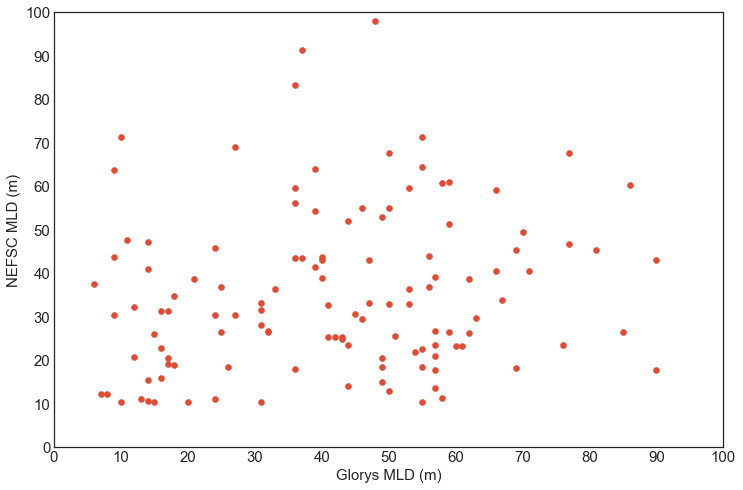

In [417]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.ylim(0,100)
plt.xlim(0,100)
plt.scatter(mld_nefsc, pointstouse)
plt.xlabel('Glorys MLD (m)', fontsize = 15)
plt.ylabel('NEFSC MLD (m)', fontsize = 15)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100], fontsize = 15) 
plt.yticks([0,10,20,30,40,50,60,70,80,90,100], fontsize = 15) 
plt.show()

# Sampling from Glorys

In [1]:
fname ='global-reanalysis-phy-001-030-daily_1596465428590.nc'

In [2]:
DS=xr.open_dataset(fname)

NameError: name 'xr' is not defined

In [3]:
data_1993_2018=DS.sel(time=slice('1993-01-01','2018-12-25')) # entire time frame

NameError: name 'DS' is not defined

In [21]:
mld = data_1993_2018.mlotst

In [39]:
jan_1993=DS.sel(time=slice('1993-01-01','1993-01-31'))

In [317]:
print(full)

     mld      lat      lon  date
0   38.0  40.2367  69.4317     7
1   41.0  40.8667  69.4850     7
2   41.0  40.7183  69.4500     8
3   51.0  40.6517  69.2550     8
4   52.0  40.5533  69.4417     8
..   ...      ...      ...   ...
62  22.0  40.6333  67.9350    16
63  11.0  40.7483  68.1300    17
64  60.0  40.6350  68.5583    17
65  31.0  40.4517  68.3067    17
66  37.0  40.3183  68.5717    17

[67 rows x 4 columns]


In [358]:
pointstouse = []
for x in range(len(date)):
    locate_date = jan_1993.sel(time=jan_1993.time.dt.day==date[x])
    mld_locate_date = locate_date.mlotst.values[0]
    
    lat = np.array(usenow['latitude'][:])
    long = np.array(usenow['longitude'][:])

    distanceslat = []; distanceslon = []
    for i in range(133):
        distanceslat.append((lat_input[x] - lat[i])**2)
        index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
    for ii in range(181):
        distanceslon.append((lonneg[x] - long[ii])**2)
        index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
    lat_index_use, lon_index_use = index_min_lat, index_min_lon
    pointstouse.append(mld_locate_date[lat_index_use, lon_index_use])

In [360]:
print(mld)

[38.0, 41.0, 41.0, 51.0, 52.0, 50.0, 30.0, 75.0, 62.0, 66.0, 48.0, 54.0, 67.0, 60.0, 60.0, 48.0, 42.0, 43.0, 41.0, 33.0, 39.0, 30.0, 30.0, 37.0, 32.0, 33.0, 48.0, 45.0, 40.0, 41.0, 52.0, 45.0, 54.0, 62.0, 57.0, 61.0, 48.0, 68.0, 81.0, 69.0, 41.0, 48.0, 44.0, 62.0, 46.0, 65.0, 56.0, 7.0, 21.0, 21.0, 82.0, 31.0, 8.0, 44.0, 32.0, 26.0, 24.0, 70.0, 12.0, 14.0, 42.0, 63.0, 22.0, 11.0, 60.0, 31.0, 37.0]


In [359]:
print(pointstouse)

[41.65777, 39.674065, 15.564441, 10.986664, 12.359997, 11.444442, 11.597034, 12.359997, 11.902219, 16.174812, 9.918516, 23.80444, 61.95258, 62.71554, 61.799984, 47.76147, 46.69332, 42.573322, 38.75851, 33.87555, 34.791103, 30.97629, 24.262217, 33.722954, 35.859253, 37.53777, 50.81332, 50.050358, 41.352585, 44.862213, 44.251842, 46.388138, 51.42369, 57.3748, 59.968876, 61.03702, 60.73184, 16.022219, 12.207404, 14.95407, 40.58962, 44.09925, 40.894806, 41.505177, 51.576283, 69.88739, 60.579247, 12.817775, 11.1392565, 11.597034, 24.109625, 21.51555, 21.057774, 14.038515, 14.95407, 22.888884, 25.63555, 78.58516, 11.291849, 8.8503685, 13.580737, 15.717033, 15.106663, 20.599997, 55.391098, 10.2237015, 12.817775]


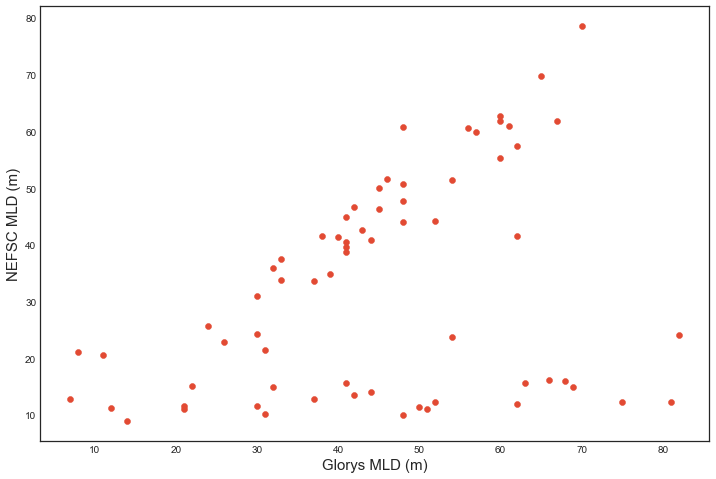

In [375]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-white')
plt.scatter(mld, pointstouse)
plt.xlabel('Glorys MLD (m)', fontsize = 15)
plt.ylabel('NEFSC MLD (m)', fontsize = 15)
plt.show()

In [333]:
print(lonneg)

[-69.4317, -69.485, -69.45, -69.255, -69.4417, -69.22, -69.035, -68.7867, -68.9533, -68.8317, -69.2783, -69.2633, -68.8483, -68.665, -68.4683, -68.3183, -68.2517, -68.35, -68.1817, -67.9667, -67.8517, -68.0183, -67.7883, -67.635, -67.6967, -67.4633, -67.165, -67.1667, -67.4033, -67.4, -67.485, -67.3183, -67.22, -67.1167, -66.9683, -66.8317, -66.9533, -66.6317, -66.4283, -66.3817, -68.62, -68.265, -67.895, -67.6467, -67.4533, -67.3233, -67.1383, -66.735, -66.7333, -66.8333, -66.5317, -66.2483, -66.1133, -66.4017, -66.5217, -66.9317, -66.9983, -67.405, -67.3417, -67.5867, -67.6383, -67.8333, -67.935, -68.13, -68.5583, -68.3067, -68.5717]


In [ ]:
print()

In [323]:
print(lat_input)

[40.2367, 40.8667, 40.7183, 40.6517, 40.5533, 40.3683, 40.215, 40.4, 40.62, 40.8333, 40.845, 41.0317, 41.0833, 41.25, 41.3333, 41.5, 41.3033, 41.1367, 41.1383, 41.32, 41.4333, 41.7483, 41.6367, 41.5067, 41.305, 41.3517, 41.4167, 41.5817, 41.5333, 41.7, 41.9017, 41.8333, 41.9133, 41.79, 41.67, 41.885, 41.9817, 41.9517, 41.8883, 41.7567, 40.9617, 40.9533, 41.085, 40.9833, 41.1817, 41.0333, 41.18, 41.22, 41.355, 41.4867, 41.565, 41.715, 41.8017, 41.3483, 41.06, 41.0333, 40.7833, 40.8167, 40.6033, 40.5167, 40.705, 40.855, 40.6333, 40.7483, 40.635, 40.4517, 40.3183]


In [52]:
date = [7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17]

In [53]:
mld = [38.0, 41.0, 41.0, 51.0, 52.0, 50.0, 30.0, 75.0, 62.0, 66.0, 48.0, 54.0, 67.0, 60.0, 60.0, 48.0, 42.0, 43.0, 41.0, 33.0, 39.0, 30.0, 30.0, 37.0, 32.0, 33.0, 48.0, 45.0, 40.0, 41.0, 52.0, 45.0, 54.0, 62.0, 57.0, 61.0, 48.0, 68.0, 81.0, 69.0, 41.0, 48.0, 44.0, 62.0, 46.0, 65.0, 56.0, 7.0, 21.0, 21.0, 82.0, 31.0, 8.0, 44.0, 32.0, 26.0, 24.0, 70.0, 12.0, 14.0, 42.0, 63.0, 22.0, 11.0, 60.0, 31.0, 37.0]

In [190]:
lat_input = [40.2367, 40.8667, 40.7183, 40.6517, 40.5533, 40.3683, 40.215, 40.4, 40.62, 40.8333, 40.845, 41.0317, 41.0833, 41.25, 41.3333, 41.5, 41.3033, 41.1367, 41.1383, 41.32, 41.4333, 41.7483, 41.6367, 41.5067, 41.305, 41.3517, 41.4167, 41.5817, 41.5333, 41.7, 41.9017, 41.8333, 41.9133, 41.79, 41.67, 41.885, 41.9817, 41.9517, 41.8883, 41.7567, 40.9617, 40.9533, 41.085, 40.9833, 41.1817, 41.0333, 41.18, 41.22, 41.355, 41.4867, 41.565, 41.715, 41.8017, 41.3483, 41.06, 41.0333, 40.7833, 40.8167, 40.6033, 40.5167, 40.705, 40.855, 40.6333, 40.7483, 40.635, 40.4517, 40.3183]

In [131]:
lon_input = [69.4317, 69.485, 69.45, 69.255, 69.4417, 69.22, 69.035, 68.7867, 68.9533, 68.8317, 69.2783, 69.2633, 68.8483, 68.665, 68.4683, 68.3183, 68.2517, 68.35, 68.1817, 67.9667, 67.8517, 68.0183, 67.7883, 67.635, 67.6967, 67.4633, 67.165, 67.1667, 67.4033, 67.4, 67.485, 67.3183, 67.22, 67.1167, 66.9683, 66.8317, 66.9533, 66.6317, 66.4283, 66.3817, 68.62, 68.265, 67.895, 67.6467, 67.4533, 67.3233, 67.1383, 66.735, 66.7333, 66.8333, 66.5317, 66.2483, 66.1133, 66.4017, 66.5217, 66.9317, 66.9983, 67.405, 67.3417, 67.5867, 67.6383, 67.8333, 67.935, 68.13, 68.5583, 68.3067, 68.5717]

In [149]:
lonneg = [float(i)*-1 for i in lon]
print(lonneg)

[-69.4317, -69.485, -69.45, -69.255, -69.4417, -69.22, -69.035, -68.7867, -68.9533, -68.8317, -69.2783, -69.2633, -68.8483, -68.665, -68.4683, -68.3183, -68.2517, -68.35, -68.1817, -67.9667, -67.8517, -68.0183, -67.7883, -67.635, -67.6967, -67.4633, -67.165, -67.1667, -67.4033, -67.4, -67.485, -67.3183, -67.22, -67.1167, -66.9683, -66.8317, -66.9533, -66.6317, -66.4283, -66.3817, -68.62, -68.265, -67.895, -67.6467, -67.4533, -67.3233, -67.1383, -66.735, -66.7333, -66.8333, -66.5317, -66.2483, -66.1133, -66.4017, -66.5217, -66.9317, -66.9983, -67.405, -67.3417, -67.5867, -67.6383, -67.8333, -67.935, -68.13, -68.5583, -68.3067, -68.5717]


In [150]:
touse = jan_1993.sel(time=jan_1993.time.dt.day==7)

In [169]:
print(type(touse.mlotst))
print(touse.mlotst.shape)
usenow = touse.mlotst

<class 'xarray.core.dataarray.DataArray'>
(1, 133, 181)


In [170]:
tousedflat = usenow['latitude']
print(tousedflat.shape)

(133,)


In [171]:
tousedflon = usenow['longitude']
print(tousedflon.shape)

(181,)


In [308]:
lat = np.array(usenow['latitude'][:])
long = np.array(usenow['longitude'][:])

distanceslat = []; distanceslon = []
for i in range(133):
    distanceslat.append((36 - lat[i])**2)
    index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
print(index_min_lat)
for ii in range(181):
    distanceslon.append((-68.3067 - long[i]**2))
    index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
print(index_min_lon)

x, y = index_min_lat, index_min_lon

12
0


In [309]:
print(usenow.shape)

(1, 133, 181)


In [310]:
print(usenow)

<xarray.DataArray 'mlotst' (time: 1, latitude: 133, longitude: 181)>
array([[[       nan,        nan, ..., 119.78516 , 119.937744],
        [       nan,        nan, ..., 123.90515 , 127.1096  ],
        ...,
        [       nan,        nan, ...,  15.259255,  13.580737],
        [       nan,        nan, ...,  13.885922,   9.155553]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 35.0 35.083332 35.166668 ... 45.916668 46.0
  * time       (time) datetime64[ns] 1993-01-07T12:00:00
  * longitude  (longitude) float32 -78.0 -77.916664 ... -63.083332 -63.0
Attributes:
    long_name:      Density ocean mixed layer thickness
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_theta
    units:          m
    unit_long:      Meters
    cell_methods:   area: mean
    _ChunkSizes:    [   1  681 1440]


In [312]:
x, y = index_min_lat, index_min_lon
print(x,y)

12 0


In [316]:
usenow_as_numpy = usenow.values
print(usenow_as_numpy.shape)
usenownow = usenow_as_numpy[0]
print(usenownow[30,30])
print(usenownow.shape)

(1, 133, 181)
10.528886
(133, 181)


In [264]:
print(min(distances))
index_min = min(range(len(distanceslat)), key=distanceslat.__getitem__)
print(index_min)

0.001111026341677833
100


In [265]:
print(lat[100])

43.333332


In [229]:
import numpy as np

lat = np.array(usenow['latitude'][:])
long = np.array(usenow['longitude'][:])

def get_data(lat_input, long_input):
    lat_index  = np.nanargmin((lat-lat_input)**2)
    long_index = np.nanargmin((long-long_input)**2)
    return usenow[long_index][lat_index]

In [238]:
lat_index  = np.nanargmin((lat-lat_input)**2)

ValueError: operands could not be broadcast together with shapes (133,) (67,) 

In [236]:
print(len(lonneg))

67


In [237]:
print(len(lat_input))

67


In [211]:
import numpy as np

lat = np.array(usenow['latitude'][:])
long = np.array(usenow['longitude'][:])

def find_index(x,y):
    xi=np.searchsorted(lat,x)
    yi=np.searchsorted(long,y)
    return xi,yi

thisLat, thisLong = find_index(,46.)
print(thisLat, thisLong)

0 181


In [ ]:
thisLat, thisLong = find_index(-68.3067,35.083332)
print(thisLat, thisLong)

In [228]:
import numpy as np

lat=np.array(usenow['latitude'][:])
long=longuse

def find_index(x,y):
    xi=np.searchsorted(lat,x)
    yi=np.searchsorted(long,y)
    return xi,yi

thisLat, thisLong = find_index(63.,30)
print (thisLat, thisLong)

133 0


In [203]:
lat = np.array(usenow['latitude'][:])
long = np.array(usenow['longitude'][:])

In [221]:
longuse = []
for i in long:
    longuse.append(i*-1)

In [204]:
print(lat)

[35.       35.083332 35.166668 35.25     35.333332 35.416668 35.5
 35.583332 35.666668 35.75     35.833332 35.916668 36.       36.083332
 36.166668 36.25     36.333332 36.416668 36.5      36.583332 36.666668
 36.75     36.833332 36.916668 37.       37.083332 37.166668 37.25
 37.333332 37.416668 37.5      37.583332 37.666668 37.75     37.833332
 37.916668 38.       38.083332 38.166668 38.25     38.333332 38.416668
 38.5      38.583332 38.666668 38.75     38.833332 38.916668 39.
 39.083332 39.166668 39.25     39.333332 39.416668 39.5      39.583332
 39.666668 39.75     39.833332 39.916668 40.       40.083332 40.166668
 40.25     40.333332 40.416668 40.5      40.583332 40.666668 40.75
 40.833332 40.916668 41.       41.083332 41.166668 41.25     41.333332
 41.416668 41.5      41.583332 41.666668 41.75     41.833332 41.916668
 42.       42.083332 42.166668 42.25     42.333332 42.416668 42.5
 42.583332 42.666668 42.75     42.833332 42.916668 43.       43.083332
 43.166668 43.25     43.333332

In [205]:
print(long)

[-78.       -77.916664 -77.833336 -77.75     -77.666664 -77.583336
 -77.5      -77.416664 -77.333336 -77.25     -77.166664 -77.083336
 -77.       -76.916664 -76.833336 -76.75     -76.666664 -76.583336
 -76.5      -76.416664 -76.333336 -76.25     -76.166664 -76.083336
 -76.       -75.916664 -75.833336 -75.75     -75.666664 -75.583336
 -75.5      -75.416664 -75.333336 -75.25     -75.166664 -75.083336
 -75.       -74.916664 -74.833336 -74.75     -74.666664 -74.583336
 -74.5      -74.416664 -74.333336 -74.25     -74.166664 -74.083336
 -74.       -73.916664 -73.833336 -73.75     -73.666664 -73.583336
 -73.5      -73.416664 -73.333336 -73.25     -73.166664 -73.083336
 -73.       -72.916664 -72.833336 -72.75     -72.666664 -72.583336
 -72.5      -72.416664 -72.333336 -72.25     -72.166664 -72.083336
 -72.       -71.916664 -71.833336 -71.75     -71.666664 -71.583336
 -71.5      -71.416664 -71.333336 -71.25     -71.166664 -71.083336
 -71.       -70.916664 -70.833336 -70.75     -70.666664 -70.58

In [172]:
def find_index(point_lon, point_lat, grid_lon, grid_lat, distance_radius_in_degrees):
# point_lon, point_lat = list of lat lon points --> lat_list, lon_list = [x1,x2][y1,y2]
# grid_lon, grid_lat = np.array of gridded lat lon --> grid_x= np.array([x1,x2,x3],[x4,x5,x6])
# distance_radius_in_degrees = how large of a difference between matching points
#'''''''''''''''''''''''''''''''''
#for rr in range(1):
    xx=[];yy=[];distance=[]
    for i in range(len(point_lat)):
        abslat = np.abs(grid_lat-point_lat[i])
        abslon= np.abs(grid_lon-point_lon[i])
        c = np.maximum(abslon,abslat)
        x, y = np.where(c == np.min(c))
#         x, y = np.where(c < distance_radius_in_degrees)
        dist=[(deltas(grid_lat[x][t][y][t]*p, grid_lon[x][t][y][t]*p, point_lat[i]*p, point_lon[i]*p))/p for t in range(len(x))]      #add indices of nearest wrf point station
        xx.append(x) 
        yy.append(y)
        distance.append(dist)
    return xx, yy, distance

In [177]:
xx,yy,distance= find_index(lonneg, lat,nxlon,nylat, distance_radius_in_degrees)
print(xx,yy,distance)

[] [] []


In [146]:
print(distance)

[]


In [163]:
d=distance(40.2367,-69.4317,touse['latitude'],touse['longitude'])

TypeError: 'list' object is not callable

In [173]:
nxlon,nylat= usenow['longitude'][:], usenow['latitude'][:]

In [175]:
print(nxlon.values)

[-78.       -77.916664 -77.833336 -77.75     -77.666664 -77.583336
 -77.5      -77.416664 -77.333336 -77.25     -77.166664 -77.083336
 -77.       -76.916664 -76.833336 -76.75     -76.666664 -76.583336
 -76.5      -76.416664 -76.333336 -76.25     -76.166664 -76.083336
 -76.       -75.916664 -75.833336 -75.75     -75.666664 -75.583336
 -75.5      -75.416664 -75.333336 -75.25     -75.166664 -75.083336
 -75.       -74.916664 -74.833336 -74.75     -74.666664 -74.583336
 -74.5      -74.416664 -74.333336 -74.25     -74.166664 -74.083336
 -74.       -73.916664 -73.833336 -73.75     -73.666664 -73.583336
 -73.5      -73.416664 -73.333336 -73.25     -73.166664 -73.083336
 -73.       -72.916664 -72.833336 -72.75     -72.666664 -72.583336
 -72.5      -72.416664 -72.333336 -72.25     -72.166664 -72.083336
 -72.       -71.916664 -71.833336 -71.75     -71.666664 -71.583336
 -71.5      -71.416664 -71.333336 -71.25     -71.166664 -71.083336
 -71.       -70.916664 -70.833336 -70.75     -70.666664 -70.58

In [92]:
print(tousedf)

                                            mlotst
latitude longitude  time                          
35.0     -78.000000 1993-01-07 12:00:00        NaN
         -77.916664 1993-01-07 12:00:00        NaN
         -77.833336 1993-01-07 12:00:00        NaN
         -77.750000 1993-01-07 12:00:00        NaN
         -77.666664 1993-01-07 12:00:00        NaN
...                                            ...
46.0     -63.333332 1993-01-07 12:00:00  16.632589
         -63.250000 1993-01-07 12:00:00  17.395552
         -63.166668 1993-01-07 12:00:00  16.327404
         -63.083332 1993-01-07 12:00:00  13.885922
         -63.000000 1993-01-07 12:00:00   9.155553

[24073 rows x 1 columns]


In [90]:
print(tousedf.iloc[1])

mlotst   NaN
Name: (35.0, -77.91666412353516, 1993-01-07 12:00:00), dtype: float32


In [74]:
for i in date:
    print(i)
    touse = jan_1993.sel(time=jan_1993.time.dt.day==i)
    print(touse.mlotst)                     

7
<xarray.DataArray 'mlotst' (time: 1, latitude: 133, longitude: 181)>
array([[[       nan,        nan, ..., 119.78516 , 119.937744],
        [       nan,        nan, ..., 123.90515 , 127.1096  ],
        ...,
        [       nan,        nan, ...,  15.259255,  13.580737],
        [       nan,        nan, ...,  13.885922,   9.155553]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 35.0 35.083332 35.166668 ... 45.916668 46.0
  * time       (time) datetime64[ns] 1993-01-07T12:00:00
  * longitude  (longitude) float32 -78.0 -77.916664 ... -63.083332 -63.0
Attributes:
    long_name:      Density ocean mixed layer thickness
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_theta
    units:          m
    unit_long:      Meters
    cell_methods:   area: mean
    _ChunkSizes:    [   1  681 1440]
7
<xarray.DataArray 'mlotst' (time: 1, latitude: 133, longitude: 181)>
array([[[       nan,        nan, ..., 119.78516 , 119.937744],
        [       nan,        nan, ...

<xarray.DataArray 'mlotst' (time: 1, latitude: 133, longitude: 181)>
array([[[      nan,       nan, ..., 43.0311  , 37.232586],
        [      nan,       nan, ..., 37.842953, 31.891846],
        ...,
        [      nan,       nan, ..., 22.736292, 12.359997],
        [      nan,       nan, ..., 17.090366, 11.444442]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 35.0 35.083332 35.166668 ... 45.916668 46.0
  * time       (time) datetime64[ns] 1993-01-12T12:00:00
  * longitude  (longitude) float32 -78.0 -77.916664 ... -63.083332 -63.0
Attributes:
    long_name:      Density ocean mixed layer thickness
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_theta
    units:          m
    unit_long:      Meters
    cell_methods:   area: mean
    _ChunkSizes:    [   1  681 1440]
12
<xarray.DataArray 'mlotst' (time: 1, latitude: 133, longitude: 181)>
array([[[      nan,       nan, ..., 43.0311  , 37.232586],
        [      nan,       nan, ..., 37.842953, 31.891846]

<xarray.DataArray 'mlotst' (time: 1, latitude: 133, longitude: 181)>
array([[[       nan,        nan, ...,  66.98813 ,  42.115547],
        [       nan,        nan, ..., 148.62515 ,  67.44591 ],
        ...,
        [       nan,        nan, ...,  10.528886,  10.681479],
        [       nan,        nan, ...,  14.3437  ,   9.613331]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 35.0 35.083332 35.166668 ... 45.916668 46.0
  * time       (time) datetime64[ns] 1993-01-16T12:00:00
  * longitude  (longitude) float32 -78.0 -77.916664 ... -63.083332 -63.0
Attributes:
    long_name:      Density ocean mixed layer thickness
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_theta
    units:          m
    unit_long:      Meters
    cell_methods:   area: mean
    _ChunkSizes:    [   1  681 1440]
16
<xarray.DataArray 'mlotst' (time: 1, latitude: 133, longitude: 181)>
array([[[       nan,        nan, ...,  66.98813 ,  42.115547],
        [       nan,        nan, ...,

In [103]:
finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []; meanfilteredMLDlist = []; stdfilteredMLDlist = []; years = []; bananasplitmean = []; bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = [];bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    finaldepth = []; finallat = [];finallon = []
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = [];seasonyearsal = []; counterii = []; floors = []; floor_intermediate = []; s_intermediate = [];seasonyearsal = []; lat = []; lon = []; lonneg = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
#         elif yd > 334 and yd <= 365:
        elif yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            floor_intermediate.append(npfile[i]['depth'])
            s_intermediate.append(npfile[i]['s'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate, 
                            'depth': floor_intermediate, 's': s_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
#         elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'temp': month_df['t'].iloc[ii],'sal': month_df['s'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for x in range(len(l)):
                    val = df_final[1][x]
                    numrange.append(x)
                    surfaceval.append(val)      
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[len(dffinunreversed)-1,'temp'] <= (surfacevalmean + 0.2) and dffinunreversed.at[len(dffinunreversed)-1,'temp'] >= (surfacevalmean - 0.2):
                    seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                    seasonyeartemp.append(dffinunreversed.at[len(dffinunreversed)-1,'temp'])
                    seasonyearsal.append(dffinunreversed.at[len(dffinunreversed)-1,'sal'])
                    floors.append(month_df['depth'].iloc[ii])
                    lat.append(month_df['lat'].iloc[ii])
                    lon.append(month_df['lon'].iloc[ii])
                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                    break
                elif dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
                    pass
                else:
                    if dffinunreversed.at[ix,'pressure'] >= (month_df['depth'].iloc[ii] - 6): # ALL MIXED
                        if dffinunreversed.at[ix,'pressure'] == dffinunreversed.at[len(dffinunreversed)-1,'pressure']:
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 15):
                                pass
                            else:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                        else:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                    elif dffinunreversed.at[ix,'pressure'] == 0:
                        pass
                    elif ix == 0: 
                        seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                        seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                        seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                        floors.append(month_df['depth'].iloc[ii])
                        lat.append(month_df['lat'].iloc[ii])
                        lon.append(month_df['lon'].iloc[ii])
                        lonneg.append(month_df['lon'].iloc[ii]*-1)
                    else: # Well-defined mixed layer detected
                        seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                        seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                        seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                        floors.append(month_df['depth'].iloc[ii])
                        lat.append(month_df['lat'].iloc[ii])
                        lon.append(month_df['lon'].iloc[ii])
                        lonneg.append(month_df['lon'].iloc[ii]*-1)
                    break
            
    meanseasonyeardepth_ = []; stdseasonyeardepth_ = []
    if len(seasonyeardepth) > 0:
        print(year, '-----',len(seasonyeardepth))
#         print(seasonyeardepth)
#         print(floors)
        bottomandmixeddepths = pd.DataFrame({'MLD': seasonyeardepth,'bottomd': floors, 'lat': lat, 'lon':lon})
#         bottomandmixeddepths = bottomandmixeddepths[bottomandmixeddepths.bottomd >= 30]
#         bottomandmixeddepths = bottomandmixeddepths[bottomandmixeddepths.bottomd <= 100]
#         print(bottomandmixeddepths)
        print('mean:', statistics.mean(bottomandmixeddepths['MLD'].tolist()))
        meanseasonyeardepth_.append(statistics.mean(bottomandmixeddepths['MLD'].tolist()))
        if len(seasonyeardepth) == 1:
            stat = 0
            stdseasonyeardepth_.append(stat)
            print('std:', stat)
        else:
            stdseasonyeardepth_.append(statistics.stdev(bottomandmixeddepths['MLD'].tolist()))
            print('std:', statistics.stdev(bottomandmixeddepths['MLD'].tolist()))
        print('max:',max(bottomandmixeddepths['MLD'].tolist()))
        print('min:',min(bottomandmixeddepths['MLD'].tolist()))
        bananasplit = [int(b) / int(m) for b,m in zip(bottomandmixeddepths['MLD'].tolist(), bottomandmixeddepths['bottomd'].tolist())]
        bottomandmixeddepthsfull = pd.DataFrame({'MLD': seasonyeardepth,'bottomd': floors, 'ratio': bananasplit, 'lat': lat, 'lon':lon})
#         bottomandmixeddepthsfullnew = bottomandmixeddepthsfull[bottomandmixeddepthsfull.ratio <= (statistics.mean(bananasplit)-2*statistics.stdev(bananasplit))]
#         print(bottomandmixeddepthsfull)
#         strangelat = bottomandmixeddepthsfullnew['lat'].tolist() # added just now
#         strangebottomd = bottomandmixeddepthsfullnew['bottomd'].tolist() # added just now
#         strangelon = bottomandmixeddepthsfullnew['lon'].tolist() # added just now
#         strangeratio = bottomandmixeddepthsfullnew['ratio'].tolist() # added just now
#         ratiofinal.append(strangeratio) # added just now
#         bottomdfinal.append(strangebottomd)
#         latfinal.append(strangelat) # added just now
#         lonfinal.append(strangelon) # added just now
#         print(bottomandmixeddepthsfullnew)
#         print(bottomandmixeddepthsfull)
        print('meanfloor:', statistics.mean(bottomandmixeddepths['bottomd'].tolist()))
#         print('stdfloor:', statistics.stdev(bottomandmixeddepths['bottomd'].tolist()))
        floormean.append(statistics.mean(bottomandmixeddepths['bottomd'].tolist()))
#         floorstd.append(statistics.mean(bottomandmixeddepths['bottomd'].tolist()))
#         print(bananasplit)
        print('mean_for_ratio:', statistics.mean(bananasplit))
        bananasplitmean_ = []
        bananasplitmean_.append(statistics.mean(bananasplit))
        banansplitstd_ = []
        if len(bananasplit) == 1:
            stat = 0
            banansplitstd_.append(stat)
            print('std_for_ratio:', stat)
        else:
            banansplitstd_.append(statistics.stdev(bananasplit))
            print('std_for_ratio:', statistics.stdev(bananasplit))
        print('-----------------------------------')
#         meanseasonyeardepth_.append(statistics.mean(seasonyeardepth))
#         if len(seasonyeardepth) == 1:
#             stat = 0
#             stdseasonyeardepth_.append(stat)
#         else:
# #             print(statistics.stdev(seasonyeardepth))
#             stdseasonyeardepth_.append(statistics.stdev(seasonyeardepth))
#         meanfilteredMLDlist.append(meanseasonyeardepth_)
#         stdfilteredMLDlist.append(stdseasonyeardepth_)
        years.append(year)
        meanfilteredMLDlist.append(meanseasonyeardepth_)
        stdfilteredMLDlist.append(stdseasonyeardepth_)
        bananasplitstd.append(banansplitstd_)
        bananasplitmean.append(bananasplitmean_)
        
        filteredMLDlist.append(bottomandmixeddepths['MLD'].tolist())
        filteredfloorslist.append(bottomandmixeddepths['bottomd'].tolist())
        
        latfinal.append(bottomandmixeddepths['lat'].tolist())
        lonfinal.append(bottomandmixeddepths['lon'].tolist())
        finaldepth.append(seasonyeardepth)
#         print('***********************')
#         print(finaldepth)
#         print(latfinal)
#         print(lonfinal)
#         print('***********************')
#         print(seasonyeardepth)
#         print(bananasplit)
#         print(lonneg)
#         print(lat)
#         print(lon)
#         print(floors)
        finalfinaldepth.append(seasonyeardepth)
        finalfinalratio.append(bananasplit)
#         print('***********************')
        
        ones = [1]* len(lon) 
        name = pd.DataFrame(list(zip(ones, floors,bananasplit,seasonyeardepth,lonneg,lat)),columns = ['ones','bottom','ratio','depth','lon','lat'])
        print(name)
        
        x = name['lon']
        y = name['lat']
        z = name['ones']
# #         z = name['depth']
# #         z = name['ratio']
# #         z = name['bottom']
        
        xi = np.arange(-76,-65,0.5)
        yi = np.arange(35,46,0.5)
        xi,yi = np.meshgrid(xi,yi)
        XY = np.dstack((xi, yi))
        
        zi = griddata((x,y),z,(xi,yi),method='linear')
        zi_listofarrays.append(zi)

1987 ----- 26
mean: 46.26923076923077
std: 21.02675950746133
max: 86.0
min: 7.0
meanfloor: 117.53846153846153
mean_for_ratio: 0.5923460776551783
std_for_ratio: 0.31173181334436206
-----------------------------------
    ones  bottom     ratio  depth      lon      lat
0      1      55  0.836364   46.0 -68.2833  40.8000
1      1      30  0.733333   22.0 -68.1333  41.1833
2      1      35  0.800000   28.0 -68.1000  41.6167
3      1     184  0.260870   48.0 -68.1833  41.8667
4      1      33  0.787879   26.0 -67.7000  41.8000
5      1      40  0.900000   36.0 -67.6833  41.5000
6      1      38  0.815789   31.0 -67.6833  41.2667
7      1      66  0.909091   60.0 -67.6833  40.9333
8      1     109  0.311927   34.0 -67.9333  40.5167
9      1     585  0.042735   25.0 -67.6667  40.3667
10     1      82  0.487805   40.0 -67.6833  40.6167
11     1      95  0.631579   60.0 -67.3167  40.7667
12     1     145  0.303448   44.0 -67.0833  40.6667
13     1     250  0.192000   48.0 -66.6167  40.8667
14  

1996 ----- 319
mean: 48.5141065830721
std: 26.584958538698675
max: 146.0
min: 6.0
meanfloor: 91.11912225705329
mean_for_ratio: 0.6448180320896654
std_for_ratio: 0.3181278473770848
-----------------------------------
     ones  bottom     ratio  depth      lon      lat
0       1      83  0.373494   31.0 -72.1417  40.0100
1       1      98  0.173469   17.0 -71.9783  39.9200
2       1     142  0.169014   24.0 -72.2217  39.5500
3       1      91  0.384615   35.0 -72.4433  39.6833
4       1      83  0.445783   37.0 -72.5650  39.6083
..    ...     ...       ...    ...      ...      ...
314     1     215  0.032558    7.0 -68.3000  41.8483
315     1      57  0.771930   44.0 -68.3000  41.4000
316     1      98  0.938776   92.0 -68.5967  41.4467
317     1     157  0.146497   23.0 -68.9517  41.4917
318     1     156  0.166667   26.0 -68.9417  41.4917

[319 rows x 6 columns]
1997 ----- 305
mean: 51.63934426229508
std: 25.288279209113206
max: 129.0
min: 6.0
meanfloor: 97.10491803278688
mean_for_rat

2006 ----- 196
mean: 39.765306122448976
std: 23.46379689055446
max: 101.0
min: 6.0
meanfloor: 108.5765306122449
mean_for_ratio: 0.5057926857478117
std_for_ratio: 0.30716326193991816
-----------------------------------
     ones  bottom     ratio  depth      lon      lat
0       1     100  0.620000   62.0 -74.7433  36.5600
1       1      34  0.882353   30.0 -74.9133  36.6383
2       1      93  0.655914   61.0 -74.7367  36.6200
3       1     440  0.122727   54.0 -72.4150  39.5833
4       1     177  0.254237   45.0 -68.2167  42.9033
..    ...     ...       ...    ...      ...      ...
191     1      78  0.923077   72.0 -70.0483  40.3967
192     1     102  0.607843   62.0 -70.1667  40.1917
193     1     145  0.386207   56.0 -69.9000  40.0100
194     1      97  0.628866   61.0 -69.7300  40.1383
195     1      83  0.927711   77.0 -69.3133  40.2850

[196 rows x 6 columns]
2007 ----- 187
mean: 47.48663101604278
std: 26.82306788655969
max: 126.0
min: 6.0
meanfloor: 103.79679144385027
mean_for_r

In [138]:
SA = [1,1]
pt = [2.1,2.3]

In [139]:
import gsw
print(gsw.CT_from_pt(SA,pt))
CT = gsw.CT_from_pt(SA,pt)
print(gsw.sigma0(SA,CT))

[2.23169761 2.44239044]
[0.75392384 0.75900069]


      temp     sal  pressure    density
0    16.34  33.957      10.0  24.749546
1    15.99  33.948      11.0  24.822514
2    15.89  34.096      12.0  24.958365
3    15.52  34.382      13.0  25.260355
4    15.18  34.391      14.0  25.342536
..     ...     ...       ...        ...
136  11.80  35.333     147.0  26.759879
137  11.51  35.367     148.0  26.840702
138  11.34  35.606     149.0  27.057343
139  11.27  35.630     150.0  27.088886
140  11.21  35.432     152.0  26.946583

[141 rows x 4 columns]
[23.15916593064719, 23.24166494378278, 23.60634201028904, 23.805633619890045, 24.143620054627036, 24.556521071825273, 24.74954562065159]

1993


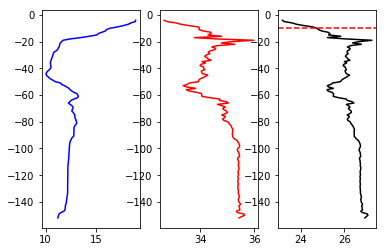

In [181]:
pointstouse = []; finallatestdepth = []
finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []; meanfilteredMLDlist = []; stdfilteredMLDlist = []; years = []; bananasplitmean = []; bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = [];bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []

for year in range(1993,1994):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []; sal_intermediate = []
    finaldepth = []; finallat = [];finallon = []
    seasonyeardepth = []; seasonyeartemp = [];seasonyearsal = []; seasonyeardens = []; counterii = []; floors = []; floor_intermediate = []; s_intermediate = [];seasonyearsal = []; lat = []; lon = []; lonneg = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
        elif yd > 181 and yd <= 212:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
#     month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
#     stp_df = pd.DataFrame({'p': p_intermediate, 't': t_intermediate, 's': sal_intermediate})

    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_w.contains(point) == True:
#         elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            
            l=[i for i in df_final[0] if i<=10] # change back to 6
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []
            tempfin = []
            pressurefin = []
            salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            print(dffinunreversed)
            print(surfaceval)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                    if month_df['depth'].iloc[ii] <= 300:
                        seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                        seasonyeartemp.append(dffinunreversed.at[len(dffinunreversed)-1,'temp'])
                        seasonyearsal.append(dffinunreversed.at[len(dffinunreversed)-1,'sal'])
                        seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                        floors.append(month_df['depth'].iloc[ii])
                        lat.append(month_df['lat'].iloc[ii])
                        lon.append(month_df['lon'].iloc[ii])
                        lonneg.append(month_df['lon'].iloc[ii]*-1)
                        counterii.append(ii)
                        
                        fig, (ax1, ax2, ax3) = plt.subplots(1,3)
                        ax1.plot(df_final[1],df_final[0]*-1,color='blue')
                        ax2.plot(df_final[2],df_final[0]*-1,color='red')
                        ax3.plot(df_final[4],df_final[0]*-1,color='black')
                        ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                        ax3.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1, color='green', linestyle='--')
#                         seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
#                         print(dffinunreversed.at[ix,'pressure'])
                        print('')
                        break
                        
                    break
                elif dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    pass
                else:
                    if dffinunreversed.at[ix,'pressure'] >= (month_df['depth'].iloc[ii] - 6): # ALL MIXED
                        if dffinunreversed.at[ix,'pressure'] == dffinunreversed.at[len(dffinunreversed)-1,'pressure']:
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 15):
                                pass
                            else:
                                if month_df['depth'].iloc[ii] <= 300:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
                                    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
                                    ax1.plot(df_final[1],df_final[0]*-1,color='blue')
                                    ax2.plot(df_final[2],df_final[0]*-1,color='red')
                                    ax3.plot(df_final[4],df_final[0]*-1,color='black')
#                                     print(dffinunreversed.at[ix,'pressure'])
                                    ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                    print('')
                                    break
                        else:
                            if month_df['depth'].iloc[ii] <= 300:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
                                fig, (ax1, ax2, ax3) = plt.subplots(1,3)
                                ax1.plot(df_final[1],df_final[0]*-1,color='blue')
                                ax2.plot(df_final[2],df_final[0]*-1,color='red')
                                ax3.plot(df_final[4],df_final[0]*-1,color='black')
#                                 print(dffinunreversed.at[ix,'pressure'])
                                ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                print('')
                                break
                    elif dffinunreversed.at[ix,'pressure'] == 0:
                        pass
                    elif ix == 0: 
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            fig, (ax1, ax2, ax3) = plt.subplots(1,3)
                            ax1.plot(df_final[1],df_final[0]*-1,color='blue')
                            ax2.plot(df_final[2],df_final[0]*-1,color='red')
                            ax3.plot(df_final[4],df_final[0]*-1,color='black')
#                             print(dffinunreversed.at[ix,'pressure'])
                            ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                            print('')
                            break
                    else: # Well-defined mixed layer detected
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            fig, (ax1, ax2, ax3) = plt.subplots(1,3)
                            ax1.plot(df_final[1],df_final[0]*-1,color='blue')
                            ax2.plot(df_final[2],df_final[0]*-1,color='red')
                            ax3.plot(df_final[4],df_final[0]*-1,color='black')
#                             print(dffinunreversed.at[ix,'pressure'])
                            ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                            print('')
#                             seasonyeardepth.append(dffin.at[ix,'pressure'])
                            break
                    break

    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardens) > 0:    
        print(year)
#         print(seasonyeardens)
#         print(inlat)
#         print(inlon)
#         print(date)
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date}) 
#         print(full)
#         print(len(full))
        finallatestdepth.append(seasonyeardepth)

In [182]:
print(seasonyeardepth)

[10.0]


In [319]:
pointstouse = []; finallatestdepth = []
finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []; meanfilteredMLDlist = []; stdfilteredMLDlist = []; years = []; bananasplitmean = []; bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = [];bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []

for year in range(1993,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []; sal_intermediate = []
    finaldepth = []; finallat = [];finallon = []
    seasonyeardepth = []; seasonyeartemp = [];seasonyearsal = []; seasonyeardens = []; counterii = []; floors = []; floor_intermediate = []; s_intermediate = [];seasonyearsal = []; lat = []; lon = []; lonneg = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
        elif yd > 59 and yd <= 90:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
#     month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
#     stp_df = pd.DataFrame({'p': p_intermediate, 't': t_intermediate, 's': sal_intermediate})

    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_t.contains(point) == True:
#         elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            
            l=[i for i in df_final[0] if i<=10] # change back to 6
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []
            tempfin = []
            pressurefin = []
            salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                    if month_df['depth'].iloc[ii] <= 300:
                        seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                        seasonyeartemp.append(dffinunreversed.at[len(dffinunreversed)-1,'temp'])
                        seasonyearsal.append(dffinunreversed.at[len(dffinunreversed)-1,'sal'])
                        seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                        floors.append(month_df['depth'].iloc[ii])
                        lat.append(month_df['lat'].iloc[ii])
                        lon.append(month_df['lon'].iloc[ii])
                        lonneg.append(month_df['lon'].iloc[ii]*-1)
                        counterii.append(ii)
                        
#                         fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#                         ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                         ax2.plot(df_final[2],df_final[0]*-1,color='red')
#                         ax3.plot(df_final[4],df_final[0]*-1,color='black')
#                         ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='green', linestyle='--')
#                         ax3.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1, color='green', linestyle='-')
#                         seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
#                         print(dffinunreversed.at[ix,'pressure'])
#                         print('')
#                         break
                        
                    break
                elif dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    pass
                else:
                    if dffinunreversed.at[ix,'pressure'] >= (month_df['depth'].iloc[ii] - 6): # ALL MIXED
                        if dffinunreversed.at[ix,'pressure'] == dffinunreversed.at[len(dffinunreversed)-1,'pressure']:
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 15):
                                pass
                            else:
                                if month_df['depth'].iloc[ii] <= 300:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
#                                     fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                                     ax2.plot(df_final[2],df_final[0]*-1,color='red')
#                                     ax3.plot(df_final[4],df_final[0]*-1,color='black')
# #                                     print(dffinunreversed.at[ix,'pressure'])
#                                     ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='purple', linestyle='--')
#                                     print('')
#                                     break
                        else:
                            if month_df['depth'].iloc[ii] <= 300:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
#                                 fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#                                 ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                                 ax2.plot(df_final[2],df_final[0]*-1,color='red')
#                                 ax3.plot(df_final[4],df_final[0]*-1,color='black')
# #                                 print(dffinunreversed.at[ix,'pressure'])
#                                 ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                 print('')
#                                 break
                    elif dffinunreversed.at[ix,'pressure'] == 0:
                        pass
                    elif ix == 0: 
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
#                             fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#                             ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                             ax2.plot(df_final[2],df_final[0]*-1,color='red')
#                             ax3.plot(df_final[4],df_final[0]*-1,color='black')
# #                             print(dffinunreversed.at[ix,'pressure'])
#                             ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='brown', linestyle='--')
#                             print('')
#                             break
                    else: # Well-defined mixed layer detected
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
#                             fig, (ax1, ax2, ax3) = plt.subplots(1,3)
#                             ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                             ax2.plot(df_final[2],df_final[0]*-1,color='red')
#                             ax3.plot(df_final[4],df_final[0]*-1,color='black')
# #                             print(dffinunreversed.at[ix,'pressure'])
#                             ax3.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='orange', linestyle='--')
#                             print('')
# #                             seasonyeardepth.append(dffin.at[ix,'pressure'])
#                             break
                    break

    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardens) > 0:    
        print(year)
#         print(seasonyeardens)
#         print(inlat)
#         print(inlon)
#         print(date)
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date}) 
#         print(full)
#         print(len(full))
        finallatestdepth.append(seasonyeardepth)
    
    for x in range(len(date)):
        use=DS.sel(time=slice('{}-03-01'.format(year),'{}-03-31'.format(year))) 
        locate_date = use.sel(time=use.time.dt.day==(date[x]) - 59) # - 273
        mld_locate_date = locate_date.mlotst.values[0]
#         mld_locate_date = locate_date.mlotst.values
    
        lat = np.array(locate_date.mlotst['latitude'][:])
        long = np.array(locate_date.mlotst['longitude'][:])
    
        lonneg = [float(i)*-1 for i in inlon]
#         print(inlon)
#         print(lonneg)
        distanceslat = []; distanceslon = []
        for i in range(133):
            distanceslat.append((inlat[x] - lat[i])**2)
            index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
        for ii in range(181):
            distanceslon.append((lonneg[x] - long[ii])**2)
            index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
        lat_index_use, lon_index_use = index_min_lat, index_min_lon
        pointstouse.append(mld_locate_date[lat_index_use, lon_index_use]) 

1995
1996
1997
1998
1999
2004
2008
2012
2014


In [320]:
mld_nefsc = sum(finallatestdepth, [])
print(mld_nefsc)
print(len(mld_nefsc))

[17.0, 13.0, 74.0, 18.0, 17.0, 81.0, 36.0, 12.0, 39.0, 10.0, 51.0, 15.0, 73.0, 77.0, 70.0, 34.0, 27.0, 107.0, 58.0, 103.0, 100.0, 84.0, 104.0, 51.0, 107.0, 68.8, 85.0, 97.0, 99.0, 85.0, 67.0, 68.0, 105.0, 23.0, 17.0, 26.0, 18.0, 16.0, 11.0, 27.0, 22.0, 21.0, 21.0, 10.0, 12.0, 10.0, 10.0, 10.0, 10.0, 20.0, 22.5, 14.0, 70.0, 10.0, 18.0, 30.0, 107.0, 116.0, 11.0, 10.0, 106.0, 123.0, 12.0, 112.0, 161.0, 78.0, 74.0, 151.0, 116.0, 28.0, 62.0, 53.0, 83.0, 62.0, 36.0, 63.0, 59.0, 94.0, 93.0, 86.0, 56.0, 41.0, 64.0, 158.0, 81.0, 153.0, 89.0, 201.0, 131.0, 134.0, 110.0, 220.0, 82.0, 18.0, 50.0, 59.0, 65.0, 130.0, 12.0, 29.0, 56.0, 16.0, 21.0, 16.0, 14.0, 10.0, 57.0, 38.0, 14.0, 18.0, 18.0, 17.0, 11.0, 38.0, 110.0, 104.0, 108.0, 84.0, 49.0, 66.0, 53.0, 67.0, 10.0, 36.0, 81.0, 27.0, 75.0, 101.0, 68.0, 14.0, 30.0, 19.0, 10.0, 16.0, 11.0, 22.0, 11.0, 10.0, 28.0, 42.0, 29.0, 44.0, 11.0, 10.0, 10.0, 10.0, 12.0, 14.0, 10.0, 14.0, 13.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1

In [323]:
print(pointstouse)
print(len(pointstouse))

[103.91553, 32.19703, 18.921478, 103.91553, 32.19703, 18.921478, 11.291849, 23.651846, 37.385178, 11.1392565, 14.648885, 27.619253, 35.248882, 38.14814, 23.499254, 24.262217, 22.431107, 46.845917, 54.475544, 56.00147, 68.97183, 74.007385, 79.34813, 55.848877, 70.34516, 56.61184, 35.706657, 70.80294, 70.34516, 81.17924, 41.19999, 37.232586, 35.706657, 10.528886, 10.528886, 10.528886, 13.275552, 16.937775, 20.294811, 17.548145, 14.95407, 10.376293, 10.528886, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 22.431107, 14.038515, 25.330364, 14.038515, 26.551105, 36.9274, 58.595543, 19.07407, 24.109625, 24.109625, 12.512589, 10.986664, 18.311108, 21.820736, 14.648885, 71.87109, 59.66369, 51.118507, 50.050358, 101.32146, 101.16886, 101.16886, 46.54073, 31.434067, 48.524433, 42.87851, 44.404434, 31.434067, 31.434067, 38.14814, 38.14814, 48.524433, 18.311108, 22.278513, 11.444442, 12.359997, 33.41777, 25.025179, 33.722954, 54.32295, 98.2696, 40.131844, 31.434067, 14.801477, 13.428144, 

In [324]:
x = mld_nefsc
y = pointstouse

In [325]:
xy = np.vstack([mld_nefsc,pointstouse])

In [326]:
from scipy.stats import gaussian_kde
z = gaussian_kde(xy)(xy)

In [327]:
# idx = z.argsort()
# x, y, z = x[idx], y[idx], z[idx]

In [328]:
print(type(z))
newz = z * 10000

<class 'numpy.ndarray'>


In [329]:
print(newz)

[0.15685766 1.13960159 0.81901188 0.15934537 1.29804451 0.69932202
 2.12303164 2.36265899 0.934932   3.53494183 1.25838011 1.8808049
 0.90706043 0.85534288 0.94401252 2.23898775 2.79245652 0.43975075
 0.43628199 0.47625637 0.42661231 0.30892787 0.30951719 0.33994221
 0.38093738 0.48809213 0.76820461 0.41266066 0.416508   0.22362424
 0.83746888 0.90836459 0.45270143 3.3030074  3.61936072 3.04655341
 3.71112992 3.54704695 2.83863453 3.19276638 3.56948258 3.42831673
 3.44267686 3.51092363 3.60506101 3.52130426 3.52130426 3.52130426
 2.41211296 3.65936819 2.4715861  3.67985743 0.95964545 0.58890296
 0.11380242 2.89827414 0.40608631 0.32910884 3.59068063 3.53242455
 0.37140987 0.26024553 3.56423898 0.32817067 0.05403319 0.65974838
 0.67250936 0.07250284 0.1054871  0.13911862 0.67690281 1.10121905
 0.69723867 0.77261365 0.53830942 1.00903443 1.03918912 0.63273989
 0.64873323 0.68111738 1.1702137  1.91030147 0.78416549 0.06875705
 0.82317076 0.10056354 0.69854311 0.04553593 0.11250853 0.15479

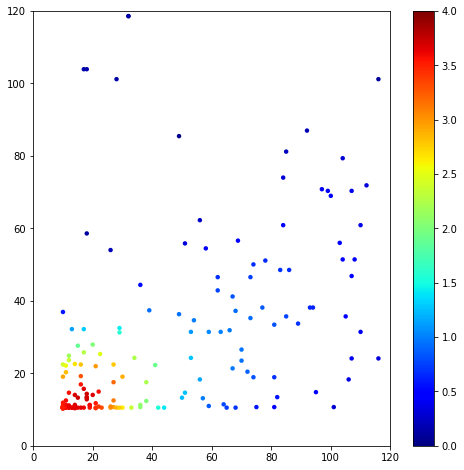

In [330]:
plt.figure(figsize=(8, 8))
plt.xlim(0,120)
plt.ylim(0,120)
# plt.scatter(mld_nefsc, pointstouse, color='blue',s=5)
plt.scatter(x, y, c=newz, s=20, cmap = plt.cm.jet, vmin =0, vmax = 4.0, edgecolor='')
plt.colorbar()
plt.show()

### Georges Bank

In [ ]:
gb_jan_obs =
gb_jan_glor = 
xy = np.vstack([gb_jan_obs,gb_jan_glor])
gb_jan_dens = gaussian_kde(xy)(xy)
new_gb_jan_dens = gb_jan_dens * 10000

In [ ]:
gb_feb_obs =
gb_feb_glor = 
xy = np.vstack([gb_feb_obs,gb_feb_glor])
gb_feb_dens = gaussian_kde(xy)(xy)
new_gb_feb_dens = gb_feb_dens * 10000

In [318]:
gb_march_obs = [10.0, 11.0, 10.0, 12.0, 69.0, 69.0, 68.0, 68.0, 78.0, 63.0, 50.0, 56.0, 51.0, 62.0, 61.0, 63.0, 62.0, 57.0, 26.0, 33.0, 39.0, 42.0, 30.0, 73.0, 73.0, 57.0, 56.0, 11.0, 11.0, 40.0, 46.0, 18.0, 19.0, 26.0, 24.0, 36.0, 33.0, 40.0, 33.0, 52.0, 53.0, 48.0, 45.0, 29.0, 25.0, 50.0, 49.0, 61.0, 60.0, 23.0, 22.0, 43.0, 35.0, 75.0, 73.0, 56.0, 53.0, 63.0, 67.0, 18.0, 22.0, 14.0, 10.0, 10.0, 10.0, 41.0, 10.0, 29.0, 75.0, 58.0, 74.0, 53.0, 49.0, 28.0, 51.0, 48.0, 46.0, 37.0, 57.0, 31.0, 46.0, 57.0, 38.0, 37.0, 52.0, 47.0, 20.0, 20.0, 21.0, 54.0, 29.0, 43.0, 44.0, 50.0, 43.0, 34.0, 87.0, 62.0, 84.0, 43.0, 47.0, 48.0, 52.0, 53.0, 56.0, 72.0, 71.0, 88.0, 52.0, 78.0, 69.0, 62.0, 50.0, 30.0, 32.0, 36.0, 34.0, 34.0, 51.0, 60.0, 21.0, 27.0, 13.0, 10.0, 15.0, 79.0, 64.0, 54.0, 54.0, 55.0, 67.0, 74.0, 15.0, 30.0, 27.0, 27.0, 75.0, 67.0, 21.0, 34.0, 10.0, 19.0, 62.0, 59.0, 40.0, 39.0, 48.0, 39.0, 50.0, 64.0, 17.0, 79.0, 58.0, 63.0, 57.0, 55.0, 68.0, 30.0, 34.0, 49.0, 45.0, 52.0, 45.0, 63.0, 74.6, 77.0, 23.5, 68.0, 84.2, 56.0, 52.6, 54.0, 57.1, 84.0, 44.0, 48.0, 46.0, 83.8, 51.0, 71.8, 57.0, 46.4, 65.0, 41.8, 57.0, 36.5, 32.0, 51.9, 63.7, 78.0, 72.2, 81.0, 76.0, 10.5, 70.0, 77.0, 56.0, 59.6, 46.0, 70.9, 32.0, 20.5, 39.0, 21.0, 28.0, 33.9, 35.0, 12.5, 39.0, 48.0, 58.0, 60.5, 64.0, 67.0, 46.7, 70.0, 42.5, 47.0, 36.1, 10.0, 10.0, 79.0, 39.0, 45.3, 65.0, 61.6, 57.0, 58.0, 69.0, 74.0, 23.0, 39.0, 23.0, 23.0, 34.0, 10.0, 13.0, 13.0, 36.0, 39.0, 67.0, 62.0, 65.0, 60.0, 58.0, 46.0, 43.0, 32.0, 39.0, 36.0, 24.0, 36.0, 47.0, 64.0, 64.0, 12.0, 11.0, 28.0, 22.0, 18.0, 14.0, 20.0, 47.0, 70.0, 60.0, 54.0, 52.0, 58.0, 63.0, 14.0, 25.0, 54.0, 66.0, 63.0, 24.0, 37.0, 78.0, 62.9, 71.0, 56.5, 59.0, 59.0, 69.0, 54.1, 53.0, 58.4, 35.0, 30.4, 49.0, 50.0, 86.5, 49.0, 20.6, 52.0, 49.0, 55.0, 46.1, 62.0, 24.0, 58.0, 11.0, 82.0, 76.0, 9.5, 70.0, 53.1, 59.0, 72.6, 48.0, 23.0, 43.0, 35.0, 37.0, 89.2, 41.0, 48.0, 59.0, 65.0, 25.0, 17.5, 32.0, 52.8, 26.0, 29.0, 36.0, 48.0, 78.0, 63.4, 10.0, 62.0, 57.0, 64.0, 67.0, 74.0, 43.0, 48.0, 15.0, 25.0, 16.0, 23.0, 28.0, 19.0, 18.0, 30.0, 21.0, 68.0, 71.0, 59.0, 10.0, 57.0, 17.0, 31.0, 48.0, 31.0, 38.0, 48.0, 63.0, 62.0, 28.0, 15.0, 42.0, 22.0, 78.0, 81.0, 80.0, 35.0, 45.0, 23.0, 55.0, 30.0, 24.0, 38.0, 28.0, 57.0, 36.0, 21.0, 53.0, 49.0, 43.0, 40.0, 64.0, 53.0, 47.0, 65.0, 41.0, 25.0, 37.0, 26.0, 52.0, 43.0, 61.0, 10.0, 13.0, 38.0, 24.0, 43.0, 57.0, 69.0, 70.0, 56.0, 22.0, 47.0, 82.0, 35.0, 43.0, 31.0, 79.0, 34.0, 67.0, 50.0, 19.0, 61.0, 61.0, 53.0, 52.0, 41.0, 31.0, 45.0, 10.0, 10.0, 35.0, 65.0, 49.0, 55.0, 55.0, 58.0, 67.0, 75.0, 24.0, 23.0, 78.0, 78.0, 42.0, 79.0, 67.0, 68.0, 60.0, 20.0, 19.0, 46.0, 48.0, 47.0, 41.0, 45.0, 35.0, 46.0, 28.0, 41.0, 44.0, 34.0, 16.0, 38.0, 44.0, 11.0, 73.0, 45.0, 45.0, 32.0, 32.0, 30.0, 52.0, 63.0, 27.0, 56.0, 60.0, 67.0, 52.0, 36.0, 54.0, 33.0, 10.0, 46.0, 51.0, 66.0, 43.0, 12.0, 23.0, 19.0, 18.0, 72.0, 68.0, 71.0, 57.0, 10.0, 11.0, 66.0, 10.0, 10.0, 10.0, 10.0, 10.0, 59.0, 51.0, 45.0, 10.0, 10.0, 15.0, 10.0, 10.0, 10.0, 10.0, 60.0, 10.0, 10.0, 23.0, 32.0, 15.0, 74.0, 19.0, 30.0, 66.0, 35.0, 22.0, 41.0, 31.0, 63.0, 37.0, 37.0, 66.0, 55.0, 50.0, 33.0, 47.0, 34.0, 73.0, 75.0, 52.0, 29.0, 27.0, 50.0, 11.0, 39.0, 67.0, 87.0, 69.0, 52.0, 59.0, 60.0, 64.0, 50.0, 26.0, 75.0, 71.0, 65.0, 62.0, 11.0, 89.0, 47.0, 41.0, 10.0, 10.0, 18.0, 10.0, 12.0, 72.0, 63.0, 44.0, 37.0, 43.0, 36.0, 35.0, 36.0, 46.0, 78.0, 43.0, 62.0]
gb_march_glor = [11.749626, 18.005922, 13.122959, 19.07407, 17.24296, 17.24296, 16.022219, 74.31257, 72.328865, 63.020725, 46.235546, 51.42369, 44.709618, 50.050358, 14.191108, 71.5659, 62.868134, 10.6814785, 11.597034, 17.395552, 13.885922, 13.580737, 14.801477, 11.444442, 11.444442, 10.528886, 10.528886, 10.376293, 15.411848, 13.122959, 10.528886, 13.275552, 13.275552, 13.73333, 13.73333, 25.177773, 25.177773, 27.466661, 13.885922, 10.528886, 10.528886, 28.229624, 28.229624, 28.382215, 28.382215, 13.580737, 13.580737, 19.07407, 24.872587, 10.834071, 10.834071, 14.3437, 15.106663, 15.106663, 15.106663, 10.528886, 10.528886, 85.29923, 79.04294, 10.376293, 10.376293, 11.749626, 11.291849, 10.528886, 10.528886, 11.1392565, 10.528886, 10.528886, 75.07553, 71.26072, 75.07553, 71.26072, 51.42369, 48.677025, 29.602957, 51.42369, 16.63259, 29.602957, 18.616293, 32.044437, 16.63259, 18.616293, 12.207404, 10.6814785, 10.528886, 11.749626, 13.122959, 13.122959, 17.395552, 14.191108, 14.191108, 14.95407, 12.207404, 12.359997, 12.665182, 17.85333, 54.780727, 50.508137, 54.780727, 50.965916, 43.0311, 43.0311, 42.87851, 42.87851, 45.31999, 32.8074, 32.8074, 39.826656, 12.0548115, 46.99851, 13.580737, 20.599997, 18.311108, 20.599997, 20.142218, 16.785181, 13.580737, 12.512589, 14.3437, 12.817775, 19.531847, 17.85333, 19.379255, 21.97333, 26.551105, 20.752588, 19.226664, 17.85333, 17.85333, 17.090366, 18.616293, 19.07407, 24.109625, 24.719995, 19.68444, 21.820736, 21.668144, 20.90518, 18.921478, 12.207404, 16.785181, 14.496293, 18.921478, 16.479998, 20.142218, 18.005922, 10.528886, 10.528886, 10.528886, 10.6814785, 10.528886, 18.158514, 23.957031, 23.041477, 53.559986, 35.401474, 71.87109, 66.37776, 37.99555, 41.352585, 31.739252, 31.891846, 48.524433, 43.946655, 58.900726, 58.900726, 54.93332, 57.679985, 56.61184, 54.93332, 36.774807, 62.868134, 48.21925, 62.868134, 55.238506, 43.946655, 36.774807, 82.39998, 40.742214, 67.140724, 48.21925, 42.42073, 51.728878, 31.58666, 55.238506, 28.07703, 47.456284, 43.0311, 53.865173, 47.76147, 23.041477, 82.39998, 80.874054, 22.888884, 67.140724, 17.700737, 64.39406, 16.479998, 42.42073, 17.700737, 32.95999, 17.395552, 29.602957, 10.834071, 27.924438, 23.346663, 28.07703, 21.057774, 31.891846, 43.0311, 45.625175, 45.472584, 53.865173, 30.060734, 51.42369, 23.041477, 46.388138, 23.041477, 36.774807, 14.648885, 18.4637, 34.333324, 29.755548, 32.34962, 17.548145, 42.573322, 16.479998, 16.174812, 16.937775, 16.174812, 17.395552, 16.022219, 11.291849, 18.768885, 23.346663, 23.80444, 21.057774, 21.362959, 18.921478, 18.921478, 34.63851, 70.03998, 67.598495, 59.968876, 45.472584, 51.42369, 46.388138, 39.826656, 36.774807, 36.774807, 32.8074, 34.791103, 32.34962, 35.248882, 42.573322, 19.531847, 12.512589, 30.671104, 23.651846, 22.125921, 32.044437, 12.970367, 21.820736, 38.453323, 31.281475, 33.87555, 24.719995, 33.112587, 11.902219, 25.788143, 15.869626, 33.722954, 26.703697, 26.703697, 35.096287, 28.992586, 32.95999, 39.674065, 26.093328, 48.37184, 39.674065, 36.774807, 54.170357, 40.131844, 37.53777, 61.647392, 47.60888, 73.85479, 38.911102, 50.050358, 10.986664, 40.131844, 64.69924, 45.31999, 38.453323, 61.647392, 14.496293, 70.80294, 73.85479, 50.81332, 10.376293, 10.986664, 25.788143, 53.407394, 64.69924, 22.736292, 53.407394, 15.259255, 38.453323, 15.717033, 14.496293, 11.902219, 12.207404, 14.191108, 11.1392565, 10.986664, 11.902219, 68.36146, 70.955536, 38.60592, 64.546646, 31.434067, 14.801477, 10.376293, 10.376293, 27.619253, 9.918516, 34.943695, 18.311108, 37.53777, 22.736292, 51.576283, 15.259255, 10.2237015, 16.937775, 16.937775, 15.717033, 12.665182, 12.665182, 11.902219, 15.717033, 14.038515, 11.749626, 18.158514, 18.616293, 14.191108, 31.739252, 62.56295, 49.897766, 48.21925, 38.60592, 33.112587, 31.434067, 36.774807, 41.96295, 27.008883, 20.752588, 34.943695, 15.259255, 18.768885, 24.109625, 17.700737, 53.865173, 53.865173, 59.205914, 49.745174, 49.745174, 11.597034, 66.53035, 18.921478, 14.496293, 45.31999, 19.531847, 39.063694, 18.4637, 19.531847, 26.24592, 45.31999, 22.583698, 43.794064, 41.19999, 39.063694, 40.131844, 24.567402, 10.986664, 19.531847, 11.1392565, 19.531847, 49.287395, 12.207404, 49.439987, 10.528886, 11.597034, 11.597034, 39.521473, 25.177773, 43.946655, 42.87851, 55.69628, 38.60592, 26.093328, 40.131844, 31.891846, 10.986664, 11.1392565, 10.986664, 54.475544, 11.1392565, 68.36146, 49.287395, 64.08887, 49.439987, 49.439987, 44.09925, 39.36888, 41.81036, 14.801477, 27.314068, 11.597034, 32.654808, 39.521473, 50.050358, 24.872587, 43.946655, 43.946655, 40.58962, 55.69628, 42.725918, 34.180733, 26.093328, 36.011845, 31.281475, 20.599997, 54.475544, 78.89035, 68.36146, 70.49776, 64.08887, 64.08887, 50.508137, 43.794064, 28.07703, 45.31999, 41.81036, 36.317028, 27.314068, 36.774807, 24.872587, 24.872587, 14.038515, 18.616293, 15.564441, 10.376293, 10.376293, 50.965916, 62.410355, 29.14518, 22.736292, 25.482958, 22.125921, 59.205914, 79.34813, 79.34813, 51.88147, 50.355545, 45.31999, 41.65777, 12.817775, 17.24296, 23.957031, 33.570362, 38.60592, 25.177773, 65.61479, 39.97925, 26.703697, 30.518513, 31.281475, 23.346663, 11.1392565, 10.528886, 10.528886, 13.580737, 10.528886, 15.259255, 10.376293, 11.902219, 10.376293, 10.376293, 10.376293, 10.528886, 10.6814785, 12.817775, 13.122959, 12.970367, 17.85333, 10.376293, 18.4637, 18.4637, 14.3437, 14.801477, 15.411848, 14.191108, 16.937775, 12.359997, 22.736292, 21.210365, 15.411848, 32.95999, 12.817775, 34.63851, 19.531847, 14.191108, 26.551105, 16.937775, 30.97629, 20.90518, 25.63555, 24.262217, 36.317028, 24.41481, 34.333324, 13.428144, 15.869626, 69.88739, 33.41777, 63.631096, 15.411848, 10.528886, 38.453323, 14.648885, 10.2237015, 26.85629, 10.834071, 66.682945, 43.64147, 49.287395, 63.020725, 61.95258, 55.238506, 43.48888, 31.739252, 72.02368, 65.004425, 61.4948, 20.294811, 53.71258, 32.502216, 24.109625, 11.1392565, 18.616293, 10.376293, 19.531847, 19.531847, 77.66961, 69.734795, 47.76147, 37.53777, 33.722954, 33.722954, 41.81036, 40.894806, 41.047398, 77.21183, 40.742214, 64.39406]
xy = np.vstack([gb_march_obs,gb_march_glor])
gb_march_dens = gaussian_kde(xy)(xy)
new_gb_march_dens = gb_march_dens * 10000

In [ ]:
gb_april_obs =
gb_april_glor = 
gb_april_dens = 

In [ ]:
gb_may_obs =
gb_may_glor = 
gb_may_dens = 

In [ ]:
gb_june_obs =
gb_june_glor = 
gb_june_dens = 

In [ ]:
gb_july_obs =
gb_july_glor = 
gb_july_dens = 

In [ ]:
gb_aug_obs =
gb_aug_glor = 
gb_aug_dens = 

In [ ]:
gb_sept_obs =
gb_sept_glor = 
gb_sept_dens = 

In [ ]:
gb_oct_obs =
gb_oct_glor = 
gb_oct_dens = 

In [ ]:
gb_nov_obs =
gb_nov_glor = 
gb_nov_dens = 

In [ ]:
gb_dec_obs =
gb_dec_glor = 
gb_dec_dens = 

### Eastern Gulf of Maine

In [ ]:
egom_jan_obs =
egom_jan_glor = 
egom_jan_dens = 

In [ ]:
egom_feb_obs =
egom_feb_glor = 
egom_feb_dens = 

In [ ]:
egom_march_obs =
egom_march_glor = 
egom_march_dens = 

In [ ]:
egom_april_obs =
egom_april_glor = 
egom_april_dens = 

In [ ]:
egom_may_obs =
egom_may_glor = 
egom_may_dens = 

In [ ]:
egom_june_obs =
egom_june_glor = 
egom_june_dens = 

In [ ]:
egom_july_obs =
egom_july_glor = 
egom_july_dens = 

In [ ]:
egom_aug_obs =
egom_aug_glor = 
egom_aug_dens = 

In [ ]:
egom_sept_obs =
egom_sept_glor = 
egom_sept_dens = 

In [ ]:
egom_oct_obs =
egom_oct_glor = 
egom_oct_dens = 

In [ ]:
egom_nov_obs =
egom_nov_glor = 
egom_nov_dens = 

In [ ]:
egom_dec_obs =
egom_dec_glor = 
egom_dec_dens = 

### Western Gulf of Maine

In [ ]:
wgom_jan_obs =
wgom_jan_glor = 
wgom_jan_dens = 

In [ ]:
wgom_feb_obs =
wgom_feb_glor = 
wgom_feb_dens = 

In [331]:
wgom_march_obs = [17.0, 13.0, 74.0, 18.0, 17.0, 81.0, 36.0, 12.0, 39.0, 10.0, 51.0, 15.0, 73.0, 77.0, 70.0, 34.0, 27.0, 107.0, 58.0, 103.0, 100.0, 84.0, 104.0, 51.0, 107.0, 68.8, 85.0, 97.0, 99.0, 85.0, 67.0, 68.0, 105.0, 23.0, 17.0, 26.0, 18.0, 16.0, 11.0, 27.0, 22.0, 21.0, 21.0, 10.0, 12.0, 10.0, 10.0, 10.0, 10.0, 20.0, 22.5, 14.0, 70.0, 10.0, 18.0, 30.0, 107.0, 116.0, 11.0, 10.0, 106.0, 123.0, 12.0, 112.0, 161.0, 78.0, 74.0, 151.0, 116.0, 28.0, 62.0, 53.0, 83.0, 62.0, 36.0, 63.0, 59.0, 94.0, 93.0, 86.0, 56.0, 41.0, 64.0, 158.0, 81.0, 153.0, 89.0, 201.0, 131.0, 134.0, 110.0, 220.0, 82.0, 18.0, 50.0, 59.0, 65.0, 130.0, 12.0, 29.0, 56.0, 16.0, 21.0, 16.0, 14.0, 10.0, 57.0, 38.0, 14.0, 18.0, 18.0, 17.0, 11.0, 38.0, 110.0, 104.0, 108.0, 84.0, 49.0, 66.0, 53.0, 67.0, 10.0, 36.0, 81.0, 27.0, 75.0, 101.0, 68.0, 14.0, 30.0, 19.0, 10.0, 16.0, 11.0, 22.0, 11.0, 10.0, 28.0, 42.0, 29.0, 44.0, 11.0, 10.0, 10.0, 10.0, 12.0, 14.0, 10.0, 14.0, 13.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 14.0, 11.0, 10.0, 15.0, 12.0, 19.0, 14.0, 10.0, 13.0, 12.0, 15.0, 17.0, 21.0, 27.0, 19.0, 26.0, 33.0, 10.0, 92.0, 73.0, 95.0, 54.0, 72.0, 72.0, 21.0, 19.0, 32.0, 32.0, 26.0, 29.0, 49.0, 20.0]
wgom_march_glor = [103.91553, 32.19703, 18.921478, 103.91553, 32.19703, 18.921478, 11.291849, 23.651846, 37.385178, 11.1392565, 14.648885, 27.619253, 35.248882, 38.14814, 23.499254, 24.262217, 22.431107, 46.845917, 54.475544, 56.00147, 68.97183, 74.007385, 79.34813, 55.848877, 70.34516, 56.61184, 35.706657, 70.80294, 70.34516, 81.17924, 41.19999, 37.232586, 35.706657, 10.528886, 10.528886, 10.528886, 13.275552, 16.937775, 20.294811, 17.548145, 14.95407, 10.376293, 10.528886, 10.2237015, 10.528886, 10.528886, 10.528886, 10.528886, 22.431107, 14.038515, 25.330364, 14.038515, 26.551105, 36.9274, 58.595543, 19.07407, 24.109625, 24.109625, 12.512589, 10.986664, 18.311108, 21.820736, 14.648885, 71.87109, 59.66369, 51.118507, 50.050358, 101.32146, 101.16886, 101.16886, 46.54073, 31.434067, 48.524433, 42.87851, 44.404434, 31.434067, 31.434067, 38.14814, 38.14814, 48.524433, 18.311108, 22.278513, 11.444442, 12.359997, 33.41777, 25.025179, 33.722954, 54.32295, 98.2696, 40.131844, 31.434067, 14.801477, 13.428144, 14.3437, 13.275552, 10.986664, 10.528886, 20.599997, 24.872587, 32.502216, 62.257763, 19.226664, 21.97333, 22.431107, 22.583698, 10.528886, 13.122959, 12.359997, 10.376293, 13.428144, 12.817775, 25.788143, 22.125921, 17.548145, 60.88443, 51.42369, 51.42369, 60.88443, 36.317028, 31.891846, 24.262217, 21.362959, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.6814785, 10.528886, 11.291849, 10.528886, 10.528886, 10.528886, 10.528886, 10.834071, 10.834071, 11.291849, 11.902219, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.6814785, 11.1392565, 10.528886, 10.528886, 10.528886, 11.1392565, 13.275552, 15.717033, 11.749626, 12.512589, 11.291849, 10.834071, 10.528886, 19.07407, 86.97775, 46.54073, 14.801477, 34.63851, 20.447403, 132.60294, 139.317, 139.317, 118.564415, 118.564415, 54.017765, 31.281475, 85.45183, 27.924438]
xy = np.vstack([wgom_march_obs,wgom_march_glor])
wgom_march_dens = gaussian_kde(xy)(xy)
new_wgom_march_dens = wgom_march_dens * 10000

In [ ]:
wgom_april_obs =
wgom_april_glor = 
wgom_april_dens = 

In [ ]:
wgom_may_obs =
wgom_may_glor = 
wgom_may_dens = 

In [ ]:
wgom_june_obs =
wgom_june_glor = 
wgom_june_dens = 

In [ ]:
wgom_july_obs =
wgom_july_glor = 
wgom_july_dens = 

In [ ]:
wgom_aug_obs =
wgom_aug_glor = 
wgom_aug_dens = 

In [ ]:
wgom_sept_obs =
wgom_sept_glor = 
wgom_sept_dens = 

In [ ]:
wgom_oct_obs =
wgom_oct_glor = 
wgom_oct_dens = 

In [ ]:
wgom_nov_obs =
wgom_nov_glor = 
wgom_nov_dens = 

In [ ]:
wgom_dec_obs =
wgom_dec_glor = 
wgom_dec_dens = 

### Southern Mid-Atlantic Bight

In [ ]:
smab_jan_obs =
smab_jan_glor = 
smab_jan_dens = 

In [ ]:
smab_feb_obs =
smab_feb_glor = 
smab_feb_dens = 

In [ ]:
smab_march_obs =
smab_march_glor = 
smab_march_dens = 

In [ ]:
smab_april_obs =
smab_april_glor = 
smab_april_dens = 

In [ ]:
smab_may_obs =
smab_may_glor = 
smab_may_dens = 

In [ ]:
smab_june_obs =
smab_june_glor = 
smab_june_dens = 

In [ ]:
smab_july_obs =
smab_july_glor = 
smab_july_dens = 

In [ ]:
smab_aug_obs =
smab_aug_glor = 
smab_aug_dens = 

In [ ]:
smab_sept_obs =
smab_sept_glor = 
smab_sept_dens = 

In [ ]:
smab_oct_obs =
smab_oct_glor = 
smab_oct_dens = 

In [ ]:
smab_nov_obs =
smab_nov_glor = 
smab_nov_dens = 

In [ ]:
smab_dec_obs =
smab_dec_glor = 
smab_dec_dens = 

### Northern Mid-Atlantic Bight

In [ ]:
nmab_jan_obs =
nmab_jan_glor = 
nmab_jan_dens = 

In [ ]:
nmab_feb_obs =
nmab_feb_glor = 
nmab_feb_dens = 

In [ ]:
nmab_march_obs =
nmab_march_glor = 
nmab_march_dens = 

In [ ]:
nmab_april_obs =
nmab_april_glor = 
nmab_april_dens = 

In [ ]:
nmab_may_obs =
nmab_may_glor = 
nmab_may_dens = 

In [ ]:
nmab_june_obs =
nmab_june_glor = 
nmab_june_dens = 

In [ ]:
nmab_july_obs =
nmab_july_glor = 
nmab_july_dens = 

In [ ]:
nmab_aug_obs =
nmab_aug_glor = 
nmab_aug_dens = 

In [ ]:
nmab_sept_obs =
nmab_sept_glor = 
nmab_sept_dens = 

In [ ]:
nmab_oct_obs =
nmab_oct_glor = 
nmab_oct_dens = 

In [ ]:
nmab_nov_obs =
nmab_nov_glor = 
nmab_nov_dens = 

In [ ]:
nmab_dec_obs =
nmab_dec_glor = 
nmab_dec_dens = 